# Kaggle-Playground-Series-May-2021

In [1]:
import pyforest
import seaborn as sb

In [2]:
# there are 41 features and 1 categorical target variable
path = r"C:\Users\tanch\Documents\GitHub\Kaggle-Playground-Series-May-2021\Input\train.csv\train.csv"
df = pd.read_csv(path,index_col=0)
df.head()

<IPython.core.display.Javascript object>

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
id                                                                     
0           0          0          1          0          1          0   
1           0          0          0          0          2          1   
2           0          0          0          0          0          0   
3           0          0          0          0          0          0   
4           0          0          0          0          0          0   

    feature_6  feature_7  feature_8  feature_9  ...  feature_41  feature_42  \
id                                              ...                           
0           0          0          0          0  ...           0           0   
1           0          0          0          0  ...           0           0   
2           0          0          0          2  ...           0           1   
3           0          3          0          0  ...           0           0   
4           0          0          0          0  ...           0           0   

    feature_43  feature_44  feature_45  feature_46  feature_47  feature_48  \
id                                                                           
0           21           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0          13           2   
3            0           0           0           0           0           1   
4            0           0           0           0           0           1   

    feature_49   target  
id                       
0            0  Class_2  
1            0  Class_1  
2            0  Class_1  
3            0  Class_4  
4            0  Class_2  

[5 rows x 51 columns]

In [3]:
# map the target variable to numeric numbers
target_mapping = {'Class_2':2,
                  'Class_1':1,
                 'Class_3':3,
                 'Class_4':4,}
df.target = df.target.map(target_mapping)

### Preprocessing

In [6]:
# split features and target variables
X = df.iloc[:,:-1]
y = df.target

## RandomizedSearchCV
- Using RandomizedSearchCV first because it is much much faster and produces results close to exhaustive search

In [2]:
from catboost import CatBoostClassifier, Pool

In [17]:
cat_features = X.columns                                  # consider all features categorical
model = CatBoostClassifier()
grid = {'one_hot_max_size':range(0,10)   ,                # categorical features below this number are one hot encoded
        'learning_rate': np.arange(0.01,0.2,0.02),        # the larger the learning rate faster the convergence
        'iterations':range(100,1000),
        'depth': range(4,11),
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'grow_policy': ['SymmetricTree','Depthwise']}

randomized_search_result = model.randomized_search(param_distributions = grid,
                                                   n_iter = 100,
                                                   train_size = 0.7,
                                                   X=X,
                                                   y=y,
                                                   plot=True,
                                                   partition_random_seed = 0,
                                                   search_by_train_test_split = True,
                                                   calc_cv_statistics = True,
                                                   refit = True,
                                                   shuffle = True, 
                                                   stratified = True,
                                                   verbose = 10
                                                   )

<IPython.core.display.Javascript object>

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3802750	test: 1.3803830	best: 1.3803830 (0)	total: 190ms	remaining: 31s
1:	learn: 1.3744259	test: 1.3746420	best: 1.3746420 (1)	total: 212ms	remaining: 17.2s
2:	learn: 1.3687336	test: 1.3690561	best: 1.3690561 (2)	total: 232ms	remaining: 12.4s
3:	learn: 1.3631969	test: 1.3636248	best: 1.3636248 (3)	total: 256ms	remaining: 10.2s
4:	learn: 1.3578039	test: 1.3583369	best: 1.3583369 (4)	total: 277ms	remaining: 8.8s
5:	learn: 1.3525504	test: 1.3531862	best: 1.3531862 (5)	total: 296ms	remaining: 7.8s
6:	learn: 1.3473927	test: 1.3481229	best: 1.3481229 (6)	total: 315ms	remaining: 7.07s
7:	learn: 1.3423976	test: 1.3432274	best: 1.3432274 (7)	total: 336ms	remaining: 6.54s
8:	learn: 1.3375396	test: 1.3384669	best: 1.3384669 (8)	total: 355ms	remaining: 6.11s
9:	learn: 1.3327954	test: 1.3338198	best: 1.3338198 (9)	total: 397ms	remaining: 6.11s
10:	learn: 1.3281772	test: 1.3292962	best: 1.3292962 (10)	total: 421ms	remaining: 5.86s
11:	learn: 1.3236755	test: 1.3248867	best: 1.3248867 (11

102:	learn: 1.1482893	test: 1.1547288	best: 1.1547288 (102)	total: 3.02s	remaining: 1.79s
103:	learn: 1.1476183	test: 1.1540949	best: 1.1540949 (103)	total: 3.05s	remaining: 1.76s
104:	learn: 1.1469392	test: 1.1534460	best: 1.1534460 (104)	total: 3.07s	remaining: 1.73s
105:	learn: 1.1462811	test: 1.1528173	best: 1.1528173 (105)	total: 3.09s	remaining: 1.69s
106:	learn: 1.1456311	test: 1.1521986	best: 1.1521986 (106)	total: 3.13s	remaining: 1.67s
107:	learn: 1.1449960	test: 1.1516018	best: 1.1516018 (107)	total: 3.16s	remaining: 1.64s
108:	learn: 1.1443925	test: 1.1510345	best: 1.1510345 (108)	total: 3.19s	remaining: 1.61s
109:	learn: 1.1437681	test: 1.1504412	best: 1.1504412 (109)	total: 3.21s	remaining: 1.58s
110:	learn: 1.1431675	test: 1.1498693	best: 1.1498693 (110)	total: 3.24s	remaining: 1.55s
111:	learn: 1.1425787	test: 1.1493123	best: 1.1493123 (111)	total: 3.27s	remaining: 1.52s
112:	learn: 1.1419730	test: 1.1487329	best: 1.1487329 (112)	total: 3.3s	remaining: 1.49s
113:	learn:

31:	learn: 1.1230899	test: 1.1311571	best: 1.1311571 (31)	total: 776ms	remaining: 4.41s
32:	learn: 1.1218869	test: 1.1300703	best: 1.1300703 (32)	total: 804ms	remaining: 4.41s
33:	learn: 1.1207991	test: 1.1291274	best: 1.1291274 (33)	total: 836ms	remaining: 4.42s
34:	learn: 1.1197194	test: 1.1281468	best: 1.1281468 (34)	total: 860ms	remaining: 4.4s
35:	learn: 1.1187313	test: 1.1273081	best: 1.1273081 (35)	total: 891ms	remaining: 4.4s
36:	learn: 1.1178087	test: 1.1264765	best: 1.1264765 (36)	total: 913ms	remaining: 4.37s
37:	learn: 1.1170398	test: 1.1257812	best: 1.1257812 (37)	total: 933ms	remaining: 4.32s
38:	learn: 1.1162964	test: 1.1251055	best: 1.1251055 (38)	total: 952ms	remaining: 4.27s
39:	learn: 1.1155986	test: 1.1244676	best: 1.1244676 (39)	total: 974ms	remaining: 4.24s
40:	learn: 1.1149218	test: 1.1238831	best: 1.1238831 (40)	total: 1s	remaining: 4.24s
41:	learn: 1.1143760	test: 1.1234025	best: 1.1234025 (41)	total: 1.03s	remaining: 4.21s
42:	learn: 1.1137793	test: 1.1229409	

127:	learn: 1.0979392	test: 1.1107590	best: 1.1107590 (127)	total: 3.46s	remaining: 2.33s
128:	learn: 1.0978664	test: 1.1107129	best: 1.1107129 (128)	total: 3.48s	remaining: 2.29s
129:	learn: 1.0977784	test: 1.1106426	best: 1.1106426 (129)	total: 3.51s	remaining: 2.27s
130:	learn: 1.0977214	test: 1.1105926	best: 1.1105926 (130)	total: 3.54s	remaining: 2.24s
131:	learn: 1.0976567	test: 1.1105376	best: 1.1105376 (131)	total: 3.56s	remaining: 2.21s
132:	learn: 1.0975526	test: 1.1104598	best: 1.1104598 (132)	total: 3.59s	remaining: 2.19s
133:	learn: 1.0974925	test: 1.1104217	best: 1.1104217 (133)	total: 3.62s	remaining: 2.16s
134:	learn: 1.0974143	test: 1.1103623	best: 1.1103623 (134)	total: 3.65s	remaining: 2.14s
135:	learn: 1.0973201	test: 1.1102878	best: 1.1102878 (135)	total: 3.69s	remaining: 2.12s
136:	learn: 1.0971871	test: 1.1101823	best: 1.1101823 (136)	total: 3.73s	remaining: 2.09s
137:	learn: 1.0971003	test: 1.1101119	best: 1.1101119 (137)	total: 3.77s	remaining: 2.07s
138:	learn

6:	learn: 1.1529826	test: 1.1590699	best: 1.1590699 (6)	total: 194ms	remaining: 9.43s
7:	learn: 1.1439926	test: 1.1505747	best: 1.1505747 (7)	total: 220ms	remaining: 9.36s
8:	learn: 1.1366700	test: 1.1436558	best: 1.1436558 (8)	total: 254ms	remaining: 9.55s
9:	learn: 1.1309576	test: 1.1383596	best: 1.1383596 (9)	total: 281ms	remaining: 9.51s
10:	learn: 1.1268560	test: 1.1346024	best: 1.1346024 (10)	total: 310ms	remaining: 9.5s
11:	learn: 1.1232990	test: 1.1312802	best: 1.1312802 (11)	total: 338ms	remaining: 9.47s
12:	learn: 1.1201430	test: 1.1284662	best: 1.1284662 (12)	total: 367ms	remaining: 9.44s
13:	learn: 1.1179373	test: 1.1265591	best: 1.1265591 (13)	total: 399ms	remaining: 9.51s
14:	learn: 1.1159788	test: 1.1248250	best: 1.1248250 (14)	total: 434ms	remaining: 9.63s
15:	learn: 1.1146274	test: 1.1236083	best: 1.1236083 (15)	total: 456ms	remaining: 9.47s
16:	learn: 1.1131099	test: 1.1222756	best: 1.1222756 (16)	total: 488ms	remaining: 9.49s
17:	learn: 1.1119534	test: 1.1212751	best

101:	learn: 1.0892614	test: 1.1050846	best: 1.1050846 (101)	total: 2.87s	remaining: 6.93s
102:	learn: 1.0891452	test: 1.1049987	best: 1.1049987 (102)	total: 2.9s	remaining: 6.9s
103:	learn: 1.0889589	test: 1.1048875	best: 1.1048875 (103)	total: 2.93s	remaining: 6.87s
104:	learn: 1.0888820	test: 1.1048154	best: 1.1048154 (104)	total: 2.95s	remaining: 6.82s
105:	learn: 1.0887358	test: 1.1047410	best: 1.1047410 (105)	total: 2.97s	remaining: 6.78s
106:	learn: 1.0886098	test: 1.1047013	best: 1.1047013 (106)	total: 2.99s	remaining: 6.74s
107:	learn: 1.0885503	test: 1.1046574	best: 1.1046574 (107)	total: 3.01s	remaining: 6.69s
108:	learn: 1.0883700	test: 1.1046052	best: 1.1046052 (108)	total: 3.03s	remaining: 6.65s
109:	learn: 1.0882937	test: 1.1045460	best: 1.1045460 (109)	total: 3.06s	remaining: 6.62s
110:	learn: 1.0881365	test: 1.1044719	best: 1.1044719 (110)	total: 3.09s	remaining: 6.59s
111:	learn: 1.0880237	test: 1.1044280	best: 1.1044280 (111)	total: 3.11s	remaining: 6.55s
112:	learn: 

194:	learn: 1.0804490	test: 1.1016119	best: 1.1016119 (194)	total: 5.07s	remaining: 3.98s
195:	learn: 1.0803626	test: 1.1015837	best: 1.1015837 (195)	total: 5.09s	remaining: 3.95s
196:	learn: 1.0803222	test: 1.1015655	best: 1.1015655 (196)	total: 5.11s	remaining: 3.92s
197:	learn: 1.0802671	test: 1.1015789	best: 1.1015655 (196)	total: 5.13s	remaining: 3.89s
198:	learn: 1.0801904	test: 1.1015831	best: 1.1015655 (196)	total: 5.15s	remaining: 3.86s
199:	learn: 1.0800793	test: 1.1015320	best: 1.1015320 (199)	total: 5.18s	remaining: 3.83s
200:	learn: 1.0800168	test: 1.1015327	best: 1.1015320 (199)	total: 5.2s	remaining: 3.8s
201:	learn: 1.0799367	test: 1.1015078	best: 1.1015078 (201)	total: 5.22s	remaining: 3.77s
202:	learn: 1.0798747	test: 1.1014948	best: 1.1014948 (202)	total: 5.24s	remaining: 3.75s
203:	learn: 1.0798277	test: 1.1014910	best: 1.1014910 (203)	total: 5.26s	remaining: 3.72s
204:	learn: 1.0797812	test: 1.1014784	best: 1.1014784 (204)	total: 5.29s	remaining: 3.69s
205:	learn: 

293:	learn: 1.0746014	test: 1.1006610	best: 1.1006266 (290)	total: 7.2s	remaining: 1.32s
294:	learn: 1.0745629	test: 1.1006513	best: 1.1006266 (290)	total: 7.22s	remaining: 1.3s
295:	learn: 1.0745350	test: 1.1006440	best: 1.1006266 (290)	total: 7.24s	remaining: 1.27s
296:	learn: 1.0744611	test: 1.1006403	best: 1.1006266 (290)	total: 7.26s	remaining: 1.25s
297:	learn: 1.0744357	test: 1.1006464	best: 1.1006266 (290)	total: 7.29s	remaining: 1.22s
298:	learn: 1.0743942	test: 1.1006406	best: 1.1006266 (290)	total: 7.3s	remaining: 1.2s
299:	learn: 1.0743692	test: 1.1006297	best: 1.1006266 (290)	total: 7.32s	remaining: 1.17s
300:	learn: 1.0743093	test: 1.1006081	best: 1.1006081 (300)	total: 7.35s	remaining: 1.15s
301:	learn: 1.0742625	test: 1.1006144	best: 1.1006081 (300)	total: 7.37s	remaining: 1.12s
302:	learn: 1.0742421	test: 1.1006293	best: 1.1006081 (300)	total: 7.39s	remaining: 1.1s
303:	learn: 1.0741858	test: 1.1006321	best: 1.1006081 (300)	total: 7.41s	remaining: 1.07s
304:	learn: 1.0

40:	learn: 1.1023324	test: 1.1139231	best: 1.1139231 (40)	total: 948ms	remaining: 10.2s
41:	learn: 1.1020580	test: 1.1137160	best: 1.1137160 (41)	total: 972ms	remaining: 10.2s
42:	learn: 1.1018094	test: 1.1135395	best: 1.1135395 (42)	total: 1s	remaining: 10.2s
43:	learn: 1.1015191	test: 1.1132824	best: 1.1132824 (43)	total: 1.03s	remaining: 10.3s
44:	learn: 1.1013138	test: 1.1131210	best: 1.1131210 (44)	total: 1.05s	remaining: 10.3s
45:	learn: 1.1010316	test: 1.1129817	best: 1.1129817 (45)	total: 1.08s	remaining: 10.3s
46:	learn: 1.1007261	test: 1.1127625	best: 1.1127625 (46)	total: 1.1s	remaining: 10.2s
47:	learn: 1.1005094	test: 1.1126415	best: 1.1126415 (47)	total: 1.13s	remaining: 10.2s
48:	learn: 1.1002311	test: 1.1123953	best: 1.1123953 (48)	total: 1.15s	remaining: 10.2s
49:	learn: 1.1000764	test: 1.1121919	best: 1.1121919 (49)	total: 1.18s	remaining: 10.3s
50:	learn: 1.0998468	test: 1.1120090	best: 1.1120090 (50)	total: 1.21s	remaining: 10.3s
51:	learn: 1.0996125	test: 1.1118363

140:	learn: 1.0864422	test: 1.1036537	best: 1.1036537 (140)	total: 3.76s	remaining: 9.12s
141:	learn: 1.0863488	test: 1.1036151	best: 1.1036151 (141)	total: 3.79s	remaining: 9.1s
142:	learn: 1.0862970	test: 1.1035876	best: 1.1035876 (142)	total: 3.82s	remaining: 9.08s
143:	learn: 1.0862121	test: 1.1035712	best: 1.1035712 (143)	total: 3.85s	remaining: 9.05s
144:	learn: 1.0861180	test: 1.1035432	best: 1.1035432 (144)	total: 3.87s	remaining: 9.03s
145:	learn: 1.0860445	test: 1.1035154	best: 1.1035154 (145)	total: 3.9s	remaining: 9s
146:	learn: 1.0859707	test: 1.1034658	best: 1.1034658 (146)	total: 3.93s	remaining: 8.99s
147:	learn: 1.0858878	test: 1.1034404	best: 1.1034404 (147)	total: 3.96s	remaining: 8.96s
148:	learn: 1.0858227	test: 1.1034127	best: 1.1034127 (148)	total: 3.98s	remaining: 8.92s
149:	learn: 1.0857194	test: 1.1033988	best: 1.1033988 (149)	total: 4s	remaining: 8.89s
150:	learn: 1.0856026	test: 1.1033277	best: 1.1033277 (150)	total: 4.03s	remaining: 8.85s
151:	learn: 1.0855

236:	learn: 1.0795528	test: 1.1015777	best: 1.1015777 (236)	total: 5.96s	remaining: 6.19s
237:	learn: 1.0794886	test: 1.1015958	best: 1.1015777 (236)	total: 5.98s	remaining: 6.16s
238:	learn: 1.0794214	test: 1.1015993	best: 1.1015777 (236)	total: 6s	remaining: 6.13s
239:	learn: 1.0793927	test: 1.1015730	best: 1.1015730 (239)	total: 6.02s	remaining: 6.1s
240:	learn: 1.0793435	test: 1.1015402	best: 1.1015402 (240)	total: 6.04s	remaining: 6.07s
241:	learn: 1.0792688	test: 1.1015460	best: 1.1015402 (240)	total: 6.07s	remaining: 6.04s
242:	learn: 1.0792035	test: 1.1015476	best: 1.1015402 (240)	total: 6.09s	remaining: 6.02s
243:	learn: 1.0791491	test: 1.1015491	best: 1.1015402 (240)	total: 6.11s	remaining: 5.99s
244:	learn: 1.0790990	test: 1.1015553	best: 1.1015402 (240)	total: 6.13s	remaining: 5.96s
245:	learn: 1.0790431	test: 1.1015857	best: 1.1015402 (240)	total: 6.15s	remaining: 5.93s
246:	learn: 1.0789828	test: 1.1015702	best: 1.1015402 (240)	total: 6.18s	remaining: 5.91s
247:	learn: 1.

329:	learn: 1.0748503	test: 1.1005322	best: 1.1005087 (326)	total: 8.14s	remaining: 3.77s
330:	learn: 1.0748340	test: 1.1005285	best: 1.1005087 (326)	total: 8.16s	remaining: 3.75s
331:	learn: 1.0748102	test: 1.1005105	best: 1.1005087 (326)	total: 8.18s	remaining: 3.72s
332:	learn: 1.0747874	test: 1.1005100	best: 1.1005087 (326)	total: 8.2s	remaining: 3.69s
333:	learn: 1.0747628	test: 1.1005033	best: 1.1005033 (333)	total: 8.22s	remaining: 3.67s
334:	learn: 1.0747182	test: 1.1005021	best: 1.1005021 (334)	total: 8.24s	remaining: 3.64s
335:	learn: 1.0746815	test: 1.1005082	best: 1.1005021 (334)	total: 8.26s	remaining: 3.61s
336:	learn: 1.0746040	test: 1.1005251	best: 1.1005021 (334)	total: 8.28s	remaining: 3.59s
337:	learn: 1.0745612	test: 1.1005303	best: 1.1005021 (334)	total: 8.3s	remaining: 3.56s
338:	learn: 1.0745253	test: 1.1005255	best: 1.1005021 (334)	total: 8.32s	remaining: 3.53s
339:	learn: 1.0744937	test: 1.1005318	best: 1.1005021 (334)	total: 8.34s	remaining: 3.51s
340:	learn: 

430:	learn: 1.0710577	test: 1.1002531	best: 1.1002388 (421)	total: 10.5s	remaining: 1.27s
431:	learn: 1.0710343	test: 1.1002512	best: 1.1002388 (421)	total: 10.5s	remaining: 1.24s
432:	learn: 1.0710064	test: 1.1002515	best: 1.1002388 (421)	total: 10.6s	remaining: 1.22s
433:	learn: 1.0709471	test: 1.1002743	best: 1.1002388 (421)	total: 10.6s	remaining: 1.2s
434:	learn: 1.0709171	test: 1.1002917	best: 1.1002388 (421)	total: 10.6s	remaining: 1.17s
435:	learn: 1.0708595	test: 1.1002966	best: 1.1002388 (421)	total: 10.6s	remaining: 1.15s
436:	learn: 1.0708163	test: 1.1003123	best: 1.1002388 (421)	total: 10.7s	remaining: 1.12s
437:	learn: 1.0708005	test: 1.1003055	best: 1.1002388 (421)	total: 10.7s	remaining: 1.1s
438:	learn: 1.0707858	test: 1.1002986	best: 1.1002388 (421)	total: 10.7s	remaining: 1.07s
439:	learn: 1.0707287	test: 1.1002999	best: 1.1002388 (421)	total: 10.7s	remaining: 1.05s
440:	learn: 1.0707132	test: 1.1002982	best: 1.1002388 (421)	total: 10.7s	remaining: 1.02s
441:	learn: 

39:	learn: 1.2322305	test: 1.2356345	best: 1.2356345 (39)	total: 954ms	remaining: 10.9s
40:	learn: 1.2299088	test: 1.2333738	best: 1.2333738 (40)	total: 976ms	remaining: 10.9s
41:	learn: 1.2276150	test: 1.2311478	best: 1.2311478 (41)	total: 994ms	remaining: 10.8s
42:	learn: 1.2253967	test: 1.2289933	best: 1.2289933 (42)	total: 1.01s	remaining: 10.7s
43:	learn: 1.2232192	test: 1.2268826	best: 1.2268826 (43)	total: 1.03s	remaining: 10.7s
44:	learn: 1.2210912	test: 1.2248171	best: 1.2248171 (44)	total: 1.06s	remaining: 10.7s
45:	learn: 1.2189909	test: 1.2227757	best: 1.2227757 (45)	total: 1.08s	remaining: 10.7s
46:	learn: 1.2169229	test: 1.2207646	best: 1.2207646 (46)	total: 1.11s	remaining: 10.7s
47:	learn: 1.2149302	test: 1.2188301	best: 1.2188301 (47)	total: 1.14s	remaining: 10.6s
48:	learn: 1.2129377	test: 1.2168944	best: 1.2168944 (48)	total: 1.16s	remaining: 10.7s
49:	learn: 1.2109866	test: 1.2149931	best: 1.2149931 (49)	total: 1.19s	remaining: 10.7s
50:	learn: 1.2091024	test: 1.213

134:	learn: 1.1315447	test: 1.1389738	best: 1.1389738 (134)	total: 3.11s	remaining: 8.36s
135:	learn: 1.1311660	test: 1.1386211	best: 1.1386211 (135)	total: 3.13s	remaining: 8.33s
136:	learn: 1.1307713	test: 1.1382528	best: 1.1382528 (136)	total: 3.15s	remaining: 8.31s
137:	learn: 1.1304184	test: 1.1379263	best: 1.1379263 (137)	total: 3.17s	remaining: 8.28s
138:	learn: 1.1300699	test: 1.1376084	best: 1.1376084 (138)	total: 3.19s	remaining: 8.25s
139:	learn: 1.1296874	test: 1.1372559	best: 1.1372559 (139)	total: 3.21s	remaining: 8.22s
140:	learn: 1.1293286	test: 1.1369248	best: 1.1369248 (140)	total: 3.23s	remaining: 8.19s
141:	learn: 1.1289767	test: 1.1366057	best: 1.1366057 (141)	total: 3.26s	remaining: 8.17s
142:	learn: 1.1286015	test: 1.1362519	best: 1.1362519 (142)	total: 3.28s	remaining: 8.14s
143:	learn: 1.1282629	test: 1.1359421	best: 1.1359421 (143)	total: 3.31s	remaining: 8.13s
144:	learn: 1.1279343	test: 1.1356323	best: 1.1356323 (144)	total: 3.33s	remaining: 8.1s
145:	learn:

226:	learn: 1.1125629	test: 1.1219009	best: 1.1219009 (226)	total: 5.3s	remaining: 6.33s
227:	learn: 1.1124598	test: 1.1218175	best: 1.1218175 (227)	total: 5.33s	remaining: 6.31s
228:	learn: 1.1123414	test: 1.1217130	best: 1.1217130 (228)	total: 5.35s	remaining: 6.29s
229:	learn: 1.1122381	test: 1.1216207	best: 1.1216207 (229)	total: 5.37s	remaining: 6.26s
230:	learn: 1.1121441	test: 1.1215471	best: 1.1215471 (230)	total: 5.4s	remaining: 6.24s
231:	learn: 1.1120548	test: 1.1214791	best: 1.1214791 (231)	total: 5.42s	remaining: 6.22s
232:	learn: 1.1119679	test: 1.1214011	best: 1.1214011 (232)	total: 5.44s	remaining: 6.19s
233:	learn: 1.1118890	test: 1.1213359	best: 1.1213359 (233)	total: 5.46s	remaining: 6.17s
234:	learn: 1.1117772	test: 1.1212359	best: 1.1212359 (234)	total: 5.49s	remaining: 6.14s
235:	learn: 1.1116737	test: 1.1211543	best: 1.1211543 (235)	total: 5.51s	remaining: 6.12s
236:	learn: 1.1115670	test: 1.1210585	best: 1.1210585 (236)	total: 5.54s	remaining: 6.1s
237:	learn: 1

319:	learn: 1.1064792	test: 1.1170027	best: 1.1170027 (319)	total: 7.7s	remaining: 4.28s
320:	learn: 1.1064457	test: 1.1169782	best: 1.1169782 (320)	total: 7.73s	remaining: 4.26s
321:	learn: 1.1064056	test: 1.1169548	best: 1.1169548 (321)	total: 7.75s	remaining: 4.24s
322:	learn: 1.1063678	test: 1.1169283	best: 1.1169283 (322)	total: 7.78s	remaining: 4.21s
323:	learn: 1.1063339	test: 1.1169064	best: 1.1169064 (323)	total: 7.81s	remaining: 4.19s
324:	learn: 1.1062968	test: 1.1168799	best: 1.1168799 (324)	total: 7.83s	remaining: 4.17s
325:	learn: 1.1062597	test: 1.1168472	best: 1.1168472 (325)	total: 7.86s	remaining: 4.15s
326:	learn: 1.1062114	test: 1.1168107	best: 1.1168107 (326)	total: 7.88s	remaining: 4.12s
327:	learn: 1.1061711	test: 1.1167790	best: 1.1167790 (327)	total: 7.92s	remaining: 4.1s
328:	learn: 1.1061327	test: 1.1167514	best: 1.1167514 (328)	total: 7.95s	remaining: 4.08s
329:	learn: 1.1060865	test: 1.1167139	best: 1.1167139 (329)	total: 7.97s	remaining: 4.06s
330:	learn: 

416:	learn: 1.1031394	test: 1.1145440	best: 1.1145440 (416)	total: 10.1s	remaining: 1.96s
417:	learn: 1.1031105	test: 1.1145215	best: 1.1145215 (417)	total: 10.1s	remaining: 1.94s
418:	learn: 1.1030785	test: 1.1144967	best: 1.1144967 (418)	total: 10.2s	remaining: 1.92s
419:	learn: 1.1030552	test: 1.1144813	best: 1.1144813 (419)	total: 10.2s	remaining: 1.89s
420:	learn: 1.1030311	test: 1.1144658	best: 1.1144658 (420)	total: 10.2s	remaining: 1.87s
421:	learn: 1.1030027	test: 1.1144434	best: 1.1144434 (421)	total: 10.2s	remaining: 1.84s
422:	learn: 1.1029725	test: 1.1144146	best: 1.1144146 (422)	total: 10.3s	remaining: 1.82s
423:	learn: 1.1029424	test: 1.1143926	best: 1.1143926 (423)	total: 10.3s	remaining: 1.79s
424:	learn: 1.1029106	test: 1.1143676	best: 1.1143676 (424)	total: 10.3s	remaining: 1.77s
425:	learn: 1.1028840	test: 1.1143555	best: 1.1143555 (425)	total: 10.3s	remaining: 1.75s
426:	learn: 1.1028548	test: 1.1143324	best: 1.1143324 (426)	total: 10.4s	remaining: 1.72s
427:	learn

11:	learn: 1.2409130	test: 1.2440432	best: 1.2440432 (11)	total: 274ms	remaining: 14.9s
12:	learn: 1.2334343	test: 1.2367709	best: 1.2367709 (12)	total: 296ms	remaining: 14.8s
13:	learn: 1.2264899	test: 1.2300223	best: 1.2300223 (13)	total: 325ms	remaining: 15.1s
14:	learn: 1.2199044	test: 1.2236144	best: 1.2236144 (14)	total: 353ms	remaining: 15.2s
15:	learn: 1.2137621	test: 1.2176543	best: 1.2176543 (15)	total: 378ms	remaining: 15.3s
16:	learn: 1.2079543	test: 1.2120183	best: 1.2120183 (16)	total: 400ms	remaining: 15.2s
17:	learn: 1.2025859	test: 1.2068147	best: 1.2068147 (17)	total: 422ms	remaining: 15.1s
18:	learn: 1.1975149	test: 1.2019145	best: 1.2019145 (18)	total: 443ms	remaining: 15s
19:	learn: 1.1926706	test: 1.1972189	best: 1.1972189 (19)	total: 462ms	remaining: 14.8s
20:	learn: 1.1881881	test: 1.1928999	best: 1.1928999 (20)	total: 480ms	remaining: 14.7s
21:	learn: 1.1839492	test: 1.1888116	best: 1.1888116 (21)	total: 504ms	remaining: 14.7s
22:	learn: 1.1799973	test: 1.18500

108:	learn: 1.1060958	test: 1.1166826	best: 1.1166826 (108)	total: 2.69s	remaining: 13.7s
109:	learn: 1.1059701	test: 1.1165679	best: 1.1165679 (109)	total: 2.73s	remaining: 13.7s
110:	learn: 1.1058415	test: 1.1164526	best: 1.1164526 (110)	total: 2.76s	remaining: 13.7s
111:	learn: 1.1057158	test: 1.1163387	best: 1.1163387 (111)	total: 2.79s	remaining: 13.7s
112:	learn: 1.1055673	test: 1.1162454	best: 1.1162454 (112)	total: 2.82s	remaining: 13.7s
113:	learn: 1.1054419	test: 1.1161491	best: 1.1161491 (113)	total: 2.85s	remaining: 13.7s
114:	learn: 1.1053321	test: 1.1160674	best: 1.1160674 (114)	total: 2.87s	remaining: 13.7s
115:	learn: 1.1052130	test: 1.1160015	best: 1.1160015 (115)	total: 2.9s	remaining: 13.7s
116:	learn: 1.1050985	test: 1.1159138	best: 1.1159138 (116)	total: 2.92s	remaining: 13.7s
117:	learn: 1.1049806	test: 1.1158278	best: 1.1158278 (117)	total: 2.96s	remaining: 13.7s
118:	learn: 1.1048965	test: 1.1157791	best: 1.1157791 (118)	total: 2.98s	remaining: 13.6s
119:	learn:

205:	learn: 1.0984311	test: 1.1110560	best: 1.1110560 (205)	total: 5.55s	remaining: 12.3s
206:	learn: 1.0983597	test: 1.1109958	best: 1.1109958 (206)	total: 5.58s	remaining: 12.3s
207:	learn: 1.0982765	test: 1.1109548	best: 1.1109548 (207)	total: 5.61s	remaining: 12.3s
208:	learn: 1.0982049	test: 1.1109159	best: 1.1109159 (208)	total: 5.64s	remaining: 12.3s
209:	learn: 1.0981278	test: 1.1108670	best: 1.1108670 (209)	total: 5.67s	remaining: 12.2s
210:	learn: 1.0980680	test: 1.1108169	best: 1.1108169 (210)	total: 5.7s	remaining: 12.2s
211:	learn: 1.0980271	test: 1.1107897	best: 1.1107897 (211)	total: 5.74s	remaining: 12.2s
212:	learn: 1.0979792	test: 1.1107373	best: 1.1107373 (212)	total: 5.78s	remaining: 12.2s
213:	learn: 1.0979190	test: 1.1107060	best: 1.1107060 (213)	total: 5.81s	remaining: 12.2s
214:	learn: 1.0978767	test: 1.1106922	best: 1.1106922 (214)	total: 5.83s	remaining: 12.1s
215:	learn: 1.0977963	test: 1.1106385	best: 1.1106385 (215)	total: 5.85s	remaining: 12.1s
216:	learn:

297:	learn: 1.0938590	test: 1.1080016	best: 1.1080016 (297)	total: 8.18s	remaining: 10s
298:	learn: 1.0938141	test: 1.1079763	best: 1.1079763 (298)	total: 8.21s	remaining: 9.99s
299:	learn: 1.0937744	test: 1.1079476	best: 1.1079476 (299)	total: 8.24s	remaining: 9.97s
300:	learn: 1.0937390	test: 1.1079243	best: 1.1079243 (300)	total: 8.26s	remaining: 9.94s
301:	learn: 1.0936853	test: 1.1078894	best: 1.1078894 (301)	total: 8.29s	remaining: 9.91s
302:	learn: 1.0936514	test: 1.1078814	best: 1.1078814 (302)	total: 8.32s	remaining: 9.89s
303:	learn: 1.0936042	test: 1.1078333	best: 1.1078333 (303)	total: 8.35s	remaining: 9.86s
304:	learn: 1.0935659	test: 1.1078118	best: 1.1078118 (304)	total: 8.38s	remaining: 9.84s
305:	learn: 1.0935382	test: 1.1077953	best: 1.1077953 (305)	total: 8.41s	remaining: 9.81s
306:	learn: 1.0935000	test: 1.1077760	best: 1.1077760 (306)	total: 8.44s	remaining: 9.79s
307:	learn: 1.0934538	test: 1.1077321	best: 1.1077321 (307)	total: 8.47s	remaining: 9.77s
308:	learn: 

392:	learn: 1.0902243	test: 1.1059149	best: 1.1059149 (392)	total: 11s	remaining: 7.56s
393:	learn: 1.0901838	test: 1.1058700	best: 1.1058700 (393)	total: 11s	remaining: 7.53s
394:	learn: 1.0901549	test: 1.1058491	best: 1.1058491 (394)	total: 11.1s	remaining: 7.5s
395:	learn: 1.0901147	test: 1.1058329	best: 1.1058329 (395)	total: 11.1s	remaining: 7.48s
396:	learn: 1.0900900	test: 1.1058229	best: 1.1058229 (396)	total: 11.1s	remaining: 7.45s
397:	learn: 1.0900580	test: 1.1057963	best: 1.1057963 (397)	total: 11.2s	remaining: 7.42s
398:	learn: 1.0900084	test: 1.1057677	best: 1.1057677 (398)	total: 11.2s	remaining: 7.4s
399:	learn: 1.0899771	test: 1.1057430	best: 1.1057430 (399)	total: 11.2s	remaining: 7.37s
400:	learn: 1.0899359	test: 1.1057248	best: 1.1057248 (400)	total: 11.2s	remaining: 7.35s
401:	learn: 1.0899204	test: 1.1057210	best: 1.1057210 (401)	total: 11.3s	remaining: 7.32s
402:	learn: 1.0898806	test: 1.1057052	best: 1.1057052 (402)	total: 11.3s	remaining: 7.29s
403:	learn: 1.08

488:	learn: 1.0869855	test: 1.1043020	best: 1.1043020 (488)	total: 13.4s	remaining: 4.78s
489:	learn: 1.0869522	test: 1.1042796	best: 1.1042796 (489)	total: 13.5s	remaining: 4.75s
490:	learn: 1.0869203	test: 1.1042600	best: 1.1042600 (490)	total: 13.5s	remaining: 4.72s
491:	learn: 1.0868965	test: 1.1042460	best: 1.1042460 (491)	total: 13.5s	remaining: 4.7s
492:	learn: 1.0868672	test: 1.1042374	best: 1.1042374 (492)	total: 13.5s	remaining: 4.67s
493:	learn: 1.0868408	test: 1.1042237	best: 1.1042237 (493)	total: 13.6s	remaining: 4.64s
494:	learn: 1.0868107	test: 1.1042071	best: 1.1042071 (494)	total: 13.6s	remaining: 4.61s
495:	learn: 1.0867730	test: 1.1042050	best: 1.1042050 (495)	total: 13.6s	remaining: 4.59s
496:	learn: 1.0867468	test: 1.1041912	best: 1.1041912 (496)	total: 13.7s	remaining: 4.56s
497:	learn: 1.0867200	test: 1.1041830	best: 1.1041830 (497)	total: 13.7s	remaining: 4.53s
498:	learn: 1.0866846	test: 1.1041676	best: 1.1041676 (498)	total: 13.7s	remaining: 4.5s
499:	learn: 

581:	learn: 1.0843736	test: 1.1031596	best: 1.1031596 (581)	total: 15.7s	remaining: 2.18s
582:	learn: 1.0843378	test: 1.1031488	best: 1.1031488 (582)	total: 15.7s	remaining: 2.15s
583:	learn: 1.0843205	test: 1.1031412	best: 1.1031412 (583)	total: 15.7s	remaining: 2.13s
584:	learn: 1.0842947	test: 1.1031381	best: 1.1031381 (584)	total: 15.7s	remaining: 2.1s
585:	learn: 1.0842688	test: 1.1031355	best: 1.1031355 (585)	total: 15.8s	remaining: 2.07s
586:	learn: 1.0842477	test: 1.1031298	best: 1.1031298 (586)	total: 15.8s	remaining: 2.04s
587:	learn: 1.0842285	test: 1.1031229	best: 1.1031229 (587)	total: 15.8s	remaining: 2.02s
588:	learn: 1.0841997	test: 1.1031042	best: 1.1031042 (588)	total: 15.8s	remaining: 1.99s
589:	learn: 1.0841767	test: 1.1030961	best: 1.1030961 (589)	total: 15.8s	remaining: 1.96s
590:	learn: 1.0841501	test: 1.1030819	best: 1.1030819 (590)	total: 15.9s	remaining: 1.93s
591:	learn: 1.0841214	test: 1.1030711	best: 1.1030711 (591)	total: 15.9s	remaining: 1.91s
592:	learn:

15:	learn: 1.3066033	test: 1.3081923	best: 1.3081923 (15)	total: 348ms	remaining: 15.8s
16:	learn: 1.3026194	test: 1.3042948	best: 1.3042948 (16)	total: 371ms	remaining: 15.8s
17:	learn: 1.2987257	test: 1.3004894	best: 1.3004894 (17)	total: 392ms	remaining: 15.7s
18:	learn: 1.2949262	test: 1.2967722	best: 1.2967722 (18)	total: 410ms	remaining: 15.6s
19:	learn: 1.2912045	test: 1.2931386	best: 1.2931386 (19)	total: 434ms	remaining: 15.7s
20:	learn: 1.2875743	test: 1.2895897	best: 1.2895897 (20)	total: 455ms	remaining: 15.6s
21:	learn: 1.2840186	test: 1.2861174	best: 1.2861174 (21)	total: 482ms	remaining: 15.8s
22:	learn: 1.2805635	test: 1.2827442	best: 1.2827442 (22)	total: 504ms	remaining: 15.7s
23:	learn: 1.2771558	test: 1.2794195	best: 1.2794195 (23)	total: 527ms	remaining: 15.7s
24:	learn: 1.2738587	test: 1.2761979	best: 1.2761979 (24)	total: 553ms	remaining: 15.8s
25:	learn: 1.2706299	test: 1.2730485	best: 1.2730485 (25)	total: 574ms	remaining: 15.8s
26:	learn: 1.2674722	test: 1.269

113:	learn: 1.1412361	test: 1.1480869	best: 1.1480869 (113)	total: 2.68s	remaining: 14.8s
114:	learn: 1.1406721	test: 1.1475592	best: 1.1475592 (114)	total: 2.71s	remaining: 14.8s
115:	learn: 1.1401219	test: 1.1470394	best: 1.1470394 (115)	total: 2.74s	remaining: 14.8s
116:	learn: 1.1395489	test: 1.1465009	best: 1.1465009 (116)	total: 2.77s	remaining: 14.8s
117:	learn: 1.1390416	test: 1.1460246	best: 1.1460246 (117)	total: 2.8s	remaining: 14.8s
118:	learn: 1.1385135	test: 1.1455258	best: 1.1455258 (118)	total: 2.83s	remaining: 14.8s
119:	learn: 1.1380089	test: 1.1450540	best: 1.1450540 (119)	total: 2.86s	remaining: 14.8s
120:	learn: 1.1375023	test: 1.1445852	best: 1.1445852 (120)	total: 2.89s	remaining: 14.8s
121:	learn: 1.1370154	test: 1.1441332	best: 1.1441332 (121)	total: 2.92s	remaining: 14.8s
122:	learn: 1.1365451	test: 1.1436952	best: 1.1436952 (122)	total: 2.95s	remaining: 14.8s
123:	learn: 1.1360842	test: 1.1432630	best: 1.1432630 (123)	total: 2.97s	remaining: 14.8s
124:	learn:

209:	learn: 1.1142526	test: 1.1234269	best: 1.1234269 (209)	total: 5.02s	remaining: 12.7s
210:	learn: 1.1141269	test: 1.1233156	best: 1.1233156 (210)	total: 5.04s	remaining: 12.7s
211:	learn: 1.1140163	test: 1.1232225	best: 1.1232225 (211)	total: 5.07s	remaining: 12.6s
212:	learn: 1.1138954	test: 1.1231195	best: 1.1231195 (212)	total: 5.09s	remaining: 12.6s
213:	learn: 1.1137750	test: 1.1230208	best: 1.1230208 (213)	total: 5.12s	remaining: 12.6s
214:	learn: 1.1136629	test: 1.1229255	best: 1.1229255 (214)	total: 5.14s	remaining: 12.6s
215:	learn: 1.1135334	test: 1.1228131	best: 1.1228131 (215)	total: 5.16s	remaining: 12.5s
216:	learn: 1.1134093	test: 1.1227020	best: 1.1227020 (216)	total: 5.19s	remaining: 12.5s
217:	learn: 1.1133023	test: 1.1226092	best: 1.1226092 (217)	total: 5.21s	remaining: 12.5s
218:	learn: 1.1131928	test: 1.1225254	best: 1.1225254 (218)	total: 5.24s	remaining: 12.5s
219:	learn: 1.1130937	test: 1.1224382	best: 1.1224382 (219)	total: 5.26s	remaining: 12.5s
220:	learn

302:	learn: 1.1069903	test: 1.1175005	best: 1.1175005 (302)	total: 7.45s	remaining: 10.8s
303:	learn: 1.1069427	test: 1.1174664	best: 1.1174664 (303)	total: 7.48s	remaining: 10.8s
304:	learn: 1.1068987	test: 1.1174315	best: 1.1174315 (304)	total: 7.52s	remaining: 10.7s
305:	learn: 1.1068474	test: 1.1173946	best: 1.1173946 (305)	total: 7.55s	remaining: 10.7s
306:	learn: 1.1067940	test: 1.1173420	best: 1.1173420 (306)	total: 7.57s	remaining: 10.7s
307:	learn: 1.1067357	test: 1.1172945	best: 1.1172945 (307)	total: 7.61s	remaining: 10.7s
308:	learn: 1.1066821	test: 1.1172564	best: 1.1172564 (308)	total: 7.64s	remaining: 10.7s
309:	learn: 1.1066402	test: 1.1172292	best: 1.1172292 (309)	total: 7.67s	remaining: 10.7s
310:	learn: 1.1065905	test: 1.1171906	best: 1.1171906 (310)	total: 7.71s	remaining: 10.7s
311:	learn: 1.1065570	test: 1.1171623	best: 1.1171623 (311)	total: 7.73s	remaining: 10.6s
312:	learn: 1.1065111	test: 1.1171276	best: 1.1171276 (312)	total: 7.76s	remaining: 10.6s
313:	learn

399:	learn: 1.1032810	test: 1.1147865	best: 1.1147865 (399)	total: 10.1s	remaining: 8.57s
400:	learn: 1.1032606	test: 1.1147741	best: 1.1147741 (400)	total: 10.1s	remaining: 8.55s
401:	learn: 1.1032233	test: 1.1147468	best: 1.1147468 (401)	total: 10.1s	remaining: 8.52s
402:	learn: 1.1031956	test: 1.1147182	best: 1.1147182 (402)	total: 10.1s	remaining: 8.49s
403:	learn: 1.1031646	test: 1.1146880	best: 1.1146880 (403)	total: 10.1s	remaining: 8.46s
404:	learn: 1.1031376	test: 1.1146689	best: 1.1146689 (404)	total: 10.2s	remaining: 8.44s
405:	learn: 1.1031059	test: 1.1146468	best: 1.1146468 (405)	total: 10.2s	remaining: 8.41s
406:	learn: 1.1030771	test: 1.1146258	best: 1.1146258 (406)	total: 10.2s	remaining: 8.39s
407:	learn: 1.1030425	test: 1.1146041	best: 1.1146041 (407)	total: 10.2s	remaining: 8.36s
408:	learn: 1.1030230	test: 1.1145942	best: 1.1145942 (408)	total: 10.3s	remaining: 8.33s
409:	learn: 1.1029887	test: 1.1145727	best: 1.1145727 (409)	total: 10.3s	remaining: 8.31s
410:	learn

499:	learn: 1.1005530	test: 1.1128230	best: 1.1128230 (499)	total: 12.4s	remaining: 5.97s
500:	learn: 1.1005342	test: 1.1128103	best: 1.1128103 (500)	total: 12.4s	remaining: 5.94s
501:	learn: 1.1005266	test: 1.1128040	best: 1.1128040 (501)	total: 12.4s	remaining: 5.91s
502:	learn: 1.1004941	test: 1.1127739	best: 1.1127739 (502)	total: 12.4s	remaining: 5.89s
503:	learn: 1.1004752	test: 1.1127596	best: 1.1127596 (503)	total: 12.5s	remaining: 5.86s
504:	learn: 1.1004468	test: 1.1127435	best: 1.1127435 (504)	total: 12.5s	remaining: 5.84s
505:	learn: 1.1004175	test: 1.1127285	best: 1.1127285 (505)	total: 12.5s	remaining: 5.81s
506:	learn: 1.1003929	test: 1.1127121	best: 1.1127121 (506)	total: 12.5s	remaining: 5.79s
507:	learn: 1.1003730	test: 1.1126904	best: 1.1126904 (507)	total: 12.6s	remaining: 5.76s
508:	learn: 1.1003468	test: 1.1126738	best: 1.1126738 (508)	total: 12.6s	remaining: 5.74s
509:	learn: 1.1003212	test: 1.1126561	best: 1.1126561 (509)	total: 12.6s	remaining: 5.71s
510:	learn

592:	learn: 1.0983864	test: 1.1113105	best: 1.1113105 (592)	total: 14.5s	remaining: 3.63s
593:	learn: 1.0983619	test: 1.1112916	best: 1.1112916 (593)	total: 14.6s	remaining: 3.6s
594:	learn: 1.0983442	test: 1.1112816	best: 1.1112816 (594)	total: 14.6s	remaining: 3.58s
595:	learn: 1.0983217	test: 1.1112666	best: 1.1112666 (595)	total: 14.6s	remaining: 3.55s
596:	learn: 1.0983013	test: 1.1112536	best: 1.1112536 (596)	total: 14.6s	remaining: 3.53s
597:	learn: 1.0982849	test: 1.1112423	best: 1.1112423 (597)	total: 14.7s	remaining: 3.5s
598:	learn: 1.0982632	test: 1.1112255	best: 1.1112255 (598)	total: 14.7s	remaining: 3.48s
599:	learn: 1.0982428	test: 1.1112135	best: 1.1112135 (599)	total: 14.7s	remaining: 3.46s
600:	learn: 1.0982265	test: 1.1112028	best: 1.1112028 (600)	total: 14.7s	remaining: 3.43s
601:	learn: 1.0981998	test: 1.1111884	best: 1.1111884 (601)	total: 14.7s	remaining: 3.4s
602:	learn: 1.0981803	test: 1.1111734	best: 1.1111734 (602)	total: 14.8s	remaining: 3.38s
603:	learn: 1

686:	learn: 1.0965922	test: 1.1101387	best: 1.1101387 (686)	total: 16.7s	remaining: 1.31s
687:	learn: 1.0965639	test: 1.1101200	best: 1.1101200 (687)	total: 16.7s	remaining: 1.29s
688:	learn: 1.0965457	test: 1.1101073	best: 1.1101073 (688)	total: 16.7s	remaining: 1.26s
689:	learn: 1.0965200	test: 1.1100970	best: 1.1100970 (689)	total: 16.7s	remaining: 1.24s
690:	learn: 1.0964970	test: 1.1100777	best: 1.1100777 (690)	total: 16.8s	remaining: 1.21s
691:	learn: 1.0964806	test: 1.1100719	best: 1.1100719 (691)	total: 16.8s	remaining: 1.19s
692:	learn: 1.0964631	test: 1.1100652	best: 1.1100652 (692)	total: 16.8s	remaining: 1.16s
693:	learn: 1.0964396	test: 1.1100580	best: 1.1100580 (693)	total: 16.8s	remaining: 1.14s
694:	learn: 1.0964269	test: 1.1100457	best: 1.1100457 (694)	total: 16.8s	remaining: 1.11s
695:	learn: 1.0964050	test: 1.1100315	best: 1.1100315 (695)	total: 16.9s	remaining: 1.09s
696:	learn: 1.0963916	test: 1.1100209	best: 1.1100209 (696)	total: 16.9s	remaining: 1.07s
697:	learn

43:	learn: 1.0995914	test: 1.1121555	best: 1.1121555 (43)	total: 1.04s	remaining: 16.6s
44:	learn: 1.0992598	test: 1.1119139	best: 1.1119139 (44)	total: 1.07s	remaining: 16.6s
45:	learn: 1.0989583	test: 1.1116902	best: 1.1116902 (45)	total: 1.1s	remaining: 16.7s
46:	learn: 1.0986681	test: 1.1114664	best: 1.1114664 (46)	total: 1.13s	remaining: 16.8s
47:	learn: 1.0984749	test: 1.1113306	best: 1.1113306 (47)	total: 1.16s	remaining: 16.8s
48:	learn: 1.0981933	test: 1.1110800	best: 1.1110800 (48)	total: 1.18s	remaining: 16.8s
49:	learn: 1.0979674	test: 1.1107984	best: 1.1107984 (49)	total: 1.2s	remaining: 16.7s
50:	learn: 1.0977224	test: 1.1106065	best: 1.1106065 (50)	total: 1.22s	remaining: 16.6s
51:	learn: 1.0974920	test: 1.1104070	best: 1.1104070 (51)	total: 1.25s	remaining: 16.6s
52:	learn: 1.0972451	test: 1.1102421	best: 1.1102421 (52)	total: 1.27s	remaining: 16.6s
53:	learn: 1.0970242	test: 1.1101044	best: 1.1101044 (53)	total: 1.29s	remaining: 16.5s
54:	learn: 1.0968187	test: 1.10999

142:	learn: 1.0836701	test: 1.1029990	best: 1.1029990 (142)	total: 3.39s	remaining: 14.3s
143:	learn: 1.0835738	test: 1.1029812	best: 1.1029812 (143)	total: 3.41s	remaining: 14.2s
144:	learn: 1.0834894	test: 1.1029910	best: 1.1029812 (143)	total: 3.43s	remaining: 14.2s
145:	learn: 1.0833849	test: 1.1029384	best: 1.1029384 (145)	total: 3.45s	remaining: 14.1s
146:	learn: 1.0832600	test: 1.1029042	best: 1.1029042 (146)	total: 3.47s	remaining: 14.1s
147:	learn: 1.0831759	test: 1.1029235	best: 1.1029042 (146)	total: 3.49s	remaining: 14.1s
148:	learn: 1.0830920	test: 1.1028865	best: 1.1028865 (148)	total: 3.51s	remaining: 14.1s
149:	learn: 1.0829752	test: 1.1028821	best: 1.1028821 (149)	total: 3.54s	remaining: 14s
150:	learn: 1.0828421	test: 1.1028029	best: 1.1028029 (150)	total: 3.56s	remaining: 14s
151:	learn: 1.0827473	test: 1.1027736	best: 1.1027736 (151)	total: 3.59s	remaining: 14s
152:	learn: 1.0826846	test: 1.1027474	best: 1.1027474 (152)	total: 3.61s	remaining: 14s
153:	learn: 1.0826

240:	learn: 1.0764074	test: 1.1012799	best: 1.1012799 (240)	total: 5.77s	remaining: 12.1s
241:	learn: 1.0763531	test: 1.1012773	best: 1.1012773 (241)	total: 5.8s	remaining: 12.1s
242:	learn: 1.0763030	test: 1.1012833	best: 1.1012773 (241)	total: 5.84s	remaining: 12.1s
243:	learn: 1.0762118	test: 1.1012650	best: 1.1012650 (243)	total: 5.87s	remaining: 12.1s
244:	learn: 1.0761604	test: 1.1012771	best: 1.1012650 (243)	total: 5.9s	remaining: 12s
245:	learn: 1.0760955	test: 1.1013135	best: 1.1012650 (243)	total: 5.93s	remaining: 12s
246:	learn: 1.0760143	test: 1.1012816	best: 1.1012650 (243)	total: 5.96s	remaining: 12s
247:	learn: 1.0759014	test: 1.1012728	best: 1.1012650 (243)	total: 5.99s	remaining: 12s
248:	learn: 1.0758276	test: 1.1012157	best: 1.1012157 (248)	total: 6.01s	remaining: 12s
249:	learn: 1.0757831	test: 1.1012082	best: 1.1012082 (249)	total: 6.04s	remaining: 12s
250:	learn: 1.0757121	test: 1.1012132	best: 1.1012082 (249)	total: 6.08s	remaining: 12s
251:	learn: 1.0756685	test

341:	learn: 1.0711312	test: 1.1006423	best: 1.1005672 (334)	total: 8.11s	remaining: 9.55s
342:	learn: 1.0710421	test: 1.1006462	best: 1.1005672 (334)	total: 8.13s	remaining: 9.53s
343:	learn: 1.0709876	test: 1.1006431	best: 1.1005672 (334)	total: 8.15s	remaining: 9.51s
344:	learn: 1.0709826	test: 1.1006465	best: 1.1005672 (334)	total: 8.17s	remaining: 9.47s
345:	learn: 1.0709157	test: 1.1006396	best: 1.1005672 (334)	total: 8.19s	remaining: 9.45s
346:	learn: 1.0708329	test: 1.1006213	best: 1.1005672 (334)	total: 8.21s	remaining: 9.42s
347:	learn: 1.0707964	test: 1.1006227	best: 1.1005672 (334)	total: 8.23s	remaining: 9.39s
348:	learn: 1.0707351	test: 1.1006170	best: 1.1005672 (334)	total: 8.26s	remaining: 9.37s
349:	learn: 1.0706781	test: 1.1006019	best: 1.1005672 (334)	total: 8.28s	remaining: 9.34s
350:	learn: 1.0706239	test: 1.1006005	best: 1.1005672 (334)	total: 8.3s	remaining: 9.32s
351:	learn: 1.0706076	test: 1.1005944	best: 1.1005672 (334)	total: 8.32s	remaining: 9.29s
352:	learn:

436:	learn: 1.0669041	test: 1.1006344	best: 1.1005672 (334)	total: 10.3s	remaining: 7.24s
437:	learn: 1.0668743	test: 1.1006365	best: 1.1005672 (334)	total: 10.3s	remaining: 7.22s
438:	learn: 1.0668522	test: 1.1006253	best: 1.1005672 (334)	total: 10.3s	remaining: 7.2s
439:	learn: 1.0667731	test: 1.1006775	best: 1.1005672 (334)	total: 10.3s	remaining: 7.17s
440:	learn: 1.0667663	test: 1.1006805	best: 1.1005672 (334)	total: 10.4s	remaining: 7.14s
441:	learn: 1.0667246	test: 1.1006904	best: 1.1005672 (334)	total: 10.4s	remaining: 7.12s
442:	learn: 1.0666594	test: 1.1006984	best: 1.1005672 (334)	total: 10.4s	remaining: 7.09s
443:	learn: 1.0666258	test: 1.1007053	best: 1.1005672 (334)	total: 10.4s	remaining: 7.07s
444:	learn: 1.0665787	test: 1.1007013	best: 1.1005672 (334)	total: 10.4s	remaining: 7.04s
445:	learn: 1.0665557	test: 1.1007070	best: 1.1005672 (334)	total: 10.5s	remaining: 7.01s
446:	learn: 1.0665224	test: 1.1007115	best: 1.1005672 (334)	total: 10.5s	remaining: 6.99s
447:	learn:

536:	learn: 1.0630925	test: 1.1008024	best: 1.1005672 (334)	total: 12.5s	remaining: 4.83s
537:	learn: 1.0630664	test: 1.1007765	best: 1.1005672 (334)	total: 12.5s	remaining: 4.8s
538:	learn: 1.0630531	test: 1.1007681	best: 1.1005672 (334)	total: 12.5s	remaining: 4.78s
539:	learn: 1.0630039	test: 1.1007689	best: 1.1005672 (334)	total: 12.5s	remaining: 4.76s
540:	learn: 1.0629729	test: 1.1007802	best: 1.1005672 (334)	total: 12.5s	remaining: 4.73s
541:	learn: 1.0629202	test: 1.1007696	best: 1.1005672 (334)	total: 12.6s	remaining: 4.71s
542:	learn: 1.0628665	test: 1.1007744	best: 1.1005672 (334)	total: 12.6s	remaining: 4.68s
543:	learn: 1.0628319	test: 1.1007674	best: 1.1005672 (334)	total: 12.6s	remaining: 4.66s
544:	learn: 1.0628255	test: 1.1007734	best: 1.1005672 (334)	total: 12.6s	remaining: 4.64s
545:	learn: 1.0627679	test: 1.1007576	best: 1.1005672 (334)	total: 12.7s	remaining: 4.62s
546:	learn: 1.0627185	test: 1.1007801	best: 1.1005672 (334)	total: 12.7s	remaining: 4.59s
547:	learn:

632:	learn: 1.0593868	test: 1.1008288	best: 1.1005672 (334)	total: 14.6s	remaining: 2.58s
633:	learn: 1.0593312	test: 1.1008472	best: 1.1005672 (334)	total: 14.6s	remaining: 2.56s
634:	learn: 1.0592940	test: 1.1008582	best: 1.1005672 (334)	total: 14.6s	remaining: 2.54s
635:	learn: 1.0592664	test: 1.1008628	best: 1.1005672 (334)	total: 14.7s	remaining: 2.51s
636:	learn: 1.0592403	test: 1.1008799	best: 1.1005672 (334)	total: 14.7s	remaining: 2.49s
637:	learn: 1.0591895	test: 1.1008614	best: 1.1005672 (334)	total: 14.7s	remaining: 2.47s
638:	learn: 1.0591513	test: 1.1008740	best: 1.1005672 (334)	total: 14.7s	remaining: 2.44s
639:	learn: 1.0591071	test: 1.1008766	best: 1.1005672 (334)	total: 14.8s	remaining: 2.42s
640:	learn: 1.0590502	test: 1.1008892	best: 1.1005672 (334)	total: 14.8s	remaining: 2.4s
641:	learn: 1.0590331	test: 1.1008826	best: 1.1005672 (334)	total: 14.8s	remaining: 2.38s
642:	learn: 1.0589864	test: 1.1008850	best: 1.1005672 (334)	total: 14.8s	remaining: 2.35s
643:	learn:

732:	learn: 1.0559537	test: 1.1009243	best: 1.1005672 (334)	total: 17s	remaining: 278ms
733:	learn: 1.0559453	test: 1.1009260	best: 1.1005672 (334)	total: 17s	remaining: 255ms
734:	learn: 1.0559303	test: 1.1009366	best: 1.1005672 (334)	total: 17.1s	remaining: 232ms
735:	learn: 1.0558948	test: 1.1009401	best: 1.1005672 (334)	total: 17.1s	remaining: 209ms
736:	learn: 1.0558348	test: 1.1009808	best: 1.1005672 (334)	total: 17.1s	remaining: 186ms
737:	learn: 1.0557802	test: 1.1009866	best: 1.1005672 (334)	total: 17.1s	remaining: 163ms
738:	learn: 1.0557644	test: 1.1009886	best: 1.1005672 (334)	total: 17.2s	remaining: 139ms
739:	learn: 1.0557331	test: 1.1009965	best: 1.1005672 (334)	total: 17.2s	remaining: 116ms
740:	learn: 1.0557212	test: 1.1009978	best: 1.1005672 (334)	total: 17.2s	remaining: 93ms
741:	learn: 1.0556675	test: 1.1010015	best: 1.1005672 (334)	total: 17.3s	remaining: 69.8ms
742:	learn: 1.0556397	test: 1.1009926	best: 1.1005672 (334)	total: 17.3s	remaining: 46.5ms
743:	learn: 1

86:	learn: 1.0896559	test: 1.1051817	best: 1.1051817 (86)	total: 2.49s	remaining: 22s
87:	learn: 1.0895378	test: 1.1051815	best: 1.1051815 (87)	total: 2.52s	remaining: 21.9s
88:	learn: 1.0893207	test: 1.1051002	best: 1.1051002 (88)	total: 2.54s	remaining: 21.9s
89:	learn: 1.0891367	test: 1.1050017	best: 1.1050017 (89)	total: 2.57s	remaining: 21.8s
90:	learn: 1.0889831	test: 1.1048985	best: 1.1048985 (90)	total: 2.59s	remaining: 21.7s
91:	learn: 1.0888453	test: 1.1047843	best: 1.1047843 (91)	total: 2.61s	remaining: 21.6s
92:	learn: 1.0886331	test: 1.1047001	best: 1.1047001 (92)	total: 2.63s	remaining: 21.6s
93:	learn: 1.0884750	test: 1.1046267	best: 1.1046267 (93)	total: 2.65s	remaining: 21.5s
94:	learn: 1.0882977	test: 1.1044854	best: 1.1044854 (94)	total: 2.68s	remaining: 21.4s
95:	learn: 1.0881313	test: 1.1044117	best: 1.1044117 (95)	total: 2.7s	remaining: 21.4s
96:	learn: 1.0879718	test: 1.1042747	best: 1.1042747 (96)	total: 2.73s	remaining: 21.3s
97:	learn: 1.0877651	test: 1.104141

178:	learn: 1.0795753	test: 1.1009745	best: 1.1009745 (178)	total: 4.87s	remaining: 18.4s
179:	learn: 1.0795220	test: 1.1009519	best: 1.1009519 (179)	total: 4.9s	remaining: 18.3s
180:	learn: 1.0794235	test: 1.1009364	best: 1.1009364 (180)	total: 4.93s	remaining: 18.3s
181:	learn: 1.0793618	test: 1.1009177	best: 1.1009177 (181)	total: 4.96s	remaining: 18.3s
182:	learn: 1.0793000	test: 1.1008692	best: 1.1008692 (182)	total: 4.99s	remaining: 18.3s
183:	learn: 1.0792398	test: 1.1008871	best: 1.1008692 (182)	total: 5.02s	remaining: 18.3s
184:	learn: 1.0791630	test: 1.1008661	best: 1.1008661 (184)	total: 5.05s	remaining: 18.3s
185:	learn: 1.0791015	test: 1.1008448	best: 1.1008448 (185)	total: 5.08s	remaining: 18.2s
186:	learn: 1.0790817	test: 1.1008355	best: 1.1008355 (186)	total: 5.1s	remaining: 18.2s
187:	learn: 1.0790039	test: 1.1008332	best: 1.1008332 (187)	total: 5.13s	remaining: 18.2s
188:	learn: 1.0789420	test: 1.1008446	best: 1.1008332 (187)	total: 5.16s	remaining: 18.2s
189:	learn: 

277:	learn: 1.0736527	test: 1.1000498	best: 1.1000496 (275)	total: 7.49s	remaining: 15.5s
278:	learn: 1.0736122	test: 1.1000413	best: 1.1000413 (278)	total: 7.51s	remaining: 15.5s
279:	learn: 1.0735723	test: 1.1000327	best: 1.1000327 (279)	total: 7.53s	remaining: 15.4s
280:	learn: 1.0734679	test: 1.1000804	best: 1.1000327 (279)	total: 7.56s	remaining: 15.4s
281:	learn: 1.0734168	test: 1.1000686	best: 1.1000327 (279)	total: 7.58s	remaining: 15.4s
282:	learn: 1.0733317	test: 1.1000671	best: 1.1000327 (279)	total: 7.6s	remaining: 15.3s
283:	learn: 1.0733087	test: 1.1000701	best: 1.1000327 (279)	total: 7.62s	remaining: 15.3s
284:	learn: 1.0732491	test: 1.1000526	best: 1.1000327 (279)	total: 7.64s	remaining: 15.3s
285:	learn: 1.0731205	test: 1.1000388	best: 1.1000327 (279)	total: 7.67s	remaining: 15.2s
286:	learn: 1.0730692	test: 1.1000360	best: 1.1000327 (279)	total: 7.69s	remaining: 15.2s
287:	learn: 1.0730168	test: 1.1000438	best: 1.1000327 (279)	total: 7.72s	remaining: 15.2s
288:	learn:

370:	learn: 1.0692773	test: 1.0998422	best: 1.0997774 (355)	total: 9.46s	remaining: 12.3s
371:	learn: 1.0692242	test: 1.0998356	best: 1.0997774 (355)	total: 9.48s	remaining: 12.3s
372:	learn: 1.0691976	test: 1.0998553	best: 1.0997774 (355)	total: 9.5s	remaining: 12.3s
373:	learn: 1.0691911	test: 1.0998477	best: 1.0997774 (355)	total: 9.52s	remaining: 12.2s
374:	learn: 1.0691343	test: 1.0998685	best: 1.0997774 (355)	total: 9.54s	remaining: 12.2s
375:	learn: 1.0690816	test: 1.0998737	best: 1.0997774 (355)	total: 9.56s	remaining: 12.2s
376:	learn: 1.0690192	test: 1.0998804	best: 1.0997774 (355)	total: 9.58s	remaining: 12.1s
377:	learn: 1.0689921	test: 1.0998863	best: 1.0997774 (355)	total: 9.6s	remaining: 12.1s
378:	learn: 1.0689900	test: 1.0998866	best: 1.0997774 (355)	total: 9.62s	remaining: 12.1s
379:	learn: 1.0689597	test: 1.0998996	best: 1.0997774 (355)	total: 9.64s	remaining: 12s
380:	learn: 1.0689101	test: 1.0998871	best: 1.0997774 (355)	total: 9.66s	remaining: 12s
381:	learn: 1.06

464:	learn: 1.0656077	test: 1.0999979	best: 1.0997625 (425)	total: 11.4s	remaining: 9.55s
465:	learn: 1.0655714	test: 1.0999767	best: 1.0997625 (425)	total: 11.4s	remaining: 9.53s
466:	learn: 1.0655679	test: 1.0999742	best: 1.0997625 (425)	total: 11.5s	remaining: 9.5s
467:	learn: 1.0655421	test: 1.0999691	best: 1.0997625 (425)	total: 11.5s	remaining: 9.47s
468:	learn: 1.0654889	test: 1.0999853	best: 1.0997625 (425)	total: 11.5s	remaining: 9.44s
469:	learn: 1.0654178	test: 1.0999420	best: 1.0997625 (425)	total: 11.5s	remaining: 9.41s
470:	learn: 1.0653907	test: 1.0999508	best: 1.0997625 (425)	total: 11.5s	remaining: 9.39s
471:	learn: 1.0653507	test: 1.0999661	best: 1.0997625 (425)	total: 11.6s	remaining: 9.36s
472:	learn: 1.0653294	test: 1.0999634	best: 1.0997625 (425)	total: 11.6s	remaining: 9.34s
473:	learn: 1.0652883	test: 1.0999807	best: 1.0997625 (425)	total: 11.6s	remaining: 9.31s
474:	learn: 1.0652237	test: 1.0999878	best: 1.0997625 (425)	total: 11.6s	remaining: 9.29s
475:	learn:

565:	learn: 1.0615873	test: 1.1000414	best: 1.0997625 (425)	total: 13.6s	remaining: 6.91s
566:	learn: 1.0615506	test: 1.1000412	best: 1.0997625 (425)	total: 13.6s	remaining: 6.88s
567:	learn: 1.0615285	test: 1.1000399	best: 1.0997625 (425)	total: 13.6s	remaining: 6.86s
568:	learn: 1.0614909	test: 1.1000315	best: 1.0997625 (425)	total: 13.6s	remaining: 6.83s
569:	learn: 1.0614557	test: 1.1000507	best: 1.0997625 (425)	total: 13.7s	remaining: 6.81s
570:	learn: 1.0614211	test: 1.1000429	best: 1.0997625 (425)	total: 13.7s	remaining: 6.78s
571:	learn: 1.0613432	test: 1.1000583	best: 1.0997625 (425)	total: 13.7s	remaining: 6.76s
572:	learn: 1.0613186	test: 1.1000738	best: 1.0997625 (425)	total: 13.7s	remaining: 6.73s
573:	learn: 1.0612949	test: 1.1000780	best: 1.0997625 (425)	total: 13.7s	remaining: 6.7s
574:	learn: 1.0612771	test: 1.1000894	best: 1.0997625 (425)	total: 13.8s	remaining: 6.68s
575:	learn: 1.0612394	test: 1.1000908	best: 1.0997625 (425)	total: 13.8s	remaining: 6.65s
576:	learn:

658:	learn: 1.0582635	test: 1.1003916	best: 1.0997625 (425)	total: 16s	remaining: 4.73s
659:	learn: 1.0582051	test: 1.1003895	best: 1.0997625 (425)	total: 16s	remaining: 4.71s
660:	learn: 1.0581562	test: 1.1003934	best: 1.0997625 (425)	total: 16s	remaining: 4.68s
661:	learn: 1.0581032	test: 1.1003930	best: 1.0997625 (425)	total: 16.1s	remaining: 4.66s
662:	learn: 1.0580841	test: 1.1004093	best: 1.0997625 (425)	total: 16.1s	remaining: 4.63s
663:	learn: 1.0580484	test: 1.1004224	best: 1.0997625 (425)	total: 16.1s	remaining: 4.61s
664:	learn: 1.0580094	test: 1.1004143	best: 1.0997625 (425)	total: 16.1s	remaining: 4.58s
665:	learn: 1.0579554	test: 1.1004187	best: 1.0997625 (425)	total: 16.1s	remaining: 4.56s
666:	learn: 1.0578873	test: 1.1004162	best: 1.0997625 (425)	total: 16.2s	remaining: 4.53s
667:	learn: 1.0578487	test: 1.1004304	best: 1.0997625 (425)	total: 16.2s	remaining: 4.51s
668:	learn: 1.0578240	test: 1.1004403	best: 1.0997625 (425)	total: 16.2s	remaining: 4.49s
669:	learn: 1.05

753:	learn: 1.0553470	test: 1.1003783	best: 1.0997625 (425)	total: 18.2s	remaining: 2.41s
754:	learn: 1.0552846	test: 1.1003638	best: 1.0997625 (425)	total: 18.2s	remaining: 2.39s
755:	learn: 1.0552569	test: 1.1003718	best: 1.0997625 (425)	total: 18.3s	remaining: 2.37s
756:	learn: 1.0552015	test: 1.1003763	best: 1.0997625 (425)	total: 18.3s	remaining: 2.34s
757:	learn: 1.0551935	test: 1.1003852	best: 1.0997625 (425)	total: 18.3s	remaining: 2.32s
758:	learn: 1.0551591	test: 1.1004061	best: 1.0997625 (425)	total: 18.3s	remaining: 2.29s
759:	learn: 1.0551037	test: 1.1004391	best: 1.0997625 (425)	total: 18.3s	remaining: 2.27s
760:	learn: 1.0550630	test: 1.1004661	best: 1.0997625 (425)	total: 18.4s	remaining: 2.24s
761:	learn: 1.0550255	test: 1.1004669	best: 1.0997625 (425)	total: 18.4s	remaining: 2.22s
762:	learn: 1.0550049	test: 1.1004722	best: 1.0997625 (425)	total: 18.4s	remaining: 2.2s
763:	learn: 1.0549572	test: 1.1004554	best: 1.0997625 (425)	total: 18.4s	remaining: 2.17s
764:	learn:

845:	learn: 1.0522204	test: 1.1008079	best: 1.0997625 (425)	total: 20.4s	remaining: 193ms
846:	learn: 1.0521935	test: 1.1008071	best: 1.0997625 (425)	total: 20.4s	remaining: 168ms
847:	learn: 1.0521793	test: 1.1008044	best: 1.0997625 (425)	total: 20.4s	remaining: 144ms
848:	learn: 1.0521372	test: 1.1008095	best: 1.0997625 (425)	total: 20.4s	remaining: 120ms
849:	learn: 1.0521123	test: 1.1008051	best: 1.0997625 (425)	total: 20.4s	remaining: 96.2ms
850:	learn: 1.0520999	test: 1.1008109	best: 1.0997625 (425)	total: 20.5s	remaining: 72.2ms
851:	learn: 1.0520857	test: 1.1008198	best: 1.0997625 (425)	total: 20.5s	remaining: 48.1ms
852:	learn: 1.0520629	test: 1.1008331	best: 1.0997625 (425)	total: 20.5s	remaining: 24ms
853:	learn: 1.0520337	test: 1.1008313	best: 1.0997625 (425)	total: 20.5s	remaining: 0us

bestTest = 1.099762468
bestIteration = 425

0:	learn: 1.3454216	test: 1.3461781	best: 1.3461781 (0)	total: 26.7ms	remaining: 26.6s
1:	learn: 1.3119179	test: 1.3133546	best: 1.3133546 (1)	to

90:	learn: 1.0980062	test: 1.1109183	best: 1.1109183 (90)	total: 2.17s	remaining: 21.7s
91:	learn: 1.0979093	test: 1.1108613	best: 1.1108613 (91)	total: 2.2s	remaining: 21.7s
92:	learn: 1.0977955	test: 1.1107650	best: 1.1107650 (92)	total: 2.22s	remaining: 21.6s
93:	learn: 1.0977006	test: 1.1107299	best: 1.1107299 (93)	total: 2.25s	remaining: 21.6s
94:	learn: 1.0975813	test: 1.1106076	best: 1.1106076 (94)	total: 2.27s	remaining: 21.5s
95:	learn: 1.0974586	test: 1.1105279	best: 1.1105279 (95)	total: 2.29s	remaining: 21.5s
96:	learn: 1.0973297	test: 1.1104536	best: 1.1104536 (96)	total: 2.31s	remaining: 21.5s
97:	learn: 1.0972089	test: 1.1103630	best: 1.1103630 (97)	total: 2.33s	remaining: 21.4s
98:	learn: 1.0971134	test: 1.1102797	best: 1.1102797 (98)	total: 2.36s	remaining: 21.4s
99:	learn: 1.0969886	test: 1.1102011	best: 1.1102011 (99)	total: 2.38s	remaining: 21.4s
100:	learn: 1.0968822	test: 1.1101212	best: 1.1101212 (100)	total: 2.41s	remaining: 21.4s
101:	learn: 1.0967755	test: 1.1

183:	learn: 1.0887551	test: 1.1052631	best: 1.1052631 (183)	total: 4.3s	remaining: 19s
184:	learn: 1.0886872	test: 1.1052267	best: 1.1052267 (184)	total: 4.33s	remaining: 19s
185:	learn: 1.0886007	test: 1.1051754	best: 1.1051754 (185)	total: 4.35s	remaining: 19s
186:	learn: 1.0885207	test: 1.1051415	best: 1.1051415 (186)	total: 4.38s	remaining: 18.9s
187:	learn: 1.0884753	test: 1.1051205	best: 1.1051205 (187)	total: 4.4s	remaining: 18.9s
188:	learn: 1.0883728	test: 1.1050602	best: 1.1050602 (188)	total: 4.42s	remaining: 18.9s
189:	learn: 1.0882837	test: 1.1050415	best: 1.1050415 (189)	total: 4.44s	remaining: 18.9s
190:	learn: 1.0881992	test: 1.1049925	best: 1.1049925 (190)	total: 4.46s	remaining: 18.8s
191:	learn: 1.0881338	test: 1.1049650	best: 1.1049650 (191)	total: 4.48s	remaining: 18.8s
192:	learn: 1.0880571	test: 1.1049364	best: 1.1049364 (192)	total: 4.51s	remaining: 18.8s
193:	learn: 1.0879720	test: 1.1048878	best: 1.1048878 (193)	total: 4.53s	remaining: 18.8s
194:	learn: 1.0879

280:	learn: 1.0825116	test: 1.1026858	best: 1.1026858 (280)	total: 6.51s	remaining: 16.6s
281:	learn: 1.0824771	test: 1.1026749	best: 1.1026749 (281)	total: 6.53s	remaining: 16.5s
282:	learn: 1.0824302	test: 1.1026646	best: 1.1026646 (282)	total: 6.55s	remaining: 16.5s
283:	learn: 1.0823905	test: 1.1026455	best: 1.1026455 (283)	total: 6.57s	remaining: 16.5s
284:	learn: 1.0823463	test: 1.1026359	best: 1.1026359 (284)	total: 6.59s	remaining: 16.5s
285:	learn: 1.0823239	test: 1.1026291	best: 1.1026291 (285)	total: 6.61s	remaining: 16.4s
286:	learn: 1.0822632	test: 1.1026131	best: 1.1026131 (286)	total: 6.63s	remaining: 16.4s
287:	learn: 1.0821991	test: 1.1025892	best: 1.1025892 (287)	total: 6.65s	remaining: 16.4s
288:	learn: 1.0821347	test: 1.1025958	best: 1.1025892 (287)	total: 6.68s	remaining: 16.4s
289:	learn: 1.0820926	test: 1.1025884	best: 1.1025884 (289)	total: 6.7s	remaining: 16.3s
290:	learn: 1.0820156	test: 1.1025632	best: 1.1025632 (290)	total: 6.72s	remaining: 16.3s
291:	learn:

375:	learn: 1.0779484	test: 1.1014873	best: 1.1014854 (372)	total: 9.31s	remaining: 15.4s
376:	learn: 1.0779229	test: 1.1014655	best: 1.1014655 (376)	total: 9.36s	remaining: 15.4s
377:	learn: 1.0778749	test: 1.1014390	best: 1.1014390 (377)	total: 9.4s	remaining: 15.4s
378:	learn: 1.0778288	test: 1.1014294	best: 1.1014294 (378)	total: 9.43s	remaining: 15.4s
379:	learn: 1.0777967	test: 1.1014305	best: 1.1014294 (378)	total: 9.46s	remaining: 15.4s
380:	learn: 1.0777575	test: 1.1014231	best: 1.1014231 (380)	total: 9.49s	remaining: 15.3s
381:	learn: 1.0777126	test: 1.1014278	best: 1.1014231 (380)	total: 9.52s	remaining: 15.3s
382:	learn: 1.0776663	test: 1.1014233	best: 1.1014231 (380)	total: 9.54s	remaining: 15.3s
383:	learn: 1.0776228	test: 1.1014073	best: 1.1014073 (383)	total: 9.57s	remaining: 15.3s
384:	learn: 1.0775772	test: 1.1013928	best: 1.1013928 (384)	total: 9.6s	remaining: 15.3s
385:	learn: 1.0775515	test: 1.1013897	best: 1.1013897 (385)	total: 9.63s	remaining: 15.2s
386:	learn: 

468:	learn: 1.0745043	test: 1.1007767	best: 1.1007767 (468)	total: 11.5s	remaining: 12.9s
469:	learn: 1.0744724	test: 1.1007736	best: 1.1007736 (469)	total: 11.5s	remaining: 12.9s
470:	learn: 1.0744446	test: 1.1007730	best: 1.1007730 (470)	total: 11.5s	remaining: 12.9s
471:	learn: 1.0744146	test: 1.1007618	best: 1.1007618 (471)	total: 11.5s	remaining: 12.8s
472:	learn: 1.0743773	test: 1.1007541	best: 1.1007541 (472)	total: 11.6s	remaining: 12.8s
473:	learn: 1.0743472	test: 1.1007585	best: 1.1007541 (472)	total: 11.6s	remaining: 12.8s
474:	learn: 1.0743180	test: 1.1007614	best: 1.1007541 (472)	total: 11.6s	remaining: 12.7s
475:	learn: 1.0742723	test: 1.1007516	best: 1.1007516 (475)	total: 11.6s	remaining: 12.7s
476:	learn: 1.0742453	test: 1.1007360	best: 1.1007360 (476)	total: 11.6s	remaining: 12.7s
477:	learn: 1.0742113	test: 1.1007224	best: 1.1007224 (477)	total: 11.7s	remaining: 12.7s
478:	learn: 1.0741831	test: 1.1007238	best: 1.1007224 (477)	total: 11.7s	remaining: 12.6s
479:	learn

568:	learn: 1.0713339	test: 1.1004309	best: 1.1004309 (568)	total: 13.6s	remaining: 10.2s
569:	learn: 1.0713200	test: 1.1004275	best: 1.1004275 (569)	total: 13.6s	remaining: 10.2s
570:	learn: 1.0712972	test: 1.1004261	best: 1.1004261 (570)	total: 13.6s	remaining: 10.2s
571:	learn: 1.0712753	test: 1.1004240	best: 1.1004240 (571)	total: 13.7s	remaining: 10.1s
572:	learn: 1.0712216	test: 1.1004260	best: 1.1004240 (571)	total: 13.7s	remaining: 10.1s
573:	learn: 1.0711906	test: 1.1004329	best: 1.1004240 (571)	total: 13.7s	remaining: 10.1s
574:	learn: 1.0711771	test: 1.1004303	best: 1.1004240 (571)	total: 13.7s	remaining: 10.1s
575:	learn: 1.0711118	test: 1.1004277	best: 1.1004240 (571)	total: 13.7s	remaining: 10s
576:	learn: 1.0710845	test: 1.1004252	best: 1.1004240 (571)	total: 13.8s	remaining: 10s
577:	learn: 1.0710542	test: 1.1004211	best: 1.1004211 (577)	total: 13.8s	remaining: 9.99s
578:	learn: 1.0710173	test: 1.1004209	best: 1.1004209 (578)	total: 13.8s	remaining: 9.96s
579:	learn: 1.

661:	learn: 1.0686433	test: 1.1001989	best: 1.1001989 (661)	total: 15.6s	remaining: 7.87s
662:	learn: 1.0686043	test: 1.1001892	best: 1.1001892 (662)	total: 15.6s	remaining: 7.85s
663:	learn: 1.0685680	test: 1.1001780	best: 1.1001780 (663)	total: 15.6s	remaining: 7.82s
664:	learn: 1.0685457	test: 1.1001786	best: 1.1001780 (663)	total: 15.6s	remaining: 7.8s
665:	learn: 1.0685186	test: 1.1001747	best: 1.1001747 (665)	total: 15.6s	remaining: 7.77s
666:	learn: 1.0684808	test: 1.1001745	best: 1.1001745 (666)	total: 15.7s	remaining: 7.75s
667:	learn: 1.0684346	test: 1.1001749	best: 1.1001745 (666)	total: 15.7s	remaining: 7.72s
668:	learn: 1.0684132	test: 1.1001785	best: 1.1001745 (666)	total: 15.7s	remaining: 7.7s
669:	learn: 1.0683958	test: 1.1001827	best: 1.1001745 (666)	total: 15.7s	remaining: 7.67s
670:	learn: 1.0683671	test: 1.1001790	best: 1.1001745 (666)	total: 15.7s	remaining: 7.65s
671:	learn: 1.0683496	test: 1.1001921	best: 1.1001745 (666)	total: 15.8s	remaining: 7.63s
672:	learn: 

761:	learn: 1.0660387	test: 1.1000578	best: 1.1000578 (761)	total: 17.7s	remaining: 5.45s
762:	learn: 1.0659887	test: 1.1000462	best: 1.1000462 (762)	total: 17.7s	remaining: 5.42s
763:	learn: 1.0659660	test: 1.1000324	best: 1.1000324 (763)	total: 17.7s	remaining: 5.4s
764:	learn: 1.0659463	test: 1.1000348	best: 1.1000324 (763)	total: 17.7s	remaining: 5.38s
765:	learn: 1.0659146	test: 1.1000502	best: 1.1000324 (763)	total: 17.8s	remaining: 5.35s
766:	learn: 1.0658756	test: 1.1000497	best: 1.1000324 (763)	total: 17.8s	remaining: 5.33s
767:	learn: 1.0658469	test: 1.1000563	best: 1.1000324 (763)	total: 17.8s	remaining: 5.31s
768:	learn: 1.0658161	test: 1.1000577	best: 1.1000324 (763)	total: 17.8s	remaining: 5.28s
769:	learn: 1.0657931	test: 1.1000609	best: 1.1000324 (763)	total: 17.8s	remaining: 5.26s
770:	learn: 1.0657751	test: 1.1000621	best: 1.1000324 (763)	total: 17.9s	remaining: 5.24s
771:	learn: 1.0657553	test: 1.1000617	best: 1.1000324 (763)	total: 17.9s	remaining: 5.21s
772:	learn:

853:	learn: 1.0636635	test: 1.1000418	best: 1.1000324 (763)	total: 19.6s	remaining: 3.28s
854:	learn: 1.0636398	test: 1.1000510	best: 1.1000324 (763)	total: 19.6s	remaining: 3.26s
855:	learn: 1.0636147	test: 1.1000549	best: 1.1000324 (763)	total: 19.6s	remaining: 3.23s
856:	learn: 1.0635808	test: 1.1000524	best: 1.1000324 (763)	total: 19.7s	remaining: 3.21s
857:	learn: 1.0635706	test: 1.1000610	best: 1.1000324 (763)	total: 19.7s	remaining: 3.19s
858:	learn: 1.0635445	test: 1.1000571	best: 1.1000324 (763)	total: 19.7s	remaining: 3.16s
859:	learn: 1.0635163	test: 1.1000463	best: 1.1000324 (763)	total: 19.7s	remaining: 3.14s
860:	learn: 1.0634788	test: 1.1000471	best: 1.1000324 (763)	total: 19.7s	remaining: 3.12s
861:	learn: 1.0634400	test: 1.1000478	best: 1.1000324 (763)	total: 19.8s	remaining: 3.09s
862:	learn: 1.0634090	test: 1.1000479	best: 1.1000324 (763)	total: 19.8s	remaining: 3.07s
863:	learn: 1.0633937	test: 1.1000533	best: 1.1000324 (763)	total: 19.8s	remaining: 3.05s
864:	learn

954:	learn: 1.0612109	test: 1.1001333	best: 1.1000220 (888)	total: 21.7s	remaining: 956ms
955:	learn: 1.0611878	test: 1.1001298	best: 1.1000220 (888)	total: 21.7s	remaining: 933ms
956:	learn: 1.0611640	test: 1.1001236	best: 1.1000220 (888)	total: 21.8s	remaining: 910ms
957:	learn: 1.0611334	test: 1.1001105	best: 1.1000220 (888)	total: 21.8s	remaining: 887ms
958:	learn: 1.0611066	test: 1.1001276	best: 1.1000220 (888)	total: 21.8s	remaining: 864ms
959:	learn: 1.0610788	test: 1.1001168	best: 1.1000220 (888)	total: 21.8s	remaining: 841ms
960:	learn: 1.0610711	test: 1.1001089	best: 1.1000220 (888)	total: 21.9s	remaining: 819ms
961:	learn: 1.0610453	test: 1.1001036	best: 1.1000220 (888)	total: 21.9s	remaining: 796ms
962:	learn: 1.0610325	test: 1.1001183	best: 1.1000220 (888)	total: 21.9s	remaining: 773ms
963:	learn: 1.0610095	test: 1.1001282	best: 1.1000220 (888)	total: 21.9s	remaining: 750ms
964:	learn: 1.0609881	test: 1.1001250	best: 1.1000220 (888)	total: 21.9s	remaining: 728ms
965:	learn

53:	learn: 1.1073539	test: 1.1182941	best: 1.1182941 (53)	total: 1.28s	remaining: 9.08s
54:	learn: 1.1070825	test: 1.1181116	best: 1.1181116 (54)	total: 1.3s	remaining: 9.08s
55:	learn: 1.1067134	test: 1.1178525	best: 1.1178525 (55)	total: 1.33s	remaining: 9.06s
56:	learn: 1.1063606	test: 1.1175692	best: 1.1175692 (56)	total: 1.35s	remaining: 9.05s
57:	learn: 1.1060417	test: 1.1173135	best: 1.1173135 (57)	total: 1.39s	remaining: 9.08s
58:	learn: 1.1057710	test: 1.1170777	best: 1.1170777 (58)	total: 1.41s	remaining: 9.06s
59:	learn: 1.1054578	test: 1.1168376	best: 1.1168376 (59)	total: 1.44s	remaining: 9.08s
60:	learn: 1.1051662	test: 1.1166034	best: 1.1166034 (60)	total: 1.47s	remaining: 9.09s
61:	learn: 1.1048587	test: 1.1163645	best: 1.1163645 (61)	total: 1.5s	remaining: 9.1s
62:	learn: 1.1045556	test: 1.1161803	best: 1.1161803 (62)	total: 1.53s	remaining: 9.13s
63:	learn: 1.1043407	test: 1.1160377	best: 1.1160377 (63)	total: 1.56s	remaining: 9.14s
64:	learn: 1.1040860	test: 1.115862

153:	learn: 1.0910241	test: 1.1079583	best: 1.1079583 (153)	total: 3.89s	remaining: 7.17s
154:	learn: 1.0909344	test: 1.1079000	best: 1.1079000 (154)	total: 3.91s	remaining: 7.14s
155:	learn: 1.0908255	test: 1.1078643	best: 1.1078643 (155)	total: 3.94s	remaining: 7.12s
156:	learn: 1.0907190	test: 1.1078350	best: 1.1078350 (156)	total: 3.97s	remaining: 7.1s
157:	learn: 1.0906552	test: 1.1077762	best: 1.1077762 (157)	total: 3.99s	remaining: 7.08s
158:	learn: 1.0904874	test: 1.1077037	best: 1.1077037 (158)	total: 4.02s	remaining: 7.05s
159:	learn: 1.0904061	test: 1.1076639	best: 1.1076639 (159)	total: 4.04s	remaining: 7.03s
160:	learn: 1.0903100	test: 1.1075971	best: 1.1075971 (160)	total: 4.07s	remaining: 7s
161:	learn: 1.0902316	test: 1.1075301	best: 1.1075301 (161)	total: 4.09s	remaining: 6.97s
162:	learn: 1.0900885	test: 1.1074698	best: 1.1074698 (162)	total: 4.12s	remaining: 6.96s
163:	learn: 1.0900098	test: 1.1074215	best: 1.1074215 (163)	total: 4.15s	remaining: 6.93s
164:	learn: 1.

249:	learn: 1.0827376	test: 1.1043285	best: 1.1043238 (248)	total: 6.33s	remaining: 4.76s
250:	learn: 1.0826427	test: 1.1043105	best: 1.1043105 (250)	total: 6.36s	remaining: 4.74s
251:	learn: 1.0825684	test: 1.1042760	best: 1.1042760 (251)	total: 6.38s	remaining: 4.71s
252:	learn: 1.0824869	test: 1.1042628	best: 1.1042628 (252)	total: 6.41s	remaining: 4.68s
253:	learn: 1.0823921	test: 1.1042335	best: 1.1042335 (253)	total: 6.43s	remaining: 4.66s
254:	learn: 1.0823196	test: 1.1042141	best: 1.1042141 (254)	total: 6.45s	remaining: 4.63s
255:	learn: 1.0822314	test: 1.1041894	best: 1.1041894 (255)	total: 6.48s	remaining: 4.61s
256:	learn: 1.0821560	test: 1.1041654	best: 1.1041654 (256)	total: 6.5s	remaining: 4.58s
257:	learn: 1.0820555	test: 1.1041325	best: 1.1041325 (257)	total: 6.53s	remaining: 4.55s
258:	learn: 1.0819817	test: 1.1041003	best: 1.1041003 (258)	total: 6.56s	remaining: 4.53s
259:	learn: 1.0818968	test: 1.1040667	best: 1.1040667 (259)	total: 6.58s	remaining: 4.5s
260:	learn: 

347:	learn: 1.0757547	test: 1.1023682	best: 1.1023682 (347)	total: 8.78s	remaining: 2.27s
348:	learn: 1.0757174	test: 1.1023428	best: 1.1023428 (348)	total: 8.8s	remaining: 2.25s
349:	learn: 1.0756758	test: 1.1023387	best: 1.1023387 (349)	total: 8.82s	remaining: 2.22s
350:	learn: 1.0755630	test: 1.1023101	best: 1.1023101 (350)	total: 8.85s	remaining: 2.19s
351:	learn: 1.0754967	test: 1.1023175	best: 1.1023101 (350)	total: 8.88s	remaining: 2.17s
352:	learn: 1.0754150	test: 1.1023168	best: 1.1023101 (350)	total: 8.9s	remaining: 2.14s
353:	learn: 1.0753671	test: 1.1022713	best: 1.1022713 (353)	total: 8.93s	remaining: 2.12s
354:	learn: 1.0753282	test: 1.1022713	best: 1.1022713 (353)	total: 8.95s	remaining: 2.09s
355:	learn: 1.0752565	test: 1.1022523	best: 1.1022523 (355)	total: 8.97s	remaining: 2.07s
356:	learn: 1.0751922	test: 1.1022356	best: 1.1022356 (356)	total: 9s	remaining: 2.04s
357:	learn: 1.0751238	test: 1.1022156	best: 1.1022156 (357)	total: 9.03s	remaining: 2.02s
358:	learn: 1.0

1:	learn: 1.3119882	test: 1.3134451	best: 1.3134451 (1)	total: 51ms	remaining: 13.5s
2:	learn: 1.2841426	test: 1.2862357	best: 1.2862357 (2)	total: 73.5ms	remaining: 12.9s
3:	learn: 1.2607497	test: 1.2634043	best: 1.2634043 (3)	total: 94.7ms	remaining: 12.5s
4:	learn: 1.2408660	test: 1.2440658	best: 1.2440658 (4)	total: 115ms	remaining: 12.1s
5:	learn: 1.2239071	test: 1.2275598	best: 1.2275598 (5)	total: 134ms	remaining: 11.7s
6:	learn: 1.2094071	test: 1.2134915	best: 1.2134915 (6)	total: 154ms	remaining: 11.5s
7:	learn: 1.1967601	test: 1.2011872	best: 1.2011872 (7)	total: 176ms	remaining: 11.5s
8:	learn: 1.1857963	test: 1.1905631	best: 1.1905631 (8)	total: 196ms	remaining: 11.4s
9:	learn: 1.1763330	test: 1.1814748	best: 1.1814748 (9)	total: 215ms	remaining: 11.2s
10:	learn: 1.1680506	test: 1.1734933	best: 1.1734933 (10)	total: 236ms	remaining: 11.1s
11:	learn: 1.1608989	test: 1.1666112	best: 1.1666112 (11)	total: 258ms	remaining: 11.2s
12:	learn: 1.1547897	test: 1.1607995	best: 1.1607

97:	learn: 1.0942604	test: 1.1089977	best: 1.1089977 (97)	total: 2.49s	remaining: 11s
98:	learn: 1.0941035	test: 1.1089064	best: 1.1089064 (98)	total: 2.52s	remaining: 11s
99:	learn: 1.0939123	test: 1.1088517	best: 1.1088517 (99)	total: 2.54s	remaining: 11s
100:	learn: 1.0937925	test: 1.1087755	best: 1.1087755 (100)	total: 2.57s	remaining: 11s
101:	learn: 1.0936533	test: 1.1086892	best: 1.1086892 (101)	total: 2.6s	remaining: 10.9s
102:	learn: 1.0934874	test: 1.1086056	best: 1.1086056 (102)	total: 2.63s	remaining: 10.9s
103:	learn: 1.0933704	test: 1.1085378	best: 1.1085378 (103)	total: 2.65s	remaining: 10.9s
104:	learn: 1.0932226	test: 1.1084542	best: 1.1084542 (104)	total: 2.68s	remaining: 10.9s
105:	learn: 1.0930628	test: 1.1083537	best: 1.1083537 (105)	total: 2.71s	remaining: 10.9s
106:	learn: 1.0928844	test: 1.1083136	best: 1.1083136 (106)	total: 2.74s	remaining: 10.9s
107:	learn: 1.0927863	test: 1.1082365	best: 1.1082365 (107)	total: 2.76s	remaining: 10.8s
108:	learn: 1.0926441	tes

191:	learn: 1.0833529	test: 1.1037918	best: 1.1037918 (191)	total: 4.85s	remaining: 8.57s
192:	learn: 1.0832539	test: 1.1037716	best: 1.1037716 (192)	total: 4.88s	remaining: 8.55s
193:	learn: 1.0831804	test: 1.1037490	best: 1.1037490 (193)	total: 4.91s	remaining: 8.52s
194:	learn: 1.0830732	test: 1.1037189	best: 1.1037189 (194)	total: 4.93s	remaining: 8.5s
195:	learn: 1.0829834	test: 1.1036854	best: 1.1036854 (195)	total: 4.96s	remaining: 8.47s
196:	learn: 1.0828605	test: 1.1036605	best: 1.1036605 (196)	total: 4.99s	remaining: 8.46s
197:	learn: 1.0827531	test: 1.1036015	best: 1.1036015 (197)	total: 5.01s	remaining: 8.43s
198:	learn: 1.0826523	test: 1.1035717	best: 1.1035717 (198)	total: 5.04s	remaining: 8.41s
199:	learn: 1.0825672	test: 1.1035280	best: 1.1035280 (199)	total: 5.07s	remaining: 8.39s
200:	learn: 1.0825008	test: 1.1035106	best: 1.1035106 (200)	total: 5.09s	remaining: 8.36s
201:	learn: 1.0824093	test: 1.1034544	best: 1.1034544 (201)	total: 5.11s	remaining: 8.33s
202:	learn:

287:	learn: 1.0762106	test: 1.1019842	best: 1.1019842 (287)	total: 7.21s	remaining: 6.08s
288:	learn: 1.0761504	test: 1.1019571	best: 1.1019571 (288)	total: 7.24s	remaining: 6.06s
289:	learn: 1.0761269	test: 1.1019535	best: 1.1019535 (289)	total: 7.26s	remaining: 6.03s
290:	learn: 1.0760654	test: 1.1019334	best: 1.1019334 (290)	total: 7.28s	remaining: 6.01s
291:	learn: 1.0760033	test: 1.1019432	best: 1.1019334 (290)	total: 7.31s	remaining: 5.98s
292:	learn: 1.0759217	test: 1.1019263	best: 1.1019263 (292)	total: 7.33s	remaining: 5.95s
293:	learn: 1.0758806	test: 1.1019087	best: 1.1019087 (293)	total: 7.35s	remaining: 5.93s
294:	learn: 1.0758111	test: 1.1018889	best: 1.1018889 (294)	total: 7.38s	remaining: 5.9s
295:	learn: 1.0757293	test: 1.1018788	best: 1.1018788 (295)	total: 7.4s	remaining: 5.88s
296:	learn: 1.0756686	test: 1.1018479	best: 1.1018479 (296)	total: 7.43s	remaining: 5.85s
297:	learn: 1.0756129	test: 1.1018490	best: 1.1018479 (296)	total: 7.46s	remaining: 5.83s
298:	learn: 

385:	learn: 1.0708020	test: 1.1011674	best: 1.1011635 (381)	total: 9.58s	remaining: 3.6s
386:	learn: 1.0707258	test: 1.1011544	best: 1.1011544 (386)	total: 9.61s	remaining: 3.58s
387:	learn: 1.0706609	test: 1.1011543	best: 1.1011543 (387)	total: 9.63s	remaining: 3.55s
388:	learn: 1.0705833	test: 1.1011506	best: 1.1011506 (388)	total: 9.66s	remaining: 3.52s
389:	learn: 1.0705228	test: 1.1011696	best: 1.1011506 (388)	total: 9.68s	remaining: 3.5s
390:	learn: 1.0704798	test: 1.1011620	best: 1.1011506 (388)	total: 9.7s	remaining: 3.47s
391:	learn: 1.0704148	test: 1.1011692	best: 1.1011506 (388)	total: 9.73s	remaining: 3.45s
392:	learn: 1.0703582	test: 1.1011718	best: 1.1011506 (388)	total: 9.75s	remaining: 3.42s
393:	learn: 1.0702970	test: 1.1011911	best: 1.1011506 (388)	total: 9.77s	remaining: 3.4s
394:	learn: 1.0702412	test: 1.1011754	best: 1.1011506 (388)	total: 9.8s	remaining: 3.37s
395:	learn: 1.0702072	test: 1.1011439	best: 1.1011439 (395)	total: 9.83s	remaining: 3.35s
396:	learn: 1.0

477:	learn: 1.0665569	test: 1.1008201	best: 1.1008201 (477)	total: 11.8s	remaining: 1.3s
478:	learn: 1.0665301	test: 1.1008211	best: 1.1008201 (477)	total: 11.8s	remaining: 1.28s
479:	learn: 1.0664702	test: 1.1008147	best: 1.1008147 (479)	total: 11.8s	remaining: 1.25s
480:	learn: 1.0664428	test: 1.1007980	best: 1.1007980 (480)	total: 11.8s	remaining: 1.23s
481:	learn: 1.0664068	test: 1.1007996	best: 1.1007980 (480)	total: 11.8s	remaining: 1.2s
482:	learn: 1.0663558	test: 1.1008052	best: 1.1007980 (480)	total: 11.9s	remaining: 1.18s
483:	learn: 1.0663129	test: 1.1007918	best: 1.1007918 (483)	total: 11.9s	remaining: 1.16s
484:	learn: 1.0662589	test: 1.1007775	best: 1.1007775 (484)	total: 11.9s	remaining: 1.13s
485:	learn: 1.0662343	test: 1.1007678	best: 1.1007678 (485)	total: 11.9s	remaining: 1.1s
486:	learn: 1.0661958	test: 1.1007850	best: 1.1007678 (485)	total: 12s	remaining: 1.08s
487:	learn: 1.0661599	test: 1.1007825	best: 1.1007678 (485)	total: 12s	remaining: 1.06s
488:	learn: 1.066

39:	learn: 1.0923933	test: 1.1082980	best: 1.1082980 (39)	total: 1.01s	remaining: 14.7s
40:	learn: 1.0920737	test: 1.1081599	best: 1.1081599 (40)	total: 1.04s	remaining: 14.7s
41:	learn: 1.0916738	test: 1.1080352	best: 1.1080352 (41)	total: 1.06s	remaining: 14.7s
42:	learn: 1.0914446	test: 1.1078445	best: 1.1078445 (42)	total: 1.08s	remaining: 14.6s
43:	learn: 1.0911276	test: 1.1076874	best: 1.1076874 (43)	total: 1.11s	remaining: 14.6s
44:	learn: 1.0908376	test: 1.1075008	best: 1.1075008 (44)	total: 1.14s	remaining: 14.6s
45:	learn: 1.0905102	test: 1.1072843	best: 1.1072843 (45)	total: 1.16s	remaining: 14.5s
46:	learn: 1.0901219	test: 1.1070832	best: 1.1070832 (46)	total: 1.19s	remaining: 14.5s
47:	learn: 1.0898906	test: 1.1069887	best: 1.1069887 (47)	total: 1.21s	remaining: 14.5s
48:	learn: 1.0896895	test: 1.1068648	best: 1.1068648 (48)	total: 1.24s	remaining: 14.4s
49:	learn: 1.0893604	test: 1.1067617	best: 1.1067617 (49)	total: 1.26s	remaining: 14.4s
50:	learn: 1.0891255	test: 1.106

137:	learn: 1.0714922	test: 1.1015398	best: 1.1015398 (137)	total: 3.45s	remaining: 12.1s
138:	learn: 1.0713683	test: 1.1014858	best: 1.1014858 (138)	total: 3.47s	remaining: 12.1s
139:	learn: 1.0711576	test: 1.1014342	best: 1.1014342 (139)	total: 3.49s	remaining: 12s
140:	learn: 1.0709922	test: 1.1014361	best: 1.1014342 (139)	total: 3.52s	remaining: 12s
141:	learn: 1.0708921	test: 1.1014371	best: 1.1014342 (139)	total: 3.54s	remaining: 12s
142:	learn: 1.0708116	test: 1.1014337	best: 1.1014337 (142)	total: 3.56s	remaining: 11.9s
143:	learn: 1.0706873	test: 1.1014286	best: 1.1014286 (143)	total: 3.58s	remaining: 11.9s
144:	learn: 1.0705983	test: 1.1014161	best: 1.1014161 (144)	total: 3.61s	remaining: 11.9s
145:	learn: 1.0705504	test: 1.1014044	best: 1.1014044 (145)	total: 3.63s	remaining: 11.8s
146:	learn: 1.0703639	test: 1.1014056	best: 1.1014044 (145)	total: 3.65s	remaining: 11.8s
147:	learn: 1.0702446	test: 1.1013671	best: 1.1013671 (147)	total: 3.68s	remaining: 11.8s
148:	learn: 1.07

237:	learn: 1.0602307	test: 1.1014227	best: 1.1009552 (193)	total: 5.78s	remaining: 9.33s
238:	learn: 1.0601072	test: 1.1014049	best: 1.1009552 (193)	total: 5.81s	remaining: 9.31s
239:	learn: 1.0599914	test: 1.1014014	best: 1.1009552 (193)	total: 5.84s	remaining: 9.3s
240:	learn: 1.0598451	test: 1.1013977	best: 1.1009552 (193)	total: 5.87s	remaining: 9.28s
241:	learn: 1.0596949	test: 1.1014348	best: 1.1009552 (193)	total: 5.89s	remaining: 9.26s
242:	learn: 1.0596597	test: 1.1014251	best: 1.1009552 (193)	total: 5.92s	remaining: 9.23s
243:	learn: 1.0595160	test: 1.1013995	best: 1.1009552 (193)	total: 5.94s	remaining: 9.21s
244:	learn: 1.0594232	test: 1.1013540	best: 1.1009552 (193)	total: 5.96s	remaining: 9.18s
245:	learn: 1.0592601	test: 1.1014048	best: 1.1009552 (193)	total: 5.99s	remaining: 9.15s
246:	learn: 1.0591328	test: 1.1013866	best: 1.1009552 (193)	total: 6.01s	remaining: 9.13s
247:	learn: 1.0590912	test: 1.1013923	best: 1.1009552 (193)	total: 6.04s	remaining: 9.1s
248:	learn: 

329:	learn: 1.0510784	test: 1.1023315	best: 1.1009552 (193)	total: 7.94s	remaining: 7.03s
330:	learn: 1.0509653	test: 1.1023114	best: 1.1009552 (193)	total: 7.97s	remaining: 7.01s
331:	learn: 1.0508481	test: 1.1023242	best: 1.1009552 (193)	total: 8s	remaining: 6.99s
332:	learn: 1.0507941	test: 1.1023371	best: 1.1009552 (193)	total: 8.02s	remaining: 6.96s
333:	learn: 1.0507332	test: 1.1023438	best: 1.1009552 (193)	total: 8.04s	remaining: 6.93s
334:	learn: 1.0506424	test: 1.1023430	best: 1.1009552 (193)	total: 8.06s	remaining: 6.91s
335:	learn: 1.0505625	test: 1.1023283	best: 1.1009552 (193)	total: 8.09s	remaining: 6.88s
336:	learn: 1.0505391	test: 1.1023067	best: 1.1009552 (193)	total: 8.11s	remaining: 6.86s
337:	learn: 1.0504979	test: 1.1022921	best: 1.1009552 (193)	total: 8.13s	remaining: 6.83s
338:	learn: 1.0504300	test: 1.1022922	best: 1.1009552 (193)	total: 8.15s	remaining: 6.81s
339:	learn: 1.0503433	test: 1.1023171	best: 1.1009552 (193)	total: 8.18s	remaining: 6.78s
340:	learn: 1

429:	learn: 1.0424099	test: 1.1031827	best: 1.1009552 (193)	total: 10.4s	remaining: 4.63s
430:	learn: 1.0422937	test: 1.1031499	best: 1.1009552 (193)	total: 10.4s	remaining: 4.6s
431:	learn: 1.0422329	test: 1.1031270	best: 1.1009552 (193)	total: 10.4s	remaining: 4.58s
432:	learn: 1.0421204	test: 1.1031369	best: 1.1009552 (193)	total: 10.4s	remaining: 4.55s
433:	learn: 1.0420563	test: 1.1031452	best: 1.1009552 (193)	total: 10.5s	remaining: 4.53s
434:	learn: 1.0420358	test: 1.1031363	best: 1.1009552 (193)	total: 10.5s	remaining: 4.5s
435:	learn: 1.0419284	test: 1.1031284	best: 1.1009552 (193)	total: 10.5s	remaining: 4.48s
436:	learn: 1.0418522	test: 1.1031227	best: 1.1009552 (193)	total: 10.5s	remaining: 4.46s
437:	learn: 1.0418261	test: 1.1031098	best: 1.1009552 (193)	total: 10.6s	remaining: 4.43s
438:	learn: 1.0417779	test: 1.1031176	best: 1.1009552 (193)	total: 10.6s	remaining: 4.41s
439:	learn: 1.0416718	test: 1.1031461	best: 1.1009552 (193)	total: 10.6s	remaining: 4.39s
440:	learn: 

524:	learn: 1.0342964	test: 1.1040149	best: 1.1009552 (193)	total: 12.9s	remaining: 2.38s
525:	learn: 1.0341785	test: 1.1039967	best: 1.1009552 (193)	total: 12.9s	remaining: 2.35s
526:	learn: 1.0340437	test: 1.1040489	best: 1.1009552 (193)	total: 12.9s	remaining: 2.33s
527:	learn: 1.0339959	test: 1.1040618	best: 1.1009552 (193)	total: 13s	remaining: 2.31s
528:	learn: 1.0339866	test: 1.1040643	best: 1.1009552 (193)	total: 13s	remaining: 2.28s
529:	learn: 1.0338882	test: 1.1040597	best: 1.1009552 (193)	total: 13s	remaining: 2.26s
530:	learn: 1.0337451	test: 1.1041207	best: 1.1009552 (193)	total: 13s	remaining: 2.23s
531:	learn: 1.0336306	test: 1.1041071	best: 1.1009552 (193)	total: 13.1s	remaining: 2.21s
532:	learn: 1.0335957	test: 1.1041222	best: 1.1009552 (193)	total: 13.1s	remaining: 2.19s
533:	learn: 1.0334702	test: 1.1041236	best: 1.1009552 (193)	total: 13.1s	remaining: 2.16s
534:	learn: 1.0333529	test: 1.1041449	best: 1.1009552 (193)	total: 13.2s	remaining: 2.14s
535:	learn: 1.0333

618:	learn: 1.0269423	test: 1.1048769	best: 1.1009552 (193)	total: 15.3s	remaining: 74.4ms
619:	learn: 1.0268746	test: 1.1048921	best: 1.1009552 (193)	total: 15.4s	remaining: 49.6ms
620:	learn: 1.0268052	test: 1.1049264	best: 1.1009552 (193)	total: 15.4s	remaining: 24.8ms
621:	learn: 1.0267506	test: 1.1049461	best: 1.1009552 (193)	total: 15.4s	remaining: 0us

bestTest = 1.100955185
bestIteration = 193

0:	learn: 1.3234583	test: 1.3246686	best: 1.3246686 (0)	total: 27.8ms	remaining: 18.8s
1:	learn: 1.2775459	test: 1.2797488	best: 1.2797488 (1)	total: 50.6ms	remaining: 17.1s
2:	learn: 1.2430917	test: 1.2461840	best: 1.2461840 (2)	total: 72ms	remaining: 16.2s
3:	learn: 1.2166169	test: 1.2204550	best: 1.2204550 (3)	total: 94.2ms	remaining: 15.8s
4:	learn: 1.1958409	test: 1.2003884	best: 1.2003884 (4)	total: 119ms	remaining: 16s
5:	learn: 1.1791233	test: 1.1841912	best: 1.1841912 (5)	total: 143ms	remaining: 16s
6:	learn: 1.1661331	test: 1.1717223	best: 1.1717223 (6)	total: 165ms	remaining: 

90:	learn: 1.0881440	test: 1.1060653	best: 1.1060653 (90)	total: 2.5s	remaining: 16s
91:	learn: 1.0880199	test: 1.1060075	best: 1.1060075 (91)	total: 2.53s	remaining: 16s
92:	learn: 1.0877489	test: 1.1058933	best: 1.1058933 (92)	total: 2.56s	remaining: 16s
93:	learn: 1.0875962	test: 1.1058207	best: 1.1058207 (93)	total: 2.58s	remaining: 16s
94:	learn: 1.0874614	test: 1.1057562	best: 1.1057562 (94)	total: 2.61s	remaining: 16s
95:	learn: 1.0872922	test: 1.1057037	best: 1.1057037 (95)	total: 2.64s	remaining: 15.9s
96:	learn: 1.0871460	test: 1.1056216	best: 1.1056216 (96)	total: 2.66s	remaining: 15.9s
97:	learn: 1.0869067	test: 1.1055307	best: 1.1055307 (97)	total: 2.69s	remaining: 15.9s
98:	learn: 1.0866726	test: 1.1054231	best: 1.1054231 (98)	total: 2.72s	remaining: 15.9s
99:	learn: 1.0865315	test: 1.1053755	best: 1.1053755 (99)	total: 2.75s	remaining: 15.8s
100:	learn: 1.0863915	test: 1.1052898	best: 1.1052898 (100)	total: 2.77s	remaining: 15.8s
101:	learn: 1.0861976	test: 1.1051884	bes

187:	learn: 1.0749064	test: 1.1019630	best: 1.1019630 (187)	total: 5.15s	remaining: 13.4s
188:	learn: 1.0748026	test: 1.1019474	best: 1.1019474 (188)	total: 5.17s	remaining: 13.3s
189:	learn: 1.0747366	test: 1.1019500	best: 1.1019474 (188)	total: 5.19s	remaining: 13.3s
190:	learn: 1.0746388	test: 1.1019416	best: 1.1019416 (190)	total: 5.22s	remaining: 13.3s
191:	learn: 1.0745417	test: 1.1019296	best: 1.1019296 (191)	total: 5.25s	remaining: 13.2s
192:	learn: 1.0744567	test: 1.1018861	best: 1.1018861 (192)	total: 5.28s	remaining: 13.2s
193:	learn: 1.0743741	test: 1.1018836	best: 1.1018836 (193)	total: 5.3s	remaining: 13.2s
194:	learn: 1.0742664	test: 1.1018905	best: 1.1018836 (193)	total: 5.33s	remaining: 13.1s
195:	learn: 1.0741563	test: 1.1019029	best: 1.1018836 (193)	total: 5.35s	remaining: 13.1s
196:	learn: 1.0740714	test: 1.1019262	best: 1.1018836 (193)	total: 5.38s	remaining: 13.1s
197:	learn: 1.0739895	test: 1.1019066	best: 1.1018836 (193)	total: 5.4s	remaining: 13s
198:	learn: 1.

279:	learn: 1.0665505	test: 1.1011986	best: 1.1011053 (247)	total: 7.51s	remaining: 10.6s
280:	learn: 1.0664575	test: 1.1011601	best: 1.1011053 (247)	total: 7.54s	remaining: 10.6s
281:	learn: 1.0663987	test: 1.1011644	best: 1.1011053 (247)	total: 7.56s	remaining: 10.6s
282:	learn: 1.0663408	test: 1.1011497	best: 1.1011053 (247)	total: 7.59s	remaining: 10.5s
283:	learn: 1.0662498	test: 1.1011250	best: 1.1011053 (247)	total: 7.61s	remaining: 10.5s
284:	learn: 1.0661524	test: 1.1011278	best: 1.1011053 (247)	total: 7.63s	remaining: 10.5s
285:	learn: 1.0660788	test: 1.1011480	best: 1.1011053 (247)	total: 7.67s	remaining: 10.5s
286:	learn: 1.0660214	test: 1.1011287	best: 1.1011053 (247)	total: 7.69s	remaining: 10.4s
287:	learn: 1.0659650	test: 1.1011124	best: 1.1011053 (247)	total: 7.72s	remaining: 10.4s
288:	learn: 1.0658827	test: 1.1011103	best: 1.1011053 (247)	total: 7.74s	remaining: 10.4s
289:	learn: 1.0657979	test: 1.1011015	best: 1.1011015 (289)	total: 7.77s	remaining: 10.3s
290:	learn

375:	learn: 1.0593271	test: 1.1011150	best: 1.1010441 (368)	total: 10.1s	remaining: 8.08s
376:	learn: 1.0592459	test: 1.1010935	best: 1.1010441 (368)	total: 10.2s	remaining: 8.05s
377:	learn: 1.0591725	test: 1.1010821	best: 1.1010441 (368)	total: 10.2s	remaining: 8.03s
378:	learn: 1.0591612	test: 1.1010734	best: 1.1010441 (368)	total: 10.2s	remaining: 7.99s
379:	learn: 1.0590915	test: 1.1010769	best: 1.1010441 (368)	total: 10.2s	remaining: 7.96s
380:	learn: 1.0590637	test: 1.1010649	best: 1.1010441 (368)	total: 10.2s	remaining: 7.93s
381:	learn: 1.0589779	test: 1.1010812	best: 1.1010441 (368)	total: 10.3s	remaining: 7.9s
382:	learn: 1.0588938	test: 1.1010990	best: 1.1010441 (368)	total: 10.3s	remaining: 7.87s
383:	learn: 1.0588335	test: 1.1011022	best: 1.1010441 (368)	total: 10.3s	remaining: 7.84s
384:	learn: 1.0587210	test: 1.1011006	best: 1.1010441 (368)	total: 10.3s	remaining: 7.82s
385:	learn: 1.0586523	test: 1.1010827	best: 1.1010441 (368)	total: 10.4s	remaining: 7.79s
386:	learn:

472:	learn: 1.0529460	test: 1.1011812	best: 1.1010441 (368)	total: 12.5s	remaining: 5.37s
473:	learn: 1.0529031	test: 1.1011793	best: 1.1010441 (368)	total: 12.5s	remaining: 5.34s
474:	learn: 1.0527742	test: 1.1012015	best: 1.1010441 (368)	total: 12.6s	remaining: 5.32s
475:	learn: 1.0527195	test: 1.1012202	best: 1.1010441 (368)	total: 12.6s	remaining: 5.29s
476:	learn: 1.0526414	test: 1.1012359	best: 1.1010441 (368)	total: 12.6s	remaining: 5.26s
477:	learn: 1.0525935	test: 1.1012477	best: 1.1010441 (368)	total: 12.6s	remaining: 5.23s
478:	learn: 1.0525235	test: 1.1012474	best: 1.1010441 (368)	total: 12.7s	remaining: 5.21s
479:	learn: 1.0525001	test: 1.1012410	best: 1.1010441 (368)	total: 12.7s	remaining: 5.18s
480:	learn: 1.0524755	test: 1.1012476	best: 1.1010441 (368)	total: 12.7s	remaining: 5.15s
481:	learn: 1.0523518	test: 1.1011963	best: 1.1010441 (368)	total: 12.7s	remaining: 5.13s
482:	learn: 1.0522800	test: 1.1011816	best: 1.1010441 (368)	total: 12.8s	remaining: 5.1s
483:	learn:

567:	learn: 1.0470628	test: 1.1014867	best: 1.1010441 (368)	total: 14.9s	remaining: 2.83s
568:	learn: 1.0470468	test: 1.1014894	best: 1.1010441 (368)	total: 14.9s	remaining: 2.8s
569:	learn: 1.0469645	test: 1.1014825	best: 1.1010441 (368)	total: 14.9s	remaining: 2.77s
570:	learn: 1.0469296	test: 1.1014489	best: 1.1010441 (368)	total: 14.9s	remaining: 2.75s
571:	learn: 1.0468339	test: 1.1014802	best: 1.1010441 (368)	total: 15s	remaining: 2.72s
572:	learn: 1.0467716	test: 1.1014732	best: 1.1010441 (368)	total: 15s	remaining: 2.69s
573:	learn: 1.0467132	test: 1.1014643	best: 1.1010441 (368)	total: 15s	remaining: 2.67s
574:	learn: 1.0466613	test: 1.1014799	best: 1.1010441 (368)	total: 15s	remaining: 2.64s
575:	learn: 1.0466156	test: 1.1014687	best: 1.1010441 (368)	total: 15.1s	remaining: 2.62s
576:	learn: 1.0465757	test: 1.1014620	best: 1.1010441 (368)	total: 15.1s	remaining: 2.59s
577:	learn: 1.0464706	test: 1.1014863	best: 1.1010441 (368)	total: 15.1s	remaining: 2.56s
578:	learn: 1.04643

663:	learn: 1.0416096	test: 1.1016438	best: 1.1010441 (368)	total: 17.3s	remaining: 313ms
664:	learn: 1.0415624	test: 1.1016486	best: 1.1010441 (368)	total: 17.3s	remaining: 286ms
665:	learn: 1.0415299	test: 1.1016468	best: 1.1010441 (368)	total: 17.3s	remaining: 260ms
666:	learn: 1.0414635	test: 1.1016529	best: 1.1010441 (368)	total: 17.4s	remaining: 234ms
667:	learn: 1.0414113	test: 1.1016463	best: 1.1010441 (368)	total: 17.4s	remaining: 208ms
668:	learn: 1.0413248	test: 1.1016910	best: 1.1010441 (368)	total: 17.4s	remaining: 182ms
669:	learn: 1.0412358	test: 1.1017134	best: 1.1010441 (368)	total: 17.4s	remaining: 156ms
670:	learn: 1.0412069	test: 1.1017171	best: 1.1010441 (368)	total: 17.5s	remaining: 130ms
671:	learn: 1.0411408	test: 1.1017061	best: 1.1010441 (368)	total: 17.5s	remaining: 104ms
672:	learn: 1.0410132	test: 1.1016820	best: 1.1010441 (368)	total: 17.5s	remaining: 78.1ms
673:	learn: 1.0409183	test: 1.1016680	best: 1.1010441 (368)	total: 17.6s	remaining: 52.1ms
674:	lea

80:	learn: 1.0965455	test: 1.1105723	best: 1.1105723 (80)	total: 2.11s	remaining: 22.6s
81:	learn: 1.0964212	test: 1.1105374	best: 1.1105374 (81)	total: 2.13s	remaining: 22.6s
82:	learn: 1.0962666	test: 1.1104432	best: 1.1104432 (82)	total: 2.16s	remaining: 22.5s
83:	learn: 1.0961219	test: 1.1103530	best: 1.1103530 (83)	total: 2.18s	remaining: 22.5s
84:	learn: 1.0959440	test: 1.1102196	best: 1.1102196 (84)	total: 2.21s	remaining: 22.5s
85:	learn: 1.0957289	test: 1.1101006	best: 1.1101006 (85)	total: 2.24s	remaining: 22.5s
86:	learn: 1.0955635	test: 1.1099887	best: 1.1099887 (86)	total: 2.26s	remaining: 22.4s
87:	learn: 1.0954462	test: 1.1099408	best: 1.1099408 (87)	total: 2.29s	remaining: 22.4s
88:	learn: 1.0952598	test: 1.1098228	best: 1.1098228 (88)	total: 2.31s	remaining: 22.4s
89:	learn: 1.0950782	test: 1.1097659	best: 1.1097659 (89)	total: 2.35s	remaining: 22.4s
90:	learn: 1.0949496	test: 1.1096756	best: 1.1096756 (90)	total: 2.37s	remaining: 22.4s
91:	learn: 1.0948427	test: 1.109

176:	learn: 1.0841784	test: 1.1044731	best: 1.1044731 (176)	total: 4.68s	remaining: 20.4s
177:	learn: 1.0840477	test: 1.1044271	best: 1.1044271 (177)	total: 4.71s	remaining: 20.4s
178:	learn: 1.0839573	test: 1.1043733	best: 1.1043733 (178)	total: 4.73s	remaining: 20.4s
179:	learn: 1.0838091	test: 1.1043404	best: 1.1043404 (179)	total: 4.76s	remaining: 20.3s
180:	learn: 1.0836973	test: 1.1042953	best: 1.1042953 (180)	total: 4.79s	remaining: 20.3s
181:	learn: 1.0835858	test: 1.1042237	best: 1.1042237 (181)	total: 4.82s	remaining: 20.3s
182:	learn: 1.0835263	test: 1.1042185	best: 1.1042185 (182)	total: 4.84s	remaining: 20.3s
183:	learn: 1.0833713	test: 1.1041305	best: 1.1041305 (183)	total: 4.87s	remaining: 20.2s
184:	learn: 1.0832640	test: 1.1041029	best: 1.1041029 (184)	total: 4.89s	remaining: 20.2s
185:	learn: 1.0831472	test: 1.1040623	best: 1.1040623 (185)	total: 4.92s	remaining: 20.2s
186:	learn: 1.0830728	test: 1.1040340	best: 1.1040340 (186)	total: 4.95s	remaining: 20.2s
187:	learn

276:	learn: 1.0757328	test: 1.1022684	best: 1.1022556 (275)	total: 7.27s	remaining: 17.6s
277:	learn: 1.0756849	test: 1.1022643	best: 1.1022556 (275)	total: 7.3s	remaining: 17.6s
278:	learn: 1.0756278	test: 1.1022674	best: 1.1022556 (275)	total: 7.32s	remaining: 17.6s
279:	learn: 1.0755605	test: 1.1022775	best: 1.1022556 (275)	total: 7.34s	remaining: 17.5s
280:	learn: 1.0754812	test: 1.1022560	best: 1.1022556 (275)	total: 7.37s	remaining: 17.5s
281:	learn: 1.0754258	test: 1.1022365	best: 1.1022365 (281)	total: 7.39s	remaining: 17.5s
282:	learn: 1.0753715	test: 1.1022160	best: 1.1022160 (282)	total: 7.41s	remaining: 17.4s
283:	learn: 1.0753143	test: 1.1022136	best: 1.1022136 (283)	total: 7.43s	remaining: 17.4s
284:	learn: 1.0752796	test: 1.1022102	best: 1.1022102 (284)	total: 7.46s	remaining: 17.4s
285:	learn: 1.0752173	test: 1.1021789	best: 1.1021789 (285)	total: 7.49s	remaining: 17.4s
286:	learn: 1.0751338	test: 1.1021515	best: 1.1021515 (286)	total: 7.51s	remaining: 17.3s
287:	learn:

372:	learn: 1.0700007	test: 1.1013338	best: 1.1013338 (372)	total: 9.63s	remaining: 14.9s
373:	learn: 1.0699535	test: 1.1013229	best: 1.1013229 (373)	total: 9.65s	remaining: 14.8s
374:	learn: 1.0699025	test: 1.1013180	best: 1.1013180 (374)	total: 9.67s	remaining: 14.8s
375:	learn: 1.0698634	test: 1.1013116	best: 1.1013116 (375)	total: 9.69s	remaining: 14.8s
376:	learn: 1.0698462	test: 1.1013109	best: 1.1013109 (376)	total: 9.71s	remaining: 14.7s
377:	learn: 1.0697994	test: 1.1012898	best: 1.1012898 (377)	total: 9.74s	remaining: 14.7s
378:	learn: 1.0697377	test: 1.1012935	best: 1.1012898 (377)	total: 9.76s	remaining: 14.7s
379:	learn: 1.0696983	test: 1.1012975	best: 1.1012898 (377)	total: 9.78s	remaining: 14.6s
380:	learn: 1.0696330	test: 1.1012768	best: 1.1012768 (380)	total: 9.81s	remaining: 14.6s
381:	learn: 1.0695438	test: 1.1012731	best: 1.1012731 (381)	total: 9.84s	remaining: 14.6s
382:	learn: 1.0694626	test: 1.1012779	best: 1.1012731 (381)	total: 9.86s	remaining: 14.6s
383:	learn

464:	learn: 1.0651784	test: 1.1009228	best: 1.1009001 (460)	total: 11.8s	remaining: 12.3s
465:	learn: 1.0651423	test: 1.1009101	best: 1.1009001 (460)	total: 11.8s	remaining: 12.3s
466:	learn: 1.0650903	test: 1.1008951	best: 1.1008951 (466)	total: 11.9s	remaining: 12.2s
467:	learn: 1.0650653	test: 1.1008936	best: 1.1008936 (467)	total: 11.9s	remaining: 12.2s
468:	learn: 1.0650129	test: 1.1008935	best: 1.1008935 (468)	total: 11.9s	remaining: 12.2s
469:	learn: 1.0649564	test: 1.1009150	best: 1.1008935 (468)	total: 11.9s	remaining: 12.2s
470:	learn: 1.0649381	test: 1.1009182	best: 1.1008935 (468)	total: 12s	remaining: 12.1s
471:	learn: 1.0648460	test: 1.1009159	best: 1.1008935 (468)	total: 12s	remaining: 12.1s
472:	learn: 1.0648029	test: 1.1008961	best: 1.1008935 (468)	total: 12s	remaining: 12.1s
473:	learn: 1.0647319	test: 1.1009167	best: 1.1008935 (468)	total: 12s	remaining: 12s
474:	learn: 1.0646890	test: 1.1009095	best: 1.1008935 (468)	total: 12s	remaining: 12s
475:	learn: 1.0646537	te

556:	learn: 1.0609486	test: 1.1008234	best: 1.1008062 (542)	total: 14s	remaining: 9.82s
557:	learn: 1.0608671	test: 1.1008119	best: 1.1008062 (542)	total: 14s	remaining: 9.8s
558:	learn: 1.0608325	test: 1.1008127	best: 1.1008062 (542)	total: 14s	remaining: 9.77s
559:	learn: 1.0607773	test: 1.1008139	best: 1.1008062 (542)	total: 14s	remaining: 9.74s
560:	learn: 1.0607414	test: 1.1008231	best: 1.1008062 (542)	total: 14.1s	remaining: 9.72s
561:	learn: 1.0606945	test: 1.1008197	best: 1.1008062 (542)	total: 14.1s	remaining: 9.69s
562:	learn: 1.0606414	test: 1.1008025	best: 1.1008025 (562)	total: 14.1s	remaining: 9.67s
563:	learn: 1.0605730	test: 1.1007874	best: 1.1007874 (563)	total: 14.1s	remaining: 9.64s
564:	learn: 1.0605301	test: 1.1007843	best: 1.1007843 (564)	total: 14.1s	remaining: 9.61s
565:	learn: 1.0604865	test: 1.1007711	best: 1.1007711 (565)	total: 14.2s	remaining: 9.59s
566:	learn: 1.0604526	test: 1.1007680	best: 1.1007680 (566)	total: 14.2s	remaining: 9.56s
567:	learn: 1.06042

652:	learn: 1.0567188	test: 1.1007549	best: 1.1007122 (646)	total: 16.3s	remaining: 7.39s
653:	learn: 1.0566685	test: 1.1007536	best: 1.1007122 (646)	total: 16.3s	remaining: 7.36s
654:	learn: 1.0566423	test: 1.1007525	best: 1.1007122 (646)	total: 16.3s	remaining: 7.34s
655:	learn: 1.0566010	test: 1.1007480	best: 1.1007122 (646)	total: 16.4s	remaining: 7.31s
656:	learn: 1.0565698	test: 1.1007509	best: 1.1007122 (646)	total: 16.4s	remaining: 7.28s
657:	learn: 1.0565441	test: 1.1007539	best: 1.1007122 (646)	total: 16.4s	remaining: 7.26s
658:	learn: 1.0564855	test: 1.1007488	best: 1.1007122 (646)	total: 16.4s	remaining: 7.23s
659:	learn: 1.0564720	test: 1.1007508	best: 1.1007122 (646)	total: 16.5s	remaining: 7.21s
660:	learn: 1.0564138	test: 1.1007720	best: 1.1007122 (646)	total: 16.5s	remaining: 7.18s
661:	learn: 1.0563579	test: 1.1007668	best: 1.1007122 (646)	total: 16.5s	remaining: 7.15s
662:	learn: 1.0562887	test: 1.1007697	best: 1.1007122 (646)	total: 16.5s	remaining: 7.13s
663:	learn

744:	learn: 1.0529153	test: 1.1008261	best: 1.1006793 (713)	total: 18.4s	remaining: 5.05s
745:	learn: 1.0528507	test: 1.1008366	best: 1.1006793 (713)	total: 18.5s	remaining: 5.03s
746:	learn: 1.0527872	test: 1.1008543	best: 1.1006793 (713)	total: 18.5s	remaining: 5s
747:	learn: 1.0527562	test: 1.1008689	best: 1.1006793 (713)	total: 18.5s	remaining: 4.98s
748:	learn: 1.0527202	test: 1.1008733	best: 1.1006793 (713)	total: 18.5s	remaining: 4.95s
749:	learn: 1.0526742	test: 1.1008765	best: 1.1006793 (713)	total: 18.6s	remaining: 4.93s
750:	learn: 1.0526254	test: 1.1008828	best: 1.1006793 (713)	total: 18.6s	remaining: 4.9s
751:	learn: 1.0525960	test: 1.1008847	best: 1.1006793 (713)	total: 18.6s	remaining: 4.88s
752:	learn: 1.0525818	test: 1.1008864	best: 1.1006793 (713)	total: 18.6s	remaining: 4.85s
753:	learn: 1.0525670	test: 1.1008848	best: 1.1006793 (713)	total: 18.7s	remaining: 4.83s
754:	learn: 1.0525260	test: 1.1008772	best: 1.1006793 (713)	total: 18.7s	remaining: 4.8s
755:	learn: 1.0

837:	learn: 1.0493034	test: 1.1008526	best: 1.1006793 (713)	total: 20.6s	remaining: 2.73s
838:	learn: 1.0492582	test: 1.1008575	best: 1.1006793 (713)	total: 20.6s	remaining: 2.71s
839:	learn: 1.0492315	test: 1.1008495	best: 1.1006793 (713)	total: 20.7s	remaining: 2.68s
840:	learn: 1.0491969	test: 1.1008468	best: 1.1006793 (713)	total: 20.7s	remaining: 2.66s
841:	learn: 1.0491843	test: 1.1008525	best: 1.1006793 (713)	total: 20.7s	remaining: 2.63s
842:	learn: 1.0491395	test: 1.1008571	best: 1.1006793 (713)	total: 20.7s	remaining: 2.61s
843:	learn: 1.0490984	test: 1.1008487	best: 1.1006793 (713)	total: 20.8s	remaining: 2.58s
844:	learn: 1.0490765	test: 1.1008464	best: 1.1006793 (713)	total: 20.8s	remaining: 2.56s
845:	learn: 1.0490405	test: 1.1008288	best: 1.1006793 (713)	total: 20.8s	remaining: 2.53s
846:	learn: 1.0489967	test: 1.1008379	best: 1.1006793 (713)	total: 20.8s	remaining: 2.51s
847:	learn: 1.0489474	test: 1.1008392	best: 1.1006793 (713)	total: 20.9s	remaining: 2.48s
848:	learn

938:	learn: 1.0456651	test: 1.1010301	best: 1.1006793 (713)	total: 23s	remaining: 245ms
939:	learn: 1.0456470	test: 1.1010271	best: 1.1006793 (713)	total: 23s	remaining: 220ms
940:	learn: 1.0456139	test: 1.1010282	best: 1.1006793 (713)	total: 23s	remaining: 196ms
941:	learn: 1.0456017	test: 1.1010244	best: 1.1006793 (713)	total: 23.1s	remaining: 171ms
942:	learn: 1.0455560	test: 1.1010116	best: 1.1006793 (713)	total: 23.1s	remaining: 147ms
943:	learn: 1.0455358	test: 1.1010209	best: 1.1006793 (713)	total: 23.1s	remaining: 122ms
944:	learn: 1.0455125	test: 1.1010222	best: 1.1006793 (713)	total: 23.1s	remaining: 97.9ms
945:	learn: 1.0454806	test: 1.1010234	best: 1.1006793 (713)	total: 23.1s	remaining: 73.4ms
946:	learn: 1.0454514	test: 1.1010250	best: 1.1006793 (713)	total: 23.2s	remaining: 48.9ms
947:	learn: 1.0453983	test: 1.1010245	best: 1.1006793 (713)	total: 23.2s	remaining: 24.5ms
948:	learn: 1.0453805	test: 1.1010274	best: 1.1006793 (713)	total: 23.2s	remaining: 0us

bestTest = 1.

82:	learn: 1.0868309	test: 1.1060189	best: 1.1060189 (82)	total: 2.38s	remaining: 9.23s
83:	learn: 1.0867025	test: 1.1059382	best: 1.1059382 (83)	total: 2.41s	remaining: 9.2s
84:	learn: 1.0865782	test: 1.1058854	best: 1.1058854 (84)	total: 2.44s	remaining: 9.17s
85:	learn: 1.0863246	test: 1.1057729	best: 1.1057729 (85)	total: 2.47s	remaining: 9.15s
86:	learn: 1.0862108	test: 1.1057439	best: 1.1057439 (86)	total: 2.49s	remaining: 9.11s
87:	learn: 1.0859856	test: 1.1056625	best: 1.1056625 (87)	total: 2.52s	remaining: 9.1s
88:	learn: 1.0857456	test: 1.1056231	best: 1.1056231 (88)	total: 2.56s	remaining: 9.08s
89:	learn: 1.0854652	test: 1.1055737	best: 1.1055737 (89)	total: 2.59s	remaining: 9.07s
90:	learn: 1.0852931	test: 1.1054989	best: 1.1054989 (90)	total: 2.62s	remaining: 9.04s
91:	learn: 1.0852261	test: 1.1054661	best: 1.1054661 (91)	total: 2.64s	remaining: 8.99s
92:	learn: 1.0850951	test: 1.1054093	best: 1.1054093 (92)	total: 2.67s	remaining: 8.97s
93:	learn: 1.0849085	test: 1.10533

175:	learn: 1.0718011	test: 1.1017020	best: 1.1016835 (174)	total: 5.02s	remaining: 6.53s
176:	learn: 1.0717070	test: 1.1017155	best: 1.1016835 (174)	total: 5.04s	remaining: 6.49s
177:	learn: 1.0716231	test: 1.1017277	best: 1.1016835 (174)	total: 5.07s	remaining: 6.46s
178:	learn: 1.0714637	test: 1.1017393	best: 1.1016835 (174)	total: 5.09s	remaining: 6.43s
179:	learn: 1.0713903	test: 1.1017207	best: 1.1016835 (174)	total: 5.12s	remaining: 6.4s
180:	learn: 1.0713084	test: 1.1017087	best: 1.1016835 (174)	total: 5.14s	remaining: 6.37s
181:	learn: 1.0712108	test: 1.1016937	best: 1.1016835 (174)	total: 5.17s	remaining: 6.34s
182:	learn: 1.0710948	test: 1.1016703	best: 1.1016703 (182)	total: 5.2s	remaining: 6.31s
183:	learn: 1.0709588	test: 1.1016336	best: 1.1016336 (183)	total: 5.23s	remaining: 6.28s
184:	learn: 1.0707839	test: 1.1015698	best: 1.1015698 (184)	total: 5.26s	remaining: 6.25s
185:	learn: 1.0707273	test: 1.1015687	best: 1.1015687 (185)	total: 5.28s	remaining: 6.22s
186:	learn: 

269:	learn: 1.0614261	test: 1.1010978	best: 1.1010854 (249)	total: 7.62s	remaining: 3.81s
270:	learn: 1.0613242	test: 1.1010849	best: 1.1010849 (270)	total: 7.65s	remaining: 3.78s
271:	learn: 1.0612403	test: 1.1010724	best: 1.1010724 (271)	total: 7.67s	remaining: 3.75s
272:	learn: 1.0611852	test: 1.1010842	best: 1.1010724 (271)	total: 7.7s	remaining: 3.72s
273:	learn: 1.0611577	test: 1.1010902	best: 1.1010724 (271)	total: 7.72s	remaining: 3.69s
274:	learn: 1.0610645	test: 1.1010845	best: 1.1010724 (271)	total: 7.75s	remaining: 3.66s
275:	learn: 1.0609917	test: 1.1010662	best: 1.1010662 (275)	total: 7.78s	remaining: 3.63s
276:	learn: 1.0608769	test: 1.1010907	best: 1.1010662 (275)	total: 7.8s	remaining: 3.61s
277:	learn: 1.0607861	test: 1.1010738	best: 1.1010662 (275)	total: 7.83s	remaining: 3.58s
278:	learn: 1.0607063	test: 1.1010656	best: 1.1010656 (278)	total: 7.86s	remaining: 3.55s
279:	learn: 1.0606406	test: 1.1010732	best: 1.1010656 (278)	total: 7.88s	remaining: 3.52s
280:	learn: 

366:	learn: 1.0529384	test: 1.1007163	best: 1.1007046 (364)	total: 10.2s	remaining: 1.06s
367:	learn: 1.0528635	test: 1.1007251	best: 1.1007046 (364)	total: 10.2s	remaining: 1.03s
368:	learn: 1.0527868	test: 1.1007247	best: 1.1007046 (364)	total: 10.3s	remaining: 1s
369:	learn: 1.0527072	test: 1.1007370	best: 1.1007046 (364)	total: 10.3s	remaining: 974ms
370:	learn: 1.0526685	test: 1.1007416	best: 1.1007046 (364)	total: 10.3s	remaining: 946ms
371:	learn: 1.0525969	test: 1.1007425	best: 1.1007046 (364)	total: 10.3s	remaining: 918ms
372:	learn: 1.0524860	test: 1.1007638	best: 1.1007046 (364)	total: 10.4s	remaining: 890ms
373:	learn: 1.0523817	test: 1.1007425	best: 1.1007046 (364)	total: 10.4s	remaining: 863ms
374:	learn: 1.0523195	test: 1.1007348	best: 1.1007046 (364)	total: 10.4s	remaining: 835ms
375:	learn: 1.0522356	test: 1.1007321	best: 1.1007046 (364)	total: 10.5s	remaining: 807ms
376:	learn: 1.0521195	test: 1.1007620	best: 1.1007046 (364)	total: 10.5s	remaining: 780ms
377:	learn: 1

54:	learn: 1.1062272	test: 1.1173008	best: 1.1173008 (54)	total: 1.55s	remaining: 10.1s
55:	learn: 1.1057378	test: 1.1169279	best: 1.1169279 (55)	total: 1.58s	remaining: 10.1s
56:	learn: 1.1053246	test: 1.1166685	best: 1.1166685 (56)	total: 1.61s	remaining: 10.1s
57:	learn: 1.1049249	test: 1.1163919	best: 1.1163919 (57)	total: 1.64s	remaining: 10.1s
58:	learn: 1.1045748	test: 1.1161688	best: 1.1161688 (58)	total: 1.67s	remaining: 10s
59:	learn: 1.1042766	test: 1.1159182	best: 1.1159182 (59)	total: 1.7s	remaining: 9.98s
60:	learn: 1.1040776	test: 1.1157771	best: 1.1157771 (60)	total: 1.72s	remaining: 9.94s
61:	learn: 1.1038121	test: 1.1155963	best: 1.1155963 (61)	total: 1.75s	remaining: 9.92s
62:	learn: 1.1035609	test: 1.1154131	best: 1.1154131 (62)	total: 1.78s	remaining: 9.92s
63:	learn: 1.1033660	test: 1.1152959	best: 1.1152959 (63)	total: 1.81s	remaining: 9.89s
64:	learn: 1.1030743	test: 1.1151232	best: 1.1151232 (64)	total: 1.84s	remaining: 9.88s
65:	learn: 1.1027702	test: 1.114904

150:	learn: 1.0886527	test: 1.1073016	best: 1.1073016 (150)	total: 4.33s	remaining: 7.52s
151:	learn: 1.0885668	test: 1.1072540	best: 1.1072540 (151)	total: 4.36s	remaining: 7.48s
152:	learn: 1.0884690	test: 1.1071863	best: 1.1071863 (152)	total: 4.39s	remaining: 7.46s
153:	learn: 1.0883782	test: 1.1071426	best: 1.1071426 (153)	total: 4.42s	remaining: 7.43s
154:	learn: 1.0882321	test: 1.1070705	best: 1.1070705 (154)	total: 4.45s	remaining: 7.4s
155:	learn: 1.0880726	test: 1.1070093	best: 1.1070093 (155)	total: 4.47s	remaining: 7.37s
156:	learn: 1.0879880	test: 1.1069474	best: 1.1069474 (156)	total: 4.51s	remaining: 7.35s
157:	learn: 1.0878608	test: 1.1069003	best: 1.1069003 (157)	total: 4.53s	remaining: 7.32s
158:	learn: 1.0877768	test: 1.1068320	best: 1.1068320 (158)	total: 4.56s	remaining: 7.29s
159:	learn: 1.0876757	test: 1.1067868	best: 1.1067868 (159)	total: 4.59s	remaining: 7.26s
160:	learn: 1.0875915	test: 1.1067491	best: 1.1067491 (160)	total: 4.62s	remaining: 7.23s
161:	learn:

249:	learn: 1.0790530	test: 1.1035063	best: 1.1035063 (249)	total: 7.2s	remaining: 4.69s
250:	learn: 1.0789398	test: 1.1034812	best: 1.1034812 (250)	total: 7.23s	remaining: 4.67s
251:	learn: 1.0788360	test: 1.1034622	best: 1.1034622 (251)	total: 7.26s	remaining: 4.64s
252:	learn: 1.0787473	test: 1.1034377	best: 1.1034377 (252)	total: 7.29s	remaining: 4.61s
253:	learn: 1.0786699	test: 1.1034221	best: 1.1034221 (253)	total: 7.31s	remaining: 4.58s
254:	learn: 1.0785943	test: 1.1033937	best: 1.1033937 (254)	total: 7.34s	remaining: 4.55s
255:	learn: 1.0784822	test: 1.1033798	best: 1.1033798 (255)	total: 7.37s	remaining: 4.52s
256:	learn: 1.0783685	test: 1.1033781	best: 1.1033781 (256)	total: 7.4s	remaining: 4.49s
257:	learn: 1.0782963	test: 1.1033639	best: 1.1033639 (257)	total: 7.43s	remaining: 4.46s
258:	learn: 1.0781711	test: 1.1033294	best: 1.1033294 (258)	total: 7.46s	remaining: 4.43s
259:	learn: 1.0780444	test: 1.1033182	best: 1.1033182 (259)	total: 7.49s	remaining: 4.41s
260:	learn: 

345:	learn: 1.0714025	test: 1.1018245	best: 1.1018245 (345)	total: 9.95s	remaining: 1.93s
346:	learn: 1.0713082	test: 1.1018236	best: 1.1018236 (346)	total: 9.99s	remaining: 1.9s
347:	learn: 1.0712229	test: 1.1018121	best: 1.1018121 (347)	total: 10s	remaining: 1.87s
348:	learn: 1.0711610	test: 1.1018096	best: 1.1018096 (348)	total: 10s	remaining: 1.84s
349:	learn: 1.0710957	test: 1.1018091	best: 1.1018091 (349)	total: 10.1s	remaining: 1.81s
350:	learn: 1.0710037	test: 1.1017944	best: 1.1017944 (350)	total: 10.1s	remaining: 1.78s
351:	learn: 1.0709688	test: 1.1017906	best: 1.1017906 (351)	total: 10.1s	remaining: 1.75s
352:	learn: 1.0708983	test: 1.1017917	best: 1.1017906 (351)	total: 10.2s	remaining: 1.73s
353:	learn: 1.0708134	test: 1.1017698	best: 1.1017698 (353)	total: 10.2s	remaining: 1.7s
354:	learn: 1.0707544	test: 1.1017695	best: 1.1017695 (354)	total: 10.2s	remaining: 1.67s
355:	learn: 1.0707058	test: 1.1017765	best: 1.1017695 (354)	total: 10.2s	remaining: 1.64s
356:	learn: 1.07

24:	learn: 1.0970845	test: 1.1112622	best: 1.1112622 (24)	total: 751ms	remaining: 13.5s
25:	learn: 1.0964606	test: 1.1110094	best: 1.1110094 (25)	total: 784ms	remaining: 13.5s
26:	learn: 1.0959038	test: 1.1106500	best: 1.1106500 (26)	total: 812ms	remaining: 13.5s
27:	learn: 1.0953404	test: 1.1103063	best: 1.1103063 (27)	total: 838ms	remaining: 13.4s
28:	learn: 1.0947884	test: 1.1100215	best: 1.1100215 (28)	total: 866ms	remaining: 13.3s
29:	learn: 1.0940836	test: 1.1097095	best: 1.1097095 (29)	total: 893ms	remaining: 13.3s
30:	learn: 1.0934997	test: 1.1094049	best: 1.1094049 (30)	total: 920ms	remaining: 13.2s
31:	learn: 1.0929805	test: 1.1091235	best: 1.1091235 (31)	total: 948ms	remaining: 13.1s
32:	learn: 1.0925344	test: 1.1086996	best: 1.1086996 (32)	total: 979ms	remaining: 13.1s
33:	learn: 1.0922442	test: 1.1085126	best: 1.1085126 (33)	total: 1s	remaining: 13s
34:	learn: 1.0918967	test: 1.1082447	best: 1.1082447 (34)	total: 1.03s	remaining: 12.9s
35:	learn: 1.0915840	test: 1.1081001	

123:	learn: 1.0682900	test: 1.1020224	best: 1.1020224 (123)	total: 3.59s	remaining: 10.2s
124:	learn: 1.0680986	test: 1.1019752	best: 1.1019752 (124)	total: 3.62s	remaining: 10.1s
125:	learn: 1.0679088	test: 1.1019875	best: 1.1019752 (124)	total: 3.65s	remaining: 10.1s
126:	learn: 1.0676743	test: 1.1018905	best: 1.1018905 (126)	total: 3.67s	remaining: 10.1s
127:	learn: 1.0675433	test: 1.1018074	best: 1.1018074 (127)	total: 3.7s	remaining: 10s
128:	learn: 1.0674178	test: 1.1018246	best: 1.1018074 (127)	total: 3.73s	remaining: 10s
129:	learn: 1.0672865	test: 1.1017475	best: 1.1017475 (129)	total: 3.76s	remaining: 9.98s
130:	learn: 1.0670093	test: 1.1017579	best: 1.1017475 (129)	total: 3.79s	remaining: 9.96s
131:	learn: 1.0667128	test: 1.1017638	best: 1.1017475 (129)	total: 3.83s	remaining: 9.95s
132:	learn: 1.0666084	test: 1.1017365	best: 1.1017365 (132)	total: 3.86s	remaining: 9.92s
133:	learn: 1.0665180	test: 1.1017560	best: 1.1017365 (132)	total: 3.88s	remaining: 9.88s
134:	learn: 1.0

217:	learn: 1.0534381	test: 1.1020056	best: 1.1016649 (156)	total: 6.24s	remaining: 7.36s
218:	learn: 1.0533350	test: 1.1020207	best: 1.1016649 (156)	total: 6.27s	remaining: 7.33s
219:	learn: 1.0531850	test: 1.1020342	best: 1.1016649 (156)	total: 6.29s	remaining: 7.29s
220:	learn: 1.0530282	test: 1.1020446	best: 1.1016649 (156)	total: 6.32s	remaining: 7.26s
221:	learn: 1.0529403	test: 1.1020475	best: 1.1016649 (156)	total: 6.35s	remaining: 7.23s
222:	learn: 1.0528702	test: 1.1020707	best: 1.1016649 (156)	total: 6.37s	remaining: 7.2s
223:	learn: 1.0527740	test: 1.1020381	best: 1.1016649 (156)	total: 6.4s	remaining: 7.17s
224:	learn: 1.0525734	test: 1.1020304	best: 1.1016649 (156)	total: 6.43s	remaining: 7.14s
225:	learn: 1.0523820	test: 1.1020956	best: 1.1016649 (156)	total: 6.46s	remaining: 7.12s
226:	learn: 1.0522602	test: 1.1020972	best: 1.1016649 (156)	total: 6.49s	remaining: 7.09s
227:	learn: 1.0520920	test: 1.1021359	best: 1.1016649 (156)	total: 6.51s	remaining: 7.06s
228:	learn: 

312:	learn: 1.0408039	test: 1.1030974	best: 1.1016649 (156)	total: 8.84s	remaining: 4.57s
313:	learn: 1.0406609	test: 1.1031146	best: 1.1016649 (156)	total: 8.87s	remaining: 4.55s
314:	learn: 1.0405657	test: 1.1031317	best: 1.1016649 (156)	total: 8.9s	remaining: 4.52s
315:	learn: 1.0404375	test: 1.1031320	best: 1.1016649 (156)	total: 8.93s	remaining: 4.5s
316:	learn: 1.0402864	test: 1.1031126	best: 1.1016649 (156)	total: 8.96s	remaining: 4.46s
317:	learn: 1.0400653	test: 1.1031164	best: 1.1016649 (156)	total: 8.99s	remaining: 4.44s
318:	learn: 1.0399093	test: 1.1031187	best: 1.1016649 (156)	total: 9.02s	remaining: 4.41s
319:	learn: 1.0398377	test: 1.1031356	best: 1.1016649 (156)	total: 9.04s	remaining: 4.38s
320:	learn: 1.0397281	test: 1.1031654	best: 1.1016649 (156)	total: 9.07s	remaining: 4.35s
321:	learn: 1.0395723	test: 1.1032066	best: 1.1016649 (156)	total: 9.1s	remaining: 4.32s
322:	learn: 1.0394593	test: 1.1032085	best: 1.1016649 (156)	total: 9.12s	remaining: 4.29s
323:	learn: 1

408:	learn: 1.0292938	test: 1.1043646	best: 1.1016649 (156)	total: 11.4s	remaining: 1.85s
409:	learn: 1.0292172	test: 1.1043602	best: 1.1016649 (156)	total: 11.5s	remaining: 1.82s
410:	learn: 1.0291308	test: 1.1043602	best: 1.1016649 (156)	total: 11.5s	remaining: 1.79s
411:	learn: 1.0290054	test: 1.1043657	best: 1.1016649 (156)	total: 11.5s	remaining: 1.76s
412:	learn: 1.0288778	test: 1.1043554	best: 1.1016649 (156)	total: 11.6s	remaining: 1.73s
413:	learn: 1.0288503	test: 1.1043590	best: 1.1016649 (156)	total: 11.6s	remaining: 1.71s
414:	learn: 1.0286975	test: 1.1043230	best: 1.1016649 (156)	total: 11.6s	remaining: 1.68s
415:	learn: 1.0285645	test: 1.1043476	best: 1.1016649 (156)	total: 11.6s	remaining: 1.65s
416:	learn: 1.0284007	test: 1.1043178	best: 1.1016649 (156)	total: 11.7s	remaining: 1.62s
417:	learn: 1.0281345	test: 1.1043086	best: 1.1016649 (156)	total: 11.7s	remaining: 1.59s
418:	learn: 1.0279548	test: 1.1043489	best: 1.1016649 (156)	total: 11.7s	remaining: 1.57s
419:	learn

31:	learn: 1.1104078	test: 1.1207094	best: 1.1207094 (31)	total: 832ms	remaining: 15.1s
32:	learn: 1.1097610	test: 1.1201854	best: 1.1201854 (32)	total: 858ms	remaining: 15s
33:	learn: 1.1090081	test: 1.1196457	best: 1.1196457 (33)	total: 890ms	remaining: 15.1s
34:	learn: 1.1083469	test: 1.1191339	best: 1.1191339 (34)	total: 919ms	remaining: 15.2s
35:	learn: 1.1077901	test: 1.1187136	best: 1.1187136 (35)	total: 953ms	remaining: 15.3s
36:	learn: 1.1072680	test: 1.1183133	best: 1.1183133 (36)	total: 979ms	remaining: 15.2s
37:	learn: 1.1067148	test: 1.1180108	best: 1.1180108 (37)	total: 1.01s	remaining: 15.2s
38:	learn: 1.1061880	test: 1.1176014	best: 1.1176014 (38)	total: 1.03s	remaining: 15.2s
39:	learn: 1.1056160	test: 1.1172083	best: 1.1172083 (39)	total: 1.06s	remaining: 15.2s
40:	learn: 1.1051290	test: 1.1168919	best: 1.1168919 (40)	total: 1.09s	remaining: 15.2s
41:	learn: 1.1045808	test: 1.1165028	best: 1.1165028 (41)	total: 1.12s	remaining: 15.3s
42:	learn: 1.1040464	test: 1.11614

129:	learn: 1.0858389	test: 1.1061347	best: 1.1061347 (129)	total: 3.66s	remaining: 13.6s
130:	learn: 1.0856463	test: 1.1060639	best: 1.1060639 (130)	total: 3.69s	remaining: 13.6s
131:	learn: 1.0854721	test: 1.1059781	best: 1.1059781 (131)	total: 3.72s	remaining: 13.5s
132:	learn: 1.0853674	test: 1.1059541	best: 1.1059541 (132)	total: 3.75s	remaining: 13.5s
133:	learn: 1.0852895	test: 1.1059212	best: 1.1059212 (133)	total: 3.77s	remaining: 13.5s
134:	learn: 1.0851470	test: 1.1058740	best: 1.1058740 (134)	total: 3.8s	remaining: 13.4s
135:	learn: 1.0850122	test: 1.1057838	best: 1.1057838 (135)	total: 3.83s	remaining: 13.4s
136:	learn: 1.0848648	test: 1.1057162	best: 1.1057162 (136)	total: 3.85s	remaining: 13.4s
137:	learn: 1.0846996	test: 1.1056343	best: 1.1056343 (137)	total: 3.89s	remaining: 13.4s
138:	learn: 1.0845926	test: 1.1056046	best: 1.1056046 (138)	total: 3.91s	remaining: 13.3s
139:	learn: 1.0845000	test: 1.1055682	best: 1.1055682 (139)	total: 3.94s	remaining: 13.3s
140:	learn:

222:	learn: 1.0739063	test: 1.1025995	best: 1.1025995 (222)	total: 6.39s	remaining: 11.2s
223:	learn: 1.0737504	test: 1.1026044	best: 1.1025995 (222)	total: 6.42s	remaining: 11.1s
224:	learn: 1.0735897	test: 1.1026080	best: 1.1025995 (222)	total: 6.45s	remaining: 11.1s
225:	learn: 1.0734393	test: 1.1026132	best: 1.1025995 (222)	total: 6.48s	remaining: 11.1s
226:	learn: 1.0733412	test: 1.1026026	best: 1.1025995 (222)	total: 6.51s	remaining: 11s
227:	learn: 1.0732733	test: 1.1025474	best: 1.1025474 (227)	total: 6.53s	remaining: 11s
228:	learn: 1.0731654	test: 1.1025245	best: 1.1025245 (228)	total: 6.56s	remaining: 11s
229:	learn: 1.0730576	test: 1.1024971	best: 1.1024971 (229)	total: 6.59s	remaining: 10.9s
230:	learn: 1.0729265	test: 1.1025112	best: 1.1024971 (229)	total: 6.62s	remaining: 10.9s
231:	learn: 1.0728555	test: 1.1024970	best: 1.1024970 (231)	total: 6.65s	remaining: 10.9s
232:	learn: 1.0727446	test: 1.1024974	best: 1.1024970 (231)	total: 6.67s	remaining: 10.9s
233:	learn: 1.07

318:	learn: 1.0650008	test: 1.1015158	best: 1.1015158 (318)	total: 9.06s	remaining: 8.32s
319:	learn: 1.0649644	test: 1.1015030	best: 1.1015030 (319)	total: 9.09s	remaining: 8.29s
320:	learn: 1.0649270	test: 1.1014919	best: 1.1014919 (320)	total: 9.11s	remaining: 8.26s
321:	learn: 1.0648222	test: 1.1014897	best: 1.1014897 (321)	total: 9.14s	remaining: 8.23s
322:	learn: 1.0647599	test: 1.1014868	best: 1.1014868 (322)	total: 9.16s	remaining: 8.2s
323:	learn: 1.0646862	test: 1.1014723	best: 1.1014723 (323)	total: 9.19s	remaining: 8.17s
324:	learn: 1.0646361	test: 1.1014733	best: 1.1014723 (323)	total: 9.21s	remaining: 8.13s
325:	learn: 1.0645714	test: 1.1014508	best: 1.1014508 (325)	total: 9.24s	remaining: 8.11s
326:	learn: 1.0644964	test: 1.1014268	best: 1.1014268 (326)	total: 9.27s	remaining: 8.08s
327:	learn: 1.0643824	test: 1.1014368	best: 1.1014268 (326)	total: 9.3s	remaining: 8.05s
328:	learn: 1.0643277	test: 1.1014235	best: 1.1014235 (328)	total: 9.32s	remaining: 8.02s
329:	learn: 

415:	learn: 1.0581280	test: 1.1010919	best: 1.1010796 (413)	total: 11.7s	remaining: 5.52s
416:	learn: 1.0580452	test: 1.1010927	best: 1.1010796 (413)	total: 11.7s	remaining: 5.49s
417:	learn: 1.0580063	test: 1.1010905	best: 1.1010796 (413)	total: 11.8s	remaining: 5.46s
418:	learn: 1.0579081	test: 1.1010928	best: 1.1010796 (413)	total: 11.8s	remaining: 5.43s
419:	learn: 1.0578615	test: 1.1010957	best: 1.1010796 (413)	total: 11.8s	remaining: 5.4s
420:	learn: 1.0577899	test: 1.1010728	best: 1.1010728 (420)	total: 11.9s	remaining: 5.38s
421:	learn: 1.0577202	test: 1.1011027	best: 1.1010728 (420)	total: 11.9s	remaining: 5.35s
422:	learn: 1.0576418	test: 1.1010860	best: 1.1010728 (420)	total: 11.9s	remaining: 5.32s
423:	learn: 1.0575646	test: 1.1010923	best: 1.1010728 (420)	total: 11.9s	remaining: 5.29s
424:	learn: 1.0575066	test: 1.1010955	best: 1.1010728 (420)	total: 12s	remaining: 5.26s
425:	learn: 1.0574415	test: 1.1010864	best: 1.1010728 (420)	total: 12s	remaining: 5.23s
426:	learn: 1.0

512:	learn: 1.0516325	test: 1.1011582	best: 1.1010471 (430)	total: 14.4s	remaining: 2.77s
513:	learn: 1.0515863	test: 1.1011555	best: 1.1010471 (430)	total: 14.4s	remaining: 2.75s
514:	learn: 1.0515368	test: 1.1011688	best: 1.1010471 (430)	total: 14.4s	remaining: 2.72s
515:	learn: 1.0515086	test: 1.1011837	best: 1.1010471 (430)	total: 14.4s	remaining: 2.69s
516:	learn: 1.0514007	test: 1.1011886	best: 1.1010471 (430)	total: 14.5s	remaining: 2.66s
517:	learn: 1.0513450	test: 1.1011805	best: 1.1010471 (430)	total: 14.5s	remaining: 2.63s
518:	learn: 1.0512717	test: 1.1012054	best: 1.1010471 (430)	total: 14.5s	remaining: 2.6s
519:	learn: 1.0512048	test: 1.1012167	best: 1.1010471 (430)	total: 14.6s	remaining: 2.58s
520:	learn: 1.0511360	test: 1.1012250	best: 1.1010471 (430)	total: 14.6s	remaining: 2.55s
521:	learn: 1.0510951	test: 1.1012142	best: 1.1010471 (430)	total: 14.6s	remaining: 2.52s
522:	learn: 1.0510627	test: 1.1012021	best: 1.1010471 (430)	total: 14.6s	remaining: 2.49s
523:	learn:

606:	learn: 1.0461912	test: 1.1012250	best: 1.1010471 (430)	total: 16.9s	remaining: 139ms
607:	learn: 1.0460940	test: 1.1012259	best: 1.1010471 (430)	total: 16.9s	remaining: 111ms
608:	learn: 1.0460311	test: 1.1012197	best: 1.1010471 (430)	total: 17s	remaining: 83.5ms
609:	learn: 1.0459916	test: 1.1012163	best: 1.1010471 (430)	total: 17s	remaining: 55.7ms
610:	learn: 1.0459593	test: 1.1011985	best: 1.1010471 (430)	total: 17s	remaining: 27.8ms
611:	learn: 1.0458774	test: 1.1012095	best: 1.1010471 (430)	total: 17s	remaining: 0us

bestTest = 1.101047062
bestIteration = 430

0:	learn: 1.3454608	test: 1.3462342	best: 1.3462342 (0)	total: 36.5ms	remaining: 26.3s
1:	learn: 1.3119319	test: 1.3134462	best: 1.3134462 (1)	total: 62.6ms	remaining: 22.6s
2:	learn: 1.2840905	test: 1.2862213	best: 1.2862213 (2)	total: 82.5ms	remaining: 19.8s
3:	learn: 1.2606204	test: 1.2633592	best: 1.2633592 (3)	total: 106ms	remaining: 19.1s
4:	learn: 1.2407048	test: 1.2439773	best: 1.2439773 (4)	total: 130ms	remain

91:	learn: 1.0915107	test: 1.1088091	best: 1.1088091 (91)	total: 2.6s	remaining: 17.9s
92:	learn: 1.0913597	test: 1.1087339	best: 1.1087339 (92)	total: 2.63s	remaining: 17.9s
93:	learn: 1.0911260	test: 1.1086671	best: 1.1086671 (93)	total: 2.67s	remaining: 17.8s
94:	learn: 1.0909446	test: 1.1085591	best: 1.1085591 (94)	total: 2.69s	remaining: 17.8s
95:	learn: 1.0907644	test: 1.1084769	best: 1.1084769 (95)	total: 2.71s	remaining: 17.7s
96:	learn: 1.0905703	test: 1.1083828	best: 1.1083828 (96)	total: 2.75s	remaining: 17.7s
97:	learn: 1.0903997	test: 1.1083216	best: 1.1083216 (97)	total: 2.78s	remaining: 17.7s
98:	learn: 1.0902100	test: 1.1082131	best: 1.1082131 (98)	total: 2.81s	remaining: 17.7s
99:	learn: 1.0900383	test: 1.1081056	best: 1.1081056 (99)	total: 2.84s	remaining: 17.7s
100:	learn: 1.0898655	test: 1.1079614	best: 1.1079614 (100)	total: 2.87s	remaining: 17.6s
101:	learn: 1.0897358	test: 1.1078638	best: 1.1078638 (101)	total: 2.89s	remaining: 17.6s
102:	learn: 1.0895486	test: 1

185:	learn: 1.0780796	test: 1.1036290	best: 1.1036290 (185)	total: 5.31s	remaining: 15.3s
186:	learn: 1.0779410	test: 1.1035745	best: 1.1035745 (186)	total: 5.34s	remaining: 15.3s
187:	learn: 1.0778450	test: 1.1035660	best: 1.1035660 (187)	total: 5.37s	remaining: 15.3s
188:	learn: 1.0777257	test: 1.1035620	best: 1.1035620 (188)	total: 5.39s	remaining: 15.2s
189:	learn: 1.0776020	test: 1.1034861	best: 1.1034861 (189)	total: 5.42s	remaining: 15.2s
190:	learn: 1.0775138	test: 1.1034731	best: 1.1034731 (190)	total: 5.45s	remaining: 15.2s
191:	learn: 1.0774029	test: 1.1034375	best: 1.1034375 (191)	total: 5.48s	remaining: 15.2s
192:	learn: 1.0772993	test: 1.1034091	best: 1.1034091 (192)	total: 5.5s	remaining: 15.1s
193:	learn: 1.0771162	test: 1.1033561	best: 1.1033561 (193)	total: 5.54s	remaining: 15.1s
194:	learn: 1.0770143	test: 1.1033336	best: 1.1033336 (194)	total: 5.57s	remaining: 15.1s
195:	learn: 1.0768880	test: 1.1033053	best: 1.1033053 (195)	total: 5.6s	remaining: 15.1s
196:	learn: 

280:	learn: 1.0681345	test: 1.1018667	best: 1.1018664 (279)	total: 7.97s	remaining: 12.5s
281:	learn: 1.0680752	test: 1.1018511	best: 1.1018511 (281)	total: 8s	remaining: 12.5s
282:	learn: 1.0679886	test: 1.1018299	best: 1.1018299 (282)	total: 8.03s	remaining: 12.5s
283:	learn: 1.0679002	test: 1.1018326	best: 1.1018299 (282)	total: 8.06s	remaining: 12.5s
284:	learn: 1.0678381	test: 1.1018067	best: 1.1018067 (284)	total: 8.08s	remaining: 12.4s
285:	learn: 1.0677470	test: 1.1018019	best: 1.1018019 (285)	total: 8.1s	remaining: 12.4s
286:	learn: 1.0676438	test: 1.1018135	best: 1.1018019 (285)	total: 8.13s	remaining: 12.4s
287:	learn: 1.0675660	test: 1.1018017	best: 1.1018017 (287)	total: 8.16s	remaining: 12.3s
288:	learn: 1.0674767	test: 1.1018047	best: 1.1018017 (287)	total: 8.19s	remaining: 12.3s
289:	learn: 1.0673504	test: 1.1017804	best: 1.1017804 (289)	total: 8.22s	remaining: 12.3s
290:	learn: 1.0672564	test: 1.1017760	best: 1.1017760 (290)	total: 8.24s	remaining: 12.2s
291:	learn: 1.

375:	learn: 1.0609021	test: 1.1011621	best: 1.1011444 (371)	total: 10.6s	remaining: 9.77s
376:	learn: 1.0608035	test: 1.1011535	best: 1.1011444 (371)	total: 10.6s	remaining: 9.74s
377:	learn: 1.0607619	test: 1.1011527	best: 1.1011444 (371)	total: 10.6s	remaining: 9.71s
378:	learn: 1.0606994	test: 1.1011644	best: 1.1011444 (371)	total: 10.7s	remaining: 9.68s
379:	learn: 1.0606531	test: 1.1011577	best: 1.1011444 (371)	total: 10.7s	remaining: 9.65s
380:	learn: 1.0605865	test: 1.1011442	best: 1.1011442 (380)	total: 10.7s	remaining: 9.62s
381:	learn: 1.0604982	test: 1.1011308	best: 1.1011308 (381)	total: 10.7s	remaining: 9.59s
382:	learn: 1.0604000	test: 1.1011097	best: 1.1011097 (382)	total: 10.8s	remaining: 9.56s
383:	learn: 1.0603379	test: 1.1011180	best: 1.1011097 (382)	total: 10.8s	remaining: 9.54s
384:	learn: 1.0602601	test: 1.1011303	best: 1.1011097 (382)	total: 10.8s	remaining: 9.51s
385:	learn: 1.0601998	test: 1.1011288	best: 1.1011097 (382)	total: 10.9s	remaining: 9.48s
386:	learn

469:	learn: 1.0544815	test: 1.1011290	best: 1.1010471 (430)	total: 13.1s	remaining: 7.06s
470:	learn: 1.0544294	test: 1.1011436	best: 1.1010471 (430)	total: 13.1s	remaining: 7.03s
471:	learn: 1.0543256	test: 1.1011298	best: 1.1010471 (430)	total: 13.2s	remaining: 7s
472:	learn: 1.0542514	test: 1.1011203	best: 1.1010471 (430)	total: 13.2s	remaining: 6.97s
473:	learn: 1.0542152	test: 1.1011328	best: 1.1010471 (430)	total: 13.2s	remaining: 6.95s
474:	learn: 1.0541125	test: 1.1011138	best: 1.1010471 (430)	total: 13.3s	remaining: 6.92s
475:	learn: 1.0540812	test: 1.1011098	best: 1.1010471 (430)	total: 13.3s	remaining: 6.89s
476:	learn: 1.0540110	test: 1.1011207	best: 1.1010471 (430)	total: 13.3s	remaining: 6.87s
477:	learn: 1.0539442	test: 1.1011131	best: 1.1010471 (430)	total: 13.4s	remaining: 6.84s
478:	learn: 1.0538755	test: 1.1011088	best: 1.1010471 (430)	total: 13.4s	remaining: 6.82s
479:	learn: 1.0537433	test: 1.1011346	best: 1.1010471 (430)	total: 13.4s	remaining: 6.79s
480:	learn: 1

567:	learn: 1.0485483	test: 1.1012226	best: 1.1010471 (430)	total: 15.8s	remaining: 4.31s
568:	learn: 1.0484904	test: 1.1012223	best: 1.1010471 (430)	total: 15.8s	remaining: 4.28s
569:	learn: 1.0484776	test: 1.1012143	best: 1.1010471 (430)	total: 15.8s	remaining: 4.25s
570:	learn: 1.0484014	test: 1.1012111	best: 1.1010471 (430)	total: 15.9s	remaining: 4.22s
571:	learn: 1.0483513	test: 1.1012086	best: 1.1010471 (430)	total: 15.9s	remaining: 4.19s
572:	learn: 1.0483048	test: 1.1012036	best: 1.1010471 (430)	total: 15.9s	remaining: 4.17s
573:	learn: 1.0482733	test: 1.1012153	best: 1.1010471 (430)	total: 15.9s	remaining: 4.14s
574:	learn: 1.0482153	test: 1.1011976	best: 1.1010471 (430)	total: 16s	remaining: 4.11s
575:	learn: 1.0480872	test: 1.1011869	best: 1.1010471 (430)	total: 16s	remaining: 4.08s
576:	learn: 1.0480466	test: 1.1011850	best: 1.1010471 (430)	total: 16s	remaining: 4.05s
577:	learn: 1.0479774	test: 1.1011861	best: 1.1010471 (430)	total: 16.1s	remaining: 4.03s
578:	learn: 1.04

664:	learn: 1.0428281	test: 1.1012068	best: 1.1010471 (430)	total: 18.4s	remaining: 1.6s
665:	learn: 1.0427814	test: 1.1012094	best: 1.1010471 (430)	total: 18.4s	remaining: 1.58s
666:	learn: 1.0427527	test: 1.1012079	best: 1.1010471 (430)	total: 18.5s	remaining: 1.55s
667:	learn: 1.0426790	test: 1.1012151	best: 1.1010471 (430)	total: 18.5s	remaining: 1.52s
668:	learn: 1.0426605	test: 1.1012149	best: 1.1010471 (430)	total: 18.5s	remaining: 1.49s
669:	learn: 1.0425848	test: 1.1012129	best: 1.1010471 (430)	total: 18.5s	remaining: 1.47s
670:	learn: 1.0425602	test: 1.1012123	best: 1.1010471 (430)	total: 18.6s	remaining: 1.44s
671:	learn: 1.0425051	test: 1.1012106	best: 1.1010471 (430)	total: 18.6s	remaining: 1.41s
672:	learn: 1.0424754	test: 1.1012000	best: 1.1010471 (430)	total: 18.6s	remaining: 1.38s
673:	learn: 1.0424154	test: 1.1012040	best: 1.1010471 (430)	total: 18.6s	remaining: 1.35s
674:	learn: 1.0423884	test: 1.1012090	best: 1.1010471 (430)	total: 18.7s	remaining: 1.33s
675:	learn:

35:	learn: 1.1069220	test: 1.1183900	best: 1.1183900 (35)	total: 958ms	remaining: 18.7s
36:	learn: 1.1063858	test: 1.1179976	best: 1.1179976 (36)	total: 988ms	remaining: 18.7s
37:	learn: 1.1058078	test: 1.1176949	best: 1.1176949 (37)	total: 1.02s	remaining: 18.7s
38:	learn: 1.1052621	test: 1.1172747	best: 1.1172747 (38)	total: 1.04s	remaining: 18.7s
39:	learn: 1.1046532	test: 1.1168692	best: 1.1168692 (39)	total: 1.07s	remaining: 18.7s
40:	learn: 1.1042009	test: 1.1165760	best: 1.1165760 (40)	total: 1.1s	remaining: 18.7s
41:	learn: 1.1036268	test: 1.1161924	best: 1.1161924 (41)	total: 1.13s	remaining: 18.7s
42:	learn: 1.1030890	test: 1.1158723	best: 1.1158723 (42)	total: 1.16s	remaining: 18.8s
43:	learn: 1.1026614	test: 1.1156024	best: 1.1156024 (43)	total: 1.2s	remaining: 18.9s
44:	learn: 1.1021545	test: 1.1152711	best: 1.1152711 (44)	total: 1.23s	remaining: 18.9s
45:	learn: 1.1016577	test: 1.1149365	best: 1.1149365 (45)	total: 1.26s	remaining: 18.9s
46:	learn: 1.1012831	test: 1.11464

134:	learn: 1.0823358	test: 1.1057375	best: 1.1057375 (134)	total: 3.82s	remaining: 17.1s
135:	learn: 1.0821724	test: 1.1056859	best: 1.1056859 (135)	total: 3.85s	remaining: 17s
136:	learn: 1.0819768	test: 1.1056488	best: 1.1056488 (136)	total: 3.87s	remaining: 17s
137:	learn: 1.0818557	test: 1.1055889	best: 1.1055889 (137)	total: 3.9s	remaining: 17s
138:	learn: 1.0816193	test: 1.1055837	best: 1.1055837 (138)	total: 3.93s	remaining: 16.9s
139:	learn: 1.0814708	test: 1.1055467	best: 1.1055467 (139)	total: 3.96s	remaining: 16.9s
140:	learn: 1.0813540	test: 1.1055146	best: 1.1055146 (140)	total: 3.98s	remaining: 16.9s
141:	learn: 1.0812228	test: 1.1054536	best: 1.1054536 (141)	total: 4.01s	remaining: 16.9s
142:	learn: 1.0811176	test: 1.1054065	best: 1.1054065 (142)	total: 4.04s	remaining: 16.8s
143:	learn: 1.0810196	test: 1.1053590	best: 1.1053590 (143)	total: 4.07s	remaining: 16.8s
144:	learn: 1.0808319	test: 1.1053293	best: 1.1053293 (144)	total: 4.1s	remaining: 16.8s
145:	learn: 1.0807

227:	learn: 1.0692482	test: 1.1025650	best: 1.1025650 (227)	total: 6.47s	remaining: 14.5s
228:	learn: 1.0690586	test: 1.1025620	best: 1.1025620 (228)	total: 6.5s	remaining: 14.4s
229:	learn: 1.0689284	test: 1.1025340	best: 1.1025340 (229)	total: 6.53s	remaining: 14.4s
230:	learn: 1.0688084	test: 1.1025087	best: 1.1025087 (230)	total: 6.55s	remaining: 14.4s
231:	learn: 1.0687270	test: 1.1025287	best: 1.1025087 (230)	total: 6.58s	remaining: 14.3s
232:	learn: 1.0685986	test: 1.1024769	best: 1.1024769 (232)	total: 6.61s	remaining: 14.3s
233:	learn: 1.0684277	test: 1.1024513	best: 1.1024513 (233)	total: 6.63s	remaining: 14.3s
234:	learn: 1.0682691	test: 1.1024391	best: 1.1024391 (234)	total: 6.66s	remaining: 14.3s
235:	learn: 1.0681641	test: 1.1024183	best: 1.1024183 (235)	total: 6.69s	remaining: 14.2s
236:	learn: 1.0680678	test: 1.1024003	best: 1.1024003 (236)	total: 6.72s	remaining: 14.2s
237:	learn: 1.0679613	test: 1.1024087	best: 1.1024003 (236)	total: 6.74s	remaining: 14.2s
238:	learn:

321:	learn: 1.0584727	test: 1.1015497	best: 1.1015476 (305)	total: 9.12s	remaining: 11.8s
322:	learn: 1.0583321	test: 1.1015403	best: 1.1015403 (322)	total: 9.14s	remaining: 11.8s
323:	learn: 1.0581929	test: 1.1015335	best: 1.1015335 (323)	total: 9.17s	remaining: 11.7s
324:	learn: 1.0580812	test: 1.1015377	best: 1.1015335 (323)	total: 9.2s	remaining: 11.7s
325:	learn: 1.0579431	test: 1.1015349	best: 1.1015335 (323)	total: 9.23s	remaining: 11.7s
326:	learn: 1.0578744	test: 1.1015164	best: 1.1015164 (326)	total: 9.25s	remaining: 11.6s
327:	learn: 1.0577401	test: 1.1015132	best: 1.1015132 (327)	total: 9.28s	remaining: 11.6s
328:	learn: 1.0576185	test: 1.1015249	best: 1.1015132 (327)	total: 9.3s	remaining: 11.6s
329:	learn: 1.0574786	test: 1.1015281	best: 1.1015132 (327)	total: 9.34s	remaining: 11.5s
330:	learn: 1.0574269	test: 1.1015172	best: 1.1015132 (327)	total: 9.36s	remaining: 11.5s
331:	learn: 1.0573253	test: 1.1014962	best: 1.1014962 (331)	total: 9.39s	remaining: 11.5s
332:	learn: 

416:	learn: 1.0489020	test: 1.1014157	best: 1.1012640 (366)	total: 11.8s	remaining: 9.05s
417:	learn: 1.0488075	test: 1.1014277	best: 1.1012640 (366)	total: 11.8s	remaining: 9.02s
418:	learn: 1.0486798	test: 1.1014649	best: 1.1012640 (366)	total: 11.8s	remaining: 8.99s
419:	learn: 1.0485480	test: 1.1014753	best: 1.1012640 (366)	total: 11.8s	remaining: 8.96s
420:	learn: 1.0484856	test: 1.1014764	best: 1.1012640 (366)	total: 11.9s	remaining: 8.94s
421:	learn: 1.0483996	test: 1.1014822	best: 1.1012640 (366)	total: 11.9s	remaining: 8.91s
422:	learn: 1.0483405	test: 1.1014842	best: 1.1012640 (366)	total: 11.9s	remaining: 8.88s
423:	learn: 1.0482109	test: 1.1015079	best: 1.1012640 (366)	total: 11.9s	remaining: 8.85s
424:	learn: 1.0480839	test: 1.1014889	best: 1.1012640 (366)	total: 12s	remaining: 8.82s
425:	learn: 1.0480307	test: 1.1014950	best: 1.1012640 (366)	total: 12s	remaining: 8.8s
426:	learn: 1.0479409	test: 1.1015133	best: 1.1012640 (366)	total: 12s	remaining: 8.77s
427:	learn: 1.047

515:	learn: 1.0405339	test: 1.1015035	best: 1.1012640 (366)	total: 14.4s	remaining: 6.2s
516:	learn: 1.0403884	test: 1.1014970	best: 1.1012640 (366)	total: 14.5s	remaining: 6.18s
517:	learn: 1.0403267	test: 1.1014925	best: 1.1012640 (366)	total: 14.5s	remaining: 6.15s
518:	learn: 1.0402975	test: 1.1015019	best: 1.1012640 (366)	total: 14.5s	remaining: 6.12s
519:	learn: 1.0402238	test: 1.1015029	best: 1.1012640 (366)	total: 14.5s	remaining: 6.09s
520:	learn: 1.0401761	test: 1.1015111	best: 1.1012640 (366)	total: 14.6s	remaining: 6.06s
521:	learn: 1.0400855	test: 1.1015135	best: 1.1012640 (366)	total: 14.6s	remaining: 6.03s
522:	learn: 1.0400025	test: 1.1015034	best: 1.1012640 (366)	total: 14.6s	remaining: 6s
523:	learn: 1.0399096	test: 1.1015135	best: 1.1012640 (366)	total: 14.6s	remaining: 5.98s
524:	learn: 1.0397986	test: 1.1015125	best: 1.1012640 (366)	total: 14.7s	remaining: 5.95s
525:	learn: 1.0396914	test: 1.1015187	best: 1.1012640 (366)	total: 14.7s	remaining: 5.92s
526:	learn: 1.

611:	learn: 1.0325004	test: 1.1015870	best: 1.1012640 (366)	total: 17s	remaining: 3.51s
612:	learn: 1.0324305	test: 1.1015796	best: 1.1012640 (366)	total: 17.1s	remaining: 3.48s
613:	learn: 1.0323200	test: 1.1016081	best: 1.1012640 (366)	total: 17.1s	remaining: 3.45s
614:	learn: 1.0322735	test: 1.1016108	best: 1.1012640 (366)	total: 17.1s	remaining: 3.42s
615:	learn: 1.0321955	test: 1.1016030	best: 1.1012640 (366)	total: 17.1s	remaining: 3.39s
616:	learn: 1.0320896	test: 1.1016031	best: 1.1012640 (366)	total: 17.2s	remaining: 3.37s
617:	learn: 1.0320202	test: 1.1016166	best: 1.1012640 (366)	total: 17.2s	remaining: 3.34s
618:	learn: 1.0319330	test: 1.1016114	best: 1.1012640 (366)	total: 17.2s	remaining: 3.31s
619:	learn: 1.0318462	test: 1.1016297	best: 1.1012640 (366)	total: 17.3s	remaining: 3.29s
620:	learn: 1.0318047	test: 1.1016223	best: 1.1012640 (366)	total: 17.3s	remaining: 3.26s
621:	learn: 1.0317706	test: 1.1016243	best: 1.1012640 (366)	total: 17.3s	remaining: 3.23s
622:	learn: 

710:	learn: 1.0249412	test: 1.1019498	best: 1.1012640 (366)	total: 19.9s	remaining: 755ms
711:	learn: 1.0248413	test: 1.1019693	best: 1.1012640 (366)	total: 19.9s	remaining: 727ms
712:	learn: 1.0247724	test: 1.1019779	best: 1.1012640 (366)	total: 19.9s	remaining: 699ms
713:	learn: 1.0246647	test: 1.1019728	best: 1.1012640 (366)	total: 20s	remaining: 671ms
714:	learn: 1.0246058	test: 1.1019679	best: 1.1012640 (366)	total: 20s	remaining: 643ms
715:	learn: 1.0245099	test: 1.1019590	best: 1.1012640 (366)	total: 20s	remaining: 615ms
716:	learn: 1.0244320	test: 1.1019695	best: 1.1012640 (366)	total: 20s	remaining: 587ms
717:	learn: 1.0243134	test: 1.1019700	best: 1.1012640 (366)	total: 20.1s	remaining: 559ms
718:	learn: 1.0242163	test: 1.1019971	best: 1.1012640 (366)	total: 20.1s	remaining: 531ms
719:	learn: 1.0241339	test: 1.1020037	best: 1.1012640 (366)	total: 20.1s	remaining: 503ms
720:	learn: 1.0240438	test: 1.1019908	best: 1.1012640 (366)	total: 20.2s	remaining: 475ms
721:	learn: 1.0239

66:	learn: 1.0962249	test: 1.1114412	best: 1.1114412 (66)	total: 1.91s	remaining: 19.4s
67:	learn: 1.0959333	test: 1.1112793	best: 1.1112793 (67)	total: 1.94s	remaining: 19.4s
68:	learn: 1.0956870	test: 1.1111357	best: 1.1111357 (68)	total: 1.97s	remaining: 19.4s
69:	learn: 1.0954500	test: 1.1109952	best: 1.1109952 (69)	total: 2s	remaining: 19.3s
70:	learn: 1.0952134	test: 1.1109172	best: 1.1109172 (70)	total: 2.03s	remaining: 19.3s
71:	learn: 1.0949430	test: 1.1107244	best: 1.1107244 (71)	total: 2.06s	remaining: 19.3s
72:	learn: 1.0947268	test: 1.1106091	best: 1.1106091 (72)	total: 2.08s	remaining: 19.3s
73:	learn: 1.0944536	test: 1.1104719	best: 1.1104719 (73)	total: 2.11s	remaining: 19.2s
74:	learn: 1.0941495	test: 1.1103054	best: 1.1103054 (74)	total: 2.14s	remaining: 19.2s
75:	learn: 1.0938803	test: 1.1101679	best: 1.1101679 (75)	total: 2.17s	remaining: 19.2s
76:	learn: 1.0937391	test: 1.1100878	best: 1.1100878 (76)	total: 2.2s	remaining: 19.2s
77:	learn: 1.0935277	test: 1.1099447

160:	learn: 1.0803266	test: 1.1044740	best: 1.1044740 (160)	total: 4.59s	remaining: 16.7s
161:	learn: 1.0801885	test: 1.1044248	best: 1.1044248 (161)	total: 4.61s	remaining: 16.7s
162:	learn: 1.0800307	test: 1.1043647	best: 1.1043647 (162)	total: 4.64s	remaining: 16.7s
163:	learn: 1.0798626	test: 1.1042801	best: 1.1042801 (163)	total: 4.67s	remaining: 16.6s
164:	learn: 1.0797003	test: 1.1042408	best: 1.1042408 (164)	total: 4.7s	remaining: 16.6s
165:	learn: 1.0795646	test: 1.1042205	best: 1.1042205 (165)	total: 4.73s	remaining: 16.6s
166:	learn: 1.0793754	test: 1.1042029	best: 1.1042029 (166)	total: 4.76s	remaining: 16.6s
167:	learn: 1.0792501	test: 1.1041432	best: 1.1041432 (167)	total: 4.79s	remaining: 16.5s
168:	learn: 1.0791054	test: 1.1040984	best: 1.1040984 (168)	total: 4.82s	remaining: 16.5s
169:	learn: 1.0789644	test: 1.1040591	best: 1.1040591 (169)	total: 4.85s	remaining: 16.5s
170:	learn: 1.0787544	test: 1.1040267	best: 1.1040267 (170)	total: 4.88s	remaining: 16.5s
171:	learn:

252:	learn: 1.0685283	test: 1.1023335	best: 1.1023335 (252)	total: 7.24s	remaining: 14.2s
253:	learn: 1.0684383	test: 1.1023186	best: 1.1023186 (253)	total: 7.26s	remaining: 14.1s
254:	learn: 1.0683625	test: 1.1022988	best: 1.1022988 (254)	total: 7.29s	remaining: 14.1s
255:	learn: 1.0682420	test: 1.1022732	best: 1.1022732 (255)	total: 7.32s	remaining: 14.1s
256:	learn: 1.0681793	test: 1.1022638	best: 1.1022638 (256)	total: 7.34s	remaining: 14s
257:	learn: 1.0680487	test: 1.1022584	best: 1.1022584 (257)	total: 7.37s	remaining: 14s
258:	learn: 1.0679319	test: 1.1022398	best: 1.1022398 (258)	total: 7.4s	remaining: 14s
259:	learn: 1.0678074	test: 1.1022452	best: 1.1022398 (258)	total: 7.43s	remaining: 14s
260:	learn: 1.0676299	test: 1.1022281	best: 1.1022281 (260)	total: 7.46s	remaining: 13.9s
261:	learn: 1.0675281	test: 1.1021956	best: 1.1021956 (261)	total: 7.49s	remaining: 13.9s
262:	learn: 1.0674614	test: 1.1021623	best: 1.1021623 (262)	total: 7.51s	remaining: 13.9s
263:	learn: 1.06733

347:	learn: 1.0599564	test: 1.1015865	best: 1.1015705 (346)	total: 9.84s	remaining: 11.3s
348:	learn: 1.0598776	test: 1.1015697	best: 1.1015697 (348)	total: 9.88s	remaining: 11.3s
349:	learn: 1.0597930	test: 1.1015485	best: 1.1015485 (349)	total: 9.91s	remaining: 11.3s
350:	learn: 1.0597201	test: 1.1015422	best: 1.1015422 (350)	total: 9.93s	remaining: 11.2s
351:	learn: 1.0596751	test: 1.1015426	best: 1.1015422 (350)	total: 9.96s	remaining: 11.2s
352:	learn: 1.0596193	test: 1.1015287	best: 1.1015287 (352)	total: 9.98s	remaining: 11.2s
353:	learn: 1.0594744	test: 1.1015499	best: 1.1015287 (352)	total: 10s	remaining: 11.1s
354:	learn: 1.0594040	test: 1.1015258	best: 1.1015258 (354)	total: 10s	remaining: 11.1s
355:	learn: 1.0593288	test: 1.1015312	best: 1.1015258 (354)	total: 10.1s	remaining: 11.1s
356:	learn: 1.0592697	test: 1.1015241	best: 1.1015241 (356)	total: 10.1s	remaining: 11.1s
357:	learn: 1.0591783	test: 1.1015286	best: 1.1015241 (356)	total: 10.1s	remaining: 11s
358:	learn: 1.05

443:	learn: 1.0529403	test: 1.1015492	best: 1.1013675 (373)	total: 12.5s	remaining: 8.55s
444:	learn: 1.0528571	test: 1.1015545	best: 1.1013675 (373)	total: 12.5s	remaining: 8.52s
445:	learn: 1.0528005	test: 1.1015599	best: 1.1013675 (373)	total: 12.5s	remaining: 8.49s
446:	learn: 1.0526910	test: 1.1015744	best: 1.1013675 (373)	total: 12.6s	remaining: 8.46s
447:	learn: 1.0526239	test: 1.1015715	best: 1.1013675 (373)	total: 12.6s	remaining: 8.43s
448:	learn: 1.0525902	test: 1.1015632	best: 1.1013675 (373)	total: 12.6s	remaining: 8.4s
449:	learn: 1.0525174	test: 1.1015505	best: 1.1013675 (373)	total: 12.6s	remaining: 8.37s
450:	learn: 1.0524364	test: 1.1015561	best: 1.1013675 (373)	total: 12.7s	remaining: 8.34s
451:	learn: 1.0523364	test: 1.1015678	best: 1.1013675 (373)	total: 12.7s	remaining: 8.31s
452:	learn: 1.0522612	test: 1.1015689	best: 1.1013675 (373)	total: 12.7s	remaining: 8.28s
453:	learn: 1.0521671	test: 1.1015612	best: 1.1013675 (373)	total: 12.7s	remaining: 8.26s
454:	learn:

540:	learn: 1.0460942	test: 1.1016807	best: 1.1013675 (373)	total: 15.1s	remaining: 5.78s
541:	learn: 1.0460567	test: 1.1016675	best: 1.1013675 (373)	total: 15.1s	remaining: 5.75s
542:	learn: 1.0460032	test: 1.1016573	best: 1.1013675 (373)	total: 15.2s	remaining: 5.72s
543:	learn: 1.0459163	test: 1.1016454	best: 1.1013675 (373)	total: 15.2s	remaining: 5.69s
544:	learn: 1.0458458	test: 1.1016480	best: 1.1013675 (373)	total: 15.2s	remaining: 5.66s
545:	learn: 1.0457461	test: 1.1016295	best: 1.1013675 (373)	total: 15.2s	remaining: 5.64s
546:	learn: 1.0457237	test: 1.1016439	best: 1.1013675 (373)	total: 15.3s	remaining: 5.61s
547:	learn: 1.0456135	test: 1.1016648	best: 1.1013675 (373)	total: 15.3s	remaining: 5.58s
548:	learn: 1.0455162	test: 1.1016774	best: 1.1013675 (373)	total: 15.3s	remaining: 5.55s
549:	learn: 1.0454617	test: 1.1016595	best: 1.1013675 (373)	total: 15.3s	remaining: 5.52s
550:	learn: 1.0453398	test: 1.1016552	best: 1.1013675 (373)	total: 15.4s	remaining: 5.5s
551:	learn:

635:	learn: 1.0398505	test: 1.1016548	best: 1.1013675 (373)	total: 17.7s	remaining: 3.11s
636:	learn: 1.0398032	test: 1.1016517	best: 1.1013675 (373)	total: 17.7s	remaining: 3.08s
637:	learn: 1.0397568	test: 1.1016497	best: 1.1013675 (373)	total: 17.7s	remaining: 3.05s
638:	learn: 1.0396678	test: 1.1016601	best: 1.1013675 (373)	total: 17.7s	remaining: 3.02s
639:	learn: 1.0396215	test: 1.1016487	best: 1.1013675 (373)	total: 17.8s	remaining: 3s
640:	learn: 1.0395516	test: 1.1016624	best: 1.1013675 (373)	total: 17.8s	remaining: 2.97s
641:	learn: 1.0395052	test: 1.1016707	best: 1.1013675 (373)	total: 17.8s	remaining: 2.94s
642:	learn: 1.0394030	test: 1.1016902	best: 1.1013675 (373)	total: 17.9s	remaining: 2.92s
643:	learn: 1.0393386	test: 1.1016847	best: 1.1013675 (373)	total: 17.9s	remaining: 2.89s
644:	learn: 1.0392719	test: 1.1016718	best: 1.1013675 (373)	total: 17.9s	remaining: 2.86s
645:	learn: 1.0391695	test: 1.1016949	best: 1.1013675 (373)	total: 18s	remaining: 2.83s
646:	learn: 1.0

729:	learn: 1.0337334	test: 1.1018689	best: 1.1013675 (373)	total: 20.2s	remaining: 499ms
730:	learn: 1.0336265	test: 1.1018674	best: 1.1013675 (373)	total: 20.3s	remaining: 472ms
731:	learn: 1.0336040	test: 1.1018717	best: 1.1013675 (373)	total: 20.3s	remaining: 444ms
732:	learn: 1.0335722	test: 1.1018978	best: 1.1013675 (373)	total: 20.3s	remaining: 416ms
733:	learn: 1.0335300	test: 1.1019030	best: 1.1013675 (373)	total: 20.3s	remaining: 388ms
734:	learn: 1.0334970	test: 1.1018970	best: 1.1013675 (373)	total: 20.4s	remaining: 360ms
735:	learn: 1.0334420	test: 1.1019081	best: 1.1013675 (373)	total: 20.4s	remaining: 333ms
736:	learn: 1.0334145	test: 1.1019045	best: 1.1013675 (373)	total: 20.4s	remaining: 305ms
737:	learn: 1.0333212	test: 1.1018984	best: 1.1013675 (373)	total: 20.4s	remaining: 277ms
738:	learn: 1.0332681	test: 1.1019102	best: 1.1013675 (373)	total: 20.5s	remaining: 249ms
739:	learn: 1.0331783	test: 1.1019246	best: 1.1013675 (373)	total: 20.5s	remaining: 222ms
740:	learn

74:	learn: 1.0953882	test: 1.1105131	best: 1.1105131 (74)	total: 2.17s	remaining: 22.1s
75:	learn: 1.0951864	test: 1.1103815	best: 1.1103815 (75)	total: 2.2s	remaining: 22.1s
76:	learn: 1.0950539	test: 1.1102979	best: 1.1102979 (76)	total: 2.23s	remaining: 22s
77:	learn: 1.0948006	test: 1.1101574	best: 1.1101574 (77)	total: 2.26s	remaining: 22s
78:	learn: 1.0945750	test: 1.1100314	best: 1.1100314 (78)	total: 2.29s	remaining: 22s
79:	learn: 1.0943910	test: 1.1099191	best: 1.1099191 (79)	total: 2.31s	remaining: 21.9s
80:	learn: 1.0941586	test: 1.1097794	best: 1.1097794 (80)	total: 2.34s	remaining: 21.9s
81:	learn: 1.0939989	test: 1.1096719	best: 1.1096719 (81)	total: 2.37s	remaining: 21.8s
82:	learn: 1.0937786	test: 1.1095982	best: 1.1095982 (82)	total: 2.4s	remaining: 21.8s
83:	learn: 1.0935459	test: 1.1094688	best: 1.1094688 (83)	total: 2.43s	remaining: 21.8s
84:	learn: 1.0933383	test: 1.1093636	best: 1.1093636 (84)	total: 2.46s	remaining: 21.8s
85:	learn: 1.0932406	test: 1.1093032	bes

173:	learn: 1.0813395	test: 1.1039308	best: 1.1039308 (173)	total: 4.98s	remaining: 19s
174:	learn: 1.0811393	test: 1.1038753	best: 1.1038753 (174)	total: 5.01s	remaining: 19s
175:	learn: 1.0810177	test: 1.1038474	best: 1.1038474 (175)	total: 5.04s	remaining: 19s
176:	learn: 1.0808954	test: 1.1038138	best: 1.1038138 (176)	total: 5.07s	remaining: 18.9s
177:	learn: 1.0807938	test: 1.1037869	best: 1.1037869 (177)	total: 5.09s	remaining: 18.9s
178:	learn: 1.0806435	test: 1.1037182	best: 1.1037182 (178)	total: 5.12s	remaining: 18.9s
179:	learn: 1.0805005	test: 1.1037108	best: 1.1037108 (179)	total: 5.15s	remaining: 18.8s
180:	learn: 1.0803880	test: 1.1036947	best: 1.1036947 (180)	total: 5.18s	remaining: 18.8s
181:	learn: 1.0802998	test: 1.1036590	best: 1.1036590 (181)	total: 5.21s	remaining: 18.8s
182:	learn: 1.0801475	test: 1.1036214	best: 1.1036214 (182)	total: 5.24s	remaining: 18.8s
183:	learn: 1.0800282	test: 1.1035992	best: 1.1035992 (183)	total: 5.26s	remaining: 18.7s
184:	learn: 1.07

272:	learn: 1.0715647	test: 1.1017518	best: 1.1017518 (272)	total: 7.8s	remaining: 16.1s
273:	learn: 1.0714553	test: 1.1017363	best: 1.1017363 (273)	total: 7.83s	remaining: 16.1s
274:	learn: 1.0713427	test: 1.1017403	best: 1.1017363 (273)	total: 7.87s	remaining: 16.1s
275:	learn: 1.0712467	test: 1.1017487	best: 1.1017363 (273)	total: 7.9s	remaining: 16.1s
276:	learn: 1.0711593	test: 1.1017451	best: 1.1017363 (273)	total: 7.93s	remaining: 16.1s
277:	learn: 1.0710682	test: 1.1017452	best: 1.1017363 (273)	total: 7.95s	remaining: 16s
278:	learn: 1.0709711	test: 1.1017471	best: 1.1017363 (273)	total: 7.98s	remaining: 16s
279:	learn: 1.0708956	test: 1.1017383	best: 1.1017363 (273)	total: 8.01s	remaining: 16s
280:	learn: 1.0707778	test: 1.1017190	best: 1.1017190 (280)	total: 8.04s	remaining: 15.9s
281:	learn: 1.0706968	test: 1.1016989	best: 1.1016989 (281)	total: 8.06s	remaining: 15.9s
282:	learn: 1.0706227	test: 1.1016848	best: 1.1016848 (282)	total: 8.1s	remaining: 15.9s
283:	learn: 1.07053

367:	learn: 1.0647552	test: 1.1009109	best: 1.1009060 (360)	total: 10.4s	remaining: 13.3s
368:	learn: 1.0646715	test: 1.1008964	best: 1.1008964 (368)	total: 10.4s	remaining: 13.3s
369:	learn: 1.0646078	test: 1.1009031	best: 1.1008964 (368)	total: 10.5s	remaining: 13.2s
370:	learn: 1.0645586	test: 1.1008807	best: 1.1008807 (370)	total: 10.5s	remaining: 13.2s
371:	learn: 1.0644687	test: 1.1008624	best: 1.1008624 (371)	total: 10.5s	remaining: 13.2s
372:	learn: 1.0644197	test: 1.1008749	best: 1.1008624 (371)	total: 10.5s	remaining: 13.1s
373:	learn: 1.0643621	test: 1.1008677	best: 1.1008624 (371)	total: 10.6s	remaining: 13.1s
374:	learn: 1.0642892	test: 1.1008874	best: 1.1008624 (371)	total: 10.6s	remaining: 13.1s
375:	learn: 1.0642255	test: 1.1008823	best: 1.1008624 (371)	total: 10.6s	remaining: 13.1s
376:	learn: 1.0641395	test: 1.1008753	best: 1.1008624 (371)	total: 10.7s	remaining: 13s
377:	learn: 1.0641104	test: 1.1008715	best: 1.1008624 (371)	total: 10.7s	remaining: 13s
378:	learn: 1.

462:	learn: 1.0588388	test: 1.1008105	best: 1.1007559 (432)	total: 13s	remaining: 10.5s
463:	learn: 1.0587713	test: 1.1008074	best: 1.1007559 (432)	total: 13s	remaining: 10.5s
464:	learn: 1.0586811	test: 1.1007838	best: 1.1007559 (432)	total: 13.1s	remaining: 10.5s
465:	learn: 1.0586573	test: 1.1007750	best: 1.1007559 (432)	total: 13.1s	remaining: 10.4s
466:	learn: 1.0585731	test: 1.1007719	best: 1.1007559 (432)	total: 13.1s	remaining: 10.4s
467:	learn: 1.0585118	test: 1.1007632	best: 1.1007559 (432)	total: 13.1s	remaining: 10.4s
468:	learn: 1.0584742	test: 1.1007555	best: 1.1007555 (468)	total: 13.2s	remaining: 10.4s
469:	learn: 1.0584044	test: 1.1007503	best: 1.1007503 (469)	total: 13.2s	remaining: 10.3s
470:	learn: 1.0583558	test: 1.1007234	best: 1.1007234 (470)	total: 13.2s	remaining: 10.3s
471:	learn: 1.0582909	test: 1.1007307	best: 1.1007234 (470)	total: 13.3s	remaining: 10.3s
472:	learn: 1.0582263	test: 1.1007241	best: 1.1007234 (470)	total: 13.3s	remaining: 10.3s
473:	learn: 1.

559:	learn: 1.0534002	test: 1.1008246	best: 1.1006749 (491)	total: 15.6s	remaining: 7.76s
560:	learn: 1.0533593	test: 1.1008138	best: 1.1006749 (491)	total: 15.7s	remaining: 7.74s
561:	learn: 1.0533030	test: 1.1008212	best: 1.1006749 (491)	total: 15.7s	remaining: 7.71s
562:	learn: 1.0532482	test: 1.1008241	best: 1.1006749 (491)	total: 15.7s	remaining: 7.68s
563:	learn: 1.0532245	test: 1.1008114	best: 1.1006749 (491)	total: 15.8s	remaining: 7.66s
564:	learn: 1.0531473	test: 1.1008200	best: 1.1006749 (491)	total: 15.8s	remaining: 7.63s
565:	learn: 1.0531134	test: 1.1008163	best: 1.1006749 (491)	total: 15.8s	remaining: 7.6s
566:	learn: 1.0530685	test: 1.1007994	best: 1.1006749 (491)	total: 15.8s	remaining: 7.57s
567:	learn: 1.0530363	test: 1.1007990	best: 1.1006749 (491)	total: 15.9s	remaining: 7.54s
568:	learn: 1.0529951	test: 1.1008181	best: 1.1006749 (491)	total: 15.9s	remaining: 7.51s
569:	learn: 1.0529909	test: 1.1008180	best: 1.1006749 (491)	total: 15.9s	remaining: 7.49s
570:	learn:

653:	learn: 1.0488681	test: 1.1006751	best: 1.1006665 (652)	total: 18.3s	remaining: 5.13s
654:	learn: 1.0487769	test: 1.1006761	best: 1.1006665 (652)	total: 18.3s	remaining: 5.11s
655:	learn: 1.0487287	test: 1.1006893	best: 1.1006665 (652)	total: 18.3s	remaining: 5.08s
656:	learn: 1.0486744	test: 1.1006855	best: 1.1006665 (652)	total: 18.3s	remaining: 5.05s
657:	learn: 1.0486267	test: 1.1006806	best: 1.1006665 (652)	total: 18.4s	remaining: 5.02s
658:	learn: 1.0485551	test: 1.1006849	best: 1.1006665 (652)	total: 18.4s	remaining: 4.99s
659:	learn: 1.0485164	test: 1.1006724	best: 1.1006665 (652)	total: 18.4s	remaining: 4.97s
660:	learn: 1.0484777	test: 1.1006845	best: 1.1006665 (652)	total: 18.4s	remaining: 4.94s
661:	learn: 1.0484149	test: 1.1006970	best: 1.1006665 (652)	total: 18.5s	remaining: 4.91s
662:	learn: 1.0483429	test: 1.1006880	best: 1.1006665 (652)	total: 18.5s	remaining: 4.88s
663:	learn: 1.0483285	test: 1.1007013	best: 1.1006665 (652)	total: 18.5s	remaining: 4.86s
664:	learn

750:	learn: 1.0440926	test: 1.1008013	best: 1.1006665 (652)	total: 20.9s	remaining: 2.42s
751:	learn: 1.0440248	test: 1.1008032	best: 1.1006665 (652)	total: 20.9s	remaining: 2.39s
752:	learn: 1.0439638	test: 1.1007960	best: 1.1006665 (652)	total: 21s	remaining: 2.37s
753:	learn: 1.0439000	test: 1.1007841	best: 1.1006665 (652)	total: 21s	remaining: 2.34s
754:	learn: 1.0438478	test: 1.1007892	best: 1.1006665 (652)	total: 21s	remaining: 2.31s
755:	learn: 1.0438127	test: 1.1007802	best: 1.1006665 (652)	total: 21s	remaining: 2.28s
756:	learn: 1.0437568	test: 1.1007962	best: 1.1006665 (652)	total: 21.1s	remaining: 2.25s
757:	learn: 1.0437076	test: 1.1007984	best: 1.1006665 (652)	total: 21.1s	remaining: 2.23s
758:	learn: 1.0436559	test: 1.1008015	best: 1.1006665 (652)	total: 21.1s	remaining: 2.2s
759:	learn: 1.0435995	test: 1.1008140	best: 1.1006665 (652)	total: 21.1s	remaining: 2.17s
760:	learn: 1.0435267	test: 1.1008332	best: 1.1006665 (652)	total: 21.2s	remaining: 2.14s
761:	learn: 1.04349

7:	learn: 1.1725331	test: 1.1779090	best: 1.1779090 (7)	total: 200ms	remaining: 21.3s
8:	learn: 1.1628207	test: 1.1685766	best: 1.1685766 (8)	total: 227ms	remaining: 21.5s
9:	learn: 1.1545708	test: 1.1607763	best: 1.1607763 (9)	total: 255ms	remaining: 21.7s
10:	learn: 1.1477365	test: 1.1543017	best: 1.1543017 (10)	total: 280ms	remaining: 21.6s
11:	learn: 1.1417686	test: 1.1486559	best: 1.1486559 (11)	total: 308ms	remaining: 21.8s
12:	learn: 1.1363256	test: 1.1435789	best: 1.1435789 (12)	total: 337ms	remaining: 22s
13:	learn: 1.1319060	test: 1.1395202	best: 1.1395202 (13)	total: 363ms	remaining: 21.9s
14:	learn: 1.1283746	test: 1.1362219	best: 1.1362219 (14)	total: 387ms	remaining: 21.8s
15:	learn: 1.1256031	test: 1.1336666	best: 1.1336666 (15)	total: 406ms	remaining: 21.4s
16:	learn: 1.1229733	test: 1.1313104	best: 1.1313104 (16)	total: 430ms	remaining: 21.3s
17:	learn: 1.1205773	test: 1.1291030	best: 1.1291030 (17)	total: 456ms	remaining: 21.4s
18:	learn: 1.1184920	test: 1.1273711	bes

108:	learn: 1.0852726	test: 1.1057646	best: 1.1057646 (108)	total: 3.13s	remaining: 21.6s
109:	learn: 1.0850723	test: 1.1056780	best: 1.1056780 (109)	total: 3.16s	remaining: 21.5s
110:	learn: 1.0848713	test: 1.1056175	best: 1.1056175 (110)	total: 3.18s	remaining: 21.5s
111:	learn: 1.0847480	test: 1.1055449	best: 1.1055449 (111)	total: 3.21s	remaining: 21.4s
112:	learn: 1.0846053	test: 1.1055009	best: 1.1055009 (112)	total: 3.24s	remaining: 21.4s
113:	learn: 1.0844075	test: 1.1054294	best: 1.1054294 (113)	total: 3.27s	remaining: 21.4s
114:	learn: 1.0842072	test: 1.1053900	best: 1.1053900 (114)	total: 3.3s	remaining: 21.4s
115:	learn: 1.0841026	test: 1.1053246	best: 1.1053246 (115)	total: 3.32s	remaining: 21.3s
116:	learn: 1.0839815	test: 1.1052956	best: 1.1052956 (116)	total: 3.35s	remaining: 21.3s
117:	learn: 1.0838908	test: 1.1052231	best: 1.1052231 (117)	total: 3.38s	remaining: 21.2s
118:	learn: 1.0837248	test: 1.1051432	best: 1.1051432 (118)	total: 3.41s	remaining: 21.2s
119:	learn:

201:	learn: 1.0721038	test: 1.1023128	best: 1.1023060 (200)	total: 5.78s	remaining: 18.8s
202:	learn: 1.0720130	test: 1.1022903	best: 1.1022903 (202)	total: 5.81s	remaining: 18.8s
203:	learn: 1.0719439	test: 1.1022535	best: 1.1022535 (203)	total: 5.83s	remaining: 18.8s
204:	learn: 1.0718168	test: 1.1022280	best: 1.1022280 (204)	total: 5.86s	remaining: 18.7s
205:	learn: 1.0717508	test: 1.1022451	best: 1.1022280 (204)	total: 5.89s	remaining: 18.7s
206:	learn: 1.0715986	test: 1.1022014	best: 1.1022014 (206)	total: 5.92s	remaining: 18.7s
207:	learn: 1.0714111	test: 1.1021332	best: 1.1021332 (207)	total: 5.95s	remaining: 18.7s
208:	learn: 1.0713303	test: 1.1021272	best: 1.1021272 (208)	total: 5.98s	remaining: 18.6s
209:	learn: 1.0712045	test: 1.1021210	best: 1.1021210 (209)	total: 6.01s	remaining: 18.6s
210:	learn: 1.0711241	test: 1.1020686	best: 1.1020686 (210)	total: 6.03s	remaining: 18.6s
211:	learn: 1.0709702	test: 1.1020516	best: 1.1020516 (211)	total: 6.06s	remaining: 18.5s
212:	learn

299:	learn: 1.0629017	test: 1.1015144	best: 1.1014789 (295)	total: 8.64s	remaining: 16.1s
300:	learn: 1.0627611	test: 1.1015065	best: 1.1014789 (295)	total: 8.67s	remaining: 16.1s
301:	learn: 1.0626862	test: 1.1015270	best: 1.1014789 (295)	total: 8.71s	remaining: 16.1s
302:	learn: 1.0626048	test: 1.1015437	best: 1.1014789 (295)	total: 8.74s	remaining: 16.1s
303:	learn: 1.0625759	test: 1.1015263	best: 1.1014789 (295)	total: 8.77s	remaining: 16s
304:	learn: 1.0625106	test: 1.1015077	best: 1.1014789 (295)	total: 8.8s	remaining: 16s
305:	learn: 1.0623815	test: 1.1014947	best: 1.1014789 (295)	total: 8.84s	remaining: 16s
306:	learn: 1.0622606	test: 1.1015137	best: 1.1014789 (295)	total: 8.88s	remaining: 16s
307:	learn: 1.0621672	test: 1.1015326	best: 1.1014789 (295)	total: 8.91s	remaining: 16s
308:	learn: 1.0620940	test: 1.1015261	best: 1.1014789 (295)	total: 8.95s	remaining: 16s
309:	learn: 1.0620596	test: 1.1015255	best: 1.1014789 (295)	total: 8.98s	remaining: 15.9s
310:	learn: 1.0619872	t

397:	learn: 1.0551776	test: 1.1014251	best: 1.1013930 (390)	total: 11.6s	remaining: 13.5s
398:	learn: 1.0551200	test: 1.1014458	best: 1.1013930 (390)	total: 11.7s	remaining: 13.5s
399:	learn: 1.0550245	test: 1.1014593	best: 1.1013930 (390)	total: 11.7s	remaining: 13.4s
400:	learn: 1.0549336	test: 1.1014636	best: 1.1013930 (390)	total: 11.7s	remaining: 13.4s
401:	learn: 1.0548807	test: 1.1014390	best: 1.1013930 (390)	total: 11.7s	remaining: 13.4s
402:	learn: 1.0548183	test: 1.1014296	best: 1.1013930 (390)	total: 11.8s	remaining: 13.3s
403:	learn: 1.0547870	test: 1.1014337	best: 1.1013930 (390)	total: 11.8s	remaining: 13.3s
404:	learn: 1.0546812	test: 1.1014466	best: 1.1013930 (390)	total: 11.8s	remaining: 13.3s
405:	learn: 1.0546509	test: 1.1014451	best: 1.1013930 (390)	total: 11.9s	remaining: 13.3s
406:	learn: 1.0546111	test: 1.1014492	best: 1.1013930 (390)	total: 11.9s	remaining: 13.2s
407:	learn: 1.0545565	test: 1.1014679	best: 1.1013930 (390)	total: 11.9s	remaining: 13.2s
408:	learn

492:	learn: 1.0488958	test: 1.1014736	best: 1.1013930 (390)	total: 14.5s	remaining: 10.8s
493:	learn: 1.0488438	test: 1.1014891	best: 1.1013930 (390)	total: 14.5s	remaining: 10.7s
494:	learn: 1.0487678	test: 1.1014835	best: 1.1013930 (390)	total: 14.5s	remaining: 10.7s
495:	learn: 1.0487142	test: 1.1014810	best: 1.1013930 (390)	total: 14.6s	remaining: 10.7s
496:	learn: 1.0486323	test: 1.1014931	best: 1.1013930 (390)	total: 14.6s	remaining: 10.7s
497:	learn: 1.0485514	test: 1.1014827	best: 1.1013930 (390)	total: 14.6s	remaining: 10.6s
498:	learn: 1.0485006	test: 1.1014784	best: 1.1013930 (390)	total: 14.7s	remaining: 10.6s
499:	learn: 1.0483870	test: 1.1015031	best: 1.1013930 (390)	total: 14.7s	remaining: 10.6s
500:	learn: 1.0483147	test: 1.1015369	best: 1.1013930 (390)	total: 14.7s	remaining: 10.5s
501:	learn: 1.0482869	test: 1.1015301	best: 1.1013930 (390)	total: 14.7s	remaining: 10.5s
502:	learn: 1.0482663	test: 1.1015265	best: 1.1013930 (390)	total: 14.8s	remaining: 10.5s
503:	learn

590:	learn: 1.0427639	test: 1.1015304	best: 1.1013930 (390)	total: 17.4s	remaining: 7.9s
591:	learn: 1.0426932	test: 1.1015379	best: 1.1013930 (390)	total: 17.4s	remaining: 7.87s
592:	learn: 1.0426507	test: 1.1015426	best: 1.1013930 (390)	total: 17.4s	remaining: 7.84s
593:	learn: 1.0425842	test: 1.1015521	best: 1.1013930 (390)	total: 17.4s	remaining: 7.81s
594:	learn: 1.0424933	test: 1.1015641	best: 1.1013930 (390)	total: 17.5s	remaining: 7.78s
595:	learn: 1.0424345	test: 1.1015580	best: 1.1013930 (390)	total: 17.5s	remaining: 7.74s
596:	learn: 1.0423527	test: 1.1015386	best: 1.1013930 (390)	total: 17.5s	remaining: 7.71s
597:	learn: 1.0422762	test: 1.1015592	best: 1.1013930 (390)	total: 17.5s	remaining: 7.68s
598:	learn: 1.0422276	test: 1.1015773	best: 1.1013930 (390)	total: 17.6s	remaining: 7.65s
599:	learn: 1.0422234	test: 1.1015778	best: 1.1013930 (390)	total: 17.6s	remaining: 7.62s
600:	learn: 1.0421512	test: 1.1016128	best: 1.1013930 (390)	total: 17.6s	remaining: 7.59s
601:	learn:

684:	learn: 1.0369899	test: 1.1017832	best: 1.1013930 (390)	total: 20s	remaining: 5.11s
685:	learn: 1.0368933	test: 1.1017970	best: 1.1013930 (390)	total: 20s	remaining: 5.08s
686:	learn: 1.0368626	test: 1.1018019	best: 1.1013930 (390)	total: 20.1s	remaining: 5.05s
687:	learn: 1.0368161	test: 1.1018128	best: 1.1013930 (390)	total: 20.1s	remaining: 5.03s
688:	learn: 1.0367971	test: 1.1018119	best: 1.1013930 (390)	total: 20.1s	remaining: 4.99s
689:	learn: 1.0367181	test: 1.1018497	best: 1.1013930 (390)	total: 20.2s	remaining: 4.96s
690:	learn: 1.0366386	test: 1.1018506	best: 1.1013930 (390)	total: 20.2s	remaining: 4.93s
691:	learn: 1.0365961	test: 1.1018501	best: 1.1013930 (390)	total: 20.2s	remaining: 4.91s
692:	learn: 1.0365355	test: 1.1018503	best: 1.1013930 (390)	total: 20.2s	remaining: 4.88s
693:	learn: 1.0365242	test: 1.1018575	best: 1.1013930 (390)	total: 20.3s	remaining: 4.85s
694:	learn: 1.0364403	test: 1.1018691	best: 1.1013930 (390)	total: 20.3s	remaining: 4.82s
695:	learn: 1.

777:	learn: 1.0315716	test: 1.1020815	best: 1.1013930 (390)	total: 22.7s	remaining: 2.39s
778:	learn: 1.0315315	test: 1.1020910	best: 1.1013930 (390)	total: 22.7s	remaining: 2.36s
779:	learn: 1.0314607	test: 1.1021130	best: 1.1013930 (390)	total: 22.7s	remaining: 2.33s
780:	learn: 1.0314141	test: 1.1021157	best: 1.1013930 (390)	total: 22.7s	remaining: 2.3s
781:	learn: 1.0313527	test: 1.1021118	best: 1.1013930 (390)	total: 22.8s	remaining: 2.27s
782:	learn: 1.0313000	test: 1.1021027	best: 1.1013930 (390)	total: 22.8s	remaining: 2.24s
783:	learn: 1.0312139	test: 1.1020953	best: 1.1013930 (390)	total: 22.8s	remaining: 2.21s
784:	learn: 1.0311440	test: 1.1020940	best: 1.1013930 (390)	total: 22.8s	remaining: 2.18s
785:	learn: 1.0310773	test: 1.1020930	best: 1.1013930 (390)	total: 22.9s	remaining: 2.15s
786:	learn: 1.0310134	test: 1.1021039	best: 1.1013930 (390)	total: 22.9s	remaining: 2.12s
787:	learn: 1.0309914	test: 1.1021164	best: 1.1013930 (390)	total: 22.9s	remaining: 2.1s
788:	learn: 

14:	learn: 1.1034172	test: 1.1155512	best: 1.1155512 (14)	total: 489ms	remaining: 4.34s
15:	learn: 1.1022039	test: 1.1147197	best: 1.1147197 (15)	total: 523ms	remaining: 4.32s
16:	learn: 1.1008788	test: 1.1139264	best: 1.1139264 (16)	total: 559ms	remaining: 4.31s
17:	learn: 1.1000982	test: 1.1135695	best: 1.1135695 (17)	total: 593ms	remaining: 4.28s
18:	learn: 1.0988186	test: 1.1128652	best: 1.1128652 (18)	total: 629ms	remaining: 4.27s
19:	learn: 1.0981019	test: 1.1125630	best: 1.1125630 (19)	total: 670ms	remaining: 4.29s
20:	learn: 1.0974499	test: 1.1122150	best: 1.1122150 (20)	total: 708ms	remaining: 4.28s
21:	learn: 1.0967580	test: 1.1118181	best: 1.1118181 (21)	total: 740ms	remaining: 4.24s
22:	learn: 1.0962040	test: 1.1116085	best: 1.1116085 (22)	total: 773ms	remaining: 4.2s
23:	learn: 1.0954990	test: 1.1111405	best: 1.1111405 (23)	total: 808ms	remaining: 4.17s
24:	learn: 1.0950584	test: 1.1109187	best: 1.1109187 (24)	total: 839ms	remaining: 4.13s
25:	learn: 1.0944483	test: 1.1106

111:	learn: 1.0622266	test: 1.1026271	best: 1.1025297 (100)	total: 3.9s	remaining: 1.25s
112:	learn: 1.0621600	test: 1.1026253	best: 1.1025297 (100)	total: 3.92s	remaining: 1.22s
113:	learn: 1.0619476	test: 1.1026401	best: 1.1025297 (100)	total: 3.96s	remaining: 1.18s
114:	learn: 1.0616648	test: 1.1026031	best: 1.1025297 (100)	total: 3.99s	remaining: 1.14s
115:	learn: 1.0615381	test: 1.1025620	best: 1.1025297 (100)	total: 4.02s	remaining: 1.11s
116:	learn: 1.0613920	test: 1.1025720	best: 1.1025297 (100)	total: 4.05s	remaining: 1.07s
117:	learn: 1.0611997	test: 1.1025518	best: 1.1025297 (100)	total: 4.08s	remaining: 1.04s
118:	learn: 1.0610206	test: 1.1025518	best: 1.1025297 (100)	total: 4.11s	remaining: 1s
119:	learn: 1.0607835	test: 1.1025519	best: 1.1025297 (100)	total: 4.14s	remaining: 967ms
120:	learn: 1.0604894	test: 1.1026115	best: 1.1025297 (100)	total: 4.17s	remaining: 931ms
121:	learn: 1.0602101	test: 1.1026339	best: 1.1025297 (100)	total: 4.2s	remaining: 896ms
122:	learn: 1.0

57:	learn: 1.1962978	test: 1.2009555	best: 1.2009555 (57)	total: 1.66s	remaining: 7.91s
58:	learn: 1.1946440	test: 1.1993583	best: 1.1993583 (58)	total: 1.69s	remaining: 7.88s
59:	learn: 1.1930141	test: 1.1977858	best: 1.1977858 (59)	total: 1.72s	remaining: 7.86s
60:	learn: 1.1914811	test: 1.1963064	best: 1.1963064 (60)	total: 1.75s	remaining: 7.82s
61:	learn: 1.1899402	test: 1.1948283	best: 1.1948283 (61)	total: 1.77s	remaining: 7.79s
62:	learn: 1.1884594	test: 1.1934113	best: 1.1934113 (62)	total: 1.8s	remaining: 7.76s
63:	learn: 1.1869871	test: 1.1919875	best: 1.1919875 (63)	total: 1.83s	remaining: 7.73s
64:	learn: 1.1855590	test: 1.1906139	best: 1.1906139 (64)	total: 1.86s	remaining: 7.68s
65:	learn: 1.1841270	test: 1.1892285	best: 1.1892285 (65)	total: 1.89s	remaining: 7.67s
66:	learn: 1.1827240	test: 1.1878778	best: 1.1878778 (66)	total: 1.92s	remaining: 7.64s
67:	learn: 1.1813354	test: 1.1865455	best: 1.1865455 (67)	total: 1.95s	remaining: 7.62s
68:	learn: 1.1800340	test: 1.1852

154:	learn: 1.1227839	test: 1.1314840	best: 1.1314840 (154)	total: 4.51s	remaining: 5.21s
155:	learn: 1.1224645	test: 1.1312017	best: 1.1312017 (155)	total: 4.55s	remaining: 5.19s
156:	learn: 1.1221560	test: 1.1309412	best: 1.1309412 (156)	total: 4.58s	remaining: 5.17s
157:	learn: 1.1218807	test: 1.1306998	best: 1.1306998 (157)	total: 4.62s	remaining: 5.14s
158:	learn: 1.1215967	test: 1.1304424	best: 1.1304424 (158)	total: 4.64s	remaining: 5.11s
159:	learn: 1.1213206	test: 1.1301954	best: 1.1301954 (159)	total: 4.67s	remaining: 5.08s
160:	learn: 1.1210942	test: 1.1299933	best: 1.1299933 (160)	total: 4.7s	remaining: 5.05s
161:	learn: 1.1208168	test: 1.1297441	best: 1.1297441 (161)	total: 4.74s	remaining: 5.03s
162:	learn: 1.1205397	test: 1.1295155	best: 1.1295155 (162)	total: 4.77s	remaining: 5s
163:	learn: 1.1202852	test: 1.1293014	best: 1.1293014 (163)	total: 4.8s	remaining: 4.97s
164:	learn: 1.1199974	test: 1.1290496	best: 1.1290496 (164)	total: 4.83s	remaining: 4.95s
165:	learn: 1.1

246:	learn: 1.1067830	test: 1.1183004	best: 1.1183004 (246)	total: 7.52s	remaining: 2.65s
247:	learn: 1.1066865	test: 1.1182338	best: 1.1182338 (247)	total: 7.56s	remaining: 2.62s
248:	learn: 1.1065701	test: 1.1181513	best: 1.1181513 (248)	total: 7.6s	remaining: 2.59s
249:	learn: 1.1064642	test: 1.1180786	best: 1.1180786 (249)	total: 7.63s	remaining: 2.56s
250:	learn: 1.1063694	test: 1.1179994	best: 1.1179994 (250)	total: 7.66s	remaining: 2.53s
251:	learn: 1.1062729	test: 1.1179370	best: 1.1179370 (251)	total: 7.69s	remaining: 2.5s
252:	learn: 1.1061841	test: 1.1178678	best: 1.1178678 (252)	total: 7.72s	remaining: 2.47s
253:	learn: 1.1061050	test: 1.1178129	best: 1.1178129 (253)	total: 7.76s	remaining: 2.44s
254:	learn: 1.1060018	test: 1.1177425	best: 1.1177425 (254)	total: 7.8s	remaining: 2.42s
255:	learn: 1.1059018	test: 1.1176725	best: 1.1176725 (255)	total: 7.83s	remaining: 2.39s
256:	learn: 1.1057954	test: 1.1175948	best: 1.1175948 (256)	total: 7.87s	remaining: 2.36s
257:	learn: 1

9:	learn: 1.1537221	test: 1.1600934	best: 1.1600934 (9)	total: 289ms	remaining: 12.3s
10:	learn: 1.1469623	test: 1.1536685	best: 1.1536685 (10)	total: 309ms	remaining: 11.9s
11:	learn: 1.1408912	test: 1.1479546	best: 1.1479546 (11)	total: 337ms	remaining: 11.9s
12:	learn: 1.1357817	test: 1.1431325	best: 1.1431325 (12)	total: 366ms	remaining: 11.9s
13:	learn: 1.1316317	test: 1.1392601	best: 1.1392601 (13)	total: 394ms	remaining: 11.9s
14:	learn: 1.1281874	test: 1.1360777	best: 1.1360777 (14)	total: 421ms	remaining: 11.8s
15:	learn: 1.1250153	test: 1.1332210	best: 1.1332210 (15)	total: 453ms	remaining: 11.9s
16:	learn: 1.1222382	test: 1.1307303	best: 1.1307303 (16)	total: 482ms	remaining: 11.9s
17:	learn: 1.1201294	test: 1.1288834	best: 1.1288834 (17)	total: 513ms	remaining: 11.9s
18:	learn: 1.1179775	test: 1.1270895	best: 1.1270895 (18)	total: 545ms	remaining: 12s
19:	learn: 1.1158062	test: 1.1251388	best: 1.1251388 (19)	total: 589ms	remaining: 12.2s
20:	learn: 1.1143165	test: 1.1238802

108:	learn: 1.0796914	test: 1.1046880	best: 1.1046880 (108)	total: 3.61s	remaining: 10.8s
109:	learn: 1.0795617	test: 1.1046670	best: 1.1046670 (109)	total: 3.64s	remaining: 10.8s
110:	learn: 1.0794206	test: 1.1045719	best: 1.1045719 (110)	total: 3.67s	remaining: 10.7s
111:	learn: 1.0792224	test: 1.1044567	best: 1.1044567 (111)	total: 3.7s	remaining: 10.7s
112:	learn: 1.0791044	test: 1.1044213	best: 1.1044213 (112)	total: 3.73s	remaining: 10.7s
113:	learn: 1.0788659	test: 1.1043274	best: 1.1043274 (113)	total: 3.77s	remaining: 10.6s
114:	learn: 1.0786102	test: 1.1042979	best: 1.1042979 (114)	total: 3.8s	remaining: 10.6s
115:	learn: 1.0783618	test: 1.1041804	best: 1.1041804 (115)	total: 3.84s	remaining: 10.6s
116:	learn: 1.0782059	test: 1.1041506	best: 1.1041506 (116)	total: 3.87s	remaining: 10.6s
117:	learn: 1.0779800	test: 1.1040976	best: 1.1040976 (117)	total: 3.9s	remaining: 10.5s
118:	learn: 1.0776968	test: 1.1040684	best: 1.1040684 (118)	total: 3.94s	remaining: 10.5s
119:	learn: 1

203:	learn: 1.0624434	test: 1.1017660	best: 1.1017526 (202)	total: 6.76s	remaining: 7.68s
204:	learn: 1.0622821	test: 1.1018067	best: 1.1017526 (202)	total: 6.79s	remaining: 7.65s
205:	learn: 1.0621174	test: 1.1017827	best: 1.1017526 (202)	total: 6.82s	remaining: 7.61s
206:	learn: 1.0620015	test: 1.1017747	best: 1.1017526 (202)	total: 6.85s	remaining: 7.58s
207:	learn: 1.0618721	test: 1.1017929	best: 1.1017526 (202)	total: 6.88s	remaining: 7.54s
208:	learn: 1.0617471	test: 1.1017764	best: 1.1017526 (202)	total: 6.91s	remaining: 7.5s
209:	learn: 1.0616538	test: 1.1017697	best: 1.1017526 (202)	total: 6.94s	remaining: 7.47s
210:	learn: 1.0615224	test: 1.1017792	best: 1.1017526 (202)	total: 6.97s	remaining: 7.44s
211:	learn: 1.0613558	test: 1.1017564	best: 1.1017526 (202)	total: 7.01s	remaining: 7.41s
212:	learn: 1.0612591	test: 1.1017369	best: 1.1017369 (212)	total: 7.04s	remaining: 7.37s
213:	learn: 1.0611538	test: 1.1017632	best: 1.1017369 (212)	total: 7.07s	remaining: 7.33s
214:	learn:

300:	learn: 1.0508391	test: 1.1015396	best: 1.1015396 (300)	total: 9.85s	remaining: 4.42s
301:	learn: 1.0507718	test: 1.1015498	best: 1.1015396 (300)	total: 9.88s	remaining: 4.38s
302:	learn: 1.0506463	test: 1.1015726	best: 1.1015396 (300)	total: 9.91s	remaining: 4.35s
303:	learn: 1.0505120	test: 1.1015524	best: 1.1015396 (300)	total: 9.94s	remaining: 4.32s
304:	learn: 1.0503485	test: 1.1015302	best: 1.1015302 (304)	total: 9.97s	remaining: 4.28s
305:	learn: 1.0502578	test: 1.1014988	best: 1.1014988 (305)	total: 10s	remaining: 4.25s
306:	learn: 1.0500328	test: 1.1014994	best: 1.1014988 (305)	total: 10s	remaining: 4.22s
307:	learn: 1.0499614	test: 1.1015169	best: 1.1014988 (305)	total: 10.1s	remaining: 4.19s
308:	learn: 1.0498183	test: 1.1015496	best: 1.1014988 (305)	total: 10.1s	remaining: 4.16s
309:	learn: 1.0496571	test: 1.1015471	best: 1.1014988 (305)	total: 10.1s	remaining: 4.12s
310:	learn: 1.0495899	test: 1.1015292	best: 1.1014988 (305)	total: 10.2s	remaining: 4.09s
311:	learn: 1.

396:	learn: 1.0400804	test: 1.1016402	best: 1.1014664 (323)	total: 13s	remaining: 1.28s
397:	learn: 1.0399433	test: 1.1016306	best: 1.1014664 (323)	total: 13s	remaining: 1.24s
398:	learn: 1.0398962	test: 1.1016042	best: 1.1014664 (323)	total: 13.1s	remaining: 1.21s
399:	learn: 1.0397802	test: 1.1016051	best: 1.1014664 (323)	total: 13.1s	remaining: 1.18s
400:	learn: 1.0396039	test: 1.1016235	best: 1.1014664 (323)	total: 13.1s	remaining: 1.15s
401:	learn: 1.0395039	test: 1.1016143	best: 1.1014664 (323)	total: 13.2s	remaining: 1.11s
402:	learn: 1.0393458	test: 1.1016389	best: 1.1014664 (323)	total: 13.2s	remaining: 1.08s
403:	learn: 1.0392817	test: 1.1016344	best: 1.1014664 (323)	total: 13.2s	remaining: 1.05s
404:	learn: 1.0391261	test: 1.1016634	best: 1.1014664 (323)	total: 13.3s	remaining: 1.01s
405:	learn: 1.0390444	test: 1.1016343	best: 1.1014664 (323)	total: 13.3s	remaining: 983ms
406:	learn: 1.0389365	test: 1.1016545	best: 1.1014664 (323)	total: 13.3s	remaining: 951ms
407:	learn: 1.

58:	learn: 1.0822132	test: 1.1058434	best: 1.1058434 (58)	total: 1.95s	remaining: 16.9s
59:	learn: 1.0819251	test: 1.1057406	best: 1.1057406 (59)	total: 1.99s	remaining: 16.9s
60:	learn: 1.0816763	test: 1.1056426	best: 1.1056426 (60)	total: 2.02s	remaining: 16.9s
61:	learn: 1.0813332	test: 1.1054918	best: 1.1054918 (61)	total: 2.05s	remaining: 16.8s
62:	learn: 1.0810940	test: 1.1053622	best: 1.1053622 (62)	total: 2.08s	remaining: 16.8s
63:	learn: 1.0808287	test: 1.1052528	best: 1.1052528 (63)	total: 2.11s	remaining: 16.7s
64:	learn: 1.0805197	test: 1.1051052	best: 1.1051052 (64)	total: 2.14s	remaining: 16.6s
65:	learn: 1.0802922	test: 1.1050557	best: 1.1050557 (65)	total: 2.17s	remaining: 16.6s
66:	learn: 1.0799716	test: 1.1049666	best: 1.1049666 (66)	total: 2.21s	remaining: 16.6s
67:	learn: 1.0797873	test: 1.1048944	best: 1.1048944 (67)	total: 2.23s	remaining: 16.5s
68:	learn: 1.0795197	test: 1.1048460	best: 1.1048460 (68)	total: 2.26s	remaining: 16.5s
69:	learn: 1.0791218	test: 1.104

153:	learn: 1.0558920	test: 1.1021944	best: 1.1020924 (143)	total: 5.1s	remaining: 13.8s
154:	learn: 1.0557514	test: 1.1021816	best: 1.1020924 (143)	total: 5.14s	remaining: 13.8s
155:	learn: 1.0555106	test: 1.1021769	best: 1.1020924 (143)	total: 5.17s	remaining: 13.8s
156:	learn: 1.0554465	test: 1.1021711	best: 1.1020924 (143)	total: 5.2s	remaining: 13.7s
157:	learn: 1.0552410	test: 1.1021241	best: 1.1020924 (143)	total: 5.23s	remaining: 13.7s
158:	learn: 1.0549849	test: 1.1021734	best: 1.1020924 (143)	total: 5.26s	remaining: 13.6s
159:	learn: 1.0548125	test: 1.1021972	best: 1.1020924 (143)	total: 5.29s	remaining: 13.6s
160:	learn: 1.0548025	test: 1.1021927	best: 1.1020924 (143)	total: 5.33s	remaining: 13.6s
161:	learn: 1.0546061	test: 1.1021337	best: 1.1020924 (143)	total: 5.36s	remaining: 13.5s
162:	learn: 1.0544010	test: 1.1021256	best: 1.1020924 (143)	total: 5.39s	remaining: 13.5s
163:	learn: 1.0541609	test: 1.1021114	best: 1.1020924 (143)	total: 5.42s	remaining: 13.5s
164:	learn: 

251:	learn: 1.0380462	test: 1.1024421	best: 1.1020561 (215)	total: 8.23s	remaining: 10.4s
252:	learn: 1.0377473	test: 1.1024552	best: 1.1020561 (215)	total: 8.27s	remaining: 10.4s
253:	learn: 1.0375598	test: 1.1024681	best: 1.1020561 (215)	total: 8.3s	remaining: 10.4s
254:	learn: 1.0374268	test: 1.1024514	best: 1.1020561 (215)	total: 8.33s	remaining: 10.3s
255:	learn: 1.0373040	test: 1.1024455	best: 1.1020561 (215)	total: 8.36s	remaining: 10.3s
256:	learn: 1.0371748	test: 1.1024660	best: 1.1020561 (215)	total: 8.39s	remaining: 10.3s
257:	learn: 1.0370489	test: 1.1024795	best: 1.1020561 (215)	total: 8.42s	remaining: 10.2s
258:	learn: 1.0369536	test: 1.1024701	best: 1.1020561 (215)	total: 8.45s	remaining: 10.2s
259:	learn: 1.0366993	test: 1.1024922	best: 1.1020561 (215)	total: 8.49s	remaining: 10.2s
260:	learn: 1.0366180	test: 1.1024997	best: 1.1020561 (215)	total: 8.52s	remaining: 10.1s
261:	learn: 1.0364253	test: 1.1024861	best: 1.1020561 (215)	total: 8.55s	remaining: 10.1s
262:	learn:

345:	learn: 1.0220571	test: 1.1033771	best: 1.1020561 (215)	total: 11.3s	remaining: 7.33s
346:	learn: 1.0218946	test: 1.1034000	best: 1.1020561 (215)	total: 11.3s	remaining: 7.3s
347:	learn: 1.0216704	test: 1.1033879	best: 1.1020561 (215)	total: 11.3s	remaining: 7.27s
348:	learn: 1.0214254	test: 1.1034678	best: 1.1020561 (215)	total: 11.4s	remaining: 7.24s
349:	learn: 1.0213481	test: 1.1034785	best: 1.1020561 (215)	total: 11.4s	remaining: 7.2s
350:	learn: 1.0210616	test: 1.1035041	best: 1.1020561 (215)	total: 11.4s	remaining: 7.17s
351:	learn: 1.0209797	test: 1.1034939	best: 1.1020561 (215)	total: 11.5s	remaining: 7.14s
352:	learn: 1.0207139	test: 1.1035069	best: 1.1020561 (215)	total: 11.5s	remaining: 7.11s
353:	learn: 1.0206860	test: 1.1035011	best: 1.1020561 (215)	total: 11.5s	remaining: 7.08s
354:	learn: 1.0206497	test: 1.1034952	best: 1.1020561 (215)	total: 11.6s	remaining: 7.04s
355:	learn: 1.0203909	test: 1.1035111	best: 1.1020561 (215)	total: 11.6s	remaining: 7.01s
356:	learn: 

442:	learn: 1.0067424	test: 1.1047613	best: 1.1020561 (215)	total: 14.4s	remaining: 4.16s
443:	learn: 1.0066460	test: 1.1047528	best: 1.1020561 (215)	total: 14.4s	remaining: 4.13s
444:	learn: 1.0064175	test: 1.1047993	best: 1.1020561 (215)	total: 14.5s	remaining: 4.1s
445:	learn: 1.0063221	test: 1.1048322	best: 1.1020561 (215)	total: 14.5s	remaining: 4.06s
446:	learn: 1.0061884	test: 1.1048567	best: 1.1020561 (215)	total: 14.5s	remaining: 4.03s
447:	learn: 1.0059891	test: 1.1048087	best: 1.1020561 (215)	total: 14.6s	remaining: 4s
448:	learn: 1.0058540	test: 1.1047705	best: 1.1020561 (215)	total: 14.6s	remaining: 3.97s
449:	learn: 1.0057570	test: 1.1048012	best: 1.1020561 (215)	total: 14.6s	remaining: 3.93s
450:	learn: 1.0056402	test: 1.1048475	best: 1.1020561 (215)	total: 14.7s	remaining: 3.9s
451:	learn: 1.0055085	test: 1.1048733	best: 1.1020561 (215)	total: 14.7s	remaining: 3.87s
452:	learn: 1.0052850	test: 1.1048980	best: 1.1020561 (215)	total: 14.7s	remaining: 3.83s
453:	learn: 1.0

539:	learn: 0.9933425	test: 1.1055522	best: 1.1020561 (215)	total: 17.5s	remaining: 1s
540:	learn: 0.9931714	test: 1.1055721	best: 1.1020561 (215)	total: 17.5s	remaining: 972ms
541:	learn: 0.9930620	test: 1.1056016	best: 1.1020561 (215)	total: 17.6s	remaining: 939ms
542:	learn: 0.9929219	test: 1.1056126	best: 1.1020561 (215)	total: 17.6s	remaining: 907ms
543:	learn: 0.9927148	test: 1.1056481	best: 1.1020561 (215)	total: 17.6s	remaining: 874ms
544:	learn: 0.9926072	test: 1.1056700	best: 1.1020561 (215)	total: 17.6s	remaining: 842ms
545:	learn: 0.9923561	test: 1.1057090	best: 1.1020561 (215)	total: 17.7s	remaining: 810ms
546:	learn: 0.9921618	test: 1.1057080	best: 1.1020561 (215)	total: 17.7s	remaining: 778ms
547:	learn: 0.9919700	test: 1.1057445	best: 1.1020561 (215)	total: 17.8s	remaining: 745ms
548:	learn: 0.9918259	test: 1.1057623	best: 1.1020561 (215)	total: 17.8s	remaining: 713ms
549:	learn: 0.9918187	test: 1.1057639	best: 1.1020561 (215)	total: 17.8s	remaining: 680ms
550:	learn: 0

67:	learn: 1.0757637	test: 1.1042173	best: 1.1042173 (67)	total: 2.27s	remaining: 23s
68:	learn: 1.0754343	test: 1.1041499	best: 1.1041499 (68)	total: 2.3s	remaining: 22.9s
69:	learn: 1.0749759	test: 1.1040808	best: 1.1040808 (69)	total: 2.34s	remaining: 22.9s
70:	learn: 1.0746201	test: 1.1040274	best: 1.1040274 (70)	total: 2.37s	remaining: 22.8s
71:	learn: 1.0743287	test: 1.1039821	best: 1.1039821 (71)	total: 2.4s	remaining: 22.8s
72:	learn: 1.0738299	test: 1.1039229	best: 1.1039229 (72)	total: 2.43s	remaining: 22.8s
73:	learn: 1.0733354	test: 1.1038763	best: 1.1038763 (73)	total: 2.47s	remaining: 22.8s
74:	learn: 1.0731203	test: 1.1038206	best: 1.1038206 (74)	total: 2.5s	remaining: 22.7s
75:	learn: 1.0729337	test: 1.1037039	best: 1.1037039 (75)	total: 2.53s	remaining: 22.7s
76:	learn: 1.0725143	test: 1.1036144	best: 1.1036144 (76)	total: 2.57s	remaining: 22.6s
77:	learn: 1.0721961	test: 1.1035484	best: 1.1035484 (77)	total: 2.6s	remaining: 22.6s
78:	learn: 1.0717861	test: 1.1035040	b

161:	learn: 1.0469277	test: 1.1024966	best: 1.1023810 (143)	total: 5.52s	remaining: 20.2s
162:	learn: 1.0466634	test: 1.1024826	best: 1.1023810 (143)	total: 5.56s	remaining: 20.2s
163:	learn: 1.0463749	test: 1.1025417	best: 1.1023810 (143)	total: 5.59s	remaining: 20.2s
164:	learn: 1.0460736	test: 1.1024882	best: 1.1023810 (143)	total: 5.62s	remaining: 20.1s
165:	learn: 1.0458105	test: 1.1024467	best: 1.1023810 (143)	total: 5.66s	remaining: 20.1s
166:	learn: 1.0454978	test: 1.1024708	best: 1.1023810 (143)	total: 5.69s	remaining: 20.1s
167:	learn: 1.0451975	test: 1.1024829	best: 1.1023810 (143)	total: 5.72s	remaining: 20s
168:	learn: 1.0450858	test: 1.1024689	best: 1.1023810 (143)	total: 5.75s	remaining: 20s
169:	learn: 1.0447392	test: 1.1024714	best: 1.1023810 (143)	total: 5.79s	remaining: 19.9s
170:	learn: 1.0444140	test: 1.1025687	best: 1.1023810 (143)	total: 5.82s	remaining: 19.9s
171:	learn: 1.0442582	test: 1.1025794	best: 1.1023810 (143)	total: 5.85s	remaining: 19.9s
172:	learn: 1.

254:	learn: 1.0264861	test: 1.1027691	best: 1.1023810 (143)	total: 8.63s	remaining: 16.9s
255:	learn: 1.0261654	test: 1.1027765	best: 1.1023810 (143)	total: 8.66s	remaining: 16.9s
256:	learn: 1.0260041	test: 1.1028455	best: 1.1023810 (143)	total: 8.69s	remaining: 16.9s
257:	learn: 1.0257203	test: 1.1029030	best: 1.1023810 (143)	total: 8.72s	remaining: 16.8s
258:	learn: 1.0254756	test: 1.1028904	best: 1.1023810 (143)	total: 8.76s	remaining: 16.8s
259:	learn: 1.0251751	test: 1.1028503	best: 1.1023810 (143)	total: 8.79s	remaining: 16.8s
260:	learn: 1.0250551	test: 1.1028197	best: 1.1023810 (143)	total: 8.82s	remaining: 16.7s
261:	learn: 1.0248341	test: 1.1027730	best: 1.1023810 (143)	total: 8.86s	remaining: 16.7s
262:	learn: 1.0245461	test: 1.1028096	best: 1.1023810 (143)	total: 8.89s	remaining: 16.7s
263:	learn: 1.0242193	test: 1.1028386	best: 1.1023810 (143)	total: 8.93s	remaining: 16.6s
264:	learn: 1.0239390	test: 1.1028106	best: 1.1023810 (143)	total: 8.96s	remaining: 16.6s
265:	learn

351:	learn: 1.0059020	test: 1.1037517	best: 1.1023810 (143)	total: 12s	remaining: 13.7s
352:	learn: 1.0056033	test: 1.1037855	best: 1.1023810 (143)	total: 12s	remaining: 13.7s
353:	learn: 1.0055548	test: 1.1037844	best: 1.1023810 (143)	total: 12s	remaining: 13.7s
354:	learn: 1.0054955	test: 1.1037756	best: 1.1023810 (143)	total: 12.1s	remaining: 13.6s
355:	learn: 1.0053063	test: 1.1038369	best: 1.1023810 (143)	total: 12.1s	remaining: 13.6s
356:	learn: 1.0051065	test: 1.1038612	best: 1.1023810 (143)	total: 12.1s	remaining: 13.5s
357:	learn: 1.0049084	test: 1.1038875	best: 1.1023810 (143)	total: 12.2s	remaining: 13.5s
358:	learn: 1.0046290	test: 1.1039359	best: 1.1023810 (143)	total: 12.2s	remaining: 13.5s
359:	learn: 1.0043322	test: 1.1038564	best: 1.1023810 (143)	total: 12.2s	remaining: 13.5s
360:	learn: 1.0040020	test: 1.1038243	best: 1.1023810 (143)	total: 12.3s	remaining: 13.4s
361:	learn: 1.0039462	test: 1.1038215	best: 1.1023810 (143)	total: 12.3s	remaining: 13.4s
362:	learn: 1.00

449:	learn: 0.9873971	test: 1.1053098	best: 1.1023810 (143)	total: 15.2s	remaining: 10.3s
450:	learn: 0.9873105	test: 1.1053371	best: 1.1023810 (143)	total: 15.2s	remaining: 10.3s
451:	learn: 0.9871458	test: 1.1053687	best: 1.1023810 (143)	total: 15.2s	remaining: 10.3s
452:	learn: 0.9868353	test: 1.1054290	best: 1.1023810 (143)	total: 15.3s	remaining: 10.2s
453:	learn: 0.9866256	test: 1.1054443	best: 1.1023810 (143)	total: 15.3s	remaining: 10.2s
454:	learn: 0.9864365	test: 1.1054575	best: 1.1023810 (143)	total: 15.3s	remaining: 10.1s
455:	learn: 0.9862714	test: 1.1054974	best: 1.1023810 (143)	total: 15.4s	remaining: 10.1s
456:	learn: 0.9860216	test: 1.1055100	best: 1.1023810 (143)	total: 15.4s	remaining: 10.1s
457:	learn: 0.9858516	test: 1.1055186	best: 1.1023810 (143)	total: 15.4s	remaining: 10s
458:	learn: 0.9855366	test: 1.1055456	best: 1.1023810 (143)	total: 15.5s	remaining: 10s
459:	learn: 0.9852965	test: 1.1054991	best: 1.1023810 (143)	total: 15.5s	remaining: 9.98s
460:	learn: 0.

542:	learn: 0.9702332	test: 1.1074730	best: 1.1023810 (143)	total: 18.3s	remaining: 7.16s
543:	learn: 0.9700650	test: 1.1074631	best: 1.1023810 (143)	total: 18.3s	remaining: 7.13s
544:	learn: 0.9699013	test: 1.1074819	best: 1.1023810 (143)	total: 18.3s	remaining: 7.09s
545:	learn: 0.9698104	test: 1.1074973	best: 1.1023810 (143)	total: 18.3s	remaining: 7.06s
546:	learn: 0.9696242	test: 1.1075329	best: 1.1023810 (143)	total: 18.4s	remaining: 7.02s
547:	learn: 0.9694384	test: 1.1075305	best: 1.1023810 (143)	total: 18.4s	remaining: 6.99s
548:	learn: 0.9691857	test: 1.1075786	best: 1.1023810 (143)	total: 18.4s	remaining: 6.96s
549:	learn: 0.9691547	test: 1.1075959	best: 1.1023810 (143)	total: 18.5s	remaining: 6.92s
550:	learn: 0.9690949	test: 1.1075891	best: 1.1023810 (143)	total: 18.5s	remaining: 6.89s
551:	learn: 0.9690797	test: 1.1075901	best: 1.1023810 (143)	total: 18.5s	remaining: 6.85s
552:	learn: 0.9687332	test: 1.1076307	best: 1.1023810 (143)	total: 18.6s	remaining: 6.82s
553:	learn

639:	learn: 0.9536039	test: 1.1095368	best: 1.1023810 (143)	total: 21.4s	remaining: 3.88s
640:	learn: 0.9533875	test: 1.1095371	best: 1.1023810 (143)	total: 21.4s	remaining: 3.84s
641:	learn: 0.9532397	test: 1.1095669	best: 1.1023810 (143)	total: 21.4s	remaining: 3.81s
642:	learn: 0.9531197	test: 1.1096115	best: 1.1023810 (143)	total: 21.5s	remaining: 3.77s
643:	learn: 0.9529250	test: 1.1096948	best: 1.1023810 (143)	total: 21.5s	remaining: 3.74s
644:	learn: 0.9527735	test: 1.1097256	best: 1.1023810 (143)	total: 21.5s	remaining: 3.71s
645:	learn: 0.9526082	test: 1.1097465	best: 1.1023810 (143)	total: 21.6s	remaining: 3.67s
646:	learn: 0.9525233	test: 1.1097525	best: 1.1023810 (143)	total: 21.6s	remaining: 3.64s
647:	learn: 0.9524407	test: 1.1097796	best: 1.1023810 (143)	total: 21.6s	remaining: 3.61s
648:	learn: 0.9523853	test: 1.1097868	best: 1.1023810 (143)	total: 21.7s	remaining: 3.57s
649:	learn: 0.9522914	test: 1.1097890	best: 1.1023810 (143)	total: 21.7s	remaining: 3.54s
650:	learn

734:	learn: 0.9373605	test: 1.1113769	best: 1.1023810 (143)	total: 24.5s	remaining: 700ms
735:	learn: 0.9372434	test: 1.1113752	best: 1.1023810 (143)	total: 24.5s	remaining: 667ms
736:	learn: 0.9371074	test: 1.1114035	best: 1.1023810 (143)	total: 24.6s	remaining: 634ms
737:	learn: 0.9368714	test: 1.1114142	best: 1.1023810 (143)	total: 24.6s	remaining: 600ms
738:	learn: 0.9366748	test: 1.1113983	best: 1.1023810 (143)	total: 24.6s	remaining: 567ms
739:	learn: 0.9365825	test: 1.1114071	best: 1.1023810 (143)	total: 24.7s	remaining: 533ms
740:	learn: 0.9363781	test: 1.1114575	best: 1.1023810 (143)	total: 24.7s	remaining: 500ms
741:	learn: 0.9363068	test: 1.1114799	best: 1.1023810 (143)	total: 24.7s	remaining: 467ms
742:	learn: 0.9361971	test: 1.1115187	best: 1.1023810 (143)	total: 24.8s	remaining: 433ms
743:	learn: 0.9360242	test: 1.1115109	best: 1.1023810 (143)	total: 24.8s	remaining: 400ms
744:	learn: 0.9358882	test: 1.1115537	best: 1.1023810 (143)	total: 24.8s	remaining: 367ms
745:	learn

72:	learn: 1.0881854	test: 1.1092919	best: 1.1092919 (72)	total: 2.46s	remaining: 25.9s
73:	learn: 1.0880050	test: 1.1092083	best: 1.1092083 (73)	total: 2.5s	remaining: 25.9s
74:	learn: 1.0878480	test: 1.1091736	best: 1.1091736 (74)	total: 2.53s	remaining: 25.9s
75:	learn: 1.0875168	test: 1.1090487	best: 1.1090487 (75)	total: 2.57s	remaining: 25.8s
76:	learn: 1.0873108	test: 1.1089432	best: 1.1089432 (76)	total: 2.6s	remaining: 25.8s
77:	learn: 1.0870401	test: 1.1088226	best: 1.1088226 (77)	total: 2.63s	remaining: 25.7s
78:	learn: 1.0868909	test: 1.1087422	best: 1.1087422 (78)	total: 2.66s	remaining: 25.7s
79:	learn: 1.0866217	test: 1.1086239	best: 1.1086239 (79)	total: 2.7s	remaining: 25.7s
80:	learn: 1.0863207	test: 1.1085525	best: 1.1085525 (80)	total: 2.73s	remaining: 25.7s
81:	learn: 1.0860890	test: 1.1084390	best: 1.1084390 (81)	total: 2.77s	remaining: 25.6s
82:	learn: 1.0858222	test: 1.1083599	best: 1.1083599 (82)	total: 2.8s	remaining: 25.6s
83:	learn: 1.0854902	test: 1.1082373

166:	learn: 1.0676895	test: 1.1037104	best: 1.1037104 (166)	total: 5.58s	remaining: 22.5s
167:	learn: 1.0675422	test: 1.1036735	best: 1.1036735 (167)	total: 5.61s	remaining: 22.5s
168:	learn: 1.0672410	test: 1.1036455	best: 1.1036455 (168)	total: 5.65s	remaining: 22.4s
169:	learn: 1.0669888	test: 1.1036245	best: 1.1036245 (169)	total: 5.68s	remaining: 22.4s
170:	learn: 1.0667067	test: 1.1036031	best: 1.1036031 (170)	total: 5.71s	remaining: 22.4s
171:	learn: 1.0665415	test: 1.1036126	best: 1.1036031 (170)	total: 5.75s	remaining: 22.4s
172:	learn: 1.0663766	test: 1.1035464	best: 1.1035464 (172)	total: 5.78s	remaining: 22.3s
173:	learn: 1.0661731	test: 1.1034864	best: 1.1034864 (173)	total: 5.82s	remaining: 22.3s
174:	learn: 1.0659844	test: 1.1034730	best: 1.1034730 (174)	total: 5.85s	remaining: 22.3s
175:	learn: 1.0658031	test: 1.1034349	best: 1.1034349 (175)	total: 5.88s	remaining: 22.2s
176:	learn: 1.0656507	test: 1.1034393	best: 1.1034349 (175)	total: 5.91s	remaining: 22.2s
177:	learn

260:	learn: 1.0497269	test: 1.1024978	best: 1.1024978 (260)	total: 8.74s	remaining: 19.4s
261:	learn: 1.0495218	test: 1.1025011	best: 1.1024978 (260)	total: 8.78s	remaining: 19.4s
262:	learn: 1.0493274	test: 1.1025035	best: 1.1024978 (260)	total: 8.81s	remaining: 19.4s
263:	learn: 1.0491895	test: 1.1024927	best: 1.1024927 (263)	total: 8.84s	remaining: 19.3s
264:	learn: 1.0490439	test: 1.1024992	best: 1.1024927 (263)	total: 8.87s	remaining: 19.3s
265:	learn: 1.0489314	test: 1.1024908	best: 1.1024908 (265)	total: 8.9s	remaining: 19.2s
266:	learn: 1.0487838	test: 1.1024624	best: 1.1024624 (266)	total: 8.94s	remaining: 19.2s
267:	learn: 1.0485732	test: 1.1024716	best: 1.1024624 (266)	total: 8.97s	remaining: 19.2s
268:	learn: 1.0484469	test: 1.1024679	best: 1.1024624 (266)	total: 9.01s	remaining: 19.1s
269:	learn: 1.0483048	test: 1.1024647	best: 1.1024624 (266)	total: 9.04s	remaining: 19.1s
270:	learn: 1.0481746	test: 1.1024402	best: 1.1024402 (270)	total: 9.07s	remaining: 19.1s
271:	learn:

355:	learn: 1.0357577	test: 1.1023244	best: 1.1022227 (337)	total: 11.8s	remaining: 16.1s
356:	learn: 1.0356147	test: 1.1023523	best: 1.1022227 (337)	total: 11.9s	remaining: 16.1s
357:	learn: 1.0354905	test: 1.1023494	best: 1.1022227 (337)	total: 11.9s	remaining: 16s
358:	learn: 1.0353075	test: 1.1023564	best: 1.1022227 (337)	total: 11.9s	remaining: 16s
359:	learn: 1.0351023	test: 1.1023422	best: 1.1022227 (337)	total: 12s	remaining: 16s
360:	learn: 1.0349767	test: 1.1023354	best: 1.1022227 (337)	total: 12s	remaining: 15.9s
361:	learn: 1.0348067	test: 1.1023140	best: 1.1022227 (337)	total: 12s	remaining: 15.9s
362:	learn: 1.0346087	test: 1.1022931	best: 1.1022227 (337)	total: 12.1s	remaining: 15.9s
363:	learn: 1.0344893	test: 1.1023082	best: 1.1022227 (337)	total: 12.1s	remaining: 15.9s
364:	learn: 1.0342968	test: 1.1022886	best: 1.1022227 (337)	total: 12.1s	remaining: 15.8s
365:	learn: 1.0342581	test: 1.1022877	best: 1.1022227 (337)	total: 12.2s	remaining: 15.8s
366:	learn: 1.0341082	

450:	learn: 1.0235016	test: 1.1023707	best: 1.1021959 (383)	total: 15s	remaining: 12.9s
451:	learn: 1.0234523	test: 1.1023431	best: 1.1021959 (383)	total: 15s	remaining: 12.9s
452:	learn: 1.0232971	test: 1.1023423	best: 1.1021959 (383)	total: 15s	remaining: 12.9s
453:	learn: 1.0231937	test: 1.1023782	best: 1.1021959 (383)	total: 15.1s	remaining: 12.8s
454:	learn: 1.0230350	test: 1.1024070	best: 1.1021959 (383)	total: 15.1s	remaining: 12.8s
455:	learn: 1.0229401	test: 1.1023895	best: 1.1021959 (383)	total: 15.1s	remaining: 12.8s
456:	learn: 1.0228290	test: 1.1023988	best: 1.1021959 (383)	total: 15.2s	remaining: 12.7s
457:	learn: 1.0226714	test: 1.1024138	best: 1.1021959 (383)	total: 15.2s	remaining: 12.7s
458:	learn: 1.0225411	test: 1.1024092	best: 1.1021959 (383)	total: 15.2s	remaining: 12.7s
459:	learn: 1.0224301	test: 1.1024278	best: 1.1021959 (383)	total: 15.3s	remaining: 12.6s
460:	learn: 1.0222869	test: 1.1024279	best: 1.1021959 (383)	total: 15.3s	remaining: 12.6s
461:	learn: 1.02

544:	learn: 1.0113018	test: 1.1029138	best: 1.1021959 (383)	total: 18.1s	remaining: 9.83s
545:	learn: 1.0112142	test: 1.1029272	best: 1.1021959 (383)	total: 18.1s	remaining: 9.79s
546:	learn: 1.0110435	test: 1.1029266	best: 1.1021959 (383)	total: 18.2s	remaining: 9.76s
547:	learn: 1.0108818	test: 1.1029797	best: 1.1021959 (383)	total: 18.2s	remaining: 9.73s
548:	learn: 1.0107382	test: 1.1030122	best: 1.1021959 (383)	total: 18.2s	remaining: 9.69s
549:	learn: 1.0106150	test: 1.1030184	best: 1.1021959 (383)	total: 18.3s	remaining: 9.66s
550:	learn: 1.0103877	test: 1.1030080	best: 1.1021959 (383)	total: 18.3s	remaining: 9.63s
551:	learn: 1.0102795	test: 1.1029839	best: 1.1021959 (383)	total: 18.3s	remaining: 9.6s
552:	learn: 1.0101001	test: 1.1030033	best: 1.1021959 (383)	total: 18.4s	remaining: 9.56s
553:	learn: 1.0100189	test: 1.1029993	best: 1.1021959 (383)	total: 18.4s	remaining: 9.53s
554:	learn: 1.0098443	test: 1.1030052	best: 1.1021959 (383)	total: 18.4s	remaining: 9.49s
555:	learn:

641:	learn: 0.9983442	test: 1.1034567	best: 1.1021959 (383)	total: 21.2s	remaining: 6.58s
642:	learn: 0.9982005	test: 1.1034190	best: 1.1021959 (383)	total: 21.3s	remaining: 6.54s
643:	learn: 0.9981113	test: 1.1034371	best: 1.1021959 (383)	total: 21.3s	remaining: 6.51s
644:	learn: 0.9980062	test: 1.1034363	best: 1.1021959 (383)	total: 21.3s	remaining: 6.48s
645:	learn: 0.9977750	test: 1.1034543	best: 1.1021959 (383)	total: 21.4s	remaining: 6.44s
646:	learn: 0.9976801	test: 1.1034771	best: 1.1021959 (383)	total: 21.4s	remaining: 6.41s
647:	learn: 0.9975868	test: 1.1034777	best: 1.1021959 (383)	total: 21.4s	remaining: 6.38s
648:	learn: 0.9974610	test: 1.1034615	best: 1.1021959 (383)	total: 21.4s	remaining: 6.34s
649:	learn: 0.9973415	test: 1.1034264	best: 1.1021959 (383)	total: 21.5s	remaining: 6.31s
650:	learn: 0.9971990	test: 1.1034242	best: 1.1021959 (383)	total: 21.5s	remaining: 6.28s
651:	learn: 0.9971061	test: 1.1034539	best: 1.1021959 (383)	total: 21.5s	remaining: 6.25s
652:	learn

737:	learn: 0.9864411	test: 1.1038953	best: 1.1021959 (383)	total: 24.3s	remaining: 3.4s
738:	learn: 0.9863568	test: 1.1038549	best: 1.1021959 (383)	total: 24.4s	remaining: 3.36s
739:	learn: 0.9863014	test: 1.1038534	best: 1.1021959 (383)	total: 24.4s	remaining: 3.33s
740:	learn: 0.9862309	test: 1.1038612	best: 1.1021959 (383)	total: 24.4s	remaining: 3.3s
741:	learn: 0.9861022	test: 1.1039067	best: 1.1021959 (383)	total: 24.5s	remaining: 3.26s
742:	learn: 0.9859559	test: 1.1039253	best: 1.1021959 (383)	total: 24.5s	remaining: 3.23s
743:	learn: 0.9857882	test: 1.1039535	best: 1.1021959 (383)	total: 24.5s	remaining: 3.2s
744:	learn: 0.9856996	test: 1.1039799	best: 1.1021959 (383)	total: 24.6s	remaining: 3.17s
745:	learn: 0.9855797	test: 1.1040089	best: 1.1021959 (383)	total: 24.6s	remaining: 3.13s
746:	learn: 0.9854017	test: 1.1039985	best: 1.1021959 (383)	total: 24.6s	remaining: 3.1s
747:	learn: 0.9853051	test: 1.1040192	best: 1.1021959 (383)	total: 24.7s	remaining: 3.07s
748:	learn: 0.

830:	learn: 0.9755440	test: 1.1047629	best: 1.1021959 (383)	total: 27.4s	remaining: 330ms
831:	learn: 0.9754133	test: 1.1047530	best: 1.1021959 (383)	total: 27.5s	remaining: 297ms
832:	learn: 0.9753201	test: 1.1047654	best: 1.1021959 (383)	total: 27.5s	remaining: 264ms
833:	learn: 0.9752766	test: 1.1047711	best: 1.1021959 (383)	total: 27.5s	remaining: 231ms
834:	learn: 0.9752034	test: 1.1047845	best: 1.1021959 (383)	total: 27.6s	remaining: 198ms
835:	learn: 0.9751025	test: 1.1047487	best: 1.1021959 (383)	total: 27.6s	remaining: 165ms
836:	learn: 0.9749827	test: 1.1047486	best: 1.1021959 (383)	total: 27.6s	remaining: 132ms
837:	learn: 0.9748140	test: 1.1047633	best: 1.1021959 (383)	total: 27.7s	remaining: 99ms
838:	learn: 0.9747073	test: 1.1047618	best: 1.1021959 (383)	total: 27.7s	remaining: 66ms
839:	learn: 0.9746464	test: 1.1047677	best: 1.1021959 (383)	total: 27.7s	remaining: 33ms
840:	learn: 0.9745543	test: 1.1048018	best: 1.1021959 (383)	total: 27.7s	remaining: 0us

bestTest = 1.1

83:	learn: 1.0849311	test: 1.1066749	best: 1.1066749 (83)	total: 2.77s	remaining: 25.9s
84:	learn: 1.0846092	test: 1.1066189	best: 1.1066189 (84)	total: 2.81s	remaining: 25.9s
85:	learn: 1.0843441	test: 1.1064528	best: 1.1064528 (85)	total: 2.84s	remaining: 25.8s
86:	learn: 1.0840846	test: 1.1064042	best: 1.1064042 (86)	total: 2.87s	remaining: 25.8s
87:	learn: 1.0838936	test: 1.1062808	best: 1.1062808 (87)	total: 2.9s	remaining: 25.7s
88:	learn: 1.0836914	test: 1.1062265	best: 1.1062265 (88)	total: 2.93s	remaining: 25.7s
89:	learn: 1.0834761	test: 1.1061131	best: 1.1061131 (89)	total: 2.96s	remaining: 25.7s
90:	learn: 1.0833766	test: 1.1060621	best: 1.1060621 (90)	total: 3s	remaining: 25.6s
91:	learn: 1.0832799	test: 1.1060069	best: 1.1060069 (91)	total: 3.02s	remaining: 25.5s
92:	learn: 1.0830327	test: 1.1059070	best: 1.1059070 (92)	total: 3.06s	remaining: 25.5s
93:	learn: 1.0828530	test: 1.1058357	best: 1.1058357 (93)	total: 3.09s	remaining: 25.5s
94:	learn: 1.0825777	test: 1.1057800

177:	learn: 1.0662989	test: 1.1021308	best: 1.1021308 (177)	total: 5.91s	remaining: 22.9s
178:	learn: 1.0660726	test: 1.1021141	best: 1.1021141 (178)	total: 5.94s	remaining: 22.9s
179:	learn: 1.0659331	test: 1.1020826	best: 1.1020826 (179)	total: 5.97s	remaining: 22.9s
180:	learn: 1.0657413	test: 1.1020624	best: 1.1020624 (180)	total: 6.01s	remaining: 22.8s
181:	learn: 1.0657034	test: 1.1020559	best: 1.1020559 (181)	total: 6.04s	remaining: 22.8s
182:	learn: 1.0655480	test: 1.1020583	best: 1.1020559 (181)	total: 6.07s	remaining: 22.8s
183:	learn: 1.0655040	test: 1.1020346	best: 1.1020346 (183)	total: 6.1s	remaining: 22.7s
184:	learn: 1.0653825	test: 1.1020146	best: 1.1020146 (184)	total: 6.13s	remaining: 22.7s
185:	learn: 1.0651215	test: 1.1019772	best: 1.1019772 (185)	total: 6.17s	remaining: 22.6s
186:	learn: 1.0649159	test: 1.1019633	best: 1.1019633 (186)	total: 6.2s	remaining: 22.6s
187:	learn: 1.0648021	test: 1.1019121	best: 1.1019121 (187)	total: 6.23s	remaining: 22.6s
188:	learn: 

274:	learn: 1.0538194	test: 1.1016573	best: 1.1016454 (231)	total: 9.04s	remaining: 19.5s
275:	learn: 1.0536936	test: 1.1016274	best: 1.1016274 (275)	total: 9.07s	remaining: 19.5s
276:	learn: 1.0536149	test: 1.1016335	best: 1.1016274 (275)	total: 9.1s	remaining: 19.5s
277:	learn: 1.0534634	test: 1.1016494	best: 1.1016274 (275)	total: 9.13s	remaining: 19.4s
278:	learn: 1.0533694	test: 1.1016457	best: 1.1016274 (275)	total: 9.16s	remaining: 19.4s
279:	learn: 1.0531954	test: 1.1016041	best: 1.1016041 (279)	total: 9.2s	remaining: 19.3s
280:	learn: 1.0530327	test: 1.1015731	best: 1.1015731 (280)	total: 9.23s	remaining: 19.3s
281:	learn: 1.0529067	test: 1.1015770	best: 1.1015731 (280)	total: 9.27s	remaining: 19.3s
282:	learn: 1.0528398	test: 1.1015704	best: 1.1015704 (282)	total: 9.3s	remaining: 19.3s
283:	learn: 1.0527041	test: 1.1015493	best: 1.1015493 (283)	total: 9.33s	remaining: 19.2s
284:	learn: 1.0525919	test: 1.1015830	best: 1.1015493 (283)	total: 9.36s	remaining: 19.2s
285:	learn: 1

370:	learn: 1.0431582	test: 1.1015371	best: 1.1014664 (323)	total: 12.1s	remaining: 16.3s
371:	learn: 1.0430553	test: 1.1015312	best: 1.1014664 (323)	total: 12.2s	remaining: 16.3s
372:	learn: 1.0429960	test: 1.1015302	best: 1.1014664 (323)	total: 12.2s	remaining: 16.2s
373:	learn: 1.0428079	test: 1.1015437	best: 1.1014664 (323)	total: 12.2s	remaining: 16.2s
374:	learn: 1.0426151	test: 1.1015846	best: 1.1014664 (323)	total: 12.3s	remaining: 16.2s
375:	learn: 1.0425221	test: 1.1015760	best: 1.1014664 (323)	total: 12.3s	remaining: 16.1s
376:	learn: 1.0423551	test: 1.1015618	best: 1.1014664 (323)	total: 12.3s	remaining: 16.1s
377:	learn: 1.0422740	test: 1.1015862	best: 1.1014664 (323)	total: 12.4s	remaining: 16.1s
378:	learn: 1.0422146	test: 1.1015732	best: 1.1014664 (323)	total: 12.4s	remaining: 16s
379:	learn: 1.0420977	test: 1.1015771	best: 1.1014664 (323)	total: 12.4s	remaining: 16s
380:	learn: 1.0419349	test: 1.1015577	best: 1.1014664 (323)	total: 12.5s	remaining: 16s
381:	learn: 1.04

463:	learn: 1.0325110	test: 1.1019269	best: 1.1014664 (323)	total: 15.2s	remaining: 13.2s
464:	learn: 1.0324489	test: 1.1019154	best: 1.1014664 (323)	total: 15.2s	remaining: 13.2s
465:	learn: 1.0323632	test: 1.1019250	best: 1.1014664 (323)	total: 15.2s	remaining: 13.2s
466:	learn: 1.0322833	test: 1.1019250	best: 1.1014664 (323)	total: 15.3s	remaining: 13.1s
467:	learn: 1.0321367	test: 1.1019005	best: 1.1014664 (323)	total: 15.3s	remaining: 13.1s
468:	learn: 1.0320498	test: 1.1019193	best: 1.1014664 (323)	total: 15.3s	remaining: 13.1s
469:	learn: 1.0319871	test: 1.1019287	best: 1.1014664 (323)	total: 15.3s	remaining: 13s
470:	learn: 1.0318838	test: 1.1019222	best: 1.1014664 (323)	total: 15.4s	remaining: 13s
471:	learn: 1.0318232	test: 1.1019384	best: 1.1014664 (323)	total: 15.4s	remaining: 13s
472:	learn: 1.0316657	test: 1.1019526	best: 1.1014664 (323)	total: 15.4s	remaining: 12.9s
473:	learn: 1.0315181	test: 1.1019523	best: 1.1014664 (323)	total: 15.5s	remaining: 12.9s
474:	learn: 1.03

559:	learn: 1.0227392	test: 1.1024051	best: 1.1014664 (323)	total: 18.3s	remaining: 10.1s
560:	learn: 1.0226362	test: 1.1024208	best: 1.1014664 (323)	total: 18.3s	remaining: 10.1s
561:	learn: 1.0225747	test: 1.1024170	best: 1.1014664 (323)	total: 18.3s	remaining: 10s
562:	learn: 1.0225257	test: 1.1024114	best: 1.1014664 (323)	total: 18.4s	remaining: 9.99s
563:	learn: 1.0224112	test: 1.1024258	best: 1.1014664 (323)	total: 18.4s	remaining: 9.95s
564:	learn: 1.0222287	test: 1.1024434	best: 1.1014664 (323)	total: 18.4s	remaining: 9.92s
565:	learn: 1.0221745	test: 1.1024410	best: 1.1014664 (323)	total: 18.5s	remaining: 9.89s
566:	learn: 1.0220495	test: 1.1024568	best: 1.1014664 (323)	total: 18.5s	remaining: 9.86s
567:	learn: 1.0219453	test: 1.1024608	best: 1.1014664 (323)	total: 18.5s	remaining: 9.82s
568:	learn: 1.0218899	test: 1.1024547	best: 1.1014664 (323)	total: 18.6s	remaining: 9.79s
569:	learn: 1.0218732	test: 1.1024543	best: 1.1014664 (323)	total: 18.6s	remaining: 9.75s
570:	learn: 

656:	learn: 1.0134657	test: 1.1029682	best: 1.1014664 (323)	total: 21.4s	remaining: 6.9s
657:	learn: 1.0133737	test: 1.1029732	best: 1.1014664 (323)	total: 21.4s	remaining: 6.87s
658:	learn: 1.0132500	test: 1.1029541	best: 1.1014664 (323)	total: 21.5s	remaining: 6.84s
659:	learn: 1.0131269	test: 1.1029930	best: 1.1014664 (323)	total: 21.5s	remaining: 6.8s
660:	learn: 1.0130107	test: 1.1030274	best: 1.1014664 (323)	total: 21.5s	remaining: 6.77s
661:	learn: 1.0128883	test: 1.1030383	best: 1.1014664 (323)	total: 21.6s	remaining: 6.74s
662:	learn: 1.0127915	test: 1.1030329	best: 1.1014664 (323)	total: 21.6s	remaining: 6.71s
663:	learn: 1.0127305	test: 1.1030275	best: 1.1014664 (323)	total: 21.6s	remaining: 6.68s
664:	learn: 1.0126339	test: 1.1030427	best: 1.1014664 (323)	total: 21.7s	remaining: 6.64s
665:	learn: 1.0125763	test: 1.1030582	best: 1.1014664 (323)	total: 21.7s	remaining: 6.61s
666:	learn: 1.0125318	test: 1.1030655	best: 1.1014664 (323)	total: 21.7s	remaining: 6.58s
667:	learn: 

751:	learn: 1.0046054	test: 1.1034650	best: 1.1014664 (323)	total: 24.6s	remaining: 3.82s
752:	learn: 1.0045568	test: 1.1034704	best: 1.1014664 (323)	total: 24.6s	remaining: 3.79s
753:	learn: 1.0044825	test: 1.1035079	best: 1.1014664 (323)	total: 24.6s	remaining: 3.76s
754:	learn: 1.0043945	test: 1.1035204	best: 1.1014664 (323)	total: 24.7s	remaining: 3.72s
755:	learn: 1.0042802	test: 1.1035464	best: 1.1014664 (323)	total: 24.7s	remaining: 3.69s
756:	learn: 1.0042101	test: 1.1035497	best: 1.1014664 (323)	total: 24.7s	remaining: 3.66s
757:	learn: 1.0040813	test: 1.1035511	best: 1.1014664 (323)	total: 24.8s	remaining: 3.63s
758:	learn: 1.0039154	test: 1.1035681	best: 1.1014664 (323)	total: 24.8s	remaining: 3.6s
759:	learn: 1.0038458	test: 1.1035929	best: 1.1014664 (323)	total: 24.8s	remaining: 3.56s
760:	learn: 1.0037257	test: 1.1036071	best: 1.1014664 (323)	total: 24.9s	remaining: 3.53s
761:	learn: 1.0036641	test: 1.1035840	best: 1.1014664 (323)	total: 24.9s	remaining: 3.5s
762:	learn: 

846:	learn: 0.9961229	test: 1.1041065	best: 1.1014664 (323)	total: 27.7s	remaining: 720ms
847:	learn: 0.9961044	test: 1.1041104	best: 1.1014664 (323)	total: 27.7s	remaining: 687ms
848:	learn: 0.9959019	test: 1.1040905	best: 1.1014664 (323)	total: 27.8s	remaining: 654ms
849:	learn: 0.9958130	test: 1.1040781	best: 1.1014664 (323)	total: 27.8s	remaining: 622ms
850:	learn: 0.9957284	test: 1.1040829	best: 1.1014664 (323)	total: 27.8s	remaining: 589ms
851:	learn: 0.9956369	test: 1.1040694	best: 1.1014664 (323)	total: 27.9s	remaining: 556ms
852:	learn: 0.9955902	test: 1.1040835	best: 1.1014664 (323)	total: 27.9s	remaining: 523ms
853:	learn: 0.9955352	test: 1.1040889	best: 1.1014664 (323)	total: 27.9s	remaining: 490ms
854:	learn: 0.9954161	test: 1.1041002	best: 1.1014664 (323)	total: 28s	remaining: 458ms
855:	learn: 0.9952995	test: 1.1040974	best: 1.1014664 (323)	total: 28s	remaining: 425ms
856:	learn: 0.9952298	test: 1.1041021	best: 1.1014664 (323)	total: 28s	remaining: 392ms
857:	learn: 0.99

75:	learn: 1.0733526	test: 1.1052217	best: 1.1052217 (75)	total: 2.52s	remaining: 28.6s
76:	learn: 1.0730172	test: 1.1051853	best: 1.1051853 (76)	total: 2.55s	remaining: 28.6s
77:	learn: 1.0725552	test: 1.1050752	best: 1.1050752 (77)	total: 2.58s	remaining: 28.5s
78:	learn: 1.0720706	test: 1.1049578	best: 1.1049578 (78)	total: 2.61s	remaining: 28.5s
79:	learn: 1.0716665	test: 1.1048618	best: 1.1048618 (79)	total: 2.65s	remaining: 28.5s
80:	learn: 1.0711921	test: 1.1047303	best: 1.1047303 (80)	total: 2.68s	remaining: 28.4s
81:	learn: 1.0708098	test: 1.1046678	best: 1.1046678 (81)	total: 2.71s	remaining: 28.4s
82:	learn: 1.0706133	test: 1.1045918	best: 1.1045918 (82)	total: 2.75s	remaining: 28.4s
83:	learn: 1.0704221	test: 1.1045696	best: 1.1045696 (83)	total: 2.78s	remaining: 28.3s
84:	learn: 1.0699613	test: 1.1045293	best: 1.1045293 (84)	total: 2.81s	remaining: 28.3s
85:	learn: 1.0696113	test: 1.1044846	best: 1.1044846 (85)	total: 2.84s	remaining: 28.2s
86:	learn: 1.0693079	test: 1.104

170:	learn: 1.0406003	test: 1.1024992	best: 1.1024679 (164)	total: 5.7s	remaining: 25.6s
171:	learn: 1.0402690	test: 1.1025276	best: 1.1024679 (164)	total: 5.73s	remaining: 25.6s
172:	learn: 1.0399706	test: 1.1025687	best: 1.1024679 (164)	total: 5.76s	remaining: 25.6s
173:	learn: 1.0397397	test: 1.1026115	best: 1.1024679 (164)	total: 5.79s	remaining: 25.5s
174:	learn: 1.0393181	test: 1.1026293	best: 1.1024679 (164)	total: 5.83s	remaining: 25.5s
175:	learn: 1.0391721	test: 1.1026194	best: 1.1024679 (164)	total: 5.86s	remaining: 25.4s
176:	learn: 1.0388574	test: 1.1026037	best: 1.1024679 (164)	total: 5.89s	remaining: 25.4s
177:	learn: 1.0386814	test: 1.1026207	best: 1.1024679 (164)	total: 5.92s	remaining: 25.4s
178:	learn: 1.0385228	test: 1.1025983	best: 1.1024679 (164)	total: 5.95s	remaining: 25.3s
179:	learn: 1.0381148	test: 1.1025933	best: 1.1024679 (164)	total: 5.99s	remaining: 25.3s
180:	learn: 1.0377202	test: 1.1026980	best: 1.1024679 (164)	total: 6.02s	remaining: 25.3s
181:	learn:

267:	learn: 1.0158882	test: 1.1035726	best: 1.1024679 (164)	total: 8.83s	remaining: 22.1s
268:	learn: 1.0156096	test: 1.1035762	best: 1.1024679 (164)	total: 8.87s	remaining: 22.1s
269:	learn: 1.0154206	test: 1.1035404	best: 1.1024679 (164)	total: 8.9s	remaining: 22.1s
270:	learn: 1.0151801	test: 1.1035222	best: 1.1024679 (164)	total: 8.94s	remaining: 22.1s
271:	learn: 1.0150870	test: 1.1034971	best: 1.1024679 (164)	total: 8.97s	remaining: 22s
272:	learn: 1.0148195	test: 1.1035314	best: 1.1024679 (164)	total: 9s	remaining: 22s
273:	learn: 1.0146394	test: 1.1035542	best: 1.1024679 (164)	total: 9.03s	remaining: 22s
274:	learn: 1.0144371	test: 1.1035938	best: 1.1024679 (164)	total: 9.06s	remaining: 21.9s
275:	learn: 1.0142675	test: 1.1036019	best: 1.1024679 (164)	total: 9.09s	remaining: 21.9s
276:	learn: 1.0141282	test: 1.1035739	best: 1.1024679 (164)	total: 9.12s	remaining: 21.8s
277:	learn: 1.0137709	test: 1.1036010	best: 1.1024679 (164)	total: 9.16s	remaining: 21.8s
278:	learn: 1.013434

362:	learn: 0.9949531	test: 1.1049862	best: 1.1024679 (164)	total: 11.9s	remaining: 18.9s
363:	learn: 0.9946679	test: 1.1049824	best: 1.1024679 (164)	total: 12s	remaining: 18.9s
364:	learn: 0.9944905	test: 1.1049781	best: 1.1024679 (164)	total: 12s	remaining: 18.9s
365:	learn: 0.9943059	test: 1.1049807	best: 1.1024679 (164)	total: 12s	remaining: 18.9s
366:	learn: 0.9942247	test: 1.1049844	best: 1.1024679 (164)	total: 12s	remaining: 18.8s
367:	learn: 0.9940415	test: 1.1050227	best: 1.1024679 (164)	total: 12.1s	remaining: 18.8s
368:	learn: 0.9937089	test: 1.1051192	best: 1.1024679 (164)	total: 12.1s	remaining: 18.7s
369:	learn: 0.9936251	test: 1.1051380	best: 1.1024679 (164)	total: 12.1s	remaining: 18.7s
370:	learn: 0.9933780	test: 1.1051727	best: 1.1024679 (164)	total: 12.2s	remaining: 18.7s
371:	learn: 0.9932049	test: 1.1051511	best: 1.1024679 (164)	total: 12.2s	remaining: 18.6s
372:	learn: 0.9930526	test: 1.1051561	best: 1.1024679 (164)	total: 12.2s	remaining: 18.6s
373:	learn: 0.9927

459:	learn: 0.9736868	test: 1.1068494	best: 1.1024679 (164)	total: 15.1s	remaining: 15.7s
460:	learn: 0.9734018	test: 1.1068913	best: 1.1024679 (164)	total: 15.1s	remaining: 15.7s
461:	learn: 0.9731635	test: 1.1068864	best: 1.1024679 (164)	total: 15.1s	remaining: 15.7s
462:	learn: 0.9729056	test: 1.1068830	best: 1.1024679 (164)	total: 15.2s	remaining: 15.6s
463:	learn: 0.9727560	test: 1.1069009	best: 1.1024679 (164)	total: 15.2s	remaining: 15.6s
464:	learn: 0.9726759	test: 1.1069152	best: 1.1024679 (164)	total: 15.2s	remaining: 15.6s
465:	learn: 0.9723809	test: 1.1069618	best: 1.1024679 (164)	total: 15.3s	remaining: 15.5s
466:	learn: 0.9722177	test: 1.1069599	best: 1.1024679 (164)	total: 15.3s	remaining: 15.5s
467:	learn: 0.9719459	test: 1.1069758	best: 1.1024679 (164)	total: 15.3s	remaining: 15.5s
468:	learn: 0.9717276	test: 1.1070073	best: 1.1024679 (164)	total: 15.4s	remaining: 15.4s
469:	learn: 0.9713805	test: 1.1071118	best: 1.1024679 (164)	total: 15.4s	remaining: 15.4s
470:	learn

556:	learn: 0.9543090	test: 1.1087171	best: 1.1024679 (164)	total: 18.2s	remaining: 12.5s
557:	learn: 0.9540041	test: 1.1087838	best: 1.1024679 (164)	total: 18.3s	remaining: 12.5s
558:	learn: 0.9538026	test: 1.1088175	best: 1.1024679 (164)	total: 18.3s	remaining: 12.5s
559:	learn: 0.9535803	test: 1.1088105	best: 1.1024679 (164)	total: 18.3s	remaining: 12.4s
560:	learn: 0.9533002	test: 1.1088643	best: 1.1024679 (164)	total: 18.4s	remaining: 12.4s
561:	learn: 0.9531250	test: 1.1088785	best: 1.1024679 (164)	total: 18.4s	remaining: 12.4s
562:	learn: 0.9529659	test: 1.1089645	best: 1.1024679 (164)	total: 18.4s	remaining: 12.3s
563:	learn: 0.9526693	test: 1.1090016	best: 1.1024679 (164)	total: 18.5s	remaining: 12.3s
564:	learn: 0.9523947	test: 1.1090474	best: 1.1024679 (164)	total: 18.5s	remaining: 12.3s
565:	learn: 0.9522695	test: 1.1090561	best: 1.1024679 (164)	total: 18.5s	remaining: 12.2s
566:	learn: 0.9520430	test: 1.1090520	best: 1.1024679 (164)	total: 18.6s	remaining: 12.2s
567:	learn

650:	learn: 0.9350330	test: 1.1112346	best: 1.1024679 (164)	total: 21.4s	remaining: 9.5s
651:	learn: 0.9348245	test: 1.1112385	best: 1.1024679 (164)	total: 21.4s	remaining: 9.47s
652:	learn: 0.9346885	test: 1.1112761	best: 1.1024679 (164)	total: 21.5s	remaining: 9.43s
653:	learn: 0.9344739	test: 1.1112981	best: 1.1024679 (164)	total: 21.5s	remaining: 9.4s
654:	learn: 0.9343316	test: 1.1113035	best: 1.1024679 (164)	total: 21.5s	remaining: 9.37s
655:	learn: 0.9341480	test: 1.1113940	best: 1.1024679 (164)	total: 21.6s	remaining: 9.33s
656:	learn: 0.9340032	test: 1.1114221	best: 1.1024679 (164)	total: 21.6s	remaining: 9.3s
657:	learn: 0.9338743	test: 1.1114424	best: 1.1024679 (164)	total: 21.6s	remaining: 9.27s
658:	learn: 0.9336917	test: 1.1114563	best: 1.1024679 (164)	total: 21.7s	remaining: 9.23s
659:	learn: 0.9334598	test: 1.1115214	best: 1.1024679 (164)	total: 21.7s	remaining: 9.2s
660:	learn: 0.9331957	test: 1.1115588	best: 1.1024679 (164)	total: 21.7s	remaining: 9.17s
661:	learn: 0.

746:	learn: 0.9166874	test: 1.1133385	best: 1.1024679 (164)	total: 24.6s	remaining: 6.35s
747:	learn: 0.9164927	test: 1.1133422	best: 1.1024679 (164)	total: 24.6s	remaining: 6.32s
748:	learn: 0.9162910	test: 1.1133518	best: 1.1024679 (164)	total: 24.6s	remaining: 6.28s
749:	learn: 0.9161502	test: 1.1133754	best: 1.1024679 (164)	total: 24.7s	remaining: 6.25s
750:	learn: 0.9159573	test: 1.1133930	best: 1.1024679 (164)	total: 24.7s	remaining: 6.22s
751:	learn: 0.9157174	test: 1.1134860	best: 1.1024679 (164)	total: 24.7s	remaining: 6.18s
752:	learn: 0.9155981	test: 1.1134490	best: 1.1024679 (164)	total: 24.8s	remaining: 6.15s
753:	learn: 0.9152158	test: 1.1134901	best: 1.1024679 (164)	total: 24.8s	remaining: 6.12s
754:	learn: 0.9150547	test: 1.1135375	best: 1.1024679 (164)	total: 24.8s	remaining: 6.09s
755:	learn: 0.9148402	test: 1.1135511	best: 1.1024679 (164)	total: 24.9s	remaining: 6.05s
756:	learn: 0.9145683	test: 1.1135581	best: 1.1024679 (164)	total: 24.9s	remaining: 6.02s
757:	learn

839:	learn: 0.8985045	test: 1.1152731	best: 1.1024679 (164)	total: 27.7s	remaining: 3.3s
840:	learn: 0.8983297	test: 1.1153073	best: 1.1024679 (164)	total: 27.7s	remaining: 3.27s
841:	learn: 0.8982448	test: 1.1152765	best: 1.1024679 (164)	total: 27.8s	remaining: 3.23s
842:	learn: 0.8981349	test: 1.1152819	best: 1.1024679 (164)	total: 27.8s	remaining: 3.2s
843:	learn: 0.8980674	test: 1.1152644	best: 1.1024679 (164)	total: 27.8s	remaining: 3.17s
844:	learn: 0.8977786	test: 1.1153586	best: 1.1024679 (164)	total: 27.9s	remaining: 3.13s
845:	learn: 0.8975795	test: 1.1153327	best: 1.1024679 (164)	total: 27.9s	remaining: 3.1s
846:	learn: 0.8974001	test: 1.1153361	best: 1.1024679 (164)	total: 27.9s	remaining: 3.07s
847:	learn: 0.8972150	test: 1.1153440	best: 1.1024679 (164)	total: 28s	remaining: 3.04s
848:	learn: 0.8968265	test: 1.1154154	best: 1.1024679 (164)	total: 28s	remaining: 3s
849:	learn: 0.8966843	test: 1.1154993	best: 1.1024679 (164)	total: 28s	remaining: 2.97s
850:	learn: 0.8965539	

935:	learn: 0.8812109	test: 1.1177591	best: 1.1024679 (164)	total: 30.9s	remaining: 132ms
936:	learn: 0.8810641	test: 1.1178217	best: 1.1024679 (164)	total: 30.9s	remaining: 99.1ms
937:	learn: 0.8808938	test: 1.1178771	best: 1.1024679 (164)	total: 31s	remaining: 66ms
938:	learn: 0.8807173	test: 1.1179274	best: 1.1024679 (164)	total: 31s	remaining: 33ms
939:	learn: 0.8805351	test: 1.1178931	best: 1.1024679 (164)	total: 31s	remaining: 0us

bestTest = 1.102467896
bestIteration = 164

0:	learn: 1.3455838	test: 1.3463570	best: 1.3463570 (0)	total: 29.8ms	remaining: 29.1s
1:	learn: 1.3120680	test: 1.3135834	best: 1.3135834 (1)	total: 55.2ms	remaining: 26.9s
2:	learn: 1.2840917	test: 1.2862252	best: 1.2862252 (2)	total: 75.7ms	remaining: 24.6s
3:	learn: 1.2604266	test: 1.2631559	best: 1.2631559 (3)	total: 107ms	remaining: 26s
4:	learn: 1.2405283	test: 1.2438442	best: 1.2438442 (4)	total: 135ms	remaining: 26.3s
5:	learn: 1.2235676	test: 1.2273594	best: 1.2273594 (5)	total: 163ms	remaining: 26.

92:	learn: 1.0880316	test: 1.1078512	best: 1.1078512 (92)	total: 3.06s	remaining: 29.1s
93:	learn: 1.0878525	test: 1.1077435	best: 1.1077435 (93)	total: 3.09s	remaining: 29s
94:	learn: 1.0876970	test: 1.1076572	best: 1.1076572 (94)	total: 3.12s	remaining: 29s
95:	learn: 1.0874627	test: 1.1075996	best: 1.1075996 (95)	total: 3.15s	remaining: 28.9s
96:	learn: 1.0871816	test: 1.1075146	best: 1.1075146 (96)	total: 3.19s	remaining: 28.9s
97:	learn: 1.0869221	test: 1.1074062	best: 1.1074062 (97)	total: 3.22s	remaining: 28.9s
98:	learn: 1.0868029	test: 1.1073402	best: 1.1073402 (98)	total: 3.25s	remaining: 28.8s
99:	learn: 1.0867094	test: 1.1072694	best: 1.1072694 (99)	total: 3.28s	remaining: 28.8s
100:	learn: 1.0865506	test: 1.1071462	best: 1.1071462 (100)	total: 3.32s	remaining: 28.8s
101:	learn: 1.0864369	test: 1.1070817	best: 1.1070817 (101)	total: 3.35s	remaining: 28.8s
102:	learn: 1.0863131	test: 1.1070259	best: 1.1070259 (102)	total: 3.39s	remaining: 28.7s
103:	learn: 1.0861626	test: 1.

188:	learn: 1.0738596	test: 1.1029846	best: 1.1029846 (188)	total: 6.2s	remaining: 25.9s
189:	learn: 1.0737393	test: 1.1029598	best: 1.1029598 (189)	total: 6.23s	remaining: 25.8s
190:	learn: 1.0736002	test: 1.1029676	best: 1.1029598 (189)	total: 6.26s	remaining: 25.8s
191:	learn: 1.0734812	test: 1.1029618	best: 1.1029598 (189)	total: 6.3s	remaining: 25.7s
192:	learn: 1.0733846	test: 1.1029147	best: 1.1029147 (192)	total: 6.33s	remaining: 25.7s
193:	learn: 1.0731687	test: 1.1028458	best: 1.1028458 (193)	total: 6.36s	remaining: 25.7s
194:	learn: 1.0730759	test: 1.1028398	best: 1.1028398 (194)	total: 6.39s	remaining: 25.6s
195:	learn: 1.0728882	test: 1.1028060	best: 1.1028060 (195)	total: 6.43s	remaining: 25.6s
196:	learn: 1.0727678	test: 1.1027990	best: 1.1027990 (196)	total: 6.46s	remaining: 25.6s
197:	learn: 1.0726816	test: 1.1027774	best: 1.1027774 (197)	total: 6.5s	remaining: 25.6s
198:	learn: 1.0725228	test: 1.1027500	best: 1.1027500 (198)	total: 6.53s	remaining: 25.5s
199:	learn: 1

285:	learn: 1.0621285	test: 1.1015505	best: 1.1015477 (284)	total: 9.43s	remaining: 22.8s
286:	learn: 1.0620274	test: 1.1015316	best: 1.1015316 (286)	total: 9.46s	remaining: 22.7s
287:	learn: 1.0619542	test: 1.1015114	best: 1.1015114 (287)	total: 9.5s	remaining: 22.7s
288:	learn: 1.0618824	test: 1.1014744	best: 1.1014744 (288)	total: 9.53s	remaining: 22.7s
289:	learn: 1.0618231	test: 1.1014768	best: 1.1014744 (288)	total: 9.56s	remaining: 22.6s
290:	learn: 1.0616774	test: 1.1014477	best: 1.1014477 (290)	total: 9.59s	remaining: 22.6s
291:	learn: 1.0616237	test: 1.1014207	best: 1.1014207 (291)	total: 9.62s	remaining: 22.6s
292:	learn: 1.0615204	test: 1.1014227	best: 1.1014207 (291)	total: 9.66s	remaining: 22.5s
293:	learn: 1.0614317	test: 1.1014152	best: 1.1014152 (293)	total: 9.69s	remaining: 22.5s
294:	learn: 1.0613328	test: 1.1014280	best: 1.1014152 (293)	total: 9.72s	remaining: 22.5s
295:	learn: 1.0612478	test: 1.1014179	best: 1.1014152 (293)	total: 9.74s	remaining: 22.4s
296:	learn:

377:	learn: 1.0537288	test: 1.1013037	best: 1.1012857 (366)	total: 12.4s	remaining: 19.7s
378:	learn: 1.0536425	test: 1.1012840	best: 1.1012840 (378)	total: 12.4s	remaining: 19.6s
379:	learn: 1.0535257	test: 1.1012861	best: 1.1012840 (378)	total: 12.5s	remaining: 19.6s
380:	learn: 1.0534539	test: 1.1012806	best: 1.1012806 (380)	total: 12.5s	remaining: 19.6s
381:	learn: 1.0533962	test: 1.1012772	best: 1.1012772 (381)	total: 12.5s	remaining: 19.5s
382:	learn: 1.0532997	test: 1.1012477	best: 1.1012477 (382)	total: 12.6s	remaining: 19.5s
383:	learn: 1.0532529	test: 1.1012304	best: 1.1012304 (383)	total: 12.6s	remaining: 19.5s
384:	learn: 1.0531734	test: 1.1012296	best: 1.1012296 (384)	total: 12.6s	remaining: 19.4s
385:	learn: 1.0530512	test: 1.1012300	best: 1.1012296 (384)	total: 12.7s	remaining: 19.4s
386:	learn: 1.0529203	test: 1.1012195	best: 1.1012195 (386)	total: 12.7s	remaining: 19.4s
387:	learn: 1.0528164	test: 1.1012219	best: 1.1012195 (386)	total: 12.7s	remaining: 19.3s
388:	learn

472:	learn: 1.0456837	test: 1.1009862	best: 1.1009405 (469)	total: 15.5s	remaining: 16.5s
473:	learn: 1.0456219	test: 1.1009758	best: 1.1009405 (469)	total: 15.5s	remaining: 16.5s
474:	learn: 1.0455403	test: 1.1009778	best: 1.1009405 (469)	total: 15.6s	remaining: 16.4s
475:	learn: 1.0455077	test: 1.1009797	best: 1.1009405 (469)	total: 15.6s	remaining: 16.4s
476:	learn: 1.0454176	test: 1.1009845	best: 1.1009405 (469)	total: 15.6s	remaining: 16.4s
477:	learn: 1.0453769	test: 1.1009791	best: 1.1009405 (469)	total: 15.7s	remaining: 16.3s
478:	learn: 1.0452748	test: 1.1009830	best: 1.1009405 (469)	total: 15.7s	remaining: 16.3s
479:	learn: 1.0451425	test: 1.1010241	best: 1.1009405 (469)	total: 15.7s	remaining: 16.3s
480:	learn: 1.0450522	test: 1.1010344	best: 1.1009405 (469)	total: 15.8s	remaining: 16.3s
481:	learn: 1.0450252	test: 1.1010282	best: 1.1009405 (469)	total: 15.8s	remaining: 16.2s
482:	learn: 1.0448651	test: 1.1010166	best: 1.1009405 (469)	total: 15.8s	remaining: 16.2s
483:	learn

566:	learn: 1.0379243	test: 1.1010739	best: 1.1009405 (469)	total: 18.6s	remaining: 13.4s
567:	learn: 1.0378465	test: 1.1010905	best: 1.1009405 (469)	total: 18.6s	remaining: 13.4s
568:	learn: 1.0377449	test: 1.1011027	best: 1.1009405 (469)	total: 18.6s	remaining: 13.4s
569:	learn: 1.0376339	test: 1.1011068	best: 1.1009405 (469)	total: 18.7s	remaining: 13.3s
570:	learn: 1.0375197	test: 1.1010831	best: 1.1009405 (469)	total: 18.7s	remaining: 13.3s
571:	learn: 1.0374461	test: 1.1011051	best: 1.1009405 (469)	total: 18.7s	remaining: 13.3s
572:	learn: 1.0373834	test: 1.1011031	best: 1.1009405 (469)	total: 18.8s	remaining: 13.2s
573:	learn: 1.0373151	test: 1.1011071	best: 1.1009405 (469)	total: 18.8s	remaining: 13.2s
574:	learn: 1.0372506	test: 1.1010954	best: 1.1009405 (469)	total: 18.8s	remaining: 13.2s
575:	learn: 1.0371388	test: 1.1011007	best: 1.1009405 (469)	total: 18.9s	remaining: 13.1s
576:	learn: 1.0370957	test: 1.1010974	best: 1.1009405 (469)	total: 18.9s	remaining: 13.1s
577:	learn

662:	learn: 1.0304913	test: 1.1010771	best: 1.1009405 (469)	total: 21.7s	remaining: 10.3s
663:	learn: 1.0304384	test: 1.1010815	best: 1.1009405 (469)	total: 21.7s	remaining: 10.2s
664:	learn: 1.0303814	test: 1.1010751	best: 1.1009405 (469)	total: 21.7s	remaining: 10.2s
665:	learn: 1.0303142	test: 1.1010676	best: 1.1009405 (469)	total: 21.8s	remaining: 10.2s
666:	learn: 1.0302061	test: 1.1010683	best: 1.1009405 (469)	total: 21.8s	remaining: 10.1s
667:	learn: 1.0300661	test: 1.1010709	best: 1.1009405 (469)	total: 21.8s	remaining: 10.1s
668:	learn: 1.0300190	test: 1.1010619	best: 1.1009405 (469)	total: 21.9s	remaining: 10.1s
669:	learn: 1.0299085	test: 1.1010960	best: 1.1009405 (469)	total: 21.9s	remaining: 10s
670:	learn: 1.0298270	test: 1.1010980	best: 1.1009405 (469)	total: 22s	remaining: 10s
671:	learn: 1.0297561	test: 1.1010998	best: 1.1009405 (469)	total: 22s	remaining: 9.98s
672:	learn: 1.0296341	test: 1.1010961	best: 1.1009405 (469)	total: 22s	remaining: 9.95s
673:	learn: 1.029551

757:	learn: 1.0233822	test: 1.1014659	best: 1.1009405 (469)	total: 24.8s	remaining: 7.16s
758:	learn: 1.0232746	test: 1.1014285	best: 1.1009405 (469)	total: 24.8s	remaining: 7.13s
759:	learn: 1.0231752	test: 1.1014148	best: 1.1009405 (469)	total: 24.8s	remaining: 7.09s
760:	learn: 1.0231193	test: 1.1014202	best: 1.1009405 (469)	total: 24.9s	remaining: 7.06s
761:	learn: 1.0230855	test: 1.1014248	best: 1.1009405 (469)	total: 24.9s	remaining: 7.03s
762:	learn: 1.0230239	test: 1.1014413	best: 1.1009405 (469)	total: 24.9s	remaining: 6.99s
763:	learn: 1.0229986	test: 1.1014306	best: 1.1009405 (469)	total: 25s	remaining: 6.96s
764:	learn: 1.0229415	test: 1.1014348	best: 1.1009405 (469)	total: 25s	remaining: 6.93s
765:	learn: 1.0228596	test: 1.1014378	best: 1.1009405 (469)	total: 25s	remaining: 6.89s
766:	learn: 1.0228557	test: 1.1014394	best: 1.1009405 (469)	total: 25.1s	remaining: 6.86s
767:	learn: 1.0228154	test: 1.1014355	best: 1.1009405 (469)	total: 25.1s	remaining: 6.83s
768:	learn: 1.02

854:	learn: 1.0168858	test: 1.1017826	best: 1.1009405 (469)	total: 27.9s	remaining: 3.98s
855:	learn: 1.0168182	test: 1.1017872	best: 1.1009405 (469)	total: 27.9s	remaining: 3.95s
856:	learn: 1.0166751	test: 1.1018036	best: 1.1009405 (469)	total: 28s	remaining: 3.92s
857:	learn: 1.0166400	test: 1.1018016	best: 1.1009405 (469)	total: 28s	remaining: 3.89s
858:	learn: 1.0165700	test: 1.1018252	best: 1.1009405 (469)	total: 28.1s	remaining: 3.85s
859:	learn: 1.0164195	test: 1.1018618	best: 1.1009405 (469)	total: 28.1s	remaining: 3.82s
860:	learn: 1.0163298	test: 1.1018773	best: 1.1009405 (469)	total: 28.1s	remaining: 3.79s
861:	learn: 1.0162614	test: 1.1018774	best: 1.1009405 (469)	total: 28.2s	remaining: 3.76s
862:	learn: 1.0162029	test: 1.1018755	best: 1.1009405 (469)	total: 28.2s	remaining: 3.72s
863:	learn: 1.0161352	test: 1.1018899	best: 1.1009405 (469)	total: 28.2s	remaining: 3.69s
864:	learn: 1.0161257	test: 1.1018914	best: 1.1009405 (469)	total: 28.2s	remaining: 3.66s
865:	learn: 1.

950:	learn: 1.0104516	test: 1.1023282	best: 1.1009405 (469)	total: 31.1s	remaining: 850ms
951:	learn: 1.0104019	test: 1.1023219	best: 1.1009405 (469)	total: 31.1s	remaining: 817ms
952:	learn: 1.0103161	test: 1.1023192	best: 1.1009405 (469)	total: 31.2s	remaining: 785ms
953:	learn: 1.0102570	test: 1.1023322	best: 1.1009405 (469)	total: 31.2s	remaining: 752ms
954:	learn: 1.0101565	test: 1.1023516	best: 1.1009405 (469)	total: 31.2s	remaining: 719ms
955:	learn: 1.0100850	test: 1.1023701	best: 1.1009405 (469)	total: 31.3s	remaining: 687ms
956:	learn: 1.0099966	test: 1.1024002	best: 1.1009405 (469)	total: 31.3s	remaining: 654ms
957:	learn: 1.0099437	test: 1.1024152	best: 1.1009405 (469)	total: 31.3s	remaining: 621ms
958:	learn: 1.0098302	test: 1.1024107	best: 1.1009405 (469)	total: 31.4s	remaining: 589ms
959:	learn: 1.0097751	test: 1.1024235	best: 1.1009405 (469)	total: 31.4s	remaining: 556ms
960:	learn: 1.0096869	test: 1.1024437	best: 1.1009405 (469)	total: 31.4s	remaining: 523ms
961:	learn

72:	learn: 1.0742631	test: 1.1053893	best: 1.1053893 (72)	total: 2.41s	remaining: 30s
73:	learn: 1.0741534	test: 1.1053700	best: 1.1053700 (73)	total: 2.44s	remaining: 30s
74:	learn: 1.0736645	test: 1.1053339	best: 1.1053339 (74)	total: 2.48s	remaining: 29.9s
75:	learn: 1.0733526	test: 1.1052217	best: 1.1052217 (75)	total: 2.5s	remaining: 29.9s
76:	learn: 1.0730172	test: 1.1051853	best: 1.1051853 (76)	total: 2.54s	remaining: 29.8s
77:	learn: 1.0725552	test: 1.1050752	best: 1.1050752 (77)	total: 2.57s	remaining: 29.8s
78:	learn: 1.0720706	test: 1.1049578	best: 1.1049578 (78)	total: 2.6s	remaining: 29.8s
79:	learn: 1.0716665	test: 1.1048618	best: 1.1048618 (79)	total: 2.64s	remaining: 29.8s
80:	learn: 1.0711921	test: 1.1047303	best: 1.1047303 (80)	total: 2.67s	remaining: 29.8s
81:	learn: 1.0708098	test: 1.1046678	best: 1.1046678 (81)	total: 2.71s	remaining: 29.7s
82:	learn: 1.0706133	test: 1.1045918	best: 1.1045918 (82)	total: 2.74s	remaining: 29.7s
83:	learn: 1.0704221	test: 1.1045696	b

169:	learn: 1.0409300	test: 1.1024690	best: 1.1024679 (164)	total: 5.66s	remaining: 27s
170:	learn: 1.0406003	test: 1.1024992	best: 1.1024679 (164)	total: 5.69s	remaining: 27s
171:	learn: 1.0402690	test: 1.1025276	best: 1.1024679 (164)	total: 5.72s	remaining: 27s
172:	learn: 1.0399706	test: 1.1025687	best: 1.1024679 (164)	total: 5.76s	remaining: 26.9s
173:	learn: 1.0397397	test: 1.1026115	best: 1.1024679 (164)	total: 5.79s	remaining: 26.9s
174:	learn: 1.0393181	test: 1.1026293	best: 1.1024679 (164)	total: 5.82s	remaining: 26.8s
175:	learn: 1.0391721	test: 1.1026194	best: 1.1024679 (164)	total: 5.85s	remaining: 26.8s
176:	learn: 1.0388574	test: 1.1026037	best: 1.1024679 (164)	total: 5.89s	remaining: 26.8s
177:	learn: 1.0386814	test: 1.1026207	best: 1.1024679 (164)	total: 5.92s	remaining: 26.7s
178:	learn: 1.0385228	test: 1.1025983	best: 1.1024679 (164)	total: 5.95s	remaining: 26.7s
179:	learn: 1.0381148	test: 1.1025933	best: 1.1024679 (164)	total: 5.98s	remaining: 26.6s
180:	learn: 1.03

266:	learn: 1.0163318	test: 1.1035350	best: 1.1024679 (164)	total: 8.82s	remaining: 23.6s
267:	learn: 1.0158882	test: 1.1035726	best: 1.1024679 (164)	total: 8.86s	remaining: 23.6s
268:	learn: 1.0156096	test: 1.1035762	best: 1.1024679 (164)	total: 8.89s	remaining: 23.6s
269:	learn: 1.0154206	test: 1.1035404	best: 1.1024679 (164)	total: 8.93s	remaining: 23.5s
270:	learn: 1.0151801	test: 1.1035222	best: 1.1024679 (164)	total: 8.96s	remaining: 23.5s
271:	learn: 1.0150870	test: 1.1034971	best: 1.1024679 (164)	total: 8.99s	remaining: 23.5s
272:	learn: 1.0148195	test: 1.1035314	best: 1.1024679 (164)	total: 9.02s	remaining: 23.4s
273:	learn: 1.0146394	test: 1.1035542	best: 1.1024679 (164)	total: 9.05s	remaining: 23.4s
274:	learn: 1.0144371	test: 1.1035938	best: 1.1024679 (164)	total: 9.09s	remaining: 23.4s
275:	learn: 1.0142675	test: 1.1036019	best: 1.1024679 (164)	total: 9.11s	remaining: 23.3s
276:	learn: 1.0141282	test: 1.1035739	best: 1.1024679 (164)	total: 9.14s	remaining: 23.3s
277:	learn

362:	learn: 0.9949531	test: 1.1049862	best: 1.1024679 (164)	total: 11.9s	remaining: 20.3s
363:	learn: 0.9946679	test: 1.1049824	best: 1.1024679 (164)	total: 12s	remaining: 20.3s
364:	learn: 0.9944905	test: 1.1049781	best: 1.1024679 (164)	total: 12s	remaining: 20.3s
365:	learn: 0.9943059	test: 1.1049807	best: 1.1024679 (164)	total: 12s	remaining: 20.2s
366:	learn: 0.9942247	test: 1.1049844	best: 1.1024679 (164)	total: 12.1s	remaining: 20.2s
367:	learn: 0.9940415	test: 1.1050227	best: 1.1024679 (164)	total: 12.1s	remaining: 20.2s
368:	learn: 0.9937089	test: 1.1051192	best: 1.1024679 (164)	total: 12.1s	remaining: 20.1s
369:	learn: 0.9936251	test: 1.1051380	best: 1.1024679 (164)	total: 12.2s	remaining: 20.1s
370:	learn: 0.9933780	test: 1.1051727	best: 1.1024679 (164)	total: 12.2s	remaining: 20.1s
371:	learn: 0.9932049	test: 1.1051511	best: 1.1024679 (164)	total: 12.2s	remaining: 20s
372:	learn: 0.9930526	test: 1.1051561	best: 1.1024679 (164)	total: 12.2s	remaining: 20s
373:	learn: 0.992729

457:	learn: 0.9741481	test: 1.1068293	best: 1.1024679 (164)	total: 15.1s	remaining: 17.3s
458:	learn: 0.9738881	test: 1.1068289	best: 1.1024679 (164)	total: 15.1s	remaining: 17.2s
459:	learn: 0.9736868	test: 1.1068494	best: 1.1024679 (164)	total: 15.2s	remaining: 17.2s
460:	learn: 0.9734018	test: 1.1068913	best: 1.1024679 (164)	total: 15.2s	remaining: 17.2s
461:	learn: 0.9731635	test: 1.1068864	best: 1.1024679 (164)	total: 15.2s	remaining: 17.1s
462:	learn: 0.9729056	test: 1.1068830	best: 1.1024679 (164)	total: 15.3s	remaining: 17.1s
463:	learn: 0.9727560	test: 1.1069009	best: 1.1024679 (164)	total: 15.3s	remaining: 17.1s
464:	learn: 0.9726759	test: 1.1069152	best: 1.1024679 (164)	total: 15.3s	remaining: 17s
465:	learn: 0.9723809	test: 1.1069618	best: 1.1024679 (164)	total: 15.4s	remaining: 17s
466:	learn: 0.9722177	test: 1.1069599	best: 1.1024679 (164)	total: 15.4s	remaining: 17s
467:	learn: 0.9719459	test: 1.1069758	best: 1.1024679 (164)	total: 15.4s	remaining: 17s
468:	learn: 0.9717

551:	learn: 0.9554164	test: 1.1086716	best: 1.1024679 (164)	total: 18.2s	remaining: 14.2s
552:	learn: 0.9552186	test: 1.1087085	best: 1.1024679 (164)	total: 18.2s	remaining: 14.1s
553:	learn: 0.9549456	test: 1.1087272	best: 1.1024679 (164)	total: 18.2s	remaining: 14.1s
554:	learn: 0.9547356	test: 1.1087071	best: 1.1024679 (164)	total: 18.3s	remaining: 14.1s
555:	learn: 0.9545276	test: 1.1087317	best: 1.1024679 (164)	total: 18.3s	remaining: 14s
556:	learn: 0.9543090	test: 1.1087171	best: 1.1024679 (164)	total: 18.3s	remaining: 14s
557:	learn: 0.9540041	test: 1.1087838	best: 1.1024679 (164)	total: 18.4s	remaining: 14s
558:	learn: 0.9538026	test: 1.1088175	best: 1.1024679 (164)	total: 18.4s	remaining: 13.9s
559:	learn: 0.9535803	test: 1.1088105	best: 1.1024679 (164)	total: 18.4s	remaining: 13.9s
560:	learn: 0.9533002	test: 1.1088643	best: 1.1024679 (164)	total: 18.5s	remaining: 13.9s
561:	learn: 0.9531250	test: 1.1088785	best: 1.1024679 (164)	total: 18.5s	remaining: 13.8s
562:	learn: 0.95

644:	learn: 0.9365174	test: 1.1109988	best: 1.1024679 (164)	total: 21.3s	remaining: 11.1s
645:	learn: 0.9362549	test: 1.1110496	best: 1.1024679 (164)	total: 21.3s	remaining: 11.1s
646:	learn: 0.9360548	test: 1.1111292	best: 1.1024679 (164)	total: 21.4s	remaining: 11.1s
647:	learn: 0.9358042	test: 1.1111733	best: 1.1024679 (164)	total: 21.4s	remaining: 11s
648:	learn: 0.9354981	test: 1.1111786	best: 1.1024679 (164)	total: 21.4s	remaining: 11s
649:	learn: 0.9352179	test: 1.1111946	best: 1.1024679 (164)	total: 21.5s	remaining: 11s
650:	learn: 0.9350330	test: 1.1112346	best: 1.1024679 (164)	total: 21.5s	remaining: 10.9s
651:	learn: 0.9348245	test: 1.1112385	best: 1.1024679 (164)	total: 21.5s	remaining: 10.9s
652:	learn: 0.9346885	test: 1.1112761	best: 1.1024679 (164)	total: 21.5s	remaining: 10.9s
653:	learn: 0.9344739	test: 1.1112981	best: 1.1024679 (164)	total: 21.6s	remaining: 10.8s
654:	learn: 0.9343316	test: 1.1113035	best: 1.1024679 (164)	total: 21.6s	remaining: 10.8s
655:	learn: 0.93

738:	learn: 0.9181172	test: 1.1131163	best: 1.1024679 (164)	total: 24.4s	remaining: 8.03s
739:	learn: 0.9179866	test: 1.1131521	best: 1.1024679 (164)	total: 24.4s	remaining: 7.99s
740:	learn: 0.9178171	test: 1.1131735	best: 1.1024679 (164)	total: 24.5s	remaining: 7.96s
741:	learn: 0.9175108	test: 1.1131966	best: 1.1024679 (164)	total: 24.5s	remaining: 7.93s
742:	learn: 0.9173913	test: 1.1132090	best: 1.1024679 (164)	total: 24.5s	remaining: 7.89s
743:	learn: 0.9171919	test: 1.1132633	best: 1.1024679 (164)	total: 24.6s	remaining: 7.86s
744:	learn: 0.9169571	test: 1.1132128	best: 1.1024679 (164)	total: 24.6s	remaining: 7.83s
745:	learn: 0.9167519	test: 1.1132992	best: 1.1024679 (164)	total: 24.6s	remaining: 7.79s
746:	learn: 0.9166874	test: 1.1133385	best: 1.1024679 (164)	total: 24.7s	remaining: 7.76s
747:	learn: 0.9164927	test: 1.1133422	best: 1.1024679 (164)	total: 24.7s	remaining: 7.72s
748:	learn: 0.9162910	test: 1.1133518	best: 1.1024679 (164)	total: 24.7s	remaining: 7.69s
749:	learn

834:	learn: 0.8992284	test: 1.1151714	best: 1.1024679 (164)	total: 27.6s	remaining: 4.86s
835:	learn: 0.8990184	test: 1.1151762	best: 1.1024679 (164)	total: 27.6s	remaining: 4.83s
836:	learn: 0.8988519	test: 1.1152000	best: 1.1024679 (164)	total: 27.7s	remaining: 4.79s
837:	learn: 0.8986885	test: 1.1152231	best: 1.1024679 (164)	total: 27.7s	remaining: 4.76s
838:	learn: 0.8985892	test: 1.1152277	best: 1.1024679 (164)	total: 27.7s	remaining: 4.73s
839:	learn: 0.8985045	test: 1.1152731	best: 1.1024679 (164)	total: 27.8s	remaining: 4.69s
840:	learn: 0.8983297	test: 1.1153073	best: 1.1024679 (164)	total: 27.8s	remaining: 4.66s
841:	learn: 0.8982448	test: 1.1152765	best: 1.1024679 (164)	total: 27.8s	remaining: 4.63s
842:	learn: 0.8981349	test: 1.1152819	best: 1.1024679 (164)	total: 27.9s	remaining: 4.59s
843:	learn: 0.8980674	test: 1.1152644	best: 1.1024679 (164)	total: 27.9s	remaining: 4.56s
844:	learn: 0.8977786	test: 1.1153586	best: 1.1024679 (164)	total: 27.9s	remaining: 4.53s
845:	learn

930:	learn: 0.8818818	test: 1.1176106	best: 1.1024679 (164)	total: 30.8s	remaining: 1.69s
931:	learn: 0.8817883	test: 1.1176245	best: 1.1024679 (164)	total: 30.9s	remaining: 1.66s
932:	learn: 0.8816385	test: 1.1176521	best: 1.1024679 (164)	total: 30.9s	remaining: 1.62s
933:	learn: 0.8814640	test: 1.1176958	best: 1.1024679 (164)	total: 30.9s	remaining: 1.59s
934:	learn: 0.8813741	test: 1.1177226	best: 1.1024679 (164)	total: 31s	remaining: 1.55s
935:	learn: 0.8812109	test: 1.1177591	best: 1.1024679 (164)	total: 31s	remaining: 1.52s
936:	learn: 0.8810641	test: 1.1178217	best: 1.1024679 (164)	total: 31s	remaining: 1.49s
937:	learn: 0.8808938	test: 1.1178771	best: 1.1024679 (164)	total: 31s	remaining: 1.46s
938:	learn: 0.8807173	test: 1.1179274	best: 1.1024679 (164)	total: 31.1s	remaining: 1.42s
939:	learn: 0.8805351	test: 1.1178931	best: 1.1024679 (164)	total: 31.1s	remaining: 1.39s
940:	learn: 0.8802883	test: 1.1179696	best: 1.1024679 (164)	total: 31.1s	remaining: 1.36s
941:	learn: 0.8799

45:	learn: 1.1071874	test: 1.1187706	best: 1.1187706 (45)	total: 1.43s	remaining: 29.3s
46:	learn: 1.1066506	test: 1.1183668	best: 1.1183668 (46)	total: 1.47s	remaining: 29.3s
47:	learn: 1.1060601	test: 1.1179936	best: 1.1179936 (47)	total: 1.5s	remaining: 29.4s
48:	learn: 1.1055145	test: 1.1176780	best: 1.1176780 (48)	total: 1.53s	remaining: 29.4s
49:	learn: 1.1049296	test: 1.1172705	best: 1.1172705 (49)	total: 1.57s	remaining: 29.4s
50:	learn: 1.1044012	test: 1.1168907	best: 1.1168907 (50)	total: 1.6s	remaining: 29.4s
51:	learn: 1.1038999	test: 1.1166214	best: 1.1166214 (51)	total: 1.63s	remaining: 29.4s
52:	learn: 1.1034841	test: 1.1163106	best: 1.1163106 (52)	total: 1.67s	remaining: 29.4s
53:	learn: 1.1030094	test: 1.1159853	best: 1.1159853 (53)	total: 1.7s	remaining: 29.5s
54:	learn: 1.1025014	test: 1.1156489	best: 1.1156489 (54)	total: 1.74s	remaining: 29.5s
55:	learn: 1.1020625	test: 1.1153614	best: 1.1153614 (55)	total: 1.77s	remaining: 29.5s
56:	learn: 1.1017504	test: 1.115134

144:	learn: 1.0803483	test: 1.1064034	best: 1.1064034 (144)	total: 4.81s	remaining: 28s
145:	learn: 1.0802386	test: 1.1063919	best: 1.1063919 (145)	total: 4.84s	remaining: 27.9s
146:	learn: 1.0800419	test: 1.1063069	best: 1.1063069 (146)	total: 4.88s	remaining: 27.9s
147:	learn: 1.0798843	test: 1.1062487	best: 1.1062487 (147)	total: 4.91s	remaining: 27.9s
148:	learn: 1.0797157	test: 1.1062005	best: 1.1062005 (148)	total: 4.94s	remaining: 27.8s
149:	learn: 1.0795952	test: 1.1061335	best: 1.1061335 (149)	total: 4.97s	remaining: 27.8s
150:	learn: 1.0794961	test: 1.1061024	best: 1.1061024 (150)	total: 5.01s	remaining: 27.8s
151:	learn: 1.0793253	test: 1.1060734	best: 1.1060734 (151)	total: 5.04s	remaining: 27.8s
152:	learn: 1.0791047	test: 1.1060045	best: 1.1060045 (152)	total: 5.08s	remaining: 27.7s
153:	learn: 1.0789271	test: 1.1059410	best: 1.1059410 (153)	total: 5.12s	remaining: 27.7s
154:	learn: 1.0787479	test: 1.1058853	best: 1.1058853 (154)	total: 5.15s	remaining: 27.7s
155:	learn: 

239:	learn: 1.0669215	test: 1.1032889	best: 1.1032859 (238)	total: 7.93s	remaining: 24.7s
240:	learn: 1.0668029	test: 1.1032788	best: 1.1032788 (240)	total: 7.96s	remaining: 24.7s
241:	learn: 1.0666313	test: 1.1032586	best: 1.1032586 (241)	total: 7.99s	remaining: 24.6s
242:	learn: 1.0664559	test: 1.1032437	best: 1.1032437 (242)	total: 8.03s	remaining: 24.6s
243:	learn: 1.0663285	test: 1.1032308	best: 1.1032308 (243)	total: 8.06s	remaining: 24.6s
244:	learn: 1.0661763	test: 1.1032158	best: 1.1032158 (244)	total: 8.09s	remaining: 24.5s
245:	learn: 1.0659668	test: 1.1032146	best: 1.1032146 (245)	total: 8.13s	remaining: 24.5s
246:	learn: 1.0658492	test: 1.1032085	best: 1.1032085 (246)	total: 8.16s	remaining: 24.5s
247:	learn: 1.0657490	test: 1.1031750	best: 1.1031750 (247)	total: 8.2s	remaining: 24.5s
248:	learn: 1.0656168	test: 1.1031625	best: 1.1031625 (248)	total: 8.23s	remaining: 24.4s
249:	learn: 1.0654306	test: 1.1031241	best: 1.1031241 (249)	total: 8.26s	remaining: 24.4s
250:	learn:

333:	learn: 1.0537513	test: 1.1018014	best: 1.1018014 (333)	total: 11.1s	remaining: 21.7s
334:	learn: 1.0536769	test: 1.1018031	best: 1.1018014 (333)	total: 11.1s	remaining: 21.7s
335:	learn: 1.0535648	test: 1.1017920	best: 1.1017920 (335)	total: 11.1s	remaining: 21.6s
336:	learn: 1.0534318	test: 1.1017693	best: 1.1017693 (336)	total: 11.2s	remaining: 21.6s
337:	learn: 1.0533646	test: 1.1017580	best: 1.1017580 (337)	total: 11.2s	remaining: 21.6s
338:	learn: 1.0532625	test: 1.1017439	best: 1.1017439 (338)	total: 11.2s	remaining: 21.5s
339:	learn: 1.0531252	test: 1.1017291	best: 1.1017291 (339)	total: 11.3s	remaining: 21.5s
340:	learn: 1.0530157	test: 1.1017172	best: 1.1017172 (340)	total: 11.3s	remaining: 21.5s
341:	learn: 1.0529141	test: 1.1017126	best: 1.1017126 (341)	total: 11.3s	remaining: 21.4s
342:	learn: 1.0527510	test: 1.1017047	best: 1.1017047 (342)	total: 11.4s	remaining: 21.4s
343:	learn: 1.0525895	test: 1.1017002	best: 1.1017002 (343)	total: 11.4s	remaining: 21.3s
344:	learn

427:	learn: 1.0425295	test: 1.1015569	best: 1.1015422 (412)	total: 14.2s	remaining: 18.6s
428:	learn: 1.0424100	test: 1.1015425	best: 1.1015422 (412)	total: 14.2s	remaining: 18.6s
429:	learn: 1.0423319	test: 1.1015464	best: 1.1015422 (412)	total: 14.3s	remaining: 18.5s
430:	learn: 1.0421933	test: 1.1015448	best: 1.1015422 (412)	total: 14.3s	remaining: 18.5s
431:	learn: 1.0421022	test: 1.1015234	best: 1.1015234 (431)	total: 14.3s	remaining: 18.5s
432:	learn: 1.0419960	test: 1.1014940	best: 1.1014940 (432)	total: 14.4s	remaining: 18.4s
433:	learn: 1.0419024	test: 1.1015082	best: 1.1014940 (432)	total: 14.4s	remaining: 18.4s
434:	learn: 1.0417477	test: 1.1015007	best: 1.1014940 (432)	total: 14.4s	remaining: 18.4s
435:	learn: 1.0416425	test: 1.1015156	best: 1.1014940 (432)	total: 14.5s	remaining: 18.3s
436:	learn: 1.0415020	test: 1.1015293	best: 1.1014940 (432)	total: 14.5s	remaining: 18.3s
437:	learn: 1.0413950	test: 1.1015265	best: 1.1014940 (432)	total: 14.5s	remaining: 18.3s
438:	learn

523:	learn: 1.0323768	test: 1.1015646	best: 1.1014762 (480)	total: 17.3s	remaining: 15.3s
524:	learn: 1.0322340	test: 1.1015694	best: 1.1014762 (480)	total: 17.4s	remaining: 15.3s
525:	learn: 1.0321727	test: 1.1015598	best: 1.1014762 (480)	total: 17.4s	remaining: 15.3s
526:	learn: 1.0320354	test: 1.1015403	best: 1.1014762 (480)	total: 17.4s	remaining: 15.2s
527:	learn: 1.0319421	test: 1.1015391	best: 1.1014762 (480)	total: 17.5s	remaining: 15.2s
528:	learn: 1.0318032	test: 1.1015656	best: 1.1014762 (480)	total: 17.5s	remaining: 15.2s
529:	learn: 1.0316823	test: 1.1015709	best: 1.1014762 (480)	total: 17.5s	remaining: 15.1s
530:	learn: 1.0315680	test: 1.1015679	best: 1.1014762 (480)	total: 17.6s	remaining: 15.1s
531:	learn: 1.0314413	test: 1.1015775	best: 1.1014762 (480)	total: 17.6s	remaining: 15.1s
532:	learn: 1.0313778	test: 1.1015563	best: 1.1014762 (480)	total: 17.6s	remaining: 15s
533:	learn: 1.0312911	test: 1.1015498	best: 1.1014762 (480)	total: 17.6s	remaining: 15s
534:	learn: 1.

619:	learn: 1.0225309	test: 1.1015125	best: 1.1014762 (480)	total: 20.5s	remaining: 12.2s
620:	learn: 1.0224029	test: 1.1015204	best: 1.1014762 (480)	total: 20.5s	remaining: 12.1s
621:	learn: 1.0222653	test: 1.1015230	best: 1.1014762 (480)	total: 20.6s	remaining: 12.1s
622:	learn: 1.0222245	test: 1.1015244	best: 1.1014762 (480)	total: 20.6s	remaining: 12.1s
623:	learn: 1.0220873	test: 1.1015408	best: 1.1014762 (480)	total: 20.6s	remaining: 12s
624:	learn: 1.0220164	test: 1.1015435	best: 1.1014762 (480)	total: 20.6s	remaining: 12s
625:	learn: 1.0219414	test: 1.1015350	best: 1.1014762 (480)	total: 20.7s	remaining: 12s
626:	learn: 1.0218654	test: 1.1015382	best: 1.1014762 (480)	total: 20.7s	remaining: 11.9s
627:	learn: 1.0217777	test: 1.1015452	best: 1.1014762 (480)	total: 20.7s	remaining: 11.9s
628:	learn: 1.0217301	test: 1.1015543	best: 1.1014762 (480)	total: 20.8s	remaining: 11.9s
629:	learn: 1.0216086	test: 1.1015734	best: 1.1014762 (480)	total: 20.8s	remaining: 11.8s
630:	learn: 1.02

717:	learn: 1.0139570	test: 1.1016815	best: 1.1014762 (480)	total: 23.7s	remaining: 8.9s
718:	learn: 1.0138530	test: 1.1016969	best: 1.1014762 (480)	total: 23.7s	remaining: 8.87s
719:	learn: 1.0137406	test: 1.1017089	best: 1.1014762 (480)	total: 23.7s	remaining: 8.83s
720:	learn: 1.0136548	test: 1.1016871	best: 1.1014762 (480)	total: 23.8s	remaining: 8.8s
721:	learn: 1.0136175	test: 1.1016779	best: 1.1014762 (480)	total: 23.8s	remaining: 8.76s
722:	learn: 1.0134876	test: 1.1016766	best: 1.1014762 (480)	total: 23.8s	remaining: 8.73s
723:	learn: 1.0134233	test: 1.1016642	best: 1.1014762 (480)	total: 23.9s	remaining: 8.7s
724:	learn: 1.0132882	test: 1.1016659	best: 1.1014762 (480)	total: 23.9s	remaining: 8.67s
725:	learn: 1.0132224	test: 1.1016680	best: 1.1014762 (480)	total: 23.9s	remaining: 8.64s
726:	learn: 1.0131364	test: 1.1016509	best: 1.1014762 (480)	total: 24s	remaining: 8.6s
727:	learn: 1.0130043	test: 1.1016354	best: 1.1014762 (480)	total: 24s	remaining: 8.57s
728:	learn: 1.0128

813:	learn: 1.0050914	test: 1.1019263	best: 1.1014762 (480)	total: 26.8s	remaining: 5.73s
814:	learn: 1.0050121	test: 1.1019263	best: 1.1014762 (480)	total: 26.8s	remaining: 5.7s
815:	learn: 1.0049213	test: 1.1019398	best: 1.1014762 (480)	total: 26.9s	remaining: 5.66s
816:	learn: 1.0048307	test: 1.1019342	best: 1.1014762 (480)	total: 26.9s	remaining: 5.63s
817:	learn: 1.0047761	test: 1.1019329	best: 1.1014762 (480)	total: 26.9s	remaining: 5.6s
818:	learn: 1.0046746	test: 1.1019344	best: 1.1014762 (480)	total: 27s	remaining: 5.56s
819:	learn: 1.0045445	test: 1.1019541	best: 1.1014762 (480)	total: 27s	remaining: 5.53s
820:	learn: 1.0044962	test: 1.1019419	best: 1.1014762 (480)	total: 27s	remaining: 5.5s
821:	learn: 1.0043715	test: 1.1019601	best: 1.1014762 (480)	total: 27.1s	remaining: 5.46s
822:	learn: 1.0042863	test: 1.1019524	best: 1.1014762 (480)	total: 27.1s	remaining: 5.43s
823:	learn: 1.0042119	test: 1.1019686	best: 1.1014762 (480)	total: 27.1s	remaining: 5.4s
824:	learn: 1.004036

907:	learn: 0.9964154	test: 1.1022036	best: 1.1014762 (480)	total: 30s	remaining: 2.64s
908:	learn: 0.9962163	test: 1.1021926	best: 1.1014762 (480)	total: 30s	remaining: 2.61s
909:	learn: 0.9961321	test: 1.1021879	best: 1.1014762 (480)	total: 30s	remaining: 2.58s
910:	learn: 0.9960054	test: 1.1021826	best: 1.1014762 (480)	total: 30.1s	remaining: 2.54s
911:	learn: 0.9959354	test: 1.1021819	best: 1.1014762 (480)	total: 30.1s	remaining: 2.51s
912:	learn: 0.9958580	test: 1.1021766	best: 1.1014762 (480)	total: 30.1s	remaining: 2.48s
913:	learn: 0.9957656	test: 1.1021657	best: 1.1014762 (480)	total: 30.2s	remaining: 2.44s
914:	learn: 0.9956960	test: 1.1021661	best: 1.1014762 (480)	total: 30.2s	remaining: 2.41s
915:	learn: 0.9956136	test: 1.1021596	best: 1.1014762 (480)	total: 30.2s	remaining: 2.38s
916:	learn: 0.9955061	test: 1.1021632	best: 1.1014762 (480)	total: 30.3s	remaining: 2.34s
917:	learn: 0.9954142	test: 1.1021643	best: 1.1014762 (480)	total: 30.3s	remaining: 2.31s
918:	learn: 0.99

12:	learn: 1.1532881	test: 1.1599185	best: 1.1599185 (12)	total: 1.23s	remaining: 52s
13:	learn: 1.1478768	test: 1.1547872	best: 1.1547872 (13)	total: 1.32s	remaining: 52.1s
14:	learn: 1.1431512	test: 1.1502988	best: 1.1502988 (14)	total: 1.42s	remaining: 52.1s
15:	learn: 1.1390350	test: 1.1464707	best: 1.1464707 (15)	total: 1.53s	remaining: 52.3s
16:	learn: 1.1353298	test: 1.1430129	best: 1.1430129 (16)	total: 1.62s	remaining: 52.1s
17:	learn: 1.1320483	test: 1.1399728	best: 1.1399728 (17)	total: 1.72s	remaining: 52.1s
18:	learn: 1.1291483	test: 1.1373446	best: 1.1373446 (18)	total: 1.81s	remaining: 52s
19:	learn: 1.1265932	test: 1.1350367	best: 1.1350367 (19)	total: 1.91s	remaining: 51.9s
20:	learn: 1.1241140	test: 1.1328655	best: 1.1328655 (20)	total: 2s	remaining: 51.8s
21:	learn: 1.1220098	test: 1.1309959	best: 1.1309959 (21)	total: 2.1s	remaining: 51.7s
22:	learn: 1.1200669	test: 1.1293257	best: 1.1293257 (22)	total: 2.19s	remaining: 51.5s
23:	learn: 1.1180644	test: 1.1276629	bes

106:	learn: 1.0767811	test: 1.1059243	best: 1.1059243 (106)	total: 10.1s	remaining: 43s
107:	learn: 1.0764158	test: 1.1058822	best: 1.1058822 (107)	total: 10.2s	remaining: 42.9s
108:	learn: 1.0760094	test: 1.1058504	best: 1.1058504 (108)	total: 10.3s	remaining: 42.8s
109:	learn: 1.0758628	test: 1.1058169	best: 1.1058169 (109)	total: 10.3s	remaining: 42.7s
110:	learn: 1.0756991	test: 1.1057908	best: 1.1057908 (110)	total: 10.4s	remaining: 42.6s
111:	learn: 1.0755728	test: 1.1057211	best: 1.1057211 (111)	total: 10.5s	remaining: 42.5s
112:	learn: 1.0753150	test: 1.1056519	best: 1.1056519 (112)	total: 10.6s	remaining: 42.4s
113:	learn: 1.0750680	test: 1.1056099	best: 1.1056099 (113)	total: 10.7s	remaining: 42.3s
114:	learn: 1.0749404	test: 1.1055811	best: 1.1055811 (114)	total: 10.8s	remaining: 42.2s
115:	learn: 1.0744597	test: 1.1055624	best: 1.1055624 (115)	total: 10.9s	remaining: 42.1s
116:	learn: 1.0740788	test: 1.1055015	best: 1.1055015 (116)	total: 11s	remaining: 42s
117:	learn: 1.07

199:	learn: 1.0543031	test: 1.1028013	best: 1.1027610 (196)	total: 18.7s	remaining: 34.1s
200:	learn: 1.0541228	test: 1.1028001	best: 1.1027610 (196)	total: 18.8s	remaining: 34s
201:	learn: 1.0538288	test: 1.1027984	best: 1.1027610 (196)	total: 18.9s	remaining: 33.9s
202:	learn: 1.0535473	test: 1.1027437	best: 1.1027437 (202)	total: 19s	remaining: 33.8s
203:	learn: 1.0533119	test: 1.1027194	best: 1.1027194 (203)	total: 19.1s	remaining: 33.7s
204:	learn: 1.0531186	test: 1.1027185	best: 1.1027185 (204)	total: 19.2s	remaining: 33.6s
205:	learn: 1.0529570	test: 1.1027201	best: 1.1027185 (204)	total: 19.3s	remaining: 33.6s
206:	learn: 1.0527016	test: 1.1026821	best: 1.1026821 (206)	total: 19.4s	remaining: 33.5s
207:	learn: 1.0525097	test: 1.1027047	best: 1.1026821 (206)	total: 19.5s	remaining: 33.4s
208:	learn: 1.0522566	test: 1.1026941	best: 1.1026821 (206)	total: 19.6s	remaining: 33.3s
209:	learn: 1.0520710	test: 1.1026617	best: 1.1026617 (209)	total: 19.7s	remaining: 33.2s
210:	learn: 1.

291:	learn: 1.0364806	test: 1.1021848	best: 1.1021732 (289)	total: 27.3s	remaining: 25.4s
292:	learn: 1.0363063	test: 1.1022003	best: 1.1021732 (289)	total: 27.4s	remaining: 25.4s
293:	learn: 1.0360277	test: 1.1022673	best: 1.1021732 (289)	total: 27.5s	remaining: 25.3s
294:	learn: 1.0358027	test: 1.1022412	best: 1.1021732 (289)	total: 27.6s	remaining: 25.2s
295:	learn: 1.0356523	test: 1.1022401	best: 1.1021732 (289)	total: 27.7s	remaining: 25.1s
296:	learn: 1.0354165	test: 1.1022354	best: 1.1021732 (289)	total: 27.8s	remaining: 25s
297:	learn: 1.0351044	test: 1.1022882	best: 1.1021732 (289)	total: 27.9s	remaining: 24.9s
298:	learn: 1.0350271	test: 1.1022665	best: 1.1021732 (289)	total: 28s	remaining: 24.8s
299:	learn: 1.0348114	test: 1.1022653	best: 1.1021732 (289)	total: 28.1s	remaining: 24.7s
300:	learn: 1.0346236	test: 1.1022884	best: 1.1021732 (289)	total: 28.2s	remaining: 24.6s
301:	learn: 1.0344047	test: 1.1022762	best: 1.1021732 (289)	total: 28.2s	remaining: 24.5s
302:	learn: 1.

384:	learn: 1.0199068	test: 1.1023564	best: 1.1021732 (289)	total: 36s	remaining: 16.7s
385:	learn: 1.0197919	test: 1.1023683	best: 1.1021732 (289)	total: 36.1s	remaining: 16.6s
386:	learn: 1.0196538	test: 1.1023715	best: 1.1021732 (289)	total: 36.2s	remaining: 16.5s
387:	learn: 1.0193586	test: 1.1023951	best: 1.1021732 (289)	total: 36.3s	remaining: 16.4s
388:	learn: 1.0191494	test: 1.1024129	best: 1.1021732 (289)	total: 36.4s	remaining: 16.4s
389:	learn: 1.0190016	test: 1.1024270	best: 1.1021732 (289)	total: 36.5s	remaining: 16.3s
390:	learn: 1.0188881	test: 1.1024393	best: 1.1021732 (289)	total: 36.5s	remaining: 16.2s
391:	learn: 1.0187394	test: 1.1024538	best: 1.1021732 (289)	total: 36.6s	remaining: 16.1s
392:	learn: 1.0186476	test: 1.1024424	best: 1.1021732 (289)	total: 36.7s	remaining: 16s
393:	learn: 1.0185167	test: 1.1024347	best: 1.1021732 (289)	total: 36.8s	remaining: 15.9s
394:	learn: 1.0184130	test: 1.1024428	best: 1.1021732 (289)	total: 36.9s	remaining: 15.8s
395:	learn: 1.

478:	learn: 1.0048856	test: 1.1029493	best: 1.1021732 (289)	total: 44.7s	remaining: 7.94s
479:	learn: 1.0047395	test: 1.1029529	best: 1.1021732 (289)	total: 44.8s	remaining: 7.84s
480:	learn: 1.0046258	test: 1.1029447	best: 1.1021732 (289)	total: 44.9s	remaining: 7.75s
481:	learn: 1.0044720	test: 1.1029608	best: 1.1021732 (289)	total: 45s	remaining: 7.66s
482:	learn: 1.0043573	test: 1.1029483	best: 1.1021732 (289)	total: 45.1s	remaining: 7.56s
483:	learn: 1.0041586	test: 1.1029720	best: 1.1021732 (289)	total: 45.2s	remaining: 7.47s
484:	learn: 1.0040922	test: 1.1029967	best: 1.1021732 (289)	total: 45.3s	remaining: 7.38s
485:	learn: 1.0038446	test: 1.1030357	best: 1.1021732 (289)	total: 45.4s	remaining: 7.28s
486:	learn: 1.0036686	test: 1.1030726	best: 1.1021732 (289)	total: 45.5s	remaining: 7.19s
487:	learn: 1.0034671	test: 1.1030813	best: 1.1021732 (289)	total: 45.6s	remaining: 7.1s
488:	learn: 1.0034035	test: 1.1030936	best: 1.1021732 (289)	total: 45.7s	remaining: 7s
489:	learn: 1.00

6:	learn: 1.1648253	test: 1.1707957	best: 1.1707957 (6)	total: 572ms	remaining: 1m 7s
7:	learn: 1.1542160	test: 1.1607347	best: 1.1607347 (7)	total: 663ms	remaining: 1m 8s
8:	learn: 1.1454342	test: 1.1526150	best: 1.1526150 (8)	total: 763ms	remaining: 1m 9s
9:	learn: 1.1383993	test: 1.1460422	best: 1.1460422 (9)	total: 856ms	remaining: 1m 10s
10:	learn: 1.1322290	test: 1.1403384	best: 1.1403384 (10)	total: 949ms	remaining: 1m 10s
11:	learn: 1.1276910	test: 1.1362212	best: 1.1362212 (11)	total: 1.06s	remaining: 1m 12s
12:	learn: 1.1234811	test: 1.1324246	best: 1.1324246 (12)	total: 1.16s	remaining: 1m 12s
13:	learn: 1.1199599	test: 1.1292471	best: 1.1292471 (13)	total: 1.26s	remaining: 1m 13s
14:	learn: 1.1172892	test: 1.1268419	best: 1.1268419 (14)	total: 1.35s	remaining: 1m 13s
15:	learn: 1.1149747	test: 1.1249208	best: 1.1249208 (15)	total: 1.44s	remaining: 1m 13s
16:	learn: 1.1125421	test: 1.1229682	best: 1.1229682 (16)	total: 1.53s	remaining: 1m 13s
17:	learn: 1.1108446	test: 1.121

100:	learn: 1.0644558	test: 1.1041785	best: 1.1041785 (100)	total: 9.32s	remaining: 1m 7s
101:	learn: 1.0641096	test: 1.1041006	best: 1.1041006 (101)	total: 9.41s	remaining: 1m 7s
102:	learn: 1.0637422	test: 1.1040579	best: 1.1040579 (102)	total: 9.5s	remaining: 1m 7s
103:	learn: 1.0633746	test: 1.1040269	best: 1.1040269 (103)	total: 9.59s	remaining: 1m 6s
104:	learn: 1.0629421	test: 1.1039591	best: 1.1039591 (104)	total: 9.68s	remaining: 1m 6s
105:	learn: 1.0624295	test: 1.1039403	best: 1.1039403 (105)	total: 9.77s	remaining: 1m 6s
106:	learn: 1.0620238	test: 1.1039077	best: 1.1039077 (106)	total: 9.87s	remaining: 1m 6s
107:	learn: 1.0614975	test: 1.1038819	best: 1.1038819 (107)	total: 9.96s	remaining: 1m 6s
108:	learn: 1.0611771	test: 1.1039232	best: 1.1038819 (107)	total: 10.1s	remaining: 1m 6s
109:	learn: 1.0609696	test: 1.1039341	best: 1.1038819 (107)	total: 10.1s	remaining: 1m 6s
110:	learn: 1.0604866	test: 1.1038711	best: 1.1038711 (110)	total: 10.3s	remaining: 1m 6s
111:	learn:

193:	learn: 1.0323867	test: 1.1033354	best: 1.1030933 (143)	total: 18.2s	remaining: 59.8s
194:	learn: 1.0320703	test: 1.1033146	best: 1.1030933 (143)	total: 18.3s	remaining: 59.7s
195:	learn: 1.0317310	test: 1.1033161	best: 1.1030933 (143)	total: 18.4s	remaining: 59.6s
196:	learn: 1.0314511	test: 1.1033107	best: 1.1030933 (143)	total: 18.5s	remaining: 59.5s
197:	learn: 1.0311728	test: 1.1033371	best: 1.1030933 (143)	total: 18.6s	remaining: 59.4s
198:	learn: 1.0308703	test: 1.1033442	best: 1.1030933 (143)	total: 18.7s	remaining: 59.3s
199:	learn: 1.0305542	test: 1.1033531	best: 1.1030933 (143)	total: 18.8s	remaining: 59.2s
200:	learn: 1.0302720	test: 1.1033535	best: 1.1030933 (143)	total: 18.9s	remaining: 59.1s
201:	learn: 1.0299957	test: 1.1033251	best: 1.1030933 (143)	total: 19s	remaining: 59s
202:	learn: 1.0297039	test: 1.1033571	best: 1.1030933 (143)	total: 19.1s	remaining: 58.9s
203:	learn: 1.0295018	test: 1.1033609	best: 1.1030933 (143)	total: 19.2s	remaining: 58.8s
204:	learn: 1.

285:	learn: 1.0090865	test: 1.1042330	best: 1.1030933 (143)	total: 26.8s	remaining: 51s
286:	learn: 1.0089086	test: 1.1042293	best: 1.1030933 (143)	total: 26.9s	remaining: 50.9s
287:	learn: 1.0086492	test: 1.1042467	best: 1.1030933 (143)	total: 27s	remaining: 50.8s
288:	learn: 1.0084999	test: 1.1042995	best: 1.1030933 (143)	total: 27.1s	remaining: 50.7s
289:	learn: 1.0082091	test: 1.1043152	best: 1.1030933 (143)	total: 27.2s	remaining: 50.6s
290:	learn: 1.0079251	test: 1.1043670	best: 1.1030933 (143)	total: 27.3s	remaining: 50.5s
291:	learn: 1.0076403	test: 1.1043632	best: 1.1030933 (143)	total: 27.4s	remaining: 50.4s
292:	learn: 1.0074041	test: 1.1044300	best: 1.1030933 (143)	total: 27.5s	remaining: 50.3s
293:	learn: 1.0069953	test: 1.1044916	best: 1.1030933 (143)	total: 27.6s	remaining: 50.2s
294:	learn: 1.0067874	test: 1.1044949	best: 1.1030933 (143)	total: 27.6s	remaining: 50.1s
295:	learn: 1.0064031	test: 1.1045242	best: 1.1030933 (143)	total: 27.7s	remaining: 50s
296:	learn: 1.00

377:	learn: 0.9860302	test: 1.1059017	best: 1.1030933 (143)	total: 35.3s	remaining: 42.3s
378:	learn: 0.9859216	test: 1.1058753	best: 1.1030933 (143)	total: 35.4s	remaining: 42.2s
379:	learn: 0.9857873	test: 1.1058924	best: 1.1030933 (143)	total: 35.5s	remaining: 42.1s
380:	learn: 0.9855278	test: 1.1059298	best: 1.1030933 (143)	total: 35.6s	remaining: 42s
381:	learn: 0.9854030	test: 1.1059410	best: 1.1030933 (143)	total: 35.7s	remaining: 41.9s
382:	learn: 0.9850597	test: 1.1059032	best: 1.1030933 (143)	total: 35.8s	remaining: 41.8s
383:	learn: 0.9848675	test: 1.1059033	best: 1.1030933 (143)	total: 35.9s	remaining: 41.7s
384:	learn: 0.9845532	test: 1.1059133	best: 1.1030933 (143)	total: 36s	remaining: 41.6s
385:	learn: 0.9842579	test: 1.1059466	best: 1.1030933 (143)	total: 36.1s	remaining: 41.5s
386:	learn: 0.9840330	test: 1.1059514	best: 1.1030933 (143)	total: 36.2s	remaining: 41.5s
387:	learn: 0.9837165	test: 1.1059818	best: 1.1030933 (143)	total: 36.3s	remaining: 41.4s
388:	learn: 0.

469:	learn: 0.9652211	test: 1.1078149	best: 1.1030933 (143)	total: 43.9s	remaining: 33.6s
470:	learn: 0.9648527	test: 1.1078351	best: 1.1030933 (143)	total: 44s	remaining: 33.6s
471:	learn: 0.9646841	test: 1.1078529	best: 1.1030933 (143)	total: 44.1s	remaining: 33.5s
472:	learn: 0.9645051	test: 1.1079057	best: 1.1030933 (143)	total: 44.2s	remaining: 33.4s
473:	learn: 0.9642602	test: 1.1079668	best: 1.1030933 (143)	total: 44.3s	remaining: 33.3s
474:	learn: 0.9640450	test: 1.1080127	best: 1.1030933 (143)	total: 44.4s	remaining: 33.2s
475:	learn: 0.9639726	test: 1.1080248	best: 1.1030933 (143)	total: 44.5s	remaining: 33.1s
476:	learn: 0.9638223	test: 1.1080111	best: 1.1030933 (143)	total: 44.6s	remaining: 33s
477:	learn: 0.9635112	test: 1.1080692	best: 1.1030933 (143)	total: 44.7s	remaining: 32.9s
478:	learn: 0.9633502	test: 1.1081320	best: 1.1030933 (143)	total: 44.8s	remaining: 32.8s
479:	learn: 0.9631689	test: 1.1081478	best: 1.1030933 (143)	total: 44.9s	remaining: 32.7s
480:	learn: 0.

561:	learn: 0.9452206	test: 1.1097342	best: 1.1030933 (143)	total: 52.5s	remaining: 25s
562:	learn: 0.9450204	test: 1.1097751	best: 1.1030933 (143)	total: 52.6s	remaining: 24.9s
563:	learn: 0.9448757	test: 1.1097660	best: 1.1030933 (143)	total: 52.7s	remaining: 24.8s
564:	learn: 0.9447548	test: 1.1097575	best: 1.1030933 (143)	total: 52.8s	remaining: 24.7s
565:	learn: 0.9445621	test: 1.1098045	best: 1.1030933 (143)	total: 52.8s	remaining: 24.6s
566:	learn: 0.9443500	test: 1.1098257	best: 1.1030933 (143)	total: 52.9s	remaining: 24.6s
567:	learn: 0.9441894	test: 1.1098399	best: 1.1030933 (143)	total: 53s	remaining: 24.5s
568:	learn: 0.9438936	test: 1.1098716	best: 1.1030933 (143)	total: 53.1s	remaining: 24.4s
569:	learn: 0.9437321	test: 1.1099187	best: 1.1030933 (143)	total: 53.2s	remaining: 24.3s
570:	learn: 0.9436421	test: 1.1099243	best: 1.1030933 (143)	total: 53.3s	remaining: 24.2s
571:	learn: 0.9434493	test: 1.1099481	best: 1.1030933 (143)	total: 53.4s	remaining: 24.1s
572:	learn: 0.

653:	learn: 0.9266754	test: 1.1115772	best: 1.1030933 (143)	total: 1m 1s	remaining: 16.4s
654:	learn: 0.9265634	test: 1.1116015	best: 1.1030933 (143)	total: 1m 1s	remaining: 16.3s
655:	learn: 0.9264309	test: 1.1116020	best: 1.1030933 (143)	total: 1m 1s	remaining: 16.2s
656:	learn: 0.9261376	test: 1.1116236	best: 1.1030933 (143)	total: 1m 1s	remaining: 16.1s
657:	learn: 0.9260295	test: 1.1116197	best: 1.1030933 (143)	total: 1m 1s	remaining: 16s
658:	learn: 0.9259082	test: 1.1116415	best: 1.1030933 (143)	total: 1m 1s	remaining: 16s
659:	learn: 0.9256063	test: 1.1116260	best: 1.1030933 (143)	total: 1m 1s	remaining: 15.9s
660:	learn: 0.9255252	test: 1.1116427	best: 1.1030933 (143)	total: 1m 1s	remaining: 15.8s
661:	learn: 0.9253883	test: 1.1116447	best: 1.1030933 (143)	total: 1m 1s	remaining: 15.7s
662:	learn: 0.9251610	test: 1.1116523	best: 1.1030933 (143)	total: 1m 1s	remaining: 15.6s
663:	learn: 0.9248859	test: 1.1116828	best: 1.1030933 (143)	total: 1m 1s	remaining: 15.5s
664:	learn: 0.

746:	learn: 0.9096862	test: 1.1131135	best: 1.1030933 (143)	total: 1m 9s	remaining: 7.75s
747:	learn: 0.9093859	test: 1.1131534	best: 1.1030933 (143)	total: 1m 9s	remaining: 7.66s
748:	learn: 0.9091295	test: 1.1131721	best: 1.1030933 (143)	total: 1m 9s	remaining: 7.57s
749:	learn: 0.9088361	test: 1.1132107	best: 1.1030933 (143)	total: 1m 10s	remaining: 7.47s
750:	learn: 0.9087392	test: 1.1131937	best: 1.1030933 (143)	total: 1m 10s	remaining: 7.38s
751:	learn: 0.9085659	test: 1.1132035	best: 1.1030933 (143)	total: 1m 10s	remaining: 7.29s
752:	learn: 0.9083418	test: 1.1132345	best: 1.1030933 (143)	total: 1m 10s	remaining: 7.19s
753:	learn: 0.9080285	test: 1.1132375	best: 1.1030933 (143)	total: 1m 10s	remaining: 7.1s
754:	learn: 0.9078745	test: 1.1132422	best: 1.1030933 (143)	total: 1m 10s	remaining: 7.01s
755:	learn: 0.9075321	test: 1.1133280	best: 1.1030933 (143)	total: 1m 10s	remaining: 6.91s
756:	learn: 0.9074219	test: 1.1133656	best: 1.1030933 (143)	total: 1m 10s	remaining: 6.82s
757

7:	learn: 1.1720214	test: 1.1776123	best: 1.1776123 (7)	total: 699ms	remaining: 1m 11s
8:	learn: 1.1620769	test: 1.1682046	best: 1.1682046 (8)	total: 790ms	remaining: 1m 12s
9:	learn: 1.1537231	test: 1.1602633	best: 1.1602633 (9)	total: 879ms	remaining: 1m 12s
10:	learn: 1.1465670	test: 1.1534626	best: 1.1534626 (10)	total: 982ms	remaining: 1m 13s
11:	learn: 1.1407792	test: 1.1480195	best: 1.1480195 (11)	total: 1.09s	remaining: 1m 14s
12:	learn: 1.1355796	test: 1.1431236	best: 1.1431236 (12)	total: 1.19s	remaining: 1m 15s
13:	learn: 1.1311862	test: 1.1390023	best: 1.1390023 (13)	total: 1.29s	remaining: 1m 15s
14:	learn: 1.1276609	test: 1.1357285	best: 1.1357285 (14)	total: 1.38s	remaining: 1m 15s
15:	learn: 1.1247470	test: 1.1331030	best: 1.1331030 (15)	total: 1.47s	remaining: 1m 15s
16:	learn: 1.1217987	test: 1.1304913	best: 1.1304913 (16)	total: 1.56s	remaining: 1m 14s
17:	learn: 1.1194425	test: 1.1284298	best: 1.1284298 (17)	total: 1.67s	remaining: 1m 15s
18:	learn: 1.1175077	test: 

102:	learn: 1.0756533	test: 1.1047364	best: 1.1047364 (102)	total: 9.58s	remaining: 1m 7s
103:	learn: 1.0752528	test: 1.1046687	best: 1.1046687 (103)	total: 9.67s	remaining: 1m 7s
104:	learn: 1.0749630	test: 1.1045915	best: 1.1045915 (104)	total: 9.77s	remaining: 1m 7s
105:	learn: 1.0746938	test: 1.1045412	best: 1.1045412 (105)	total: 9.86s	remaining: 1m 7s
106:	learn: 1.0744980	test: 1.1044760	best: 1.1044760 (106)	total: 9.95s	remaining: 1m 7s
107:	learn: 1.0742005	test: 1.1044238	best: 1.1044238 (107)	total: 10s	remaining: 1m 7s
108:	learn: 1.0739678	test: 1.1043452	best: 1.1043452 (108)	total: 10.1s	remaining: 1m 7s
109:	learn: 1.0737902	test: 1.1043086	best: 1.1043086 (109)	total: 10.2s	remaining: 1m 7s
110:	learn: 1.0736024	test: 1.1042630	best: 1.1042630 (110)	total: 10.3s	remaining: 1m 6s
111:	learn: 1.0734439	test: 1.1042510	best: 1.1042510 (111)	total: 10.4s	remaining: 1m 6s
112:	learn: 1.0732934	test: 1.1041892	best: 1.1041892 (112)	total: 10.5s	remaining: 1m 6s
113:	learn: 

196:	learn: 1.0521822	test: 1.1021856	best: 1.1021856 (196)	total: 18.3s	remaining: 59s
197:	learn: 1.0519870	test: 1.1021856	best: 1.1021856 (197)	total: 18.4s	remaining: 58.9s
198:	learn: 1.0517688	test: 1.1021979	best: 1.1021856 (197)	total: 18.5s	remaining: 58.8s
199:	learn: 1.0515450	test: 1.1021859	best: 1.1021856 (197)	total: 18.6s	remaining: 58.7s
200:	learn: 1.0513419	test: 1.1021788	best: 1.1021788 (200)	total: 18.7s	remaining: 58.6s
201:	learn: 1.0511171	test: 1.1021198	best: 1.1021198 (201)	total: 18.8s	remaining: 58.5s
202:	learn: 1.0508687	test: 1.1020953	best: 1.1020953 (202)	total: 18.9s	remaining: 58.4s
203:	learn: 1.0506512	test: 1.1021354	best: 1.1020953 (202)	total: 19s	remaining: 58.3s
204:	learn: 1.0504801	test: 1.1021421	best: 1.1020953 (202)	total: 19.1s	remaining: 58.2s
205:	learn: 1.0503574	test: 1.1020744	best: 1.1020744 (205)	total: 19.2s	remaining: 58.1s
206:	learn: 1.0501928	test: 1.1020775	best: 1.1020744 (205)	total: 19.2s	remaining: 58s
207:	learn: 1.05

288:	learn: 1.0353803	test: 1.1022360	best: 1.1018754 (228)	total: 26.8s	remaining: 50.3s
289:	learn: 1.0351563	test: 1.1022404	best: 1.1018754 (228)	total: 26.9s	remaining: 50.2s
290:	learn: 1.0349880	test: 1.1022579	best: 1.1018754 (228)	total: 27s	remaining: 50.1s
291:	learn: 1.0347129	test: 1.1022928	best: 1.1018754 (228)	total: 27.1s	remaining: 50.1s
292:	learn: 1.0346176	test: 1.1022869	best: 1.1018754 (228)	total: 27.2s	remaining: 50s
293:	learn: 1.0343417	test: 1.1023678	best: 1.1018754 (228)	total: 27.3s	remaining: 49.9s
294:	learn: 1.0342434	test: 1.1023896	best: 1.1018754 (228)	total: 27.4s	remaining: 49.8s
295:	learn: 1.0341070	test: 1.1023992	best: 1.1018754 (228)	total: 27.5s	remaining: 49.7s
296:	learn: 1.0338768	test: 1.1023816	best: 1.1018754 (228)	total: 27.6s	remaining: 49.6s
297:	learn: 1.0335707	test: 1.1024386	best: 1.1018754 (228)	total: 27.7s	remaining: 49.5s
298:	learn: 1.0334581	test: 1.1024361	best: 1.1018754 (228)	total: 27.8s	remaining: 49.4s
299:	learn: 1.

381:	learn: 1.0201773	test: 1.1028885	best: 1.1018754 (228)	total: 35.5s	remaining: 41.7s
382:	learn: 1.0198767	test: 1.1029203	best: 1.1018754 (228)	total: 35.6s	remaining: 41.6s
383:	learn: 1.0197880	test: 1.1029222	best: 1.1018754 (228)	total: 35.7s	remaining: 41.5s
384:	learn: 1.0196424	test: 1.1029450	best: 1.1018754 (228)	total: 35.8s	remaining: 41.4s
385:	learn: 1.0194830	test: 1.1029571	best: 1.1018754 (228)	total: 35.9s	remaining: 41.3s
386:	learn: 1.0193703	test: 1.1029574	best: 1.1018754 (228)	total: 36s	remaining: 41.3s
387:	learn: 1.0191435	test: 1.1029734	best: 1.1018754 (228)	total: 36.1s	remaining: 41.2s
388:	learn: 1.0188987	test: 1.1029563	best: 1.1018754 (228)	total: 36.1s	remaining: 41.1s
389:	learn: 1.0187863	test: 1.1029521	best: 1.1018754 (228)	total: 36.2s	remaining: 41s
390:	learn: 1.0186954	test: 1.1029585	best: 1.1018754 (228)	total: 36.3s	remaining: 40.9s
391:	learn: 1.0185560	test: 1.1029803	best: 1.1018754 (228)	total: 36.4s	remaining: 40.8s
392:	learn: 1.

474:	learn: 1.0061943	test: 1.1035438	best: 1.1018754 (228)	total: 44.1s	remaining: 33.1s
475:	learn: 1.0060643	test: 1.1035316	best: 1.1018754 (228)	total: 44.2s	remaining: 33s
476:	learn: 1.0059771	test: 1.1035347	best: 1.1018754 (228)	total: 44.3s	remaining: 32.9s
477:	learn: 1.0057745	test: 1.1035581	best: 1.1018754 (228)	total: 44.4s	remaining: 32.8s
478:	learn: 1.0056169	test: 1.1035775	best: 1.1018754 (228)	total: 44.5s	remaining: 32.7s
479:	learn: 1.0054924	test: 1.1035572	best: 1.1018754 (228)	total: 44.6s	remaining: 32.6s
480:	learn: 1.0053425	test: 1.1035275	best: 1.1018754 (228)	total: 44.7s	remaining: 32.5s
481:	learn: 1.0052547	test: 1.1035365	best: 1.1018754 (228)	total: 44.8s	remaining: 32.4s
482:	learn: 1.0051577	test: 1.1035465	best: 1.1018754 (228)	total: 44.8s	remaining: 32.3s
483:	learn: 1.0049966	test: 1.1035147	best: 1.1018754 (228)	total: 44.9s	remaining: 32.2s
484:	learn: 1.0049072	test: 1.1035331	best: 1.1018754 (228)	total: 45s	remaining: 32.1s
485:	learn: 1.

568:	learn: 0.9919565	test: 1.1045182	best: 1.1018754 (228)	total: 52.8s	remaining: 24.3s
569:	learn: 0.9918410	test: 1.1045444	best: 1.1018754 (228)	total: 52.9s	remaining: 24.2s
570:	learn: 0.9917833	test: 1.1045335	best: 1.1018754 (228)	total: 53s	remaining: 24.1s
571:	learn: 0.9916937	test: 1.1045437	best: 1.1018754 (228)	total: 53.1s	remaining: 24s
572:	learn: 0.9915091	test: 1.1045751	best: 1.1018754 (228)	total: 53.2s	remaining: 24s
573:	learn: 0.9914018	test: 1.1045714	best: 1.1018754 (228)	total: 53.3s	remaining: 23.9s
574:	learn: 0.9913201	test: 1.1045947	best: 1.1018754 (228)	total: 53.4s	remaining: 23.8s
575:	learn: 0.9912652	test: 1.1045842	best: 1.1018754 (228)	total: 53.5s	remaining: 23.7s
576:	learn: 0.9911161	test: 1.1045815	best: 1.1018754 (228)	total: 53.6s	remaining: 23.6s
577:	learn: 0.9909854	test: 1.1045891	best: 1.1018754 (228)	total: 53.7s	remaining: 23.5s
578:	learn: 0.9907696	test: 1.1046083	best: 1.1018754 (228)	total: 53.7s	remaining: 23.4s
579:	learn: 0.99

660:	learn: 0.9790391	test: 1.1054222	best: 1.1018754 (228)	total: 1m 1s	remaining: 15.8s
661:	learn: 0.9789163	test: 1.1054077	best: 1.1018754 (228)	total: 1m 1s	remaining: 15.7s
662:	learn: 0.9787316	test: 1.1054133	best: 1.1018754 (228)	total: 1m 1s	remaining: 15.6s
663:	learn: 0.9785671	test: 1.1054129	best: 1.1018754 (228)	total: 1m 1s	remaining: 15.5s
664:	learn: 0.9784075	test: 1.1054483	best: 1.1018754 (228)	total: 1m 1s	remaining: 15.4s
665:	learn: 0.9782918	test: 1.1054454	best: 1.1018754 (228)	total: 1m 1s	remaining: 15.4s
666:	learn: 0.9781825	test: 1.1054461	best: 1.1018754 (228)	total: 1m 2s	remaining: 15.3s
667:	learn: 0.9779105	test: 1.1054578	best: 1.1018754 (228)	total: 1m 2s	remaining: 15.2s
668:	learn: 0.9777305	test: 1.1054812	best: 1.1018754 (228)	total: 1m 2s	remaining: 15.1s
669:	learn: 0.9776283	test: 1.1054695	best: 1.1018754 (228)	total: 1m 2s	remaining: 15s
670:	learn: 0.9774329	test: 1.1055071	best: 1.1018754 (228)	total: 1m 2s	remaining: 14.9s
671:	learn: 

754:	learn: 0.9670213	test: 1.1062224	best: 1.1018754 (228)	total: 1m 10s	remaining: 7.09s
755:	learn: 0.9668078	test: 1.1063033	best: 1.1018754 (228)	total: 1m 10s	remaining: 7s
756:	learn: 0.9667290	test: 1.1063423	best: 1.1018754 (228)	total: 1m 10s	remaining: 6.91s
757:	learn: 0.9664843	test: 1.1063546	best: 1.1018754 (228)	total: 1m 10s	remaining: 6.81s
758:	learn: 0.9662707	test: 1.1063632	best: 1.1018754 (228)	total: 1m 10s	remaining: 6.72s
759:	learn: 0.9661269	test: 1.1063287	best: 1.1018754 (228)	total: 1m 10s	remaining: 6.63s
760:	learn: 0.9659392	test: 1.1063000	best: 1.1018754 (228)	total: 1m 11s	remaining: 6.53s
761:	learn: 0.9658212	test: 1.1063337	best: 1.1018754 (228)	total: 1m 11s	remaining: 6.44s
762:	learn: 0.9657010	test: 1.1063627	best: 1.1018754 (228)	total: 1m 11s	remaining: 6.35s
763:	learn: 0.9655151	test: 1.1063613	best: 1.1018754 (228)	total: 1m 11s	remaining: 6.25s
764:	learn: 0.9654233	test: 1.1063752	best: 1.1018754 (228)	total: 1m 11s	remaining: 6.16s
76

14:	learn: 1.0955327	test: 1.1134523	best: 1.1134523 (14)	total: 1.8s	remaining: 13s
15:	learn: 1.0932936	test: 1.1126927	best: 1.1126927 (15)	total: 1.92s	remaining: 12.8s
16:	learn: 1.0916868	test: 1.1119295	best: 1.1119295 (16)	total: 2.04s	remaining: 12.7s
17:	learn: 1.0897940	test: 1.1113197	best: 1.1113197 (17)	total: 2.15s	remaining: 12.6s
18:	learn: 1.0881619	test: 1.1106876	best: 1.1106876 (18)	total: 2.27s	remaining: 12.5s
19:	learn: 1.0861883	test: 1.1102777	best: 1.1102777 (19)	total: 2.39s	remaining: 12.3s
20:	learn: 1.0850307	test: 1.1099379	best: 1.1099379 (20)	total: 2.51s	remaining: 12.2s
21:	learn: 1.0837312	test: 1.1094829	best: 1.1094829 (21)	total: 2.63s	remaining: 12.1s
22:	learn: 1.0824887	test: 1.1090372	best: 1.1090372 (22)	total: 2.75s	remaining: 12s
23:	learn: 1.0814574	test: 1.1087709	best: 1.1087709 (23)	total: 2.86s	remaining: 11.8s
24:	learn: 1.0802113	test: 1.1085157	best: 1.1085157 (24)	total: 2.98s	remaining: 11.7s
25:	learn: 1.0788845	test: 1.1085045	

108:	learn: 1.0147711	test: 1.1054019	best: 1.1042060 (76)	total: 12.9s	remaining: 1.66s
109:	learn: 1.0139016	test: 1.1055298	best: 1.1042060 (76)	total: 13s	remaining: 1.54s
110:	learn: 1.0133208	test: 1.1055884	best: 1.1042060 (76)	total: 13.2s	remaining: 1.42s
111:	learn: 1.0125213	test: 1.1055577	best: 1.1042060 (76)	total: 13.3s	remaining: 1.3s
112:	learn: 1.0117099	test: 1.1057146	best: 1.1042060 (76)	total: 13.4s	remaining: 1.19s
113:	learn: 1.0110971	test: 1.1056107	best: 1.1042060 (76)	total: 13.5s	remaining: 1.07s
114:	learn: 1.0104152	test: 1.1056448	best: 1.1042060 (76)	total: 13.6s	remaining: 949ms
115:	learn: 1.0098774	test: 1.1057206	best: 1.1042060 (76)	total: 13.8s	remaining: 830ms
116:	learn: 1.0087015	test: 1.1057638	best: 1.1042060 (76)	total: 13.9s	remaining: 711ms
117:	learn: 1.0081448	test: 1.1058541	best: 1.1042060 (76)	total: 14s	remaining: 593ms
118:	learn: 1.0074577	test: 1.1059898	best: 1.1042060 (76)	total: 14.1s	remaining: 474ms
119:	learn: 1.0066267	test

79:	learn: 1.0476245	test: 1.1031552	best: 1.1031552 (79)	total: 9.46s	remaining: 10.4s
80:	learn: 1.0469400	test: 1.1030923	best: 1.1030923 (80)	total: 9.57s	remaining: 10.3s
81:	learn: 1.0464500	test: 1.1031097	best: 1.1030923 (80)	total: 9.69s	remaining: 10.2s
82:	learn: 1.0454912	test: 1.1031172	best: 1.1030923 (80)	total: 9.81s	remaining: 10s
83:	learn: 1.0448987	test: 1.1032251	best: 1.1030923 (80)	total: 9.92s	remaining: 9.92s
84:	learn: 1.0440698	test: 1.1031649	best: 1.1030923 (80)	total: 10s	remaining: 9.8s
85:	learn: 1.0434569	test: 1.1031110	best: 1.1030923 (80)	total: 10.2s	remaining: 9.69s
86:	learn: 1.0427849	test: 1.1032269	best: 1.1030923 (80)	total: 10.3s	remaining: 9.57s
87:	learn: 1.0421546	test: 1.1033156	best: 1.1030923 (80)	total: 10.4s	remaining: 9.45s
88:	learn: 1.0415510	test: 1.1033605	best: 1.1030923 (80)	total: 10.5s	remaining: 9.33s
89:	learn: 1.0410670	test: 1.1034307	best: 1.1030923 (80)	total: 10.6s	remaining: 9.21s
90:	learn: 1.0406565	test: 1.1033834	

5:	learn: 1.1968640	test: 1.2020063	best: 1.2020063 (5)	total: 724ms	remaining: 45.9s
6:	learn: 1.1823897	test: 1.1883101	best: 1.1883101 (6)	total: 840ms	remaining: 45.5s
7:	learn: 1.1706232	test: 1.1770279	best: 1.1770279 (7)	total: 962ms	remaining: 45.4s
8:	learn: 1.1605139	test: 1.1673711	best: 1.1673711 (8)	total: 1.08s	remaining: 45.5s
9:	learn: 1.1522822	test: 1.1595840	best: 1.1595840 (9)	total: 1.2s	remaining: 45.2s
10:	learn: 1.1445338	test: 1.1525422	best: 1.1525422 (10)	total: 1.32s	remaining: 44.9s
11:	learn: 1.1385712	test: 1.1469969	best: 1.1469969 (11)	total: 1.43s	remaining: 44.7s
12:	learn: 1.1333236	test: 1.1422974	best: 1.1422974 (12)	total: 1.55s	remaining: 44.4s
13:	learn: 1.1288188	test: 1.1383773	best: 1.1383773 (13)	total: 1.67s	remaining: 44.3s
14:	learn: 1.1242087	test: 1.1344554	best: 1.1344554 (14)	total: 1.78s	remaining: 44.1s
15:	learn: 1.1207821	test: 1.1315337	best: 1.1315337 (15)	total: 1.9s	remaining: 44s
16:	learn: 1.1182174	test: 1.1292802	best: 1.1

99:	learn: 1.0521562	test: 1.1047342	best: 1.1047342 (99)	total: 11.8s	remaining: 33.7s
100:	learn: 1.0517274	test: 1.1046458	best: 1.1046458 (100)	total: 11.9s	remaining: 33.6s
101:	learn: 1.0514299	test: 1.1046319	best: 1.1046319 (101)	total: 12s	remaining: 33.5s
102:	learn: 1.0510179	test: 1.1045457	best: 1.1045457 (102)	total: 12.1s	remaining: 33.4s
103:	learn: 1.0508335	test: 1.1045032	best: 1.1045032 (103)	total: 12.3s	remaining: 33.3s
104:	learn: 1.0504454	test: 1.1044744	best: 1.1044744 (104)	total: 12.4s	remaining: 33.1s
105:	learn: 1.0500610	test: 1.1043996	best: 1.1043996 (105)	total: 12.5s	remaining: 33s
106:	learn: 1.0494626	test: 1.1043726	best: 1.1043726 (106)	total: 12.6s	remaining: 32.9s
107:	learn: 1.0491167	test: 1.1043186	best: 1.1043186 (107)	total: 12.7s	remaining: 32.8s
108:	learn: 1.0487969	test: 1.1043157	best: 1.1043157 (108)	total: 12.8s	remaining: 32.6s
109:	learn: 1.0479221	test: 1.1043293	best: 1.1043157 (108)	total: 13s	remaining: 32.5s
110:	learn: 1.0474

191:	learn: 1.0053087	test: 1.1039498	best: 1.1035639 (162)	total: 22.8s	remaining: 23.1s
192:	learn: 1.0045683	test: 1.1039239	best: 1.1035639 (162)	total: 23s	remaining: 23s
193:	learn: 1.0042398	test: 1.1039151	best: 1.1035639 (162)	total: 23.1s	remaining: 22.8s
194:	learn: 1.0039733	test: 1.1039261	best: 1.1035639 (162)	total: 23.2s	remaining: 22.7s
195:	learn: 1.0037767	test: 1.1039316	best: 1.1035639 (162)	total: 23.3s	remaining: 22.6s
196:	learn: 1.0033412	test: 1.1039708	best: 1.1035639 (162)	total: 23.4s	remaining: 22.5s
197:	learn: 1.0028992	test: 1.1040062	best: 1.1035639 (162)	total: 23.5s	remaining: 22.4s
198:	learn: 1.0024100	test: 1.1040444	best: 1.1035639 (162)	total: 23.7s	remaining: 22.2s
199:	learn: 1.0019623	test: 1.1040763	best: 1.1035639 (162)	total: 23.8s	remaining: 22.1s
200:	learn: 1.0016447	test: 1.1040885	best: 1.1035639 (162)	total: 23.9s	remaining: 22s
201:	learn: 1.0011320	test: 1.1041321	best: 1.1035639 (162)	total: 24s	remaining: 21.9s
202:	learn: 1.0008

283:	learn: 0.9661222	test: 1.1054001	best: 1.1035639 (162)	total: 33.7s	remaining: 12.1s
284:	learn: 0.9655689	test: 1.1054633	best: 1.1035639 (162)	total: 33.8s	remaining: 12s
285:	learn: 0.9652130	test: 1.1054745	best: 1.1035639 (162)	total: 34s	remaining: 11.9s
286:	learn: 0.9649954	test: 1.1054581	best: 1.1035639 (162)	total: 34.1s	remaining: 11.8s
287:	learn: 0.9644958	test: 1.1054925	best: 1.1035639 (162)	total: 34.2s	remaining: 11.6s
288:	learn: 0.9637854	test: 1.1055012	best: 1.1035639 (162)	total: 34.3s	remaining: 11.5s
289:	learn: 0.9635043	test: 1.1055449	best: 1.1035639 (162)	total: 34.4s	remaining: 11.4s
290:	learn: 0.9633316	test: 1.1055284	best: 1.1035639 (162)	total: 34.5s	remaining: 11.3s
291:	learn: 0.9627528	test: 1.1055586	best: 1.1035639 (162)	total: 34.7s	remaining: 11.2s
292:	learn: 0.9621691	test: 1.1055803	best: 1.1035639 (162)	total: 34.8s	remaining: 11s
293:	learn: 0.9616102	test: 1.1055758	best: 1.1035639 (162)	total: 34.9s	remaining: 10.9s
294:	learn: 0.96

375:	learn: 0.9310769	test: 1.1073809	best: 1.1035639 (162)	total: 44.5s	remaining: 1.18s
376:	learn: 0.9305514	test: 1.1073916	best: 1.1035639 (162)	total: 44.7s	remaining: 1.07s
377:	learn: 0.9302885	test: 1.1073690	best: 1.1035639 (162)	total: 44.8s	remaining: 948ms
378:	learn: 0.9294245	test: 1.1073686	best: 1.1035639 (162)	total: 44.9s	remaining: 829ms
379:	learn: 0.9291590	test: 1.1073850	best: 1.1035639 (162)	total: 45s	remaining: 711ms
380:	learn: 0.9288393	test: 1.1073757	best: 1.1035639 (162)	total: 45.1s	remaining: 592ms
381:	learn: 0.9283857	test: 1.1073967	best: 1.1035639 (162)	total: 45.3s	remaining: 474ms
382:	learn: 0.9280305	test: 1.1074336	best: 1.1035639 (162)	total: 45.4s	remaining: 355ms
383:	learn: 0.9277293	test: 1.1074617	best: 1.1035639 (162)	total: 45.5s	remaining: 237ms
384:	learn: 0.9275729	test: 1.1074707	best: 1.1035639 (162)	total: 45.6s	remaining: 118ms
385:	learn: 0.9271113	test: 1.1075108	best: 1.1035639 (162)	total: 45.7s	remaining: 0us

bestTest = 1.

83:	learn: 1.0412619	test: 1.1043838	best: 1.1043824 (82)	total: 9.86s	remaining: 53.3s
84:	learn: 1.0404097	test: 1.1043146	best: 1.1043146 (84)	total: 9.98s	remaining: 53.2s
85:	learn: 1.0395940	test: 1.1043428	best: 1.1043146 (84)	total: 10.1s	remaining: 53.1s
86:	learn: 1.0388398	test: 1.1044676	best: 1.1043146 (84)	total: 10.2s	remaining: 52.9s
87:	learn: 1.0376818	test: 1.1044768	best: 1.1043146 (84)	total: 10.3s	remaining: 52.9s
88:	learn: 1.0368016	test: 1.1044178	best: 1.1043146 (84)	total: 10.4s	remaining: 52.7s
89:	learn: 1.0361096	test: 1.1043792	best: 1.1043146 (84)	total: 10.6s	remaining: 52.6s
90:	learn: 1.0355067	test: 1.1043968	best: 1.1043146 (84)	total: 10.7s	remaining: 52.5s
91:	learn: 1.0347884	test: 1.1043542	best: 1.1043146 (84)	total: 10.8s	remaining: 52.4s
92:	learn: 1.0335159	test: 1.1045173	best: 1.1043146 (84)	total: 10.9s	remaining: 52.2s
93:	learn: 1.0327395	test: 1.1044030	best: 1.1043146 (84)	total: 11s	remaining: 52.1s
94:	learn: 1.0317741	test: 1.10443

175:	learn: 0.9747966	test: 1.1063708	best: 1.1039989 (111)	total: 20.7s	remaining: 42.7s
176:	learn: 0.9742004	test: 1.1063648	best: 1.1039989 (111)	total: 20.9s	remaining: 42.6s
177:	learn: 0.9735737	test: 1.1063603	best: 1.1039989 (111)	total: 21s	remaining: 42.5s
178:	learn: 0.9729183	test: 1.1064489	best: 1.1039989 (111)	total: 21.1s	remaining: 42.4s
179:	learn: 0.9724822	test: 1.1064673	best: 1.1039989 (111)	total: 21.3s	remaining: 42.3s
180:	learn: 0.9721226	test: 1.1064772	best: 1.1039989 (111)	total: 21.4s	remaining: 42.2s
181:	learn: 0.9715615	test: 1.1064799	best: 1.1039989 (111)	total: 21.5s	remaining: 42.1s
182:	learn: 0.9708480	test: 1.1065286	best: 1.1039989 (111)	total: 21.6s	remaining: 42s
183:	learn: 0.9704726	test: 1.1065241	best: 1.1039989 (111)	total: 21.8s	remaining: 41.9s
184:	learn: 0.9697550	test: 1.1065477	best: 1.1039989 (111)	total: 21.9s	remaining: 41.7s
185:	learn: 0.9690716	test: 1.1065639	best: 1.1039989 (111)	total: 22s	remaining: 41.6s
186:	learn: 0.96

267:	learn: 0.9227937	test: 1.1104548	best: 1.1039989 (111)	total: 31.8s	remaining: 32s
268:	learn: 0.9221448	test: 1.1105097	best: 1.1039989 (111)	total: 31.9s	remaining: 31.9s
269:	learn: 0.9215401	test: 1.1104534	best: 1.1039989 (111)	total: 32s	remaining: 31.8s
270:	learn: 0.9209859	test: 1.1104476	best: 1.1039989 (111)	total: 32.1s	remaining: 31.6s
271:	learn: 0.9205090	test: 1.1105381	best: 1.1039989 (111)	total: 32.2s	remaining: 31.5s
272:	learn: 0.9201091	test: 1.1106250	best: 1.1039989 (111)	total: 32.3s	remaining: 31.4s
273:	learn: 0.9196358	test: 1.1107304	best: 1.1039989 (111)	total: 32.5s	remaining: 31.3s
274:	learn: 0.9190901	test: 1.1108380	best: 1.1039989 (111)	total: 32.6s	remaining: 31.1s
275:	learn: 0.9183257	test: 1.1108993	best: 1.1039989 (111)	total: 32.7s	remaining: 31s
276:	learn: 0.9179282	test: 1.1109079	best: 1.1039989 (111)	total: 32.8s	remaining: 30.9s
277:	learn: 0.9174859	test: 1.1109471	best: 1.1039989 (111)	total: 32.9s	remaining: 30.8s
278:	learn: 0.91

359:	learn: 0.8741899	test: 1.1153099	best: 1.1039989 (111)	total: 42.8s	remaining: 21.2s
360:	learn: 0.8736183	test: 1.1154007	best: 1.1039989 (111)	total: 42.9s	remaining: 21s
361:	learn: 0.8733183	test: 1.1155049	best: 1.1039989 (111)	total: 43s	remaining: 20.9s
362:	learn: 0.8726155	test: 1.1155316	best: 1.1039989 (111)	total: 43.1s	remaining: 20.8s
363:	learn: 0.8719715	test: 1.1155624	best: 1.1039989 (111)	total: 43.3s	remaining: 20.7s
364:	learn: 0.8714293	test: 1.1155714	best: 1.1039989 (111)	total: 43.4s	remaining: 20.6s
365:	learn: 0.8711783	test: 1.1156164	best: 1.1039989 (111)	total: 43.5s	remaining: 20.4s
366:	learn: 0.8705839	test: 1.1156243	best: 1.1039989 (111)	total: 43.6s	remaining: 20.3s
367:	learn: 0.8701581	test: 1.1156380	best: 1.1039989 (111)	total: 43.7s	remaining: 20.2s
368:	learn: 0.8696357	test: 1.1156972	best: 1.1039989 (111)	total: 43.8s	remaining: 20.1s
369:	learn: 0.8691721	test: 1.1158376	best: 1.1039989 (111)	total: 44s	remaining: 20s
370:	learn: 0.8686

451:	learn: 0.8320077	test: 1.1203240	best: 1.1039989 (111)	total: 53.7s	remaining: 10.2s
452:	learn: 0.8316637	test: 1.1203201	best: 1.1039989 (111)	total: 53.8s	remaining: 10.1s
453:	learn: 0.8313735	test: 1.1203667	best: 1.1039989 (111)	total: 53.9s	remaining: 9.97s
454:	learn: 0.8309286	test: 1.1203550	best: 1.1039989 (111)	total: 54s	remaining: 9.85s
455:	learn: 0.8303650	test: 1.1203619	best: 1.1039989 (111)	total: 54.1s	remaining: 9.73s
456:	learn: 0.8298265	test: 1.1204838	best: 1.1039989 (111)	total: 54.3s	remaining: 9.62s
457:	learn: 0.8293175	test: 1.1206289	best: 1.1039989 (111)	total: 54.4s	remaining: 9.5s
458:	learn: 0.8289263	test: 1.1206878	best: 1.1039989 (111)	total: 54.5s	remaining: 9.38s
459:	learn: 0.8283132	test: 1.1207835	best: 1.1039989 (111)	total: 54.6s	remaining: 9.26s
460:	learn: 0.8278392	test: 1.1207928	best: 1.1039989 (111)	total: 54.7s	remaining: 9.14s
461:	learn: 0.8272861	test: 1.1209048	best: 1.1039989 (111)	total: 54.8s	remaining: 9.02s
462:	learn: 0

5:	learn: 1.2975432	test: 1.2994274	best: 1.2994274 (5)	total: 704ms	remaining: 1m 14s
6:	learn: 1.2863336	test: 1.2885144	best: 1.2885144 (6)	total: 822ms	remaining: 1m 14s
7:	learn: 1.2758907	test: 1.2783185	best: 1.2783185 (7)	total: 938ms	remaining: 1m 14s
8:	learn: 1.2661565	test: 1.2688206	best: 1.2688206 (8)	total: 1.02s	remaining: 1m 11s
9:	learn: 1.2570797	test: 1.2599817	best: 1.2599817 (9)	total: 1.14s	remaining: 1m 11s
10:	learn: 1.2485575	test: 1.2516886	best: 1.2516886 (10)	total: 1.27s	remaining: 1m 12s
11:	learn: 1.2405739	test: 1.2439236	best: 1.2439236 (11)	total: 1.39s	remaining: 1m 12s
12:	learn: 1.2330469	test: 1.2366215	best: 1.2366215 (12)	total: 1.51s	remaining: 1m 12s
13:	learn: 1.2259538	test: 1.2297789	best: 1.2297789 (13)	total: 1.62s	remaining: 1m 12s
14:	learn: 1.2192292	test: 1.2232706	best: 1.2232706 (14)	total: 1.74s	remaining: 1m 12s
15:	learn: 1.2129768	test: 1.2171993	best: 1.2171993 (15)	total: 1.85s	remaining: 1m 12s
16:	learn: 1.2072118	test: 1.21

98:	learn: 1.0976860	test: 1.1139548	best: 1.1139548 (98)	total: 11.4s	remaining: 1m 2s
99:	learn: 1.0974274	test: 1.1138425	best: 1.1138425 (99)	total: 11.6s	remaining: 1m 2s
100:	learn: 1.0971327	test: 1.1137074	best: 1.1137074 (100)	total: 11.7s	remaining: 1m 2s
101:	learn: 1.0967854	test: 1.1135785	best: 1.1135785 (101)	total: 11.8s	remaining: 1m 2s
102:	learn: 1.0964876	test: 1.1134637	best: 1.1134637 (102)	total: 11.9s	remaining: 1m 2s
103:	learn: 1.0961223	test: 1.1133331	best: 1.1133331 (103)	total: 12s	remaining: 1m 2s
104:	learn: 1.0958005	test: 1.1131957	best: 1.1131957 (104)	total: 12.2s	remaining: 1m 2s
105:	learn: 1.0954859	test: 1.1130527	best: 1.1130527 (105)	total: 12.3s	remaining: 1m 1s
106:	learn: 1.0951494	test: 1.1129478	best: 1.1129478 (106)	total: 12.4s	remaining: 1m 1s
107:	learn: 1.0949437	test: 1.1128682	best: 1.1128682 (107)	total: 12.5s	remaining: 1m 1s
108:	learn: 1.0946386	test: 1.1127686	best: 1.1127686 (108)	total: 12.6s	remaining: 1m 1s
109:	learn: 1.09

190:	learn: 1.0791360	test: 1.1073117	best: 1.1073117 (190)	total: 22.4s	remaining: 52.7s
191:	learn: 1.0789815	test: 1.1072640	best: 1.1072640 (191)	total: 22.5s	remaining: 52.6s
192:	learn: 1.0788568	test: 1.1072222	best: 1.1072222 (192)	total: 22.6s	remaining: 52.4s
193:	learn: 1.0786216	test: 1.1071790	best: 1.1071790 (193)	total: 22.7s	remaining: 52.3s
194:	learn: 1.0784394	test: 1.1071342	best: 1.1071342 (194)	total: 22.8s	remaining: 52.2s
195:	learn: 1.0783036	test: 1.1070878	best: 1.1070878 (195)	total: 22.9s	remaining: 52.1s
196:	learn: 1.0781747	test: 1.1070488	best: 1.1070488 (196)	total: 23.1s	remaining: 52s
197:	learn: 1.0780653	test: 1.1070257	best: 1.1070257 (197)	total: 23.2s	remaining: 51.8s
198:	learn: 1.0779019	test: 1.1069780	best: 1.1069780 (198)	total: 23.3s	remaining: 51.7s
199:	learn: 1.0778066	test: 1.1069379	best: 1.1069379 (199)	total: 23.4s	remaining: 51.6s
200:	learn: 1.0776786	test: 1.1069029	best: 1.1069029 (200)	total: 23.5s	remaining: 51.5s
201:	learn: 

282:	learn: 1.0666856	test: 1.1044748	best: 1.1044748 (282)	total: 33.2s	remaining: 42s
283:	learn: 1.0666232	test: 1.1044572	best: 1.1044572 (283)	total: 33.3s	remaining: 41.9s
284:	learn: 1.0664640	test: 1.1044580	best: 1.1044572 (283)	total: 33.4s	remaining: 41.8s
285:	learn: 1.0664043	test: 1.1044329	best: 1.1044329 (285)	total: 33.5s	remaining: 41.6s
286:	learn: 1.0662947	test: 1.1043923	best: 1.1043923 (286)	total: 33.7s	remaining: 41.5s
287:	learn: 1.0662075	test: 1.1043795	best: 1.1043795 (287)	total: 33.8s	remaining: 41.4s
288:	learn: 1.0660703	test: 1.1043636	best: 1.1043636 (288)	total: 33.9s	remaining: 41.3s
289:	learn: 1.0659957	test: 1.1043555	best: 1.1043555 (289)	total: 34s	remaining: 41.2s
290:	learn: 1.0658662	test: 1.1043335	best: 1.1043335 (290)	total: 34.1s	remaining: 41s
291:	learn: 1.0657403	test: 1.1043055	best: 1.1043055 (291)	total: 34.2s	remaining: 40.9s
292:	learn: 1.0656425	test: 1.1042836	best: 1.1042836 (292)	total: 34.4s	remaining: 40.8s
293:	learn: 1.06

374:	learn: 1.0573210	test: 1.1030302	best: 1.1030302 (374)	total: 44.1s	remaining: 31.3s
375:	learn: 1.0571697	test: 1.1030210	best: 1.1030210 (375)	total: 44.2s	remaining: 31.1s
376:	learn: 1.0570309	test: 1.1030037	best: 1.1030037 (376)	total: 44.3s	remaining: 31s
377:	learn: 1.0569280	test: 1.1030129	best: 1.1030037 (376)	total: 44.4s	remaining: 30.9s
378:	learn: 1.0568014	test: 1.1030059	best: 1.1030037 (376)	total: 44.5s	remaining: 30.8s
379:	learn: 1.0566932	test: 1.1030049	best: 1.1030037 (376)	total: 44.7s	remaining: 30.7s
380:	learn: 1.0565132	test: 1.1029872	best: 1.1029872 (380)	total: 44.8s	remaining: 30.6s
381:	learn: 1.0564061	test: 1.1029854	best: 1.1029854 (381)	total: 44.9s	remaining: 30.4s
382:	learn: 1.0562151	test: 1.1029756	best: 1.1029756 (382)	total: 45s	remaining: 30.3s
383:	learn: 1.0561162	test: 1.1029600	best: 1.1029600 (383)	total: 45.1s	remaining: 30.2s
384:	learn: 1.0560263	test: 1.1029323	best: 1.1029323 (384)	total: 45.2s	remaining: 30.1s
385:	learn: 1.

466:	learn: 1.0461190	test: 1.1021511	best: 1.1021236 (462)	total: 54.9s	remaining: 20.5s
467:	learn: 1.0459967	test: 1.1021253	best: 1.1021236 (462)	total: 55s	remaining: 20.3s
468:	learn: 1.0457987	test: 1.1021281	best: 1.1021236 (462)	total: 55.1s	remaining: 20.2s
469:	learn: 1.0456862	test: 1.1021376	best: 1.1021236 (462)	total: 55.3s	remaining: 20.1s
470:	learn: 1.0455990	test: 1.1021201	best: 1.1021201 (470)	total: 55.4s	remaining: 20s
471:	learn: 1.0454835	test: 1.1021041	best: 1.1021041 (471)	total: 55.5s	remaining: 19.9s
472:	learn: 1.0454044	test: 1.1021113	best: 1.1021041 (471)	total: 55.6s	remaining: 19.8s
473:	learn: 1.0452060	test: 1.1020955	best: 1.1020955 (473)	total: 55.7s	remaining: 19.6s
474:	learn: 1.0450142	test: 1.1020849	best: 1.1020849 (474)	total: 55.8s	remaining: 19.5s
475:	learn: 1.0448688	test: 1.1020676	best: 1.1020676 (475)	total: 56s	remaining: 19.4s
476:	learn: 1.0447829	test: 1.1020621	best: 1.1020621 (476)	total: 56.1s	remaining: 19.3s
477:	learn: 1.04

558:	learn: 1.0349540	test: 1.1017856	best: 1.1017793 (557)	total: 1m 5s	remaining: 9.65s
559:	learn: 1.0348851	test: 1.1017813	best: 1.1017793 (557)	total: 1m 5s	remaining: 9.53s
560:	learn: 1.0347725	test: 1.1017846	best: 1.1017793 (557)	total: 1m 6s	remaining: 9.42s
561:	learn: 1.0347377	test: 1.1017877	best: 1.1017793 (557)	total: 1m 6s	remaining: 9.3s
562:	learn: 1.0346256	test: 1.1018017	best: 1.1017793 (557)	total: 1m 6s	remaining: 9.18s
563:	learn: 1.0345100	test: 1.1017824	best: 1.1017793 (557)	total: 1m 6s	remaining: 9.06s
564:	learn: 1.0344426	test: 1.1017784	best: 1.1017784 (564)	total: 1m 6s	remaining: 8.95s
565:	learn: 1.0343386	test: 1.1017934	best: 1.1017784 (564)	total: 1m 6s	remaining: 8.83s
566:	learn: 1.0341945	test: 1.1017947	best: 1.1017784 (564)	total: 1m 6s	remaining: 8.71s
567:	learn: 1.0340837	test: 1.1018045	best: 1.1017784 (564)	total: 1m 6s	remaining: 8.59s
568:	learn: 1.0339934	test: 1.1018083	best: 1.1017784 (564)	total: 1m 6s	remaining: 8.47s
569:	learn:

9:	learn: 1.1534194	test: 1.1601212	best: 1.1601212 (9)	total: 1.17s	remaining: 1m 24s
10:	learn: 1.1458656	test: 1.1531488	best: 1.1531488 (10)	total: 1.32s	remaining: 1m 26s
11:	learn: 1.1399133	test: 1.1475898	best: 1.1475898 (11)	total: 1.46s	remaining: 1m 27s
12:	learn: 1.1347504	test: 1.1428662	best: 1.1428662 (12)	total: 1.58s	remaining: 1m 27s
13:	learn: 1.1303261	test: 1.1389335	best: 1.1389335 (13)	total: 1.71s	remaining: 1m 27s
14:	learn: 1.1259173	test: 1.1350310	best: 1.1350310 (14)	total: 1.84s	remaining: 1m 27s
15:	learn: 1.1225284	test: 1.1320722	best: 1.1320722 (15)	total: 1.97s	remaining: 1m 28s
16:	learn: 1.1198674	test: 1.1296998	best: 1.1296998 (16)	total: 2.09s	remaining: 1m 27s
17:	learn: 1.1172268	test: 1.1274702	best: 1.1274702 (17)	total: 2.21s	remaining: 1m 27s
18:	learn: 1.1149200	test: 1.1257105	best: 1.1257105 (18)	total: 2.32s	remaining: 1m 26s
19:	learn: 1.1127074	test: 1.1240004	best: 1.1240004 (19)	total: 2.44s	remaining: 1m 26s
20:	learn: 1.1108584	te

103:	learn: 1.0645867	test: 1.1044238	best: 1.1044238 (103)	total: 12.4s	remaining: 1m 14s
104:	learn: 1.0644616	test: 1.1043756	best: 1.1043756 (104)	total: 12.5s	remaining: 1m 14s
105:	learn: 1.0640826	test: 1.1043284	best: 1.1043284 (105)	total: 12.6s	remaining: 1m 14s
106:	learn: 1.0634248	test: 1.1043030	best: 1.1043030 (106)	total: 12.8s	remaining: 1m 14s
107:	learn: 1.0632364	test: 1.1042786	best: 1.1042786 (107)	total: 12.9s	remaining: 1m 14s
108:	learn: 1.0630144	test: 1.1042519	best: 1.1042519 (108)	total: 13s	remaining: 1m 14s
109:	learn: 1.0623654	test: 1.1042810	best: 1.1042519 (108)	total: 13.1s	remaining: 1m 13s
110:	learn: 1.0618921	test: 1.1043049	best: 1.1042519 (108)	total: 13.2s	remaining: 1m 13s
111:	learn: 1.0616627	test: 1.1042692	best: 1.1042519 (108)	total: 13.3s	remaining: 1m 13s
112:	learn: 1.0614044	test: 1.1041810	best: 1.1041810 (112)	total: 13.5s	remaining: 1m 13s
113:	learn: 1.0611092	test: 1.1041684	best: 1.1041684 (113)	total: 13.6s	remaining: 1m 13s
1

195:	learn: 1.0322114	test: 1.1026878	best: 1.1026644 (183)	total: 23.5s	remaining: 1m 4s
196:	learn: 1.0320438	test: 1.1026798	best: 1.1026644 (183)	total: 23.6s	remaining: 1m 3s
197:	learn: 1.0316194	test: 1.1026733	best: 1.1026644 (183)	total: 23.8s	remaining: 1m 3s
198:	learn: 1.0313522	test: 1.1026971	best: 1.1026644 (183)	total: 23.9s	remaining: 1m 3s
199:	learn: 1.0310553	test: 1.1027294	best: 1.1026644 (183)	total: 24s	remaining: 1m 3s
200:	learn: 1.0308503	test: 1.1027327	best: 1.1026644 (183)	total: 24.2s	remaining: 1m 3s
201:	learn: 1.0305298	test: 1.1027343	best: 1.1026644 (183)	total: 24.3s	remaining: 1m 3s
202:	learn: 1.0303407	test: 1.1027201	best: 1.1026644 (183)	total: 24.4s	remaining: 1m 3s
203:	learn: 1.0299667	test: 1.1027117	best: 1.1026644 (183)	total: 24.5s	remaining: 1m 3s
204:	learn: 1.0295816	test: 1.1026879	best: 1.1026644 (183)	total: 24.6s	remaining: 1m 3s
205:	learn: 1.0291311	test: 1.1027468	best: 1.1026644 (183)	total: 24.7s	remaining: 1m 2s
206:	learn: 

287:	learn: 1.0050139	test: 1.1035550	best: 1.1026644 (183)	total: 35.7s	remaining: 54.8s
288:	learn: 1.0047865	test: 1.1035720	best: 1.1026644 (183)	total: 35.8s	remaining: 54.7s
289:	learn: 1.0044046	test: 1.1035720	best: 1.1026644 (183)	total: 36s	remaining: 54.6s
290:	learn: 1.0043025	test: 1.1035516	best: 1.1026644 (183)	total: 36.1s	remaining: 54.4s
291:	learn: 1.0039173	test: 1.1035510	best: 1.1026644 (183)	total: 36.2s	remaining: 54.3s
292:	learn: 1.0036813	test: 1.1035752	best: 1.1026644 (183)	total: 36.3s	remaining: 54.2s
293:	learn: 1.0034350	test: 1.1036105	best: 1.1026644 (183)	total: 36.4s	remaining: 54s
294:	learn: 1.0031188	test: 1.1036208	best: 1.1026644 (183)	total: 36.6s	remaining: 53.9s
295:	learn: 1.0027682	test: 1.1035957	best: 1.1026644 (183)	total: 36.7s	remaining: 53.8s
296:	learn: 1.0024627	test: 1.1036115	best: 1.1026644 (183)	total: 36.8s	remaining: 53.7s
297:	learn: 1.0021658	test: 1.1036561	best: 1.1026644 (183)	total: 36.9s	remaining: 53.5s
298:	learn: 1.

379:	learn: 0.9810170	test: 1.1045208	best: 1.1026644 (183)	total: 46.6s	remaining: 42.9s
380:	learn: 0.9808086	test: 1.1045473	best: 1.1026644 (183)	total: 46.7s	remaining: 42.8s
381:	learn: 0.9804580	test: 1.1046100	best: 1.1026644 (183)	total: 46.8s	remaining: 42.7s
382:	learn: 0.9802329	test: 1.1045893	best: 1.1026644 (183)	total: 46.9s	remaining: 42.5s
383:	learn: 0.9800326	test: 1.1046108	best: 1.1026644 (183)	total: 47.1s	remaining: 42.4s
384:	learn: 0.9798301	test: 1.1046773	best: 1.1026644 (183)	total: 47.2s	remaining: 42.3s
385:	learn: 0.9795218	test: 1.1046601	best: 1.1026644 (183)	total: 47.3s	remaining: 42.2s
386:	learn: 0.9792586	test: 1.1046994	best: 1.1026644 (183)	total: 47.4s	remaining: 42s
387:	learn: 0.9790522	test: 1.1047232	best: 1.1026644 (183)	total: 47.5s	remaining: 41.9s
388:	learn: 0.9787845	test: 1.1047009	best: 1.1026644 (183)	total: 47.7s	remaining: 41.8s
389:	learn: 0.9785070	test: 1.1047143	best: 1.1026644 (183)	total: 47.8s	remaining: 41.7s
390:	learn: 

471:	learn: 0.9568404	test: 1.1059756	best: 1.1026644 (183)	total: 58.5s	remaining: 32s
472:	learn: 0.9565179	test: 1.1060354	best: 1.1026644 (183)	total: 58.7s	remaining: 31.9s
473:	learn: 0.9562539	test: 1.1060586	best: 1.1026644 (183)	total: 58.8s	remaining: 31.8s
474:	learn: 0.9559909	test: 1.1060739	best: 1.1026644 (183)	total: 59s	remaining: 31.7s
475:	learn: 0.9558254	test: 1.1060562	best: 1.1026644 (183)	total: 59.1s	remaining: 31.6s
476:	learn: 0.9556732	test: 1.1060576	best: 1.1026644 (183)	total: 59.3s	remaining: 31.4s
477:	learn: 0.9554889	test: 1.1060764	best: 1.1026644 (183)	total: 59.4s	remaining: 31.3s
478:	learn: 0.9553635	test: 1.1060655	best: 1.1026644 (183)	total: 59.6s	remaining: 31.2s
479:	learn: 0.9550948	test: 1.1061096	best: 1.1026644 (183)	total: 59.7s	remaining: 31.1s
480:	learn: 0.9548055	test: 1.1061114	best: 1.1026644 (183)	total: 59.9s	remaining: 31s
481:	learn: 0.9545628	test: 1.1061477	best: 1.1026644 (183)	total: 1m	remaining: 30.9s
482:	learn: 0.95436

563:	learn: 0.9375133	test: 1.1077288	best: 1.1026644 (183)	total: 1m 10s	remaining: 20.6s
564:	learn: 0.9372732	test: 1.1077877	best: 1.1026644 (183)	total: 1m 10s	remaining: 20.5s
565:	learn: 0.9371546	test: 1.1077799	best: 1.1026644 (183)	total: 1m 10s	remaining: 20.4s
566:	learn: 0.9369086	test: 1.1078222	best: 1.1026644 (183)	total: 1m 10s	remaining: 20.3s
567:	learn: 0.9366619	test: 1.1078386	best: 1.1026644 (183)	total: 1m 10s	remaining: 20.1s
568:	learn: 0.9365842	test: 1.1078294	best: 1.1026644 (183)	total: 1m 10s	remaining: 20s
569:	learn: 0.9361629	test: 1.1078672	best: 1.1026644 (183)	total: 1m 10s	remaining: 19.9s
570:	learn: 0.9359969	test: 1.1078694	best: 1.1026644 (183)	total: 1m 10s	remaining: 19.8s
571:	learn: 0.9358397	test: 1.1078621	best: 1.1026644 (183)	total: 1m 11s	remaining: 19.6s
572:	learn: 0.9355091	test: 1.1079146	best: 1.1026644 (183)	total: 1m 11s	remaining: 19.5s
573:	learn: 0.9352920	test: 1.1079669	best: 1.1026644 (183)	total: 1m 11s	remaining: 19.4s
5

655:	learn: 0.9178864	test: 1.1091904	best: 1.1026644 (183)	total: 1m 21s	remaining: 9.14s
656:	learn: 0.9177368	test: 1.1092437	best: 1.1026644 (183)	total: 1m 21s	remaining: 9.02s
657:	learn: 0.9175918	test: 1.1092235	best: 1.1026644 (183)	total: 1m 21s	remaining: 8.89s
658:	learn: 0.9174992	test: 1.1092251	best: 1.1026644 (183)	total: 1m 21s	remaining: 8.77s
659:	learn: 0.9173440	test: 1.1092761	best: 1.1026644 (183)	total: 1m 21s	remaining: 8.65s
660:	learn: 0.9171502	test: 1.1093433	best: 1.1026644 (183)	total: 1m 21s	remaining: 8.52s
661:	learn: 0.9168652	test: 1.1093673	best: 1.1026644 (183)	total: 1m 21s	remaining: 8.4s
662:	learn: 0.9166292	test: 1.1094100	best: 1.1026644 (183)	total: 1m 21s	remaining: 8.27s
663:	learn: 0.9163367	test: 1.1094134	best: 1.1026644 (183)	total: 1m 22s	remaining: 8.15s
664:	learn: 0.9162084	test: 1.1094151	best: 1.1026644 (183)	total: 1m 22s	remaining: 8.03s
665:	learn: 0.9161109	test: 1.1094144	best: 1.1026644 (183)	total: 1m 22s	remaining: 7.9s
6

16:	learn: 1.3026677	test: 1.3044050	best: 1.3044050 (16)	total: 2.03s	remaining: 1m 42s
17:	learn: 1.2987832	test: 1.3006082	best: 1.3006082 (17)	total: 2.15s	remaining: 1m 42s
18:	learn: 1.2949890	test: 1.2969055	best: 1.2969055 (18)	total: 2.26s	remaining: 1m 42s
19:	learn: 1.2912580	test: 1.2932680	best: 1.2932680 (19)	total: 2.39s	remaining: 1m 42s
20:	learn: 1.2876370	test: 1.2897328	best: 1.2897328 (20)	total: 2.51s	remaining: 1m 42s
21:	learn: 1.2840535	test: 1.2862316	best: 1.2862316 (21)	total: 2.62s	remaining: 1m 41s
22:	learn: 1.2805997	test: 1.2828623	best: 1.2828623 (22)	total: 2.74s	remaining: 1m 41s
23:	learn: 1.2772118	test: 1.2795702	best: 1.2795702 (23)	total: 2.86s	remaining: 1m 41s
24:	learn: 1.2739053	test: 1.2763492	best: 1.2763492 (24)	total: 2.98s	remaining: 1m 41s
25:	learn: 1.2706698	test: 1.2731991	best: 1.2731991 (25)	total: 3.1s	remaining: 1m 41s
26:	learn: 1.2675023	test: 1.2701144	best: 1.2701144 (26)	total: 3.21s	remaining: 1m 41s
27:	learn: 1.2643861	t

110:	learn: 1.1414422	test: 1.1488388	best: 1.1488388 (110)	total: 15.4s	remaining: 1m 46s
111:	learn: 1.1408122	test: 1.1482665	best: 1.1482665 (111)	total: 15.6s	remaining: 1m 46s
112:	learn: 1.1401631	test: 1.1476636	best: 1.1476636 (112)	total: 15.7s	remaining: 1m 46s
113:	learn: 1.1395449	test: 1.1470880	best: 1.1470880 (113)	total: 15.9s	remaining: 1m 46s
114:	learn: 1.1389831	test: 1.1465654	best: 1.1465654 (114)	total: 16.1s	remaining: 1m 46s
115:	learn: 1.1384386	test: 1.1460576	best: 1.1460576 (115)	total: 16.2s	remaining: 1m 46s
116:	learn: 1.1378598	test: 1.1455214	best: 1.1455214 (116)	total: 16.4s	remaining: 1m 46s
117:	learn: 1.1372936	test: 1.1450072	best: 1.1450072 (117)	total: 16.6s	remaining: 1m 46s
118:	learn: 1.1367438	test: 1.1444978	best: 1.1444978 (118)	total: 16.7s	remaining: 1m 46s
119:	learn: 1.1361851	test: 1.1439939	best: 1.1439939 (119)	total: 16.8s	remaining: 1m 46s
120:	learn: 1.1356421	test: 1.1435157	best: 1.1435157 (120)	total: 17s	remaining: 1m 45s
1

202:	learn: 1.1106208	test: 1.1219637	best: 1.1219637 (202)	total: 28.6s	remaining: 1m 34s
203:	learn: 1.1104601	test: 1.1218430	best: 1.1218430 (203)	total: 28.7s	remaining: 1m 34s
204:	learn: 1.1103037	test: 1.1217190	best: 1.1217190 (204)	total: 28.9s	remaining: 1m 34s
205:	learn: 1.1101351	test: 1.1215858	best: 1.1215858 (205)	total: 29s	remaining: 1m 34s
206:	learn: 1.1099335	test: 1.1214327	best: 1.1214327 (206)	total: 29.1s	remaining: 1m 34s
207:	learn: 1.1097889	test: 1.1213204	best: 1.1213204 (207)	total: 29.3s	remaining: 1m 34s
208:	learn: 1.1096045	test: 1.1211849	best: 1.1211849 (208)	total: 29.4s	remaining: 1m 33s
209:	learn: 1.1094651	test: 1.1210680	best: 1.1210680 (209)	total: 29.5s	remaining: 1m 33s
210:	learn: 1.1093070	test: 1.1209468	best: 1.1209468 (210)	total: 29.7s	remaining: 1m 33s
211:	learn: 1.1091587	test: 1.1208409	best: 1.1208409 (211)	total: 29.8s	remaining: 1m 33s
212:	learn: 1.1089922	test: 1.1207117	best: 1.1207117 (212)	total: 29.9s	remaining: 1m 33s
2

294:	learn: 1.0988765	test: 1.1144033	best: 1.1144033 (294)	total: 40s	remaining: 1m 18s
295:	learn: 1.0988151	test: 1.1143665	best: 1.1143665 (295)	total: 40.1s	remaining: 1m 18s
296:	learn: 1.0987217	test: 1.1143201	best: 1.1143201 (296)	total: 40.3s	remaining: 1m 18s
297:	learn: 1.0986353	test: 1.1142703	best: 1.1142703 (297)	total: 40.4s	remaining: 1m 18s
298:	learn: 1.0985322	test: 1.1142230	best: 1.1142230 (298)	total: 40.5s	remaining: 1m 18s
299:	learn: 1.0984203	test: 1.1141765	best: 1.1141765 (299)	total: 40.6s	remaining: 1m 18s
300:	learn: 1.0983233	test: 1.1141328	best: 1.1141328 (300)	total: 40.7s	remaining: 1m 17s
301:	learn: 1.0982463	test: 1.1140879	best: 1.1140879 (301)	total: 40.9s	remaining: 1m 17s
302:	learn: 1.0981611	test: 1.1140470	best: 1.1140470 (302)	total: 41s	remaining: 1m 17s
303:	learn: 1.0980837	test: 1.1139984	best: 1.1139984 (303)	total: 41.1s	remaining: 1m 17s
304:	learn: 1.0979720	test: 1.1139584	best: 1.1139584 (304)	total: 41.2s	remaining: 1m 17s
305

386:	learn: 1.0914691	test: 1.1110570	best: 1.1110570 (386)	total: 52.1s	remaining: 1m 5s
387:	learn: 1.0914129	test: 1.1110386	best: 1.1110386 (387)	total: 52.3s	remaining: 1m 5s
388:	learn: 1.0913587	test: 1.1110104	best: 1.1110104 (388)	total: 52.5s	remaining: 1m 5s
389:	learn: 1.0913203	test: 1.1109879	best: 1.1109879 (389)	total: 52.6s	remaining: 1m 5s
390:	learn: 1.0912587	test: 1.1109536	best: 1.1109536 (390)	total: 52.7s	remaining: 1m 5s
391:	learn: 1.0912086	test: 1.1109317	best: 1.1109317 (391)	total: 52.9s	remaining: 1m 5s
392:	learn: 1.0911330	test: 1.1109060	best: 1.1109060 (392)	total: 53s	remaining: 1m 5s
393:	learn: 1.0910696	test: 1.1108822	best: 1.1108822 (393)	total: 53.1s	remaining: 1m 5s
394:	learn: 1.0909947	test: 1.1108621	best: 1.1108621 (394)	total: 53.3s	remaining: 1m 4s
395:	learn: 1.0909070	test: 1.1108311	best: 1.1108311 (395)	total: 53.4s	remaining: 1m 4s
396:	learn: 1.0908391	test: 1.1108023	best: 1.1108023 (396)	total: 53.6s	remaining: 1m 4s
397:	learn: 

478:	learn: 1.0858638	test: 1.1089733	best: 1.1089733 (478)	total: 1m 4s	remaining: 53.5s
479:	learn: 1.0858084	test: 1.1089577	best: 1.1089577 (479)	total: 1m 4s	remaining: 53.3s
480:	learn: 1.0857409	test: 1.1089315	best: 1.1089315 (480)	total: 1m 4s	remaining: 53.2s
481:	learn: 1.0856967	test: 1.1089072	best: 1.1089072 (481)	total: 1m 4s	remaining: 53s
482:	learn: 1.0856374	test: 1.1088793	best: 1.1088793 (482)	total: 1m 4s	remaining: 52.9s
483:	learn: 1.0855792	test: 1.1088539	best: 1.1088539 (483)	total: 1m 5s	remaining: 52.7s
484:	learn: 1.0855191	test: 1.1088354	best: 1.1088354 (484)	total: 1m 5s	remaining: 52.6s
485:	learn: 1.0854604	test: 1.1088116	best: 1.1088116 (485)	total: 1m 5s	remaining: 52.4s
486:	learn: 1.0854299	test: 1.1087943	best: 1.1087943 (486)	total: 1m 5s	remaining: 52.3s
487:	learn: 1.0853848	test: 1.1087718	best: 1.1087718 (487)	total: 1m 5s	remaining: 52.1s
488:	learn: 1.0853054	test: 1.1087506	best: 1.1087506 (488)	total: 1m 5s	remaining: 52s
489:	learn: 1.

570:	learn: 1.0813889	test: 1.1074283	best: 1.1074283 (570)	total: 1m 17s	remaining: 41.2s
571:	learn: 1.0813273	test: 1.1074032	best: 1.1074032 (571)	total: 1m 17s	remaining: 41s
572:	learn: 1.0812782	test: 1.1073893	best: 1.1073893 (572)	total: 1m 17s	remaining: 40.9s
573:	learn: 1.0812185	test: 1.1073732	best: 1.1073732 (573)	total: 1m 17s	remaining: 40.7s
574:	learn: 1.0811912	test: 1.1073597	best: 1.1073597 (574)	total: 1m 17s	remaining: 40.6s
575:	learn: 1.0811291	test: 1.1073436	best: 1.1073436 (575)	total: 1m 17s	remaining: 40.5s
576:	learn: 1.0810868	test: 1.1073276	best: 1.1073276 (576)	total: 1m 17s	remaining: 40.3s
577:	learn: 1.0810380	test: 1.1073077	best: 1.1073077 (577)	total: 1m 17s	remaining: 40.2s
578:	learn: 1.0809967	test: 1.1072959	best: 1.1072959 (578)	total: 1m 18s	remaining: 40s
579:	learn: 1.0809619	test: 1.1072790	best: 1.1072790 (579)	total: 1m 18s	remaining: 39.9s
580:	learn: 1.0808957	test: 1.1072546	best: 1.1072546 (580)	total: 1m 18s	remaining: 39.8s
581

662:	learn: 1.0773096	test: 1.1061762	best: 1.1061762 (662)	total: 1m 27s	remaining: 28.2s
663:	learn: 1.0772793	test: 1.1061664	best: 1.1061664 (663)	total: 1m 27s	remaining: 28.1s
664:	learn: 1.0772224	test: 1.1061546	best: 1.1061546 (664)	total: 1m 27s	remaining: 27.9s
665:	learn: 1.0772091	test: 1.1061457	best: 1.1061457 (665)	total: 1m 28s	remaining: 27.8s
666:	learn: 1.0771757	test: 1.1061319	best: 1.1061319 (666)	total: 1m 28s	remaining: 27.6s
667:	learn: 1.0771491	test: 1.1061231	best: 1.1061231 (667)	total: 1m 28s	remaining: 27.5s
668:	learn: 1.0771171	test: 1.1061130	best: 1.1061130 (668)	total: 1m 28s	remaining: 27.4s
669:	learn: 1.0770844	test: 1.1061027	best: 1.1061027 (669)	total: 1m 28s	remaining: 27.2s
670:	learn: 1.0770578	test: 1.1060933	best: 1.1060933 (670)	total: 1m 28s	remaining: 27.1s
671:	learn: 1.0770191	test: 1.1060781	best: 1.1060781 (671)	total: 1m 28s	remaining: 27s
672:	learn: 1.0769724	test: 1.1060609	best: 1.1060609 (672)	total: 1m 29s	remaining: 26.8s
6

754:	learn: 1.0737684	test: 1.1051678	best: 1.1051678 (754)	total: 1m 38s	remaining: 15.8s
755:	learn: 1.0737480	test: 1.1051588	best: 1.1051588 (755)	total: 1m 38s	remaining: 15.7s
756:	learn: 1.0737061	test: 1.1051555	best: 1.1051555 (756)	total: 1m 38s	remaining: 15.5s
757:	learn: 1.0736858	test: 1.1051467	best: 1.1051467 (757)	total: 1m 38s	remaining: 15.4s
758:	learn: 1.0736405	test: 1.1051374	best: 1.1051374 (758)	total: 1m 38s	remaining: 15.3s
759:	learn: 1.0735901	test: 1.1051283	best: 1.1051283 (759)	total: 1m 39s	remaining: 15.1s
760:	learn: 1.0735596	test: 1.1051272	best: 1.1051272 (760)	total: 1m 39s	remaining: 15s
761:	learn: 1.0735226	test: 1.1051185	best: 1.1051185 (761)	total: 1m 39s	remaining: 14.9s
762:	learn: 1.0734635	test: 1.1051136	best: 1.1051136 (762)	total: 1m 39s	remaining: 14.7s
763:	learn: 1.0734328	test: 1.1051090	best: 1.1051090 (763)	total: 1m 39s	remaining: 14.6s
764:	learn: 1.0733913	test: 1.1050970	best: 1.1050970 (764)	total: 1m 39s	remaining: 14.5s
7

846:	learn: 1.0704670	test: 1.1044057	best: 1.1044057 (846)	total: 1m 49s	remaining: 3.76s
847:	learn: 1.0704284	test: 1.1043954	best: 1.1043954 (847)	total: 1m 50s	remaining: 3.63s
848:	learn: 1.0704101	test: 1.1043905	best: 1.1043905 (848)	total: 1m 50s	remaining: 3.5s
849:	learn: 1.0703810	test: 1.1043808	best: 1.1043808 (849)	total: 1m 50s	remaining: 3.37s
850:	learn: 1.0703578	test: 1.1043756	best: 1.1043756 (850)	total: 1m 50s	remaining: 3.25s
851:	learn: 1.0703375	test: 1.1043734	best: 1.1043734 (851)	total: 1m 50s	remaining: 3.12s
852:	learn: 1.0703033	test: 1.1043602	best: 1.1043602 (852)	total: 1m 50s	remaining: 2.99s
853:	learn: 1.0702768	test: 1.1043490	best: 1.1043490 (853)	total: 1m 50s	remaining: 2.86s
854:	learn: 1.0702353	test: 1.1043452	best: 1.1043452 (854)	total: 1m 51s	remaining: 2.73s
855:	learn: 1.0702012	test: 1.1043373	best: 1.1043373 (855)	total: 1m 51s	remaining: 2.6s
856:	learn: 1.0701528	test: 1.1043272	best: 1.1043272 (856)	total: 1m 51s	remaining: 2.47s
8

64:	learn: 1.0289513	test: 1.1058346	best: 1.1057843 (59)	total: 10.9s	remaining: 6.74s
65:	learn: 1.0271939	test: 1.1058376	best: 1.1057843 (59)	total: 11.1s	remaining: 6.56s
66:	learn: 1.0261946	test: 1.1058498	best: 1.1057843 (59)	total: 11.3s	remaining: 6.39s
67:	learn: 1.0251412	test: 1.1057914	best: 1.1057843 (59)	total: 11.4s	remaining: 6.22s
68:	learn: 1.0236279	test: 1.1058215	best: 1.1057843 (59)	total: 11.6s	remaining: 6.04s
69:	learn: 1.0222531	test: 1.1057042	best: 1.1057042 (69)	total: 11.7s	remaining: 5.87s
70:	learn: 1.0212064	test: 1.1057386	best: 1.1057042 (69)	total: 11.9s	remaining: 5.7s
71:	learn: 1.0187470	test: 1.1059373	best: 1.1057042 (69)	total: 12.1s	remaining: 5.53s
72:	learn: 1.0179454	test: 1.1058753	best: 1.1057042 (69)	total: 12.2s	remaining: 5.36s
73:	learn: 1.0170110	test: 1.1058249	best: 1.1057042 (69)	total: 12.4s	remaining: 5.19s
74:	learn: 1.0159149	test: 1.1058483	best: 1.1057042 (69)	total: 12.6s	remaining: 5.03s
75:	learn: 1.0143917	test: 1.1059

53:	learn: 1.0731608	test: 1.1080069	best: 1.1080069 (53)	total: 8.75s	remaining: 29.3s
54:	learn: 1.0723903	test: 1.1078287	best: 1.1078287 (54)	total: 8.9s	remaining: 29.1s
55:	learn: 1.0717215	test: 1.1076479	best: 1.1076479 (55)	total: 9.06s	remaining: 29s
56:	learn: 1.0710195	test: 1.1075180	best: 1.1075180 (56)	total: 9.23s	remaining: 28.8s
57:	learn: 1.0704025	test: 1.1073292	best: 1.1073292 (57)	total: 9.39s	remaining: 28.6s
58:	learn: 1.0694807	test: 1.1072117	best: 1.1072117 (58)	total: 9.54s	remaining: 28.5s
59:	learn: 1.0690689	test: 1.1071052	best: 1.1071052 (59)	total: 9.7s	remaining: 28.3s
60:	learn: 1.0684397	test: 1.1069858	best: 1.1069858 (60)	total: 9.86s	remaining: 28.1s
61:	learn: 1.0679434	test: 1.1068758	best: 1.1068758 (61)	total: 10s	remaining: 27.9s
62:	learn: 1.0674597	test: 1.1068542	best: 1.1068542 (62)	total: 10.2s	remaining: 27.8s
63:	learn: 1.0672264	test: 1.1067742	best: 1.1067742 (63)	total: 10.3s	remaining: 27.6s
64:	learn: 1.0665005	test: 1.1067031	b

146:	learn: 1.0248822	test: 1.1034213	best: 1.1034093 (141)	total: 24.4s	remaining: 14.6s
147:	learn: 1.0245078	test: 1.1033723	best: 1.1033723 (147)	total: 24.6s	remaining: 14.5s
148:	learn: 1.0239882	test: 1.1033874	best: 1.1033723 (147)	total: 24.8s	remaining: 14.3s
149:	learn: 1.0234100	test: 1.1033885	best: 1.1033723 (147)	total: 25s	remaining: 14.2s
150:	learn: 1.0228488	test: 1.1033287	best: 1.1033287 (150)	total: 25.2s	remaining: 14s
151:	learn: 1.0224024	test: 1.1033737	best: 1.1033287 (150)	total: 25.4s	remaining: 13.9s
152:	learn: 1.0219957	test: 1.1033011	best: 1.1033011 (152)	total: 25.6s	remaining: 13.7s
153:	learn: 1.0209317	test: 1.1032363	best: 1.1032363 (153)	total: 25.8s	remaining: 13.6s
154:	learn: 1.0204603	test: 1.1032135	best: 1.1032135 (154)	total: 26s	remaining: 13.4s
155:	learn: 1.0198931	test: 1.1031908	best: 1.1031908 (155)	total: 26.2s	remaining: 13.3s
156:	learn: 1.0194123	test: 1.1031433	best: 1.1031433 (156)	total: 26.4s	remaining: 13.1s
157:	learn: 1.01

2:	learn: 1.2431060	test: 1.2464104	best: 1.2464104 (2)	total: 418ms	remaining: 37.6s
3:	learn: 1.2160070	test: 1.2201148	best: 1.2201148 (3)	total: 581ms	remaining: 39s
4:	learn: 1.1952215	test: 1.2001284	best: 1.2001284 (4)	total: 743ms	remaining: 39.8s
5:	learn: 1.1783381	test: 1.1839605	best: 1.1839605 (5)	total: 911ms	remaining: 40.6s
6:	learn: 1.1650423	test: 1.1713415	best: 1.1713415 (6)	total: 1.07s	remaining: 40.7s
7:	learn: 1.1542597	test: 1.1611276	best: 1.1611276 (7)	total: 1.24s	remaining: 41.1s
8:	learn: 1.1456844	test: 1.1529833	best: 1.1529833 (8)	total: 1.41s	remaining: 41.3s
9:	learn: 1.1384108	test: 1.1462048	best: 1.1462048 (9)	total: 1.58s	remaining: 41.7s
10:	learn: 1.1328192	test: 1.1410890	best: 1.1410890 (10)	total: 1.75s	remaining: 41.7s
11:	learn: 1.1281196	test: 1.1367639	best: 1.1367639 (11)	total: 1.94s	remaining: 42.2s
12:	learn: 1.1239108	test: 1.1330737	best: 1.1330737 (12)	total: 2.13s	remaining: 42.6s
13:	learn: 1.1206073	test: 1.1302346	best: 1.13023

97:	learn: 1.0561340	test: 1.1036578	best: 1.1036578 (97)	total: 17.1s	remaining: 30.5s
98:	learn: 1.0555033	test: 1.1036633	best: 1.1036578 (97)	total: 17.3s	remaining: 30.3s
99:	learn: 1.0551769	test: 1.1036586	best: 1.1036578 (97)	total: 17.4s	remaining: 30.2s
100:	learn: 1.0549559	test: 1.1036418	best: 1.1036418 (100)	total: 17.6s	remaining: 30s
101:	learn: 1.0547302	test: 1.1036109	best: 1.1036109 (101)	total: 17.8s	remaining: 29.8s
102:	learn: 1.0542366	test: 1.1035082	best: 1.1035082 (102)	total: 17.9s	remaining: 29.6s
103:	learn: 1.0537294	test: 1.1034292	best: 1.1034292 (103)	total: 18.1s	remaining: 29.4s
104:	learn: 1.0532430	test: 1.1034093	best: 1.1034093 (104)	total: 18.3s	remaining: 29.2s
105:	learn: 1.0528583	test: 1.1033373	best: 1.1033373 (105)	total: 18.4s	remaining: 29s
106:	learn: 1.0523446	test: 1.1032984	best: 1.1032984 (106)	total: 18.6s	remaining: 28.8s
107:	learn: 1.0517729	test: 1.1033176	best: 1.1032984 (106)	total: 18.8s	remaining: 28.7s
108:	learn: 1.051146

189:	learn: 1.0137129	test: 1.1034105	best: 1.1028426 (158)	total: 32.9s	remaining: 14.4s
190:	learn: 1.0133412	test: 1.1033801	best: 1.1028426 (158)	total: 33.1s	remaining: 14.2s
191:	learn: 1.0127765	test: 1.1034970	best: 1.1028426 (158)	total: 33.3s	remaining: 14s
192:	learn: 1.0121461	test: 1.1035167	best: 1.1028426 (158)	total: 33.5s	remaining: 13.9s
193:	learn: 1.0116234	test: 1.1034889	best: 1.1028426 (158)	total: 33.6s	remaining: 13.7s
194:	learn: 1.0111776	test: 1.1035428	best: 1.1028426 (158)	total: 33.8s	remaining: 13.5s
195:	learn: 1.0110037	test: 1.1035407	best: 1.1028426 (158)	total: 34s	remaining: 13.3s
196:	learn: 1.0107786	test: 1.1035375	best: 1.1028426 (158)	total: 34.1s	remaining: 13.2s
197:	learn: 1.0101677	test: 1.1035028	best: 1.1028426 (158)	total: 34.3s	remaining: 13s
198:	learn: 1.0099543	test: 1.1034776	best: 1.1028426 (158)	total: 34.5s	remaining: 12.8s
199:	learn: 1.0095662	test: 1.1034720	best: 1.1028426 (158)	total: 34.7s	remaining: 12.7s
200:	learn: 1.00

9:	learn: 1.1751012	test: 1.1810648	best: 1.1810648 (9)	total: 1.58s	remaining: 1m 2s
10:	learn: 1.1669332	test: 1.1733172	best: 1.1733172 (10)	total: 1.75s	remaining: 1m 2s
11:	learn: 1.1597974	test: 1.1665450	best: 1.1665450 (11)	total: 1.93s	remaining: 1m 2s
12:	learn: 1.1534197	test: 1.1605426	best: 1.1605426 (12)	total: 2.09s	remaining: 1m 2s
13:	learn: 1.1478647	test: 1.1554143	best: 1.1554143 (13)	total: 2.25s	remaining: 1m 2s
14:	learn: 1.1428662	test: 1.1507578	best: 1.1507578 (14)	total: 2.41s	remaining: 1m 2s
15:	learn: 1.1382783	test: 1.1465169	best: 1.1465169 (15)	total: 2.58s	remaining: 1m 2s
16:	learn: 1.1341734	test: 1.1427757	best: 1.1427757 (16)	total: 2.76s	remaining: 1m 2s
17:	learn: 1.1304367	test: 1.1395173	best: 1.1395173 (17)	total: 2.93s	remaining: 1m 2s
18:	learn: 1.1271155	test: 1.1367922	best: 1.1367922 (18)	total: 3.1s	remaining: 1m 2s
19:	learn: 1.1237339	test: 1.1340745	best: 1.1340745 (19)	total: 3.26s	remaining: 1m 2s
20:	learn: 1.1209593	test: 1.131769

103:	learn: 1.0584438	test: 1.1054274	best: 1.1054274 (103)	total: 17.4s	remaining: 50.1s
104:	learn: 1.0581291	test: 1.1053550	best: 1.1053550 (104)	total: 17.6s	remaining: 50s
105:	learn: 1.0577950	test: 1.1053148	best: 1.1053148 (105)	total: 17.8s	remaining: 49.8s
106:	learn: 1.0572728	test: 1.1052984	best: 1.1052984 (106)	total: 18s	remaining: 49.7s
107:	learn: 1.0569290	test: 1.1052603	best: 1.1052603 (107)	total: 18.1s	remaining: 49.5s
108:	learn: 1.0567200	test: 1.1052417	best: 1.1052417 (108)	total: 18.3s	remaining: 49.3s
109:	learn: 1.0565245	test: 1.1051956	best: 1.1051956 (109)	total: 18.5s	remaining: 49.1s
110:	learn: 1.0563428	test: 1.1051766	best: 1.1051766 (110)	total: 18.6s	remaining: 49s
111:	learn: 1.0559041	test: 1.1051185	best: 1.1051185 (111)	total: 18.8s	remaining: 48.8s
112:	learn: 1.0554110	test: 1.1050068	best: 1.1050068 (112)	total: 19s	remaining: 48.7s
113:	learn: 1.0551424	test: 1.1049305	best: 1.1049305 (113)	total: 19.1s	remaining: 48.5s
114:	learn: 1.0547

195:	learn: 1.0196243	test: 1.1030765	best: 1.1029982 (185)	total: 33.1s	remaining: 35s
196:	learn: 1.0191533	test: 1.1030505	best: 1.1029982 (185)	total: 33.3s	remaining: 34.8s
197:	learn: 1.0186992	test: 1.1030643	best: 1.1029982 (185)	total: 33.5s	remaining: 34.7s
198:	learn: 1.0183390	test: 1.1030908	best: 1.1029982 (185)	total: 33.6s	remaining: 34.5s
199:	learn: 1.0177880	test: 1.1030335	best: 1.1029982 (185)	total: 33.8s	remaining: 34.3s
200:	learn: 1.0173660	test: 1.1030416	best: 1.1029982 (185)	total: 34s	remaining: 34.2s
201:	learn: 1.0170547	test: 1.1030095	best: 1.1029982 (185)	total: 34.2s	remaining: 34s
202:	learn: 1.0166864	test: 1.1030124	best: 1.1029982 (185)	total: 34.3s	remaining: 33.8s
203:	learn: 1.0161683	test: 1.1030174	best: 1.1029982 (185)	total: 34.5s	remaining: 33.7s
204:	learn: 1.0158134	test: 1.1030465	best: 1.1029982 (185)	total: 34.7s	remaining: 33.5s
205:	learn: 1.0152063	test: 1.1029907	best: 1.1029907 (205)	total: 34.9s	remaining: 33.3s
206:	learn: 1.01

287:	learn: 0.9811826	test: 1.1035044	best: 1.1029003 (207)	total: 49s	remaining: 19.6s
288:	learn: 0.9810375	test: 1.1035050	best: 1.1029003 (207)	total: 49.1s	remaining: 19.4s
289:	learn: 0.9807080	test: 1.1035116	best: 1.1029003 (207)	total: 49.3s	remaining: 19.2s
290:	learn: 0.9803528	test: 1.1035266	best: 1.1029003 (207)	total: 49.5s	remaining: 19.1s
291:	learn: 0.9800884	test: 1.1035135	best: 1.1029003 (207)	total: 49.7s	remaining: 18.9s
292:	learn: 0.9798488	test: 1.1035373	best: 1.1029003 (207)	total: 49.9s	remaining: 18.7s
293:	learn: 0.9793198	test: 1.1035198	best: 1.1029003 (207)	total: 50s	remaining: 18.6s
294:	learn: 0.9790978	test: 1.1035276	best: 1.1029003 (207)	total: 50.2s	remaining: 18.4s
295:	learn: 0.9786401	test: 1.1035941	best: 1.1029003 (207)	total: 50.4s	remaining: 18.2s
296:	learn: 0.9783477	test: 1.1036445	best: 1.1029003 (207)	total: 50.6s	remaining: 18s
297:	learn: 0.9780529	test: 1.1036651	best: 1.1029003 (207)	total: 50.8s	remaining: 17.9s
298:	learn: 0.97

380:	learn: 0.9471815	test: 1.1047248	best: 1.1029003 (207)	total: 1m 5s	remaining: 3.76s
381:	learn: 0.9469007	test: 1.1047519	best: 1.1029003 (207)	total: 1m 5s	remaining: 3.59s
382:	learn: 0.9463578	test: 1.1047617	best: 1.1029003 (207)	total: 1m 5s	remaining: 3.42s
383:	learn: 0.9458397	test: 1.1047673	best: 1.1029003 (207)	total: 1m 5s	remaining: 3.25s
384:	learn: 0.9451549	test: 1.1048340	best: 1.1029003 (207)	total: 1m 5s	remaining: 3.08s
385:	learn: 0.9445568	test: 1.1048701	best: 1.1029003 (207)	total: 1m 5s	remaining: 2.91s
386:	learn: 0.9441750	test: 1.1048878	best: 1.1029003 (207)	total: 1m 6s	remaining: 2.74s
387:	learn: 0.9438440	test: 1.1049321	best: 1.1029003 (207)	total: 1m 6s	remaining: 2.56s
388:	learn: 0.9432430	test: 1.1049392	best: 1.1029003 (207)	total: 1m 6s	remaining: 2.39s
389:	learn: 0.9431124	test: 1.1049457	best: 1.1029003 (207)	total: 1m 6s	remaining: 2.22s
390:	learn: 0.9426541	test: 1.1049772	best: 1.1029003 (207)	total: 1m 6s	remaining: 2.05s
391:	learn

70:	learn: 1.0325568	test: 1.1057696	best: 1.1057638 (69)	total: 11.9s	remaining: 1m 4s
71:	learn: 1.0317700	test: 1.1057467	best: 1.1057467 (71)	total: 12.1s	remaining: 1m 4s
72:	learn: 1.0312037	test: 1.1057526	best: 1.1057467 (71)	total: 12.3s	remaining: 1m 4s
73:	learn: 1.0307644	test: 1.1056858	best: 1.1056858 (73)	total: 12.4s	remaining: 1m 3s
74:	learn: 1.0297019	test: 1.1056646	best: 1.1056646 (74)	total: 12.6s	remaining: 1m 3s
75:	learn: 1.0286327	test: 1.1056050	best: 1.1056050 (75)	total: 12.8s	remaining: 1m 3s
76:	learn: 1.0279724	test: 1.1055671	best: 1.1055671 (76)	total: 12.9s	remaining: 1m 3s
77:	learn: 1.0273106	test: 1.1056024	best: 1.1055671 (76)	total: 13.1s	remaining: 1m 3s
78:	learn: 1.0261440	test: 1.1055852	best: 1.1055671 (76)	total: 13.3s	remaining: 1m 3s
79:	learn: 1.0251849	test: 1.1055670	best: 1.1055670 (79)	total: 13.5s	remaining: 1m 3s
80:	learn: 1.0246153	test: 1.1056489	best: 1.1055670 (79)	total: 13.7s	remaining: 1m 3s
81:	learn: 1.0238624	test: 1.105

164:	learn: 0.9399849	test: 1.1093808	best: 1.1055670 (79)	total: 28.1s	remaining: 49.5s
165:	learn: 0.9393490	test: 1.1093424	best: 1.1055670 (79)	total: 28.3s	remaining: 49.3s
166:	learn: 0.9380577	test: 1.1093469	best: 1.1055670 (79)	total: 28.5s	remaining: 49.1s
167:	learn: 0.9367001	test: 1.1093768	best: 1.1055670 (79)	total: 28.7s	remaining: 49s
168:	learn: 0.9362414	test: 1.1093737	best: 1.1055670 (79)	total: 28.8s	remaining: 48.8s
169:	learn: 0.9353750	test: 1.1093624	best: 1.1055670 (79)	total: 29s	remaining: 48.6s
170:	learn: 0.9344365	test: 1.1093965	best: 1.1055670 (79)	total: 29.2s	remaining: 48.4s
171:	learn: 0.9331109	test: 1.1094198	best: 1.1055670 (79)	total: 29.3s	remaining: 48.3s
172:	learn: 0.9317657	test: 1.1094560	best: 1.1055670 (79)	total: 29.5s	remaining: 48.1s
173:	learn: 0.9311067	test: 1.1095412	best: 1.1055670 (79)	total: 29.7s	remaining: 48s
174:	learn: 0.9302425	test: 1.1095488	best: 1.1055670 (79)	total: 29.9s	remaining: 47.8s
175:	learn: 0.9291653	test:

258:	learn: 0.8575561	test: 1.1151755	best: 1.1055670 (79)	total: 44.3s	remaining: 33.5s
259:	learn: 0.8567357	test: 1.1152231	best: 1.1055670 (79)	total: 44.4s	remaining: 33.3s
260:	learn: 0.8558321	test: 1.1153281	best: 1.1055670 (79)	total: 44.6s	remaining: 33.2s
261:	learn: 0.8551715	test: 1.1153772	best: 1.1055670 (79)	total: 44.8s	remaining: 33s
262:	learn: 0.8544784	test: 1.1154566	best: 1.1055670 (79)	total: 45s	remaining: 32.8s
263:	learn: 0.8535740	test: 1.1155324	best: 1.1055670 (79)	total: 45.2s	remaining: 32.7s
264:	learn: 0.8530667	test: 1.1156309	best: 1.1055670 (79)	total: 45.3s	remaining: 32.5s
265:	learn: 0.8519343	test: 1.1156060	best: 1.1055670 (79)	total: 45.5s	remaining: 32.3s
266:	learn: 0.8514171	test: 1.1157590	best: 1.1055670 (79)	total: 45.7s	remaining: 32.2s
267:	learn: 0.8510688	test: 1.1157773	best: 1.1055670 (79)	total: 45.9s	remaining: 32s
268:	learn: 0.8505761	test: 1.1158695	best: 1.1055670 (79)	total: 46s	remaining: 31.8s
269:	learn: 0.8494147	test: 1

351:	learn: 0.7889819	test: 1.1211189	best: 1.1055670 (79)	total: 1m	remaining: 17.7s
352:	learn: 0.7881628	test: 1.1212627	best: 1.1055670 (79)	total: 1m	remaining: 17.5s
353:	learn: 0.7869842	test: 1.1213582	best: 1.1055670 (79)	total: 1m	remaining: 17.3s
354:	learn: 0.7864347	test: 1.1213974	best: 1.1055670 (79)	total: 1m	remaining: 17.2s
355:	learn: 0.7858861	test: 1.1214834	best: 1.1055670 (79)	total: 1m 1s	remaining: 17s
356:	learn: 0.7849253	test: 1.1216281	best: 1.1055670 (79)	total: 1m 1s	remaining: 16.8s
357:	learn: 0.7846177	test: 1.1216164	best: 1.1055670 (79)	total: 1m 1s	remaining: 16.7s
358:	learn: 0.7832499	test: 1.1218283	best: 1.1055670 (79)	total: 1m 1s	remaining: 16.5s
359:	learn: 0.7826895	test: 1.1219160	best: 1.1055670 (79)	total: 1m 1s	remaining: 16.3s
360:	learn: 0.7825013	test: 1.1219107	best: 1.1055670 (79)	total: 1m 2s	remaining: 16.2s
361:	learn: 0.7821111	test: 1.1220371	best: 1.1055670 (79)	total: 1m 2s	remaining: 16s
362:	learn: 0.7810668	test: 1.1220953

443:	learn: 0.7255532	test: 1.1299005	best: 1.1055670 (79)	total: 1m 16s	remaining: 1.9s
444:	learn: 0.7248247	test: 1.1299762	best: 1.1055670 (79)	total: 1m 16s	remaining: 1.73s
445:	learn: 0.7238821	test: 1.1301617	best: 1.1055670 (79)	total: 1m 17s	remaining: 1.56s
446:	learn: 0.7234236	test: 1.1302145	best: 1.1055670 (79)	total: 1m 17s	remaining: 1.38s
447:	learn: 0.7223705	test: 1.1303641	best: 1.1055670 (79)	total: 1m 17s	remaining: 1.21s
448:	learn: 0.7214501	test: 1.1304224	best: 1.1055670 (79)	total: 1m 17s	remaining: 1.04s
449:	learn: 0.7204919	test: 1.1304968	best: 1.1055670 (79)	total: 1m 17s	remaining: 865ms
450:	learn: 0.7199596	test: 1.1305079	best: 1.1055670 (79)	total: 1m 18s	remaining: 692ms
451:	learn: 0.7196036	test: 1.1305534	best: 1.1055670 (79)	total: 1m 18s	remaining: 519ms
452:	learn: 0.7190598	test: 1.1306787	best: 1.1055670 (79)	total: 1m 18s	remaining: 346ms
453:	learn: 0.7182844	test: 1.1308802	best: 1.1055670 (79)	total: 1m 18s	remaining: 173ms
454:	learn:

80:	learn: 1.1662063	test: 1.1723008	best: 1.1723008 (80)	total: 13.1s	remaining: 1m 17s
81:	learn: 1.1651564	test: 1.1712927	best: 1.1712927 (81)	total: 13.2s	remaining: 1m 17s
82:	learn: 1.1641148	test: 1.1703159	best: 1.1703159 (82)	total: 13.4s	remaining: 1m 17s
83:	learn: 1.1631166	test: 1.1693617	best: 1.1693617 (83)	total: 13.6s	remaining: 1m 17s
84:	learn: 1.1621244	test: 1.1684167	best: 1.1684167 (84)	total: 13.7s	remaining: 1m 17s
85:	learn: 1.1611325	test: 1.1674801	best: 1.1674801 (85)	total: 13.9s	remaining: 1m 17s
86:	learn: 1.1601741	test: 1.1665912	best: 1.1665912 (86)	total: 14.1s	remaining: 1m 17s
87:	learn: 1.1592189	test: 1.1656983	best: 1.1656983 (87)	total: 14.3s	remaining: 1m 17s
88:	learn: 1.1582628	test: 1.1648102	best: 1.1648102 (88)	total: 14.4s	remaining: 1m 17s
89:	learn: 1.1573485	test: 1.1639390	best: 1.1639390 (89)	total: 14.6s	remaining: 1m 16s
90:	learn: 1.1564386	test: 1.1630730	best: 1.1630730 (90)	total: 14.8s	remaining: 1m 16s
91:	learn: 1.1555887	

173:	learn: 1.1164963	test: 1.1267331	best: 1.1267331 (173)	total: 28.4s	remaining: 1m 3s
174:	learn: 1.1162432	test: 1.1265405	best: 1.1265405 (174)	total: 28.5s	remaining: 1m 3s
175:	learn: 1.1159664	test: 1.1263368	best: 1.1263368 (175)	total: 28.7s	remaining: 1m 3s
176:	learn: 1.1157523	test: 1.1261487	best: 1.1261487 (176)	total: 28.9s	remaining: 1m 3s
177:	learn: 1.1155132	test: 1.1259324	best: 1.1259324 (177)	total: 29.1s	remaining: 1m 3s
178:	learn: 1.1153002	test: 1.1257548	best: 1.1257548 (178)	total: 29.2s	remaining: 1m 2s
179:	learn: 1.1150479	test: 1.1255731	best: 1.1255731 (179)	total: 29.4s	remaining: 1m 2s
180:	learn: 1.1147949	test: 1.1253614	best: 1.1253614 (180)	total: 29.6s	remaining: 1m 2s
181:	learn: 1.1145715	test: 1.1251807	best: 1.1251807 (181)	total: 29.7s	remaining: 1m 2s
182:	learn: 1.1143699	test: 1.1250117	best: 1.1250117 (182)	total: 29.9s	remaining: 1m 2s
183:	learn: 1.1141468	test: 1.1248201	best: 1.1248201 (183)	total: 30.1s	remaining: 1m 2s
184:	learn

265:	learn: 1.1010297	test: 1.1159739	best: 1.1159739 (265)	total: 44.6s	remaining: 49.9s
266:	learn: 1.1008811	test: 1.1159134	best: 1.1159134 (266)	total: 44.8s	remaining: 49.8s
267:	learn: 1.1007537	test: 1.1158461	best: 1.1158461 (267)	total: 44.9s	remaining: 49.6s
268:	learn: 1.1006457	test: 1.1157774	best: 1.1157774 (268)	total: 45.1s	remaining: 49.5s
269:	learn: 1.1005155	test: 1.1157096	best: 1.1157096 (269)	total: 45.3s	remaining: 49.3s
270:	learn: 1.1004070	test: 1.1156376	best: 1.1156376 (270)	total: 45.5s	remaining: 49.1s
271:	learn: 1.1002764	test: 1.1155768	best: 1.1155768 (271)	total: 45.6s	remaining: 49s
272:	learn: 1.1001510	test: 1.1155274	best: 1.1155274 (272)	total: 45.8s	remaining: 48.8s
273:	learn: 1.1000383	test: 1.1154551	best: 1.1154551 (273)	total: 46s	remaining: 48.7s
274:	learn: 1.0999191	test: 1.1153973	best: 1.1153973 (274)	total: 46.2s	remaining: 48.5s
275:	learn: 1.0998224	test: 1.1153317	best: 1.1153317 (275)	total: 46.3s	remaining: 48.4s
276:	learn: 1.

357:	learn: 1.0916126	test: 1.1117766	best: 1.1117766 (357)	total: 1m	remaining: 34.9s
358:	learn: 1.0915465	test: 1.1117423	best: 1.1117423 (358)	total: 1m	remaining: 34.7s
359:	learn: 1.0914908	test: 1.1117158	best: 1.1117158 (359)	total: 1m 1s	remaining: 34.6s
360:	learn: 1.0913734	test: 1.1116867	best: 1.1116867 (360)	total: 1m 1s	remaining: 34.4s
361:	learn: 1.0912910	test: 1.1116551	best: 1.1116551 (361)	total: 1m 1s	remaining: 34.2s
362:	learn: 1.0911913	test: 1.1116287	best: 1.1116287 (362)	total: 1m 1s	remaining: 34.1s
363:	learn: 1.0910943	test: 1.1115995	best: 1.1115995 (363)	total: 1m 1s	remaining: 33.9s
364:	learn: 1.0909923	test: 1.1115517	best: 1.1115517 (364)	total: 1m 1s	remaining: 33.8s
365:	learn: 1.0908990	test: 1.1115238	best: 1.1115238 (365)	total: 1m 2s	remaining: 33.6s
366:	learn: 1.0908073	test: 1.1114990	best: 1.1114990 (366)	total: 1m 2s	remaining: 33.4s
367:	learn: 1.0907403	test: 1.1114649	best: 1.1114649 (367)	total: 1m 2s	remaining: 33.3s
368:	learn: 1.09

449:	learn: 1.0846250	test: 1.1094665	best: 1.1094665 (449)	total: 1m 16s	remaining: 19.4s
450:	learn: 1.0845690	test: 1.1094564	best: 1.1094564 (450)	total: 1m 16s	remaining: 19.3s
451:	learn: 1.0845014	test: 1.1094296	best: 1.1094296 (451)	total: 1m 17s	remaining: 19.1s
452:	learn: 1.0844360	test: 1.1094153	best: 1.1094153 (452)	total: 1m 17s	remaining: 18.9s
453:	learn: 1.0843538	test: 1.1093898	best: 1.1093898 (453)	total: 1m 17s	remaining: 18.8s
454:	learn: 1.0843126	test: 1.1093758	best: 1.1093758 (454)	total: 1m 17s	remaining: 18.6s
455:	learn: 1.0842591	test: 1.1093521	best: 1.1093521 (455)	total: 1m 17s	remaining: 18.4s
456:	learn: 1.0841752	test: 1.1093382	best: 1.1093382 (456)	total: 1m 17s	remaining: 18.3s
457:	learn: 1.0841134	test: 1.1093198	best: 1.1093198 (457)	total: 1m 18s	remaining: 18.1s
458:	learn: 1.0840415	test: 1.1092985	best: 1.1092985 (458)	total: 1m 18s	remaining: 17.9s
459:	learn: 1.0839846	test: 1.1092784	best: 1.1092784 (459)	total: 1m 18s	remaining: 17.7s

541:	learn: 1.0788234	test: 1.1078244	best: 1.1078244 (541)	total: 1m 32s	remaining: 3.77s
542:	learn: 1.0787862	test: 1.1078090	best: 1.1078090 (542)	total: 1m 33s	remaining: 3.6s
543:	learn: 1.0787218	test: 1.1077873	best: 1.1077873 (543)	total: 1m 33s	remaining: 3.43s
544:	learn: 1.0786639	test: 1.1077715	best: 1.1077715 (544)	total: 1m 33s	remaining: 3.26s
545:	learn: 1.0786148	test: 1.1077534	best: 1.1077534 (545)	total: 1m 33s	remaining: 3.08s
546:	learn: 1.0785762	test: 1.1077458	best: 1.1077458 (546)	total: 1m 33s	remaining: 2.91s
547:	learn: 1.0785369	test: 1.1077290	best: 1.1077290 (547)	total: 1m 33s	remaining: 2.74s
548:	learn: 1.0784303	test: 1.1077204	best: 1.1077204 (548)	total: 1m 34s	remaining: 2.57s
549:	learn: 1.0783503	test: 1.1077058	best: 1.1077058 (549)	total: 1m 34s	remaining: 2.4s
550:	learn: 1.0783159	test: 1.1076947	best: 1.1076947 (550)	total: 1m 34s	remaining: 2.23s
551:	learn: 1.0782488	test: 1.1076749	best: 1.1076749 (551)	total: 1m 34s	remaining: 2.06s
5

68:	learn: 1.0132934	test: 1.1071206	best: 1.1067792 (50)	total: 12s	remaining: 1m 27s
69:	learn: 1.0122199	test: 1.1072193	best: 1.1067792 (50)	total: 12.2s	remaining: 1m 27s
70:	learn: 1.0109496	test: 1.1072654	best: 1.1067792 (50)	total: 12.4s	remaining: 1m 27s
71:	learn: 1.0087271	test: 1.1073788	best: 1.1067792 (50)	total: 12.5s	remaining: 1m 27s
72:	learn: 1.0066787	test: 1.1076635	best: 1.1067792 (50)	total: 12.7s	remaining: 1m 27s
73:	learn: 1.0054630	test: 1.1078043	best: 1.1067792 (50)	total: 12.9s	remaining: 1m 26s
74:	learn: 1.0042389	test: 1.1078209	best: 1.1067792 (50)	total: 13s	remaining: 1m 26s
75:	learn: 1.0029753	test: 1.1077471	best: 1.1067792 (50)	total: 13.2s	remaining: 1m 26s
76:	learn: 1.0019443	test: 1.1078192	best: 1.1067792 (50)	total: 13.4s	remaining: 1m 26s
77:	learn: 1.0001836	test: 1.1079848	best: 1.1067792 (50)	total: 13.6s	remaining: 1m 26s
78:	learn: 0.9982241	test: 1.1080381	best: 1.1067792 (50)	total: 13.7s	remaining: 1m 25s
79:	learn: 0.9967482	test

160:	learn: 0.8948227	test: 1.1162116	best: 1.1067792 (50)	total: 28.4s	remaining: 1m 12s
161:	learn: 0.8937532	test: 1.1161760	best: 1.1067792 (50)	total: 28.6s	remaining: 1m 12s
162:	learn: 0.8926173	test: 1.1163206	best: 1.1067792 (50)	total: 28.7s	remaining: 1m 12s
163:	learn: 0.8920187	test: 1.1163663	best: 1.1067792 (50)	total: 28.9s	remaining: 1m 12s
164:	learn: 0.8905836	test: 1.1164229	best: 1.1067792 (50)	total: 29.1s	remaining: 1m 12s
165:	learn: 0.8897929	test: 1.1164332	best: 1.1067792 (50)	total: 29.3s	remaining: 1m 11s
166:	learn: 0.8886246	test: 1.1164988	best: 1.1067792 (50)	total: 29.4s	remaining: 1m 11s
167:	learn: 0.8873513	test: 1.1165487	best: 1.1067792 (50)	total: 29.6s	remaining: 1m 11s
168:	learn: 0.8868853	test: 1.1165544	best: 1.1067792 (50)	total: 29.8s	remaining: 1m 11s
169:	learn: 0.8857873	test: 1.1165633	best: 1.1067792 (50)	total: 30s	remaining: 1m 11s
170:	learn: 0.8849026	test: 1.1166141	best: 1.1067792 (50)	total: 30.1s	remaining: 1m 10s
171:	learn: 

254:	learn: 0.7952307	test: 1.1277635	best: 1.1067792 (50)	total: 44.8s	remaining: 56.1s
255:	learn: 0.7944264	test: 1.1278998	best: 1.1067792 (50)	total: 45s	remaining: 55.9s
256:	learn: 0.7938538	test: 1.1278861	best: 1.1067792 (50)	total: 45.1s	remaining: 55.7s
257:	learn: 0.7930281	test: 1.1279633	best: 1.1067792 (50)	total: 45.3s	remaining: 55.5s
258:	learn: 0.7913165	test: 1.1281971	best: 1.1067792 (50)	total: 45.5s	remaining: 55.3s
259:	learn: 0.7906169	test: 1.1282767	best: 1.1067792 (50)	total: 45.7s	remaining: 55.2s
260:	learn: 0.7895972	test: 1.1284282	best: 1.1067792 (50)	total: 45.9s	remaining: 55.1s
261:	learn: 0.7889047	test: 1.1284770	best: 1.1067792 (50)	total: 46.1s	remaining: 54.9s
262:	learn: 0.7884940	test: 1.1285741	best: 1.1067792 (50)	total: 46.3s	remaining: 54.8s
263:	learn: 0.7879071	test: 1.1286075	best: 1.1067792 (50)	total: 46.5s	remaining: 54.7s
264:	learn: 0.7862036	test: 1.1289494	best: 1.1067792 (50)	total: 46.7s	remaining: 54.5s
265:	learn: 0.7849804	t

348:	learn: 0.7146975	test: 1.1394345	best: 1.1067792 (50)	total: 1m 1s	remaining: 39.6s
349:	learn: 0.7138829	test: 1.1395933	best: 1.1067792 (50)	total: 1m 1s	remaining: 39.4s
350:	learn: 0.7130830	test: 1.1397037	best: 1.1067792 (50)	total: 1m 1s	remaining: 39.2s
351:	learn: 0.7123702	test: 1.1398027	best: 1.1067792 (50)	total: 1m 1s	remaining: 39s
352:	learn: 0.7113352	test: 1.1399127	best: 1.1067792 (50)	total: 1m 2s	remaining: 38.9s
353:	learn: 0.7103950	test: 1.1400599	best: 1.1067792 (50)	total: 1m 2s	remaining: 38.7s
354:	learn: 0.7094912	test: 1.1400237	best: 1.1067792 (50)	total: 1m 2s	remaining: 38.5s
355:	learn: 0.7082857	test: 1.1400367	best: 1.1067792 (50)	total: 1m 2s	remaining: 38.3s
356:	learn: 0.7075731	test: 1.1401077	best: 1.1067792 (50)	total: 1m 2s	remaining: 38.2s
357:	learn: 0.7073963	test: 1.1400959	best: 1.1067792 (50)	total: 1m 2s	remaining: 38s
358:	learn: 0.7064503	test: 1.1402749	best: 1.1067792 (50)	total: 1m 3s	remaining: 37.8s
359:	learn: 0.7060730	tes

441:	learn: 0.6415493	test: 1.1520808	best: 1.1067792 (50)	total: 1m 17s	remaining: 23.2s
442:	learn: 0.6412343	test: 1.1520252	best: 1.1067792 (50)	total: 1m 17s	remaining: 23.1s
443:	learn: 0.6406645	test: 1.1521757	best: 1.1067792 (50)	total: 1m 18s	remaining: 22.9s
444:	learn: 0.6398237	test: 1.1525156	best: 1.1067792 (50)	total: 1m 18s	remaining: 22.7s
445:	learn: 0.6392170	test: 1.1525285	best: 1.1067792 (50)	total: 1m 18s	remaining: 22.5s
446:	learn: 0.6385267	test: 1.1526196	best: 1.1067792 (50)	total: 1m 18s	remaining: 22.4s
447:	learn: 0.6377638	test: 1.1527785	best: 1.1067792 (50)	total: 1m 18s	remaining: 22.2s
448:	learn: 0.6372937	test: 1.1527810	best: 1.1067792 (50)	total: 1m 19s	remaining: 22s
449:	learn: 0.6364913	test: 1.1529079	best: 1.1067792 (50)	total: 1m 19s	remaining: 21.8s
450:	learn: 0.6349197	test: 1.1531185	best: 1.1067792 (50)	total: 1m 19s	remaining: 21.7s
451:	learn: 0.6341214	test: 1.1532187	best: 1.1067792 (50)	total: 1m 19s	remaining: 21.5s
452:	learn: 

533:	learn: 0.5816029	test: 1.1641820	best: 1.1067792 (50)	total: 1m 33s	remaining: 7.03s
534:	learn: 0.5809395	test: 1.1642954	best: 1.1067792 (50)	total: 1m 34s	remaining: 6.86s
535:	learn: 0.5804405	test: 1.1643982	best: 1.1067792 (50)	total: 1m 34s	remaining: 6.68s
536:	learn: 0.5795755	test: 1.1646690	best: 1.1067792 (50)	total: 1m 34s	remaining: 6.5s
537:	learn: 0.5789874	test: 1.1648068	best: 1.1067792 (50)	total: 1m 34s	remaining: 6.33s
538:	learn: 0.5783326	test: 1.1649260	best: 1.1067792 (50)	total: 1m 34s	remaining: 6.15s
539:	learn: 0.5775489	test: 1.1651189	best: 1.1067792 (50)	total: 1m 34s	remaining: 5.97s
540:	learn: 0.5770217	test: 1.1652633	best: 1.1067792 (50)	total: 1m 35s	remaining: 5.8s
541:	learn: 0.5764443	test: 1.1653771	best: 1.1067792 (50)	total: 1m 35s	remaining: 5.62s
542:	learn: 0.5751653	test: 1.1655389	best: 1.1067792 (50)	total: 1m 35s	remaining: 5.45s
543:	learn: 0.5748409	test: 1.1656463	best: 1.1067792 (50)	total: 1m 35s	remaining: 5.27s
544:	learn: 

52:	learn: 1.0805307	test: 1.1088665	best: 1.1088665 (52)	total: 9.01s	remaining: 1m 32s
53:	learn: 1.0800644	test: 1.1086941	best: 1.1086941 (53)	total: 9.18s	remaining: 1m 32s
54:	learn: 1.0796041	test: 1.1084886	best: 1.1084886 (54)	total: 9.36s	remaining: 1m 32s
55:	learn: 1.0790585	test: 1.1083929	best: 1.1083929 (55)	total: 9.53s	remaining: 1m 31s
56:	learn: 1.0783471	test: 1.1081973	best: 1.1081973 (56)	total: 9.69s	remaining: 1m 31s
57:	learn: 1.0779270	test: 1.1081042	best: 1.1081042 (57)	total: 9.86s	remaining: 1m 31s
58:	learn: 1.0772595	test: 1.1079862	best: 1.1079862 (58)	total: 10s	remaining: 1m 31s
59:	learn: 1.0768245	test: 1.1077663	best: 1.1077663 (59)	total: 10.2s	remaining: 1m 31s
60:	learn: 1.0760621	test: 1.1075702	best: 1.1075702 (60)	total: 10.4s	remaining: 1m 31s
61:	learn: 1.0752937	test: 1.1074627	best: 1.1074627 (61)	total: 10.6s	remaining: 1m 31s
62:	learn: 1.0748750	test: 1.1073750	best: 1.1073750 (62)	total: 10.7s	remaining: 1m 30s
63:	learn: 1.0744471	te

144:	learn: 1.0406725	test: 1.1030327	best: 1.1029878 (141)	total: 25s	remaining: 1m 17s
145:	learn: 1.0403201	test: 1.1030278	best: 1.1029878 (141)	total: 25.1s	remaining: 1m 17s
146:	learn: 1.0400666	test: 1.1029731	best: 1.1029731 (146)	total: 25.3s	remaining: 1m 17s
147:	learn: 1.0393691	test: 1.1029755	best: 1.1029731 (146)	total: 25.5s	remaining: 1m 17s
148:	learn: 1.0387884	test: 1.1029418	best: 1.1029418 (148)	total: 25.7s	remaining: 1m 16s
149:	learn: 1.0384536	test: 1.1028526	best: 1.1028526 (149)	total: 25.8s	remaining: 1m 16s
150:	learn: 1.0379916	test: 1.1028407	best: 1.1028407 (150)	total: 26s	remaining: 1m 16s
151:	learn: 1.0373128	test: 1.1028522	best: 1.1028407 (150)	total: 26.2s	remaining: 1m 16s
152:	learn: 1.0368838	test: 1.1028083	best: 1.1028083 (152)	total: 26.3s	remaining: 1m 16s
153:	learn: 1.0363485	test: 1.1027519	best: 1.1027519 (153)	total: 26.5s	remaining: 1m 16s
154:	learn: 1.0357538	test: 1.1026961	best: 1.1026961 (154)	total: 26.7s	remaining: 1m 16s
155

236:	learn: 1.0022416	test: 1.1029860	best: 1.1026089 (169)	total: 41.1s	remaining: 1m 2s
237:	learn: 1.0017866	test: 1.1030073	best: 1.1026089 (169)	total: 41.3s	remaining: 1m 2s
238:	learn: 1.0013658	test: 1.1030358	best: 1.1026089 (169)	total: 41.5s	remaining: 1m 1s
239:	learn: 1.0010294	test: 1.1030642	best: 1.1026089 (169)	total: 41.7s	remaining: 1m 1s
240:	learn: 1.0008007	test: 1.1030838	best: 1.1026089 (169)	total: 41.8s	remaining: 1m 1s
241:	learn: 1.0005359	test: 1.1030524	best: 1.1026089 (169)	total: 42s	remaining: 1m 1s
242:	learn: 1.0002332	test: 1.1030970	best: 1.1026089 (169)	total: 42.2s	remaining: 1m 1s
243:	learn: 0.9996715	test: 1.1030759	best: 1.1026089 (169)	total: 42.3s	remaining: 1m 1s
244:	learn: 0.9994966	test: 1.1030892	best: 1.1026089 (169)	total: 42.5s	remaining: 1m
245:	learn: 0.9991051	test: 1.1030994	best: 1.1026089 (169)	total: 42.7s	remaining: 1m
246:	learn: 0.9988262	test: 1.1030801	best: 1.1026089 (169)	total: 42.8s	remaining: 1m
247:	learn: 0.9985846

328:	learn: 0.9696167	test: 1.1045337	best: 1.1026089 (169)	total: 57.2s	remaining: 46.4s
329:	learn: 0.9694173	test: 1.1045336	best: 1.1026089 (169)	total: 57.3s	remaining: 46.2s
330:	learn: 0.9690880	test: 1.1045597	best: 1.1026089 (169)	total: 57.5s	remaining: 46s
331:	learn: 0.9686372	test: 1.1045938	best: 1.1026089 (169)	total: 57.7s	remaining: 45.9s
332:	learn: 0.9684508	test: 1.1045861	best: 1.1026089 (169)	total: 57.9s	remaining: 45.7s
333:	learn: 0.9680605	test: 1.1046289	best: 1.1026089 (169)	total: 58s	remaining: 45.5s
334:	learn: 0.9674678	test: 1.1046352	best: 1.1026089 (169)	total: 58.2s	remaining: 45.3s
335:	learn: 0.9670194	test: 1.1046448	best: 1.1026089 (169)	total: 58.4s	remaining: 45.2s
336:	learn: 0.9665559	test: 1.1047550	best: 1.1026089 (169)	total: 58.6s	remaining: 45s
337:	learn: 0.9660694	test: 1.1048058	best: 1.1026089 (169)	total: 58.7s	remaining: 44.8s
338:	learn: 0.9658587	test: 1.1048228	best: 1.1026089 (169)	total: 58.9s	remaining: 44.7s
339:	learn: 0.96

421:	learn: 0.9387875	test: 1.1062413	best: 1.1026089 (169)	total: 1m 13s	remaining: 30.3s
422:	learn: 0.9386405	test: 1.1062671	best: 1.1026089 (169)	total: 1m 13s	remaining: 30.1s
423:	learn: 0.9381194	test: 1.1063191	best: 1.1026089 (169)	total: 1m 13s	remaining: 30s
424:	learn: 0.9377739	test: 1.1063237	best: 1.1026089 (169)	total: 1m 14s	remaining: 29.8s
425:	learn: 0.9375125	test: 1.1063527	best: 1.1026089 (169)	total: 1m 14s	remaining: 29.6s
426:	learn: 0.9371499	test: 1.1063723	best: 1.1026089 (169)	total: 1m 14s	remaining: 29.4s
427:	learn: 0.9366443	test: 1.1064235	best: 1.1026089 (169)	total: 1m 14s	remaining: 29.3s
428:	learn: 0.9364753	test: 1.1064752	best: 1.1026089 (169)	total: 1m 14s	remaining: 29.1s
429:	learn: 0.9361222	test: 1.1064974	best: 1.1026089 (169)	total: 1m 14s	remaining: 28.9s
430:	learn: 0.9358460	test: 1.1064900	best: 1.1026089 (169)	total: 1m 15s	remaining: 28.7s
431:	learn: 0.9356014	test: 1.1065396	best: 1.1026089 (169)	total: 1m 15s	remaining: 28.6s
4

513:	learn: 0.9115322	test: 1.1084045	best: 1.1026089 (169)	total: 1m 29s	remaining: 14.3s
514:	learn: 0.9112759	test: 1.1084200	best: 1.1026089 (169)	total: 1m 29s	remaining: 14.1s
515:	learn: 0.9109574	test: 1.1084092	best: 1.1026089 (169)	total: 1m 30s	remaining: 14s
516:	learn: 0.9107828	test: 1.1084133	best: 1.1026089 (169)	total: 1m 30s	remaining: 13.8s
517:	learn: 0.9105273	test: 1.1084573	best: 1.1026089 (169)	total: 1m 30s	remaining: 13.6s
518:	learn: 0.9100714	test: 1.1084436	best: 1.1026089 (169)	total: 1m 30s	remaining: 13.4s
519:	learn: 0.9097326	test: 1.1084455	best: 1.1026089 (169)	total: 1m 30s	remaining: 13.3s
520:	learn: 0.9095502	test: 1.1084596	best: 1.1026089 (169)	total: 1m 30s	remaining: 13.1s
521:	learn: 0.9094371	test: 1.1084538	best: 1.1026089 (169)	total: 1m 31s	remaining: 12.9s
522:	learn: 0.9094218	test: 1.1084529	best: 1.1026089 (169)	total: 1m 31s	remaining: 12.7s
523:	learn: 0.9091194	test: 1.1084812	best: 1.1026089 (169)	total: 1m 31s	remaining: 12.6s
5

8:	learn: 1.2182547	test: 1.2224022	best: 1.2224022 (8)	total: 1.46s	remaining: 1m 51s
9:	learn: 1.2080715	test: 1.2125766	best: 1.2125766 (9)	total: 1.63s	remaining: 1m 52s
10:	learn: 1.1991059	test: 1.2039546	best: 1.2039546 (10)	total: 1.81s	remaining: 1m 53s
11:	learn: 1.1909539	test: 1.1961110	best: 1.1961110 (11)	total: 1.99s	remaining: 1m 53s
12:	learn: 1.1835444	test: 1.1890344	best: 1.1890344 (12)	total: 2.15s	remaining: 1m 53s
13:	learn: 1.1768719	test: 1.1826801	best: 1.1826801 (13)	total: 2.32s	remaining: 1m 53s
14:	learn: 1.1708338	test: 1.1769304	best: 1.1769304 (14)	total: 2.49s	remaining: 1m 53s
15:	learn: 1.1651034	test: 1.1714824	best: 1.1714824 (15)	total: 2.66s	remaining: 1m 53s
16:	learn: 1.1599048	test: 1.1665782	best: 1.1665782 (16)	total: 2.83s	remaining: 1m 53s
17:	learn: 1.1551418	test: 1.1620749	best: 1.1620749 (17)	total: 3.01s	remaining: 1m 53s
18:	learn: 1.1509160	test: 1.1581563	best: 1.1581563 (18)	total: 3.19s	remaining: 1m 53s
19:	learn: 1.1468678	test

101:	learn: 1.0760083	test: 1.1075685	best: 1.1075685 (101)	total: 17.6s	remaining: 1m 42s
102:	learn: 1.0758178	test: 1.1074480	best: 1.1074480 (102)	total: 17.8s	remaining: 1m 42s
103:	learn: 1.0755467	test: 1.1073653	best: 1.1073653 (103)	total: 18s	remaining: 1m 42s
104:	learn: 1.0750714	test: 1.1072952	best: 1.1072952 (104)	total: 18.1s	remaining: 1m 42s
105:	learn: 1.0747824	test: 1.1072353	best: 1.1072353 (105)	total: 18.3s	remaining: 1m 42s
106:	learn: 1.0744054	test: 1.1071991	best: 1.1071991 (106)	total: 18.5s	remaining: 1m 41s
107:	learn: 1.0740946	test: 1.1071708	best: 1.1071708 (107)	total: 18.6s	remaining: 1m 41s
108:	learn: 1.0738098	test: 1.1071324	best: 1.1071324 (108)	total: 18.8s	remaining: 1m 41s
109:	learn: 1.0736333	test: 1.1070738	best: 1.1070738 (109)	total: 19s	remaining: 1m 41s
110:	learn: 1.0734558	test: 1.1069503	best: 1.1069503 (110)	total: 19.1s	remaining: 1m 41s
111:	learn: 1.0732087	test: 1.1068977	best: 1.1068977 (111)	total: 19.3s	remaining: 1m 41s
112

192:	learn: 1.0507247	test: 1.1039160	best: 1.1038945 (191)	total: 33.7s	remaining: 1m 28s
193:	learn: 1.0504552	test: 1.1038956	best: 1.1038945 (191)	total: 33.9s	remaining: 1m 28s
194:	learn: 1.0501786	test: 1.1038697	best: 1.1038697 (194)	total: 34.1s	remaining: 1m 27s
195:	learn: 1.0500044	test: 1.1038864	best: 1.1038697 (194)	total: 34.2s	remaining: 1m 27s
196:	learn: 1.0499067	test: 1.1038493	best: 1.1038493 (196)	total: 34.4s	remaining: 1m 27s
197:	learn: 1.0497456	test: 1.1038251	best: 1.1038251 (197)	total: 34.6s	remaining: 1m 27s
198:	learn: 1.0496349	test: 1.1038048	best: 1.1038048 (198)	total: 34.7s	remaining: 1m 27s
199:	learn: 1.0493383	test: 1.1037789	best: 1.1037789 (199)	total: 34.9s	remaining: 1m 26s
200:	learn: 1.0489928	test: 1.1037373	best: 1.1037373 (200)	total: 35.1s	remaining: 1m 26s
201:	learn: 1.0489091	test: 1.1037361	best: 1.1037361 (201)	total: 35.3s	remaining: 1m 26s
202:	learn: 1.0487200	test: 1.1037131	best: 1.1037131 (202)	total: 35.4s	remaining: 1m 26s

283:	learn: 1.0272172	test: 1.1028489	best: 1.1028417 (273)	total: 49.5s	remaining: 1m 12s
284:	learn: 1.0269418	test: 1.1028530	best: 1.1028417 (273)	total: 49.7s	remaining: 1m 12s
285:	learn: 1.0266243	test: 1.1028283	best: 1.1028283 (285)	total: 49.9s	remaining: 1m 11s
286:	learn: 1.0263832	test: 1.1027955	best: 1.1027955 (286)	total: 50.1s	remaining: 1m 11s
287:	learn: 1.0260703	test: 1.1027574	best: 1.1027574 (287)	total: 50.2s	remaining: 1m 11s
288:	learn: 1.0258301	test: 1.1027309	best: 1.1027309 (288)	total: 50.4s	remaining: 1m 11s
289:	learn: 1.0255197	test: 1.1027337	best: 1.1027309 (288)	total: 50.6s	remaining: 1m 11s
290:	learn: 1.0251661	test: 1.1026876	best: 1.1026876 (290)	total: 50.7s	remaining: 1m 10s
291:	learn: 1.0248815	test: 1.1026975	best: 1.1026876 (290)	total: 50.9s	remaining: 1m 10s
292:	learn: 1.0246641	test: 1.1027065	best: 1.1026876 (290)	total: 51.1s	remaining: 1m 10s
293:	learn: 1.0245595	test: 1.1026799	best: 1.1026799 (293)	total: 51.3s	remaining: 1m 10s

376:	learn: 1.0040974	test: 1.1026355	best: 1.1025293 (367)	total: 1m 5s	remaining: 56.1s
377:	learn: 1.0038693	test: 1.1026471	best: 1.1025293 (367)	total: 1m 6s	remaining: 55.9s
378:	learn: 1.0036589	test: 1.1026532	best: 1.1025293 (367)	total: 1m 6s	remaining: 55.7s
379:	learn: 1.0034539	test: 1.1026634	best: 1.1025293 (367)	total: 1m 6s	remaining: 55.6s
380:	learn: 1.0031022	test: 1.1026648	best: 1.1025293 (367)	total: 1m 6s	remaining: 55.4s
381:	learn: 1.0029538	test: 1.1026733	best: 1.1025293 (367)	total: 1m 6s	remaining: 55.2s
382:	learn: 1.0027223	test: 1.1026763	best: 1.1025293 (367)	total: 1m 6s	remaining: 55s
383:	learn: 1.0024758	test: 1.1026913	best: 1.1025293 (367)	total: 1m 7s	remaining: 54.9s
384:	learn: 1.0022277	test: 1.1026812	best: 1.1025293 (367)	total: 1m 7s	remaining: 54.7s
385:	learn: 1.0021091	test: 1.1026989	best: 1.1025293 (367)	total: 1m 7s	remaining: 54.5s
386:	learn: 1.0019202	test: 1.1026975	best: 1.1025293 (367)	total: 1m 7s	remaining: 54.3s
387:	learn: 

467:	learn: 0.9827324	test: 1.1029823	best: 1.1025293 (367)	total: 1m 22s	remaining: 40.5s
468:	learn: 0.9824954	test: 1.1029970	best: 1.1025293 (367)	total: 1m 22s	remaining: 40.3s
469:	learn: 0.9822807	test: 1.1029615	best: 1.1025293 (367)	total: 1m 22s	remaining: 40.1s
470:	learn: 0.9822621	test: 1.1029600	best: 1.1025293 (367)	total: 1m 22s	remaining: 40s
471:	learn: 0.9818734	test: 1.1029992	best: 1.1025293 (367)	total: 1m 23s	remaining: 39.8s
472:	learn: 0.9817268	test: 1.1030042	best: 1.1025293 (367)	total: 1m 23s	remaining: 39.6s
473:	learn: 0.9815460	test: 1.1030131	best: 1.1025293 (367)	total: 1m 23s	remaining: 39.4s
474:	learn: 0.9814046	test: 1.1030152	best: 1.1025293 (367)	total: 1m 23s	remaining: 39.2s
475:	learn: 0.9812710	test: 1.1029991	best: 1.1025293 (367)	total: 1m 23s	remaining: 39.1s
476:	learn: 0.9810265	test: 1.1030374	best: 1.1025293 (367)	total: 1m 23s	remaining: 38.9s
477:	learn: 0.9808739	test: 1.1030563	best: 1.1025293 (367)	total: 1m 24s	remaining: 38.7s
4

559:	learn: 0.9632304	test: 1.1036957	best: 1.1025293 (367)	total: 1m 38s	remaining: 24.2s
560:	learn: 0.9630627	test: 1.1036780	best: 1.1025293 (367)	total: 1m 38s	remaining: 24.1s
561:	learn: 0.9628587	test: 1.1036825	best: 1.1025293 (367)	total: 1m 38s	remaining: 23.9s
562:	learn: 0.9625195	test: 1.1036821	best: 1.1025293 (367)	total: 1m 38s	remaining: 23.7s
563:	learn: 0.9623945	test: 1.1036771	best: 1.1025293 (367)	total: 1m 39s	remaining: 23.5s
564:	learn: 0.9622923	test: 1.1036787	best: 1.1025293 (367)	total: 1m 39s	remaining: 23.4s
565:	learn: 0.9620085	test: 1.1036933	best: 1.1025293 (367)	total: 1m 39s	remaining: 23.2s
566:	learn: 0.9616212	test: 1.1037379	best: 1.1025293 (367)	total: 1m 39s	remaining: 23s
567:	learn: 0.9614481	test: 1.1037622	best: 1.1025293 (367)	total: 1m 39s	remaining: 22.8s
568:	learn: 0.9611626	test: 1.1037717	best: 1.1025293 (367)	total: 1m 39s	remaining: 22.7s
569:	learn: 0.9609080	test: 1.1037884	best: 1.1025293 (367)	total: 1m 40s	remaining: 22.5s
5

651:	learn: 0.9423325	test: 1.1044883	best: 1.1025293 (367)	total: 1m 54s	remaining: 8.07s
652:	learn: 0.9422607	test: 1.1044959	best: 1.1025293 (367)	total: 1m 54s	remaining: 7.9s
653:	learn: 0.9419565	test: 1.1044960	best: 1.1025293 (367)	total: 1m 54s	remaining: 7.72s
654:	learn: 0.9417445	test: 1.1045158	best: 1.1025293 (367)	total: 1m 54s	remaining: 7.55s
655:	learn: 0.9415129	test: 1.1045299	best: 1.1025293 (367)	total: 1m 55s	remaining: 7.37s
656:	learn: 0.9413682	test: 1.1045309	best: 1.1025293 (367)	total: 1m 55s	remaining: 7.19s
657:	learn: 0.9411950	test: 1.1045375	best: 1.1025293 (367)	total: 1m 55s	remaining: 7.02s
658:	learn: 0.9409727	test: 1.1045535	best: 1.1025293 (367)	total: 1m 55s	remaining: 6.85s
659:	learn: 0.9408254	test: 1.1045325	best: 1.1025293 (367)	total: 1m 55s	remaining: 6.67s
660:	learn: 0.9407479	test: 1.1045281	best: 1.1025293 (367)	total: 1m 56s	remaining: 6.49s
661:	learn: 0.9405590	test: 1.1045446	best: 1.1025293 (367)	total: 1m 56s	remaining: 6.32s


45:	learn: 1.0404131	test: 1.1069166	best: 1.1068559 (42)	total: 8.08s	remaining: 2m
46:	learn: 1.0389115	test: 1.1069564	best: 1.1068559 (42)	total: 8.26s	remaining: 1m 59s
47:	learn: 1.0373739	test: 1.1069471	best: 1.1068559 (42)	total: 8.43s	remaining: 1m 59s
48:	learn: 1.0354496	test: 1.1070326	best: 1.1068559 (42)	total: 8.6s	remaining: 1m 59s
49:	learn: 1.0347264	test: 1.1069056	best: 1.1068559 (42)	total: 8.77s	remaining: 1m 59s
50:	learn: 1.0333894	test: 1.1067792	best: 1.1067792 (50)	total: 8.94s	remaining: 1m 59s
51:	learn: 1.0316796	test: 1.1068784	best: 1.1067792 (50)	total: 9.11s	remaining: 1m 58s
52:	learn: 1.0312021	test: 1.1068260	best: 1.1067792 (50)	total: 9.28s	remaining: 1m 58s
53:	learn: 1.0303356	test: 1.1068263	best: 1.1067792 (50)	total: 9.47s	remaining: 1m 58s
54:	learn: 1.0292709	test: 1.1068918	best: 1.1067792 (50)	total: 9.64s	remaining: 1m 58s
55:	learn: 1.0284082	test: 1.1069254	best: 1.1067792 (50)	total: 9.8s	remaining: 1m 58s
56:	learn: 1.0275491	test: 

137:	learn: 0.9194547	test: 1.1139369	best: 1.1067792 (50)	total: 24.1s	remaining: 1m 43s
138:	learn: 0.9184509	test: 1.1140512	best: 1.1067792 (50)	total: 24.3s	remaining: 1m 43s
139:	learn: 0.9173692	test: 1.1141091	best: 1.1067792 (50)	total: 24.4s	remaining: 1m 42s
140:	learn: 0.9165647	test: 1.1141373	best: 1.1067792 (50)	total: 24.6s	remaining: 1m 42s
141:	learn: 0.9150691	test: 1.1142409	best: 1.1067792 (50)	total: 24.8s	remaining: 1m 42s
142:	learn: 0.9138400	test: 1.1142897	best: 1.1067792 (50)	total: 24.9s	remaining: 1m 42s
143:	learn: 0.9122941	test: 1.1143966	best: 1.1067792 (50)	total: 25.1s	remaining: 1m 42s
144:	learn: 0.9116743	test: 1.1144164	best: 1.1067792 (50)	total: 25.3s	remaining: 1m 41s
145:	learn: 0.9102142	test: 1.1145969	best: 1.1067792 (50)	total: 25.5s	remaining: 1m 41s
146:	learn: 0.9095687	test: 1.1146715	best: 1.1067792 (50)	total: 25.6s	remaining: 1m 41s
147:	learn: 0.9088280	test: 1.1147368	best: 1.1067792 (50)	total: 25.8s	remaining: 1m 41s
148:	learn

229:	learn: 0.8190207	test: 1.1241675	best: 1.1067792 (50)	total: 40.7s	remaining: 1m 28s
230:	learn: 0.8182415	test: 1.1243615	best: 1.1067792 (50)	total: 40.9s	remaining: 1m 28s
231:	learn: 0.8170012	test: 1.1246029	best: 1.1067792 (50)	total: 41s	remaining: 1m 28s
232:	learn: 0.8159142	test: 1.1247491	best: 1.1067792 (50)	total: 41.2s	remaining: 1m 27s
233:	learn: 0.8152559	test: 1.1248436	best: 1.1067792 (50)	total: 41.4s	remaining: 1m 27s
234:	learn: 0.8145515	test: 1.1249774	best: 1.1067792 (50)	total: 41.6s	remaining: 1m 27s
235:	learn: 0.8135852	test: 1.1250795	best: 1.1067792 (50)	total: 41.8s	remaining: 1m 27s
236:	learn: 0.8122968	test: 1.1253035	best: 1.1067792 (50)	total: 41.9s	remaining: 1m 27s
237:	learn: 0.8117016	test: 1.1254462	best: 1.1067792 (50)	total: 42.1s	remaining: 1m 27s
238:	learn: 0.8106105	test: 1.1256228	best: 1.1067792 (50)	total: 42.3s	remaining: 1m 26s
239:	learn: 0.8098873	test: 1.1255437	best: 1.1067792 (50)	total: 42.5s	remaining: 1m 26s
240:	learn: 

321:	learn: 0.7357297	test: 1.1364463	best: 1.1067792 (50)	total: 56.8s	remaining: 1m 11s
322:	learn: 0.7349900	test: 1.1365801	best: 1.1067792 (50)	total: 57s	remaining: 1m 11s
323:	learn: 0.7343235	test: 1.1365840	best: 1.1067792 (50)	total: 57.1s	remaining: 1m 11s
324:	learn: 0.7335055	test: 1.1366929	best: 1.1067792 (50)	total: 57.3s	remaining: 1m 11s
325:	learn: 0.7330679	test: 1.1367385	best: 1.1067792 (50)	total: 57.5s	remaining: 1m 11s
326:	learn: 0.7324100	test: 1.1368377	best: 1.1067792 (50)	total: 57.7s	remaining: 1m 11s
327:	learn: 0.7319666	test: 1.1369087	best: 1.1067792 (50)	total: 57.8s	remaining: 1m 10s
328:	learn: 0.7311351	test: 1.1370315	best: 1.1067792 (50)	total: 58s	remaining: 1m 10s
329:	learn: 0.7301557	test: 1.1371609	best: 1.1067792 (50)	total: 58.2s	remaining: 1m 10s
330:	learn: 0.7291558	test: 1.1372243	best: 1.1067792 (50)	total: 58.4s	remaining: 1m 10s
331:	learn: 0.7279878	test: 1.1374375	best: 1.1067792 (50)	total: 58.5s	remaining: 1m 10s
332:	learn: 0.

415:	learn: 0.6621182	test: 1.1480336	best: 1.1067792 (50)	total: 1m 13s	remaining: 55.4s
416:	learn: 0.6617302	test: 1.1481079	best: 1.1067792 (50)	total: 1m 13s	remaining: 55.2s
417:	learn: 0.6605117	test: 1.1483816	best: 1.1067792 (50)	total: 1m 13s	remaining: 55.1s
418:	learn: 0.6599797	test: 1.1484816	best: 1.1067792 (50)	total: 1m 13s	remaining: 54.9s
419:	learn: 0.6591272	test: 1.1486386	best: 1.1067792 (50)	total: 1m 14s	remaining: 54.7s
420:	learn: 0.6585447	test: 1.1487574	best: 1.1067792 (50)	total: 1m 14s	remaining: 54.5s
421:	learn: 0.6573361	test: 1.1489250	best: 1.1067792 (50)	total: 1m 14s	remaining: 54.4s
422:	learn: 0.6569643	test: 1.1490257	best: 1.1067792 (50)	total: 1m 14s	remaining: 54.2s
423:	learn: 0.6559234	test: 1.1493109	best: 1.1067792 (50)	total: 1m 14s	remaining: 54s
424:	learn: 0.6550240	test: 1.1494653	best: 1.1067792 (50)	total: 1m 15s	remaining: 53.8s
425:	learn: 0.6545192	test: 1.1495555	best: 1.1067792 (50)	total: 1m 15s	remaining: 53.7s
426:	learn: 

508:	learn: 0.5953801	test: 1.1609882	best: 1.1067792 (50)	total: 1m 29s	remaining: 39s
509:	learn: 0.5946979	test: 1.1611241	best: 1.1067792 (50)	total: 1m 30s	remaining: 38.8s
510:	learn: 0.5942285	test: 1.1612340	best: 1.1067792 (50)	total: 1m 30s	remaining: 38.6s
511:	learn: 0.5938937	test: 1.1613134	best: 1.1067792 (50)	total: 1m 30s	remaining: 38.5s
512:	learn: 0.5934224	test: 1.1613891	best: 1.1067792 (50)	total: 1m 30s	remaining: 38.3s
513:	learn: 0.5929992	test: 1.1614617	best: 1.1067792 (50)	total: 1m 30s	remaining: 38.1s
514:	learn: 0.5923636	test: 1.1616272	best: 1.1067792 (50)	total: 1m 30s	remaining: 37.9s
515:	learn: 0.5918067	test: 1.1617843	best: 1.1067792 (50)	total: 1m 31s	remaining: 37.8s
516:	learn: 0.5912950	test: 1.1619556	best: 1.1067792 (50)	total: 1m 31s	remaining: 37.6s
517:	learn: 0.5904928	test: 1.1621703	best: 1.1067792 (50)	total: 1m 31s	remaining: 37.4s
518:	learn: 0.5901030	test: 1.1622770	best: 1.1067792 (50)	total: 1m 31s	remaining: 37.2s
519:	learn: 

600:	learn: 0.5391290	test: 1.1749630	best: 1.1067792 (50)	total: 1m 46s	remaining: 22.8s
601:	learn: 0.5382198	test: 1.1749708	best: 1.1067792 (50)	total: 1m 46s	remaining: 22.6s
602:	learn: 0.5375499	test: 1.1750947	best: 1.1067792 (50)	total: 1m 46s	remaining: 22.4s
603:	learn: 0.5370598	test: 1.1751944	best: 1.1067792 (50)	total: 1m 46s	remaining: 22.2s
604:	learn: 0.5359174	test: 1.1755270	best: 1.1067792 (50)	total: 1m 46s	remaining: 22s
605:	learn: 0.5350120	test: 1.1758438	best: 1.1067792 (50)	total: 1m 46s	remaining: 21.9s
606:	learn: 0.5344173	test: 1.1758358	best: 1.1067792 (50)	total: 1m 47s	remaining: 21.7s
607:	learn: 0.5339024	test: 1.1759111	best: 1.1067792 (50)	total: 1m 47s	remaining: 21.5s
608:	learn: 0.5331528	test: 1.1760716	best: 1.1067792 (50)	total: 1m 47s	remaining: 21.3s
609:	learn: 0.5325775	test: 1.1761811	best: 1.1067792 (50)	total: 1m 47s	remaining: 21.2s
610:	learn: 0.5321329	test: 1.1763971	best: 1.1067792 (50)	total: 1m 47s	remaining: 21s
611:	learn: 0.

692:	learn: 0.4865399	test: 1.1888282	best: 1.1067792 (50)	total: 2m 2s	remaining: 6.53s
693:	learn: 0.4860610	test: 1.1889192	best: 1.1067792 (50)	total: 2m 2s	remaining: 6.35s
694:	learn: 0.4852250	test: 1.1891041	best: 1.1067792 (50)	total: 2m 2s	remaining: 6.17s
695:	learn: 0.4844209	test: 1.1893291	best: 1.1067792 (50)	total: 2m 2s	remaining: 6s
696:	learn: 0.4839272	test: 1.1895672	best: 1.1067792 (50)	total: 2m 2s	remaining: 5.82s
697:	learn: 0.4836277	test: 1.1897358	best: 1.1067792 (50)	total: 2m 3s	remaining: 5.64s
698:	learn: 0.4832909	test: 1.1897748	best: 1.1067792 (50)	total: 2m 3s	remaining: 5.47s
699:	learn: 0.4828036	test: 1.1898937	best: 1.1067792 (50)	total: 2m 3s	remaining: 5.29s
700:	learn: 0.4818960	test: 1.1901184	best: 1.1067792 (50)	total: 2m 3s	remaining: 5.11s
701:	learn: 0.4813828	test: 1.1904285	best: 1.1067792 (50)	total: 2m 3s	remaining: 4.94s
702:	learn: 0.4805435	test: 1.1905949	best: 1.1067792 (50)	total: 2m 3s	remaining: 4.76s
703:	learn: 0.4797546	te

54:	learn: 1.0593803	test: 1.1056546	best: 1.1056546 (54)	total: 9.75s	remaining: 2m 25s
55:	learn: 1.0587650	test: 1.1055402	best: 1.1055402 (55)	total: 9.92s	remaining: 2m 25s
56:	learn: 1.0581724	test: 1.1054994	best: 1.1054994 (56)	total: 10.1s	remaining: 2m 25s
57:	learn: 1.0575902	test: 1.1053566	best: 1.1053566 (57)	total: 10.3s	remaining: 2m 25s
58:	learn: 1.0569104	test: 1.1053113	best: 1.1053113 (58)	total: 10.5s	remaining: 2m 25s
59:	learn: 1.0562522	test: 1.1052941	best: 1.1052941 (59)	total: 10.6s	remaining: 2m 24s
60:	learn: 1.0555736	test: 1.1051991	best: 1.1051991 (60)	total: 10.8s	remaining: 2m 24s
61:	learn: 1.0551285	test: 1.1051347	best: 1.1051347 (61)	total: 11s	remaining: 2m 24s
62:	learn: 1.0543096	test: 1.1050498	best: 1.1050498 (62)	total: 11.1s	remaining: 2m 24s
63:	learn: 1.0539178	test: 1.1050476	best: 1.1050476 (63)	total: 11.3s	remaining: 2m 23s
64:	learn: 1.0532462	test: 1.1050198	best: 1.1050198 (64)	total: 11.5s	remaining: 2m 23s
65:	learn: 1.0528584	te

146:	learn: 0.9897703	test: 1.1073820	best: 1.1046305 (78)	total: 25.8s	remaining: 2m 8s
147:	learn: 0.9891003	test: 1.1074718	best: 1.1046305 (78)	total: 25.9s	remaining: 2m 7s
148:	learn: 0.9881544	test: 1.1075271	best: 1.1046305 (78)	total: 26.1s	remaining: 2m 7s
149:	learn: 0.9875628	test: 1.1074850	best: 1.1046305 (78)	total: 26.3s	remaining: 2m 7s
150:	learn: 0.9870969	test: 1.1076097	best: 1.1046305 (78)	total: 26.5s	remaining: 2m 7s
151:	learn: 0.9867396	test: 1.1075787	best: 1.1046305 (78)	total: 26.6s	remaining: 2m 7s
152:	learn: 0.9863605	test: 1.1075540	best: 1.1046305 (78)	total: 26.8s	remaining: 2m 7s
153:	learn: 0.9853569	test: 1.1075822	best: 1.1046305 (78)	total: 27s	remaining: 2m 6s
154:	learn: 0.9847498	test: 1.1076403	best: 1.1046305 (78)	total: 27.2s	remaining: 2m 6s
155:	learn: 0.9843217	test: 1.1077043	best: 1.1046305 (78)	total: 27.3s	remaining: 2m 6s
156:	learn: 0.9833896	test: 1.1077227	best: 1.1046305 (78)	total: 27.5s	remaining: 2m 6s
157:	learn: 0.9825297	t

238:	learn: 0.9308147	test: 1.1118530	best: 1.1046305 (78)	total: 41.8s	remaining: 1m 51s
239:	learn: 0.9300017	test: 1.1118632	best: 1.1046305 (78)	total: 42s	remaining: 1m 51s
240:	learn: 0.9296901	test: 1.1119629	best: 1.1046305 (78)	total: 42.2s	remaining: 1m 51s
241:	learn: 0.9287822	test: 1.1120701	best: 1.1046305 (78)	total: 42.4s	remaining: 1m 51s
242:	learn: 0.9282331	test: 1.1121056	best: 1.1046305 (78)	total: 42.5s	remaining: 1m 51s
243:	learn: 0.9278327	test: 1.1121082	best: 1.1046305 (78)	total: 42.7s	remaining: 1m 50s
244:	learn: 0.9273708	test: 1.1122247	best: 1.1046305 (78)	total: 42.9s	remaining: 1m 50s
245:	learn: 0.9269082	test: 1.1122360	best: 1.1046305 (78)	total: 43s	remaining: 1m 50s
246:	learn: 0.9260403	test: 1.1123494	best: 1.1046305 (78)	total: 43.2s	remaining: 1m 50s
247:	learn: 0.9251120	test: 1.1124855	best: 1.1046305 (78)	total: 43.4s	remaining: 1m 50s
248:	learn: 0.9249915	test: 1.1125391	best: 1.1046305 (78)	total: 43.6s	remaining: 1m 50s
249:	learn: 0.

331:	learn: 0.8808279	test: 1.1168512	best: 1.1046305 (78)	total: 58.6s	remaining: 1m 36s
332:	learn: 0.8806069	test: 1.1168653	best: 1.1046305 (78)	total: 58.8s	remaining: 1m 36s
333:	learn: 0.8799703	test: 1.1169566	best: 1.1046305 (78)	total: 59s	remaining: 1m 36s
334:	learn: 0.8795335	test: 1.1170533	best: 1.1046305 (78)	total: 59.2s	remaining: 1m 35s
335:	learn: 0.8790233	test: 1.1172137	best: 1.1046305 (78)	total: 59.4s	remaining: 1m 35s
336:	learn: 0.8786140	test: 1.1172303	best: 1.1046305 (78)	total: 59.6s	remaining: 1m 35s
337:	learn: 0.8781817	test: 1.1172870	best: 1.1046305 (78)	total: 59.8s	remaining: 1m 35s
338:	learn: 0.8779364	test: 1.1173564	best: 1.1046305 (78)	total: 60s	remaining: 1m 35s
339:	learn: 0.8776362	test: 1.1174051	best: 1.1046305 (78)	total: 1m	remaining: 1m 35s
340:	learn: 0.8771313	test: 1.1175417	best: 1.1046305 (78)	total: 1m	remaining: 1m 35s
341:	learn: 0.8769442	test: 1.1175503	best: 1.1046305 (78)	total: 1m	remaining: 1m 34s
342:	learn: 0.8761559	t

422:	learn: 0.8406145	test: 1.1225942	best: 1.1046305 (78)	total: 1m 14s	remaining: 1m 19s
423:	learn: 0.8397272	test: 1.1226760	best: 1.1046305 (78)	total: 1m 14s	remaining: 1m 19s
424:	learn: 0.8387233	test: 1.1228337	best: 1.1046305 (78)	total: 1m 14s	remaining: 1m 19s
425:	learn: 0.8386589	test: 1.1228425	best: 1.1046305 (78)	total: 1m 14s	remaining: 1m 19s
426:	learn: 0.8382955	test: 1.1228996	best: 1.1046305 (78)	total: 1m 15s	remaining: 1m 19s
427:	learn: 0.8372898	test: 1.1230143	best: 1.1046305 (78)	total: 1m 15s	remaining: 1m 19s
428:	learn: 0.8366436	test: 1.1231111	best: 1.1046305 (78)	total: 1m 15s	remaining: 1m 18s
429:	learn: 0.8362841	test: 1.1231015	best: 1.1046305 (78)	total: 1m 15s	remaining: 1m 18s
430:	learn: 0.8357094	test: 1.1231324	best: 1.1046305 (78)	total: 1m 15s	remaining: 1m 18s
431:	learn: 0.8351995	test: 1.1231580	best: 1.1046305 (78)	total: 1m 15s	remaining: 1m 18s
432:	learn: 0.8346272	test: 1.1232601	best: 1.1046305 (78)	total: 1m 15s	remaining: 1m 18s

514:	learn: 0.7958071	test: 1.1282581	best: 1.1046305 (78)	total: 1m 29s	remaining: 1m 3s
515:	learn: 0.7952369	test: 1.1283538	best: 1.1046305 (78)	total: 1m 30s	remaining: 1m 3s
516:	learn: 0.7950150	test: 1.1284152	best: 1.1046305 (78)	total: 1m 30s	remaining: 1m 3s
517:	learn: 0.7947091	test: 1.1284791	best: 1.1046305 (78)	total: 1m 30s	remaining: 1m 2s
518:	learn: 0.7940937	test: 1.1284861	best: 1.1046305 (78)	total: 1m 30s	remaining: 1m 2s
519:	learn: 0.7938459	test: 1.1285410	best: 1.1046305 (78)	total: 1m 30s	remaining: 1m 2s
520:	learn: 0.7932812	test: 1.1286761	best: 1.1046305 (78)	total: 1m 30s	remaining: 1m 2s
521:	learn: 0.7929642	test: 1.1287415	best: 1.1046305 (78)	total: 1m 31s	remaining: 1m 2s
522:	learn: 0.7925226	test: 1.1288577	best: 1.1046305 (78)	total: 1m 31s	remaining: 1m 2s
523:	learn: 0.7921568	test: 1.1288472	best: 1.1046305 (78)	total: 1m 31s	remaining: 1m 1s
524:	learn: 0.7916542	test: 1.1288076	best: 1.1046305 (78)	total: 1m 31s	remaining: 1m 1s
525:	learn

606:	learn: 0.7559256	test: 1.1342739	best: 1.1046305 (78)	total: 1m 46s	remaining: 47.7s
607:	learn: 0.7555649	test: 1.1342446	best: 1.1046305 (78)	total: 1m 46s	remaining: 47.5s
608:	learn: 0.7548742	test: 1.1342712	best: 1.1046305 (78)	total: 1m 47s	remaining: 47.3s
609:	learn: 0.7545885	test: 1.1343051	best: 1.1046305 (78)	total: 1m 47s	remaining: 47.1s
610:	learn: 0.7538316	test: 1.1344205	best: 1.1046305 (78)	total: 1m 47s	remaining: 47s
611:	learn: 0.7530868	test: 1.1344437	best: 1.1046305 (78)	total: 1m 47s	remaining: 46.8s
612:	learn: 0.7526660	test: 1.1345446	best: 1.1046305 (78)	total: 1m 47s	remaining: 46.6s
613:	learn: 0.7523640	test: 1.1345969	best: 1.1046305 (78)	total: 1m 48s	remaining: 46.4s
614:	learn: 0.7521764	test: 1.1346283	best: 1.1046305 (78)	total: 1m 48s	remaining: 46.3s
615:	learn: 0.7517426	test: 1.1346848	best: 1.1046305 (78)	total: 1m 48s	remaining: 46.1s
616:	learn: 0.7512754	test: 1.1348273	best: 1.1046305 (78)	total: 1m 48s	remaining: 45.9s
617:	learn: 

698:	learn: 0.7177196	test: 1.1395273	best: 1.1046305 (78)	total: 2m 2s	remaining: 31.5s
699:	learn: 0.7171795	test: 1.1395530	best: 1.1046305 (78)	total: 2m 3s	remaining: 31.3s
700:	learn: 0.7163244	test: 1.1397785	best: 1.1046305 (78)	total: 2m 3s	remaining: 31.1s
701:	learn: 0.7161019	test: 1.1398669	best: 1.1046305 (78)	total: 2m 3s	remaining: 30.9s
702:	learn: 0.7157030	test: 1.1400180	best: 1.1046305 (78)	total: 2m 3s	remaining: 30.8s
703:	learn: 0.7153193	test: 1.1400196	best: 1.1046305 (78)	total: 2m 3s	remaining: 30.6s
704:	learn: 0.7146084	test: 1.1399746	best: 1.1046305 (78)	total: 2m 3s	remaining: 30.4s
705:	learn: 0.7142765	test: 1.1400660	best: 1.1046305 (78)	total: 2m 4s	remaining: 30.2s
706:	learn: 0.7139360	test: 1.1401731	best: 1.1046305 (78)	total: 2m 4s	remaining: 30.1s
707:	learn: 0.7131930	test: 1.1402382	best: 1.1046305 (78)	total: 2m 4s	remaining: 29.9s
708:	learn: 0.7128389	test: 1.1403037	best: 1.1046305 (78)	total: 2m 4s	remaining: 29.7s
709:	learn: 0.7125496

790:	learn: 0.6813661	test: 1.1444946	best: 1.1046305 (78)	total: 2m 18s	remaining: 15.2s
791:	learn: 0.6810449	test: 1.1445441	best: 1.1046305 (78)	total: 2m 18s	remaining: 15.1s
792:	learn: 0.6808053	test: 1.1446051	best: 1.1046305 (78)	total: 2m 18s	remaining: 14.9s
793:	learn: 0.6806087	test: 1.1446621	best: 1.1046305 (78)	total: 2m 19s	remaining: 14.7s
794:	learn: 0.6802033	test: 1.1448076	best: 1.1046305 (78)	total: 2m 19s	remaining: 14.5s
795:	learn: 0.6795968	test: 1.1448609	best: 1.1046305 (78)	total: 2m 19s	remaining: 14.4s
796:	learn: 0.6794394	test: 1.1448450	best: 1.1046305 (78)	total: 2m 19s	remaining: 14.2s
797:	learn: 0.6791432	test: 1.1448929	best: 1.1046305 (78)	total: 2m 19s	remaining: 14s
798:	learn: 0.6788811	test: 1.1448448	best: 1.1046305 (78)	total: 2m 19s	remaining: 13.8s
799:	learn: 0.6785820	test: 1.1448966	best: 1.1046305 (78)	total: 2m 20s	remaining: 13.7s
800:	learn: 0.6780241	test: 1.1449358	best: 1.1046305 (78)	total: 2m 20s	remaining: 13.5s
801:	learn: 

3:	learn: 1.1840027	test: 1.1893957	best: 1.1893957 (3)	total: 641ms	remaining: 2m 23s
4:	learn: 1.1648796	test: 1.1712152	best: 1.1712152 (4)	total: 843ms	remaining: 2m 31s
5:	learn: 1.1501276	test: 1.1574572	best: 1.1574572 (5)	total: 1.05s	remaining: 2m 36s
6:	learn: 1.1394392	test: 1.1475690	best: 1.1475690 (6)	total: 1.23s	remaining: 2m 37s
7:	learn: 1.1311558	test: 1.1400888	best: 1.1400888 (7)	total: 1.39s	remaining: 2m 35s
8:	learn: 1.1248636	test: 1.1344284	best: 1.1344284 (8)	total: 1.56s	remaining: 2m 34s
9:	learn: 1.1195334	test: 1.1295931	best: 1.1295931 (9)	total: 1.73s	remaining: 2m 34s
10:	learn: 1.1155373	test: 1.1265485	best: 1.1265485 (10)	total: 1.9s	remaining: 2m 33s
11:	learn: 1.1121288	test: 1.1236888	best: 1.1236888 (11)	total: 2.08s	remaining: 2m 33s
12:	learn: 1.1090763	test: 1.1214263	best: 1.1214263 (12)	total: 2.25s	remaining: 2m 33s
13:	learn: 1.1067022	test: 1.1197983	best: 1.1197983 (13)	total: 2.41s	remaining: 2m 32s
14:	learn: 1.1045309	test: 1.1182131

96:	learn: 1.0362683	test: 1.1041970	best: 1.1039042 (88)	total: 17.5s	remaining: 2m 25s
97:	learn: 1.0357071	test: 1.1041653	best: 1.1039042 (88)	total: 17.7s	remaining: 2m 25s
98:	learn: 1.0349029	test: 1.1042386	best: 1.1039042 (88)	total: 17.9s	remaining: 2m 24s
99:	learn: 1.0343107	test: 1.1043437	best: 1.1039042 (88)	total: 18.1s	remaining: 2m 25s
100:	learn: 1.0337010	test: 1.1043283	best: 1.1039042 (88)	total: 18.3s	remaining: 2m 25s
101:	learn: 1.0333112	test: 1.1044070	best: 1.1039042 (88)	total: 18.5s	remaining: 2m 24s
102:	learn: 1.0323209	test: 1.1044080	best: 1.1039042 (88)	total: 18.7s	remaining: 2m 24s
103:	learn: 1.0311882	test: 1.1043679	best: 1.1039042 (88)	total: 18.8s	remaining: 2m 24s
104:	learn: 1.0302081	test: 1.1044084	best: 1.1039042 (88)	total: 19.1s	remaining: 2m 24s
105:	learn: 1.0294278	test: 1.1043911	best: 1.1039042 (88)	total: 19.3s	remaining: 2m 24s
106:	learn: 1.0288079	test: 1.1043913	best: 1.1039042 (88)	total: 19.5s	remaining: 2m 24s
107:	learn: 1.

189:	learn: 0.9748056	test: 1.1070898	best: 1.1039042 (88)	total: 34s	remaining: 2m 7s
190:	learn: 0.9741396	test: 1.1070697	best: 1.1039042 (88)	total: 34.1s	remaining: 2m 6s
191:	learn: 0.9735104	test: 1.1071323	best: 1.1039042 (88)	total: 34.3s	remaining: 2m 6s
192:	learn: 0.9726240	test: 1.1071134	best: 1.1039042 (88)	total: 34.5s	remaining: 2m 6s
193:	learn: 0.9719134	test: 1.1071029	best: 1.1039042 (88)	total: 34.6s	remaining: 2m 6s
194:	learn: 0.9711291	test: 1.1071797	best: 1.1039042 (88)	total: 34.8s	remaining: 2m 5s
195:	learn: 0.9706951	test: 1.1072899	best: 1.1039042 (88)	total: 35s	remaining: 2m 5s
196:	learn: 0.9703216	test: 1.1072086	best: 1.1039042 (88)	total: 35.2s	remaining: 2m 5s
197:	learn: 0.9697500	test: 1.1072314	best: 1.1039042 (88)	total: 35.4s	remaining: 2m 5s
198:	learn: 0.9694290	test: 1.1072435	best: 1.1039042 (88)	total: 35.5s	remaining: 2m 5s
199:	learn: 0.9689145	test: 1.1072602	best: 1.1039042 (88)	total: 35.7s	remaining: 2m 5s
200:	learn: 0.9685239	tes

282:	learn: 0.9243256	test: 1.1105333	best: 1.1039042 (88)	total: 50.5s	remaining: 1m 50s
283:	learn: 0.9234001	test: 1.1106489	best: 1.1039042 (88)	total: 50.7s	remaining: 1m 50s
284:	learn: 0.9227325	test: 1.1106752	best: 1.1039042 (88)	total: 50.9s	remaining: 1m 49s
285:	learn: 0.9225102	test: 1.1106268	best: 1.1039042 (88)	total: 51s	remaining: 1m 49s
286:	learn: 0.9221784	test: 1.1106695	best: 1.1039042 (88)	total: 51.2s	remaining: 1m 49s
287:	learn: 0.9217936	test: 1.1107691	best: 1.1039042 (88)	total: 51.4s	remaining: 1m 49s
288:	learn: 0.9214085	test: 1.1108594	best: 1.1039042 (88)	total: 51.5s	remaining: 1m 49s
289:	learn: 0.9209768	test: 1.1109049	best: 1.1039042 (88)	total: 51.8s	remaining: 1m 49s
290:	learn: 0.9205644	test: 1.1109223	best: 1.1039042 (88)	total: 52s	remaining: 1m 48s
291:	learn: 0.9201957	test: 1.1109537	best: 1.1039042 (88)	total: 52.1s	remaining: 1m 48s
292:	learn: 0.9198706	test: 1.1109875	best: 1.1039042 (88)	total: 52.3s	remaining: 1m 48s
293:	learn: 0.

375:	learn: 0.8829893	test: 1.1137745	best: 1.1039042 (88)	total: 1m 6s	remaining: 1m 32s
376:	learn: 0.8826256	test: 1.1137720	best: 1.1039042 (88)	total: 1m 6s	remaining: 1m 32s
377:	learn: 0.8820232	test: 1.1137980	best: 1.1039042 (88)	total: 1m 6s	remaining: 1m 32s
378:	learn: 0.8817429	test: 1.1138186	best: 1.1039042 (88)	total: 1m 6s	remaining: 1m 32s
379:	learn: 0.8814964	test: 1.1138277	best: 1.1039042 (88)	total: 1m 7s	remaining: 1m 31s
380:	learn: 0.8810478	test: 1.1138665	best: 1.1039042 (88)	total: 1m 7s	remaining: 1m 31s
381:	learn: 0.8803721	test: 1.1138694	best: 1.1039042 (88)	total: 1m 7s	remaining: 1m 31s
382:	learn: 0.8799323	test: 1.1139877	best: 1.1039042 (88)	total: 1m 7s	remaining: 1m 31s
383:	learn: 0.8796534	test: 1.1140492	best: 1.1039042 (88)	total: 1m 7s	remaining: 1m 31s
384:	learn: 0.8793975	test: 1.1140562	best: 1.1039042 (88)	total: 1m 7s	remaining: 1m 30s
385:	learn: 0.8790978	test: 1.1140899	best: 1.1039042 (88)	total: 1m 8s	remaining: 1m 30s
386:	learn

467:	learn: 0.8450672	test: 1.1171653	best: 1.1039042 (88)	total: 1m 21s	remaining: 1m 15s
468:	learn: 0.8444162	test: 1.1171699	best: 1.1039042 (88)	total: 1m 22s	remaining: 1m 15s
469:	learn: 0.8440405	test: 1.1172185	best: 1.1039042 (88)	total: 1m 22s	remaining: 1m 15s
470:	learn: 0.8434378	test: 1.1173105	best: 1.1039042 (88)	total: 1m 22s	remaining: 1m 15s
471:	learn: 0.8429115	test: 1.1174138	best: 1.1039042 (88)	total: 1m 22s	remaining: 1m 15s
472:	learn: 0.8423933	test: 1.1173523	best: 1.1039042 (88)	total: 1m 22s	remaining: 1m 14s
473:	learn: 0.8423849	test: 1.1173612	best: 1.1039042 (88)	total: 1m 22s	remaining: 1m 14s
474:	learn: 0.8422866	test: 1.1173291	best: 1.1039042 (88)	total: 1m 23s	remaining: 1m 14s
475:	learn: 0.8417585	test: 1.1174197	best: 1.1039042 (88)	total: 1m 23s	remaining: 1m 14s
476:	learn: 0.8412907	test: 1.1174506	best: 1.1039042 (88)	total: 1m 23s	remaining: 1m 14s
477:	learn: 0.8410553	test: 1.1175215	best: 1.1039042 (88)	total: 1m 23s	remaining: 1m 13s

559:	learn: 0.8087664	test: 1.1220329	best: 1.1039042 (88)	total: 1m 37s	remaining: 59.3s
560:	learn: 0.8084993	test: 1.1221194	best: 1.1039042 (88)	total: 1m 37s	remaining: 59.1s
561:	learn: 0.8081184	test: 1.1221636	best: 1.1039042 (88)	total: 1m 37s	remaining: 58.9s
562:	learn: 0.8078230	test: 1.1222353	best: 1.1039042 (88)	total: 1m 37s	remaining: 58.8s
563:	learn: 0.8075913	test: 1.1222460	best: 1.1039042 (88)	total: 1m 38s	remaining: 58.6s
564:	learn: 0.8072671	test: 1.1222674	best: 1.1039042 (88)	total: 1m 38s	remaining: 58.4s
565:	learn: 0.8068790	test: 1.1223032	best: 1.1039042 (88)	total: 1m 38s	remaining: 58.2s
566:	learn: 0.8065829	test: 1.1223079	best: 1.1039042 (88)	total: 1m 38s	remaining: 58.1s
567:	learn: 0.8063468	test: 1.1223192	best: 1.1039042 (88)	total: 1m 38s	remaining: 57.9s
568:	learn: 0.8056213	test: 1.1224383	best: 1.1039042 (88)	total: 1m 38s	remaining: 57.7s
569:	learn: 0.8049386	test: 1.1225275	best: 1.1039042 (88)	total: 1m 39s	remaining: 57.5s
570:	learn

652:	learn: 0.7711978	test: 1.1264791	best: 1.1039042 (88)	total: 1m 53s	remaining: 43s
653:	learn: 0.7709506	test: 1.1265219	best: 1.1039042 (88)	total: 1m 53s	remaining: 42.8s
654:	learn: 0.7706106	test: 1.1265508	best: 1.1039042 (88)	total: 1m 53s	remaining: 42.6s
655:	learn: 0.7700217	test: 1.1266348	best: 1.1039042 (88)	total: 1m 53s	remaining: 42.4s
656:	learn: 0.7695573	test: 1.1266922	best: 1.1039042 (88)	total: 1m 53s	remaining: 42.3s
657:	learn: 0.7692809	test: 1.1267375	best: 1.1039042 (88)	total: 1m 53s	remaining: 42.1s
658:	learn: 0.7688949	test: 1.1268142	best: 1.1039042 (88)	total: 1m 54s	remaining: 41.9s
659:	learn: 0.7685692	test: 1.1268957	best: 1.1039042 (88)	total: 1m 54s	remaining: 41.7s
660:	learn: 0.7684510	test: 1.1269036	best: 1.1039042 (88)	total: 1m 54s	remaining: 41.6s
661:	learn: 0.7684306	test: 1.1269068	best: 1.1039042 (88)	total: 1m 54s	remaining: 41.4s
662:	learn: 0.7683714	test: 1.1269393	best: 1.1039042 (88)	total: 1m 54s	remaining: 41.2s
663:	learn: 

746:	learn: 0.7353451	test: 1.1311851	best: 1.1039042 (88)	total: 2m 9s	remaining: 26.6s
747:	learn: 0.7350577	test: 1.1312093	best: 1.1039042 (88)	total: 2m 9s	remaining: 26.5s
748:	learn: 0.7348501	test: 1.1312436	best: 1.1039042 (88)	total: 2m 9s	remaining: 26.3s
749:	learn: 0.7346728	test: 1.1312388	best: 1.1039042 (88)	total: 2m 9s	remaining: 26.1s
750:	learn: 0.7343360	test: 1.1312524	best: 1.1039042 (88)	total: 2m 9s	remaining: 25.9s
751:	learn: 0.7340244	test: 1.1313037	best: 1.1039042 (88)	total: 2m 10s	remaining: 25.8s
752:	learn: 0.7333399	test: 1.1313592	best: 1.1039042 (88)	total: 2m 10s	remaining: 25.6s
753:	learn: 0.7330475	test: 1.1314073	best: 1.1039042 (88)	total: 2m 10s	remaining: 25.4s
754:	learn: 0.7326324	test: 1.1315408	best: 1.1039042 (88)	total: 2m 10s	remaining: 25.2s
755:	learn: 0.7320533	test: 1.1316556	best: 1.1039042 (88)	total: 2m 10s	remaining: 25.1s
756:	learn: 0.7318349	test: 1.1316761	best: 1.1039042 (88)	total: 2m 10s	remaining: 24.9s
757:	learn: 0.7

838:	learn: 0.7040580	test: 1.1360254	best: 1.1039042 (88)	total: 2m 24s	remaining: 10.7s
839:	learn: 0.7038726	test: 1.1360777	best: 1.1039042 (88)	total: 2m 24s	remaining: 10.5s
840:	learn: 0.7034755	test: 1.1361948	best: 1.1039042 (88)	total: 2m 25s	remaining: 10.3s
841:	learn: 0.7029026	test: 1.1363288	best: 1.1039042 (88)	total: 2m 25s	remaining: 10.2s
842:	learn: 0.7026617	test: 1.1363651	best: 1.1039042 (88)	total: 2m 25s	remaining: 10s
843:	learn: 0.7025115	test: 1.1364041	best: 1.1039042 (88)	total: 2m 25s	remaining: 9.83s
844:	learn: 0.7020482	test: 1.1364757	best: 1.1039042 (88)	total: 2m 25s	remaining: 9.66s
845:	learn: 0.7019332	test: 1.1364984	best: 1.1039042 (88)	total: 2m 25s	remaining: 9.48s
846:	learn: 0.7018576	test: 1.1365495	best: 1.1039042 (88)	total: 2m 26s	remaining: 9.31s
847:	learn: 0.7015359	test: 1.1366134	best: 1.1039042 (88)	total: 2m 26s	remaining: 9.14s
848:	learn: 0.7011497	test: 1.1366856	best: 1.1039042 (88)	total: 2m 26s	remaining: 8.97s
849:	learn: 

33:	learn: 1.1108428	test: 1.1206009	best: 1.1206009 (33)	total: 1.67s	remaining: 20s
34:	learn: 1.1102702	test: 1.1201863	best: 1.1201863 (34)	total: 1.72s	remaining: 20s
35:	learn: 1.1098280	test: 1.1198110	best: 1.1198110 (35)	total: 1.77s	remaining: 20s
36:	learn: 1.1093198	test: 1.1194505	best: 1.1194505 (36)	total: 1.82s	remaining: 20s
37:	learn: 1.1089206	test: 1.1191711	best: 1.1191711 (37)	total: 1.87s	remaining: 19.9s
38:	learn: 1.1084636	test: 1.1188091	best: 1.1188091 (38)	total: 1.92s	remaining: 19.8s
39:	learn: 1.1080785	test: 1.1185309	best: 1.1185309 (39)	total: 1.96s	remaining: 19.8s
40:	learn: 1.1076563	test: 1.1181958	best: 1.1181958 (40)	total: 2.02s	remaining: 19.8s
41:	learn: 1.1072858	test: 1.1179112	best: 1.1179112 (41)	total: 2.06s	remaining: 19.7s
42:	learn: 1.1069311	test: 1.1176494	best: 1.1176494 (42)	total: 2.11s	remaining: 19.6s
43:	learn: 1.1066343	test: 1.1174411	best: 1.1174411 (43)	total: 2.16s	remaining: 19.6s
44:	learn: 1.1063287	test: 1.1172253	bes

127:	learn: 1.0917891	test: 1.1075562	best: 1.1075562 (127)	total: 6.11s	remaining: 15s
128:	learn: 1.0916810	test: 1.1075131	best: 1.1075131 (128)	total: 6.16s	remaining: 15s
129:	learn: 1.0915581	test: 1.1074216	best: 1.1074216 (129)	total: 6.21s	remaining: 14.9s
130:	learn: 1.0914334	test: 1.1073702	best: 1.1073702 (130)	total: 6.25s	remaining: 14.9s
131:	learn: 1.0913183	test: 1.1073092	best: 1.1073092 (131)	total: 6.3s	remaining: 14.8s
132:	learn: 1.0912414	test: 1.1072682	best: 1.1072682 (132)	total: 6.35s	remaining: 14.8s
133:	learn: 1.0910951	test: 1.1071538	best: 1.1071538 (133)	total: 6.39s	remaining: 14.7s
134:	learn: 1.0909621	test: 1.1070897	best: 1.1070897 (134)	total: 6.44s	remaining: 14.7s
135:	learn: 1.0908782	test: 1.1070256	best: 1.1070256 (135)	total: 6.49s	remaining: 14.6s
136:	learn: 1.0907668	test: 1.1069611	best: 1.1069611 (136)	total: 6.54s	remaining: 14.6s
137:	learn: 1.0906416	test: 1.1069176	best: 1.1069176 (137)	total: 6.59s	remaining: 14.6s
138:	learn: 1.0

219:	learn: 1.0819627	test: 1.1034378	best: 1.1034378 (219)	total: 10.6s	remaining: 10.7s
220:	learn: 1.0818617	test: 1.1033799	best: 1.1033799 (220)	total: 10.6s	remaining: 10.7s
221:	learn: 1.0817849	test: 1.1033537	best: 1.1033537 (221)	total: 10.7s	remaining: 10.6s
222:	learn: 1.0816411	test: 1.1033055	best: 1.1033055 (222)	total: 10.7s	remaining: 10.6s
223:	learn: 1.0815563	test: 1.1032821	best: 1.1032821 (223)	total: 10.8s	remaining: 10.5s
224:	learn: 1.0814678	test: 1.1032624	best: 1.1032624 (224)	total: 10.8s	remaining: 10.5s
225:	learn: 1.0813978	test: 1.1032077	best: 1.1032077 (225)	total: 10.8s	remaining: 10.4s
226:	learn: 1.0812616	test: 1.1031826	best: 1.1031826 (226)	total: 10.9s	remaining: 10.4s
227:	learn: 1.0811574	test: 1.1031769	best: 1.1031769 (227)	total: 10.9s	remaining: 10.3s
228:	learn: 1.0810882	test: 1.1031589	best: 1.1031589 (228)	total: 11s	remaining: 10.3s
229:	learn: 1.0809735	test: 1.1031174	best: 1.1031174 (229)	total: 11s	remaining: 10.2s
230:	learn: 1.

314:	learn: 1.0742169	test: 1.1013000	best: 1.1013000 (314)	total: 15s	remaining: 6.11s
315:	learn: 1.0741630	test: 1.1012977	best: 1.1012977 (315)	total: 15.1s	remaining: 6.06s
316:	learn: 1.0740781	test: 1.1012732	best: 1.1012732 (316)	total: 15.1s	remaining: 6.01s
317:	learn: 1.0739665	test: 1.1012667	best: 1.1012667 (317)	total: 15.2s	remaining: 5.97s
318:	learn: 1.0739015	test: 1.1012675	best: 1.1012667 (317)	total: 15.2s	remaining: 5.92s
319:	learn: 1.0738286	test: 1.1012387	best: 1.1012387 (319)	total: 15.3s	remaining: 5.87s
320:	learn: 1.0737598	test: 1.1012542	best: 1.1012387 (319)	total: 15.3s	remaining: 5.82s
321:	learn: 1.0737023	test: 1.1012543	best: 1.1012387 (319)	total: 15.4s	remaining: 5.77s
322:	learn: 1.0736359	test: 1.1012335	best: 1.1012335 (322)	total: 15.4s	remaining: 5.73s
323:	learn: 1.0735502	test: 1.1012190	best: 1.1012190 (323)	total: 15.5s	remaining: 5.68s
324:	learn: 1.0734901	test: 1.1011969	best: 1.1011969 (324)	total: 15.5s	remaining: 5.63s
325:	learn: 

407:	learn: 1.0683036	test: 1.1005900	best: 1.1005832 (406)	total: 19.5s	remaining: 1.67s
408:	learn: 1.0682537	test: 1.1006031	best: 1.1005832 (406)	total: 19.5s	remaining: 1.62s
409:	learn: 1.0681618	test: 1.1006119	best: 1.1005832 (406)	total: 19.6s	remaining: 1.58s
410:	learn: 1.0681485	test: 1.1006112	best: 1.1005832 (406)	total: 19.6s	remaining: 1.53s
411:	learn: 1.0680954	test: 1.1006140	best: 1.1005832 (406)	total: 19.7s	remaining: 1.48s
412:	learn: 1.0680073	test: 1.1006011	best: 1.1005832 (406)	total: 19.7s	remaining: 1.43s
413:	learn: 1.0679510	test: 1.1005979	best: 1.1005832 (406)	total: 19.8s	remaining: 1.39s
414:	learn: 1.0679001	test: 1.1005727	best: 1.1005727 (414)	total: 19.8s	remaining: 1.34s
415:	learn: 1.0678603	test: 1.1005743	best: 1.1005727 (414)	total: 19.9s	remaining: 1.29s
416:	learn: 1.0677865	test: 1.1005806	best: 1.1005727 (414)	total: 19.9s	remaining: 1.24s
417:	learn: 1.0677175	test: 1.1005773	best: 1.1005727 (414)	total: 20s	remaining: 1.19s
418:	learn: 

57:	learn: 1.1080394	test: 1.1183706	best: 1.1183706 (57)	total: 2.81s	remaining: 22.7s
58:	learn: 1.1077411	test: 1.1181313	best: 1.1181313 (58)	total: 2.86s	remaining: 22.7s
59:	learn: 1.1074741	test: 1.1179363	best: 1.1179363 (59)	total: 2.9s	remaining: 22.6s
60:	learn: 1.1071718	test: 1.1176745	best: 1.1176745 (60)	total: 2.95s	remaining: 22.5s
61:	learn: 1.1069713	test: 1.1175266	best: 1.1175266 (61)	total: 3s	remaining: 22.5s
62:	learn: 1.1067294	test: 1.1173345	best: 1.1173345 (62)	total: 3.05s	remaining: 22.4s
63:	learn: 1.1064736	test: 1.1171541	best: 1.1171541 (63)	total: 3.1s	remaining: 22.4s
64:	learn: 1.1063026	test: 1.1170437	best: 1.1170437 (64)	total: 3.16s	remaining: 22.5s
65:	learn: 1.1060807	test: 1.1168782	best: 1.1168782 (65)	total: 3.22s	remaining: 22.5s
66:	learn: 1.1058484	test: 1.1166993	best: 1.1166993 (66)	total: 3.26s	remaining: 22.4s
67:	learn: 1.1056672	test: 1.1165637	best: 1.1165637 (67)	total: 3.31s	remaining: 22.4s
68:	learn: 1.1054909	test: 1.1164230	

154:	learn: 1.0950139	test: 1.1090527	best: 1.1090527 (154)	total: 7.59s	remaining: 18.2s
155:	learn: 1.0949302	test: 1.1090204	best: 1.1090204 (155)	total: 7.64s	remaining: 18.2s
156:	learn: 1.0948410	test: 1.1089488	best: 1.1089488 (156)	total: 7.69s	remaining: 18.1s
157:	learn: 1.0947635	test: 1.1089045	best: 1.1089045 (157)	total: 7.73s	remaining: 18.1s
158:	learn: 1.0946693	test: 1.1088675	best: 1.1088675 (158)	total: 7.78s	remaining: 18s
159:	learn: 1.0945931	test: 1.1088195	best: 1.1088195 (159)	total: 7.83s	remaining: 17.9s
160:	learn: 1.0945228	test: 1.1087714	best: 1.1087714 (160)	total: 7.87s	remaining: 17.9s
161:	learn: 1.0944669	test: 1.1087207	best: 1.1087207 (161)	total: 7.92s	remaining: 17.8s
162:	learn: 1.0944074	test: 1.1086837	best: 1.1086837 (162)	total: 7.98s	remaining: 17.8s
163:	learn: 1.0943339	test: 1.1086478	best: 1.1086478 (163)	total: 8.03s	remaining: 17.8s
164:	learn: 1.0942419	test: 1.1086028	best: 1.1086028 (164)	total: 8.08s	remaining: 17.7s
165:	learn: 

249:	learn: 1.0879904	test: 1.1051397	best: 1.1051397 (249)	total: 12.2s	remaining: 13.5s
250:	learn: 1.0879489	test: 1.1051116	best: 1.1051116 (250)	total: 12.2s	remaining: 13.4s
251:	learn: 1.0879170	test: 1.1050964	best: 1.1050964 (251)	total: 12.2s	remaining: 13.4s
252:	learn: 1.0878219	test: 1.1050514	best: 1.1050514 (252)	total: 12.3s	remaining: 13.3s
253:	learn: 1.0877648	test: 1.1050366	best: 1.1050366 (253)	total: 12.3s	remaining: 13.3s
254:	learn: 1.0876989	test: 1.1049976	best: 1.1049976 (254)	total: 12.4s	remaining: 13.2s
255:	learn: 1.0876435	test: 1.1049709	best: 1.1049709 (255)	total: 12.4s	remaining: 13.2s
256:	learn: 1.0875695	test: 1.1049418	best: 1.1049418 (256)	total: 12.5s	remaining: 13.1s
257:	learn: 1.0875049	test: 1.1049138	best: 1.1049138 (257)	total: 12.5s	remaining: 13.1s
258:	learn: 1.0874240	test: 1.1048612	best: 1.1048612 (258)	total: 12.6s	remaining: 13s
259:	learn: 1.0873544	test: 1.1048211	best: 1.1048211 (259)	total: 12.6s	remaining: 13s
260:	learn: 1.

344:	learn: 1.0825043	test: 1.1029193	best: 1.1029193 (344)	total: 16.6s	remaining: 8.77s
345:	learn: 1.0824331	test: 1.1029045	best: 1.1029045 (345)	total: 16.7s	remaining: 8.72s
346:	learn: 1.0823734	test: 1.1028866	best: 1.1028866 (346)	total: 16.7s	remaining: 8.68s
347:	learn: 1.0823256	test: 1.1028717	best: 1.1028717 (347)	total: 16.8s	remaining: 8.63s
348:	learn: 1.0822858	test: 1.1028642	best: 1.1028642 (348)	total: 16.8s	remaining: 8.58s
349:	learn: 1.0822304	test: 1.1028456	best: 1.1028456 (349)	total: 16.9s	remaining: 8.53s
350:	learn: 1.0822078	test: 1.1028342	best: 1.1028342 (350)	total: 16.9s	remaining: 8.48s
351:	learn: 1.0821586	test: 1.1028267	best: 1.1028267 (351)	total: 17s	remaining: 8.43s
352:	learn: 1.0821083	test: 1.1028242	best: 1.1028242 (352)	total: 17s	remaining: 8.38s
353:	learn: 1.0820588	test: 1.1028194	best: 1.1028194 (353)	total: 17.1s	remaining: 8.33s
354:	learn: 1.0819997	test: 1.1028111	best: 1.1028111 (354)	total: 17.1s	remaining: 8.28s
355:	learn: 1.

436:	learn: 1.0785217	test: 1.1018770	best: 1.1018770 (436)	total: 21.4s	remaining: 4.42s
437:	learn: 1.0784708	test: 1.1018612	best: 1.1018612 (437)	total: 21.5s	remaining: 4.37s
438:	learn: 1.0784312	test: 1.1018534	best: 1.1018534 (438)	total: 21.6s	remaining: 4.32s
439:	learn: 1.0784110	test: 1.1018427	best: 1.1018427 (439)	total: 21.6s	remaining: 4.28s
440:	learn: 1.0783818	test: 1.1018457	best: 1.1018427 (439)	total: 21.7s	remaining: 4.23s
441:	learn: 1.0783491	test: 1.1018320	best: 1.1018320 (441)	total: 21.8s	remaining: 4.18s
442:	learn: 1.0783193	test: 1.1018269	best: 1.1018269 (442)	total: 21.8s	remaining: 4.14s
443:	learn: 1.0782893	test: 1.1018200	best: 1.1018200 (443)	total: 21.9s	remaining: 4.09s
444:	learn: 1.0782149	test: 1.1018000	best: 1.1018000 (444)	total: 21.9s	remaining: 4.04s
445:	learn: 1.0781748	test: 1.1017985	best: 1.1017985 (445)	total: 22s	remaining: 3.99s
446:	learn: 1.0781531	test: 1.1017957	best: 1.1017957 (446)	total: 22s	remaining: 3.94s
447:	learn: 1.

2:	learn: 1.2428872	test: 1.2458782	best: 1.2458782 (2)	total: 145ms	remaining: 26.7s
3:	learn: 1.2162604	test: 1.2199519	best: 1.2199519 (3)	total: 201ms	remaining: 27.7s
4:	learn: 1.1950909	test: 1.1994002	best: 1.1994002 (4)	total: 247ms	remaining: 27.2s
5:	learn: 1.1788137	test: 1.1837182	best: 1.1837182 (5)	total: 296ms	remaining: 27.1s
6:	learn: 1.1658645	test: 1.1713149	best: 1.1713149 (6)	total: 344ms	remaining: 26.9s
7:	learn: 1.1555339	test: 1.1614604	best: 1.1614604 (7)	total: 392ms	remaining: 26.9s
8:	learn: 1.1471042	test: 1.1534620	best: 1.1534620 (8)	total: 444ms	remaining: 27s
9:	learn: 1.1401783	test: 1.1470119	best: 1.1470119 (9)	total: 491ms	remaining: 26.8s
10:	learn: 1.1347956	test: 1.1419812	best: 1.1419812 (10)	total: 536ms	remaining: 26.6s
11:	learn: 1.1299695	test: 1.1375350	best: 1.1375350 (11)	total: 584ms	remaining: 26.5s
12:	learn: 1.1264602	test: 1.1343326	best: 1.1343326 (12)	total: 632ms	remaining: 26.4s
13:	learn: 1.1235359	test: 1.1317123	best: 1.13171

98:	learn: 1.0897054	test: 1.1060139	best: 1.1060139 (98)	total: 5.2s	remaining: 24s
99:	learn: 1.0895827	test: 1.1059028	best: 1.1059028 (99)	total: 5.25s	remaining: 23.9s
100:	learn: 1.0894041	test: 1.1058540	best: 1.1058540 (100)	total: 5.29s	remaining: 23.8s
101:	learn: 1.0892278	test: 1.1057511	best: 1.1057511 (101)	total: 5.34s	remaining: 23.8s
102:	learn: 1.0890242	test: 1.1056549	best: 1.1056549 (102)	total: 5.38s	remaining: 23.7s
103:	learn: 1.0888365	test: 1.1056258	best: 1.1056258 (103)	total: 5.44s	remaining: 23.6s
104:	learn: 1.0887159	test: 1.1055535	best: 1.1055535 (104)	total: 5.5s	remaining: 23.6s
105:	learn: 1.0885152	test: 1.1054807	best: 1.1054807 (105)	total: 5.56s	remaining: 23.6s
106:	learn: 1.0883501	test: 1.1053707	best: 1.1053707 (106)	total: 5.61s	remaining: 23.5s
107:	learn: 1.0881747	test: 1.1052989	best: 1.1052989 (107)	total: 5.67s	remaining: 23.5s
108:	learn: 1.0879797	test: 1.1052129	best: 1.1052129 (108)	total: 5.72s	remaining: 23.5s
109:	learn: 1.0877

193:	learn: 1.0768896	test: 1.1020184	best: 1.1020184 (193)	total: 10.1s	remaining: 18.8s
194:	learn: 1.0767411	test: 1.1020152	best: 1.1020152 (194)	total: 10.1s	remaining: 18.7s
195:	learn: 1.0766837	test: 1.1019947	best: 1.1019947 (195)	total: 10.2s	remaining: 18.7s
196:	learn: 1.0765947	test: 1.1019749	best: 1.1019749 (196)	total: 10.2s	remaining: 18.6s
197:	learn: 1.0764931	test: 1.1019637	best: 1.1019637 (197)	total: 10.3s	remaining: 18.6s
198:	learn: 1.0764652	test: 1.1019531	best: 1.1019531 (198)	total: 10.3s	remaining: 18.5s
199:	learn: 1.0763518	test: 1.1018924	best: 1.1018924 (199)	total: 10.4s	remaining: 18.4s
200:	learn: 1.0762901	test: 1.1018883	best: 1.1018883 (200)	total: 10.4s	remaining: 18.4s
201:	learn: 1.0761598	test: 1.1018835	best: 1.1018835 (201)	total: 10.5s	remaining: 18.4s
202:	learn: 1.0760606	test: 1.1018660	best: 1.1018660 (202)	total: 10.5s	remaining: 18.3s
203:	learn: 1.0759276	test: 1.1018211	best: 1.1018211 (203)	total: 10.6s	remaining: 18.2s
204:	learn

286:	learn: 1.0698034	test: 1.1010146	best: 1.1010146 (286)	total: 16.1s	remaining: 15.1s
287:	learn: 1.0697449	test: 1.1010063	best: 1.1010063 (287)	total: 16.2s	remaining: 15s
288:	learn: 1.0696789	test: 1.1010153	best: 1.1010063 (287)	total: 16.2s	remaining: 15s
289:	learn: 1.0695992	test: 1.1009784	best: 1.1009784 (289)	total: 16.3s	remaining: 15s
290:	learn: 1.0695154	test: 1.1009697	best: 1.1009697 (290)	total: 16.4s	remaining: 14.9s
291:	learn: 1.0694673	test: 1.1009594	best: 1.1009594 (291)	total: 16.4s	remaining: 14.9s
292:	learn: 1.0694128	test: 1.1009621	best: 1.1009594 (291)	total: 16.5s	remaining: 14.8s
293:	learn: 1.0693215	test: 1.1009478	best: 1.1009478 (293)	total: 16.6s	remaining: 14.8s
294:	learn: 1.0692052	test: 1.1009425	best: 1.1009425 (294)	total: 16.6s	remaining: 14.7s
295:	learn: 1.0691439	test: 1.1009427	best: 1.1009425 (294)	total: 16.7s	remaining: 14.7s
296:	learn: 1.0690734	test: 1.1009182	best: 1.1009182 (296)	total: 16.8s	remaining: 14.6s
297:	learn: 1.06

381:	learn: 1.0635959	test: 1.1005765	best: 1.1005765 (381)	total: 21.9s	remaining: 9.97s
382:	learn: 1.0635566	test: 1.1005800	best: 1.1005765 (381)	total: 21.9s	remaining: 9.91s
383:	learn: 1.0635250	test: 1.1005767	best: 1.1005765 (381)	total: 22s	remaining: 9.85s
384:	learn: 1.0634684	test: 1.1006001	best: 1.1005765 (381)	total: 22s	remaining: 9.79s
385:	learn: 1.0634448	test: 1.1005930	best: 1.1005765 (381)	total: 22.1s	remaining: 9.72s
386:	learn: 1.0633856	test: 1.1006047	best: 1.1005765 (381)	total: 22.1s	remaining: 9.66s
387:	learn: 1.0633481	test: 1.1005982	best: 1.1005765 (381)	total: 22.2s	remaining: 9.6s
388:	learn: 1.0632937	test: 1.1005945	best: 1.1005765 (381)	total: 22.2s	remaining: 9.54s
389:	learn: 1.0632397	test: 1.1005779	best: 1.1005765 (381)	total: 22.3s	remaining: 9.48s
390:	learn: 1.0632008	test: 1.1005660	best: 1.1005660 (390)	total: 22.3s	remaining: 9.42s
391:	learn: 1.0631511	test: 1.1005590	best: 1.1005590 (391)	total: 22.4s	remaining: 9.36s
392:	learn: 1.0

476:	learn: 1.0587449	test: 1.1006580	best: 1.1005290 (433)	total: 26.9s	remaining: 4.45s
477:	learn: 1.0587231	test: 1.1006550	best: 1.1005290 (433)	total: 27s	remaining: 4.4s
478:	learn: 1.0586612	test: 1.1006430	best: 1.1005290 (433)	total: 27s	remaining: 4.34s
479:	learn: 1.0585855	test: 1.1006496	best: 1.1005290 (433)	total: 27.1s	remaining: 4.29s
480:	learn: 1.0585534	test: 1.1006414	best: 1.1005290 (433)	total: 27.2s	remaining: 4.23s
481:	learn: 1.0584856	test: 1.1006468	best: 1.1005290 (433)	total: 27.2s	remaining: 4.18s
482:	learn: 1.0584482	test: 1.1006513	best: 1.1005290 (433)	total: 27.3s	remaining: 4.12s
483:	learn: 1.0584285	test: 1.1006607	best: 1.1005290 (433)	total: 27.3s	remaining: 4.06s
484:	learn: 1.0583776	test: 1.1006586	best: 1.1005290 (433)	total: 27.4s	remaining: 4s
485:	learn: 1.0583081	test: 1.1006659	best: 1.1005290 (433)	total: 27.4s	remaining: 3.95s
486:	learn: 1.0581989	test: 1.1006596	best: 1.1005290 (433)	total: 27.5s	remaining: 3.89s
487:	learn: 1.0581

13:	learn: 1.1331496	test: 1.1403744	best: 1.1403744 (13)	total: 699ms	remaining: 28.2s
14:	learn: 1.1296000	test: 1.1370761	best: 1.1370761 (14)	total: 747ms	remaining: 28.1s
15:	learn: 1.1264566	test: 1.1341449	best: 1.1341449 (15)	total: 795ms	remaining: 28s
16:	learn: 1.1241069	test: 1.1320201	best: 1.1320201 (16)	total: 844ms	remaining: 27.9s
17:	learn: 1.1219156	test: 1.1299815	best: 1.1299815 (17)	total: 896ms	remaining: 27.9s
18:	learn: 1.1198243	test: 1.1281336	best: 1.1281336 (18)	total: 947ms	remaining: 27.9s
19:	learn: 1.1179485	test: 1.1264256	best: 1.1264256 (19)	total: 997ms	remaining: 27.9s
20:	learn: 1.1164589	test: 1.1251038	best: 1.1251038 (20)	total: 1.05s	remaining: 27.8s
21:	learn: 1.1151828	test: 1.1240005	best: 1.1240005 (21)	total: 1.1s	remaining: 27.8s
22:	learn: 1.1139720	test: 1.1229417	best: 1.1229417 (22)	total: 1.14s	remaining: 27.7s
23:	learn: 1.1130043	test: 1.1221237	best: 1.1221237 (23)	total: 1.19s	remaining: 27.6s
24:	learn: 1.1121851	test: 1.121441

111:	learn: 1.0917647	test: 1.1070712	best: 1.1070712 (111)	total: 5.6s	remaining: 23.4s
112:	learn: 1.0916636	test: 1.1070080	best: 1.1070080 (112)	total: 5.65s	remaining: 23.3s
113:	learn: 1.0915229	test: 1.1069023	best: 1.1069023 (113)	total: 5.71s	remaining: 23.3s
114:	learn: 1.0913631	test: 1.1067899	best: 1.1067899 (114)	total: 5.75s	remaining: 23.2s
115:	learn: 1.0912322	test: 1.1067364	best: 1.1067364 (115)	total: 5.8s	remaining: 23.2s
116:	learn: 1.0910811	test: 1.1066645	best: 1.1066645 (116)	total: 5.85s	remaining: 23.1s
117:	learn: 1.0909113	test: 1.1066095	best: 1.1066095 (117)	total: 5.9s	remaining: 23.1s
118:	learn: 1.0907976	test: 1.1065486	best: 1.1065486 (118)	total: 5.95s	remaining: 23s
119:	learn: 1.0906732	test: 1.1065497	best: 1.1065486 (118)	total: 6s	remaining: 22.9s
120:	learn: 1.0905757	test: 1.1064482	best: 1.1064482 (120)	total: 6.05s	remaining: 22.9s
121:	learn: 1.0904200	test: 1.1063243	best: 1.1063243 (121)	total: 6.11s	remaining: 22.9s
122:	learn: 1.0902

203:	learn: 1.0814305	test: 1.1026576	best: 1.1026576 (203)	total: 10.4s	remaining: 19.1s
204:	learn: 1.0813333	test: 1.1026449	best: 1.1026449 (204)	total: 10.4s	remaining: 19.1s
205:	learn: 1.0812560	test: 1.1025805	best: 1.1025805 (205)	total: 10.5s	remaining: 19s
206:	learn: 1.0811941	test: 1.1025690	best: 1.1025690 (206)	total: 10.5s	remaining: 18.9s
207:	learn: 1.0811201	test: 1.1025486	best: 1.1025486 (207)	total: 10.6s	remaining: 18.9s
208:	learn: 1.0809734	test: 1.1025585	best: 1.1025486 (207)	total: 10.6s	remaining: 18.8s
209:	learn: 1.0809019	test: 1.1025166	best: 1.1025166 (209)	total: 10.7s	remaining: 18.8s
210:	learn: 1.0808141	test: 1.1024546	best: 1.1024546 (210)	total: 10.7s	remaining: 18.7s
211:	learn: 1.0807592	test: 1.1024434	best: 1.1024434 (211)	total: 10.8s	remaining: 18.7s
212:	learn: 1.0806860	test: 1.1024443	best: 1.1024434 (211)	total: 10.8s	remaining: 18.6s
213:	learn: 1.0806010	test: 1.1024481	best: 1.1024434 (211)	total: 10.9s	remaining: 18.6s
214:	learn: 

299:	learn: 1.0749921	test: 1.1011839	best: 1.1011839 (299)	total: 15.4s	remaining: 14.3s
300:	learn: 1.0749209	test: 1.1011640	best: 1.1011640 (300)	total: 15.4s	remaining: 14.2s
301:	learn: 1.0748551	test: 1.1011462	best: 1.1011462 (301)	total: 15.5s	remaining: 14.2s
302:	learn: 1.0747858	test: 1.1011496	best: 1.1011462 (301)	total: 15.5s	remaining: 14.1s
303:	learn: 1.0747394	test: 1.1011347	best: 1.1011347 (303)	total: 15.6s	remaining: 14.1s
304:	learn: 1.0746506	test: 1.1011427	best: 1.1011347 (303)	total: 15.6s	remaining: 14s
305:	learn: 1.0745977	test: 1.1011196	best: 1.1011196 (305)	total: 15.7s	remaining: 14s
306:	learn: 1.0745175	test: 1.1011285	best: 1.1011196 (305)	total: 15.7s	remaining: 13.9s
307:	learn: 1.0744834	test: 1.1011208	best: 1.1011196 (305)	total: 15.8s	remaining: 13.9s
308:	learn: 1.0744281	test: 1.1011296	best: 1.1011196 (305)	total: 15.8s	remaining: 13.8s
309:	learn: 1.0743893	test: 1.1011212	best: 1.1011196 (305)	total: 15.9s	remaining: 13.8s
310:	learn: 1.

393:	learn: 1.0704356	test: 1.1006717	best: 1.1006640 (382)	total: 20.2s	remaining: 9.47s
394:	learn: 1.0703765	test: 1.1006823	best: 1.1006640 (382)	total: 20.2s	remaining: 9.42s
395:	learn: 1.0703681	test: 1.1006814	best: 1.1006640 (382)	total: 20.3s	remaining: 9.37s
396:	learn: 1.0703223	test: 1.1006633	best: 1.1006633 (396)	total: 20.3s	remaining: 9.33s
397:	learn: 1.0702885	test: 1.1006607	best: 1.1006607 (397)	total: 20.4s	remaining: 9.28s
398:	learn: 1.0702416	test: 1.1006428	best: 1.1006428 (398)	total: 20.5s	remaining: 9.23s
399:	learn: 1.0701854	test: 1.1006391	best: 1.1006391 (399)	total: 20.5s	remaining: 9.18s
400:	learn: 1.0701491	test: 1.1006356	best: 1.1006356 (400)	total: 20.6s	remaining: 9.13s
401:	learn: 1.0701338	test: 1.1006369	best: 1.1006356 (400)	total: 20.6s	remaining: 9.07s
402:	learn: 1.0700733	test: 1.1006293	best: 1.1006293 (402)	total: 20.7s	remaining: 9.02s
403:	learn: 1.0700324	test: 1.1006373	best: 1.1006293 (402)	total: 20.7s	remaining: 8.97s
404:	learn

489:	learn: 1.0667707	test: 1.1005258	best: 1.1005085 (482)	total: 25s	remaining: 4.54s
490:	learn: 1.0667026	test: 1.1005386	best: 1.1005085 (482)	total: 25s	remaining: 4.49s
491:	learn: 1.0666747	test: 1.1005408	best: 1.1005085 (482)	total: 25.1s	remaining: 4.43s
492:	learn: 1.0666180	test: 1.1005406	best: 1.1005085 (482)	total: 25.1s	remaining: 4.38s
493:	learn: 1.0666040	test: 1.1005428	best: 1.1005085 (482)	total: 25.2s	remaining: 4.33s
494:	learn: 1.0665901	test: 1.1005465	best: 1.1005085 (482)	total: 25.2s	remaining: 4.28s
495:	learn: 1.0665448	test: 1.1005379	best: 1.1005085 (482)	total: 25.3s	remaining: 4.23s
496:	learn: 1.0665304	test: 1.1005376	best: 1.1005085 (482)	total: 25.3s	remaining: 4.18s
497:	learn: 1.0665258	test: 1.1005382	best: 1.1005085 (482)	total: 25.4s	remaining: 4.13s
498:	learn: 1.0664993	test: 1.1005329	best: 1.1005085 (482)	total: 25.4s	remaining: 4.08s
499:	learn: 1.0664419	test: 1.1005080	best: 1.1005080 (499)	total: 25.5s	remaining: 4.03s
500:	learn: 1.

3:	learn: 1.1725449	test: 1.1780671	best: 1.1780671 (3)	total: 252ms	remaining: 28.6s
4:	learn: 1.1550538	test: 1.1613865	best: 1.1613865 (4)	total: 311ms	remaining: 28.3s
5:	learn: 1.1426516	test: 1.1496134	best: 1.1496134 (5)	total: 371ms	remaining: 28s
6:	learn: 1.1336415	test: 1.1411207	best: 1.1411207 (6)	total: 437ms	remaining: 28.2s
7:	learn: 1.1268849	test: 1.1347924	best: 1.1347924 (7)	total: 501ms	remaining: 28.2s
8:	learn: 1.1218914	test: 1.1301760	best: 1.1301760 (8)	total: 562ms	remaining: 28.1s
9:	learn: 1.1177652	test: 1.1265123	best: 1.1265123 (9)	total: 622ms	remaining: 27.9s
10:	learn: 1.1150517	test: 1.1242232	best: 1.1242232 (10)	total: 683ms	remaining: 27.8s
11:	learn: 1.1123388	test: 1.1219989	best: 1.1219989 (11)	total: 748ms	remaining: 27.8s
12:	learn: 1.1104736	test: 1.1203209	best: 1.1203209 (12)	total: 812ms	remaining: 27.8s
13:	learn: 1.1090363	test: 1.1191944	best: 1.1191944 (13)	total: 878ms	remaining: 27.9s
14:	learn: 1.1076588	test: 1.1180617	best: 1.118

98:	learn: 1.0745050	test: 1.1027411	best: 1.1027411 (98)	total: 6.2s	remaining: 22.5s
99:	learn: 1.0742365	test: 1.1027186	best: 1.1027186 (99)	total: 6.26s	remaining: 22.5s
100:	learn: 1.0740986	test: 1.1026754	best: 1.1026754 (100)	total: 6.32s	remaining: 22.4s
101:	learn: 1.0738974	test: 1.1027097	best: 1.1026754 (100)	total: 6.38s	remaining: 22.3s
102:	learn: 1.0736291	test: 1.1027187	best: 1.1026754 (100)	total: 6.44s	remaining: 22.3s
103:	learn: 1.0732559	test: 1.1025774	best: 1.1025774 (103)	total: 6.5s	remaining: 22.2s
104:	learn: 1.0730994	test: 1.1025392	best: 1.1025392 (104)	total: 6.57s	remaining: 22.1s
105:	learn: 1.0728264	test: 1.1025184	best: 1.1025184 (105)	total: 6.63s	remaining: 22.1s
106:	learn: 1.0725565	test: 1.1025235	best: 1.1025184 (105)	total: 6.69s	remaining: 22s
107:	learn: 1.0722580	test: 1.1024506	best: 1.1024506 (107)	total: 6.76s	remaining: 22s
108:	learn: 1.0720794	test: 1.1024189	best: 1.1024189 (108)	total: 6.82s	remaining: 21.9s
109:	learn: 1.071887

192:	learn: 1.0579886	test: 1.1017519	best: 1.1015701 (166)	total: 12.2s	remaining: 16.8s
193:	learn: 1.0578690	test: 1.1017471	best: 1.1015701 (166)	total: 12.3s	remaining: 16.8s
194:	learn: 1.0576204	test: 1.1018207	best: 1.1015701 (166)	total: 12.3s	remaining: 16.7s
195:	learn: 1.0575049	test: 1.1018095	best: 1.1015701 (166)	total: 12.4s	remaining: 16.6s
196:	learn: 1.0574229	test: 1.1018124	best: 1.1015701 (166)	total: 12.5s	remaining: 16.6s
197:	learn: 1.0572539	test: 1.1017840	best: 1.1015701 (166)	total: 12.5s	remaining: 16.5s
198:	learn: 1.0571588	test: 1.1018005	best: 1.1015701 (166)	total: 12.6s	remaining: 16.4s
199:	learn: 1.0569651	test: 1.1017908	best: 1.1015701 (166)	total: 12.7s	remaining: 16.4s
200:	learn: 1.0568780	test: 1.1017869	best: 1.1015701 (166)	total: 12.7s	remaining: 16.3s
201:	learn: 1.0567720	test: 1.1017930	best: 1.1015701 (166)	total: 12.8s	remaining: 16.3s
202:	learn: 1.0566570	test: 1.1017911	best: 1.1015701 (166)	total: 12.9s	remaining: 16.2s
203:	learn

287:	learn: 1.0448401	test: 1.1022410	best: 1.1015701 (166)	total: 18.2s	remaining: 10.8s
288:	learn: 1.0446737	test: 1.1022385	best: 1.1015701 (166)	total: 18.2s	remaining: 10.7s
289:	learn: 1.0445589	test: 1.1022429	best: 1.1015701 (166)	total: 18.3s	remaining: 10.7s
290:	learn: 1.0443349	test: 1.1022890	best: 1.1015701 (166)	total: 18.3s	remaining: 10.6s
291:	learn: 1.0441978	test: 1.1023070	best: 1.1015701 (166)	total: 18.4s	remaining: 10.5s
292:	learn: 1.0440684	test: 1.1023243	best: 1.1015701 (166)	total: 18.5s	remaining: 10.5s
293:	learn: 1.0438756	test: 1.1023406	best: 1.1015701 (166)	total: 18.5s	remaining: 10.4s
294:	learn: 1.0437426	test: 1.1023648	best: 1.1015701 (166)	total: 18.6s	remaining: 10.3s
295:	learn: 1.0436959	test: 1.1023831	best: 1.1015701 (166)	total: 18.6s	remaining: 10.3s
296:	learn: 1.0436612	test: 1.1023839	best: 1.1015701 (166)	total: 18.7s	remaining: 10.2s
297:	learn: 1.0435369	test: 1.1024008	best: 1.1015701 (166)	total: 18.8s	remaining: 10.1s
298:	learn

381:	learn: 1.0334471	test: 1.1031021	best: 1.1015701 (166)	total: 24s	remaining: 4.83s
382:	learn: 1.0333608	test: 1.1031004	best: 1.1015701 (166)	total: 24s	remaining: 4.77s
383:	learn: 1.0332375	test: 1.1031174	best: 1.1015701 (166)	total: 24.1s	remaining: 4.71s
384:	learn: 1.0331199	test: 1.1031194	best: 1.1015701 (166)	total: 24.2s	remaining: 4.64s
385:	learn: 1.0329017	test: 1.1031611	best: 1.1015701 (166)	total: 24.2s	remaining: 4.58s
386:	learn: 1.0327729	test: 1.1031449	best: 1.1015701 (166)	total: 24.3s	remaining: 4.52s
387:	learn: 1.0327191	test: 1.1031539	best: 1.1015701 (166)	total: 24.4s	remaining: 4.46s
388:	learn: 1.0325944	test: 1.1031704	best: 1.1015701 (166)	total: 24.4s	remaining: 4.39s
389:	learn: 1.0324008	test: 1.1032151	best: 1.1015701 (166)	total: 24.5s	remaining: 4.33s
390:	learn: 1.0322966	test: 1.1032334	best: 1.1015701 (166)	total: 24.5s	remaining: 4.27s
391:	learn: 1.0321813	test: 1.1032451	best: 1.1015701 (166)	total: 24.6s	remaining: 4.2s
392:	learn: 1.0

16:	learn: 1.1158829	test: 1.1249773	best: 1.1249773 (16)	total: 1.18s	remaining: 48.6s
17:	learn: 1.1144324	test: 1.1237651	best: 1.1237651 (17)	total: 1.26s	remaining: 49s
18:	learn: 1.1129884	test: 1.1225005	best: 1.1225005 (18)	total: 1.34s	remaining: 49.5s
19:	learn: 1.1118539	test: 1.1214896	best: 1.1214896 (19)	total: 1.45s	remaining: 50.6s
20:	learn: 1.1106365	test: 1.1206146	best: 1.1206146 (20)	total: 1.54s	remaining: 51.2s
21:	learn: 1.1096794	test: 1.1198366	best: 1.1198366 (21)	total: 1.63s	remaining: 51.5s
22:	learn: 1.1087487	test: 1.1191165	best: 1.1191165 (22)	total: 1.72s	remaining: 51.9s
23:	learn: 1.1077880	test: 1.1184171	best: 1.1184171 (23)	total: 1.79s	remaining: 52s
24:	learn: 1.1068392	test: 1.1178360	best: 1.1178360 (24)	total: 1.89s	remaining: 52.5s
25:	learn: 1.1061956	test: 1.1173370	best: 1.1173370 (25)	total: 2s	remaining: 53.4s
26:	learn: 1.1055715	test: 1.1169846	best: 1.1169846 (26)	total: 2.09s	remaining: 53.6s
27:	learn: 1.1049385	test: 1.1164465	be

110:	learn: 1.0834916	test: 1.1046361	best: 1.1046361 (110)	total: 8.32s	remaining: 45.6s
111:	learn: 1.0832370	test: 1.1045355	best: 1.1045355 (111)	total: 8.39s	remaining: 45.5s
112:	learn: 1.0830880	test: 1.1044954	best: 1.1044954 (112)	total: 8.48s	remaining: 45.5s
113:	learn: 1.0829086	test: 1.1044272	best: 1.1044272 (113)	total: 8.56s	remaining: 45.4s
114:	learn: 1.0828054	test: 1.1043640	best: 1.1043640 (114)	total: 8.62s	remaining: 45.3s
115:	learn: 1.0825818	test: 1.1042977	best: 1.1042977 (115)	total: 8.69s	remaining: 45.2s
116:	learn: 1.0824082	test: 1.1042716	best: 1.1042716 (116)	total: 8.76s	remaining: 45.1s
117:	learn: 1.0821827	test: 1.1042254	best: 1.1042254 (117)	total: 8.83s	remaining: 45s
118:	learn: 1.0820952	test: 1.1042272	best: 1.1042254 (117)	total: 8.9s	remaining: 44.9s
119:	learn: 1.0817943	test: 1.1040715	best: 1.1040715 (119)	total: 8.96s	remaining: 44.7s
120:	learn: 1.0816191	test: 1.1039745	best: 1.1039745 (120)	total: 9.03s	remaining: 44.6s
121:	learn: 1

204:	learn: 1.0691090	test: 1.1016235	best: 1.1016235 (204)	total: 14.4s	remaining: 36.2s
205:	learn: 1.0690595	test: 1.1016449	best: 1.1016235 (204)	total: 14.5s	remaining: 36.1s
206:	learn: 1.0689122	test: 1.1016383	best: 1.1016235 (204)	total: 14.6s	remaining: 36s
207:	learn: 1.0687669	test: 1.1016132	best: 1.1016132 (207)	total: 14.6s	remaining: 35.9s
208:	learn: 1.0686174	test: 1.1016108	best: 1.1016108 (208)	total: 14.7s	remaining: 35.8s
209:	learn: 1.0684511	test: 1.1016020	best: 1.1016020 (209)	total: 14.8s	remaining: 35.8s
210:	learn: 1.0683332	test: 1.1016122	best: 1.1016020 (209)	total: 14.8s	remaining: 35.7s
211:	learn: 1.0681338	test: 1.1016050	best: 1.1016020 (209)	total: 14.9s	remaining: 35.6s
212:	learn: 1.0680508	test: 1.1016275	best: 1.1016020 (209)	total: 14.9s	remaining: 35.5s
213:	learn: 1.0679294	test: 1.1016358	best: 1.1016020 (209)	total: 15s	remaining: 35.4s
214:	learn: 1.0678532	test: 1.1016195	best: 1.1016020 (209)	total: 15.1s	remaining: 35.3s
215:	learn: 1.

299:	learn: 1.0593218	test: 1.1012596	best: 1.1011559 (276)	total: 20.5s	remaining: 28.6s
300:	learn: 1.0592164	test: 1.1012470	best: 1.1011559 (276)	total: 20.5s	remaining: 28.5s
301:	learn: 1.0590503	test: 1.1012635	best: 1.1011559 (276)	total: 20.6s	remaining: 28.5s
302:	learn: 1.0590133	test: 1.1012759	best: 1.1011559 (276)	total: 20.7s	remaining: 28.4s
303:	learn: 1.0589164	test: 1.1012716	best: 1.1011559 (276)	total: 20.7s	remaining: 28.3s
304:	learn: 1.0588534	test: 1.1012998	best: 1.1011559 (276)	total: 20.8s	remaining: 28.2s
305:	learn: 1.0587355	test: 1.1012613	best: 1.1011559 (276)	total: 20.9s	remaining: 28.2s
306:	learn: 1.0586215	test: 1.1012778	best: 1.1011559 (276)	total: 20.9s	remaining: 28.1s
307:	learn: 1.0585543	test: 1.1012822	best: 1.1011559 (276)	total: 21s	remaining: 28s
308:	learn: 1.0583727	test: 1.1013171	best: 1.1011559 (276)	total: 21.1s	remaining: 27.9s
309:	learn: 1.0582835	test: 1.1013331	best: 1.1011559 (276)	total: 21.1s	remaining: 27.9s
310:	learn: 1.

394:	learn: 1.0517661	test: 1.1010821	best: 1.1010011 (376)	total: 26.5s	remaining: 21.7s
395:	learn: 1.0517241	test: 1.1010897	best: 1.1010011 (376)	total: 26.5s	remaining: 21.6s
396:	learn: 1.0516780	test: 1.1010770	best: 1.1010011 (376)	total: 26.6s	remaining: 21.6s
397:	learn: 1.0516354	test: 1.1010863	best: 1.1010011 (376)	total: 26.7s	remaining: 21.5s
398:	learn: 1.0516040	test: 1.1010777	best: 1.1010011 (376)	total: 26.7s	remaining: 21.4s
399:	learn: 1.0515334	test: 1.1010788	best: 1.1010011 (376)	total: 26.8s	remaining: 21.4s
400:	learn: 1.0515237	test: 1.1010773	best: 1.1010011 (376)	total: 26.9s	remaining: 21.3s
401:	learn: 1.0514550	test: 1.1010759	best: 1.1010011 (376)	total: 26.9s	remaining: 21.2s
402:	learn: 1.0513777	test: 1.1010554	best: 1.1010011 (376)	total: 27s	remaining: 21.1s
403:	learn: 1.0513011	test: 1.1010557	best: 1.1010011 (376)	total: 27s	remaining: 21.1s
404:	learn: 1.0512783	test: 1.1010515	best: 1.1010011 (376)	total: 27.1s	remaining: 21s
405:	learn: 1.05

488:	learn: 1.0455725	test: 1.1011491	best: 1.1010011 (376)	total: 32.3s	remaining: 15.2s
489:	learn: 1.0455028	test: 1.1011349	best: 1.1010011 (376)	total: 32.4s	remaining: 15.1s
490:	learn: 1.0454364	test: 1.1010936	best: 1.1010011 (376)	total: 32.5s	remaining: 15.1s
491:	learn: 1.0453415	test: 1.1011075	best: 1.1010011 (376)	total: 32.5s	remaining: 15s
492:	learn: 1.0452852	test: 1.1011116	best: 1.1010011 (376)	total: 32.6s	remaining: 14.9s
493:	learn: 1.0452619	test: 1.1011139	best: 1.1010011 (376)	total: 32.6s	remaining: 14.9s
494:	learn: 1.0451900	test: 1.1011200	best: 1.1010011 (376)	total: 32.7s	remaining: 14.8s
495:	learn: 1.0451573	test: 1.1011352	best: 1.1010011 (376)	total: 32.8s	remaining: 14.7s
496:	learn: 1.0451056	test: 1.1011397	best: 1.1010011 (376)	total: 32.8s	remaining: 14.7s
497:	learn: 1.0450040	test: 1.1011516	best: 1.1010011 (376)	total: 32.9s	remaining: 14.6s
498:	learn: 1.0449416	test: 1.1011577	best: 1.1010011 (376)	total: 33s	remaining: 14.5s
499:	learn: 1.

582:	learn: 1.0395315	test: 1.1015576	best: 1.1010011 (376)	total: 38.2s	remaining: 8.92s
583:	learn: 1.0394739	test: 1.1015413	best: 1.1010011 (376)	total: 38.3s	remaining: 8.85s
584:	learn: 1.0394212	test: 1.1015230	best: 1.1010011 (376)	total: 38.4s	remaining: 8.79s
585:	learn: 1.0393706	test: 1.1015266	best: 1.1010011 (376)	total: 38.4s	remaining: 8.72s
586:	learn: 1.0393136	test: 1.1015470	best: 1.1010011 (376)	total: 38.5s	remaining: 8.65s
587:	learn: 1.0392659	test: 1.1015383	best: 1.1010011 (376)	total: 38.5s	remaining: 8.59s
588:	learn: 1.0392068	test: 1.1015421	best: 1.1010011 (376)	total: 38.6s	remaining: 8.52s
589:	learn: 1.0391753	test: 1.1015427	best: 1.1010011 (376)	total: 38.7s	remaining: 8.45s
590:	learn: 1.0391524	test: 1.1015476	best: 1.1010011 (376)	total: 38.7s	remaining: 8.39s
591:	learn: 1.0390551	test: 1.1015606	best: 1.1010011 (376)	total: 38.8s	remaining: 8.32s
592:	learn: 1.0390209	test: 1.1015586	best: 1.1010011 (376)	total: 38.8s	remaining: 8.25s
593:	learn

674:	learn: 1.0340095	test: 1.1018735	best: 1.1010011 (376)	total: 43.9s	remaining: 2.86s
675:	learn: 1.0339227	test: 1.1018991	best: 1.1010011 (376)	total: 43.9s	remaining: 2.79s
676:	learn: 1.0338090	test: 1.1019254	best: 1.1010011 (376)	total: 44s	remaining: 2.73s
677:	learn: 1.0337506	test: 1.1019468	best: 1.1010011 (376)	total: 44.1s	remaining: 2.66s
678:	learn: 1.0336576	test: 1.1019404	best: 1.1010011 (376)	total: 44.1s	remaining: 2.6s
679:	learn: 1.0335911	test: 1.1019510	best: 1.1010011 (376)	total: 44.2s	remaining: 2.53s
680:	learn: 1.0334937	test: 1.1019554	best: 1.1010011 (376)	total: 44.2s	remaining: 2.47s
681:	learn: 1.0334193	test: 1.1019706	best: 1.1010011 (376)	total: 44.3s	remaining: 2.4s
682:	learn: 1.0333597	test: 1.1019873	best: 1.1010011 (376)	total: 44.4s	remaining: 2.34s
683:	learn: 1.0332627	test: 1.1020210	best: 1.1010011 (376)	total: 44.4s	remaining: 2.27s
684:	learn: 1.0332410	test: 1.1020187	best: 1.1010011 (376)	total: 44.5s	remaining: 2.21s
685:	learn: 1.

51:	learn: 1.1238670	test: 1.1322333	best: 1.1322333 (51)	total: 3.24s	remaining: 57.1s
52:	learn: 1.1230829	test: 1.1315188	best: 1.1315188 (52)	total: 3.3s	remaining: 57s
53:	learn: 1.1223859	test: 1.1308989	best: 1.1308989 (53)	total: 3.36s	remaining: 56.9s
54:	learn: 1.1216985	test: 1.1302864	best: 1.1302864 (54)	total: 3.42s	remaining: 56.8s
55:	learn: 1.1210594	test: 1.1297098	best: 1.1297098 (55)	total: 3.48s	remaining: 56.7s
56:	learn: 1.1203996	test: 1.1291111	best: 1.1291111 (56)	total: 3.54s	remaining: 56.7s
57:	learn: 1.1198084	test: 1.1285793	best: 1.1285793 (57)	total: 3.61s	remaining: 56.6s
58:	learn: 1.1192744	test: 1.1281081	best: 1.1281081 (58)	total: 3.67s	remaining: 56.5s
59:	learn: 1.1186895	test: 1.1275760	best: 1.1275760 (59)	total: 3.73s	remaining: 56.4s
60:	learn: 1.1181997	test: 1.1271416	best: 1.1271416 (60)	total: 3.79s	remaining: 56.3s
61:	learn: 1.1177101	test: 1.1266978	best: 1.1266978 (61)	total: 3.85s	remaining: 56.2s
62:	learn: 1.1171680	test: 1.126235

146:	learn: 1.1001711	test: 1.1129335	best: 1.1129335 (146)	total: 9.18s	remaining: 51.3s
147:	learn: 1.1000802	test: 1.1128744	best: 1.1128744 (147)	total: 9.24s	remaining: 51.2s
148:	learn: 1.0999423	test: 1.1127960	best: 1.1127960 (148)	total: 9.31s	remaining: 51.2s
149:	learn: 1.0998191	test: 1.1127279	best: 1.1127279 (149)	total: 9.37s	remaining: 51.1s
150:	learn: 1.0997347	test: 1.1126673	best: 1.1126673 (150)	total: 9.44s	remaining: 51.1s
151:	learn: 1.0996507	test: 1.1126132	best: 1.1126132 (151)	total: 9.5s	remaining: 51s
152:	learn: 1.0995595	test: 1.1125570	best: 1.1125570 (152)	total: 9.56s	remaining: 50.9s
153:	learn: 1.0994497	test: 1.1124772	best: 1.1124772 (153)	total: 9.62s	remaining: 50.8s
154:	learn: 1.0993449	test: 1.1123871	best: 1.1123871 (154)	total: 9.68s	remaining: 50.8s
155:	learn: 1.0992577	test: 1.1123321	best: 1.1123321 (155)	total: 9.74s	remaining: 50.7s
156:	learn: 1.0991532	test: 1.1122517	best: 1.1122517 (156)	total: 9.8s	remaining: 50.7s
157:	learn: 1.

241:	learn: 1.0926352	test: 1.1081881	best: 1.1081881 (241)	total: 15.1s	remaining: 45.4s
242:	learn: 1.0925793	test: 1.1081655	best: 1.1081655 (242)	total: 15.2s	remaining: 45.4s
243:	learn: 1.0925002	test: 1.1081205	best: 1.1081205 (243)	total: 15.3s	remaining: 45.3s
244:	learn: 1.0924446	test: 1.1080770	best: 1.1080770 (244)	total: 15.3s	remaining: 45.2s
245:	learn: 1.0923944	test: 1.1080440	best: 1.1080440 (245)	total: 15.4s	remaining: 45.2s
246:	learn: 1.0923199	test: 1.1079990	best: 1.1079990 (246)	total: 15.4s	remaining: 45.1s
247:	learn: 1.0922493	test: 1.1079659	best: 1.1079659 (247)	total: 15.5s	remaining: 45s
248:	learn: 1.0921823	test: 1.1079212	best: 1.1079212 (248)	total: 15.6s	remaining: 45s
249:	learn: 1.0921080	test: 1.1078832	best: 1.1078832 (249)	total: 15.6s	remaining: 44.9s
250:	learn: 1.0920453	test: 1.1078406	best: 1.1078406 (250)	total: 15.7s	remaining: 44.8s
251:	learn: 1.0919726	test: 1.1078032	best: 1.1078032 (251)	total: 15.8s	remaining: 44.8s
252:	learn: 1.

333:	learn: 1.0876786	test: 1.1055406	best: 1.1055406 (333)	total: 20.8s	remaining: 39.5s
334:	learn: 1.0876059	test: 1.1055166	best: 1.1055166 (334)	total: 20.9s	remaining: 39.5s
335:	learn: 1.0875520	test: 1.1055008	best: 1.1055008 (335)	total: 20.9s	remaining: 39.4s
336:	learn: 1.0874719	test: 1.1054736	best: 1.1054736 (336)	total: 21s	remaining: 39.3s
337:	learn: 1.0874246	test: 1.1054481	best: 1.1054481 (337)	total: 21.1s	remaining: 39.3s
338:	learn: 1.0873745	test: 1.1054275	best: 1.1054275 (338)	total: 21.1s	remaining: 39.2s
339:	learn: 1.0873092	test: 1.1054131	best: 1.1054131 (339)	total: 21.2s	remaining: 39.1s
340:	learn: 1.0872681	test: 1.1054094	best: 1.1054094 (340)	total: 21.3s	remaining: 39.1s
341:	learn: 1.0872308	test: 1.1053819	best: 1.1053819 (341)	total: 21.3s	remaining: 39s
342:	learn: 1.0871844	test: 1.1053659	best: 1.1053659 (342)	total: 21.4s	remaining: 39s
343:	learn: 1.0871241	test: 1.1053494	best: 1.1053494 (343)	total: 21.4s	remaining: 38.9s
344:	learn: 1.08

428:	learn: 1.0825524	test: 1.1035078	best: 1.1035078 (428)	total: 27.1s	remaining: 34.1s
429:	learn: 1.0824996	test: 1.1034898	best: 1.1034898 (429)	total: 27.2s	remaining: 34s
430:	learn: 1.0824465	test: 1.1034916	best: 1.1034898 (429)	total: 27.3s	remaining: 34s
431:	learn: 1.0824194	test: 1.1034803	best: 1.1034803 (431)	total: 27.3s	remaining: 33.9s
432:	learn: 1.0823827	test: 1.1034666	best: 1.1034666 (432)	total: 27.4s	remaining: 33.8s
433:	learn: 1.0823099	test: 1.1034352	best: 1.1034352 (433)	total: 27.4s	remaining: 33.8s
434:	learn: 1.0822806	test: 1.1034195	best: 1.1034195 (434)	total: 27.5s	remaining: 33.7s
435:	learn: 1.0822270	test: 1.1034023	best: 1.1034023 (435)	total: 27.6s	remaining: 33.6s
436:	learn: 1.0821630	test: 1.1033999	best: 1.1033999 (436)	total: 27.6s	remaining: 33.6s
437:	learn: 1.0821166	test: 1.1033896	best: 1.1033896 (437)	total: 27.7s	remaining: 33.5s
438:	learn: 1.0820588	test: 1.1033652	best: 1.1033652 (438)	total: 27.8s	remaining: 33.4s
439:	learn: 1.

522:	learn: 1.0780370	test: 1.1021833	best: 1.1021831 (521)	total: 33.6s	remaining: 28.6s
523:	learn: 1.0779891	test: 1.1021766	best: 1.1021766 (523)	total: 33.7s	remaining: 28.6s
524:	learn: 1.0779595	test: 1.1021723	best: 1.1021723 (524)	total: 33.8s	remaining: 28.5s
525:	learn: 1.0779196	test: 1.1021567	best: 1.1021567 (525)	total: 33.9s	remaining: 28.5s
526:	learn: 1.0778721	test: 1.1021440	best: 1.1021440 (526)	total: 33.9s	remaining: 28.4s
527:	learn: 1.0778314	test: 1.1021417	best: 1.1021417 (527)	total: 34s	remaining: 28.4s
528:	learn: 1.0778081	test: 1.1021319	best: 1.1021319 (528)	total: 34.1s	remaining: 28.3s
529:	learn: 1.0777508	test: 1.1021160	best: 1.1021160 (529)	total: 34.2s	remaining: 28.2s
530:	learn: 1.0776922	test: 1.1021046	best: 1.1021046 (530)	total: 34.2s	remaining: 28.2s
531:	learn: 1.0776398	test: 1.1020898	best: 1.1020898 (531)	total: 34.3s	remaining: 28.1s
532:	learn: 1.0775871	test: 1.1020876	best: 1.1020876 (532)	total: 34.3s	remaining: 28s
533:	learn: 1.

614:	learn: 1.0744936	test: 1.1014765	best: 1.1014765 (614)	total: 39.5s	remaining: 22.6s
615:	learn: 1.0744442	test: 1.1014752	best: 1.1014752 (615)	total: 39.5s	remaining: 22.6s
616:	learn: 1.0744143	test: 1.1014676	best: 1.1014676 (616)	total: 39.6s	remaining: 22.5s
617:	learn: 1.0743923	test: 1.1014766	best: 1.1014676 (616)	total: 39.6s	remaining: 22.5s
618:	learn: 1.0743364	test: 1.1014593	best: 1.1014593 (618)	total: 39.7s	remaining: 22.4s
619:	learn: 1.0743071	test: 1.1014577	best: 1.1014577 (619)	total: 39.8s	remaining: 22.3s
620:	learn: 1.0742845	test: 1.1014613	best: 1.1014577 (619)	total: 39.8s	remaining: 22.3s
621:	learn: 1.0742341	test: 1.1014616	best: 1.1014577 (619)	total: 39.9s	remaining: 22.2s
622:	learn: 1.0741914	test: 1.1014509	best: 1.1014509 (622)	total: 40s	remaining: 22.1s
623:	learn: 1.0741457	test: 1.1014424	best: 1.1014424 (623)	total: 40s	remaining: 22.1s
624:	learn: 1.0741087	test: 1.1014301	best: 1.1014301 (624)	total: 40.1s	remaining: 22s
625:	learn: 1.07

709:	learn: 1.0711967	test: 1.1010150	best: 1.1010150 (709)	total: 45.5s	remaining: 16.5s
710:	learn: 1.0711573	test: 1.1010166	best: 1.1010150 (709)	total: 45.6s	remaining: 16.5s
711:	learn: 1.0711260	test: 1.1010098	best: 1.1010098 (711)	total: 45.6s	remaining: 16.4s
712:	learn: 1.0710944	test: 1.1010159	best: 1.1010098 (711)	total: 45.7s	remaining: 16.3s
713:	learn: 1.0710428	test: 1.1010161	best: 1.1010098 (711)	total: 45.7s	remaining: 16.3s
714:	learn: 1.0710177	test: 1.1009993	best: 1.1009993 (714)	total: 45.8s	remaining: 16.2s
715:	learn: 1.0709988	test: 1.1010002	best: 1.1009993 (714)	total: 45.9s	remaining: 16.1s
716:	learn: 1.0709522	test: 1.1009873	best: 1.1009873 (716)	total: 45.9s	remaining: 16.1s
717:	learn: 1.0709339	test: 1.1009849	best: 1.1009849 (717)	total: 46s	remaining: 16s
718:	learn: 1.0709056	test: 1.1009797	best: 1.1009797 (718)	total: 46s	remaining: 15.9s
719:	learn: 1.0708645	test: 1.1009770	best: 1.1009770 (719)	total: 46.1s	remaining: 15.9s
720:	learn: 1.07

801:	learn: 1.0685279	test: 1.1006601	best: 1.1006601 (801)	total: 51.4s	remaining: 10.6s
802:	learn: 1.0685119	test: 1.1006588	best: 1.1006588 (802)	total: 51.5s	remaining: 10.6s
803:	learn: 1.0684894	test: 1.1006555	best: 1.1006555 (803)	total: 51.6s	remaining: 10.5s
804:	learn: 1.0684732	test: 1.1006502	best: 1.1006502 (804)	total: 51.6s	remaining: 10.4s
805:	learn: 1.0684451	test: 1.1006431	best: 1.1006431 (805)	total: 51.7s	remaining: 10.4s
806:	learn: 1.0684030	test: 1.1006382	best: 1.1006382 (806)	total: 51.7s	remaining: 10.3s
807:	learn: 1.0683572	test: 1.1006326	best: 1.1006326 (807)	total: 51.8s	remaining: 10.3s
808:	learn: 1.0683387	test: 1.1006347	best: 1.1006326 (807)	total: 51.9s	remaining: 10.2s
809:	learn: 1.0683075	test: 1.1006290	best: 1.1006290 (809)	total: 51.9s	remaining: 10.1s
810:	learn: 1.0682754	test: 1.1006312	best: 1.1006290 (809)	total: 52s	remaining: 10.1s
811:	learn: 1.0682531	test: 1.1006324	best: 1.1006290 (809)	total: 52s	remaining: 10s
812:	learn: 1.06

895:	learn: 1.0661439	test: 1.1003517	best: 1.1003517 (895)	total: 57.4s	remaining: 4.61s
896:	learn: 1.0661175	test: 1.1003441	best: 1.1003441 (896)	total: 57.5s	remaining: 4.55s
897:	learn: 1.0661009	test: 1.1003461	best: 1.1003441 (896)	total: 57.5s	remaining: 4.48s
898:	learn: 1.0660844	test: 1.1003453	best: 1.1003441 (896)	total: 57.6s	remaining: 4.42s
899:	learn: 1.0660544	test: 1.1003359	best: 1.1003359 (899)	total: 57.7s	remaining: 4.36s
900:	learn: 1.0660197	test: 1.1003274	best: 1.1003274 (900)	total: 57.7s	remaining: 4.29s
901:	learn: 1.0659992	test: 1.1003287	best: 1.1003274 (900)	total: 57.8s	remaining: 4.23s
902:	learn: 1.0659657	test: 1.1003285	best: 1.1003274 (900)	total: 57.9s	remaining: 4.17s
903:	learn: 1.0659429	test: 1.1003301	best: 1.1003274 (900)	total: 57.9s	remaining: 4.1s
904:	learn: 1.0659164	test: 1.1003245	best: 1.1003245 (904)	total: 58s	remaining: 4.04s
905:	learn: 1.0658925	test: 1.1003145	best: 1.1003145 (905)	total: 58s	remaining: 3.97s
906:	learn: 1.0

20:	learn: 1.2873937	test: 1.2894372	best: 1.2894372 (20)	total: 1.29s	remaining: 58.6s
21:	learn: 1.2838332	test: 1.2859676	best: 1.2859676 (21)	total: 1.35s	remaining: 58.6s
22:	learn: 1.2803719	test: 1.2825901	best: 1.2825901 (22)	total: 1.41s	remaining: 58.5s
23:	learn: 1.2769619	test: 1.2792535	best: 1.2792535 (23)	total: 1.47s	remaining: 58.5s
24:	learn: 1.2736488	test: 1.2760194	best: 1.2760194 (24)	total: 1.54s	remaining: 58.7s
25:	learn: 1.2704154	test: 1.2728650	best: 1.2728650 (25)	total: 1.6s	remaining: 58.5s
26:	learn: 1.2672534	test: 1.2697763	best: 1.2697763 (26)	total: 1.66s	remaining: 58.4s
27:	learn: 1.2641342	test: 1.2667320	best: 1.2667320 (27)	total: 1.72s	remaining: 58.4s
28:	learn: 1.2610873	test: 1.2637609	best: 1.2637609 (28)	total: 1.78s	remaining: 58.2s
29:	learn: 1.2581245	test: 1.2608714	best: 1.2608714 (29)	total: 1.84s	remaining: 58.2s
30:	learn: 1.2552431	test: 1.2580612	best: 1.2580612 (30)	total: 1.9s	remaining: 58.2s
31:	learn: 1.2524112	test: 1.25529

115:	learn: 1.1396462	test: 1.1467392	best: 1.1467392 (115)	total: 7.12s	remaining: 52.9s
116:	learn: 1.1390937	test: 1.1462306	best: 1.1462306 (116)	total: 7.19s	remaining: 52.9s
117:	learn: 1.1385599	test: 1.1457282	best: 1.1457282 (117)	total: 7.25s	remaining: 52.8s
118:	learn: 1.1380005	test: 1.1452083	best: 1.1452083 (118)	total: 7.31s	remaining: 52.8s
119:	learn: 1.1374855	test: 1.1447296	best: 1.1447296 (119)	total: 7.37s	remaining: 52.7s
120:	learn: 1.1369623	test: 1.1442503	best: 1.1442503 (120)	total: 7.43s	remaining: 52.7s
121:	learn: 1.1364887	test: 1.1438072	best: 1.1438072 (121)	total: 7.5s	remaining: 52.6s
122:	learn: 1.1359859	test: 1.1433428	best: 1.1433428 (122)	total: 7.56s	remaining: 52.5s
123:	learn: 1.1355022	test: 1.1428877	best: 1.1428877 (123)	total: 7.63s	remaining: 52.5s
124:	learn: 1.1350182	test: 1.1424443	best: 1.1424443 (124)	total: 7.69s	remaining: 52.5s
125:	learn: 1.1345573	test: 1.1420245	best: 1.1420245 (125)	total: 7.75s	remaining: 52.4s
126:	learn:

207:	learn: 1.1134828	test: 1.1231285	best: 1.1231285 (207)	total: 12.9s	remaining: 47.7s
208:	learn: 1.1133457	test: 1.1230175	best: 1.1230175 (208)	total: 12.9s	remaining: 47.6s
209:	learn: 1.1132211	test: 1.1229106	best: 1.1229106 (209)	total: 13s	remaining: 47.6s
210:	learn: 1.1130979	test: 1.1228067	best: 1.1228067 (210)	total: 13.1s	remaining: 47.5s
211:	learn: 1.1129645	test: 1.1226842	best: 1.1226842 (211)	total: 13.1s	remaining: 47.4s
212:	learn: 1.1128231	test: 1.1225701	best: 1.1225701 (212)	total: 13.2s	remaining: 47.4s
213:	learn: 1.1127005	test: 1.1224657	best: 1.1224657 (213)	total: 13.3s	remaining: 47.3s
214:	learn: 1.1125830	test: 1.1223689	best: 1.1223689 (214)	total: 13.3s	remaining: 47.2s
215:	learn: 1.1124692	test: 1.1222775	best: 1.1222775 (215)	total: 13.4s	remaining: 47.2s
216:	learn: 1.1123477	test: 1.1221760	best: 1.1221760 (216)	total: 13.4s	remaining: 47.1s
217:	learn: 1.1122100	test: 1.1220634	best: 1.1220634 (217)	total: 13.5s	remaining: 47s
218:	learn: 1.

299:	learn: 1.1054764	test: 1.1167723	best: 1.1167723 (299)	total: 18.6s	remaining: 42s
300:	learn: 1.1054180	test: 1.1167314	best: 1.1167314 (300)	total: 18.7s	remaining: 42s
301:	learn: 1.1053635	test: 1.1166982	best: 1.1166982 (301)	total: 18.7s	remaining: 41.9s
302:	learn: 1.1053073	test: 1.1166577	best: 1.1166577 (302)	total: 18.8s	remaining: 41.8s
303:	learn: 1.1052574	test: 1.1166273	best: 1.1166273 (303)	total: 18.8s	remaining: 41.8s
304:	learn: 1.1052163	test: 1.1165954	best: 1.1165954 (304)	total: 18.9s	remaining: 41.7s
305:	learn: 1.1051641	test: 1.1165576	best: 1.1165576 (305)	total: 19s	remaining: 41.7s
306:	learn: 1.1050884	test: 1.1165079	best: 1.1165079 (306)	total: 19.1s	remaining: 41.6s
307:	learn: 1.1050212	test: 1.1164596	best: 1.1164596 (307)	total: 19.1s	remaining: 41.6s
308:	learn: 1.1049626	test: 1.1164228	best: 1.1164228 (308)	total: 19.2s	remaining: 41.6s
309:	learn: 1.1049050	test: 1.1163896	best: 1.1163896 (309)	total: 19.3s	remaining: 41.5s
310:	learn: 1.10

391:	learn: 1.1011595	test: 1.1137860	best: 1.1137860 (391)	total: 24.4s	remaining: 36.5s
392:	learn: 1.1011267	test: 1.1137702	best: 1.1137702 (392)	total: 24.5s	remaining: 36.5s
393:	learn: 1.1010823	test: 1.1137463	best: 1.1137463 (393)	total: 24.6s	remaining: 36.4s
394:	learn: 1.1010304	test: 1.1137186	best: 1.1137186 (394)	total: 24.6s	remaining: 36.4s
395:	learn: 1.1009868	test: 1.1136894	best: 1.1136894 (395)	total: 24.7s	remaining: 36.3s
396:	learn: 1.1009417	test: 1.1136645	best: 1.1136645 (396)	total: 24.8s	remaining: 36.2s
397:	learn: 1.1008888	test: 1.1136285	best: 1.1136285 (397)	total: 24.8s	remaining: 36.2s
398:	learn: 1.1008508	test: 1.1136060	best: 1.1136060 (398)	total: 24.9s	remaining: 36.1s
399:	learn: 1.1008083	test: 1.1135801	best: 1.1135801 (399)	total: 24.9s	remaining: 36s
400:	learn: 1.1007665	test: 1.1135571	best: 1.1135571 (400)	total: 25s	remaining: 36s
401:	learn: 1.1007275	test: 1.1135365	best: 1.1135365 (401)	total: 25.1s	remaining: 35.9s
402:	learn: 1.10

485:	learn: 1.0978430	test: 1.1116862	best: 1.1116862 (485)	total: 30.3s	remaining: 30.7s
486:	learn: 1.0978174	test: 1.1116722	best: 1.1116722 (486)	total: 30.4s	remaining: 30.6s
487:	learn: 1.0977836	test: 1.1116587	best: 1.1116587 (487)	total: 30.4s	remaining: 30.6s
488:	learn: 1.0977437	test: 1.1116415	best: 1.1116415 (488)	total: 30.5s	remaining: 30.5s
489:	learn: 1.0977120	test: 1.1116181	best: 1.1116181 (489)	total: 30.6s	remaining: 30.4s
490:	learn: 1.0976777	test: 1.1115970	best: 1.1115970 (490)	total: 30.6s	remaining: 30.4s
491:	learn: 1.0976495	test: 1.1115788	best: 1.1115788 (491)	total: 30.7s	remaining: 30.3s
492:	learn: 1.0976209	test: 1.1115599	best: 1.1115599 (492)	total: 30.8s	remaining: 30.3s
493:	learn: 1.0975899	test: 1.1115393	best: 1.1115393 (493)	total: 30.8s	remaining: 30.2s
494:	learn: 1.0975672	test: 1.1115292	best: 1.1115292 (494)	total: 30.9s	remaining: 30.1s
495:	learn: 1.0975329	test: 1.1115077	best: 1.1115077 (495)	total: 30.9s	remaining: 30.1s
496:	learn

577:	learn: 1.0952267	test: 1.1100264	best: 1.1100264 (577)	total: 36.1s	remaining: 25s
578:	learn: 1.0952049	test: 1.1100175	best: 1.1100175 (578)	total: 36.1s	remaining: 24.9s
579:	learn: 1.0951846	test: 1.1100024	best: 1.1100024 (579)	total: 36.2s	remaining: 24.9s
580:	learn: 1.0951554	test: 1.1099764	best: 1.1099764 (580)	total: 36.3s	remaining: 24.8s
581:	learn: 1.0951231	test: 1.1099519	best: 1.1099519 (581)	total: 36.4s	remaining: 24.8s
582:	learn: 1.0950987	test: 1.1099361	best: 1.1099361 (582)	total: 36.4s	remaining: 24.7s
583:	learn: 1.0950755	test: 1.1099155	best: 1.1099155 (583)	total: 36.5s	remaining: 24.6s
584:	learn: 1.0950499	test: 1.1099056	best: 1.1099056 (584)	total: 36.6s	remaining: 24.6s
585:	learn: 1.0950230	test: 1.1098948	best: 1.1098948 (585)	total: 36.6s	remaining: 24.5s
586:	learn: 1.0949965	test: 1.1098805	best: 1.1098805 (586)	total: 36.7s	remaining: 24.5s
587:	learn: 1.0949668	test: 1.1098592	best: 1.1098592 (587)	total: 36.8s	remaining: 24.4s
588:	learn: 

672:	learn: 1.0928291	test: 1.1086246	best: 1.1086246 (672)	total: 42s	remaining: 19s
673:	learn: 1.0928102	test: 1.1086126	best: 1.1086126 (673)	total: 42.1s	remaining: 19s
674:	learn: 1.0927922	test: 1.1086022	best: 1.1086022 (674)	total: 42.2s	remaining: 18.9s
675:	learn: 1.0927692	test: 1.1085964	best: 1.1085964 (675)	total: 42.2s	remaining: 18.9s
676:	learn: 1.0927524	test: 1.1085885	best: 1.1085885 (676)	total: 42.3s	remaining: 18.8s
677:	learn: 1.0927391	test: 1.1085777	best: 1.1085777 (677)	total: 42.3s	remaining: 18.7s
678:	learn: 1.0927124	test: 1.1085699	best: 1.1085699 (678)	total: 42.4s	remaining: 18.7s
679:	learn: 1.0926861	test: 1.1085531	best: 1.1085531 (679)	total: 42.5s	remaining: 18.6s
680:	learn: 1.0926655	test: 1.1085387	best: 1.1085387 (680)	total: 42.5s	remaining: 18.6s
681:	learn: 1.0926430	test: 1.1085286	best: 1.1085286 (681)	total: 42.6s	remaining: 18.5s
682:	learn: 1.0926241	test: 1.1085163	best: 1.1085163 (682)	total: 42.7s	remaining: 18.4s
683:	learn: 1.09

764:	learn: 1.0908736	test: 1.1075165	best: 1.1075165 (764)	total: 48s	remaining: 13.4s
765:	learn: 1.0908584	test: 1.1075110	best: 1.1075110 (765)	total: 48.1s	remaining: 13.3s
766:	learn: 1.0908421	test: 1.1075067	best: 1.1075067 (766)	total: 48.2s	remaining: 13.2s
767:	learn: 1.0908185	test: 1.1074964	best: 1.1074964 (767)	total: 48.2s	remaining: 13.2s
768:	learn: 1.0908007	test: 1.1074905	best: 1.1074905 (768)	total: 48.3s	remaining: 13.1s
769:	learn: 1.0907843	test: 1.1074811	best: 1.1074811 (769)	total: 48.3s	remaining: 13.1s
770:	learn: 1.0907617	test: 1.1074712	best: 1.1074712 (770)	total: 48.4s	remaining: 13s
771:	learn: 1.0907416	test: 1.1074587	best: 1.1074587 (771)	total: 48.5s	remaining: 12.9s
772:	learn: 1.0907188	test: 1.1074443	best: 1.1074443 (772)	total: 48.5s	remaining: 12.9s
773:	learn: 1.0906959	test: 1.1074339	best: 1.1074339 (773)	total: 48.6s	remaining: 12.8s
774:	learn: 1.0906738	test: 1.1074241	best: 1.1074241 (774)	total: 48.7s	remaining: 12.7s
775:	learn: 1.

857:	learn: 1.0890111	test: 1.1065515	best: 1.1065515 (857)	total: 53.9s	remaining: 7.53s
858:	learn: 1.0889901	test: 1.1065398	best: 1.1065398 (858)	total: 53.9s	remaining: 7.47s
859:	learn: 1.0889762	test: 1.1065298	best: 1.1065298 (859)	total: 54s	remaining: 7.41s
860:	learn: 1.0889505	test: 1.1065166	best: 1.1065166 (860)	total: 54s	remaining: 7.34s
861:	learn: 1.0889354	test: 1.1065090	best: 1.1065090 (861)	total: 54.1s	remaining: 7.28s
862:	learn: 1.0889167	test: 1.1065014	best: 1.1065014 (862)	total: 54.2s	remaining: 7.22s
863:	learn: 1.0889011	test: 1.1064928	best: 1.1064928 (863)	total: 54.2s	remaining: 7.15s
864:	learn: 1.0888852	test: 1.1064837	best: 1.1064837 (864)	total: 54.3s	remaining: 7.09s
865:	learn: 1.0888620	test: 1.1064723	best: 1.1064723 (865)	total: 54.4s	remaining: 7.03s
866:	learn: 1.0888433	test: 1.1064643	best: 1.1064643 (866)	total: 54.4s	remaining: 6.97s
867:	learn: 1.0888317	test: 1.1064568	best: 1.1064568 (867)	total: 54.5s	remaining: 6.9s
868:	learn: 1.0

951:	learn: 1.0873163	test: 1.1056751	best: 1.1056751 (951)	total: 59.6s	remaining: 1.63s
952:	learn: 1.0873012	test: 1.1056718	best: 1.1056718 (952)	total: 59.7s	remaining: 1.57s
953:	learn: 1.0872855	test: 1.1056663	best: 1.1056663 (953)	total: 59.8s	remaining: 1.5s
954:	learn: 1.0872645	test: 1.1056567	best: 1.1056567 (954)	total: 59.8s	remaining: 1.44s
955:	learn: 1.0872415	test: 1.1056435	best: 1.1056435 (955)	total: 59.9s	remaining: 1.38s
956:	learn: 1.0872244	test: 1.1056362	best: 1.1056362 (956)	total: 60s	remaining: 1.31s
957:	learn: 1.0872082	test: 1.1056263	best: 1.1056263 (957)	total: 1m	remaining: 1.25s
958:	learn: 1.0871894	test: 1.1056162	best: 1.1056162 (958)	total: 1m	remaining: 1.19s
959:	learn: 1.0871706	test: 1.1056009	best: 1.1056009 (959)	total: 1m	remaining: 1.13s
960:	learn: 1.0871596	test: 1.1055932	best: 1.1055932 (960)	total: 1m	remaining: 1.06s
961:	learn: 1.0871455	test: 1.1055868	best: 1.1055868 (961)	total: 1m	remaining: 1s
962:	learn: 1.0871308	test: 1.1

68:	learn: 1.1120654	test: 1.1224661	best: 1.1224661 (68)	total: 5.25s	remaining: 6.32s
69:	learn: 1.1116288	test: 1.1221327	best: 1.1221327 (69)	total: 5.34s	remaining: 6.25s
70:	learn: 1.1111932	test: 1.1218089	best: 1.1218089 (70)	total: 5.41s	remaining: 6.17s
71:	learn: 1.1107833	test: 1.1215189	best: 1.1215189 (71)	total: 5.49s	remaining: 6.1s
72:	learn: 1.1104031	test: 1.1212390	best: 1.1212390 (72)	total: 5.57s	remaining: 6.02s
73:	learn: 1.1100117	test: 1.1209241	best: 1.1209241 (73)	total: 5.64s	remaining: 5.94s
74:	learn: 1.1096205	test: 1.1206152	best: 1.1206152 (74)	total: 5.71s	remaining: 5.87s
75:	learn: 1.1092643	test: 1.1203125	best: 1.1203125 (75)	total: 5.8s	remaining: 5.8s
76:	learn: 1.1089316	test: 1.1200558	best: 1.1200558 (76)	total: 5.87s	remaining: 5.72s
77:	learn: 1.1086166	test: 1.1198183	best: 1.1198183 (77)	total: 5.95s	remaining: 5.64s
78:	learn: 1.1083228	test: 1.1196181	best: 1.1196181 (78)	total: 6.03s	remaining: 5.57s
79:	learn: 1.1079982	test: 1.119388

9:	learn: 1.1136082	test: 1.1233196	best: 1.1233196 (9)	total: 767ms	remaining: 21.1s
10:	learn: 1.1110690	test: 1.1211781	best: 1.1211781 (10)	total: 847ms	remaining: 21.1s
11:	learn: 1.1090083	test: 1.1196066	best: 1.1196066 (11)	total: 923ms	remaining: 21s
12:	learn: 1.1072754	test: 1.1182896	best: 1.1182896 (12)	total: 1s	remaining: 20.9s
13:	learn: 1.1057825	test: 1.1171965	best: 1.1171965 (13)	total: 1.07s	remaining: 20.8s
14:	learn: 1.1044052	test: 1.1163361	best: 1.1163361 (14)	total: 1.16s	remaining: 20.8s
15:	learn: 1.1032379	test: 1.1157871	best: 1.1157871 (15)	total: 1.23s	remaining: 20.7s
16:	learn: 1.1022333	test: 1.1151408	best: 1.1151408 (16)	total: 1.3s	remaining: 20.6s
17:	learn: 1.1014903	test: 1.1147013	best: 1.1147013 (17)	total: 1.38s	remaining: 20.5s
18:	learn: 1.1005981	test: 1.1142023	best: 1.1142023 (18)	total: 1.46s	remaining: 20.5s
19:	learn: 1.0998273	test: 1.1136781	best: 1.1136781 (19)	total: 1.54s	remaining: 20.4s
20:	learn: 1.0991040	test: 1.1131540	bes

105:	learn: 1.0630318	test: 1.1025814	best: 1.1025809 (102)	total: 8.23s	remaining: 13.9s
106:	learn: 1.0628688	test: 1.1025623	best: 1.1025623 (106)	total: 8.3s	remaining: 13.8s
107:	learn: 1.0625343	test: 1.1025134	best: 1.1025134 (107)	total: 8.38s	remaining: 13.7s
108:	learn: 1.0622391	test: 1.1024766	best: 1.1024766 (108)	total: 8.45s	remaining: 13.7s
109:	learn: 1.0618044	test: 1.1025569	best: 1.1024766 (108)	total: 8.53s	remaining: 13.6s
110:	learn: 1.0613081	test: 1.1025354	best: 1.1024766 (108)	total: 8.61s	remaining: 13.5s
111:	learn: 1.0609689	test: 1.1025509	best: 1.1024766 (108)	total: 8.69s	remaining: 13.4s
112:	learn: 1.0607959	test: 1.1025019	best: 1.1024766 (108)	total: 8.76s	remaining: 13.3s
113:	learn: 1.0606066	test: 1.1024285	best: 1.1024285 (113)	total: 8.84s	remaining: 13.3s
114:	learn: 1.0602235	test: 1.1024651	best: 1.1024285 (113)	total: 8.92s	remaining: 13.2s
115:	learn: 1.0598925	test: 1.1025311	best: 1.1024285 (113)	total: 9s	remaining: 13.1s
116:	learn: 1.

198:	learn: 1.0406286	test: 1.1027665	best: 1.1021287 (164)	total: 15.5s	remaining: 6.7s
199:	learn: 1.0404594	test: 1.1027020	best: 1.1021287 (164)	total: 15.6s	remaining: 6.62s
200:	learn: 1.0402706	test: 1.1027451	best: 1.1021287 (164)	total: 15.7s	remaining: 6.54s
201:	learn: 1.0401188	test: 1.1027751	best: 1.1021287 (164)	total: 15.7s	remaining: 6.46s
202:	learn: 1.0398188	test: 1.1027666	best: 1.1021287 (164)	total: 15.8s	remaining: 6.39s
203:	learn: 1.0396591	test: 1.1027691	best: 1.1021287 (164)	total: 15.9s	remaining: 6.31s
204:	learn: 1.0394888	test: 1.1028143	best: 1.1021287 (164)	total: 16s	remaining: 6.23s
205:	learn: 1.0392867	test: 1.1028328	best: 1.1021287 (164)	total: 16s	remaining: 6.15s
206:	learn: 1.0389904	test: 1.1028241	best: 1.1021287 (164)	total: 16.1s	remaining: 6.08s
207:	learn: 1.0388627	test: 1.1028098	best: 1.1021287 (164)	total: 16.2s	remaining: 6s
208:	learn: 1.0385524	test: 1.1027817	best: 1.1021287 (164)	total: 16.3s	remaining: 5.92s
209:	learn: 1.0383

7:	learn: 1.1208125	test: 1.1297746	best: 1.1297746 (7)	total: 587ms	remaining: 21.7s
8:	learn: 1.1168910	test: 1.1264131	best: 1.1264131 (8)	total: 663ms	remaining: 21.7s
9:	learn: 1.1133891	test: 1.1234426	best: 1.1234426 (9)	total: 743ms	remaining: 21.8s
10:	learn: 1.1106145	test: 1.1211177	best: 1.1211177 (10)	total: 822ms	remaining: 21.8s
11:	learn: 1.1084087	test: 1.1193404	best: 1.1193404 (11)	total: 911ms	remaining: 22.1s
12:	learn: 1.1068347	test: 1.1181482	best: 1.1181482 (12)	total: 995ms	remaining: 22.2s
13:	learn: 1.1052188	test: 1.1169741	best: 1.1169741 (13)	total: 1.08s	remaining: 22.3s
14:	learn: 1.1039822	test: 1.1160631	best: 1.1160631 (14)	total: 1.18s	remaining: 22.6s
15:	learn: 1.1025758	test: 1.1152982	best: 1.1152982 (15)	total: 1.27s	remaining: 22.8s
16:	learn: 1.1014794	test: 1.1147528	best: 1.1147528 (16)	total: 1.35s	remaining: 22.8s
17:	learn: 1.1003886	test: 1.1142165	best: 1.1142165 (17)	total: 1.43s	remaining: 22.7s
18:	learn: 1.0993191	test: 1.1135800	b

101:	learn: 1.0539940	test: 1.1025192	best: 1.1024206 (98)	total: 8.62s	remaining: 17s
102:	learn: 1.0535228	test: 1.1025473	best: 1.1024206 (98)	total: 8.7s	remaining: 16.9s
103:	learn: 1.0531538	test: 1.1025643	best: 1.1024206 (98)	total: 8.77s	remaining: 16.8s
104:	learn: 1.0525846	test: 1.1025929	best: 1.1024206 (98)	total: 8.85s	remaining: 16.7s
105:	learn: 1.0521101	test: 1.1025867	best: 1.1024206 (98)	total: 8.93s	remaining: 16.6s
106:	learn: 1.0515836	test: 1.1026024	best: 1.1024206 (98)	total: 9.01s	remaining: 16.5s
107:	learn: 1.0511964	test: 1.1026441	best: 1.1024206 (98)	total: 9.09s	remaining: 16.4s
108:	learn: 1.0507127	test: 1.1026396	best: 1.1024206 (98)	total: 9.17s	remaining: 16.3s
109:	learn: 1.0504652	test: 1.1026115	best: 1.1024206 (98)	total: 9.25s	remaining: 16.2s
110:	learn: 1.0502339	test: 1.1026461	best: 1.1024206 (98)	total: 9.33s	remaining: 16.1s
111:	learn: 1.0499630	test: 1.1026620	best: 1.1024206 (98)	total: 9.4s	remaining: 16s
112:	learn: 1.0497305	test:

194:	learn: 1.0210540	test: 1.1047202	best: 1.1024206 (98)	total: 16s	remaining: 8.88s
195:	learn: 1.0206329	test: 1.1046932	best: 1.1024206 (98)	total: 16.1s	remaining: 8.79s
196:	learn: 1.0202233	test: 1.1046544	best: 1.1024206 (98)	total: 16.2s	remaining: 8.71s
197:	learn: 1.0197254	test: 1.1046335	best: 1.1024206 (98)	total: 16.3s	remaining: 8.62s
198:	learn: 1.0194175	test: 1.1046362	best: 1.1024206 (98)	total: 16.3s	remaining: 8.54s
199:	learn: 1.0191400	test: 1.1046697	best: 1.1024206 (98)	total: 16.4s	remaining: 8.45s
200:	learn: 1.0188116	test: 1.1047005	best: 1.1024206 (98)	total: 16.5s	remaining: 8.37s
201:	learn: 1.0185848	test: 1.1047452	best: 1.1024206 (98)	total: 16.6s	remaining: 8.28s
202:	learn: 1.0183888	test: 1.1047565	best: 1.1024206 (98)	total: 16.6s	remaining: 8.19s
203:	learn: 1.0182566	test: 1.1047529	best: 1.1024206 (98)	total: 16.7s	remaining: 8.11s
204:	learn: 1.0180681	test: 1.1047372	best: 1.1024206 (98)	total: 16.8s	remaining: 8.02s
205:	learn: 1.0178852	t

287:	learn: 0.9920021	test: 1.1076641	best: 1.1024206 (98)	total: 23.3s	remaining: 1.22s
288:	learn: 0.9917010	test: 1.1076594	best: 1.1024206 (98)	total: 23.4s	remaining: 1.13s
289:	learn: 0.9914914	test: 1.1076843	best: 1.1024206 (98)	total: 23.5s	remaining: 1.05s
290:	learn: 0.9912340	test: 1.1077895	best: 1.1024206 (98)	total: 23.6s	remaining: 972ms
291:	learn: 0.9909649	test: 1.1078185	best: 1.1024206 (98)	total: 23.6s	remaining: 891ms
292:	learn: 0.9907920	test: 1.1077887	best: 1.1024206 (98)	total: 23.7s	remaining: 809ms
293:	learn: 0.9903516	test: 1.1078268	best: 1.1024206 (98)	total: 23.8s	remaining: 729ms
294:	learn: 0.9901390	test: 1.1078408	best: 1.1024206 (98)	total: 23.9s	remaining: 647ms
295:	learn: 0.9899189	test: 1.1078404	best: 1.1024206 (98)	total: 23.9s	remaining: 566ms
296:	learn: 0.9897917	test: 1.1079108	best: 1.1024206 (98)	total: 24s	remaining: 485ms
297:	learn: 0.9894580	test: 1.1078974	best: 1.1024206 (98)	total: 24.1s	remaining: 404ms
298:	learn: 0.9891032	t

79:	learn: 1.1090188	test: 1.1196064	best: 1.1196064 (79)	total: 6.72s	remaining: 21.5s
80:	learn: 1.1087253	test: 1.1193891	best: 1.1193891 (80)	total: 6.79s	remaining: 21.4s
81:	learn: 1.1084798	test: 1.1192177	best: 1.1192177 (81)	total: 6.87s	remaining: 21.3s
82:	learn: 1.1082838	test: 1.1190762	best: 1.1190762 (82)	total: 6.95s	remaining: 21.2s
83:	learn: 1.1080123	test: 1.1188796	best: 1.1188796 (83)	total: 7.03s	remaining: 21.1s
84:	learn: 1.1077207	test: 1.1186719	best: 1.1186719 (84)	total: 7.11s	remaining: 21s
85:	learn: 1.1074782	test: 1.1184879	best: 1.1184879 (85)	total: 7.19s	remaining: 20.9s
86:	learn: 1.1072222	test: 1.1182814	best: 1.1182814 (86)	total: 7.26s	remaining: 20.8s
87:	learn: 1.1069792	test: 1.1180864	best: 1.1180864 (87)	total: 7.34s	remaining: 20.7s
88:	learn: 1.1067110	test: 1.1178846	best: 1.1178846 (88)	total: 7.41s	remaining: 20.6s
89:	learn: 1.1065049	test: 1.1177493	best: 1.1177493 (89)	total: 7.49s	remaining: 20.5s
90:	learn: 1.1062841	test: 1.11759

172:	learn: 1.0945603	test: 1.1103006	best: 1.1103006 (172)	total: 14s	remaining: 13.2s
173:	learn: 1.0944909	test: 1.1102525	best: 1.1102525 (173)	total: 14.1s	remaining: 13.1s
174:	learn: 1.0943863	test: 1.1101908	best: 1.1101908 (174)	total: 14.2s	remaining: 13s
175:	learn: 1.0942733	test: 1.1101025	best: 1.1101025 (175)	total: 14.2s	remaining: 12.9s
176:	learn: 1.0941985	test: 1.1100609	best: 1.1100609 (176)	total: 14.3s	remaining: 12.8s
177:	learn: 1.0940808	test: 1.1099792	best: 1.1099792 (177)	total: 14.4s	remaining: 12.8s
178:	learn: 1.0940026	test: 1.1099499	best: 1.1099499 (178)	total: 14.5s	remaining: 12.7s
179:	learn: 1.0938957	test: 1.1098950	best: 1.1098950 (179)	total: 14.5s	remaining: 12.6s
180:	learn: 1.0937910	test: 1.1098359	best: 1.1098359 (180)	total: 14.6s	remaining: 12.5s
181:	learn: 1.0936818	test: 1.1097888	best: 1.1097888 (181)	total: 14.7s	remaining: 12.4s
182:	learn: 1.0936003	test: 1.1097597	best: 1.1097597 (182)	total: 14.8s	remaining: 12.3s
183:	learn: 1.

265:	learn: 1.0871253	test: 1.1063258	best: 1.1063258 (265)	total: 21.2s	remaining: 5.59s
266:	learn: 1.0870470	test: 1.1062892	best: 1.1062892 (266)	total: 21.3s	remaining: 5.5s
267:	learn: 1.0869419	test: 1.1062616	best: 1.1062616 (267)	total: 21.4s	remaining: 5.42s
268:	learn: 1.0868777	test: 1.1062165	best: 1.1062165 (268)	total: 21.5s	remaining: 5.34s
269:	learn: 1.0868125	test: 1.1061933	best: 1.1061933 (269)	total: 21.5s	remaining: 5.26s
270:	learn: 1.0867405	test: 1.1061500	best: 1.1061500 (270)	total: 21.6s	remaining: 5.18s
271:	learn: 1.0866824	test: 1.1061130	best: 1.1061130 (271)	total: 21.7s	remaining: 5.1s
272:	learn: 1.0865913	test: 1.1060887	best: 1.1060887 (272)	total: 21.8s	remaining: 5.02s
273:	learn: 1.0865352	test: 1.1060618	best: 1.1060618 (273)	total: 21.8s	remaining: 4.94s
274:	learn: 1.0864702	test: 1.1060479	best: 1.1060479 (274)	total: 21.9s	remaining: 4.86s
275:	learn: 1.0863921	test: 1.1060199	best: 1.1060199 (275)	total: 22s	remaining: 4.78s
276:	learn: 1.

23:	learn: 1.1120673	test: 1.1220187	best: 1.1220187 (23)	total: 1.8s	remaining: 58s
24:	learn: 1.1109007	test: 1.1210439	best: 1.1210439 (24)	total: 1.88s	remaining: 58.1s
25:	learn: 1.1099883	test: 1.1203648	best: 1.1203648 (25)	total: 1.96s	remaining: 58.2s
26:	learn: 1.1091617	test: 1.1197116	best: 1.1197116 (26)	total: 2.04s	remaining: 58.2s
27:	learn: 1.1083249	test: 1.1190753	best: 1.1190753 (27)	total: 2.12s	remaining: 58.2s
28:	learn: 1.1075419	test: 1.1185196	best: 1.1185196 (28)	total: 2.19s	remaining: 58.1s
29:	learn: 1.1067190	test: 1.1179242	best: 1.1179242 (29)	total: 2.27s	remaining: 58s
30:	learn: 1.1060889	test: 1.1174584	best: 1.1174584 (30)	total: 2.35s	remaining: 58s
31:	learn: 1.1054633	test: 1.1170633	best: 1.1170633 (31)	total: 2.42s	remaining: 57.9s
32:	learn: 1.1049446	test: 1.1167453	best: 1.1167453 (32)	total: 2.5s	remaining: 57.9s
33:	learn: 1.1043742	test: 1.1163310	best: 1.1163310 (33)	total: 2.58s	remaining: 57.9s
34:	learn: 1.1039350	test: 1.1160423	bes

119:	learn: 1.0834831	test: 1.1049389	best: 1.1049389 (119)	total: 9.28s	remaining: 52.4s
120:	learn: 1.0832538	test: 1.1048173	best: 1.1048173 (120)	total: 9.36s	remaining: 52.3s
121:	learn: 1.0830712	test: 1.1047489	best: 1.1047489 (121)	total: 9.43s	remaining: 52.2s
122:	learn: 1.0828508	test: 1.1046985	best: 1.1046985 (122)	total: 9.51s	remaining: 52.1s
123:	learn: 1.0826755	test: 1.1046564	best: 1.1046564 (123)	total: 9.59s	remaining: 52s
124:	learn: 1.0825146	test: 1.1045913	best: 1.1045913 (124)	total: 9.67s	remaining: 52s
125:	learn: 1.0823095	test: 1.1044846	best: 1.1044846 (125)	total: 9.75s	remaining: 51.9s
126:	learn: 1.0821091	test: 1.1043877	best: 1.1043877 (126)	total: 9.82s	remaining: 51.8s
127:	learn: 1.0818880	test: 1.1043250	best: 1.1043250 (127)	total: 9.89s	remaining: 51.7s
128:	learn: 1.0817286	test: 1.1042949	best: 1.1042949 (128)	total: 9.97s	remaining: 51.6s
129:	learn: 1.0815028	test: 1.1042511	best: 1.1042511 (129)	total: 10.1s	remaining: 51.6s
130:	learn: 1.

212:	learn: 1.0675602	test: 1.1016948	best: 1.1016948 (212)	total: 16.5s	remaining: 45.4s
213:	learn: 1.0674272	test: 1.1016648	best: 1.1016648 (213)	total: 16.6s	remaining: 45.3s
214:	learn: 1.0672889	test: 1.1016435	best: 1.1016435 (214)	total: 16.7s	remaining: 45.2s
215:	learn: 1.0671718	test: 1.1016197	best: 1.1016197 (215)	total: 16.8s	remaining: 45.1s
216:	learn: 1.0671138	test: 1.1015988	best: 1.1015988 (216)	total: 16.8s	remaining: 45s
217:	learn: 1.0669709	test: 1.1016062	best: 1.1015988 (216)	total: 16.9s	remaining: 44.9s
218:	learn: 1.0669186	test: 1.1015971	best: 1.1015971 (218)	total: 17s	remaining: 44.9s
219:	learn: 1.0668829	test: 1.1015925	best: 1.1015925 (219)	total: 17.1s	remaining: 44.8s
220:	learn: 1.0667848	test: 1.1015821	best: 1.1015821 (220)	total: 17.1s	remaining: 44.7s
221:	learn: 1.0665554	test: 1.1015952	best: 1.1015821 (220)	total: 17.2s	remaining: 44.6s
222:	learn: 1.0664025	test: 1.1015728	best: 1.1015728 (222)	total: 17.3s	remaining: 44.5s
223:	learn: 1.

305:	learn: 1.0567746	test: 1.1008746	best: 1.1008685 (302)	total: 23.7s	remaining: 38s
306:	learn: 1.0566866	test: 1.1008472	best: 1.1008472 (306)	total: 23.8s	remaining: 37.9s
307:	learn: 1.0566250	test: 1.1008480	best: 1.1008472 (306)	total: 23.8s	remaining: 37.8s
308:	learn: 1.0565029	test: 1.1008378	best: 1.1008378 (308)	total: 23.9s	remaining: 37.8s
309:	learn: 1.0564413	test: 1.1008418	best: 1.1008378 (308)	total: 24s	remaining: 37.7s
310:	learn: 1.0563326	test: 1.1008442	best: 1.1008378 (308)	total: 24.1s	remaining: 37.6s
311:	learn: 1.0561766	test: 1.1008320	best: 1.1008320 (311)	total: 24.1s	remaining: 37.5s
312:	learn: 1.0560548	test: 1.1008366	best: 1.1008320 (311)	total: 24.2s	remaining: 37.4s
313:	learn: 1.0560002	test: 1.1008449	best: 1.1008320 (311)	total: 24.3s	remaining: 37.4s
314:	learn: 1.0558532	test: 1.1008684	best: 1.1008320 (311)	total: 24.4s	remaining: 37.3s
315:	learn: 1.0557602	test: 1.1008808	best: 1.1008320 (311)	total: 24.5s	remaining: 37.2s
316:	learn: 1.

398:	learn: 1.0480372	test: 1.1008252	best: 1.1007890 (359)	total: 31.4s	remaining: 31.4s
399:	learn: 1.0479588	test: 1.1008413	best: 1.1007890 (359)	total: 31.5s	remaining: 31.3s
400:	learn: 1.0479439	test: 1.1008451	best: 1.1007890 (359)	total: 31.6s	remaining: 31.2s
401:	learn: 1.0478859	test: 1.1008484	best: 1.1007890 (359)	total: 31.7s	remaining: 31.1s
402:	learn: 1.0478296	test: 1.1008404	best: 1.1007890 (359)	total: 31.8s	remaining: 31.1s
403:	learn: 1.0477814	test: 1.1008232	best: 1.1007890 (359)	total: 31.9s	remaining: 31s
404:	learn: 1.0476038	test: 1.1008402	best: 1.1007890 (359)	total: 32s	remaining: 31s
405:	learn: 1.0475688	test: 1.1008428	best: 1.1007890 (359)	total: 32.1s	remaining: 30.9s
406:	learn: 1.0474222	test: 1.1008701	best: 1.1007890 (359)	total: 32.2s	remaining: 30.9s
407:	learn: 1.0473282	test: 1.1008793	best: 1.1007890 (359)	total: 32.3s	remaining: 30.8s
408:	learn: 1.0472891	test: 1.1008558	best: 1.1007890 (359)	total: 32.4s	remaining: 30.8s
409:	learn: 1.04

490:	learn: 1.0411956	test: 1.1011833	best: 1.1007890 (359)	total: 38.8s	remaining: 24.2s
491:	learn: 1.0411333	test: 1.1011779	best: 1.1007890 (359)	total: 38.8s	remaining: 24.1s
492:	learn: 1.0410929	test: 1.1011935	best: 1.1007890 (359)	total: 38.9s	remaining: 24s
493:	learn: 1.0410740	test: 1.1011856	best: 1.1007890 (359)	total: 39s	remaining: 23.9s
494:	learn: 1.0410452	test: 1.1011823	best: 1.1007890 (359)	total: 39.1s	remaining: 23.8s
495:	learn: 1.0409126	test: 1.1011957	best: 1.1007890 (359)	total: 39.2s	remaining: 23.8s
496:	learn: 1.0408354	test: 1.1012008	best: 1.1007890 (359)	total: 39.2s	remaining: 23.7s
497:	learn: 1.0407850	test: 1.1012194	best: 1.1007890 (359)	total: 39.3s	remaining: 23.6s
498:	learn: 1.0407292	test: 1.1012352	best: 1.1007890 (359)	total: 39.4s	remaining: 23.5s
499:	learn: 1.0406445	test: 1.1012255	best: 1.1007890 (359)	total: 39.5s	remaining: 23.5s
500:	learn: 1.0406139	test: 1.1012216	best: 1.1007890 (359)	total: 39.6s	remaining: 23.4s
501:	learn: 1.

584:	learn: 1.0349163	test: 1.1014608	best: 1.1007890 (359)	total: 46s	remaining: 16.7s
585:	learn: 1.0348041	test: 1.1014545	best: 1.1007890 (359)	total: 46.1s	remaining: 16.6s
586:	learn: 1.0347077	test: 1.1014532	best: 1.1007890 (359)	total: 46.1s	remaining: 16.5s
587:	learn: 1.0346080	test: 1.1014651	best: 1.1007890 (359)	total: 46.2s	remaining: 16.4s
588:	learn: 1.0345576	test: 1.1014736	best: 1.1007890 (359)	total: 46.3s	remaining: 16.3s
589:	learn: 1.0344901	test: 1.1014872	best: 1.1007890 (359)	total: 46.4s	remaining: 16.3s
590:	learn: 1.0344056	test: 1.1015112	best: 1.1007890 (359)	total: 46.4s	remaining: 16.2s
591:	learn: 1.0343030	test: 1.1014957	best: 1.1007890 (359)	total: 46.5s	remaining: 16.1s
592:	learn: 1.0342611	test: 1.1014998	best: 1.1007890 (359)	total: 46.6s	remaining: 16s
593:	learn: 1.0342225	test: 1.1015102	best: 1.1007890 (359)	total: 46.7s	remaining: 16s
594:	learn: 1.0341715	test: 1.1015128	best: 1.1007890 (359)	total: 46.8s	remaining: 15.9s
595:	learn: 1.03

677:	learn: 1.0281305	test: 1.1019644	best: 1.1007890 (359)	total: 53.1s	remaining: 9.32s
678:	learn: 1.0280833	test: 1.1019816	best: 1.1007890 (359)	total: 53.2s	remaining: 9.24s
679:	learn: 1.0279794	test: 1.1019785	best: 1.1007890 (359)	total: 53.3s	remaining: 9.17s
680:	learn: 1.0278556	test: 1.1019924	best: 1.1007890 (359)	total: 53.4s	remaining: 9.09s
681:	learn: 1.0277644	test: 1.1019869	best: 1.1007890 (359)	total: 53.4s	remaining: 9.01s
682:	learn: 1.0277071	test: 1.1020019	best: 1.1007890 (359)	total: 53.5s	remaining: 8.93s
683:	learn: 1.0276418	test: 1.1020111	best: 1.1007890 (359)	total: 53.6s	remaining: 8.85s
684:	learn: 1.0275777	test: 1.1020039	best: 1.1007890 (359)	total: 53.7s	remaining: 8.77s
685:	learn: 1.0275197	test: 1.1020297	best: 1.1007890 (359)	total: 53.7s	remaining: 8.69s
686:	learn: 1.0274451	test: 1.1020333	best: 1.1007890 (359)	total: 53.8s	remaining: 8.62s
687:	learn: 1.0273849	test: 1.1020176	best: 1.1007890 (359)	total: 53.9s	remaining: 8.54s
688:	learn

770:	learn: 1.0217607	test: 1.1023730	best: 1.1007890 (359)	total: 1m	remaining: 2.03s
771:	learn: 1.0217077	test: 1.1023877	best: 1.1007890 (359)	total: 1m	remaining: 1.95s
772:	learn: 1.0216449	test: 1.1023826	best: 1.1007890 (359)	total: 1m	remaining: 1.87s
773:	learn: 1.0215649	test: 1.1023840	best: 1.1007890 (359)	total: 1m	remaining: 1.8s
774:	learn: 1.0214947	test: 1.1024027	best: 1.1007890 (359)	total: 1m	remaining: 1.72s
775:	learn: 1.0214299	test: 1.1024006	best: 1.1007890 (359)	total: 1m	remaining: 1.64s
776:	learn: 1.0213723	test: 1.1024233	best: 1.1007890 (359)	total: 1m	remaining: 1.56s
777:	learn: 1.0213091	test: 1.1024247	best: 1.1007890 (359)	total: 1m	remaining: 1.48s
778:	learn: 1.0212611	test: 1.1024238	best: 1.1007890 (359)	total: 1m	remaining: 1.41s
779:	learn: 1.0212308	test: 1.1024175	best: 1.1007890 (359)	total: 1m	remaining: 1.33s
780:	learn: 1.0211742	test: 1.1024332	best: 1.1007890 (359)	total: 1m	remaining: 1.25s
781:	learn: 1.0211508	test: 1.1024319	best: 

67:	learn: 1.0761930	test: 1.1043299	best: 1.1043299 (67)	total: 6.5s	remaining: 4.11s
68:	learn: 1.0757280	test: 1.1042813	best: 1.1042813 (68)	total: 6.6s	remaining: 4.01s
69:	learn: 1.0750956	test: 1.1040353	best: 1.1040353 (69)	total: 6.7s	remaining: 3.92s
70:	learn: 1.0744763	test: 1.1039316	best: 1.1039316 (70)	total: 6.8s	remaining: 3.83s
71:	learn: 1.0740219	test: 1.1038235	best: 1.1038235 (71)	total: 6.9s	remaining: 3.74s
72:	learn: 1.0737823	test: 1.1038310	best: 1.1038235 (71)	total: 6.99s	remaining: 3.64s
73:	learn: 1.0732040	test: 1.1037783	best: 1.1037783 (73)	total: 7.09s	remaining: 3.54s
74:	learn: 1.0727704	test: 1.1038568	best: 1.1037783 (73)	total: 7.19s	remaining: 3.45s
75:	learn: 1.0723557	test: 1.1038472	best: 1.1037783 (73)	total: 7.29s	remaining: 3.36s
76:	learn: 1.0719757	test: 1.1037711	best: 1.1037711 (76)	total: 7.38s	remaining: 3.26s
77:	learn: 1.0715559	test: 1.1037520	best: 1.1037520 (77)	total: 7.48s	remaining: 3.16s
78:	learn: 1.0713454	test: 1.1037714	

51:	learn: 1.0862718	test: 1.1090736	best: 1.1090736 (51)	total: 4.97s	remaining: 15.6s
52:	learn: 1.0859071	test: 1.1088470	best: 1.1088470 (52)	total: 5.07s	remaining: 15.5s
53:	learn: 1.0853534	test: 1.1086965	best: 1.1086965 (53)	total: 5.16s	remaining: 15.4s
54:	learn: 1.0849314	test: 1.1084550	best: 1.1084550 (54)	total: 5.25s	remaining: 15.3s
55:	learn: 1.0845296	test: 1.1082450	best: 1.1082450 (55)	total: 5.35s	remaining: 15.2s
56:	learn: 1.0841645	test: 1.1081261	best: 1.1081261 (56)	total: 5.44s	remaining: 15.1s
57:	learn: 1.0838160	test: 1.1079719	best: 1.1079719 (57)	total: 5.53s	remaining: 15s
58:	learn: 1.0833814	test: 1.1078591	best: 1.1078591 (58)	total: 5.63s	remaining: 14.9s
59:	learn: 1.0829110	test: 1.1076739	best: 1.1076739 (59)	total: 5.72s	remaining: 14.8s
60:	learn: 1.0825229	test: 1.1075957	best: 1.1075957 (60)	total: 5.82s	remaining: 14.7s
61:	learn: 1.0820676	test: 1.1074312	best: 1.1074312 (61)	total: 5.91s	remaining: 14.6s
62:	learn: 1.0817585	test: 1.10731

146:	learn: 1.0489412	test: 1.1034537	best: 1.1031850 (127)	total: 14.1s	remaining: 6.51s
147:	learn: 1.0486956	test: 1.1033577	best: 1.1031850 (127)	total: 14.2s	remaining: 6.41s
148:	learn: 1.0482565	test: 1.1033821	best: 1.1031850 (127)	total: 14.3s	remaining: 6.32s
149:	learn: 1.0480838	test: 1.1034023	best: 1.1031850 (127)	total: 14.4s	remaining: 6.23s
150:	learn: 1.0476980	test: 1.1034102	best: 1.1031850 (127)	total: 14.5s	remaining: 6.14s
151:	learn: 1.0473721	test: 1.1034426	best: 1.1031850 (127)	total: 14.6s	remaining: 6.04s
152:	learn: 1.0468707	test: 1.1034927	best: 1.1031850 (127)	total: 14.7s	remaining: 5.95s
153:	learn: 1.0465742	test: 1.1035233	best: 1.1031850 (127)	total: 14.8s	remaining: 5.86s
154:	learn: 1.0463146	test: 1.1034966	best: 1.1031850 (127)	total: 14.9s	remaining: 5.76s
155:	learn: 1.0460473	test: 1.1034360	best: 1.1031850 (127)	total: 15s	remaining: 5.67s
156:	learn: 1.0453693	test: 1.1034936	best: 1.1031850 (127)	total: 15.1s	remaining: 5.58s
157:	learn: 

25:	learn: 1.1687776	test: 1.1745711	best: 1.1745711 (25)	total: 2.41s	remaining: 20s
26:	learn: 1.1656427	test: 1.1715728	best: 1.1715728 (26)	total: 2.5s	remaining: 19.9s
27:	learn: 1.1626125	test: 1.1686971	best: 1.1686971 (27)	total: 2.6s	remaining: 19.8s
28:	learn: 1.1597865	test: 1.1660031	best: 1.1660031 (28)	total: 2.69s	remaining: 19.7s
29:	learn: 1.1571314	test: 1.1634766	best: 1.1634766 (29)	total: 2.78s	remaining: 19.6s
30:	learn: 1.1545298	test: 1.1610010	best: 1.1610010 (30)	total: 2.89s	remaining: 19.6s
31:	learn: 1.1520221	test: 1.1586545	best: 1.1586545 (31)	total: 2.99s	remaining: 19.5s
32:	learn: 1.1497902	test: 1.1565638	best: 1.1565638 (32)	total: 3.08s	remaining: 19.4s
33:	learn: 1.1476714	test: 1.1545833	best: 1.1545833 (33)	total: 3.17s	remaining: 19.3s
34:	learn: 1.1456104	test: 1.1526637	best: 1.1526637 (34)	total: 3.26s	remaining: 19.2s
35:	learn: 1.1435931	test: 1.1507919	best: 1.1507919 (35)	total: 3.35s	remaining: 19.1s
36:	learn: 1.1417441	test: 1.1490545

120:	learn: 1.0987528	test: 1.1133867	best: 1.1133867 (120)	total: 11.4s	remaining: 11.3s
121:	learn: 1.0985955	test: 1.1133169	best: 1.1133169 (121)	total: 11.5s	remaining: 11.2s
122:	learn: 1.0984244	test: 1.1132287	best: 1.1132287 (122)	total: 11.6s	remaining: 11.1s
123:	learn: 1.0982562	test: 1.1131101	best: 1.1131101 (123)	total: 11.7s	remaining: 11s
124:	learn: 1.0980856	test: 1.1130178	best: 1.1130178 (124)	total: 11.7s	remaining: 10.9s
125:	learn: 1.0979358	test: 1.1129334	best: 1.1129334 (125)	total: 11.8s	remaining: 10.8s
126:	learn: 1.0977533	test: 1.1128355	best: 1.1128355 (126)	total: 11.9s	remaining: 10.7s
127:	learn: 1.0976025	test: 1.1127373	best: 1.1127373 (127)	total: 12s	remaining: 10.6s
128:	learn: 1.0974836	test: 1.1126494	best: 1.1126494 (128)	total: 12.1s	remaining: 10.5s
129:	learn: 1.0973308	test: 1.1125584	best: 1.1125584 (129)	total: 12.2s	remaining: 10.4s
130:	learn: 1.0971842	test: 1.1124798	best: 1.1124798 (130)	total: 12.3s	remaining: 10.4s
131:	learn: 1.

213:	learn: 1.0874963	test: 1.1075787	best: 1.1075787 (213)	total: 20.2s	remaining: 2.55s
214:	learn: 1.0873563	test: 1.1075216	best: 1.1075216 (214)	total: 20.3s	remaining: 2.45s
215:	learn: 1.0872688	test: 1.1074840	best: 1.1074840 (215)	total: 20.4s	remaining: 2.36s
216:	learn: 1.0871531	test: 1.1074244	best: 1.1074244 (216)	total: 20.5s	remaining: 2.27s
217:	learn: 1.0870470	test: 1.1073738	best: 1.1073738 (217)	total: 20.6s	remaining: 2.17s
218:	learn: 1.0869495	test: 1.1073175	best: 1.1073175 (218)	total: 20.7s	remaining: 2.08s
219:	learn: 1.0868803	test: 1.1072960	best: 1.1072960 (219)	total: 20.8s	remaining: 1.99s
220:	learn: 1.0867949	test: 1.1072466	best: 1.1072466 (220)	total: 20.9s	remaining: 1.89s
221:	learn: 1.0866927	test: 1.1072006	best: 1.1072006 (221)	total: 21s	remaining: 1.79s
222:	learn: 1.0866078	test: 1.1071626	best: 1.1071626 (222)	total: 21.1s	remaining: 1.7s
223:	learn: 1.0865130	test: 1.1071333	best: 1.1071333 (223)	total: 21.2s	remaining: 1.61s
224:	learn: 1

65:	learn: 1.0849005	test: 1.1071145	best: 1.1071145 (65)	total: 6.51s	remaining: 26.9s
66:	learn: 1.0846304	test: 1.1070207	best: 1.1070207 (66)	total: 6.61s	remaining: 26.8s
67:	learn: 1.0843504	test: 1.1069208	best: 1.1069208 (67)	total: 6.7s	remaining: 26.7s
68:	learn: 1.0840651	test: 1.1068398	best: 1.1068398 (68)	total: 6.79s	remaining: 26.6s
69:	learn: 1.0837153	test: 1.1067187	best: 1.1067187 (69)	total: 6.89s	remaining: 26.5s
70:	learn: 1.0835043	test: 1.1066164	best: 1.1066164 (70)	total: 6.98s	remaining: 26.3s
71:	learn: 1.0832002	test: 1.1065309	best: 1.1065309 (71)	total: 7.08s	remaining: 26.2s
72:	learn: 1.0829697	test: 1.1064655	best: 1.1064655 (72)	total: 7.17s	remaining: 26.1s
73:	learn: 1.0826404	test: 1.1063633	best: 1.1063633 (73)	total: 7.29s	remaining: 26.1s
74:	learn: 1.0823918	test: 1.1062771	best: 1.1062771 (74)	total: 7.38s	remaining: 26s
75:	learn: 1.0821309	test: 1.1061486	best: 1.1061486 (75)	total: 7.48s	remaining: 25.9s
76:	learn: 1.0818646	test: 1.106013

159:	learn: 1.0574901	test: 1.1027373	best: 1.1027352 (158)	total: 15.9s	remaining: 17.8s
160:	learn: 1.0572635	test: 1.1027026	best: 1.1027026 (160)	total: 16s	remaining: 17.7s
161:	learn: 1.0569115	test: 1.1026799	best: 1.1026799 (161)	total: 16.1s	remaining: 17.6s
162:	learn: 1.0566856	test: 1.1026620	best: 1.1026620 (162)	total: 16.2s	remaining: 17.5s
163:	learn: 1.0565750	test: 1.1026266	best: 1.1026266 (163)	total: 16.3s	remaining: 17.4s
164:	learn: 1.0563825	test: 1.1026146	best: 1.1026146 (164)	total: 16.4s	remaining: 17.3s
165:	learn: 1.0560635	test: 1.1026602	best: 1.1026146 (164)	total: 16.5s	remaining: 17.2s
166:	learn: 1.0558079	test: 1.1026546	best: 1.1026146 (164)	total: 16.6s	remaining: 17.1s
167:	learn: 1.0555633	test: 1.1026287	best: 1.1026146 (164)	total: 16.7s	remaining: 17s
168:	learn: 1.0554339	test: 1.1026293	best: 1.1026146 (164)	total: 16.8s	remaining: 16.9s
169:	learn: 1.0551925	test: 1.1026196	best: 1.1026146 (164)	total: 16.9s	remaining: 16.8s
170:	learn: 1.

251:	learn: 1.0384337	test: 1.1025896	best: 1.1023717 (200)	total: 24.7s	remaining: 8.52s
252:	learn: 1.0383414	test: 1.1026130	best: 1.1023717 (200)	total: 24.8s	remaining: 8.42s
253:	learn: 1.0381846	test: 1.1025870	best: 1.1023717 (200)	total: 24.9s	remaining: 8.32s
254:	learn: 1.0380925	test: 1.1025835	best: 1.1023717 (200)	total: 24.9s	remaining: 8.22s
255:	learn: 1.0378301	test: 1.1025493	best: 1.1023717 (200)	total: 25s	remaining: 8.12s
256:	learn: 1.0375881	test: 1.1025208	best: 1.1023717 (200)	total: 25.1s	remaining: 8.02s
257:	learn: 1.0373182	test: 1.1025240	best: 1.1023717 (200)	total: 25.2s	remaining: 7.92s
258:	learn: 1.0372510	test: 1.1025238	best: 1.1023717 (200)	total: 25.3s	remaining: 7.82s
259:	learn: 1.0370717	test: 1.1024963	best: 1.1023717 (200)	total: 25.4s	remaining: 7.72s
260:	learn: 1.0369418	test: 1.1025054	best: 1.1023717 (200)	total: 25.5s	remaining: 7.62s
261:	learn: 1.0366899	test: 1.1024859	best: 1.1023717 (200)	total: 25.6s	remaining: 7.53s
262:	learn: 

3:	learn: 1.2158345	test: 1.2199346	best: 1.2199346 (3)	total: 385ms	remaining: 44.1s
4:	learn: 1.1946306	test: 1.1993493	best: 1.1993493 (4)	total: 476ms	remaining: 43.5s
5:	learn: 1.1782671	test: 1.1836417	best: 1.1836417 (5)	total: 574ms	remaining: 43.6s
6:	learn: 1.1649287	test: 1.1709355	best: 1.1709355 (6)	total: 670ms	remaining: 43.6s
7:	learn: 1.1543887	test: 1.1609629	best: 1.1609629 (7)	total: 764ms	remaining: 43.4s
8:	learn: 1.1456395	test: 1.1528550	best: 1.1528550 (8)	total: 856ms	remaining: 43.1s
9:	learn: 1.1387278	test: 1.1464351	best: 1.1464351 (9)	total: 952ms	remaining: 43s
10:	learn: 1.1329798	test: 1.1411416	best: 1.1411416 (10)	total: 1.04s	remaining: 42.8s
11:	learn: 1.1280790	test: 1.1366569	best: 1.1366569 (11)	total: 1.14s	remaining: 42.6s
12:	learn: 1.1238209	test: 1.1328529	best: 1.1328529 (12)	total: 1.23s	remaining: 42.5s
13:	learn: 1.1205476	test: 1.1299057	best: 1.1299057 (13)	total: 1.32s	remaining: 42.2s
14:	learn: 1.1177199	test: 1.1275368	best: 1.127

99:	learn: 1.0746036	test: 1.1034407	best: 1.1034407 (99)	total: 9.86s	remaining: 35.7s
100:	learn: 1.0743482	test: 1.1033313	best: 1.1033313 (100)	total: 9.95s	remaining: 35.5s
101:	learn: 1.0738881	test: 1.1031919	best: 1.1031919 (101)	total: 10.1s	remaining: 35.5s
102:	learn: 1.0733179	test: 1.1030799	best: 1.1030799 (102)	total: 10.2s	remaining: 35.5s
103:	learn: 1.0729182	test: 1.1030022	best: 1.1030022 (103)	total: 10.3s	remaining: 35.4s
104:	learn: 1.0726136	test: 1.1029486	best: 1.1029486 (104)	total: 10.4s	remaining: 35.3s
105:	learn: 1.0722553	test: 1.1028057	best: 1.1028057 (105)	total: 10.5s	remaining: 35.2s
106:	learn: 1.0718867	test: 1.1027875	best: 1.1027875 (106)	total: 10.6s	remaining: 35.1s
107:	learn: 1.0716324	test: 1.1027404	best: 1.1027404 (107)	total: 10.7s	remaining: 35s
108:	learn: 1.0713409	test: 1.1027275	best: 1.1027275 (108)	total: 10.8s	remaining: 34.9s
109:	learn: 1.0710817	test: 1.1027047	best: 1.1027047 (109)	total: 10.9s	remaining: 34.8s
110:	learn: 1.

193:	learn: 1.0439398	test: 1.1013349	best: 1.1011993 (185)	total: 19.5s	remaining: 26.9s
194:	learn: 1.0437002	test: 1.1013397	best: 1.1011993 (185)	total: 19.6s	remaining: 26.8s
195:	learn: 1.0434909	test: 1.1013719	best: 1.1011993 (185)	total: 19.7s	remaining: 26.7s
196:	learn: 1.0431032	test: 1.1013415	best: 1.1011993 (185)	total: 19.8s	remaining: 26.6s
197:	learn: 1.0427248	test: 1.1013511	best: 1.1011993 (185)	total: 19.9s	remaining: 26.5s
198:	learn: 1.0423865	test: 1.1013917	best: 1.1011993 (185)	total: 20s	remaining: 26.4s
199:	learn: 1.0422468	test: 1.1014023	best: 1.1011993 (185)	total: 20.1s	remaining: 26.3s
200:	learn: 1.0420854	test: 1.1013755	best: 1.1011993 (185)	total: 20.2s	remaining: 26.2s
201:	learn: 1.0418640	test: 1.1013814	best: 1.1011993 (185)	total: 20.3s	remaining: 26.1s
202:	learn: 1.0417101	test: 1.1013863	best: 1.1011993 (185)	total: 20.4s	remaining: 26s
203:	learn: 1.0416049	test: 1.1013998	best: 1.1011993 (185)	total: 20.5s	remaining: 25.9s
204:	learn: 1.

286:	learn: 1.0240276	test: 1.1019991	best: 1.1011993 (185)	total: 28.3s	remaining: 17.2s
287:	learn: 1.0237976	test: 1.1020459	best: 1.1011993 (185)	total: 28.4s	remaining: 17.1s
288:	learn: 1.0236979	test: 1.1020602	best: 1.1011993 (185)	total: 28.5s	remaining: 17s
289:	learn: 1.0235695	test: 1.1020681	best: 1.1011993 (185)	total: 28.6s	remaining: 16.9s
290:	learn: 1.0234340	test: 1.1020913	best: 1.1011993 (185)	total: 28.7s	remaining: 16.8s
291:	learn: 1.0232851	test: 1.1020909	best: 1.1011993 (185)	total: 28.7s	remaining: 16.7s
292:	learn: 1.0232214	test: 1.1020994	best: 1.1011993 (185)	total: 28.8s	remaining: 16.6s
293:	learn: 1.0229512	test: 1.1020840	best: 1.1011993 (185)	total: 28.9s	remaining: 16.5s
294:	learn: 1.0226533	test: 1.1020834	best: 1.1011993 (185)	total: 29s	remaining: 16.4s
295:	learn: 1.0224199	test: 1.1020587	best: 1.1011993 (185)	total: 29.1s	remaining: 16.3s
296:	learn: 1.0221872	test: 1.1020672	best: 1.1011993 (185)	total: 29.2s	remaining: 16.2s
297:	learn: 1.

380:	learn: 1.0055381	test: 1.1028651	best: 1.1011993 (185)	total: 37.3s	remaining: 7.93s
381:	learn: 1.0054209	test: 1.1028533	best: 1.1011993 (185)	total: 37.4s	remaining: 7.83s
382:	learn: 1.0052265	test: 1.1028232	best: 1.1011993 (185)	total: 37.5s	remaining: 7.73s
383:	learn: 1.0050514	test: 1.1028569	best: 1.1011993 (185)	total: 37.6s	remaining: 7.63s
384:	learn: 1.0049643	test: 1.1028542	best: 1.1011993 (185)	total: 37.7s	remaining: 7.54s
385:	learn: 1.0048286	test: 1.1028789	best: 1.1011993 (185)	total: 37.8s	remaining: 7.44s
386:	learn: 1.0046101	test: 1.1028740	best: 1.1011993 (185)	total: 37.9s	remaining: 7.34s
387:	learn: 1.0044143	test: 1.1028933	best: 1.1011993 (185)	total: 38s	remaining: 7.24s
388:	learn: 1.0041899	test: 1.1029338	best: 1.1011993 (185)	total: 38.1s	remaining: 7.14s
389:	learn: 1.0039211	test: 1.1029571	best: 1.1011993 (185)	total: 38.2s	remaining: 7.04s
390:	learn: 1.0036963	test: 1.1029393	best: 1.1011993 (185)	total: 38.3s	remaining: 6.95s
391:	learn: 

10:	learn: 1.1340688	test: 1.1419391	best: 1.1419391 (10)	total: 1.01s	remaining: 49s
11:	learn: 1.1293806	test: 1.1376266	best: 1.1376266 (11)	total: 1.11s	remaining: 49.1s
12:	learn: 1.1254582	test: 1.1341519	best: 1.1341519 (12)	total: 1.21s	remaining: 49.1s
13:	learn: 1.1219483	test: 1.1309788	best: 1.1309788 (13)	total: 1.3s	remaining: 49.1s
14:	learn: 1.1193404	test: 1.1286342	best: 1.1286342 (14)	total: 1.4s	remaining: 49.1s
15:	learn: 1.1169139	test: 1.1264795	best: 1.1264795 (15)	total: 1.49s	remaining: 49s
16:	learn: 1.1147262	test: 1.1245810	best: 1.1245810 (16)	total: 1.58s	remaining: 48.9s
17:	learn: 1.1128920	test: 1.1230879	best: 1.1230879 (17)	total: 1.69s	remaining: 49.1s
18:	learn: 1.1112759	test: 1.1216108	best: 1.1216108 (18)	total: 1.78s	remaining: 48.9s
19:	learn: 1.1098332	test: 1.1204493	best: 1.1204493 (19)	total: 1.88s	remaining: 49s
20:	learn: 1.1085520	test: 1.1194950	best: 1.1194950 (20)	total: 1.98s	remaining: 49s
21:	learn: 1.1075939	test: 1.1188297	best:

106:	learn: 1.0758376	test: 1.1034706	best: 1.1034706 (106)	total: 10.4s	remaining: 42.4s
107:	learn: 1.0754337	test: 1.1033870	best: 1.1033870 (107)	total: 10.5s	remaining: 42.3s
108:	learn: 1.0750430	test: 1.1033409	best: 1.1033409 (108)	total: 10.6s	remaining: 42.2s
109:	learn: 1.0747508	test: 1.1033002	best: 1.1033002 (109)	total: 10.7s	remaining: 42.1s
110:	learn: 1.0743941	test: 1.1032572	best: 1.1032572 (110)	total: 10.8s	remaining: 42s
111:	learn: 1.0739919	test: 1.1032099	best: 1.1032099 (111)	total: 10.9s	remaining: 42s
112:	learn: 1.0738053	test: 1.1031484	best: 1.1031484 (112)	total: 11s	remaining: 41.9s
113:	learn: 1.0735171	test: 1.1031269	best: 1.1031269 (113)	total: 11.1s	remaining: 41.8s
114:	learn: 1.0732682	test: 1.1030895	best: 1.1030895 (114)	total: 11.2s	remaining: 41.8s
115:	learn: 1.0728164	test: 1.1029897	best: 1.1029897 (115)	total: 11.4s	remaining: 41.7s
116:	learn: 1.0725622	test: 1.1029720	best: 1.1029720 (116)	total: 11.5s	remaining: 41.7s
117:	learn: 1.07

198:	learn: 1.0531386	test: 1.1014683	best: 1.1014683 (198)	total: 19.7s	remaining: 33.9s
199:	learn: 1.0529079	test: 1.1014753	best: 1.1014683 (198)	total: 19.8s	remaining: 33.8s
200:	learn: 1.0527830	test: 1.1014646	best: 1.1014646 (200)	total: 19.9s	remaining: 33.7s
201:	learn: 1.0525631	test: 1.1014726	best: 1.1014646 (200)	total: 20s	remaining: 33.6s
202:	learn: 1.0524381	test: 1.1014504	best: 1.1014504 (202)	total: 20.1s	remaining: 33.5s
203:	learn: 1.0519962	test: 1.1014128	best: 1.1014128 (203)	total: 20.2s	remaining: 33.4s
204:	learn: 1.0518391	test: 1.1014279	best: 1.1014128 (203)	total: 20.3s	remaining: 33.3s
205:	learn: 1.0515687	test: 1.1014199	best: 1.1014128 (203)	total: 20.4s	remaining: 33.2s
206:	learn: 1.0514755	test: 1.1014240	best: 1.1014128 (203)	total: 20.5s	remaining: 33.1s
207:	learn: 1.0513538	test: 1.1014608	best: 1.1014128 (203)	total: 20.5s	remaining: 33s
208:	learn: 1.0512844	test: 1.1014520	best: 1.1014128 (203)	total: 20.6s	remaining: 32.9s
209:	learn: 1.

291:	learn: 1.0380485	test: 1.1017317	best: 1.1014128 (203)	total: 28.6s	remaining: 24.5s
292:	learn: 1.0378422	test: 1.1017576	best: 1.1014128 (203)	total: 28.7s	remaining: 24.4s
293:	learn: 1.0376179	test: 1.1017407	best: 1.1014128 (203)	total: 28.8s	remaining: 24.3s
294:	learn: 1.0374396	test: 1.1017658	best: 1.1014128 (203)	total: 29s	remaining: 24.2s
295:	learn: 1.0373749	test: 1.1017636	best: 1.1014128 (203)	total: 29.1s	remaining: 24.1s
296:	learn: 1.0372940	test: 1.1017713	best: 1.1014128 (203)	total: 29.2s	remaining: 24.1s
297:	learn: 1.0369618	test: 1.1017687	best: 1.1014128 (203)	total: 29.3s	remaining: 24s
298:	learn: 1.0368110	test: 1.1017538	best: 1.1014128 (203)	total: 29.4s	remaining: 23.9s
299:	learn: 1.0366727	test: 1.1017574	best: 1.1014128 (203)	total: 29.5s	remaining: 23.8s
300:	learn: 1.0365936	test: 1.1017689	best: 1.1014128 (203)	total: 29.6s	remaining: 23.7s
301:	learn: 1.0362725	test: 1.1017816	best: 1.1014128 (203)	total: 29.7s	remaining: 23.6s
302:	learn: 1.

383:	learn: 1.0246230	test: 1.1021923	best: 1.1014128 (203)	total: 39.6s	remaining: 16.3s
384:	learn: 1.0245550	test: 1.1021989	best: 1.1014128 (203)	total: 39.7s	remaining: 16.2s
385:	learn: 1.0244639	test: 1.1021976	best: 1.1014128 (203)	total: 39.8s	remaining: 16.1s
386:	learn: 1.0243600	test: 1.1022157	best: 1.1014128 (203)	total: 39.9s	remaining: 16s
387:	learn: 1.0241745	test: 1.1022613	best: 1.1014128 (203)	total: 40s	remaining: 15.9s
388:	learn: 1.0240795	test: 1.1022400	best: 1.1014128 (203)	total: 40.1s	remaining: 15.8s
389:	learn: 1.0240055	test: 1.1022443	best: 1.1014128 (203)	total: 40.3s	remaining: 15.7s
390:	learn: 1.0238834	test: 1.1022749	best: 1.1014128 (203)	total: 40.3s	remaining: 15.6s
391:	learn: 1.0235934	test: 1.1023118	best: 1.1014128 (203)	total: 40.4s	remaining: 15.5s
392:	learn: 1.0234922	test: 1.1022956	best: 1.1014128 (203)	total: 40.5s	remaining: 15.4s
393:	learn: 1.0234357	test: 1.1023099	best: 1.1014128 (203)	total: 40.6s	remaining: 15.3s
394:	learn: 1.

476:	learn: 1.0129926	test: 1.1033041	best: 1.1014128 (203)	total: 48.7s	remaining: 6.63s
477:	learn: 1.0128654	test: 1.1032865	best: 1.1014128 (203)	total: 48.8s	remaining: 6.53s
478:	learn: 1.0128309	test: 1.1032907	best: 1.1014128 (203)	total: 48.9s	remaining: 6.43s
479:	learn: 1.0126099	test: 1.1033267	best: 1.1014128 (203)	total: 49s	remaining: 6.33s
480:	learn: 1.0124576	test: 1.1033235	best: 1.1014128 (203)	total: 49.1s	remaining: 6.22s
481:	learn: 1.0122601	test: 1.1033416	best: 1.1014128 (203)	total: 49.2s	remaining: 6.12s
482:	learn: 1.0122220	test: 1.1033470	best: 1.1014128 (203)	total: 49.3s	remaining: 6.02s
483:	learn: 1.0120781	test: 1.1033801	best: 1.1014128 (203)	total: 49.4s	remaining: 5.92s
484:	learn: 1.0119414	test: 1.1033971	best: 1.1014128 (203)	total: 49.5s	remaining: 5.82s
485:	learn: 1.0117569	test: 1.1034166	best: 1.1014128 (203)	total: 49.6s	remaining: 5.72s
486:	learn: 1.0116044	test: 1.1034330	best: 1.1014128 (203)	total: 49.7s	remaining: 5.62s
487:	learn: 

26:	learn: 1.0964471	test: 1.1121487	best: 1.1121487 (26)	total: 2.67s	remaining: 57.4s
27:	learn: 1.0956946	test: 1.1117540	best: 1.1117540 (27)	total: 2.76s	remaining: 57.1s
28:	learn: 1.0948714	test: 1.1112568	best: 1.1112568 (28)	total: 2.86s	remaining: 57.1s
29:	learn: 1.0943209	test: 1.1109335	best: 1.1109335 (29)	total: 2.96s	remaining: 56.9s
30:	learn: 1.0936287	test: 1.1106881	best: 1.1106881 (30)	total: 3.06s	remaining: 56.8s
31:	learn: 1.0929229	test: 1.1103923	best: 1.1103923 (31)	total: 3.16s	remaining: 56.7s
32:	learn: 1.0923783	test: 1.1101072	best: 1.1101072 (32)	total: 3.25s	remaining: 56.5s
33:	learn: 1.0918481	test: 1.1098256	best: 1.1098256 (33)	total: 3.34s	remaining: 56.3s
34:	learn: 1.0912816	test: 1.1095189	best: 1.1095189 (34)	total: 3.44s	remaining: 56.2s
35:	learn: 1.0908721	test: 1.1093994	best: 1.1093994 (35)	total: 3.53s	remaining: 56s
36:	learn: 1.0903458	test: 1.1091687	best: 1.1091687 (36)	total: 3.63s	remaining: 55.9s
37:	learn: 1.0899142	test: 1.10899

120:	learn: 1.0563271	test: 1.1023099	best: 1.1023099 (120)	total: 12.5s	remaining: 50.2s
121:	learn: 1.0559797	test: 1.1022940	best: 1.1022940 (121)	total: 12.6s	remaining: 50.1s
122:	learn: 1.0555437	test: 1.1022151	best: 1.1022151 (122)	total: 12.7s	remaining: 50s
123:	learn: 1.0549849	test: 1.1021848	best: 1.1021848 (123)	total: 12.8s	remaining: 49.9s
124:	learn: 1.0547110	test: 1.1021784	best: 1.1021784 (124)	total: 12.9s	remaining: 49.8s
125:	learn: 1.0545263	test: 1.1021685	best: 1.1021685 (125)	total: 13s	remaining: 49.6s
126:	learn: 1.0543742	test: 1.1021600	best: 1.1021600 (126)	total: 13.1s	remaining: 49.5s
127:	learn: 1.0541119	test: 1.1021517	best: 1.1021517 (127)	total: 13.2s	remaining: 49.4s
128:	learn: 1.0538536	test: 1.1021618	best: 1.1021517 (127)	total: 13.3s	remaining: 49.3s
129:	learn: 1.0536511	test: 1.1021715	best: 1.1021517 (127)	total: 13.4s	remaining: 49.1s
130:	learn: 1.0533660	test: 1.1022067	best: 1.1021517 (127)	total: 13.5s	remaining: 49s
131:	learn: 1.05

212:	learn: 1.0327524	test: 1.1026240	best: 1.1019573 (157)	total: 22s	remaining: 40.7s
213:	learn: 1.0325694	test: 1.1026144	best: 1.1019573 (157)	total: 22.1s	remaining: 40.5s
214:	learn: 1.0323999	test: 1.1026259	best: 1.1019573 (157)	total: 22.2s	remaining: 40.4s
215:	learn: 1.0320633	test: 1.1025792	best: 1.1019573 (157)	total: 22.3s	remaining: 40.3s
216:	learn: 1.0318685	test: 1.1025693	best: 1.1019573 (157)	total: 22.4s	remaining: 40.2s
217:	learn: 1.0316598	test: 1.1025730	best: 1.1019573 (157)	total: 22.5s	remaining: 40.1s
218:	learn: 1.0315702	test: 1.1025654	best: 1.1019573 (157)	total: 22.5s	remaining: 39.9s
219:	learn: 1.0314061	test: 1.1026179	best: 1.1019573 (157)	total: 22.6s	remaining: 39.8s
220:	learn: 1.0309673	test: 1.1026690	best: 1.1019573 (157)	total: 22.8s	remaining: 39.7s
221:	learn: 1.0308927	test: 1.1026668	best: 1.1019573 (157)	total: 22.8s	remaining: 39.6s
222:	learn: 1.0306507	test: 1.1027073	best: 1.1019573 (157)	total: 23s	remaining: 39.5s
223:	learn: 1.

306:	learn: 1.0126560	test: 1.1033239	best: 1.1019573 (157)	total: 30.4s	remaining: 29.7s
307:	learn: 1.0124832	test: 1.1032972	best: 1.1019573 (157)	total: 30.5s	remaining: 29.6s
308:	learn: 1.0123538	test: 1.1033235	best: 1.1019573 (157)	total: 30.6s	remaining: 29.5s
309:	learn: 1.0121638	test: 1.1033938	best: 1.1019573 (157)	total: 30.7s	remaining: 29.4s
310:	learn: 1.0118145	test: 1.1034030	best: 1.1019573 (157)	total: 30.8s	remaining: 29.3s
311:	learn: 1.0115710	test: 1.1033953	best: 1.1019573 (157)	total: 30.9s	remaining: 29.2s
312:	learn: 1.0114336	test: 1.1034375	best: 1.1019573 (157)	total: 31s	remaining: 29.1s
313:	learn: 1.0110739	test: 1.1034514	best: 1.1019573 (157)	total: 31.1s	remaining: 29s
314:	learn: 1.0108864	test: 1.1035003	best: 1.1019573 (157)	total: 31.2s	remaining: 28.9s
315:	learn: 1.0108275	test: 1.1035181	best: 1.1019573 (157)	total: 31.3s	remaining: 28.8s
316:	learn: 1.0107743	test: 1.1035127	best: 1.1019573 (157)	total: 31.4s	remaining: 28.7s
317:	learn: 1.

398:	learn: 0.9948317	test: 1.1047018	best: 1.1019573 (157)	total: 39.9s	remaining: 20.8s
399:	learn: 0.9944977	test: 1.1047098	best: 1.1019573 (157)	total: 40s	remaining: 20.7s
400:	learn: 0.9943867	test: 1.1046951	best: 1.1019573 (157)	total: 40.1s	remaining: 20.6s
401:	learn: 0.9941824	test: 1.1047065	best: 1.1019573 (157)	total: 40.2s	remaining: 20.5s
402:	learn: 0.9940133	test: 1.1047494	best: 1.1019573 (157)	total: 40.3s	remaining: 20.4s
403:	learn: 0.9937339	test: 1.1047713	best: 1.1019573 (157)	total: 40.4s	remaining: 20.3s
404:	learn: 0.9934593	test: 1.1048650	best: 1.1019573 (157)	total: 40.5s	remaining: 20.2s
405:	learn: 0.9931604	test: 1.1048205	best: 1.1019573 (157)	total: 40.6s	remaining: 20.1s
406:	learn: 0.9928583	test: 1.1048762	best: 1.1019573 (157)	total: 40.7s	remaining: 20s
407:	learn: 0.9926324	test: 1.1048507	best: 1.1019573 (157)	total: 40.8s	remaining: 19.9s
408:	learn: 0.9923768	test: 1.1048669	best: 1.1019573 (157)	total: 40.9s	remaining: 19.8s
409:	learn: 0.

492:	learn: 0.9758703	test: 1.1061875	best: 1.1019573 (157)	total: 49.2s	remaining: 11.4s
493:	learn: 0.9756678	test: 1.1062203	best: 1.1019573 (157)	total: 49.3s	remaining: 11.3s
494:	learn: 0.9754834	test: 1.1062449	best: 1.1019573 (157)	total: 49.4s	remaining: 11.2s
495:	learn: 0.9753200	test: 1.1062346	best: 1.1019573 (157)	total: 49.5s	remaining: 11.1s
496:	learn: 0.9752572	test: 1.1062273	best: 1.1019573 (157)	total: 49.6s	remaining: 11s
497:	learn: 0.9750507	test: 1.1062954	best: 1.1019573 (157)	total: 49.7s	remaining: 10.9s
498:	learn: 0.9749022	test: 1.1063518	best: 1.1019573 (157)	total: 49.8s	remaining: 10.8s
499:	learn: 0.9747998	test: 1.1063702	best: 1.1019573 (157)	total: 49.8s	remaining: 10.7s
500:	learn: 0.9746755	test: 1.1063914	best: 1.1019573 (157)	total: 49.9s	remaining: 10.6s
501:	learn: 0.9745298	test: 1.1064032	best: 1.1019573 (157)	total: 50s	remaining: 10.5s
502:	learn: 0.9743144	test: 1.1064290	best: 1.1019573 (157)	total: 50.1s	remaining: 10.4s
503:	learn: 0.

584:	learn: 0.9589545	test: 1.1078544	best: 1.1019573 (157)	total: 57.5s	remaining: 2.16s
585:	learn: 0.9587241	test: 1.1079028	best: 1.1019573 (157)	total: 57.6s	remaining: 2.06s
586:	learn: 0.9585595	test: 1.1079159	best: 1.1019573 (157)	total: 57.7s	remaining: 1.97s
587:	learn: 0.9584483	test: 1.1079584	best: 1.1019573 (157)	total: 57.8s	remaining: 1.87s
588:	learn: 0.9581664	test: 1.1079982	best: 1.1019573 (157)	total: 57.9s	remaining: 1.77s
589:	learn: 0.9580462	test: 1.1080316	best: 1.1019573 (157)	total: 58s	remaining: 1.67s
590:	learn: 0.9577586	test: 1.1080430	best: 1.1019573 (157)	total: 58s	remaining: 1.57s
591:	learn: 0.9573660	test: 1.1080124	best: 1.1019573 (157)	total: 58.1s	remaining: 1.47s
592:	learn: 0.9571610	test: 1.1080330	best: 1.1019573 (157)	total: 58.2s	remaining: 1.37s
593:	learn: 0.9569268	test: 1.1080189	best: 1.1019573 (157)	total: 58.3s	remaining: 1.28s
594:	learn: 0.9566780	test: 1.1080432	best: 1.1019573 (157)	total: 58.4s	remaining: 1.18s
595:	learn: 0.

70:	learn: 1.0895655	test: 1.1095112	best: 1.1095112 (70)	total: 7.7s	remaining: 59.3s
71:	learn: 1.0892363	test: 1.1093686	best: 1.1093686 (71)	total: 7.79s	remaining: 59.1s
72:	learn: 1.0889496	test: 1.1092351	best: 1.1092351 (72)	total: 7.88s	remaining: 58.8s
73:	learn: 1.0887168	test: 1.1091135	best: 1.1091135 (73)	total: 7.98s	remaining: 58.6s
74:	learn: 1.0884645	test: 1.1090101	best: 1.1090101 (74)	total: 8.07s	remaining: 58.4s
75:	learn: 1.0881816	test: 1.1089171	best: 1.1089171 (75)	total: 8.17s	remaining: 58.2s
76:	learn: 1.0878170	test: 1.1087449	best: 1.1087449 (76)	total: 8.26s	remaining: 58.1s
77:	learn: 1.0874913	test: 1.1086208	best: 1.1086208 (77)	total: 8.36s	remaining: 57.9s
78:	learn: 1.0872555	test: 1.1085218	best: 1.1085218 (78)	total: 8.45s	remaining: 57.6s
79:	learn: 1.0869387	test: 1.1084075	best: 1.1084075 (79)	total: 8.54s	remaining: 57.5s
80:	learn: 1.0866432	test: 1.1083041	best: 1.1083041 (80)	total: 8.64s	remaining: 57.3s
81:	learn: 1.0863497	test: 1.1082

165:	learn: 1.0677937	test: 1.1035576	best: 1.1035550 (164)	total: 16.7s	remaining: 45.4s
166:	learn: 1.0674294	test: 1.1034978	best: 1.1034978 (166)	total: 16.8s	remaining: 45.3s
167:	learn: 1.0671865	test: 1.1034461	best: 1.1034461 (167)	total: 16.9s	remaining: 45.2s
168:	learn: 1.0669127	test: 1.1033997	best: 1.1033997 (168)	total: 17s	remaining: 45.1s
169:	learn: 1.0666367	test: 1.1033663	best: 1.1033663 (169)	total: 17.1s	remaining: 45s
170:	learn: 1.0663955	test: 1.1032813	best: 1.1032813 (170)	total: 17.2s	remaining: 45s
171:	learn: 1.0660484	test: 1.1032406	best: 1.1032406 (171)	total: 17.3s	remaining: 44.9s
172:	learn: 1.0656912	test: 1.1031694	best: 1.1031694 (172)	total: 17.4s	remaining: 44.8s
173:	learn: 1.0653453	test: 1.1031427	best: 1.1031427 (173)	total: 17.5s	remaining: 44.7s
174:	learn: 1.0650583	test: 1.1031261	best: 1.1031261 (174)	total: 17.7s	remaining: 44.7s
175:	learn: 1.0647247	test: 1.1031193	best: 1.1031193 (175)	total: 17.8s	remaining: 44.7s
176:	learn: 1.06

259:	learn: 1.0407426	test: 1.1018386	best: 1.1017994 (250)	total: 26.7s	remaining: 36.7s
260:	learn: 1.0405081	test: 1.1018321	best: 1.1017994 (250)	total: 26.8s	remaining: 36.6s
261:	learn: 1.0403249	test: 1.1018005	best: 1.1017994 (250)	total: 26.9s	remaining: 36.5s
262:	learn: 1.0400899	test: 1.1018026	best: 1.1017994 (250)	total: 27s	remaining: 36.5s
263:	learn: 1.0398214	test: 1.1017881	best: 1.1017881 (263)	total: 27.1s	remaining: 36.4s
264:	learn: 1.0395483	test: 1.1018304	best: 1.1017881 (263)	total: 27.2s	remaining: 36.3s
265:	learn: 1.0392347	test: 1.1018703	best: 1.1017881 (263)	total: 27.4s	remaining: 36.2s
266:	learn: 1.0389557	test: 1.1018421	best: 1.1017881 (263)	total: 27.5s	remaining: 36.1s
267:	learn: 1.0387234	test: 1.1018726	best: 1.1017881 (263)	total: 27.6s	remaining: 36.1s
268:	learn: 1.0385222	test: 1.1018538	best: 1.1017881 (263)	total: 27.7s	remaining: 35.9s
269:	learn: 1.0382846	test: 1.1018881	best: 1.1017881 (263)	total: 27.8s	remaining: 35.9s
270:	learn: 

353:	learn: 1.0193289	test: 1.1019222	best: 1.1016975 (326)	total: 35.6s	remaining: 26.5s
354:	learn: 1.0190733	test: 1.1019277	best: 1.1016975 (326)	total: 35.7s	remaining: 26.4s
355:	learn: 1.0189589	test: 1.1019183	best: 1.1016975 (326)	total: 35.8s	remaining: 26.3s
356:	learn: 1.0187704	test: 1.1019252	best: 1.1016975 (326)	total: 35.9s	remaining: 26.2s
357:	learn: 1.0185225	test: 1.1019215	best: 1.1016975 (326)	total: 35.9s	remaining: 26.1s
358:	learn: 1.0183722	test: 1.1019230	best: 1.1016975 (326)	total: 36s	remaining: 26s
359:	learn: 1.0181449	test: 1.1019308	best: 1.1016975 (326)	total: 36.1s	remaining: 25.9s
360:	learn: 1.0178579	test: 1.1019673	best: 1.1016975 (326)	total: 36.2s	remaining: 25.8s
361:	learn: 1.0177023	test: 1.1019686	best: 1.1016975 (326)	total: 36.3s	remaining: 25.7s
362:	learn: 1.0176533	test: 1.1019709	best: 1.1016975 (326)	total: 36.4s	remaining: 25.5s
363:	learn: 1.0174684	test: 1.1019666	best: 1.1016975 (326)	total: 36.5s	remaining: 25.4s
364:	learn: 1.

446:	learn: 1.0016854	test: 1.1022733	best: 1.1016975 (326)	total: 44.3s	remaining: 17s
447:	learn: 1.0013554	test: 1.1022917	best: 1.1016975 (326)	total: 44.4s	remaining: 16.9s
448:	learn: 1.0010342	test: 1.1022544	best: 1.1016975 (326)	total: 44.5s	remaining: 16.8s
449:	learn: 1.0008699	test: 1.1022548	best: 1.1016975 (326)	total: 44.6s	remaining: 16.7s
450:	learn: 1.0007555	test: 1.1022337	best: 1.1016975 (326)	total: 44.7s	remaining: 16.5s
451:	learn: 1.0005673	test: 1.1022255	best: 1.1016975 (326)	total: 44.8s	remaining: 16.4s
452:	learn: 1.0004176	test: 1.1022020	best: 1.1016975 (326)	total: 44.9s	remaining: 16.3s
453:	learn: 1.0002860	test: 1.1022075	best: 1.1016975 (326)	total: 45s	remaining: 16.2s
454:	learn: 1.0001425	test: 1.1021951	best: 1.1016975 (326)	total: 45.1s	remaining: 16.1s
455:	learn: 0.9999260	test: 1.1021575	best: 1.1016975 (326)	total: 45.2s	remaining: 16s
456:	learn: 0.9996395	test: 1.1021862	best: 1.1016975 (326)	total: 45.3s	remaining: 16s
457:	learn: 0.9994

540:	learn: 0.9831337	test: 1.1031774	best: 1.1016975 (326)	total: 53.1s	remaining: 7.55s
541:	learn: 0.9828886	test: 1.1032093	best: 1.1016975 (326)	total: 53.2s	remaining: 7.46s
542:	learn: 0.9827114	test: 1.1032253	best: 1.1016975 (326)	total: 53.3s	remaining: 7.36s
543:	learn: 0.9824657	test: 1.1032626	best: 1.1016975 (326)	total: 53.3s	remaining: 7.26s
544:	learn: 0.9822491	test: 1.1032826	best: 1.1016975 (326)	total: 53.4s	remaining: 7.16s
545:	learn: 0.9821640	test: 1.1032765	best: 1.1016975 (326)	total: 53.5s	remaining: 7.06s
546:	learn: 0.9820075	test: 1.1032762	best: 1.1016975 (326)	total: 53.6s	remaining: 6.96s
547:	learn: 0.9818833	test: 1.1032842	best: 1.1016975 (326)	total: 53.7s	remaining: 6.86s
548:	learn: 0.9816681	test: 1.1033353	best: 1.1016975 (326)	total: 53.8s	remaining: 6.76s
549:	learn: 0.9814242	test: 1.1032948	best: 1.1016975 (326)	total: 53.9s	remaining: 6.66s
550:	learn: 0.9812103	test: 1.1032957	best: 1.1016975 (326)	total: 54s	remaining: 6.57s
551:	learn: 

14:	learn: 1.1125476	test: 1.1228199	best: 1.1228199 (14)	total: 1.34s	remaining: 1m 24s
15:	learn: 1.1107461	test: 1.1214262	best: 1.1214262 (15)	total: 1.44s	remaining: 1m 24s
16:	learn: 1.1092665	test: 1.1202151	best: 1.1202151 (16)	total: 1.52s	remaining: 1m 24s
17:	learn: 1.1079454	test: 1.1192470	best: 1.1192470 (17)	total: 1.61s	remaining: 1m 24s
18:	learn: 1.1068498	test: 1.1184888	best: 1.1184888 (18)	total: 1.71s	remaining: 1m 24s
19:	learn: 1.1056026	test: 1.1176406	best: 1.1176406 (19)	total: 1.8s	remaining: 1m 24s
20:	learn: 1.1046237	test: 1.1169887	best: 1.1169887 (20)	total: 1.93s	remaining: 1m 26s
21:	learn: 1.1034896	test: 1.1161783	best: 1.1161783 (21)	total: 2.03s	remaining: 1m 26s
22:	learn: 1.1026568	test: 1.1156802	best: 1.1156802 (22)	total: 2.12s	remaining: 1m 26s
23:	learn: 1.1017439	test: 1.1151204	best: 1.1151204 (23)	total: 2.22s	remaining: 1m 26s
24:	learn: 1.1010723	test: 1.1146230	best: 1.1146230 (24)	total: 2.31s	remaining: 1m 26s
25:	learn: 1.1002875	t

107:	learn: 1.0672392	test: 1.1022912	best: 1.1022707 (106)	total: 11.4s	remaining: 1m 29s
108:	learn: 1.0668661	test: 1.1022039	best: 1.1022039 (108)	total: 11.5s	remaining: 1m 29s
109:	learn: 1.0664209	test: 1.1022236	best: 1.1022039 (108)	total: 11.6s	remaining: 1m 29s
110:	learn: 1.0661158	test: 1.1022084	best: 1.1022039 (108)	total: 11.7s	remaining: 1m 29s
111:	learn: 1.0658777	test: 1.1022248	best: 1.1022039 (108)	total: 11.8s	remaining: 1m 29s
112:	learn: 1.0655050	test: 1.1021356	best: 1.1021356 (112)	total: 11.9s	remaining: 1m 29s
113:	learn: 1.0649636	test: 1.1021319	best: 1.1021319 (113)	total: 12s	remaining: 1m 28s
114:	learn: 1.0645347	test: 1.1020754	best: 1.1020754 (114)	total: 12.1s	remaining: 1m 28s
115:	learn: 1.0640934	test: 1.1020659	best: 1.1020659 (115)	total: 12.2s	remaining: 1m 28s
116:	learn: 1.0637557	test: 1.1020890	best: 1.1020659 (115)	total: 12.3s	remaining: 1m 28s
117:	learn: 1.0632245	test: 1.1020197	best: 1.1020197 (117)	total: 12.4s	remaining: 1m 28s
1

200:	learn: 1.0394931	test: 1.1016567	best: 1.1011056 (180)	total: 21.2s	remaining: 1m 19s
201:	learn: 1.0393325	test: 1.1016353	best: 1.1011056 (180)	total: 21.3s	remaining: 1m 19s
202:	learn: 1.0389842	test: 1.1016715	best: 1.1011056 (180)	total: 21.4s	remaining: 1m 19s
203:	learn: 1.0387587	test: 1.1016643	best: 1.1011056 (180)	total: 21.6s	remaining: 1m 19s
204:	learn: 1.0384793	test: 1.1017015	best: 1.1011056 (180)	total: 21.7s	remaining: 1m 19s
205:	learn: 1.0383504	test: 1.1017324	best: 1.1011056 (180)	total: 21.8s	remaining: 1m 19s
206:	learn: 1.0381578	test: 1.1017278	best: 1.1011056 (180)	total: 21.9s	remaining: 1m 19s
207:	learn: 1.0379116	test: 1.1016863	best: 1.1011056 (180)	total: 22s	remaining: 1m 19s
208:	learn: 1.0378327	test: 1.1016857	best: 1.1011056 (180)	total: 22.1s	remaining: 1m 19s
209:	learn: 1.0377374	test: 1.1016954	best: 1.1011056 (180)	total: 22.2s	remaining: 1m 19s
210:	learn: 1.0376454	test: 1.1017237	best: 1.1011056 (180)	total: 22.3s	remaining: 1m 18s
2

293:	learn: 1.0222644	test: 1.1022880	best: 1.1011056 (180)	total: 30.1s	remaining: 1m 8s
294:	learn: 1.0218783	test: 1.1023091	best: 1.1011056 (180)	total: 30.2s	remaining: 1m 8s
295:	learn: 1.0216877	test: 1.1022727	best: 1.1011056 (180)	total: 30.3s	remaining: 1m 7s
296:	learn: 1.0216144	test: 1.1022615	best: 1.1011056 (180)	total: 30.4s	remaining: 1m 7s
297:	learn: 1.0212617	test: 1.1022475	best: 1.1011056 (180)	total: 30.5s	remaining: 1m 7s
298:	learn: 1.0210545	test: 1.1022465	best: 1.1011056 (180)	total: 30.6s	remaining: 1m 7s
299:	learn: 1.0209106	test: 1.1022973	best: 1.1011056 (180)	total: 30.7s	remaining: 1m 7s
300:	learn: 1.0207751	test: 1.1022661	best: 1.1011056 (180)	total: 30.8s	remaining: 1m 7s
301:	learn: 1.0205758	test: 1.1023261	best: 1.1011056 (180)	total: 30.9s	remaining: 1m 7s
302:	learn: 1.0203679	test: 1.1023413	best: 1.1011056 (180)	total: 31s	remaining: 1m 7s
303:	learn: 1.0202446	test: 1.1023438	best: 1.1011056 (180)	total: 31.1s	remaining: 1m 7s
304:	learn: 

386:	learn: 1.0047725	test: 1.1036940	best: 1.1011056 (180)	total: 38.5s	remaining: 56.9s
387:	learn: 1.0046519	test: 1.1037075	best: 1.1011056 (180)	total: 38.6s	remaining: 56.8s
388:	learn: 1.0045689	test: 1.1037309	best: 1.1011056 (180)	total: 38.6s	remaining: 56.6s
389:	learn: 1.0044169	test: 1.1037425	best: 1.1011056 (180)	total: 38.7s	remaining: 56.5s
390:	learn: 1.0042354	test: 1.1037276	best: 1.1011056 (180)	total: 38.8s	remaining: 56.4s
391:	learn: 1.0040267	test: 1.1037186	best: 1.1011056 (180)	total: 38.9s	remaining: 56.3s
392:	learn: 1.0039834	test: 1.1037273	best: 1.1011056 (180)	total: 39s	remaining: 56.1s
393:	learn: 1.0036577	test: 1.1037648	best: 1.1011056 (180)	total: 39.1s	remaining: 56s
394:	learn: 1.0035002	test: 1.1037761	best: 1.1011056 (180)	total: 39.2s	remaining: 55.9s
395:	learn: 1.0033836	test: 1.1037698	best: 1.1011056 (180)	total: 39.2s	remaining: 55.8s
396:	learn: 1.0032073	test: 1.1037433	best: 1.1011056 (180)	total: 39.3s	remaining: 55.7s
397:	learn: 1.

479:	learn: 0.9876171	test: 1.1047949	best: 1.1011056 (180)	total: 46.7s	remaining: 46.6s
480:	learn: 0.9874774	test: 1.1048209	best: 1.1011056 (180)	total: 46.8s	remaining: 46.5s
481:	learn: 0.9871951	test: 1.1048380	best: 1.1011056 (180)	total: 46.9s	remaining: 46.4s
482:	learn: 0.9870078	test: 1.1048399	best: 1.1011056 (180)	total: 47s	remaining: 46.3s
483:	learn: 0.9869380	test: 1.1048283	best: 1.1011056 (180)	total: 47.1s	remaining: 46.2s
484:	learn: 0.9866885	test: 1.1049338	best: 1.1011056 (180)	total: 47.1s	remaining: 46.1s
485:	learn: 0.9866039	test: 1.1049374	best: 1.1011056 (180)	total: 47.2s	remaining: 46s
486:	learn: 0.9863433	test: 1.1049694	best: 1.1011056 (180)	total: 47.3s	remaining: 45.9s
487:	learn: 0.9860645	test: 1.1049815	best: 1.1011056 (180)	total: 47.4s	remaining: 45.8s
488:	learn: 0.9859987	test: 1.1050065	best: 1.1011056 (180)	total: 47.5s	remaining: 45.7s
489:	learn: 0.9859536	test: 1.1050112	best: 1.1011056 (180)	total: 47.6s	remaining: 45.5s
490:	learn: 0.

572:	learn: 0.9717401	test: 1.1059993	best: 1.1011056 (180)	total: 55.6s	remaining: 37.4s
573:	learn: 0.9715085	test: 1.1059896	best: 1.1011056 (180)	total: 55.7s	remaining: 37.3s
574:	learn: 0.9713865	test: 1.1060370	best: 1.1011056 (180)	total: 55.8s	remaining: 37.2s
575:	learn: 0.9712043	test: 1.1060694	best: 1.1011056 (180)	total: 55.9s	remaining: 37.1s
576:	learn: 0.9709668	test: 1.1060609	best: 1.1011056 (180)	total: 55.9s	remaining: 37s
577:	learn: 0.9708636	test: 1.1060672	best: 1.1011056 (180)	total: 56s	remaining: 36.9s
578:	learn: 0.9706551	test: 1.1061017	best: 1.1011056 (180)	total: 56.1s	remaining: 36.8s
579:	learn: 0.9704322	test: 1.1060936	best: 1.1011056 (180)	total: 56.2s	remaining: 36.7s
580:	learn: 0.9702316	test: 1.1061492	best: 1.1011056 (180)	total: 56.3s	remaining: 36.6s
581:	learn: 0.9700703	test: 1.1061853	best: 1.1011056 (180)	total: 56.4s	remaining: 36.5s
582:	learn: 0.9699831	test: 1.1062019	best: 1.1011056 (180)	total: 56.5s	remaining: 36.5s
583:	learn: 0.

664:	learn: 0.9554996	test: 1.1075565	best: 1.1011056 (180)	total: 1m 4s	remaining: 28.3s
665:	learn: 0.9552930	test: 1.1075835	best: 1.1011056 (180)	total: 1m 4s	remaining: 28.2s
666:	learn: 0.9550524	test: 1.1076203	best: 1.1011056 (180)	total: 1m 4s	remaining: 28.1s
667:	learn: 0.9549323	test: 1.1076583	best: 1.1011056 (180)	total: 1m 4s	remaining: 28s
668:	learn: 0.9547700	test: 1.1076857	best: 1.1011056 (180)	total: 1m 4s	remaining: 27.9s
669:	learn: 0.9546430	test: 1.1076960	best: 1.1011056 (180)	total: 1m 4s	remaining: 27.8s
670:	learn: 0.9545531	test: 1.1077180	best: 1.1011056 (180)	total: 1m 4s	remaining: 27.7s
671:	learn: 0.9543255	test: 1.1077381	best: 1.1011056 (180)	total: 1m 4s	remaining: 27.6s
672:	learn: 0.9541215	test: 1.1076956	best: 1.1011056 (180)	total: 1m 4s	remaining: 27.5s
673:	learn: 0.9540233	test: 1.1077069	best: 1.1011056 (180)	total: 1m 4s	remaining: 27.4s
674:	learn: 0.9539088	test: 1.1076961	best: 1.1011056 (180)	total: 1m 4s	remaining: 27.3s
675:	learn: 

755:	learn: 0.9411987	test: 1.1089221	best: 1.1011056 (180)	total: 1m 12s	remaining: 19.5s
756:	learn: 0.9409886	test: 1.1089223	best: 1.1011056 (180)	total: 1m 12s	remaining: 19.4s
757:	learn: 0.9407767	test: 1.1089591	best: 1.1011056 (180)	total: 1m 12s	remaining: 19.3s
758:	learn: 0.9405354	test: 1.1090342	best: 1.1011056 (180)	total: 1m 12s	remaining: 19.2s
759:	learn: 0.9403143	test: 1.1090815	best: 1.1011056 (180)	total: 1m 12s	remaining: 19.1s
760:	learn: 0.9401442	test: 1.1091094	best: 1.1011056 (180)	total: 1m 13s	remaining: 19s
761:	learn: 0.9399954	test: 1.1091363	best: 1.1011056 (180)	total: 1m 13s	remaining: 18.9s
762:	learn: 0.9398920	test: 1.1091182	best: 1.1011056 (180)	total: 1m 13s	remaining: 18.8s
763:	learn: 0.9396947	test: 1.1091727	best: 1.1011056 (180)	total: 1m 13s	remaining: 18.7s
764:	learn: 0.9394868	test: 1.1092200	best: 1.1011056 (180)	total: 1m 13s	remaining: 18.6s
765:	learn: 0.9393794	test: 1.1092320	best: 1.1011056 (180)	total: 1m 13s	remaining: 18.5s
7

846:	learn: 0.9265974	test: 1.1102892	best: 1.1011056 (180)	total: 1m 21s	remaining: 10.7s
847:	learn: 0.9264112	test: 1.1102793	best: 1.1011056 (180)	total: 1m 21s	remaining: 10.6s
848:	learn: 0.9261511	test: 1.1102836	best: 1.1011056 (180)	total: 1m 21s	remaining: 10.5s
849:	learn: 0.9260105	test: 1.1103017	best: 1.1011056 (180)	total: 1m 21s	remaining: 10.4s
850:	learn: 0.9258193	test: 1.1103023	best: 1.1011056 (180)	total: 1m 21s	remaining: 10.3s
851:	learn: 0.9257660	test: 1.1102959	best: 1.1011056 (180)	total: 1m 21s	remaining: 10.2s
852:	learn: 0.9255467	test: 1.1103463	best: 1.1011056 (180)	total: 1m 21s	remaining: 10.2s
853:	learn: 0.9253992	test: 1.1103827	best: 1.1011056 (180)	total: 1m 21s	remaining: 10.1s
854:	learn: 0.9252985	test: 1.1103813	best: 1.1011056 (180)	total: 1m 21s	remaining: 9.96s
855:	learn: 0.9251485	test: 1.1103776	best: 1.1011056 (180)	total: 1m 21s	remaining: 9.86s
856:	learn: 0.9250074	test: 1.1104061	best: 1.1011056 (180)	total: 1m 22s	remaining: 9.76s

939:	learn: 0.9124996	test: 1.1120567	best: 1.1011056 (180)	total: 1m 29s	remaining: 1.81s
940:	learn: 0.9124102	test: 1.1120518	best: 1.1011056 (180)	total: 1m 29s	remaining: 1.71s
941:	learn: 0.9123227	test: 1.1120612	best: 1.1011056 (180)	total: 1m 29s	remaining: 1.62s
942:	learn: 0.9120857	test: 1.1120393	best: 1.1011056 (180)	total: 1m 29s	remaining: 1.52s
943:	learn: 0.9119482	test: 1.1120781	best: 1.1011056 (180)	total: 1m 29s	remaining: 1.43s
944:	learn: 0.9118599	test: 1.1120716	best: 1.1011056 (180)	total: 1m 29s	remaining: 1.33s
945:	learn: 0.9117735	test: 1.1121003	best: 1.1011056 (180)	total: 1m 29s	remaining: 1.24s
946:	learn: 0.9115502	test: 1.1120921	best: 1.1011056 (180)	total: 1m 29s	remaining: 1.14s
947:	learn: 0.9113361	test: 1.1121376	best: 1.1011056 (180)	total: 1m 30s	remaining: 1.04s
948:	learn: 0.9112875	test: 1.1121340	best: 1.1011056 (180)	total: 1m 30s	remaining: 950ms
949:	learn: 0.9111717	test: 1.1121177	best: 1.1011056 (180)	total: 1m 30s	remaining: 855ms

74:	learn: 1.0779379	test: 1.1048074	best: 1.1048074 (74)	total: 7.24s	remaining: 1m 26s
75:	learn: 1.0776632	test: 1.1046892	best: 1.1046892 (75)	total: 7.33s	remaining: 1m 26s
76:	learn: 1.0773191	test: 1.1046209	best: 1.1046209 (76)	total: 7.43s	remaining: 1m 26s
77:	learn: 1.0769802	test: 1.1045790	best: 1.1045790 (77)	total: 7.53s	remaining: 1m 26s
78:	learn: 1.0766700	test: 1.1044900	best: 1.1044900 (78)	total: 7.62s	remaining: 1m 25s
79:	learn: 1.0764157	test: 1.1044141	best: 1.1044141 (79)	total: 7.72s	remaining: 1m 25s
80:	learn: 1.0761452	test: 1.1043275	best: 1.1043275 (80)	total: 7.82s	remaining: 1m 25s
81:	learn: 1.0757369	test: 1.1042409	best: 1.1042409 (81)	total: 7.92s	remaining: 1m 25s
82:	learn: 1.0754043	test: 1.1041854	best: 1.1041854 (82)	total: 8.01s	remaining: 1m 25s
83:	learn: 1.0751391	test: 1.1040533	best: 1.1040533 (83)	total: 8.11s	remaining: 1m 25s
84:	learn: 1.0746549	test: 1.1039359	best: 1.1039359 (84)	total: 8.21s	remaining: 1m 25s
85:	learn: 1.0741707	

165:	learn: 1.0444364	test: 1.1021592	best: 1.1021426 (162)	total: 16.4s	remaining: 1m 19s
166:	learn: 1.0439892	test: 1.1021728	best: 1.1021426 (162)	total: 16.5s	remaining: 1m 19s
167:	learn: 1.0435805	test: 1.1021887	best: 1.1021426 (162)	total: 16.6s	remaining: 1m 19s
168:	learn: 1.0432519	test: 1.1021506	best: 1.1021426 (162)	total: 16.7s	remaining: 1m 19s
169:	learn: 1.0430772	test: 1.1021345	best: 1.1021345 (169)	total: 16.8s	remaining: 1m 19s
170:	learn: 1.0428803	test: 1.1021582	best: 1.1021345 (169)	total: 16.9s	remaining: 1m 19s
171:	learn: 1.0425906	test: 1.1021140	best: 1.1021140 (171)	total: 17s	remaining: 1m 18s
172:	learn: 1.0424035	test: 1.1021113	best: 1.1021113 (172)	total: 17.1s	remaining: 1m 18s
173:	learn: 1.0421291	test: 1.1021109	best: 1.1021109 (173)	total: 17.2s	remaining: 1m 18s
174:	learn: 1.0418037	test: 1.1020919	best: 1.1020919 (174)	total: 17.3s	remaining: 1m 18s
175:	learn: 1.0413604	test: 1.1021312	best: 1.1020919 (174)	total: 17.4s	remaining: 1m 18s
1

258:	learn: 1.0209183	test: 1.1025115	best: 1.1020919 (174)	total: 25.6s	remaining: 1m 10s
259:	learn: 1.0206692	test: 1.1025261	best: 1.1020919 (174)	total: 25.7s	remaining: 1m 10s
260:	learn: 1.0205564	test: 1.1025367	best: 1.1020919 (174)	total: 25.7s	remaining: 1m 9s
261:	learn: 1.0203994	test: 1.1025409	best: 1.1020919 (174)	total: 25.8s	remaining: 1m 9s
262:	learn: 1.0201717	test: 1.1025859	best: 1.1020919 (174)	total: 25.9s	remaining: 1m 9s
263:	learn: 1.0198254	test: 1.1026634	best: 1.1020919 (174)	total: 26s	remaining: 1m 9s
264:	learn: 1.0196747	test: 1.1026801	best: 1.1020919 (174)	total: 26.1s	remaining: 1m 9s
265:	learn: 1.0193938	test: 1.1027190	best: 1.1020919 (174)	total: 26.2s	remaining: 1m 9s
266:	learn: 1.0190587	test: 1.1027045	best: 1.1020919 (174)	total: 26.3s	remaining: 1m 9s
267:	learn: 1.0188861	test: 1.1027128	best: 1.1020919 (174)	total: 26.4s	remaining: 1m 9s
268:	learn: 1.0186631	test: 1.1027194	best: 1.1020919 (174)	total: 26.5s	remaining: 1m 9s
269:	learn

351:	learn: 0.9993490	test: 1.1038066	best: 1.1020919 (174)	total: 34.4s	remaining: 1m
352:	learn: 0.9991233	test: 1.1038179	best: 1.1020919 (174)	total: 34.5s	remaining: 1m
353:	learn: 0.9988714	test: 1.1038641	best: 1.1020919 (174)	total: 34.6s	remaining: 1m
354:	learn: 0.9986350	test: 1.1039053	best: 1.1020919 (174)	total: 34.7s	remaining: 1m
355:	learn: 0.9984937	test: 1.1039985	best: 1.1020919 (174)	total: 34.8s	remaining: 60s
356:	learn: 0.9982963	test: 1.1040417	best: 1.1020919 (174)	total: 34.9s	remaining: 59.8s
357:	learn: 0.9980691	test: 1.1040147	best: 1.1020919 (174)	total: 35s	remaining: 59.8s
358:	learn: 0.9977779	test: 1.1040329	best: 1.1020919 (174)	total: 35.1s	remaining: 59.7s
359:	learn: 0.9976751	test: 1.1040423	best: 1.1020919 (174)	total: 35.1s	remaining: 59.6s
360:	learn: 0.9974851	test: 1.1040398	best: 1.1020919 (174)	total: 35.2s	remaining: 59.5s
361:	learn: 0.9971313	test: 1.1041271	best: 1.1020919 (174)	total: 35.3s	remaining: 59.4s
362:	learn: 0.9969445	test

445:	learn: 0.9792815	test: 1.1055772	best: 1.1020919 (174)	total: 43.4s	remaining: 51s
446:	learn: 0.9790182	test: 1.1056185	best: 1.1020919 (174)	total: 43.5s	remaining: 50.9s
447:	learn: 0.9789167	test: 1.1056266	best: 1.1020919 (174)	total: 43.6s	remaining: 50.8s
448:	learn: 0.9787411	test: 1.1056045	best: 1.1020919 (174)	total: 43.7s	remaining: 50.7s
449:	learn: 0.9784911	test: 1.1056369	best: 1.1020919 (174)	total: 43.8s	remaining: 50.6s
450:	learn: 0.9782396	test: 1.1056621	best: 1.1020919 (174)	total: 43.9s	remaining: 50.5s
451:	learn: 0.9779044	test: 1.1057317	best: 1.1020919 (174)	total: 44s	remaining: 50.4s
452:	learn: 0.9776066	test: 1.1057359	best: 1.1020919 (174)	total: 44.1s	remaining: 50.3s
453:	learn: 0.9773812	test: 1.1057733	best: 1.1020919 (174)	total: 44.2s	remaining: 50.2s
454:	learn: 0.9771660	test: 1.1057532	best: 1.1020919 (174)	total: 44.3s	remaining: 50.2s
455:	learn: 0.9770024	test: 1.1057833	best: 1.1020919 (174)	total: 44.4s	remaining: 50.1s
456:	learn: 0.

537:	learn: 0.9605030	test: 1.1072748	best: 1.1020919 (174)	total: 52.1s	remaining: 41.8s
538:	learn: 0.9601844	test: 1.1072841	best: 1.1020919 (174)	total: 52.2s	remaining: 41.7s
539:	learn: 0.9599146	test: 1.1073188	best: 1.1020919 (174)	total: 52.3s	remaining: 41.6s
540:	learn: 0.9598026	test: 1.1073239	best: 1.1020919 (174)	total: 52.4s	remaining: 41.5s
541:	learn: 0.9596209	test: 1.1073386	best: 1.1020919 (174)	total: 52.4s	remaining: 41.4s
542:	learn: 0.9593716	test: 1.1073432	best: 1.1020919 (174)	total: 52.6s	remaining: 41.3s
543:	learn: 0.9592729	test: 1.1073420	best: 1.1020919 (174)	total: 52.6s	remaining: 41.2s
544:	learn: 0.9589880	test: 1.1073619	best: 1.1020919 (174)	total: 52.7s	remaining: 41.1s
545:	learn: 0.9587654	test: 1.1073828	best: 1.1020919 (174)	total: 52.8s	remaining: 41s
546:	learn: 0.9585352	test: 1.1074064	best: 1.1020919 (174)	total: 52.9s	remaining: 40.9s
547:	learn: 0.9582579	test: 1.1073515	best: 1.1020919 (174)	total: 53s	remaining: 40.8s
548:	learn: 0.

630:	learn: 0.9416418	test: 1.1089284	best: 1.1020919 (174)	total: 1m	remaining: 32.5s
631:	learn: 0.9415875	test: 1.1089280	best: 1.1020919 (174)	total: 1m	remaining: 32.4s
632:	learn: 0.9413368	test: 1.1089155	best: 1.1020919 (174)	total: 1m	remaining: 32.3s
633:	learn: 0.9411228	test: 1.1089104	best: 1.1020919 (174)	total: 1m	remaining: 32.2s
634:	learn: 0.9407699	test: 1.1089590	best: 1.1020919 (174)	total: 1m	remaining: 32.1s
635:	learn: 0.9404604	test: 1.1089268	best: 1.1020919 (174)	total: 1m 1s	remaining: 32s
636:	learn: 0.9403218	test: 1.1089357	best: 1.1020919 (174)	total: 1m 1s	remaining: 31.9s
637:	learn: 0.9401652	test: 1.1089637	best: 1.1020919 (174)	total: 1m 1s	remaining: 31.8s
638:	learn: 0.9400390	test: 1.1089588	best: 1.1020919 (174)	total: 1m 1s	remaining: 31.7s
639:	learn: 0.9397446	test: 1.1090114	best: 1.1020919 (174)	total: 1m 1s	remaining: 31.6s
640:	learn: 0.9395360	test: 1.1090573	best: 1.1020919 (174)	total: 1m 1s	remaining: 31.6s
641:	learn: 0.9394185	test:

724:	learn: 0.9233986	test: 1.1113752	best: 1.1020919 (174)	total: 1m 9s	remaining: 23.6s
725:	learn: 0.9233148	test: 1.1113919	best: 1.1020919 (174)	total: 1m 9s	remaining: 23.5s
726:	learn: 0.9231384	test: 1.1114286	best: 1.1020919 (174)	total: 1m 9s	remaining: 23.4s
727:	learn: 0.9230284	test: 1.1114060	best: 1.1020919 (174)	total: 1m 10s	remaining: 23.3s
728:	learn: 0.9227863	test: 1.1114314	best: 1.1020919 (174)	total: 1m 10s	remaining: 23.2s
729:	learn: 0.9224744	test: 1.1114570	best: 1.1020919 (174)	total: 1m 10s	remaining: 23.1s
730:	learn: 0.9220587	test: 1.1114469	best: 1.1020919 (174)	total: 1m 10s	remaining: 23s
731:	learn: 0.9218240	test: 1.1114813	best: 1.1020919 (174)	total: 1m 10s	remaining: 22.9s
732:	learn: 0.9216926	test: 1.1114654	best: 1.1020919 (174)	total: 1m 10s	remaining: 22.8s
733:	learn: 0.9213847	test: 1.1115342	best: 1.1020919 (174)	total: 1m 10s	remaining: 22.7s
734:	learn: 0.9212198	test: 1.1115393	best: 1.1020919 (174)	total: 1m 10s	remaining: 22.6s
735:

815:	learn: 0.9053007	test: 1.1134944	best: 1.1020919 (174)	total: 1m 18s	remaining: 14.8s
816:	learn: 0.9051449	test: 1.1135231	best: 1.1020919 (174)	total: 1m 18s	remaining: 14.7s
817:	learn: 0.9049661	test: 1.1134979	best: 1.1020919 (174)	total: 1m 18s	remaining: 14.6s
818:	learn: 0.9048021	test: 1.1135307	best: 1.1020919 (174)	total: 1m 18s	remaining: 14.5s
819:	learn: 0.9046940	test: 1.1135335	best: 1.1020919 (174)	total: 1m 18s	remaining: 14.4s
820:	learn: 0.9044876	test: 1.1135521	best: 1.1020919 (174)	total: 1m 18s	remaining: 14.3s
821:	learn: 0.9043294	test: 1.1135289	best: 1.1020919 (174)	total: 1m 18s	remaining: 14.2s
822:	learn: 0.9040621	test: 1.1135479	best: 1.1020919 (174)	total: 1m 18s	remaining: 14.1s
823:	learn: 0.9037925	test: 1.1135633	best: 1.1020919 (174)	total: 1m 18s	remaining: 14s
824:	learn: 0.9035978	test: 1.1136038	best: 1.1020919 (174)	total: 1m 19s	remaining: 13.9s
825:	learn: 0.9033978	test: 1.1136151	best: 1.1020919 (174)	total: 1m 19s	remaining: 13.8s
8

907:	learn: 0.8883290	test: 1.1156337	best: 1.1020919 (174)	total: 1m 27s	remaining: 5.95s
908:	learn: 0.8879374	test: 1.1156293	best: 1.1020919 (174)	total: 1m 27s	remaining: 5.86s
909:	learn: 0.8877452	test: 1.1156087	best: 1.1020919 (174)	total: 1m 27s	remaining: 5.76s
910:	learn: 0.8875016	test: 1.1156665	best: 1.1020919 (174)	total: 1m 27s	remaining: 5.67s
911:	learn: 0.8872830	test: 1.1156387	best: 1.1020919 (174)	total: 1m 27s	remaining: 5.57s
912:	learn: 0.8870365	test: 1.1156769	best: 1.1020919 (174)	total: 1m 27s	remaining: 5.48s
913:	learn: 0.8868838	test: 1.1157046	best: 1.1020919 (174)	total: 1m 27s	remaining: 5.38s
914:	learn: 0.8865516	test: 1.1157340	best: 1.1020919 (174)	total: 1m 27s	remaining: 5.29s
915:	learn: 0.8862768	test: 1.1157648	best: 1.1020919 (174)	total: 1m 28s	remaining: 5.19s
916:	learn: 0.8859941	test: 1.1158318	best: 1.1020919 (174)	total: 1m 28s	remaining: 5.09s
917:	learn: 0.8858753	test: 1.1158670	best: 1.1020919 (174)	total: 1m 28s	remaining: 5s
91

28:	learn: 1.1255309	test: 1.1341077	best: 1.1341077 (28)	total: 2.74s	remaining: 1m 29s
29:	learn: 1.1240740	test: 1.1328077	best: 1.1328077 (29)	total: 2.84s	remaining: 1m 29s
30:	learn: 1.1226879	test: 1.1315845	best: 1.1315845 (30)	total: 2.93s	remaining: 1m 29s
31:	learn: 1.1213026	test: 1.1303611	best: 1.1303611 (31)	total: 3.03s	remaining: 1m 29s
32:	learn: 1.1200483	test: 1.1292861	best: 1.1292861 (32)	total: 3.11s	remaining: 1m 29s
33:	learn: 1.1188004	test: 1.1282243	best: 1.1282243 (33)	total: 3.21s	remaining: 1m 29s
34:	learn: 1.1176812	test: 1.1272320	best: 1.1272320 (34)	total: 3.31s	remaining: 1m 29s
35:	learn: 1.1166136	test: 1.1263304	best: 1.1263304 (35)	total: 3.4s	remaining: 1m 29s
36:	learn: 1.1156484	test: 1.1254884	best: 1.1254884 (36)	total: 3.49s	remaining: 1m 29s
37:	learn: 1.1146423	test: 1.1246508	best: 1.1246508 (37)	total: 3.6s	remaining: 1m 29s
38:	learn: 1.1137489	test: 1.1238883	best: 1.1238883 (38)	total: 3.69s	remaining: 1m 29s
39:	learn: 1.1130166	te

121:	learn: 1.0887965	test: 1.1082120	best: 1.1082120 (121)	total: 12.1s	remaining: 1m 25s
122:	learn: 1.0886261	test: 1.1081188	best: 1.1081188 (122)	total: 12.2s	remaining: 1m 25s
123:	learn: 1.0885081	test: 1.1080807	best: 1.1080807 (123)	total: 12.3s	remaining: 1m 25s
124:	learn: 1.0882744	test: 1.1079270	best: 1.1079270 (124)	total: 12.4s	remaining: 1m 24s
125:	learn: 1.0880927	test: 1.1078329	best: 1.1078329 (125)	total: 12.5s	remaining: 1m 24s
126:	learn: 1.0879415	test: 1.1077827	best: 1.1077827 (126)	total: 12.6s	remaining: 1m 24s
127:	learn: 1.0877375	test: 1.1077100	best: 1.1077100 (127)	total: 12.7s	remaining: 1m 24s
128:	learn: 1.0874993	test: 1.1075507	best: 1.1075507 (128)	total: 12.9s	remaining: 1m 24s
129:	learn: 1.0873118	test: 1.1074793	best: 1.1074793 (129)	total: 13s	remaining: 1m 24s
130:	learn: 1.0871486	test: 1.1073892	best: 1.1073892 (130)	total: 13.1s	remaining: 1m 24s
131:	learn: 1.0869961	test: 1.1073175	best: 1.1073175 (131)	total: 13.2s	remaining: 1m 24s
1

214:	learn: 1.0765985	test: 1.1035274	best: 1.1035274 (214)	total: 21.3s	remaining: 1m 15s
215:	learn: 1.0764140	test: 1.1034926	best: 1.1034926 (215)	total: 21.4s	remaining: 1m 15s
216:	learn: 1.0762746	test: 1.1034537	best: 1.1034537 (216)	total: 21.6s	remaining: 1m 15s
217:	learn: 1.0761431	test: 1.1034219	best: 1.1034219 (217)	total: 21.7s	remaining: 1m 15s
218:	learn: 1.0760222	test: 1.1033795	best: 1.1033795 (218)	total: 21.8s	remaining: 1m 15s
219:	learn: 1.0759257	test: 1.1033974	best: 1.1033795 (218)	total: 21.9s	remaining: 1m 15s
220:	learn: 1.0757835	test: 1.1033876	best: 1.1033795 (218)	total: 22s	remaining: 1m 15s
221:	learn: 1.0756002	test: 1.1033434	best: 1.1033434 (221)	total: 22.1s	remaining: 1m 15s
222:	learn: 1.0755250	test: 1.1033243	best: 1.1033243 (222)	total: 22.2s	remaining: 1m 15s
223:	learn: 1.0754180	test: 1.1033051	best: 1.1033051 (223)	total: 22.2s	remaining: 1m 15s
224:	learn: 1.0752371	test: 1.1032536	best: 1.1032536 (224)	total: 22.3s	remaining: 1m 14s
2

306:	learn: 1.0635198	test: 1.1017168	best: 1.1016984 (305)	total: 30.1s	remaining: 1m 5s
307:	learn: 1.0633038	test: 1.1017171	best: 1.1016984 (305)	total: 30.2s	remaining: 1m 5s
308:	learn: 1.0632120	test: 1.1017068	best: 1.1016984 (305)	total: 30.3s	remaining: 1m 5s
309:	learn: 1.0630835	test: 1.1016809	best: 1.1016809 (309)	total: 30.4s	remaining: 1m 5s
310:	learn: 1.0629342	test: 1.1016621	best: 1.1016621 (310)	total: 30.5s	remaining: 1m 5s
311:	learn: 1.0627906	test: 1.1016751	best: 1.1016621 (310)	total: 30.6s	remaining: 1m 5s
312:	learn: 1.0626620	test: 1.1016595	best: 1.1016595 (312)	total: 30.7s	remaining: 1m 5s
313:	learn: 1.0625017	test: 1.1016415	best: 1.1016415 (313)	total: 30.8s	remaining: 1m 5s
314:	learn: 1.0623939	test: 1.1016372	best: 1.1016372 (314)	total: 30.8s	remaining: 1m 5s
315:	learn: 1.0623024	test: 1.1016169	best: 1.1016169 (315)	total: 30.9s	remaining: 1m 4s
316:	learn: 1.0622028	test: 1.1016251	best: 1.1016169 (315)	total: 31s	remaining: 1m 4s
317:	learn: 

398:	learn: 1.0521581	test: 1.1009449	best: 1.1009449 (398)	total: 38.9s	remaining: 56.7s
399:	learn: 1.0520467	test: 1.1009476	best: 1.1009449 (398)	total: 39s	remaining: 56.6s
400:	learn: 1.0519250	test: 1.1009600	best: 1.1009449 (398)	total: 39.1s	remaining: 56.5s
401:	learn: 1.0518200	test: 1.1009705	best: 1.1009449 (398)	total: 39.2s	remaining: 56.4s
402:	learn: 1.0517023	test: 1.1009762	best: 1.1009449 (398)	total: 39.3s	remaining: 56.3s
403:	learn: 1.0515720	test: 1.1009441	best: 1.1009441 (403)	total: 39.4s	remaining: 56.2s
404:	learn: 1.0514798	test: 1.1009470	best: 1.1009441 (403)	total: 39.5s	remaining: 56.1s
405:	learn: 1.0514010	test: 1.1009611	best: 1.1009441 (403)	total: 39.6s	remaining: 55.9s
406:	learn: 1.0513707	test: 1.1009575	best: 1.1009441 (403)	total: 39.7s	remaining: 55.8s
407:	learn: 1.0512587	test: 1.1009513	best: 1.1009441 (403)	total: 39.8s	remaining: 55.7s
408:	learn: 1.0510807	test: 1.1009581	best: 1.1009441 (403)	total: 39.8s	remaining: 55.6s
409:	learn: 

491:	learn: 1.0422356	test: 1.1008239	best: 1.1007627 (466)	total: 47.6s	remaining: 47.2s
492:	learn: 1.0421333	test: 1.1008270	best: 1.1007627 (466)	total: 47.7s	remaining: 47.1s
493:	learn: 1.0420463	test: 1.1008146	best: 1.1007627 (466)	total: 47.8s	remaining: 47s
494:	learn: 1.0418925	test: 1.1008094	best: 1.1007627 (466)	total: 47.9s	remaining: 46.9s
495:	learn: 1.0418051	test: 1.1008068	best: 1.1007627 (466)	total: 48s	remaining: 46.8s
496:	learn: 1.0416067	test: 1.1008171	best: 1.1007627 (466)	total: 48.1s	remaining: 46.7s
497:	learn: 1.0415253	test: 1.1007905	best: 1.1007627 (466)	total: 48.2s	remaining: 46.6s
498:	learn: 1.0414226	test: 1.1007772	best: 1.1007627 (466)	total: 48.3s	remaining: 46.5s
499:	learn: 1.0413421	test: 1.1007757	best: 1.1007627 (466)	total: 48.3s	remaining: 46.4s
500:	learn: 1.0412346	test: 1.1007783	best: 1.1007627 (466)	total: 48.4s	remaining: 46.3s
501:	learn: 1.0411454	test: 1.1007764	best: 1.1007627 (466)	total: 48.5s	remaining: 46.2s
502:	learn: 1.

583:	learn: 1.0346162	test: 1.1007807	best: 1.1007627 (466)	total: 55.9s	remaining: 37.9s
584:	learn: 1.0345657	test: 1.1007879	best: 1.1007627 (466)	total: 56s	remaining: 37.8s
585:	learn: 1.0345090	test: 1.1007853	best: 1.1007627 (466)	total: 56.1s	remaining: 37.7s
586:	learn: 1.0344348	test: 1.1007880	best: 1.1007627 (466)	total: 56.2s	remaining: 37.6s
587:	learn: 1.0343937	test: 1.1007972	best: 1.1007627 (466)	total: 56.3s	remaining: 37.5s
588:	learn: 1.0343476	test: 1.1008053	best: 1.1007627 (466)	total: 56.3s	remaining: 37.4s
589:	learn: 1.0342854	test: 1.1007955	best: 1.1007627 (466)	total: 56.4s	remaining: 37.3s
590:	learn: 1.0342427	test: 1.1007939	best: 1.1007627 (466)	total: 56.5s	remaining: 37.2s
591:	learn: 1.0341129	test: 1.1007784	best: 1.1007627 (466)	total: 56.6s	remaining: 37.1s
592:	learn: 1.0340281	test: 1.1007770	best: 1.1007627 (466)	total: 56.7s	remaining: 37s
593:	learn: 1.0339885	test: 1.1007740	best: 1.1007627 (466)	total: 56.8s	remaining: 36.9s
594:	learn: 1.

675:	learn: 1.0274601	test: 1.1008468	best: 1.1007340 (627)	total: 1m 4s	remaining: 29s
676:	learn: 1.0274150	test: 1.1008312	best: 1.1007340 (627)	total: 1m 4s	remaining: 28.9s
677:	learn: 1.0273233	test: 1.1008537	best: 1.1007340 (627)	total: 1m 4s	remaining: 28.8s
678:	learn: 1.0272241	test: 1.1008602	best: 1.1007340 (627)	total: 1m 4s	remaining: 28.7s
679:	learn: 1.0271379	test: 1.1008848	best: 1.1007340 (627)	total: 1m 4s	remaining: 28.6s
680:	learn: 1.0270738	test: 1.1008659	best: 1.1007340 (627)	total: 1m 4s	remaining: 28.5s
681:	learn: 1.0269946	test: 1.1008714	best: 1.1007340 (627)	total: 1m 5s	remaining: 28.4s
682:	learn: 1.0269515	test: 1.1008607	best: 1.1007340 (627)	total: 1m 5s	remaining: 28.3s
683:	learn: 1.0269243	test: 1.1008637	best: 1.1007340 (627)	total: 1m 5s	remaining: 28.2s
684:	learn: 1.0268172	test: 1.1008701	best: 1.1007340 (627)	total: 1m 5s	remaining: 28.1s
685:	learn: 1.0267152	test: 1.1008725	best: 1.1007340 (627)	total: 1m 5s	remaining: 28s
686:	learn: 1.

766:	learn: 1.0205710	test: 1.1011350	best: 1.1007340 (627)	total: 1m 13s	remaining: 20.3s
767:	learn: 1.0205058	test: 1.1011417	best: 1.1007340 (627)	total: 1m 13s	remaining: 20.2s
768:	learn: 1.0204782	test: 1.1011402	best: 1.1007340 (627)	total: 1m 13s	remaining: 20.1s
769:	learn: 1.0204231	test: 1.1011383	best: 1.1007340 (627)	total: 1m 13s	remaining: 20s
770:	learn: 1.0202947	test: 1.1011466	best: 1.1007340 (627)	total: 1m 13s	remaining: 19.9s
771:	learn: 1.0202114	test: 1.1011531	best: 1.1007340 (627)	total: 1m 13s	remaining: 19.8s
772:	learn: 1.0201227	test: 1.1011771	best: 1.1007340 (627)	total: 1m 13s	remaining: 19.7s
773:	learn: 1.0200362	test: 1.1011716	best: 1.1007340 (627)	total: 1m 13s	remaining: 19.6s
774:	learn: 1.0199940	test: 1.1011873	best: 1.1007340 (627)	total: 1m 13s	remaining: 19.5s
775:	learn: 1.0199583	test: 1.1011798	best: 1.1007340 (627)	total: 1m 13s	remaining: 19.4s
776:	learn: 1.0199385	test: 1.1011840	best: 1.1007340 (627)	total: 1m 14s	remaining: 19.3s
7

859:	learn: 1.0139321	test: 1.1014132	best: 1.1007340 (627)	total: 1m 21s	remaining: 11.4s
860:	learn: 1.0138588	test: 1.1014311	best: 1.1007340 (627)	total: 1m 21s	remaining: 11.3s
861:	learn: 1.0137705	test: 1.1014286	best: 1.1007340 (627)	total: 1m 21s	remaining: 11.2s
862:	learn: 1.0136900	test: 1.1014330	best: 1.1007340 (627)	total: 1m 21s	remaining: 11.1s
863:	learn: 1.0136075	test: 1.1014281	best: 1.1007340 (627)	total: 1m 22s	remaining: 11s
864:	learn: 1.0135007	test: 1.1014300	best: 1.1007340 (627)	total: 1m 22s	remaining: 10.9s
865:	learn: 1.0134715	test: 1.1014320	best: 1.1007340 (627)	total: 1m 22s	remaining: 10.8s
866:	learn: 1.0134273	test: 1.1014372	best: 1.1007340 (627)	total: 1m 22s	remaining: 10.7s
867:	learn: 1.0133936	test: 1.1014431	best: 1.1007340 (627)	total: 1m 22s	remaining: 10.6s
868:	learn: 1.0133007	test: 1.1014433	best: 1.1007340 (627)	total: 1m 22s	remaining: 10.5s
869:	learn: 1.0132650	test: 1.1014469	best: 1.1007340 (627)	total: 1m 22s	remaining: 10.4s
8

950:	learn: 1.0076794	test: 1.1017542	best: 1.1007340 (627)	total: 1m 30s	remaining: 2.76s
951:	learn: 1.0076410	test: 1.1017529	best: 1.1007340 (627)	total: 1m 30s	remaining: 2.67s
952:	learn: 1.0075600	test: 1.1017475	best: 1.1007340 (627)	total: 1m 30s	remaining: 2.57s
953:	learn: 1.0074390	test: 1.1017469	best: 1.1007340 (627)	total: 1m 30s	remaining: 2.48s
954:	learn: 1.0074113	test: 1.1017490	best: 1.1007340 (627)	total: 1m 31s	remaining: 2.38s
955:	learn: 1.0073427	test: 1.1017524	best: 1.1007340 (627)	total: 1m 31s	remaining: 2.29s
956:	learn: 1.0072796	test: 1.1017508	best: 1.1007340 (627)	total: 1m 31s	remaining: 2.19s
957:	learn: 1.0071891	test: 1.1017485	best: 1.1007340 (627)	total: 1m 31s	remaining: 2.1s
958:	learn: 1.0071318	test: 1.1017531	best: 1.1007340 (627)	total: 1m 31s	remaining: 2s
959:	learn: 1.0070772	test: 1.1017660	best: 1.1007340 (627)	total: 1m 31s	remaining: 1.91s
960:	learn: 1.0069934	test: 1.1017521	best: 1.1007340 (627)	total: 1m 31s	remaining: 1.81s
961

61:	learn: 1.0746831	test: 1.1057990	best: 1.1057990 (61)	total: 7.08s	remaining: 1m 46s
62:	learn: 1.0743246	test: 1.1057322	best: 1.1057322 (62)	total: 7.2s	remaining: 1m 46s
63:	learn: 1.0739325	test: 1.1056009	best: 1.1056009 (63)	total: 7.31s	remaining: 1m 45s
64:	learn: 1.0735498	test: 1.1054381	best: 1.1054381 (64)	total: 7.41s	remaining: 1m 45s
65:	learn: 1.0731252	test: 1.1053345	best: 1.1053345 (65)	total: 7.51s	remaining: 1m 45s
66:	learn: 1.0725579	test: 1.1052211	best: 1.1052211 (66)	total: 7.61s	remaining: 1m 44s
67:	learn: 1.0720804	test: 1.1051678	best: 1.1051678 (67)	total: 7.71s	remaining: 1m 44s
68:	learn: 1.0717220	test: 1.1050522	best: 1.1050522 (68)	total: 7.8s	remaining: 1m 44s
69:	learn: 1.0712448	test: 1.1049608	best: 1.1049608 (69)	total: 7.9s	remaining: 1m 43s
70:	learn: 1.0707951	test: 1.1047985	best: 1.1047985 (70)	total: 8s	remaining: 1m 43s
71:	learn: 1.0704723	test: 1.1048080	best: 1.1047985 (70)	total: 8.1s	remaining: 1m 43s
72:	learn: 1.0700285	test: 1

153:	learn: 1.0256660	test: 1.1036976	best: 1.1033364 (113)	total: 17.1s	remaining: 1m 33s
154:	learn: 1.0252454	test: 1.1037341	best: 1.1033364 (113)	total: 17.2s	remaining: 1m 33s
155:	learn: 1.0246491	test: 1.1037645	best: 1.1033364 (113)	total: 17.4s	remaining: 1m 32s
156:	learn: 1.0239156	test: 1.1037189	best: 1.1033364 (113)	total: 17.5s	remaining: 1m 32s
157:	learn: 1.0231419	test: 1.1037573	best: 1.1033364 (113)	total: 17.6s	remaining: 1m 32s
158:	learn: 1.0227179	test: 1.1037358	best: 1.1033364 (113)	total: 17.8s	remaining: 1m 32s
159:	learn: 1.0221533	test: 1.1036248	best: 1.1033364 (113)	total: 17.9s	remaining: 1m 32s
160:	learn: 1.0217292	test: 1.1035789	best: 1.1033364 (113)	total: 18s	remaining: 1m 32s
161:	learn: 1.0212563	test: 1.1035748	best: 1.1033364 (113)	total: 18.1s	remaining: 1m 32s
162:	learn: 1.0207305	test: 1.1035988	best: 1.1033364 (113)	total: 18.2s	remaining: 1m 32s
163:	learn: 1.0203470	test: 1.1036552	best: 1.1033364 (113)	total: 18.3s	remaining: 1m 32s
1

246:	learn: 0.9875162	test: 1.1057683	best: 1.1033364 (113)	total: 27.9s	remaining: 1m 23s
247:	learn: 0.9872480	test: 1.1058477	best: 1.1033364 (113)	total: 28s	remaining: 1m 23s
248:	learn: 0.9867136	test: 1.1059226	best: 1.1033364 (113)	total: 28.1s	remaining: 1m 23s
249:	learn: 0.9861247	test: 1.1059187	best: 1.1033364 (113)	total: 28.2s	remaining: 1m 23s
250:	learn: 0.9856092	test: 1.1059576	best: 1.1033364 (113)	total: 28.3s	remaining: 1m 23s
251:	learn: 0.9854331	test: 1.1059685	best: 1.1033364 (113)	total: 28.4s	remaining: 1m 23s
252:	learn: 0.9851154	test: 1.1059539	best: 1.1033364 (113)	total: 28.5s	remaining: 1m 23s
253:	learn: 0.9846132	test: 1.1059677	best: 1.1033364 (113)	total: 28.6s	remaining: 1m 22s
254:	learn: 0.9844194	test: 1.1060249	best: 1.1033364 (113)	total: 28.7s	remaining: 1m 22s
255:	learn: 0.9839202	test: 1.1060252	best: 1.1033364 (113)	total: 28.8s	remaining: 1m 22s
256:	learn: 0.9837402	test: 1.1060526	best: 1.1033364 (113)	total: 28.9s	remaining: 1m 22s
2

338:	learn: 0.9524987	test: 1.1090277	best: 1.1033364 (113)	total: 37.7s	remaining: 1m 12s
339:	learn: 0.9522224	test: 1.1090321	best: 1.1033364 (113)	total: 37.8s	remaining: 1m 12s
340:	learn: 0.9519018	test: 1.1090391	best: 1.1033364 (113)	total: 37.9s	remaining: 1m 12s
341:	learn: 0.9516374	test: 1.1090167	best: 1.1033364 (113)	total: 38s	remaining: 1m 12s
342:	learn: 0.9511018	test: 1.1090765	best: 1.1033364 (113)	total: 38.1s	remaining: 1m 11s
343:	learn: 0.9507983	test: 1.1091405	best: 1.1033364 (113)	total: 38.2s	remaining: 1m 11s
344:	learn: 0.9505583	test: 1.1091516	best: 1.1033364 (113)	total: 38.3s	remaining: 1m 11s
345:	learn: 0.9501811	test: 1.1091873	best: 1.1033364 (113)	total: 38.4s	remaining: 1m 11s
346:	learn: 0.9498431	test: 1.1092198	best: 1.1033364 (113)	total: 38.5s	remaining: 1m 11s
347:	learn: 0.9495806	test: 1.1091880	best: 1.1033364 (113)	total: 38.6s	remaining: 1m 11s
348:	learn: 0.9489471	test: 1.1092343	best: 1.1033364 (113)	total: 38.7s	remaining: 1m 11s
3

431:	learn: 0.9204285	test: 1.1118976	best: 1.1033364 (113)	total: 47.2s	remaining: 1m 1s
432:	learn: 0.9200110	test: 1.1119410	best: 1.1033364 (113)	total: 47.3s	remaining: 1m
433:	learn: 0.9198629	test: 1.1119709	best: 1.1033364 (113)	total: 47.4s	remaining: 1m
434:	learn: 0.9194563	test: 1.1120503	best: 1.1033364 (113)	total: 47.5s	remaining: 1m
435:	learn: 0.9191358	test: 1.1121592	best: 1.1033364 (113)	total: 47.6s	remaining: 1m
436:	learn: 0.9186993	test: 1.1122536	best: 1.1033364 (113)	total: 47.7s	remaining: 1m
437:	learn: 0.9183968	test: 1.1123237	best: 1.1033364 (113)	total: 47.8s	remaining: 1m
438:	learn: 0.9180085	test: 1.1123661	best: 1.1033364 (113)	total: 47.9s	remaining: 1m
439:	learn: 0.9177243	test: 1.1123962	best: 1.1033364 (113)	total: 48s	remaining: 1m
440:	learn: 0.9175335	test: 1.1123698	best: 1.1033364 (113)	total: 48.1s	remaining: 1m
441:	learn: 0.9170890	test: 1.1124463	best: 1.1033364 (113)	total: 48.3s	remaining: 59.9s
442:	learn: 0.9166953	test: 1.1125714	b

524:	learn: 0.8896313	test: 1.1154147	best: 1.1033364 (113)	total: 56.7s	remaining: 50.3s
525:	learn: 0.8893547	test: 1.1154890	best: 1.1033364 (113)	total: 56.8s	remaining: 50.2s
526:	learn: 0.8890625	test: 1.1154752	best: 1.1033364 (113)	total: 56.9s	remaining: 50.1s
527:	learn: 0.8886601	test: 1.1155144	best: 1.1033364 (113)	total: 57s	remaining: 49.9s
528:	learn: 0.8884573	test: 1.1155272	best: 1.1033364 (113)	total: 57.1s	remaining: 49.8s
529:	learn: 0.8878543	test: 1.1156622	best: 1.1033364 (113)	total: 57.1s	remaining: 49.7s
530:	learn: 0.8875183	test: 1.1156872	best: 1.1033364 (113)	total: 57.2s	remaining: 49.6s
531:	learn: 0.8871562	test: 1.1157847	best: 1.1033364 (113)	total: 57.3s	remaining: 49.5s
532:	learn: 0.8869729	test: 1.1157827	best: 1.1033364 (113)	total: 57.4s	remaining: 49.3s
533:	learn: 0.8866957	test: 1.1158887	best: 1.1033364 (113)	total: 57.5s	remaining: 49.2s
534:	learn: 0.8863439	test: 1.1159054	best: 1.1033364 (113)	total: 57.6s	remaining: 49.1s
535:	learn: 

617:	learn: 0.8601150	test: 1.1195032	best: 1.1033364 (113)	total: 1m 5s	remaining: 39.5s
618:	learn: 0.8597528	test: 1.1194859	best: 1.1033364 (113)	total: 1m 5s	remaining: 39.4s
619:	learn: 0.8594314	test: 1.1195614	best: 1.1033364 (113)	total: 1m 5s	remaining: 39.3s
620:	learn: 0.8590927	test: 1.1196162	best: 1.1033364 (113)	total: 1m 5s	remaining: 39.2s
621:	learn: 0.8588841	test: 1.1196130	best: 1.1033364 (113)	total: 1m 5s	remaining: 39s
622:	learn: 0.8587364	test: 1.1196179	best: 1.1033364 (113)	total: 1m 5s	remaining: 38.9s
623:	learn: 0.8584872	test: 1.1196049	best: 1.1033364 (113)	total: 1m 6s	remaining: 38.8s
624:	learn: 0.8582258	test: 1.1195870	best: 1.1033364 (113)	total: 1m 6s	remaining: 38.7s
625:	learn: 0.8579728	test: 1.1196502	best: 1.1033364 (113)	total: 1m 6s	remaining: 38.6s
626:	learn: 0.8575837	test: 1.1196888	best: 1.1033364 (113)	total: 1m 6s	remaining: 38.5s
627:	learn: 0.8574652	test: 1.1197224	best: 1.1033364 (113)	total: 1m 6s	remaining: 38.4s
628:	learn: 

709:	learn: 0.8322082	test: 1.1236817	best: 1.1033364 (113)	total: 1m 14s	remaining: 29.3s
710:	learn: 0.8320222	test: 1.1237249	best: 1.1033364 (113)	total: 1m 14s	remaining: 29.2s
711:	learn: 0.8316905	test: 1.1237361	best: 1.1033364 (113)	total: 1m 14s	remaining: 29.1s
712:	learn: 0.8314137	test: 1.1238052	best: 1.1033364 (113)	total: 1m 14s	remaining: 29s
713:	learn: 0.8310056	test: 1.1237777	best: 1.1033364 (113)	total: 1m 14s	remaining: 28.9s
714:	learn: 0.8307702	test: 1.1238568	best: 1.1033364 (113)	total: 1m 14s	remaining: 28.8s
715:	learn: 0.8304611	test: 1.1239465	best: 1.1033364 (113)	total: 1m 14s	remaining: 28.7s
716:	learn: 0.8303053	test: 1.1239876	best: 1.1033364 (113)	total: 1m 14s	remaining: 28.6s
717:	learn: 0.8301312	test: 1.1240097	best: 1.1033364 (113)	total: 1m 14s	remaining: 28.5s
718:	learn: 0.8297032	test: 1.1240558	best: 1.1033364 (113)	total: 1m 15s	remaining: 28.4s
719:	learn: 0.8292300	test: 1.1240070	best: 1.1033364 (113)	total: 1m 15s	remaining: 28.3s
7

800:	learn: 0.8053646	test: 1.1280708	best: 1.1033364 (113)	total: 1m 23s	remaining: 19.8s
801:	learn: 0.8050560	test: 1.1281253	best: 1.1033364 (113)	total: 1m 23s	remaining: 19.7s
802:	learn: 0.8047182	test: 1.1282057	best: 1.1033364 (113)	total: 1m 23s	remaining: 19.6s
803:	learn: 0.8045127	test: 1.1282201	best: 1.1033364 (113)	total: 1m 23s	remaining: 19.5s
804:	learn: 0.8042453	test: 1.1282858	best: 1.1033364 (113)	total: 1m 23s	remaining: 19.4s
805:	learn: 0.8040499	test: 1.1283286	best: 1.1033364 (113)	total: 1m 23s	remaining: 19.3s
806:	learn: 0.8037885	test: 1.1283367	best: 1.1033364 (113)	total: 1m 24s	remaining: 19.2s
807:	learn: 0.8035350	test: 1.1283518	best: 1.1033364 (113)	total: 1m 24s	remaining: 19s
808:	learn: 0.8032810	test: 1.1284098	best: 1.1033364 (113)	total: 1m 24s	remaining: 18.9s
809:	learn: 0.8029990	test: 1.1284645	best: 1.1033364 (113)	total: 1m 24s	remaining: 18.8s
810:	learn: 0.8027013	test: 1.1285154	best: 1.1033364 (113)	total: 1m 24s	remaining: 18.7s
8

891:	learn: 0.7803215	test: 1.1319019	best: 1.1033364 (113)	total: 1m 32s	remaining: 10.3s
892:	learn: 0.7800145	test: 1.1319453	best: 1.1033364 (113)	total: 1m 32s	remaining: 10.2s
893:	learn: 0.7797289	test: 1.1319425	best: 1.1033364 (113)	total: 1m 32s	remaining: 10.1s
894:	learn: 0.7793306	test: 1.1319582	best: 1.1033364 (113)	total: 1m 32s	remaining: 9.97s
895:	learn: 0.7789956	test: 1.1320987	best: 1.1033364 (113)	total: 1m 33s	remaining: 9.87s
896:	learn: 0.7787324	test: 1.1321296	best: 1.1033364 (113)	total: 1m 33s	remaining: 9.76s
897:	learn: 0.7785037	test: 1.1321670	best: 1.1033364 (113)	total: 1m 33s	remaining: 9.65s
898:	learn: 0.7782813	test: 1.1321992	best: 1.1033364 (113)	total: 1m 33s	remaining: 9.55s
899:	learn: 0.7779608	test: 1.1322095	best: 1.1033364 (113)	total: 1m 33s	remaining: 9.45s
900:	learn: 0.7776977	test: 1.1322432	best: 1.1033364 (113)	total: 1m 33s	remaining: 9.34s
901:	learn: 0.7774274	test: 1.1322681	best: 1.1033364 (113)	total: 1m 33s	remaining: 9.24s

983:	learn: 0.7538404	test: 1.1356831	best: 1.1033364 (113)	total: 1m 41s	remaining: 724ms
984:	learn: 0.7536752	test: 1.1356846	best: 1.1033364 (113)	total: 1m 41s	remaining: 620ms
985:	learn: 0.7533999	test: 1.1357267	best: 1.1033364 (113)	total: 1m 41s	remaining: 517ms
986:	learn: 0.7532355	test: 1.1357628	best: 1.1033364 (113)	total: 1m 42s	remaining: 414ms
987:	learn: 0.7528893	test: 1.1357832	best: 1.1033364 (113)	total: 1m 42s	remaining: 310ms
988:	learn: 0.7526054	test: 1.1358587	best: 1.1033364 (113)	total: 1m 42s	remaining: 207ms
989:	learn: 0.7522188	test: 1.1358251	best: 1.1033364 (113)	total: 1m 42s	remaining: 103ms
990:	learn: 0.7520181	test: 1.1358457	best: 1.1033364 (113)	total: 1m 42s	remaining: 0us

bestTest = 1.103336405
bestIteration = 113

0:	learn: 1.3454097	test: 1.3462404	best: 1.3462404 (0)	total: 125ms	remaining: 13.5s
1:	learn: 1.3117191	test: 1.3133201	best: 1.3133201 (1)	total: 237ms	remaining: 12.7s
2:	learn: 1.2837749	test: 1.2860303	best: 1.2860303 (2)	t

85:	learn: 1.0841054	test: 1.1083173	best: 1.1083173 (85)	total: 10.3s	remaining: 2.75s
86:	learn: 1.0838359	test: 1.1082102	best: 1.1082102 (86)	total: 10.4s	remaining: 2.63s
87:	learn: 1.0835741	test: 1.1081345	best: 1.1081345 (87)	total: 10.5s	remaining: 2.51s
88:	learn: 1.0833747	test: 1.1080571	best: 1.1080571 (88)	total: 10.6s	remaining: 2.39s
89:	learn: 1.0831447	test: 1.1080089	best: 1.1080089 (89)	total: 10.7s	remaining: 2.27s
90:	learn: 1.0828938	test: 1.1079185	best: 1.1079185 (90)	total: 10.9s	remaining: 2.15s
91:	learn: 1.0826593	test: 1.1078135	best: 1.1078135 (91)	total: 11s	remaining: 2.03s
92:	learn: 1.0823837	test: 1.1077520	best: 1.1077520 (92)	total: 11.1s	remaining: 1.91s
93:	learn: 1.0820734	test: 1.1076098	best: 1.1076098 (93)	total: 11.2s	remaining: 1.79s
94:	learn: 1.0818560	test: 1.1075422	best: 1.1075422 (94)	total: 11.3s	remaining: 1.67s
95:	learn: 1.0815341	test: 1.1074209	best: 1.1074209 (95)	total: 11.4s	remaining: 1.55s
96:	learn: 1.0812119	test: 1.10735

70:	learn: 1.0586325	test: 1.1032496	best: 1.1032496 (70)	total: 8.2s	remaining: 10.7s
71:	learn: 1.0579046	test: 1.1033663	best: 1.1032496 (70)	total: 8.31s	remaining: 10.6s
72:	learn: 1.0567714	test: 1.1032820	best: 1.1032496 (70)	total: 8.44s	remaining: 10.5s
73:	learn: 1.0561106	test: 1.1033281	best: 1.1032496 (70)	total: 8.55s	remaining: 10.4s
74:	learn: 1.0549907	test: 1.1034815	best: 1.1032496 (70)	total: 8.68s	remaining: 10.3s
75:	learn: 1.0542265	test: 1.1035266	best: 1.1032496 (70)	total: 8.79s	remaining: 10.2s
76:	learn: 1.0526953	test: 1.1035686	best: 1.1032496 (70)	total: 8.92s	remaining: 10.1s
77:	learn: 1.0519969	test: 1.1035493	best: 1.1032496 (70)	total: 9.04s	remaining: 9.96s
78:	learn: 1.0516054	test: 1.1034444	best: 1.1032496 (70)	total: 9.14s	remaining: 9.83s
79:	learn: 1.0509714	test: 1.1035719	best: 1.1032496 (70)	total: 9.27s	remaining: 9.73s
80:	learn: 1.0503610	test: 1.1035996	best: 1.1032496 (70)	total: 9.39s	remaining: 9.63s
81:	learn: 1.0498769	test: 1.1036

0:	learn: 1.3026570	test: 1.3044134	best: 1.3044134 (0)	total: 125ms	remaining: 53.4s
1:	learn: 1.2480374	test: 1.2511890	best: 1.2511890 (1)	total: 228ms	remaining: 48.6s
2:	learn: 1.2106197	test: 1.2149844	best: 1.2149844 (2)	total: 341ms	remaining: 48.4s
3:	learn: 1.1844276	test: 1.1897328	best: 1.1897328 (3)	total: 450ms	remaining: 47.8s
4:	learn: 1.1649018	test: 1.1710913	best: 1.1710913 (4)	total: 566ms	remaining: 48s
5:	learn: 1.1506092	test: 1.1574676	best: 1.1574676 (5)	total: 683ms	remaining: 48.1s
6:	learn: 1.1397622	test: 1.1473317	best: 1.1473317 (6)	total: 810ms	remaining: 48.8s
7:	learn: 1.1320248	test: 1.1401773	best: 1.1401773 (7)	total: 919ms	remaining: 48.4s
8:	learn: 1.1255402	test: 1.1342356	best: 1.1342356 (8)	total: 1.03s	remaining: 48.3s
9:	learn: 1.1208405	test: 1.1300408	best: 1.1300408 (9)	total: 1.15s	remaining: 48.4s
10:	learn: 1.1168170	test: 1.1266206	best: 1.1266206 (10)	total: 1.28s	remaining: 48.7s
11:	learn: 1.1133493	test: 1.1239761	best: 1.1239761 (

95:	learn: 1.0579505	test: 1.1026430	best: 1.1026430 (95)	total: 11.2s	remaining: 38.9s
96:	learn: 1.0575145	test: 1.1026710	best: 1.1026430 (95)	total: 11.3s	remaining: 38.8s
97:	learn: 1.0570995	test: 1.1026218	best: 1.1026218 (97)	total: 11.4s	remaining: 38.6s
98:	learn: 1.0565593	test: 1.1026630	best: 1.1026218 (97)	total: 11.6s	remaining: 38.5s
99:	learn: 1.0561626	test: 1.1026243	best: 1.1026218 (97)	total: 11.7s	remaining: 38.4s
100:	learn: 1.0555686	test: 1.1025129	best: 1.1025129 (100)	total: 11.8s	remaining: 38.3s
101:	learn: 1.0548699	test: 1.1025032	best: 1.1025032 (101)	total: 11.9s	remaining: 38.2s
102:	learn: 1.0544772	test: 1.1024665	best: 1.1024665 (102)	total: 12s	remaining: 38.1s
103:	learn: 1.0538539	test: 1.1025608	best: 1.1024665 (102)	total: 12.1s	remaining: 38s
104:	learn: 1.0532320	test: 1.1025087	best: 1.1024665 (102)	total: 12.3s	remaining: 37.9s
105:	learn: 1.0525324	test: 1.1024437	best: 1.1024437 (105)	total: 12.4s	remaining: 37.8s
106:	learn: 1.0518912	te

187:	learn: 1.0209223	test: 1.1030024	best: 1.1022566 (120)	total: 21.9s	remaining: 28.1s
188:	learn: 1.0205192	test: 1.1029788	best: 1.1022566 (120)	total: 22s	remaining: 28s
189:	learn: 1.0201392	test: 1.1030542	best: 1.1022566 (120)	total: 22.2s	remaining: 27.9s
190:	learn: 1.0196042	test: 1.1031283	best: 1.1022566 (120)	total: 22.3s	remaining: 27.8s
191:	learn: 1.0190832	test: 1.1031861	best: 1.1022566 (120)	total: 22.5s	remaining: 27.7s
192:	learn: 1.0186143	test: 1.1032250	best: 1.1022566 (120)	total: 22.6s	remaining: 27.6s
193:	learn: 1.0182577	test: 1.1032418	best: 1.1022566 (120)	total: 22.7s	remaining: 27.5s
194:	learn: 1.0179816	test: 1.1032110	best: 1.1022566 (120)	total: 22.8s	remaining: 27.4s
195:	learn: 1.0178519	test: 1.1032337	best: 1.1022566 (120)	total: 23s	remaining: 27.3s
196:	learn: 1.0172369	test: 1.1032233	best: 1.1022566 (120)	total: 23.1s	remaining: 27.2s
197:	learn: 1.0169315	test: 1.1032847	best: 1.1022566 (120)	total: 23.2s	remaining: 27.1s
198:	learn: 1.01

279:	learn: 0.9907123	test: 1.1046823	best: 1.1022566 (120)	total: 33.3s	remaining: 17.7s
280:	learn: 0.9904428	test: 1.1047111	best: 1.1022566 (120)	total: 33.4s	remaining: 17.6s
281:	learn: 0.9901295	test: 1.1047433	best: 1.1022566 (120)	total: 33.6s	remaining: 17.5s
282:	learn: 0.9899765	test: 1.1047659	best: 1.1022566 (120)	total: 33.7s	remaining: 17.4s
283:	learn: 0.9896963	test: 1.1048057	best: 1.1022566 (120)	total: 33.8s	remaining: 17.3s
284:	learn: 0.9894819	test: 1.1048225	best: 1.1022566 (120)	total: 33.9s	remaining: 17.1s
285:	learn: 0.9891935	test: 1.1047838	best: 1.1022566 (120)	total: 34s	remaining: 17s
286:	learn: 0.9890197	test: 1.1047948	best: 1.1022566 (120)	total: 34.1s	remaining: 16.9s
287:	learn: 0.9886613	test: 1.1047614	best: 1.1022566 (120)	total: 34.3s	remaining: 16.8s
288:	learn: 0.9884622	test: 1.1047904	best: 1.1022566 (120)	total: 34.4s	remaining: 16.7s
289:	learn: 0.9883468	test: 1.1047996	best: 1.1022566 (120)	total: 34.6s	remaining: 16.6s
290:	learn: 0.

372:	learn: 0.9657128	test: 1.1065502	best: 1.1022566 (120)	total: 44.3s	remaining: 6.66s
373:	learn: 0.9653833	test: 1.1065192	best: 1.1022566 (120)	total: 44.5s	remaining: 6.54s
374:	learn: 0.9651029	test: 1.1064944	best: 1.1022566 (120)	total: 44.6s	remaining: 6.42s
375:	learn: 0.9648723	test: 1.1065238	best: 1.1022566 (120)	total: 44.7s	remaining: 6.3s
376:	learn: 0.9647042	test: 1.1065655	best: 1.1022566 (120)	total: 44.9s	remaining: 6.19s
377:	learn: 0.9644631	test: 1.1065408	best: 1.1022566 (120)	total: 45s	remaining: 6.07s
378:	learn: 0.9643598	test: 1.1065766	best: 1.1022566 (120)	total: 45.1s	remaining: 5.95s
379:	learn: 0.9637651	test: 1.1066095	best: 1.1022566 (120)	total: 45.2s	remaining: 5.83s
380:	learn: 0.9635214	test: 1.1066495	best: 1.1022566 (120)	total: 45.3s	remaining: 5.71s
381:	learn: 0.9632709	test: 1.1066795	best: 1.1022566 (120)	total: 45.4s	remaining: 5.59s
382:	learn: 0.9631112	test: 1.1066905	best: 1.1022566 (120)	total: 45.5s	remaining: 5.47s
383:	learn: 0

36:	learn: 1.0887216	test: 1.1089275	best: 1.1089275 (36)	total: 6.75s	remaining: 2m 14s
37:	learn: 1.0882100	test: 1.1087055	best: 1.1087055 (37)	total: 6.92s	remaining: 2m 14s
38:	learn: 1.0876387	test: 1.1085007	best: 1.1085007 (38)	total: 7.1s	remaining: 2m 14s
39:	learn: 1.0870989	test: 1.1083686	best: 1.1083686 (39)	total: 7.24s	remaining: 2m 13s
40:	learn: 1.0865974	test: 1.1081881	best: 1.1081881 (40)	total: 7.39s	remaining: 2m 12s
41:	learn: 1.0861213	test: 1.1080522	best: 1.1080522 (41)	total: 7.55s	remaining: 2m 12s
42:	learn: 1.0857303	test: 1.1078325	best: 1.1078325 (42)	total: 7.71s	remaining: 2m 11s
43:	learn: 1.0851958	test: 1.1076234	best: 1.1076234 (43)	total: 7.86s	remaining: 2m 11s
44:	learn: 1.0847692	test: 1.1074319	best: 1.1074319 (44)	total: 8.04s	remaining: 2m 10s
45:	learn: 1.0843210	test: 1.1072400	best: 1.1072400 (45)	total: 8.19s	remaining: 2m 10s
46:	learn: 1.0838144	test: 1.1070686	best: 1.1070686 (46)	total: 8.36s	remaining: 2m 9s
47:	learn: 1.0832451	te

129:	learn: 1.0476357	test: 1.1018659	best: 1.1018659 (129)	total: 21.9s	remaining: 1m 48s
130:	learn: 1.0473651	test: 1.1018605	best: 1.1018605 (130)	total: 22s	remaining: 1m 48s
131:	learn: 1.0469086	test: 1.1018621	best: 1.1018605 (130)	total: 22.2s	remaining: 1m 48s
132:	learn: 1.0466131	test: 1.1018145	best: 1.1018145 (132)	total: 22.3s	remaining: 1m 48s
133:	learn: 1.0462200	test: 1.1017990	best: 1.1017990 (133)	total: 22.5s	remaining: 1m 47s
134:	learn: 1.0460221	test: 1.1018121	best: 1.1017990 (133)	total: 22.7s	remaining: 1m 47s
135:	learn: 1.0457115	test: 1.1018772	best: 1.1017990 (133)	total: 22.8s	remaining: 1m 47s
136:	learn: 1.0454636	test: 1.1018469	best: 1.1017990 (133)	total: 23s	remaining: 1m 47s
137:	learn: 1.0451653	test: 1.1018272	best: 1.1017990 (133)	total: 23.1s	remaining: 1m 47s
138:	learn: 1.0446117	test: 1.1018093	best: 1.1017990 (133)	total: 23.3s	remaining: 1m 46s
139:	learn: 1.0443767	test: 1.1017888	best: 1.1017888 (139)	total: 23.5s	remaining: 1m 46s
140

222:	learn: 1.0204672	test: 1.1031129	best: 1.1017022 (152)	total: 33.6s	remaining: 1m 23s
223:	learn: 1.0203027	test: 1.1031117	best: 1.1017022 (152)	total: 33.6s	remaining: 1m 23s
224:	learn: 1.0201326	test: 1.1030962	best: 1.1017022 (152)	total: 33.8s	remaining: 1m 22s
225:	learn: 1.0198454	test: 1.1030745	best: 1.1017022 (152)	total: 33.9s	remaining: 1m 22s
226:	learn: 1.0196108	test: 1.1030602	best: 1.1017022 (152)	total: 34s	remaining: 1m 22s
227:	learn: 1.0194198	test: 1.1030888	best: 1.1017022 (152)	total: 34.1s	remaining: 1m 22s
228:	learn: 1.0190574	test: 1.1030530	best: 1.1017022 (152)	total: 34.2s	remaining: 1m 21s
229:	learn: 1.0189013	test: 1.1031092	best: 1.1017022 (152)	total: 34.3s	remaining: 1m 21s
230:	learn: 1.0186549	test: 1.1031098	best: 1.1017022 (152)	total: 34.4s	remaining: 1m 21s
231:	learn: 1.0185757	test: 1.1031134	best: 1.1017022 (152)	total: 34.5s	remaining: 1m 21s
232:	learn: 1.0183425	test: 1.1031773	best: 1.1017022 (152)	total: 34.7s	remaining: 1m 20s
2

314:	learn: 1.0002627	test: 1.1043006	best: 1.1017022 (152)	total: 43.8s	remaining: 1m 4s
315:	learn: 0.9999311	test: 1.1042972	best: 1.1017022 (152)	total: 43.9s	remaining: 1m 4s
316:	learn: 0.9997576	test: 1.1043002	best: 1.1017022 (152)	total: 44s	remaining: 1m 3s
317:	learn: 0.9994115	test: 1.1043415	best: 1.1017022 (152)	total: 44.1s	remaining: 1m 3s
318:	learn: 0.9993432	test: 1.1043481	best: 1.1017022 (152)	total: 44.2s	remaining: 1m 3s
319:	learn: 0.9992112	test: 1.1043734	best: 1.1017022 (152)	total: 44.3s	remaining: 1m 3s
320:	learn: 0.9990323	test: 1.1043578	best: 1.1017022 (152)	total: 44.4s	remaining: 1m 3s
321:	learn: 0.9984578	test: 1.1043837	best: 1.1017022 (152)	total: 44.6s	remaining: 1m 2s
322:	learn: 0.9981681	test: 1.1043989	best: 1.1017022 (152)	total: 44.7s	remaining: 1m 2s
323:	learn: 0.9979743	test: 1.1043839	best: 1.1017022 (152)	total: 44.8s	remaining: 1m 2s
324:	learn: 0.9978360	test: 1.1043470	best: 1.1017022 (152)	total: 44.9s	remaining: 1m 2s
325:	learn: 

406:	learn: 0.9776603	test: 1.1054791	best: 1.1017022 (152)	total: 54.9s	remaining: 49.9s
407:	learn: 0.9775355	test: 1.1054917	best: 1.1017022 (152)	total: 55s	remaining: 49.8s
408:	learn: 0.9773373	test: 1.1054647	best: 1.1017022 (152)	total: 55.1s	remaining: 49.6s
409:	learn: 0.9769692	test: 1.1054453	best: 1.1017022 (152)	total: 55.3s	remaining: 49.5s
410:	learn: 0.9768715	test: 1.1054471	best: 1.1017022 (152)	total: 55.4s	remaining: 49.3s
411:	learn: 0.9767690	test: 1.1054646	best: 1.1017022 (152)	total: 55.5s	remaining: 49.2s
412:	learn: 0.9767003	test: 1.1054708	best: 1.1017022 (152)	total: 55.6s	remaining: 49s
413:	learn: 0.9764756	test: 1.1054946	best: 1.1017022 (152)	total: 55.8s	remaining: 48.9s
414:	learn: 0.9761000	test: 1.1055455	best: 1.1017022 (152)	total: 55.9s	remaining: 48.8s
415:	learn: 0.9759807	test: 1.1055826	best: 1.1017022 (152)	total: 56s	remaining: 48.6s
416:	learn: 0.9759077	test: 1.1055950	best: 1.1017022 (152)	total: 56.1s	remaining: 48.4s
417:	learn: 0.97

498:	learn: 0.9587707	test: 1.1074991	best: 1.1017022 (152)	total: 1m 5s	remaining: 36.5s
499:	learn: 0.9585996	test: 1.1074978	best: 1.1017022 (152)	total: 1m 5s	remaining: 36.4s
500:	learn: 0.9584424	test: 1.1075471	best: 1.1017022 (152)	total: 1m 5s	remaining: 36.3s
501:	learn: 0.9583630	test: 1.1075655	best: 1.1017022 (152)	total: 1m 5s	remaining: 36.1s
502:	learn: 0.9579784	test: 1.1076292	best: 1.1017022 (152)	total: 1m 6s	remaining: 36s
503:	learn: 0.9578287	test: 1.1076537	best: 1.1017022 (152)	total: 1m 6s	remaining: 35.8s
504:	learn: 0.9577092	test: 1.1076743	best: 1.1017022 (152)	total: 1m 6s	remaining: 35.7s
505:	learn: 0.9575274	test: 1.1077001	best: 1.1017022 (152)	total: 1m 6s	remaining: 35.6s
506:	learn: 0.9571915	test: 1.1077115	best: 1.1017022 (152)	total: 1m 6s	remaining: 35.4s
507:	learn: 0.9570501	test: 1.1077302	best: 1.1017022 (152)	total: 1m 6s	remaining: 35.3s
508:	learn: 0.9567320	test: 1.1076876	best: 1.1017022 (152)	total: 1m 6s	remaining: 35.2s
509:	learn: 

590:	learn: 0.9412090	test: 1.1093746	best: 1.1017022 (152)	total: 1m 16s	remaining: 24s
591:	learn: 0.9409772	test: 1.1094046	best: 1.1017022 (152)	total: 1m 16s	remaining: 23.8s
592:	learn: 0.9406471	test: 1.1093946	best: 1.1017022 (152)	total: 1m 16s	remaining: 23.7s
593:	learn: 0.9404489	test: 1.1093781	best: 1.1017022 (152)	total: 1m 16s	remaining: 23.6s
594:	learn: 0.9402438	test: 1.1093832	best: 1.1017022 (152)	total: 1m 16s	remaining: 23.4s
595:	learn: 0.9399187	test: 1.1094565	best: 1.1017022 (152)	total: 1m 16s	remaining: 23.3s
596:	learn: 0.9397549	test: 1.1094680	best: 1.1017022 (152)	total: 1m 16s	remaining: 23.2s
597:	learn: 0.9396968	test: 1.1094526	best: 1.1017022 (152)	total: 1m 16s	remaining: 23s
598:	learn: 0.9395849	test: 1.1094360	best: 1.1017022 (152)	total: 1m 17s	remaining: 22.9s
599:	learn: 0.9393522	test: 1.1094542	best: 1.1017022 (152)	total: 1m 17s	remaining: 22.7s
600:	learn: 0.9389801	test: 1.1094860	best: 1.1017022 (152)	total: 1m 17s	remaining: 22.6s
601

681:	learn: 0.9203356	test: 1.1115812	best: 1.1017022 (152)	total: 1m 26s	remaining: 12.1s
682:	learn: 0.9201031	test: 1.1116093	best: 1.1017022 (152)	total: 1m 26s	remaining: 12s
683:	learn: 0.9199762	test: 1.1116313	best: 1.1017022 (152)	total: 1m 26s	remaining: 11.8s
684:	learn: 0.9197961	test: 1.1116430	best: 1.1017022 (152)	total: 1m 27s	remaining: 11.7s
685:	learn: 0.9195729	test: 1.1117010	best: 1.1017022 (152)	total: 1m 27s	remaining: 11.6s
686:	learn: 0.9194545	test: 1.1116803	best: 1.1017022 (152)	total: 1m 27s	remaining: 11.4s
687:	learn: 0.9193255	test: 1.1117208	best: 1.1017022 (152)	total: 1m 27s	remaining: 11.3s
688:	learn: 0.9189364	test: 1.1117429	best: 1.1017022 (152)	total: 1m 27s	remaining: 11.2s
689:	learn: 0.9188198	test: 1.1117441	best: 1.1017022 (152)	total: 1m 27s	remaining: 11.1s
690:	learn: 0.9185798	test: 1.1117292	best: 1.1017022 (152)	total: 1m 27s	remaining: 10.9s
691:	learn: 0.9183699	test: 1.1117333	best: 1.1017022 (152)	total: 1m 27s	remaining: 10.8s
6

773:	learn: 0.9008519	test: 1.1133495	best: 1.1017022 (152)	total: 1m 37s	remaining: 378ms
774:	learn: 0.9003961	test: 1.1134438	best: 1.1017022 (152)	total: 1m 37s	remaining: 252ms
775:	learn: 0.9002114	test: 1.1134276	best: 1.1017022 (152)	total: 1m 37s	remaining: 126ms
776:	learn: 0.8999680	test: 1.1134437	best: 1.1017022 (152)	total: 1m 37s	remaining: 0us

bestTest = 1.101702182
bestIteration = 152

0:	learn: 1.3802940	test: 1.3804103	best: 1.3804103 (0)	total: 161ms	remaining: 2m 16s
1:	learn: 1.3744128	test: 1.3746468	best: 1.3746468 (1)	total: 295ms	remaining: 2m 4s
2:	learn: 1.3687240	test: 1.3690715	best: 1.3690715 (2)	total: 457ms	remaining: 2m 8s
3:	learn: 1.3631832	test: 1.3636442	best: 1.3636442 (3)	total: 653ms	remaining: 2m 17s
4:	learn: 1.3577831	test: 1.3583520	best: 1.3583520 (4)	total: 781ms	remaining: 2m 11s
5:	learn: 1.3524928	test: 1.3531733	best: 1.3531733 (5)	total: 941ms	remaining: 2m 12s
6:	learn: 1.3473844	test: 1.3481750	best: 1.3481750 (6)	total: 1.12s	rema

90:	learn: 1.1565426	test: 1.1630341	best: 1.1630341 (90)	total: 14.1s	remaining: 1m 57s
91:	learn: 1.1556906	test: 1.1622245	best: 1.1622245 (91)	total: 14.3s	remaining: 1m 57s
92:	learn: 1.1548147	test: 1.1613895	best: 1.1613895 (92)	total: 14.5s	remaining: 1m 57s
93:	learn: 1.1539827	test: 1.1606054	best: 1.1606054 (93)	total: 14.6s	remaining: 1m 57s
94:	learn: 1.1531533	test: 1.1598120	best: 1.1598120 (94)	total: 14.8s	remaining: 1m 56s
95:	learn: 1.1523547	test: 1.1590605	best: 1.1590605 (95)	total: 14.9s	remaining: 1m 56s
96:	learn: 1.1515417	test: 1.1582919	best: 1.1582919 (96)	total: 15.1s	remaining: 1m 56s
97:	learn: 1.1507675	test: 1.1575534	best: 1.1575534 (97)	total: 15.2s	remaining: 1m 56s
98:	learn: 1.1499970	test: 1.1568301	best: 1.1568301 (98)	total: 15.4s	remaining: 1m 56s
99:	learn: 1.1492338	test: 1.1561141	best: 1.1561141 (99)	total: 15.6s	remaining: 1m 56s
100:	learn: 1.1485012	test: 1.1554311	best: 1.1554311 (100)	total: 15.7s	remaining: 1m 56s
101:	learn: 1.14778

181:	learn: 1.1158418	test: 1.1257957	best: 1.1257957 (181)	total: 28s	remaining: 1m 42s
182:	learn: 1.1156342	test: 1.1256212	best: 1.1256212 (182)	total: 28.2s	remaining: 1m 42s
183:	learn: 1.1154277	test: 1.1254519	best: 1.1254519 (183)	total: 28.3s	remaining: 1m 42s
184:	learn: 1.1152428	test: 1.1253012	best: 1.1253012 (184)	total: 28.5s	remaining: 1m 42s
185:	learn: 1.1150441	test: 1.1251534	best: 1.1251534 (185)	total: 28.7s	remaining: 1m 42s
186:	learn: 1.1148502	test: 1.1249956	best: 1.1249956 (186)	total: 28.8s	remaining: 1m 41s
187:	learn: 1.1146490	test: 1.1248306	best: 1.1248306 (187)	total: 29s	remaining: 1m 41s
188:	learn: 1.1144509	test: 1.1246658	best: 1.1246658 (188)	total: 29.1s	remaining: 1m 41s
189:	learn: 1.1142457	test: 1.1245004	best: 1.1245004 (189)	total: 29.3s	remaining: 1m 41s
190:	learn: 1.1140587	test: 1.1243440	best: 1.1243440 (190)	total: 29.5s	remaining: 1m 41s
191:	learn: 1.1138863	test: 1.1242030	best: 1.1242030 (191)	total: 29.6s	remaining: 1m 41s
192

273:	learn: 1.1037024	test: 1.1165682	best: 1.1165682 (273)	total: 40.8s	remaining: 1m 25s
274:	learn: 1.1036120	test: 1.1165073	best: 1.1165073 (274)	total: 40.9s	remaining: 1m 25s
275:	learn: 1.1035073	test: 1.1164426	best: 1.1164426 (275)	total: 41s	remaining: 1m 25s
276:	learn: 1.1034305	test: 1.1163963	best: 1.1163963 (276)	total: 41.2s	remaining: 1m 24s
277:	learn: 1.1033543	test: 1.1163326	best: 1.1163326 (277)	total: 41.3s	remaining: 1m 24s
278:	learn: 1.1032651	test: 1.1162747	best: 1.1162747 (278)	total: 41.4s	remaining: 1m 24s
279:	learn: 1.1031841	test: 1.1162219	best: 1.1162219 (279)	total: 41.6s	remaining: 1m 24s
280:	learn: 1.1030912	test: 1.1161766	best: 1.1161766 (280)	total: 41.7s	remaining: 1m 24s
281:	learn: 1.1030078	test: 1.1161164	best: 1.1161164 (281)	total: 41.8s	remaining: 1m 23s
282:	learn: 1.1029230	test: 1.1160599	best: 1.1160599 (282)	total: 41.9s	remaining: 1m 23s
283:	learn: 1.1028390	test: 1.1160021	best: 1.1160021 (283)	total: 42.1s	remaining: 1m 23s
2

365:	learn: 1.0971345	test: 1.1127133	best: 1.1127133 (365)	total: 52.9s	remaining: 1m 9s
366:	learn: 1.0970721	test: 1.1126831	best: 1.1126831 (366)	total: 53s	remaining: 1m 9s
367:	learn: 1.0970136	test: 1.1126569	best: 1.1126569 (367)	total: 53.1s	remaining: 1m 9s
368:	learn: 1.0969469	test: 1.1126220	best: 1.1126220 (368)	total: 53.2s	remaining: 1m 9s
369:	learn: 1.0968779	test: 1.1125850	best: 1.1125850 (369)	total: 53.4s	remaining: 1m 8s
370:	learn: 1.0968202	test: 1.1125551	best: 1.1125551 (370)	total: 53.5s	remaining: 1m 8s
371:	learn: 1.0967658	test: 1.1125224	best: 1.1125224 (371)	total: 53.6s	remaining: 1m 8s
372:	learn: 1.0967045	test: 1.1124920	best: 1.1124920 (372)	total: 53.7s	remaining: 1m 8s
373:	learn: 1.0966410	test: 1.1124637	best: 1.1124637 (373)	total: 53.8s	remaining: 1m 8s
374:	learn: 1.0965824	test: 1.1124263	best: 1.1124263 (374)	total: 53.9s	remaining: 1m 8s
375:	learn: 1.0965300	test: 1.1124071	best: 1.1124071 (375)	total: 54s	remaining: 1m 7s
376:	learn: 1.

457:	learn: 1.0922106	test: 1.1102574	best: 1.1102574 (457)	total: 1m 3s	remaining: 54.1s
458:	learn: 1.0921512	test: 1.1102308	best: 1.1102308 (458)	total: 1m 3s	remaining: 53.9s
459:	learn: 1.0921042	test: 1.1102030	best: 1.1102030 (459)	total: 1m 3s	remaining: 53.8s
460:	learn: 1.0920604	test: 1.1101863	best: 1.1101863 (460)	total: 1m 3s	remaining: 53.6s
461:	learn: 1.0919961	test: 1.1101528	best: 1.1101528 (461)	total: 1m 3s	remaining: 53.4s
462:	learn: 1.0919402	test: 1.1101254	best: 1.1101254 (462)	total: 1m 4s	remaining: 53.3s
463:	learn: 1.0918977	test: 1.1101067	best: 1.1101067 (463)	total: 1m 4s	remaining: 53.1s
464:	learn: 1.0918501	test: 1.1100799	best: 1.1100799 (464)	total: 1m 4s	remaining: 53s
465:	learn: 1.0917997	test: 1.1100628	best: 1.1100628 (465)	total: 1m 4s	remaining: 52.8s
466:	learn: 1.0917554	test: 1.1100388	best: 1.1100388 (466)	total: 1m 4s	remaining: 52.7s
467:	learn: 1.0917192	test: 1.1100193	best: 1.1100193 (467)	total: 1m 4s	remaining: 52.5s
468:	learn: 

549:	learn: 1.0881245	test: 1.1083307	best: 1.1083307 (549)	total: 1m 14s	remaining: 40.4s
550:	learn: 1.0880821	test: 1.1083134	best: 1.1083134 (550)	total: 1m 14s	remaining: 40.3s
551:	learn: 1.0880433	test: 1.1082943	best: 1.1082943 (551)	total: 1m 14s	remaining: 40.1s
552:	learn: 1.0880006	test: 1.1082723	best: 1.1082723 (552)	total: 1m 14s	remaining: 40s
553:	learn: 1.0879755	test: 1.1082564	best: 1.1082564 (553)	total: 1m 15s	remaining: 39.8s
554:	learn: 1.0879277	test: 1.1082323	best: 1.1082323 (554)	total: 1m 15s	remaining: 39.7s
555:	learn: 1.0878926	test: 1.1082116	best: 1.1082116 (555)	total: 1m 15s	remaining: 39.5s
556:	learn: 1.0878485	test: 1.1081915	best: 1.1081915 (556)	total: 1m 15s	remaining: 39.4s
557:	learn: 1.0878154	test: 1.1081805	best: 1.1081805 (557)	total: 1m 15s	remaining: 39.2s
558:	learn: 1.0877760	test: 1.1081611	best: 1.1081611 (558)	total: 1m 15s	remaining: 39.1s
559:	learn: 1.0877315	test: 1.1081422	best: 1.1081422 (559)	total: 1m 15s	remaining: 39s
560

640:	learn: 1.0845916	test: 1.1068692	best: 1.1068692 (640)	total: 1m 25s	remaining: 27.5s
641:	learn: 1.0845617	test: 1.1068604	best: 1.1068604 (641)	total: 1m 25s	remaining: 27.3s
642:	learn: 1.0845291	test: 1.1068474	best: 1.1068474 (642)	total: 1m 25s	remaining: 27.2s
643:	learn: 1.0844917	test: 1.1068356	best: 1.1068356 (643)	total: 1m 25s	remaining: 27.1s
644:	learn: 1.0844502	test: 1.1068199	best: 1.1068199 (644)	total: 1m 25s	remaining: 26.9s
645:	learn: 1.0844166	test: 1.1068084	best: 1.1068084 (645)	total: 1m 25s	remaining: 26.8s
646:	learn: 1.0843811	test: 1.1067940	best: 1.1067940 (646)	total: 1m 25s	remaining: 26.6s
647:	learn: 1.0843508	test: 1.1067864	best: 1.1067864 (647)	total: 1m 25s	remaining: 26.5s
648:	learn: 1.0843112	test: 1.1067695	best: 1.1067695 (648)	total: 1m 25s	remaining: 26.4s
649:	learn: 1.0842829	test: 1.1067597	best: 1.1067597 (649)	total: 1m 26s	remaining: 26.2s
650:	learn: 1.0842410	test: 1.1067424	best: 1.1067424 (650)	total: 1m 26s	remaining: 26.1s

731:	learn: 1.0816057	test: 1.1056504	best: 1.1056504 (731)	total: 1m 35s	remaining: 15.1s
732:	learn: 1.0815811	test: 1.1056389	best: 1.1056389 (732)	total: 1m 35s	remaining: 14.9s
733:	learn: 1.0815454	test: 1.1056257	best: 1.1056257 (733)	total: 1m 35s	remaining: 14.8s
734:	learn: 1.0815085	test: 1.1056137	best: 1.1056137 (734)	total: 1m 35s	remaining: 14.7s
735:	learn: 1.0814799	test: 1.1056057	best: 1.1056057 (735)	total: 1m 35s	remaining: 14.5s
736:	learn: 1.0814466	test: 1.1055909	best: 1.1055909 (736)	total: 1m 35s	remaining: 14.4s
737:	learn: 1.0814064	test: 1.1055776	best: 1.1055776 (737)	total: 1m 35s	remaining: 14.3s
738:	learn: 1.0813709	test: 1.1055726	best: 1.1055726 (738)	total: 1m 35s	remaining: 14.1s
739:	learn: 1.0813449	test: 1.1055632	best: 1.1055632 (739)	total: 1m 36s	remaining: 14s
740:	learn: 1.0813109	test: 1.1055505	best: 1.1055505 (740)	total: 1m 36s	remaining: 13.9s
741:	learn: 1.0812811	test: 1.1055396	best: 1.1055396 (741)	total: 1m 36s	remaining: 13.8s
7

823:	learn: 1.0789021	test: 1.1047291	best: 1.1047291 (823)	total: 1m 45s	remaining: 3.07s
824:	learn: 1.0788800	test: 1.1047208	best: 1.1047208 (824)	total: 1m 45s	remaining: 2.94s
825:	learn: 1.0788544	test: 1.1047065	best: 1.1047065 (825)	total: 1m 45s	remaining: 2.81s
826:	learn: 1.0788272	test: 1.1046953	best: 1.1046953 (826)	total: 1m 45s	remaining: 2.68s
827:	learn: 1.0788013	test: 1.1046850	best: 1.1046850 (827)	total: 1m 45s	remaining: 2.55s
828:	learn: 1.0787743	test: 1.1046736	best: 1.1046736 (828)	total: 1m 45s	remaining: 2.42s
829:	learn: 1.0787446	test: 1.1046676	best: 1.1046676 (829)	total: 1m 45s	remaining: 2.3s
830:	learn: 1.0787064	test: 1.1046508	best: 1.1046508 (830)	total: 1m 46s	remaining: 2.17s
831:	learn: 1.0786771	test: 1.1046429	best: 1.1046429 (831)	total: 1m 46s	remaining: 2.04s
832:	learn: 1.0786583	test: 1.1046431	best: 1.1046429 (831)	total: 1m 46s	remaining: 1.91s
833:	learn: 1.0786254	test: 1.1046424	best: 1.1046424 (833)	total: 1m 46s	remaining: 1.78s


68:	learn: 1.0715559	test: 1.1044773	best: 1.1044299 (67)	total: 12.8s	remaining: 2m 48s
69:	learn: 1.0709306	test: 1.1043991	best: 1.1043991 (69)	total: 12.9s	remaining: 2m 48s
70:	learn: 1.0702338	test: 1.1043277	best: 1.1043277 (70)	total: 13.1s	remaining: 2m 48s
71:	learn: 1.0698366	test: 1.1042639	best: 1.1042639 (71)	total: 13.3s	remaining: 2m 47s
72:	learn: 1.0689848	test: 1.1042430	best: 1.1042430 (72)	total: 13.5s	remaining: 2m 47s
73:	learn: 1.0684401	test: 1.1042126	best: 1.1042126 (73)	total: 13.6s	remaining: 2m 46s
74:	learn: 1.0677518	test: 1.1041116	best: 1.1041116 (74)	total: 13.8s	remaining: 2m 46s
75:	learn: 1.0671566	test: 1.1041280	best: 1.1041116 (74)	total: 14s	remaining: 2m 46s
76:	learn: 1.0665433	test: 1.1040610	best: 1.1040610 (76)	total: 14.2s	remaining: 2m 46s
77:	learn: 1.0658806	test: 1.1040557	best: 1.1040557 (77)	total: 14.4s	remaining: 2m 46s
78:	learn: 1.0652656	test: 1.1039875	best: 1.1039875 (78)	total: 14.6s	remaining: 2m 46s
79:	learn: 1.0647901	te

160:	learn: 1.0307929	test: 1.1035665	best: 1.1030015 (106)	total: 27.4s	remaining: 2m 19s
161:	learn: 1.0305071	test: 1.1035435	best: 1.1030015 (106)	total: 27.5s	remaining: 2m 19s
162:	learn: 1.0299616	test: 1.1035427	best: 1.1030015 (106)	total: 27.7s	remaining: 2m 18s
163:	learn: 1.0296557	test: 1.1035639	best: 1.1030015 (106)	total: 27.8s	remaining: 2m 18s
164:	learn: 1.0291837	test: 1.1035118	best: 1.1030015 (106)	total: 28s	remaining: 2m 18s
165:	learn: 1.0288401	test: 1.1035760	best: 1.1030015 (106)	total: 28.1s	remaining: 2m 17s
166:	learn: 1.0286592	test: 1.1036002	best: 1.1030015 (106)	total: 28.3s	remaining: 2m 17s
167:	learn: 1.0280307	test: 1.1036053	best: 1.1030015 (106)	total: 28.4s	remaining: 2m 17s
168:	learn: 1.0276161	test: 1.1036515	best: 1.1030015 (106)	total: 28.6s	remaining: 2m 17s
169:	learn: 1.0271281	test: 1.1037241	best: 1.1030015 (106)	total: 28.7s	remaining: 2m 16s
170:	learn: 1.0268479	test: 1.1037405	best: 1.1030015 (106)	total: 28.9s	remaining: 2m 16s
1

251:	learn: 1.0046436	test: 1.1056189	best: 1.1030015 (106)	total: 39.3s	remaining: 1m 53s
252:	learn: 1.0044676	test: 1.1056189	best: 1.1030015 (106)	total: 39.4s	remaining: 1m 53s
253:	learn: 1.0043188	test: 1.1056451	best: 1.1030015 (106)	total: 39.5s	remaining: 1m 53s
254:	learn: 1.0040203	test: 1.1056260	best: 1.1030015 (106)	total: 39.7s	remaining: 1m 52s
255:	learn: 1.0039123	test: 1.1056593	best: 1.1030015 (106)	total: 39.8s	remaining: 1m 52s
256:	learn: 1.0037881	test: 1.1056515	best: 1.1030015 (106)	total: 39.9s	remaining: 1m 52s
257:	learn: 1.0033834	test: 1.1057148	best: 1.1030015 (106)	total: 40s	remaining: 1m 52s
258:	learn: 1.0031452	test: 1.1056874	best: 1.1030015 (106)	total: 40.1s	remaining: 1m 51s
259:	learn: 1.0030235	test: 1.1056722	best: 1.1030015 (106)	total: 40.3s	remaining: 1m 51s
260:	learn: 1.0025681	test: 1.1057647	best: 1.1030015 (106)	total: 40.4s	remaining: 1m 51s
261:	learn: 1.0024610	test: 1.1057675	best: 1.1030015 (106)	total: 40.5s	remaining: 1m 51s
2

343:	learn: 0.9826467	test: 1.1075205	best: 1.1030015 (106)	total: 50.4s	remaining: 1m 33s
344:	learn: 0.9821398	test: 1.1076379	best: 1.1030015 (106)	total: 50.6s	remaining: 1m 33s
345:	learn: 0.9819368	test: 1.1076112	best: 1.1030015 (106)	total: 50.7s	remaining: 1m 32s
346:	learn: 0.9814082	test: 1.1077214	best: 1.1030015 (106)	total: 50.8s	remaining: 1m 32s
347:	learn: 0.9810880	test: 1.1077752	best: 1.1030015 (106)	total: 50.9s	remaining: 1m 32s
348:	learn: 0.9808585	test: 1.1078422	best: 1.1030015 (106)	total: 51s	remaining: 1m 32s
349:	learn: 0.9805646	test: 1.1078121	best: 1.1030015 (106)	total: 51.1s	remaining: 1m 32s
350:	learn: 0.9802752	test: 1.1078589	best: 1.1030015 (106)	total: 51.3s	remaining: 1m 31s
351:	learn: 0.9799804	test: 1.1078054	best: 1.1030015 (106)	total: 51.4s	remaining: 1m 31s
352:	learn: 0.9797967	test: 1.1077978	best: 1.1030015 (106)	total: 51.5s	remaining: 1m 31s
353:	learn: 0.9796448	test: 1.1078239	best: 1.1030015 (106)	total: 51.6s	remaining: 1m 31s
3

434:	learn: 0.9597737	test: 1.1097936	best: 1.1030015 (106)	total: 1m	remaining: 1m 16s
435:	learn: 0.9594813	test: 1.1098020	best: 1.1030015 (106)	total: 1m 1s	remaining: 1m 16s
436:	learn: 0.9590591	test: 1.1098576	best: 1.1030015 (106)	total: 1m 1s	remaining: 1m 15s
437:	learn: 0.9588526	test: 1.1098855	best: 1.1030015 (106)	total: 1m 1s	remaining: 1m 15s
438:	learn: 0.9587389	test: 1.1099257	best: 1.1030015 (106)	total: 1m 1s	remaining: 1m 15s
439:	learn: 0.9582447	test: 1.1099571	best: 1.1030015 (106)	total: 1m 1s	remaining: 1m 15s
440:	learn: 0.9580315	test: 1.1100193	best: 1.1030015 (106)	total: 1m 1s	remaining: 1m 15s
441:	learn: 0.9577790	test: 1.1100035	best: 1.1030015 (106)	total: 1m 1s	remaining: 1m 15s
442:	learn: 0.9577107	test: 1.1100072	best: 1.1030015 (106)	total: 1m 1s	remaining: 1m 14s
443:	learn: 0.9575406	test: 1.1100371	best: 1.1030015 (106)	total: 1m 1s	remaining: 1m 14s
444:	learn: 0.9573607	test: 1.1100445	best: 1.1030015 (106)	total: 1m 2s	remaining: 1m 14s
44

526:	learn: 0.9380136	test: 1.1124244	best: 1.1030015 (106)	total: 1m 11s	remaining: 1m 1s
527:	learn: 0.9377017	test: 1.1124335	best: 1.1030015 (106)	total: 1m 11s	remaining: 1m 1s
528:	learn: 0.9374651	test: 1.1124328	best: 1.1030015 (106)	total: 1m 11s	remaining: 1m 1s
529:	learn: 0.9372620	test: 1.1124373	best: 1.1030015 (106)	total: 1m 11s	remaining: 1m
530:	learn: 0.9371240	test: 1.1124352	best: 1.1030015 (106)	total: 1m 11s	remaining: 1m
531:	learn: 0.9369822	test: 1.1124283	best: 1.1030015 (106)	total: 1m 11s	remaining: 1m
532:	learn: 0.9367871	test: 1.1124568	best: 1.1030015 (106)	total: 1m 12s	remaining: 1m
533:	learn: 0.9366060	test: 1.1124307	best: 1.1030015 (106)	total: 1m 12s	remaining: 1m
534:	learn: 0.9364718	test: 1.1124364	best: 1.1030015 (106)	total: 1m 12s	remaining: 1m
535:	learn: 0.9363742	test: 1.1124616	best: 1.1030015 (106)	total: 1m 12s	remaining: 59.9s
536:	learn: 0.9360682	test: 1.1125458	best: 1.1030015 (106)	total: 1m 12s	remaining: 59.8s
537:	learn: 0.935

617:	learn: 0.9173879	test: 1.1145490	best: 1.1030015 (106)	total: 1m 22s	remaining: 48.3s
618:	learn: 0.9168669	test: 1.1145498	best: 1.1030015 (106)	total: 1m 22s	remaining: 48.1s
619:	learn: 0.9167222	test: 1.1145795	best: 1.1030015 (106)	total: 1m 22s	remaining: 48s
620:	learn: 0.9162987	test: 1.1146205	best: 1.1030015 (106)	total: 1m 22s	remaining: 47.8s
621:	learn: 0.9159166	test: 1.1147084	best: 1.1030015 (106)	total: 1m 22s	remaining: 47.7s
622:	learn: 0.9155228	test: 1.1146953	best: 1.1030015 (106)	total: 1m 23s	remaining: 47.6s
623:	learn: 0.9153609	test: 1.1147016	best: 1.1030015 (106)	total: 1m 23s	remaining: 47.4s
624:	learn: 0.9152729	test: 1.1147128	best: 1.1030015 (106)	total: 1m 23s	remaining: 47.3s
625:	learn: 0.9150369	test: 1.1147177	best: 1.1030015 (106)	total: 1m 23s	remaining: 47.1s
626:	learn: 0.9147861	test: 1.1147700	best: 1.1030015 (106)	total: 1m 23s	remaining: 47s
627:	learn: 0.9146195	test: 1.1148149	best: 1.1030015 (106)	total: 1m 23s	remaining: 46.8s
628

709:	learn: 0.8950156	test: 1.1169306	best: 1.1030015 (106)	total: 1m 33s	remaining: 35.6s
710:	learn: 0.8947988	test: 1.1169682	best: 1.1030015 (106)	total: 1m 33s	remaining: 35.5s
711:	learn: 0.8946038	test: 1.1170123	best: 1.1030015 (106)	total: 1m 33s	remaining: 35.4s
712:	learn: 0.8942408	test: 1.1170229	best: 1.1030015 (106)	total: 1m 34s	remaining: 35.2s
713:	learn: 0.8940933	test: 1.1170518	best: 1.1030015 (106)	total: 1m 34s	remaining: 35.1s
714:	learn: 0.8937828	test: 1.1170914	best: 1.1030015 (106)	total: 1m 34s	remaining: 35s
715:	learn: 0.8935886	test: 1.1171287	best: 1.1030015 (106)	total: 1m 34s	remaining: 34.8s
716:	learn: 0.8931970	test: 1.1171535	best: 1.1030015 (106)	total: 1m 34s	remaining: 34.7s
717:	learn: 0.8928876	test: 1.1171875	best: 1.1030015 (106)	total: 1m 34s	remaining: 34.5s
718:	learn: 0.8926980	test: 1.1172496	best: 1.1030015 (106)	total: 1m 34s	remaining: 34.4s
719:	learn: 0.8925304	test: 1.1172737	best: 1.1030015 (106)	total: 1m 34s	remaining: 34.3s
7

801:	learn: 0.8742213	test: 1.1192284	best: 1.1030015 (106)	total: 1m 44s	remaining: 23.2s
802:	learn: 0.8740559	test: 1.1192441	best: 1.1030015 (106)	total: 1m 44s	remaining: 23.1s
803:	learn: 0.8740276	test: 1.1192400	best: 1.1030015 (106)	total: 1m 44s	remaining: 22.9s
804:	learn: 0.8738037	test: 1.1192444	best: 1.1030015 (106)	total: 1m 44s	remaining: 22.8s
805:	learn: 0.8735933	test: 1.1192748	best: 1.1030015 (106)	total: 1m 45s	remaining: 22.7s
806:	learn: 0.8732543	test: 1.1193081	best: 1.1030015 (106)	total: 1m 45s	remaining: 22.5s
807:	learn: 0.8730506	test: 1.1193596	best: 1.1030015 (106)	total: 1m 45s	remaining: 22.4s
808:	learn: 0.8726960	test: 1.1194197	best: 1.1030015 (106)	total: 1m 45s	remaining: 22.3s
809:	learn: 0.8724032	test: 1.1194595	best: 1.1030015 (106)	total: 1m 45s	remaining: 22.1s
810:	learn: 0.8722841	test: 1.1194608	best: 1.1030015 (106)	total: 1m 45s	remaining: 22s
811:	learn: 0.8718728	test: 1.1194662	best: 1.1030015 (106)	total: 1m 45s	remaining: 21.9s
8

892:	learn: 0.8525195	test: 1.1218788	best: 1.1030015 (106)	total: 1m 55s	remaining: 11.3s
893:	learn: 0.8522613	test: 1.1219458	best: 1.1030015 (106)	total: 1m 55s	remaining: 11.2s
894:	learn: 0.8520507	test: 1.1220074	best: 1.1030015 (106)	total: 1m 56s	remaining: 11s
895:	learn: 0.8518404	test: 1.1220873	best: 1.1030015 (106)	total: 1m 56s	remaining: 10.9s
896:	learn: 0.8515792	test: 1.1221913	best: 1.1030015 (106)	total: 1m 56s	remaining: 10.8s
897:	learn: 0.8514152	test: 1.1222160	best: 1.1030015 (106)	total: 1m 56s	remaining: 10.6s
898:	learn: 0.8512518	test: 1.1222372	best: 1.1030015 (106)	total: 1m 56s	remaining: 10.5s
899:	learn: 0.8510049	test: 1.1222374	best: 1.1030015 (106)	total: 1m 56s	remaining: 10.4s
900:	learn: 0.8509374	test: 1.1222457	best: 1.1030015 (106)	total: 1m 56s	remaining: 10.2s
901:	learn: 0.8506285	test: 1.1222917	best: 1.1030015 (106)	total: 1m 56s	remaining: 10.1s
902:	learn: 0.8503909	test: 1.1223191	best: 1.1030015 (106)	total: 1m 57s	remaining: 9.98s
9

3:	learn: 1.1728644	test: 1.1784903	best: 1.1784903 (3)	total: 996ms	remaining: 2m 16s
4:	learn: 1.1553061	test: 1.1617557	best: 1.1617557 (4)	total: 1.18s	remaining: 2m 9s
5:	learn: 1.1424719	test: 1.1495664	best: 1.1495664 (5)	total: 1.4s	remaining: 2m 7s
6:	learn: 1.1325747	test: 1.1404291	best: 1.1404291 (6)	total: 1.65s	remaining: 2m 8s
7:	learn: 1.1258789	test: 1.1342930	best: 1.1342930 (7)	total: 1.92s	remaining: 2m 10s
8:	learn: 1.1202397	test: 1.1294543	best: 1.1294543 (8)	total: 2.17s	remaining: 2m 11s
9:	learn: 1.1159791	test: 1.1258765	best: 1.1258765 (9)	total: 2.43s	remaining: 2m 11s
10:	learn: 1.1126647	test: 1.1232271	best: 1.1232271 (10)	total: 2.69s	remaining: 2m 12s
11:	learn: 1.1102474	test: 1.1213134	best: 1.1213134 (11)	total: 2.91s	remaining: 2m 11s
12:	learn: 1.1080453	test: 1.1195850	best: 1.1195850 (12)	total: 3.18s	remaining: 2m 12s
13:	learn: 1.1063834	test: 1.1184075	best: 1.1184075 (13)	total: 3.42s	remaining: 2m 11s
14:	learn: 1.1046415	test: 1.1175349	be

96:	learn: 1.0467318	test: 1.1030141	best: 1.1030074 (95)	total: 21s	remaining: 1m 38s
97:	learn: 1.0460205	test: 1.1030128	best: 1.1030074 (95)	total: 21.3s	remaining: 1m 38s
98:	learn: 1.0455220	test: 1.1030483	best: 1.1030074 (95)	total: 21.5s	remaining: 1m 38s
99:	learn: 1.0450135	test: 1.1029619	best: 1.1029619 (99)	total: 21.7s	remaining: 1m 38s
100:	learn: 1.0445597	test: 1.1029632	best: 1.1029619 (99)	total: 21.9s	remaining: 1m 37s
101:	learn: 1.0438506	test: 1.1028923	best: 1.1028923 (101)	total: 22.1s	remaining: 1m 37s
102:	learn: 1.0430737	test: 1.1029419	best: 1.1028923 (101)	total: 22.3s	remaining: 1m 37s
103:	learn: 1.0422741	test: 1.1028401	best: 1.1028401 (103)	total: 22.6s	remaining: 1m 37s
104:	learn: 1.0416367	test: 1.1029131	best: 1.1028401 (103)	total: 22.8s	remaining: 1m 37s
105:	learn: 1.0413073	test: 1.1028842	best: 1.1028401 (103)	total: 23s	remaining: 1m 37s
106:	learn: 1.0408788	test: 1.1028335	best: 1.1028335 (106)	total: 23.2s	remaining: 1m 36s
107:	learn: 

187:	learn: 1.0077785	test: 1.1046036	best: 1.1027401 (110)	total: 43.3s	remaining: 1m 24s
188:	learn: 1.0076273	test: 1.1046311	best: 1.1027401 (110)	total: 43.5s	remaining: 1m 23s
189:	learn: 1.0071820	test: 1.1047170	best: 1.1027401 (110)	total: 43.8s	remaining: 1m 23s
190:	learn: 1.0068294	test: 1.1047697	best: 1.1027401 (110)	total: 44s	remaining: 1m 23s
191:	learn: 1.0062062	test: 1.1048365	best: 1.1027401 (110)	total: 44.3s	remaining: 1m 23s
192:	learn: 1.0058738	test: 1.1048525	best: 1.1027401 (110)	total: 44.6s	remaining: 1m 23s
193:	learn: 1.0055533	test: 1.1049037	best: 1.1027401 (110)	total: 44.8s	remaining: 1m 22s
194:	learn: 1.0052852	test: 1.1049165	best: 1.1027401 (110)	total: 45s	remaining: 1m 22s
195:	learn: 1.0049544	test: 1.1049668	best: 1.1027401 (110)	total: 45.3s	remaining: 1m 22s
196:	learn: 1.0046378	test: 1.1049605	best: 1.1027401 (110)	total: 45.6s	remaining: 1m 22s
197:	learn: 1.0043300	test: 1.1049852	best: 1.1027401 (110)	total: 45.9s	remaining: 1m 22s
198

278:	learn: 0.9721757	test: 1.1074390	best: 1.1027401 (110)	total: 1m 5s	remaining: 1m 4s
279:	learn: 0.9717175	test: 1.1074533	best: 1.1027401 (110)	total: 1m 5s	remaining: 1m 4s
280:	learn: 0.9714557	test: 1.1074431	best: 1.1027401 (110)	total: 1m 6s	remaining: 1m 4s
281:	learn: 0.9711664	test: 1.1074169	best: 1.1027401 (110)	total: 1m 6s	remaining: 1m 3s
282:	learn: 0.9708402	test: 1.1074434	best: 1.1027401 (110)	total: 1m 6s	remaining: 1m 3s
283:	learn: 0.9703299	test: 1.1074976	best: 1.1027401 (110)	total: 1m 6s	remaining: 1m 3s
284:	learn: 0.9699119	test: 1.1075304	best: 1.1027401 (110)	total: 1m 7s	remaining: 1m 3s
285:	learn: 0.9696743	test: 1.1075549	best: 1.1027401 (110)	total: 1m 7s	remaining: 1m 2s
286:	learn: 0.9693509	test: 1.1075059	best: 1.1027401 (110)	total: 1m 7s	remaining: 1m 2s
287:	learn: 0.9688241	test: 1.1074788	best: 1.1027401 (110)	total: 1m 7s	remaining: 1m 2s
288:	learn: 0.9686215	test: 1.1074853	best: 1.1027401 (110)	total: 1m 8s	remaining: 1m 2s
289:	learn

369:	learn: 0.9448403	test: 1.1092086	best: 1.1027401 (110)	total: 1m 27s	remaining: 43.1s
370:	learn: 0.9446036	test: 1.1092311	best: 1.1027401 (110)	total: 1m 27s	remaining: 42.9s
371:	learn: 0.9442921	test: 1.1092478	best: 1.1027401 (110)	total: 1m 27s	remaining: 42.6s
372:	learn: 0.9438761	test: 1.1093470	best: 1.1027401 (110)	total: 1m 27s	remaining: 42.4s
373:	learn: 0.9433388	test: 1.1093845	best: 1.1027401 (110)	total: 1m 28s	remaining: 42.2s
374:	learn: 0.9431703	test: 1.1093987	best: 1.1027401 (110)	total: 1m 28s	remaining: 42s
375:	learn: 0.9427406	test: 1.1094960	best: 1.1027401 (110)	total: 1m 28s	remaining: 41.7s
376:	learn: 0.9426040	test: 1.1095017	best: 1.1027401 (110)	total: 1m 28s	remaining: 41.5s
377:	learn: 0.9424398	test: 1.1095480	best: 1.1027401 (110)	total: 1m 29s	remaining: 41.2s
378:	learn: 0.9419780	test: 1.1095916	best: 1.1027401 (110)	total: 1m 29s	remaining: 41s
379:	learn: 0.9418365	test: 1.1095889	best: 1.1027401 (110)	total: 1m 29s	remaining: 40.8s
380

460:	learn: 0.9129947	test: 1.1122556	best: 1.1027401 (110)	total: 1m 52s	remaining: 22.4s
461:	learn: 0.9123568	test: 1.1123707	best: 1.1027401 (110)	total: 1m 52s	remaining: 22.2s
462:	learn: 0.9121792	test: 1.1123439	best: 1.1027401 (110)	total: 1m 52s	remaining: 22s
463:	learn: 0.9119333	test: 1.1123860	best: 1.1027401 (110)	total: 1m 53s	remaining: 21.7s
464:	learn: 0.9113734	test: 1.1124573	best: 1.1027401 (110)	total: 1m 53s	remaining: 21.5s
465:	learn: 0.9112762	test: 1.1124694	best: 1.1027401 (110)	total: 1m 53s	remaining: 21.2s
466:	learn: 0.9106619	test: 1.1125202	best: 1.1027401 (110)	total: 1m 53s	remaining: 21s
467:	learn: 0.9103975	test: 1.1124871	best: 1.1027401 (110)	total: 1m 54s	remaining: 20.8s
468:	learn: 0.9101178	test: 1.1125189	best: 1.1027401 (110)	total: 1m 54s	remaining: 20.5s
469:	learn: 0.9096502	test: 1.1124748	best: 1.1027401 (110)	total: 1m 54s	remaining: 20.3s
470:	learn: 0.9093235	test: 1.1125071	best: 1.1027401 (110)	total: 1m 55s	remaining: 20s
471:	

551:	learn: 0.8834362	test: 1.1152108	best: 1.1027401 (110)	total: 2m 19s	remaining: 253ms
552:	learn: 0.8830181	test: 1.1153243	best: 1.1027401 (110)	total: 2m 20s	remaining: 0us

bestTest = 1.102740079
bestIteration = 110

0:	learn: 1.3237469	test: 1.3250425	best: 1.3250425 (0)	total: 309ms	remaining: 3m 28s
1:	learn: 1.2780320	test: 1.2803677	best: 1.2803677 (1)	total: 548ms	remaining: 3m 4s
2:	learn: 1.2434368	test: 1.2467015	best: 1.2467015 (2)	total: 813ms	remaining: 3m 2s
3:	learn: 1.2164574	test: 1.2205902	best: 1.2205902 (3)	total: 1.03s	remaining: 2m 53s
4:	learn: 1.1956355	test: 1.2005162	best: 1.2005162 (4)	total: 1.24s	remaining: 2m 46s
5:	learn: 1.1790177	test: 1.1845686	best: 1.1845686 (5)	total: 1.52s	remaining: 2m 49s
6:	learn: 1.1653407	test: 1.1715694	best: 1.1715694 (6)	total: 1.78s	remaining: 2m 49s
7:	learn: 1.1544534	test: 1.1612485	best: 1.1612485 (7)	total: 2.05s	remaining: 2m 51s
8:	learn: 1.1454930	test: 1.1527355	best: 1.1527355 (8)	total: 2.3s	remaining: 2m

91:	learn: 1.0694639	test: 1.1035077	best: 1.1035077 (91)	total: 18.2s	remaining: 1m 55s
92:	learn: 1.0690929	test: 1.1034539	best: 1.1034539 (92)	total: 18.4s	remaining: 1m 55s
93:	learn: 1.0687349	test: 1.1034200	best: 1.1034200 (93)	total: 18.5s	remaining: 1m 54s
94:	learn: 1.0683311	test: 1.1034256	best: 1.1034200 (93)	total: 18.7s	remaining: 1m 54s
95:	learn: 1.0679057	test: 1.1032567	best: 1.1032567 (95)	total: 18.9s	remaining: 1m 53s
96:	learn: 1.0675827	test: 1.1032625	best: 1.1032567 (95)	total: 19s	remaining: 1m 53s
97:	learn: 1.0671569	test: 1.1032277	best: 1.1032277 (97)	total: 19.2s	remaining: 1m 53s
98:	learn: 1.0666957	test: 1.1031716	best: 1.1031716 (98)	total: 19.4s	remaining: 1m 53s
99:	learn: 1.0663563	test: 1.1030570	best: 1.1030570 (99)	total: 19.6s	remaining: 1m 53s
100:	learn: 1.0660811	test: 1.1030305	best: 1.1030305 (100)	total: 19.8s	remaining: 1m 52s
101:	learn: 1.0654280	test: 1.1029833	best: 1.1029833 (101)	total: 20.1s	remaining: 1m 52s
102:	learn: 1.06499

182:	learn: 1.0298557	test: 1.1021693	best: 1.1018752 (159)	total: 37.4s	remaining: 1m 40s
183:	learn: 1.0293961	test: 1.1021475	best: 1.1018752 (159)	total: 37.7s	remaining: 1m 40s
184:	learn: 1.0289762	test: 1.1021302	best: 1.1018752 (159)	total: 37.9s	remaining: 1m 40s
185:	learn: 1.0286826	test: 1.1021293	best: 1.1018752 (159)	total: 38.2s	remaining: 1m 40s
186:	learn: 1.0282591	test: 1.1020812	best: 1.1018752 (159)	total: 38.4s	remaining: 1m 40s
187:	learn: 1.0278008	test: 1.1020206	best: 1.1018752 (159)	total: 38.7s	remaining: 1m 40s
188:	learn: 1.0275971	test: 1.1020130	best: 1.1018752 (159)	total: 38.8s	remaining: 1m 40s
189:	learn: 1.0273989	test: 1.1020274	best: 1.1018752 (159)	total: 39s	remaining: 1m 39s
190:	learn: 1.0272825	test: 1.1020122	best: 1.1018752 (159)	total: 39.2s	remaining: 1m 39s
191:	learn: 1.0269346	test: 1.1020194	best: 1.1018752 (159)	total: 39.4s	remaining: 1m 39s
192:	learn: 1.0266796	test: 1.1020279	best: 1.1018752 (159)	total: 39.6s	remaining: 1m 39s
1

273:	learn: 1.0025869	test: 1.1025754	best: 1.1018752 (159)	total: 58s	remaining: 1m 25s
274:	learn: 1.0023039	test: 1.1025730	best: 1.1018752 (159)	total: 58.2s	remaining: 1m 24s
275:	learn: 1.0021852	test: 1.1025651	best: 1.1018752 (159)	total: 58.5s	remaining: 1m 24s
276:	learn: 1.0019223	test: 1.1026207	best: 1.1018752 (159)	total: 58.7s	remaining: 1m 24s
277:	learn: 1.0016838	test: 1.1026547	best: 1.1018752 (159)	total: 58.9s	remaining: 1m 24s
278:	learn: 1.0014589	test: 1.1026337	best: 1.1018752 (159)	total: 59.1s	remaining: 1m 24s
279:	learn: 1.0013069	test: 1.1026342	best: 1.1018752 (159)	total: 59.3s	remaining: 1m 23s
280:	learn: 1.0011092	test: 1.1026607	best: 1.1018752 (159)	total: 59.6s	remaining: 1m 23s
281:	learn: 1.0008872	test: 1.1026955	best: 1.1018752 (159)	total: 59.8s	remaining: 1m 23s
282:	learn: 1.0005993	test: 1.1026982	best: 1.1018752 (159)	total: 60s	remaining: 1m 23s
283:	learn: 1.0004686	test: 1.1027004	best: 1.1018752 (159)	total: 1m	remaining: 1m 22s
284:	l

363:	learn: 0.9778350	test: 1.1039568	best: 1.1018752 (159)	total: 1m 18s	remaining: 1m 7s
364:	learn: 0.9775780	test: 1.1040062	best: 1.1018752 (159)	total: 1m 19s	remaining: 1m 7s
365:	learn: 0.9773142	test: 1.1040519	best: 1.1018752 (159)	total: 1m 19s	remaining: 1m 7s
366:	learn: 0.9770363	test: 1.1040558	best: 1.1018752 (159)	total: 1m 19s	remaining: 1m 6s
367:	learn: 0.9767471	test: 1.1040598	best: 1.1018752 (159)	total: 1m 19s	remaining: 1m 6s
368:	learn: 0.9765975	test: 1.1041011	best: 1.1018752 (159)	total: 1m 20s	remaining: 1m 6s
369:	learn: 0.9763975	test: 1.1041346	best: 1.1018752 (159)	total: 1m 20s	remaining: 1m 6s
370:	learn: 0.9760990	test: 1.1041586	best: 1.1018752 (159)	total: 1m 20s	remaining: 1m 6s
371:	learn: 0.9760038	test: 1.1041555	best: 1.1018752 (159)	total: 1m 20s	remaining: 1m 6s
372:	learn: 0.9757445	test: 1.1041073	best: 1.1018752 (159)	total: 1m 21s	remaining: 1m 5s
373:	learn: 0.9754508	test: 1.1041025	best: 1.1018752 (159)	total: 1m 21s	remaining: 1m 5s

454:	learn: 0.9555002	test: 1.1053432	best: 1.1018752 (159)	total: 1m 40s	remaining: 49s
455:	learn: 0.9550858	test: 1.1054042	best: 1.1018752 (159)	total: 1m 41s	remaining: 48.9s
456:	learn: 0.9546994	test: 1.1053834	best: 1.1018752 (159)	total: 1m 41s	remaining: 48.7s
457:	learn: 0.9543045	test: 1.1053461	best: 1.1018752 (159)	total: 1m 41s	remaining: 48.5s
458:	learn: 0.9539041	test: 1.1053293	best: 1.1018752 (159)	total: 1m 42s	remaining: 48.3s
459:	learn: 0.9538288	test: 1.1053204	best: 1.1018752 (159)	total: 1m 42s	remaining: 48.1s
460:	learn: 0.9536917	test: 1.1053460	best: 1.1018752 (159)	total: 1m 42s	remaining: 47.9s
461:	learn: 0.9532863	test: 1.1053650	best: 1.1018752 (159)	total: 1m 42s	remaining: 47.7s
462:	learn: 0.9531060	test: 1.1053916	best: 1.1018752 (159)	total: 1m 43s	remaining: 47.5s
463:	learn: 0.9528401	test: 1.1053986	best: 1.1018752 (159)	total: 1m 43s	remaining: 47.3s
464:	learn: 0.9526869	test: 1.1054080	best: 1.1018752 (159)	total: 1m 43s	remaining: 47s
465

545:	learn: 0.9316462	test: 1.1069333	best: 1.1018752 (159)	total: 2m 4s	remaining: 29.6s
546:	learn: 0.9314967	test: 1.1069391	best: 1.1018752 (159)	total: 2m 4s	remaining: 29.4s
547:	learn: 0.9311764	test: 1.1069699	best: 1.1018752 (159)	total: 2m 5s	remaining: 29.2s
548:	learn: 0.9307258	test: 1.1069943	best: 1.1018752 (159)	total: 2m 5s	remaining: 29s
549:	learn: 0.9304162	test: 1.1070377	best: 1.1018752 (159)	total: 2m 5s	remaining: 28.8s
550:	learn: 0.9302986	test: 1.1070524	best: 1.1018752 (159)	total: 2m 5s	remaining: 28.6s
551:	learn: 0.9299056	test: 1.1071221	best: 1.1018752 (159)	total: 2m 6s	remaining: 28.3s
552:	learn: 0.9295071	test: 1.1070876	best: 1.1018752 (159)	total: 2m 6s	remaining: 28.1s
553:	learn: 0.9292040	test: 1.1071141	best: 1.1018752 (159)	total: 2m 6s	remaining: 27.9s
554:	learn: 0.9289801	test: 1.1071025	best: 1.1018752 (159)	total: 2m 7s	remaining: 27.7s
555:	learn: 0.9284481	test: 1.1071866	best: 1.1018752 (159)	total: 2m 7s	remaining: 27.5s
556:	learn: 

636:	learn: 0.9097241	test: 1.1085927	best: 1.1018752 (159)	total: 2m 29s	remaining: 9.17s
637:	learn: 0.9093844	test: 1.1085902	best: 1.1018752 (159)	total: 2m 30s	remaining: 8.94s
638:	learn: 0.9090890	test: 1.1086210	best: 1.1018752 (159)	total: 2m 30s	remaining: 8.72s
639:	learn: 0.9087334	test: 1.1086330	best: 1.1018752 (159)	total: 2m 30s	remaining: 8.49s
640:	learn: 0.9083323	test: 1.1086385	best: 1.1018752 (159)	total: 2m 31s	remaining: 8.26s
641:	learn: 0.9081658	test: 1.1086725	best: 1.1018752 (159)	total: 2m 31s	remaining: 8.02s
642:	learn: 0.9079641	test: 1.1086778	best: 1.1018752 (159)	total: 2m 31s	remaining: 7.79s
643:	learn: 0.9076270	test: 1.1086760	best: 1.1018752 (159)	total: 2m 32s	remaining: 7.55s
644:	learn: 0.9075026	test: 1.1086946	best: 1.1018752 (159)	total: 2m 32s	remaining: 7.32s
645:	learn: 0.9073838	test: 1.1087088	best: 1.1018752 (159)	total: 2m 32s	remaining: 7.08s
646:	learn: 0.9072067	test: 1.1087460	best: 1.1018752 (159)	total: 2m 32s	remaining: 6.85s

52:	learn: 1.0619515	test: 1.1065848	best: 1.1065848 (52)	total: 17.1s	remaining: 41.6s
53:	learn: 1.0610969	test: 1.1065087	best: 1.1065087 (53)	total: 17.4s	remaining: 41.3s
54:	learn: 1.0603813	test: 1.1062808	best: 1.1062808 (54)	total: 17.7s	remaining: 40.8s
55:	learn: 1.0596671	test: 1.1061736	best: 1.1061736 (55)	total: 17.9s	remaining: 40.4s
56:	learn: 1.0588328	test: 1.1060519	best: 1.1060519 (56)	total: 18.3s	remaining: 40.1s
57:	learn: 1.0581781	test: 1.1060522	best: 1.1060519 (56)	total: 18.6s	remaining: 39.8s
58:	learn: 1.0575288	test: 1.1060678	best: 1.1060519 (56)	total: 18.9s	remaining: 39.3s
59:	learn: 1.0566787	test: 1.1059896	best: 1.1059896 (59)	total: 19.2s	remaining: 39s
60:	learn: 1.0557402	test: 1.1058610	best: 1.1058610 (60)	total: 19.5s	remaining: 38.7s
61:	learn: 1.0553090	test: 1.1058000	best: 1.1058000 (61)	total: 19.7s	remaining: 38.2s
62:	learn: 1.0545291	test: 1.1057310	best: 1.1057310 (62)	total: 20s	remaining: 37.9s
63:	learn: 1.0537539	test: 1.1056700

145:	learn: 0.9648576	test: 1.1059097	best: 1.1041186 (99)	total: 53.7s	remaining: 13.2s
146:	learn: 0.9637749	test: 1.1058971	best: 1.1041186 (99)	total: 54.2s	remaining: 12.9s
147:	learn: 0.9627162	test: 1.1059622	best: 1.1041186 (99)	total: 54.7s	remaining: 12.6s
148:	learn: 0.9615989	test: 1.1059458	best: 1.1041186 (99)	total: 55.1s	remaining: 12.2s
149:	learn: 0.9610859	test: 1.1059922	best: 1.1041186 (99)	total: 55.5s	remaining: 11.8s
150:	learn: 0.9604499	test: 1.1060998	best: 1.1041186 (99)	total: 55.9s	remaining: 11.5s
151:	learn: 0.9599344	test: 1.1061258	best: 1.1041186 (99)	total: 56.3s	remaining: 11.1s
152:	learn: 0.9593185	test: 1.1061275	best: 1.1041186 (99)	total: 56.7s	remaining: 10.7s
153:	learn: 0.9583149	test: 1.1061602	best: 1.1041186 (99)	total: 57.1s	remaining: 10.4s
154:	learn: 0.9577169	test: 1.1062076	best: 1.1041186 (99)	total: 57.6s	remaining: 10s
155:	learn: 0.9568175	test: 1.1061884	best: 1.1041186 (99)	total: 57.9s	remaining: 9.65s
156:	learn: 0.9555713	t

55:	learn: 1.0799554	test: 1.1088804	best: 1.1088804 (55)	total: 15.9s	remaining: 1m 20s
56:	learn: 1.0793419	test: 1.1086830	best: 1.1086830 (56)	total: 16.2s	remaining: 1m 20s
57:	learn: 1.0787344	test: 1.1084568	best: 1.1084568 (57)	total: 16.5s	remaining: 1m 20s
58:	learn: 1.0781812	test: 1.1082984	best: 1.1082984 (58)	total: 16.8s	remaining: 1m 19s
59:	learn: 1.0776401	test: 1.1081431	best: 1.1081431 (59)	total: 17.1s	remaining: 1m 19s
60:	learn: 1.0770544	test: 1.1079619	best: 1.1079619 (60)	total: 17.4s	remaining: 1m 19s
61:	learn: 1.0763895	test: 1.1078632	best: 1.1078632 (61)	total: 17.8s	remaining: 1m 19s
62:	learn: 1.0758531	test: 1.1077233	best: 1.1077233 (62)	total: 18.1s	remaining: 1m 19s
63:	learn: 1.0754478	test: 1.1076336	best: 1.1076336 (63)	total: 18.3s	remaining: 1m 18s
64:	learn: 1.0750021	test: 1.1074925	best: 1.1074925 (64)	total: 18.6s	remaining: 1m 18s
65:	learn: 1.0745592	test: 1.1073578	best: 1.1073578 (65)	total: 18.9s	remaining: 1m 18s
66:	learn: 1.0740296	

147:	learn: 1.0367853	test: 1.1031871	best: 1.1031871 (147)	total: 45.4s	remaining: 58.8s
148:	learn: 1.0361666	test: 1.1031209	best: 1.1031209 (148)	total: 45.8s	remaining: 58.8s
149:	learn: 1.0353759	test: 1.1031734	best: 1.1031209 (148)	total: 46.3s	remaining: 58.7s
150:	learn: 1.0347558	test: 1.1031804	best: 1.1031209 (148)	total: 46.7s	remaining: 58.4s
151:	learn: 1.0337507	test: 1.1031575	best: 1.1031209 (148)	total: 47.1s	remaining: 58.3s
152:	learn: 1.0330297	test: 1.1031921	best: 1.1031209 (148)	total: 47.6s	remaining: 58.2s
153:	learn: 1.0326498	test: 1.1031931	best: 1.1031209 (148)	total: 47.9s	remaining: 57.9s
154:	learn: 1.0324192	test: 1.1031988	best: 1.1031209 (148)	total: 48.1s	remaining: 57.4s
155:	learn: 1.0317253	test: 1.1031171	best: 1.1031171 (155)	total: 48.6s	remaining: 57.3s
156:	learn: 1.0305304	test: 1.1030266	best: 1.1030266 (156)	total: 49.2s	remaining: 57.3s
157:	learn: 1.0300833	test: 1.1030493	best: 1.1030266 (156)	total: 49.5s	remaining: 57.1s
158:	learn

238:	learn: 0.9848285	test: 1.1040518	best: 1.1030266 (156)	total: 1m 25s	remaining: 36s
239:	learn: 0.9843981	test: 1.1040843	best: 1.1030266 (156)	total: 1m 25s	remaining: 35.7s
240:	learn: 0.9837011	test: 1.1041358	best: 1.1030266 (156)	total: 1m 26s	remaining: 35.4s
241:	learn: 0.9834364	test: 1.1041224	best: 1.1030266 (156)	total: 1m 26s	remaining: 35s
242:	learn: 0.9829256	test: 1.1041477	best: 1.1030266 (156)	total: 1m 26s	remaining: 34.7s
243:	learn: 0.9823848	test: 1.1041524	best: 1.1030266 (156)	total: 1m 27s	remaining: 34.4s
244:	learn: 0.9815620	test: 1.1041916	best: 1.1030266 (156)	total: 1m 28s	remaining: 34.1s
245:	learn: 0.9809007	test: 1.1042270	best: 1.1030266 (156)	total: 1m 28s	remaining: 33.8s
246:	learn: 0.9807110	test: 1.1042215	best: 1.1030266 (156)	total: 1m 28s	remaining: 33.5s
247:	learn: 0.9804441	test: 1.1042274	best: 1.1030266 (156)	total: 1m 29s	remaining: 33.1s
248:	learn: 0.9800976	test: 1.1042361	best: 1.1030266 (156)	total: 1m 29s	remaining: 32.7s
249

329:	learn: 0.9454652	test: 1.1055515	best: 1.1030266 (156)	total: 2m 7s	remaining: 3.86s
330:	learn: 0.9451714	test: 1.1055764	best: 1.1030266 (156)	total: 2m 7s	remaining: 3.48s
331:	learn: 0.9448977	test: 1.1056089	best: 1.1030266 (156)	total: 2m 8s	remaining: 3.09s
332:	learn: 0.9441491	test: 1.1056413	best: 1.1030266 (156)	total: 2m 8s	remaining: 2.71s
333:	learn: 0.9438739	test: 1.1056597	best: 1.1030266 (156)	total: 2m 9s	remaining: 2.32s
334:	learn: 0.9435234	test: 1.1056587	best: 1.1030266 (156)	total: 2m 9s	remaining: 1.94s
335:	learn: 0.9433246	test: 1.1056807	best: 1.1030266 (156)	total: 2m 10s	remaining: 1.55s
336:	learn: 0.9430582	test: 1.1057221	best: 1.1030266 (156)	total: 2m 10s	remaining: 1.16s
337:	learn: 0.9427226	test: 1.1057441	best: 1.1030266 (156)	total: 2m 10s	remaining: 775ms
338:	learn: 0.9423364	test: 1.1057389	best: 1.1030266 (156)	total: 2m 11s	remaining: 388ms
339:	learn: 0.9420413	test: 1.1057392	best: 1.1030266 (156)	total: 2m 11s	remaining: 0us

bestTe

81:	learn: 1.1042171	test: 1.1178837	best: 1.1178837 (81)	total: 19.1s	remaining: 1m 14s
82:	learn: 1.1039476	test: 1.1177226	best: 1.1177226 (82)	total: 19.4s	remaining: 1m 14s
83:	learn: 1.1035496	test: 1.1174975	best: 1.1174975 (83)	total: 19.6s	remaining: 1m 14s
84:	learn: 1.1031948	test: 1.1173051	best: 1.1173051 (84)	total: 19.9s	remaining: 1m 14s
85:	learn: 1.1028554	test: 1.1170928	best: 1.1170928 (85)	total: 20.2s	remaining: 1m 14s
86:	learn: 1.1025359	test: 1.1168975	best: 1.1168975 (86)	total: 20.4s	remaining: 1m 14s
87:	learn: 1.1022149	test: 1.1167055	best: 1.1167055 (87)	total: 20.7s	remaining: 1m 14s
88:	learn: 1.1019175	test: 1.1164952	best: 1.1164952 (88)	total: 20.9s	remaining: 1m 13s
89:	learn: 1.1016264	test: 1.1162844	best: 1.1162844 (89)	total: 21.2s	remaining: 1m 13s
90:	learn: 1.1013068	test: 1.1161428	best: 1.1161428 (90)	total: 21.5s	remaining: 1m 13s
91:	learn: 1.1010654	test: 1.1159871	best: 1.1159871 (91)	total: 21.7s	remaining: 1m 13s
92:	learn: 1.1007752	

173:	learn: 1.0834069	test: 1.1081121	best: 1.1081121 (173)	total: 48.1s	remaining: 1m 3s
174:	learn: 1.0832609	test: 1.1080600	best: 1.1080600 (174)	total: 48.5s	remaining: 1m 3s
175:	learn: 1.0831056	test: 1.1080101	best: 1.1080101 (175)	total: 48.9s	remaining: 1m 3s
176:	learn: 1.0829515	test: 1.1079651	best: 1.1079651 (176)	total: 49.2s	remaining: 1m 2s
177:	learn: 1.0827763	test: 1.1078920	best: 1.1078920 (177)	total: 49.5s	remaining: 1m 2s
178:	learn: 1.0825687	test: 1.1078084	best: 1.1078084 (178)	total: 49.9s	remaining: 1m 2s
179:	learn: 1.0824204	test: 1.1077545	best: 1.1077545 (179)	total: 50.3s	remaining: 1m 2s
180:	learn: 1.0822455	test: 1.1077021	best: 1.1077021 (180)	total: 50.7s	remaining: 1m 2s
181:	learn: 1.0820580	test: 1.1076311	best: 1.1076311 (181)	total: 51.1s	remaining: 1m 2s
182:	learn: 1.0819173	test: 1.1075859	best: 1.1075859 (182)	total: 51.4s	remaining: 1m 1s
183:	learn: 1.0817606	test: 1.1075420	best: 1.1075420 (183)	total: 51.7s	remaining: 1m 1s
184:	learn

265:	learn: 1.0706728	test: 1.1044226	best: 1.1044226 (265)	total: 1m 22s	remaining: 42.3s
266:	learn: 1.0705806	test: 1.1043913	best: 1.1043913 (266)	total: 1m 22s	remaining: 42s
267:	learn: 1.0704633	test: 1.1043593	best: 1.1043593 (267)	total: 1m 22s	remaining: 41.6s
268:	learn: 1.0703262	test: 1.1043286	best: 1.1043286 (268)	total: 1m 23s	remaining: 41.4s
269:	learn: 1.0701993	test: 1.1043131	best: 1.1043131 (269)	total: 1m 23s	remaining: 41.1s
270:	learn: 1.0700548	test: 1.1042980	best: 1.1042980 (270)	total: 1m 23s	remaining: 40.8s
271:	learn: 1.0699507	test: 1.1042683	best: 1.1042683 (271)	total: 1m 24s	remaining: 40.5s
272:	learn: 1.0698116	test: 1.1042404	best: 1.1042404 (272)	total: 1m 24s	remaining: 40.3s
273:	learn: 1.0696821	test: 1.1042018	best: 1.1042018 (273)	total: 1m 24s	remaining: 40s
274:	learn: 1.0695388	test: 1.1041600	best: 1.1041600 (274)	total: 1m 25s	remaining: 39.7s
275:	learn: 1.0694111	test: 1.1041302	best: 1.1041302 (275)	total: 1m 25s	remaining: 39.4s
276

356:	learn: 1.0604346	test: 1.1026777	best: 1.1026777 (356)	total: 1m 55s	remaining: 14.9s
357:	learn: 1.0603331	test: 1.1026748	best: 1.1026748 (357)	total: 1m 56s	remaining: 14.6s
358:	learn: 1.0602199	test: 1.1026776	best: 1.1026748 (357)	total: 1m 56s	remaining: 14.3s
359:	learn: 1.0600372	test: 1.1026536	best: 1.1026536 (359)	total: 1m 57s	remaining: 14s
360:	learn: 1.0599068	test: 1.1026719	best: 1.1026536 (359)	total: 1m 57s	remaining: 13.7s
361:	learn: 1.0597732	test: 1.1026472	best: 1.1026472 (361)	total: 1m 58s	remaining: 13.4s
362:	learn: 1.0596314	test: 1.1026210	best: 1.1026210 (362)	total: 1m 58s	remaining: 13.1s
363:	learn: 1.0594693	test: 1.1026014	best: 1.1026014 (363)	total: 1m 59s	remaining: 12.8s
364:	learn: 1.0592899	test: 1.1025790	best: 1.1025790 (364)	total: 1m 59s	remaining: 12.4s
365:	learn: 1.0591437	test: 1.1025679	best: 1.1025679 (365)	total: 1m 59s	remaining: 12.1s
366:	learn: 1.0589875	test: 1.1025486	best: 1.1025486 (366)	total: 2m	remaining: 11.8s
367:	

45:	learn: 1.1274054	test: 1.1362219	best: 1.1362219 (45)	total: 11.4s	remaining: 1m 50s
46:	learn: 1.1262589	test: 1.1351778	best: 1.1351778 (46)	total: 11.6s	remaining: 1m 50s
47:	learn: 1.1251287	test: 1.1341837	best: 1.1341837 (47)	total: 11.8s	remaining: 1m 49s
48:	learn: 1.1241242	test: 1.1333037	best: 1.1333037 (48)	total: 12s	remaining: 1m 49s
49:	learn: 1.1231546	test: 1.1324373	best: 1.1324373 (49)	total: 12.2s	remaining: 1m 49s
50:	learn: 1.1221681	test: 1.1315830	best: 1.1315830 (50)	total: 12.5s	remaining: 1m 48s
51:	learn: 1.1212806	test: 1.1308013	best: 1.1308013 (51)	total: 12.7s	remaining: 1m 48s
52:	learn: 1.1203744	test: 1.1300228	best: 1.1300228 (52)	total: 12.9s	remaining: 1m 47s
53:	learn: 1.1195841	test: 1.1293290	best: 1.1293290 (53)	total: 13.1s	remaining: 1m 47s
54:	learn: 1.1187564	test: 1.1286107	best: 1.1286107 (54)	total: 13.3s	remaining: 1m 46s
55:	learn: 1.1179776	test: 1.1279340	best: 1.1279340 (55)	total: 13.6s	remaining: 1m 46s
56:	learn: 1.1172783	te

137:	learn: 1.0904062	test: 1.1101930	best: 1.1101930 (137)	total: 35.6s	remaining: 1m 32s
138:	learn: 1.0902375	test: 1.1101407	best: 1.1101407 (138)	total: 35.9s	remaining: 1m 31s
139:	learn: 1.0900701	test: 1.1100489	best: 1.1100489 (139)	total: 36.2s	remaining: 1m 31s
140:	learn: 1.0898737	test: 1.1099689	best: 1.1099689 (140)	total: 36.6s	remaining: 1m 31s
141:	learn: 1.0896929	test: 1.1098959	best: 1.1098959 (141)	total: 36.8s	remaining: 1m 31s
142:	learn: 1.0895362	test: 1.1098329	best: 1.1098329 (142)	total: 37.2s	remaining: 1m 31s
143:	learn: 1.0893482	test: 1.1097551	best: 1.1097551 (143)	total: 37.4s	remaining: 1m 31s
144:	learn: 1.0891859	test: 1.1096501	best: 1.1096501 (144)	total: 37.7s	remaining: 1m 30s
145:	learn: 1.0889921	test: 1.1095741	best: 1.1095741 (145)	total: 38s	remaining: 1m 30s
146:	learn: 1.0888646	test: 1.1095233	best: 1.1095233 (146)	total: 38.3s	remaining: 1m 30s
147:	learn: 1.0886823	test: 1.1094540	best: 1.1094540 (147)	total: 38.7s	remaining: 1m 30s
1

228:	learn: 1.0773114	test: 1.1054733	best: 1.1054733 (228)	total: 1m 4s	remaining: 1m 15s
229:	learn: 1.0771663	test: 1.1054235	best: 1.1054235 (229)	total: 1m 5s	remaining: 1m 14s
230:	learn: 1.0770565	test: 1.1054075	best: 1.1054075 (230)	total: 1m 5s	remaining: 1m 14s
231:	learn: 1.0769338	test: 1.1053954	best: 1.1053954 (231)	total: 1m 5s	remaining: 1m 14s
232:	learn: 1.0768022	test: 1.1053508	best: 1.1053508 (232)	total: 1m 6s	remaining: 1m 14s
233:	learn: 1.0767103	test: 1.1053248	best: 1.1053248 (233)	total: 1m 6s	remaining: 1m 14s
234:	learn: 1.0765672	test: 1.1053018	best: 1.1053018 (234)	total: 1m 6s	remaining: 1m 13s
235:	learn: 1.0764563	test: 1.1052783	best: 1.1052783 (235)	total: 1m 6s	remaining: 1m 13s
236:	learn: 1.0763282	test: 1.1052476	best: 1.1052476 (236)	total: 1m 7s	remaining: 1m 13s
237:	learn: 1.0762250	test: 1.1052067	best: 1.1052067 (237)	total: 1m 7s	remaining: 1m 13s
238:	learn: 1.0761060	test: 1.1051772	best: 1.1051772 (238)	total: 1m 8s	remaining: 1m 12s

319:	learn: 1.0674942	test: 1.1031900	best: 1.1031900 (319)	total: 1m 36s	remaining: 52.7s
320:	learn: 1.0673859	test: 1.1031865	best: 1.1031865 (320)	total: 1m 36s	remaining: 52.5s
321:	learn: 1.0672898	test: 1.1031627	best: 1.1031627 (321)	total: 1m 37s	remaining: 52.2s
322:	learn: 1.0671677	test: 1.1031397	best: 1.1031397 (322)	total: 1m 37s	remaining: 51.9s
323:	learn: 1.0670690	test: 1.1031344	best: 1.1031344 (323)	total: 1m 37s	remaining: 51.7s
324:	learn: 1.0669711	test: 1.1031160	best: 1.1031160 (324)	total: 1m 38s	remaining: 51.4s
325:	learn: 1.0668980	test: 1.1030885	best: 1.1030885 (325)	total: 1m 38s	remaining: 51.1s
326:	learn: 1.0668107	test: 1.1030791	best: 1.1030791 (326)	total: 1m 38s	remaining: 50.8s
327:	learn: 1.0666820	test: 1.1030566	best: 1.1030566 (327)	total: 1m 39s	remaining: 50.5s
328:	learn: 1.0665589	test: 1.1030424	best: 1.1030424 (328)	total: 1m 39s	remaining: 50.3s
329:	learn: 1.0664442	test: 1.1030369	best: 1.1030369 (329)	total: 1m 40s	remaining: 50s
3

410:	learn: 1.0557768	test: 1.1018240	best: 1.1018204 (408)	total: 2m 15s	remaining: 27.8s
411:	learn: 1.0556763	test: 1.1018204	best: 1.1018204 (408)	total: 2m 16s	remaining: 27.5s
412:	learn: 1.0555932	test: 1.1018140	best: 1.1018140 (412)	total: 2m 16s	remaining: 27.1s
413:	learn: 1.0554285	test: 1.1018016	best: 1.1018016 (413)	total: 2m 17s	remaining: 26.8s
414:	learn: 1.0553380	test: 1.1017956	best: 1.1017956 (414)	total: 2m 17s	remaining: 26.5s
415:	learn: 1.0552373	test: 1.1017832	best: 1.1017832 (415)	total: 2m 17s	remaining: 26.2s
416:	learn: 1.0550932	test: 1.1017725	best: 1.1017725 (416)	total: 2m 18s	remaining: 25.9s
417:	learn: 1.0549127	test: 1.1017591	best: 1.1017591 (417)	total: 2m 18s	remaining: 25.6s
418:	learn: 1.0547381	test: 1.1017264	best: 1.1017264 (418)	total: 2m 19s	remaining: 25.3s
419:	learn: 1.0545763	test: 1.1017281	best: 1.1017264 (418)	total: 2m 19s	remaining: 25s
420:	learn: 1.0543777	test: 1.1017104	best: 1.1017104 (420)	total: 2m 20s	remaining: 24.7s
4

5:	learn: 1.2973475	test: 1.2993452	best: 1.2993452 (5)	total: 1.53s	remaining: 2m 36s
6:	learn: 1.2861072	test: 1.2883873	best: 1.2883873 (6)	total: 1.74s	remaining: 2m 31s
7:	learn: 1.2756375	test: 1.2781841	best: 1.2781841 (7)	total: 1.95s	remaining: 2m 28s
8:	learn: 1.2658378	test: 1.2686681	best: 1.2686681 (8)	total: 2.23s	remaining: 2m 31s
9:	learn: 1.2567133	test: 1.2598363	best: 1.2598363 (9)	total: 2.54s	remaining: 2m 34s
10:	learn: 1.2482139	test: 1.2515677	best: 1.2515677 (10)	total: 2.8s	remaining: 2m 34s
11:	learn: 1.2401584	test: 1.2437235	best: 1.2437235 (11)	total: 2.98s	remaining: 2m 30s
12:	learn: 1.2326226	test: 1.2364320	best: 1.2364320 (12)	total: 3.23s	remaining: 2m 30s
13:	learn: 1.2255752	test: 1.2296382	best: 1.2296382 (13)	total: 3.5s	remaining: 2m 30s
14:	learn: 1.2190094	test: 1.2233163	best: 1.2233163 (14)	total: 3.71s	remaining: 2m 29s
15:	learn: 1.2128450	test: 1.2173800	best: 1.2173800 (15)	total: 3.97s	remaining: 2m 29s
16:	learn: 1.2069654	test: 1.2116

98:	learn: 1.0965477	test: 1.1145228	best: 1.1145228 (98)	total: 22.7s	remaining: 1m 58s
99:	learn: 1.0962491	test: 1.1143816	best: 1.1143816 (99)	total: 23s	remaining: 1m 58s
100:	learn: 1.0959408	test: 1.1142013	best: 1.1142013 (100)	total: 23.3s	remaining: 1m 59s
101:	learn: 1.0956066	test: 1.1140617	best: 1.1140617 (101)	total: 23.6s	remaining: 1m 59s
102:	learn: 1.0953033	test: 1.1139139	best: 1.1139139 (102)	total: 23.9s	remaining: 1m 59s
103:	learn: 1.0949976	test: 1.1137983	best: 1.1137983 (103)	total: 24.2s	remaining: 1m 59s
104:	learn: 1.0947268	test: 1.1136780	best: 1.1136780 (104)	total: 24.5s	remaining: 1m 59s
105:	learn: 1.0944132	test: 1.1135486	best: 1.1135486 (105)	total: 24.8s	remaining: 1m 59s
106:	learn: 1.0941469	test: 1.1134091	best: 1.1134091 (106)	total: 25.1s	remaining: 1m 59s
107:	learn: 1.0938883	test: 1.1132894	best: 1.1132894 (107)	total: 25.4s	remaining: 1m 59s
108:	learn: 1.0935447	test: 1.1131306	best: 1.1131306 (108)	total: 25.8s	remaining: 2m
109:	lear

189:	learn: 1.0758470	test: 1.1069441	best: 1.1069441 (189)	total: 51s	remaining: 1m 54s
190:	learn: 1.0756910	test: 1.1068720	best: 1.1068720 (190)	total: 51.3s	remaining: 1m 54s
191:	learn: 1.0754896	test: 1.1068243	best: 1.1068243 (191)	total: 51.7s	remaining: 1m 54s
192:	learn: 1.0753283	test: 1.1067921	best: 1.1067921 (192)	total: 52.1s	remaining: 1m 54s
193:	learn: 1.0751568	test: 1.1067500	best: 1.1067500 (193)	total: 52.4s	remaining: 1m 54s
194:	learn: 1.0749908	test: 1.1066930	best: 1.1066930 (194)	total: 52.7s	remaining: 1m 54s
195:	learn: 1.0748303	test: 1.1066315	best: 1.1066315 (195)	total: 53s	remaining: 1m 54s
196:	learn: 1.0746316	test: 1.1065836	best: 1.1065836 (196)	total: 53.3s	remaining: 1m 54s
197:	learn: 1.0744835	test: 1.1065229	best: 1.1065229 (197)	total: 53.6s	remaining: 1m 53s
198:	learn: 1.0743456	test: 1.1064965	best: 1.1064965 (198)	total: 53.9s	remaining: 1m 53s
199:	learn: 1.0741683	test: 1.1064398	best: 1.1064398 (199)	total: 54.3s	remaining: 1m 53s
200

279:	learn: 1.0625200	test: 1.1038937	best: 1.1038937 (279)	total: 1m 22s	remaining: 1m 39s
280:	learn: 1.0624112	test: 1.1038699	best: 1.1038699 (280)	total: 1m 22s	remaining: 1m 39s
281:	learn: 1.0622728	test: 1.1038398	best: 1.1038398 (281)	total: 1m 22s	remaining: 1m 38s
282:	learn: 1.0621505	test: 1.1038170	best: 1.1038170 (282)	total: 1m 23s	remaining: 1m 38s
283:	learn: 1.0619989	test: 1.1037882	best: 1.1037882 (283)	total: 1m 23s	remaining: 1m 38s
284:	learn: 1.0618674	test: 1.1037790	best: 1.1037790 (284)	total: 1m 24s	remaining: 1m 38s
285:	learn: 1.0617387	test: 1.1037700	best: 1.1037700 (285)	total: 1m 24s	remaining: 1m 38s
286:	learn: 1.0615970	test: 1.1037534	best: 1.1037534 (286)	total: 1m 24s	remaining: 1m 37s
287:	learn: 1.0614824	test: 1.1037466	best: 1.1037466 (287)	total: 1m 25s	remaining: 1m 37s
288:	learn: 1.0613509	test: 1.1037339	best: 1.1037339 (288)	total: 1m 25s	remaining: 1m 37s
289:	learn: 1.0611864	test: 1.1037015	best: 1.1037015 (289)	total: 1m 26s	remain

369:	learn: 1.0499745	test: 1.1021943	best: 1.1021943 (369)	total: 1m 57s	remaining: 1m 18s
370:	learn: 1.0497364	test: 1.1021774	best: 1.1021774 (370)	total: 1m 57s	remaining: 1m 18s
371:	learn: 1.0495419	test: 1.1021421	best: 1.1021421 (371)	total: 1m 58s	remaining: 1m 18s
372:	learn: 1.0493282	test: 1.1021334	best: 1.1021334 (372)	total: 1m 58s	remaining: 1m 17s
373:	learn: 1.0491813	test: 1.1021089	best: 1.1021089 (373)	total: 1m 59s	remaining: 1m 17s
374:	learn: 1.0490808	test: 1.1020955	best: 1.1020955 (374)	total: 1m 59s	remaining: 1m 17s
375:	learn: 1.0488317	test: 1.1020921	best: 1.1020921 (375)	total: 1m 59s	remaining: 1m 17s
376:	learn: 1.0486340	test: 1.1020917	best: 1.1020917 (376)	total: 2m	remaining: 1m 17s
377:	learn: 1.0484107	test: 1.1020640	best: 1.1020640 (377)	total: 2m 1s	remaining: 1m 16s
378:	learn: 1.0481597	test: 1.1020364	best: 1.1020364 (378)	total: 2m 1s	remaining: 1m 16s
379:	learn: 1.0480626	test: 1.1020199	best: 1.1020199 (379)	total: 2m 2s	remaining: 1m

459:	learn: 1.0303912	test: 1.1010895	best: 1.1010895 (459)	total: 2m 43s	remaining: 56.3s
460:	learn: 1.0301422	test: 1.1010865	best: 1.1010865 (460)	total: 2m 44s	remaining: 56s
461:	learn: 1.0299549	test: 1.1010842	best: 1.1010842 (461)	total: 2m 44s	remaining: 55.7s
462:	learn: 1.0296675	test: 1.1010922	best: 1.1010842 (461)	total: 2m 45s	remaining: 55.4s
463:	learn: 1.0294090	test: 1.1010879	best: 1.1010842 (461)	total: 2m 46s	remaining: 55.1s
464:	learn: 1.0291499	test: 1.1010905	best: 1.1010842 (461)	total: 2m 46s	remaining: 54.8s
465:	learn: 1.0288705	test: 1.1010856	best: 1.1010842 (461)	total: 2m 47s	remaining: 54.5s
466:	learn: 1.0285369	test: 1.1010804	best: 1.1010804 (466)	total: 2m 47s	remaining: 54.3s
467:	learn: 1.0282601	test: 1.1010465	best: 1.1010465 (467)	total: 2m 48s	remaining: 54s
468:	learn: 1.0280407	test: 1.1010311	best: 1.1010311 (468)	total: 2m 48s	remaining: 53.7s
469:	learn: 1.0278029	test: 1.1010442	best: 1.1010311 (468)	total: 2m 49s	remaining: 53.4s
470

550:	learn: 1.0116072	test: 1.1009691	best: 1.1008526 (501)	total: 3m 36s	remaining: 26.3s
551:	learn: 1.0114184	test: 1.1009675	best: 1.1008526 (501)	total: 3m 37s	remaining: 26s
552:	learn: 1.0111346	test: 1.1009788	best: 1.1008526 (501)	total: 3m 37s	remaining: 25.6s
553:	learn: 1.0108350	test: 1.1009766	best: 1.1008526 (501)	total: 3m 38s	remaining: 25.3s
554:	learn: 1.0105286	test: 1.1009750	best: 1.1008526 (501)	total: 3m 39s	remaining: 24.9s
555:	learn: 1.0102853	test: 1.1009740	best: 1.1008526 (501)	total: 3m 40s	remaining: 24.6s
556:	learn: 1.0101465	test: 1.1009860	best: 1.1008526 (501)	total: 3m 40s	remaining: 24.2s
557:	learn: 1.0098908	test: 1.1009891	best: 1.1008526 (501)	total: 3m 41s	remaining: 23.8s
558:	learn: 1.0095876	test: 1.1010180	best: 1.1008526 (501)	total: 3m 42s	remaining: 23.5s
559:	learn: 1.0092068	test: 1.1010320	best: 1.1008526 (501)	total: 3m 43s	remaining: 23.1s
560:	learn: 1.0089444	test: 1.1010248	best: 1.1008526 (501)	total: 3m 43s	remaining: 22.7s
5

23:	learn: 1.0956535	test: 1.1141333	best: 1.1141333 (23)	total: 6.39s	remaining: 2m 47s
24:	learn: 1.0946566	test: 1.1137187	best: 1.1137187 (24)	total: 6.64s	remaining: 2m 46s
25:	learn: 1.0937023	test: 1.1132956	best: 1.1132956 (25)	total: 6.92s	remaining: 2m 46s
26:	learn: 1.0925922	test: 1.1126933	best: 1.1126933 (26)	total: 7.17s	remaining: 2m 46s
27:	learn: 1.0916949	test: 1.1122964	best: 1.1122964 (27)	total: 7.4s	remaining: 2m 45s
28:	learn: 1.0906665	test: 1.1119296	best: 1.1119296 (28)	total: 7.64s	remaining: 2m 44s
29:	learn: 1.0897965	test: 1.1115416	best: 1.1115416 (29)	total: 7.85s	remaining: 2m 43s
30:	learn: 1.0889515	test: 1.1111805	best: 1.1111805 (30)	total: 8.11s	remaining: 2m 42s
31:	learn: 1.0881982	test: 1.1108942	best: 1.1108942 (31)	total: 8.35s	remaining: 2m 42s
32:	learn: 1.0874567	test: 1.1106670	best: 1.1106670 (32)	total: 8.59s	remaining: 2m 41s
33:	learn: 1.0866992	test: 1.1103915	best: 1.1103915 (33)	total: 8.82s	remaining: 2m 40s
34:	learn: 1.0858772	t

116:	learn: 1.0319895	test: 1.1034040	best: 1.1031359 (97)	total: 33.6s	remaining: 2m 33s
117:	learn: 1.0314716	test: 1.1033483	best: 1.1031359 (97)	total: 33.9s	remaining: 2m 33s
118:	learn: 1.0304602	test: 1.1034169	best: 1.1031359 (97)	total: 34.4s	remaining: 2m 34s
119:	learn: 1.0294263	test: 1.1033391	best: 1.1031359 (97)	total: 34.8s	remaining: 2m 34s
120:	learn: 1.0285420	test: 1.1033662	best: 1.1031359 (97)	total: 35.3s	remaining: 2m 34s
121:	learn: 1.0277548	test: 1.1033622	best: 1.1031359 (97)	total: 35.6s	remaining: 2m 35s
122:	learn: 1.0271090	test: 1.1033847	best: 1.1031359 (97)	total: 36s	remaining: 2m 35s
123:	learn: 1.0266176	test: 1.1033591	best: 1.1031359 (97)	total: 36.3s	remaining: 2m 34s
124:	learn: 1.0258374	test: 1.1033491	best: 1.1031359 (97)	total: 36.7s	remaining: 2m 35s
125:	learn: 1.0249926	test: 1.1033146	best: 1.1031359 (97)	total: 37.1s	remaining: 2m 35s
126:	learn: 1.0245053	test: 1.1033373	best: 1.1031359 (97)	total: 37.4s	remaining: 2m 35s
127:	learn: 

208:	learn: 0.9817225	test: 1.1042587	best: 1.1031359 (97)	total: 1m 5s	remaining: 2m 19s
209:	learn: 0.9808785	test: 1.1043651	best: 1.1031359 (97)	total: 1m 6s	remaining: 2m 19s
210:	learn: 0.9800005	test: 1.1044068	best: 1.1031359 (97)	total: 1m 6s	remaining: 2m 19s
211:	learn: 0.9795235	test: 1.1043838	best: 1.1031359 (97)	total: 1m 7s	remaining: 2m 19s
212:	learn: 0.9789922	test: 1.1043445	best: 1.1031359 (97)	total: 1m 7s	remaining: 2m 19s
213:	learn: 0.9786023	test: 1.1044266	best: 1.1031359 (97)	total: 1m 7s	remaining: 2m 19s
214:	learn: 0.9778322	test: 1.1044133	best: 1.1031359 (97)	total: 1m 8s	remaining: 2m 19s
215:	learn: 0.9775394	test: 1.1044314	best: 1.1031359 (97)	total: 1m 8s	remaining: 2m 19s
216:	learn: 0.9772576	test: 1.1044343	best: 1.1031359 (97)	total: 1m 9s	remaining: 2m 18s
217:	learn: 0.9765998	test: 1.1044513	best: 1.1031359 (97)	total: 1m 9s	remaining: 2m 18s
218:	learn: 0.9763832	test: 1.1044652	best: 1.1031359 (97)	total: 1m 9s	remaining: 2m 18s
219:	learn

299:	learn: 0.9379176	test: 1.1070306	best: 1.1031359 (97)	total: 1m 43s	remaining: 2m 2s
300:	learn: 0.9375272	test: 1.1070603	best: 1.1031359 (97)	total: 1m 44s	remaining: 2m 1s
301:	learn: 0.9372592	test: 1.1070962	best: 1.1031359 (97)	total: 1m 44s	remaining: 2m 1s
302:	learn: 0.9369366	test: 1.1071320	best: 1.1031359 (97)	total: 1m 45s	remaining: 2m 1s
303:	learn: 0.9365777	test: 1.1072002	best: 1.1031359 (97)	total: 1m 45s	remaining: 2m 1s
304:	learn: 0.9359764	test: 1.1072106	best: 1.1031359 (97)	total: 1m 45s	remaining: 2m
305:	learn: 0.9357664	test: 1.1072071	best: 1.1031359 (97)	total: 1m 46s	remaining: 2m
306:	learn: 0.9351190	test: 1.1071674	best: 1.1031359 (97)	total: 1m 46s	remaining: 2m
307:	learn: 0.9347615	test: 1.1071695	best: 1.1031359 (97)	total: 1m 46s	remaining: 1m 59s
308:	learn: 0.9344899	test: 1.1071562	best: 1.1031359 (97)	total: 1m 47s	remaining: 1m 59s
309:	learn: 0.9336978	test: 1.1072575	best: 1.1031359 (97)	total: 1m 48s	remaining: 1m 59s
310:	learn: 0.93

390:	learn: 0.8955258	test: 1.1102920	best: 1.1031359 (97)	total: 2m 29s	remaining: 1m 39s
391:	learn: 0.8951071	test: 1.1103147	best: 1.1031359 (97)	total: 2m 29s	remaining: 1m 39s
392:	learn: 0.8944726	test: 1.1103805	best: 1.1031359 (97)	total: 2m 30s	remaining: 1m 39s
393:	learn: 0.8940836	test: 1.1104399	best: 1.1031359 (97)	total: 2m 31s	remaining: 1m 39s
394:	learn: 0.8939040	test: 1.1104534	best: 1.1031359 (97)	total: 2m 31s	remaining: 1m 38s
395:	learn: 0.8934538	test: 1.1104793	best: 1.1031359 (97)	total: 2m 32s	remaining: 1m 38s
396:	learn: 0.8928463	test: 1.1104984	best: 1.1031359 (97)	total: 2m 32s	remaining: 1m 38s
397:	learn: 0.8925347	test: 1.1105334	best: 1.1031359 (97)	total: 2m 33s	remaining: 1m 38s
398:	learn: 0.8923994	test: 1.1105400	best: 1.1031359 (97)	total: 2m 33s	remaining: 1m 37s
399:	learn: 0.8921378	test: 1.1105101	best: 1.1031359 (97)	total: 2m 33s	remaining: 1m 37s
400:	learn: 0.8918054	test: 1.1105833	best: 1.1031359 (97)	total: 2m 34s	remaining: 1m 37s

481:	learn: 0.8564789	test: 1.1137646	best: 1.1031359 (97)	total: 3m 20s	remaining: 1m 11s
482:	learn: 0.8560685	test: 1.1137955	best: 1.1031359 (97)	total: 3m 21s	remaining: 1m 10s
483:	learn: 0.8558063	test: 1.1138181	best: 1.1031359 (97)	total: 3m 21s	remaining: 1m 10s
484:	learn: 0.8555674	test: 1.1138482	best: 1.1031359 (97)	total: 3m 22s	remaining: 1m 10s
485:	learn: 0.8552175	test: 1.1138364	best: 1.1031359 (97)	total: 3m 22s	remaining: 1m 9s
486:	learn: 0.8549162	test: 1.1138831	best: 1.1031359 (97)	total: 3m 23s	remaining: 1m 9s
487:	learn: 0.8544902	test: 1.1139297	best: 1.1031359 (97)	total: 3m 24s	remaining: 1m 8s
488:	learn: 0.8539527	test: 1.1139493	best: 1.1031359 (97)	total: 3m 24s	remaining: 1m 8s
489:	learn: 0.8533039	test: 1.1140025	best: 1.1031359 (97)	total: 3m 25s	remaining: 1m 8s
490:	learn: 0.8527975	test: 1.1140876	best: 1.1031359 (97)	total: 3m 26s	remaining: 1m 8s
491:	learn: 0.8522924	test: 1.1141818	best: 1.1031359 (97)	total: 3m 26s	remaining: 1m 7s
492:	l

573:	learn: 0.8178122	test: 1.1173174	best: 1.1031359 (97)	total: 4m 19s	remaining: 35.8s
574:	learn: 0.8174091	test: 1.1173556	best: 1.1031359 (97)	total: 4m 20s	remaining: 35.3s
575:	learn: 0.8170796	test: 1.1174109	best: 1.1031359 (97)	total: 4m 21s	remaining: 34.9s
576:	learn: 0.8165580	test: 1.1174747	best: 1.1031359 (97)	total: 4m 21s	remaining: 34.5s
577:	learn: 0.8160487	test: 1.1175394	best: 1.1031359 (97)	total: 4m 22s	remaining: 34s
578:	learn: 0.8153858	test: 1.1176473	best: 1.1031359 (97)	total: 4m 23s	remaining: 33.6s
579:	learn: 0.8147537	test: 1.1177442	best: 1.1031359 (97)	total: 4m 23s	remaining: 33.2s
580:	learn: 0.8140429	test: 1.1177927	best: 1.1031359 (97)	total: 4m 24s	remaining: 32.8s
581:	learn: 0.8134324	test: 1.1178692	best: 1.1031359 (97)	total: 4m 25s	remaining: 32.4s
582:	learn: 0.8130445	test: 1.1179240	best: 1.1031359 (97)	total: 4m 26s	remaining: 32s
583:	learn: 0.8124503	test: 1.1179317	best: 1.1031359 (97)	total: 4m 27s	remaining: 31.6s
584:	learn: 0.

13:	learn: 1.2262294	test: 1.2300832	best: 1.2300832 (13)	total: 3.3s	remaining: 2m 58s
14:	learn: 1.2195765	test: 1.2236358	best: 1.2236358 (14)	total: 3.49s	remaining: 2m 55s
15:	learn: 1.2133940	test: 1.2176935	best: 1.2176935 (15)	total: 3.71s	remaining: 2m 54s
16:	learn: 1.2075357	test: 1.2120104	best: 1.2120104 (16)	total: 3.9s	remaining: 2m 52s
17:	learn: 1.2020605	test: 1.2067400	best: 1.2067400 (17)	total: 4.07s	remaining: 2m 49s
18:	learn: 1.1968673	test: 1.2017330	best: 1.2017330 (18)	total: 4.27s	remaining: 2m 48s
19:	learn: 1.1920472	test: 1.1970891	best: 1.1970891 (19)	total: 4.42s	remaining: 2m 45s
20:	learn: 1.1873759	test: 1.1925811	best: 1.1925811 (20)	total: 4.59s	remaining: 2m 43s
21:	learn: 1.1830863	test: 1.1884753	best: 1.1884753 (21)	total: 4.8s	remaining: 2m 43s
22:	learn: 1.1790793	test: 1.1846225	best: 1.1846225 (22)	total: 5.01s	remaining: 2m 42s
23:	learn: 1.1751491	test: 1.1808895	best: 1.1808895 (23)	total: 5.22s	remaining: 2m 41s
24:	learn: 1.1714021	tes

106:	learn: 1.0971961	test: 1.1134232	best: 1.1134232 (106)	total: 23.5s	remaining: 2m 25s
107:	learn: 1.0969244	test: 1.1132771	best: 1.1132771 (107)	total: 23.8s	remaining: 2m 25s
108:	learn: 1.0966589	test: 1.1131186	best: 1.1131186 (108)	total: 24.1s	remaining: 2m 25s
109:	learn: 1.0963844	test: 1.1129668	best: 1.1129668 (109)	total: 24.4s	remaining: 2m 25s
110:	learn: 1.0962024	test: 1.1129006	best: 1.1129006 (110)	total: 24.6s	remaining: 2m 26s
111:	learn: 1.0959643	test: 1.1127973	best: 1.1127973 (111)	total: 24.9s	remaining: 2m 26s
112:	learn: 1.0957341	test: 1.1126758	best: 1.1126758 (112)	total: 25.2s	remaining: 2m 26s
113:	learn: 1.0954531	test: 1.1125448	best: 1.1125448 (113)	total: 25.5s	remaining: 2m 26s
114:	learn: 1.0952322	test: 1.1124398	best: 1.1124398 (114)	total: 25.8s	remaining: 2m 26s
115:	learn: 1.0949716	test: 1.1123448	best: 1.1123448 (115)	total: 26.1s	remaining: 2m 26s
116:	learn: 1.0947360	test: 1.1122047	best: 1.1122047 (116)	total: 26.3s	remaining: 2m 26s

197:	learn: 1.0810899	test: 1.1066156	best: 1.1066156 (197)	total: 50.6s	remaining: 2m 25s
198:	learn: 1.0809497	test: 1.1065725	best: 1.1065725 (198)	total: 50.9s	remaining: 2m 25s
199:	learn: 1.0808259	test: 1.1065318	best: 1.1065318 (199)	total: 51.2s	remaining: 2m 25s
200:	learn: 1.0806898	test: 1.1065085	best: 1.1065085 (200)	total: 51.5s	remaining: 2m 25s
201:	learn: 1.0805268	test: 1.1064758	best: 1.1064758 (201)	total: 51.9s	remaining: 2m 25s
202:	learn: 1.0803695	test: 1.1064344	best: 1.1064344 (202)	total: 52.2s	remaining: 2m 25s
203:	learn: 1.0802473	test: 1.1064143	best: 1.1064143 (203)	total: 52.6s	remaining: 2m 25s
204:	learn: 1.0801040	test: 1.1063584	best: 1.1063584 (204)	total: 52.9s	remaining: 2m 25s
205:	learn: 1.0800099	test: 1.1063203	best: 1.1063203 (205)	total: 53.1s	remaining: 2m 25s
206:	learn: 1.0798824	test: 1.1062798	best: 1.1062798 (206)	total: 53.5s	remaining: 2m 25s
207:	learn: 1.0797547	test: 1.1062242	best: 1.1062242 (207)	total: 53.8s	remaining: 2m 25s

287:	learn: 1.0706718	test: 1.1038684	best: 1.1038684 (287)	total: 1m 20s	remaining: 2m 14s
288:	learn: 1.0706070	test: 1.1038576	best: 1.1038576 (288)	total: 1m 20s	remaining: 2m 13s
289:	learn: 1.0705011	test: 1.1038233	best: 1.1038233 (289)	total: 1m 20s	remaining: 2m 13s
290:	learn: 1.0703974	test: 1.1037990	best: 1.1037990 (290)	total: 1m 21s	remaining: 2m 13s
291:	learn: 1.0702767	test: 1.1037869	best: 1.1037869 (291)	total: 1m 21s	remaining: 2m 13s
292:	learn: 1.0701990	test: 1.1037571	best: 1.1037571 (292)	total: 1m 21s	remaining: 2m 13s
293:	learn: 1.0700863	test: 1.1037302	best: 1.1037302 (293)	total: 1m 22s	remaining: 2m 13s
294:	learn: 1.0699519	test: 1.1036913	best: 1.1036913 (294)	total: 1m 22s	remaining: 2m 12s
295:	learn: 1.0698489	test: 1.1036788	best: 1.1036788 (295)	total: 1m 23s	remaining: 2m 12s
296:	learn: 1.0697411	test: 1.1036742	best: 1.1036742 (296)	total: 1m 23s	remaining: 2m 12s
297:	learn: 1.0696311	test: 1.1036444	best: 1.1036444 (297)	total: 1m 23s	remain

377:	learn: 1.0604861	test: 1.1021976	best: 1.1021976 (377)	total: 1m 55s	remaining: 1m 59s
378:	learn: 1.0603823	test: 1.1021836	best: 1.1021836 (378)	total: 1m 55s	remaining: 1m 58s
379:	learn: 1.0602867	test: 1.1021676	best: 1.1021676 (379)	total: 1m 55s	remaining: 1m 58s
380:	learn: 1.0601876	test: 1.1021505	best: 1.1021505 (380)	total: 1m 56s	remaining: 1m 58s
381:	learn: 1.0599951	test: 1.1021475	best: 1.1021475 (381)	total: 1m 56s	remaining: 1m 58s
382:	learn: 1.0598238	test: 1.1021152	best: 1.1021152 (382)	total: 1m 57s	remaining: 1m 58s
383:	learn: 1.0596575	test: 1.1021038	best: 1.1021038 (383)	total: 1m 57s	remaining: 1m 58s
384:	learn: 1.0595405	test: 1.1020929	best: 1.1020929 (384)	total: 1m 58s	remaining: 1m 58s
385:	learn: 1.0594721	test: 1.1020678	best: 1.1020678 (385)	total: 1m 58s	remaining: 1m 57s
386:	learn: 1.0593769	test: 1.1020623	best: 1.1020623 (386)	total: 1m 59s	remaining: 1m 57s
387:	learn: 1.0592876	test: 1.1020469	best: 1.1020469 (387)	total: 1m 59s	remain

467:	learn: 1.0466556	test: 1.1013789	best: 1.1013789 (467)	total: 2m 41s	remaining: 1m 43s
468:	learn: 1.0465475	test: 1.1013710	best: 1.1013710 (468)	total: 2m 42s	remaining: 1m 43s
469:	learn: 1.0464519	test: 1.1013697	best: 1.1013697 (469)	total: 2m 42s	remaining: 1m 43s
470:	learn: 1.0461497	test: 1.1013392	best: 1.1013392 (470)	total: 2m 43s	remaining: 1m 43s
471:	learn: 1.0459695	test: 1.1013441	best: 1.1013392 (470)	total: 2m 44s	remaining: 1m 43s
472:	learn: 1.0458439	test: 1.1013360	best: 1.1013360 (472)	total: 2m 44s	remaining: 1m 43s
473:	learn: 1.0456967	test: 1.1013123	best: 1.1013123 (473)	total: 2m 45s	remaining: 1m 42s
474:	learn: 1.0455106	test: 1.1012979	best: 1.1012979 (474)	total: 2m 46s	remaining: 1m 42s
475:	learn: 1.0453471	test: 1.1012876	best: 1.1012876 (475)	total: 2m 46s	remaining: 1m 42s
476:	learn: 1.0451936	test: 1.1012777	best: 1.1012777 (476)	total: 2m 47s	remaining: 1m 42s
477:	learn: 1.0450229	test: 1.1012770	best: 1.1012770 (477)	total: 2m 48s	remain

557:	learn: 1.0331664	test: 1.1008621	best: 1.1008621 (557)	total: 3m 37s	remaining: 1m 22s
558:	learn: 1.0330123	test: 1.1008500	best: 1.1008500 (558)	total: 3m 38s	remaining: 1m 22s
559:	learn: 1.0328256	test: 1.1008508	best: 1.1008500 (558)	total: 3m 39s	remaining: 1m 21s
560:	learn: 1.0327284	test: 1.1008494	best: 1.1008494 (560)	total: 3m 39s	remaining: 1m 21s
561:	learn: 1.0326350	test: 1.1008549	best: 1.1008494 (560)	total: 3m 40s	remaining: 1m 21s
562:	learn: 1.0325644	test: 1.1008422	best: 1.1008422 (562)	total: 3m 40s	remaining: 1m 20s
563:	learn: 1.0323910	test: 1.1008365	best: 1.1008365 (563)	total: 3m 41s	remaining: 1m 20s
564:	learn: 1.0323108	test: 1.1008355	best: 1.1008355 (564)	total: 3m 42s	remaining: 1m 20s
565:	learn: 1.0321553	test: 1.1008340	best: 1.1008340 (565)	total: 3m 42s	remaining: 1m 19s
566:	learn: 1.0320453	test: 1.1008410	best: 1.1008340 (565)	total: 3m 43s	remaining: 1m 19s
567:	learn: 1.0318980	test: 1.1008571	best: 1.1008340 (565)	total: 3m 44s	remain

648:	learn: 1.0223552	test: 1.1007398	best: 1.1007371 (647)	total: 4m 34s	remaining: 50.7s
649:	learn: 1.0222122	test: 1.1007269	best: 1.1007269 (649)	total: 4m 35s	remaining: 50.4s
650:	learn: 1.0220668	test: 1.1007238	best: 1.1007238 (650)	total: 4m 36s	remaining: 50s
651:	learn: 1.0219203	test: 1.1007227	best: 1.1007227 (651)	total: 4m 36s	remaining: 49.7s
652:	learn: 1.0217707	test: 1.1007310	best: 1.1007227 (651)	total: 4m 37s	remaining: 49.3s
653:	learn: 1.0216136	test: 1.1007232	best: 1.1007227 (651)	total: 4m 38s	remaining: 49s
654:	learn: 1.0214532	test: 1.1007233	best: 1.1007227 (651)	total: 4m 39s	remaining: 48.6s
655:	learn: 1.0214079	test: 1.1007242	best: 1.1007227 (651)	total: 4m 39s	remaining: 48.2s
656:	learn: 1.0212637	test: 1.1007209	best: 1.1007209 (656)	total: 4m 40s	remaining: 47.8s
657:	learn: 1.0211526	test: 1.1007230	best: 1.1007209 (656)	total: 4m 41s	remaining: 47.5s
658:	learn: 1.0210941	test: 1.1007280	best: 1.1007209 (656)	total: 4m 41s	remaining: 47.1s
659

739:	learn: 1.0124874	test: 1.1006571	best: 1.1006301 (671)	total: 5m 37s	remaining: 13.2s
740:	learn: 1.0124271	test: 1.1006593	best: 1.1006301 (671)	total: 5m 37s	remaining: 12.8s
741:	learn: 1.0122668	test: 1.1006632	best: 1.1006301 (671)	total: 5m 38s	remaining: 12.3s
742:	learn: 1.0121168	test: 1.1006651	best: 1.1006301 (671)	total: 5m 39s	remaining: 11.9s
743:	learn: 1.0119890	test: 1.1006761	best: 1.1006301 (671)	total: 5m 39s	remaining: 11.4s
744:	learn: 1.0118621	test: 1.1006714	best: 1.1006301 (671)	total: 5m 40s	remaining: 11s
745:	learn: 1.0117392	test: 1.1006855	best: 1.1006301 (671)	total: 5m 41s	remaining: 10.5s
746:	learn: 1.0116189	test: 1.1006905	best: 1.1006301 (671)	total: 5m 42s	remaining: 10.1s
747:	learn: 1.0115494	test: 1.1007009	best: 1.1006301 (671)	total: 5m 42s	remaining: 9.62s
748:	learn: 1.0114946	test: 1.1006953	best: 1.1006301 (671)	total: 5m 42s	remaining: 9.16s
749:	learn: 1.0113724	test: 1.1006875	best: 1.1006301 (671)	total: 5m 43s	remaining: 8.71s
7

62:	learn: 1.0642588	test: 1.1048176	best: 1.1048176 (62)	total: 16.3s	remaining: 3m 15s
63:	learn: 1.0636616	test: 1.1047369	best: 1.1047369 (63)	total: 16.5s	remaining: 3m 15s
64:	learn: 1.0631880	test: 1.1047262	best: 1.1047262 (64)	total: 16.8s	remaining: 3m 15s
65:	learn: 1.0627659	test: 1.1045646	best: 1.1045646 (65)	total: 17s	remaining: 3m 14s
66:	learn: 1.0622911	test: 1.1044617	best: 1.1044617 (66)	total: 17.3s	remaining: 3m 13s
67:	learn: 1.0618619	test: 1.1043341	best: 1.1043341 (67)	total: 17.5s	remaining: 3m 13s
68:	learn: 1.0614229	test: 1.1043316	best: 1.1043316 (68)	total: 17.8s	remaining: 3m 13s
69:	learn: 1.0609823	test: 1.1043110	best: 1.1043110 (69)	total: 18s	remaining: 3m 12s
70:	learn: 1.0604257	test: 1.1042884	best: 1.1042884 (70)	total: 18.3s	remaining: 3m 13s
71:	learn: 1.0599707	test: 1.1042735	best: 1.1042735 (71)	total: 18.6s	remaining: 3m 13s
72:	learn: 1.0593467	test: 1.1041813	best: 1.1041813 (72)	total: 18.9s	remaining: 3m 13s
73:	learn: 1.0586266	test

154:	learn: 0.9954338	test: 1.1037865	best: 1.1028731 (102)	total: 48.6s	remaining: 3m 28s
155:	learn: 0.9947026	test: 1.1038108	best: 1.1028731 (102)	total: 49s	remaining: 3m 28s
156:	learn: 0.9943597	test: 1.1038247	best: 1.1028731 (102)	total: 49.3s	remaining: 3m 28s
157:	learn: 0.9936594	test: 1.1038278	best: 1.1028731 (102)	total: 49.8s	remaining: 3m 28s
158:	learn: 0.9930983	test: 1.1037891	best: 1.1028731 (102)	total: 50.1s	remaining: 3m 28s
159:	learn: 0.9923759	test: 1.1038051	best: 1.1028731 (102)	total: 50.7s	remaining: 3m 28s
160:	learn: 0.9918442	test: 1.1038180	best: 1.1028731 (102)	total: 51.1s	remaining: 3m 29s
161:	learn: 0.9907856	test: 1.1037448	best: 1.1028731 (102)	total: 51.6s	remaining: 3m 29s
162:	learn: 0.9897563	test: 1.1038058	best: 1.1028731 (102)	total: 52.1s	remaining: 3m 29s
163:	learn: 0.9887041	test: 1.1038920	best: 1.1028731 (102)	total: 52.6s	remaining: 3m 30s
164:	learn: 0.9880658	test: 1.1039265	best: 1.1028731 (102)	total: 53.1s	remaining: 3m 30s
1

244:	learn: 0.9341600	test: 1.1071067	best: 1.1028731 (102)	total: 1m 27s	remaining: 3m 26s
245:	learn: 0.9336189	test: 1.1071471	best: 1.1028731 (102)	total: 1m 28s	remaining: 3m 26s
246:	learn: 0.9328826	test: 1.1071903	best: 1.1028731 (102)	total: 1m 28s	remaining: 3m 25s
247:	learn: 0.9321113	test: 1.1072020	best: 1.1028731 (102)	total: 1m 29s	remaining: 3m 25s
248:	learn: 0.9316210	test: 1.1073076	best: 1.1028731 (102)	total: 1m 29s	remaining: 3m 25s
249:	learn: 0.9309441	test: 1.1073681	best: 1.1028731 (102)	total: 1m 30s	remaining: 3m 25s
250:	learn: 0.9306893	test: 1.1073876	best: 1.1028731 (102)	total: 1m 30s	remaining: 3m 24s
251:	learn: 0.9302124	test: 1.1073431	best: 1.1028731 (102)	total: 1m 30s	remaining: 3m 24s
252:	learn: 0.9298769	test: 1.1073572	best: 1.1028731 (102)	total: 1m 31s	remaining: 3m 24s
253:	learn: 0.9293508	test: 1.1074152	best: 1.1028731 (102)	total: 1m 31s	remaining: 3m 23s
254:	learn: 0.9287655	test: 1.1074828	best: 1.1028731 (102)	total: 1m 31s	remain

334:	learn: 0.8841982	test: 1.1106629	best: 1.1028731 (102)	total: 2m 10s	remaining: 3m 9s
335:	learn: 0.8838272	test: 1.1107170	best: 1.1028731 (102)	total: 2m 11s	remaining: 3m 8s
336:	learn: 0.8835512	test: 1.1107222	best: 1.1028731 (102)	total: 2m 11s	remaining: 3m 8s
337:	learn: 0.8832340	test: 1.1106991	best: 1.1028731 (102)	total: 2m 11s	remaining: 3m 7s
338:	learn: 0.8826647	test: 1.1107563	best: 1.1028731 (102)	total: 2m 12s	remaining: 3m 7s
339:	learn: 0.8818416	test: 1.1109473	best: 1.1028731 (102)	total: 2m 13s	remaining: 3m 7s
340:	learn: 0.8806262	test: 1.1109990	best: 1.1028731 (102)	total: 2m 13s	remaining: 3m 7s
341:	learn: 0.8799610	test: 1.1110933	best: 1.1028731 (102)	total: 2m 14s	remaining: 3m 7s
342:	learn: 0.8795551	test: 1.1111344	best: 1.1028731 (102)	total: 2m 14s	remaining: 3m 7s
343:	learn: 0.8789740	test: 1.1112210	best: 1.1028731 (102)	total: 2m 15s	remaining: 3m 7s
344:	learn: 0.8786599	test: 1.1113113	best: 1.1028731 (102)	total: 2m 15s	remaining: 3m 6s

424:	learn: 0.8335095	test: 1.1147008	best: 1.1028731 (102)	total: 3m 1s	remaining: 2m 48s
425:	learn: 0.8331040	test: 1.1146841	best: 1.1028731 (102)	total: 3m 2s	remaining: 2m 48s
426:	learn: 0.8323466	test: 1.1147295	best: 1.1028731 (102)	total: 3m 2s	remaining: 2m 48s
427:	learn: 0.8318822	test: 1.1147771	best: 1.1028731 (102)	total: 3m 3s	remaining: 2m 48s
428:	learn: 0.8314781	test: 1.1148273	best: 1.1028731 (102)	total: 3m 4s	remaining: 2m 47s
429:	learn: 0.8308130	test: 1.1148827	best: 1.1028731 (102)	total: 3m 4s	remaining: 2m 47s
430:	learn: 0.8305091	test: 1.1148596	best: 1.1028731 (102)	total: 3m 5s	remaining: 2m 47s
431:	learn: 0.8296958	test: 1.1150156	best: 1.1028731 (102)	total: 3m 6s	remaining: 2m 47s
432:	learn: 0.8285239	test: 1.1151282	best: 1.1028731 (102)	total: 3m 6s	remaining: 2m 47s
433:	learn: 0.8276252	test: 1.1152222	best: 1.1028731 (102)	total: 3m 7s	remaining: 2m 46s
434:	learn: 0.8273377	test: 1.1152520	best: 1.1028731 (102)	total: 3m 8s	remaining: 2m 46s

514:	learn: 0.7829590	test: 1.1195283	best: 1.1028731 (102)	total: 4m 6s	remaining: 2m 26s
515:	learn: 0.7823870	test: 1.1195791	best: 1.1028731 (102)	total: 4m 7s	remaining: 2m 25s
516:	learn: 0.7819741	test: 1.1195876	best: 1.1028731 (102)	total: 4m 8s	remaining: 2m 25s
517:	learn: 0.7814928	test: 1.1196714	best: 1.1028731 (102)	total: 4m 8s	remaining: 2m 25s
518:	learn: 0.7811241	test: 1.1197472	best: 1.1028731 (102)	total: 4m 9s	remaining: 2m 24s
519:	learn: 0.7806834	test: 1.1198267	best: 1.1028731 (102)	total: 4m 10s	remaining: 2m 24s
520:	learn: 0.7797582	test: 1.1199259	best: 1.1028731 (102)	total: 4m 11s	remaining: 2m 24s
521:	learn: 0.7794148	test: 1.1199384	best: 1.1028731 (102)	total: 4m 12s	remaining: 2m 23s
522:	learn: 0.7790722	test: 1.1199624	best: 1.1028731 (102)	total: 4m 12s	remaining: 2m 23s
523:	learn: 0.7786573	test: 1.1199921	best: 1.1028731 (102)	total: 4m 13s	remaining: 2m 23s
524:	learn: 0.7785011	test: 1.1200163	best: 1.1028731 (102)	total: 4m 13s	remaining: 

604:	learn: 0.7346761	test: 1.1245506	best: 1.1028731 (102)	total: 5m 19s	remaining: 1m 53s
605:	learn: 0.7339768	test: 1.1246267	best: 1.1028731 (102)	total: 5m 20s	remaining: 1m 53s
606:	learn: 0.7337763	test: 1.1246153	best: 1.1028731 (102)	total: 5m 21s	remaining: 1m 52s
607:	learn: 0.7333324	test: 1.1246639	best: 1.1028731 (102)	total: 5m 22s	remaining: 1m 52s
608:	learn: 0.7327926	test: 1.1248283	best: 1.1028731 (102)	total: 5m 23s	remaining: 1m 51s
609:	learn: 0.7321006	test: 1.1249295	best: 1.1028731 (102)	total: 5m 23s	remaining: 1m 51s
610:	learn: 0.7317043	test: 1.1250120	best: 1.1028731 (102)	total: 5m 24s	remaining: 1m 51s
611:	learn: 0.7311619	test: 1.1250734	best: 1.1028731 (102)	total: 5m 25s	remaining: 1m 50s
612:	learn: 0.7308494	test: 1.1250880	best: 1.1028731 (102)	total: 5m 26s	remaining: 1m 50s
613:	learn: 0.7305388	test: 1.1251250	best: 1.1028731 (102)	total: 5m 27s	remaining: 1m 49s
614:	learn: 0.7303677	test: 1.1251034	best: 1.1028731 (102)	total: 5m 27s	remain

694:	learn: 0.6882867	test: 1.1302134	best: 1.1028731 (102)	total: 6m 40s	remaining: 1m 12s
695:	learn: 0.6877638	test: 1.1302370	best: 1.1028731 (102)	total: 6m 41s	remaining: 1m 11s
696:	learn: 0.6871439	test: 1.1304065	best: 1.1028731 (102)	total: 6m 42s	remaining: 1m 11s
697:	learn: 0.6866140	test: 1.1304480	best: 1.1028731 (102)	total: 6m 43s	remaining: 1m 10s
698:	learn: 0.6858178	test: 1.1306177	best: 1.1028731 (102)	total: 6m 44s	remaining: 1m 10s
699:	learn: 0.6855729	test: 1.1306309	best: 1.1028731 (102)	total: 6m 45s	remaining: 1m 9s
700:	learn: 0.6852674	test: 1.1306771	best: 1.1028731 (102)	total: 6m 45s	remaining: 1m 8s
701:	learn: 0.6847397	test: 1.1307146	best: 1.1028731 (102)	total: 6m 46s	remaining: 1m 8s
702:	learn: 0.6842252	test: 1.1307516	best: 1.1028731 (102)	total: 6m 47s	remaining: 1m 7s
703:	learn: 0.6838822	test: 1.1308569	best: 1.1028731 (102)	total: 6m 48s	remaining: 1m 7s
704:	learn: 0.6832337	test: 1.1310031	best: 1.1028731 (102)	total: 6m 49s	remaining: 

785:	learn: 0.6469626	test: 1.1361363	best: 1.1028731 (102)	total: 8m 1s	remaining: 20.8s
786:	learn: 0.6466902	test: 1.1361285	best: 1.1028731 (102)	total: 8m 2s	remaining: 20.2s
787:	learn: 0.6465813	test: 1.1361353	best: 1.1028731 (102)	total: 8m 2s	remaining: 19.6s
788:	learn: 0.6458325	test: 1.1362492	best: 1.1028731 (102)	total: 8m 3s	remaining: 19s
789:	learn: 0.6450634	test: 1.1363250	best: 1.1028731 (102)	total: 8m 5s	remaining: 18.4s
790:	learn: 0.6442821	test: 1.1365438	best: 1.1028731 (102)	total: 8m 6s	remaining: 17.8s
791:	learn: 0.6438576	test: 1.1365875	best: 1.1028731 (102)	total: 8m 7s	remaining: 17.2s
792:	learn: 0.6432644	test: 1.1366414	best: 1.1028731 (102)	total: 8m 7s	remaining: 16.6s
793:	learn: 0.6426615	test: 1.1367097	best: 1.1028731 (102)	total: 8m 9s	remaining: 16s
794:	learn: 0.6422584	test: 1.1367835	best: 1.1028731 (102)	total: 8m 9s	remaining: 15.4s
795:	learn: 0.6416523	test: 1.1368421	best: 1.1028731 (102)	total: 8m 11s	remaining: 14.8s
796:	learn: 0

57:	learn: 1.0884828	test: 1.1104781	best: 1.1104781 (57)	total: 13.3s	remaining: 3m 14s
58:	learn: 1.0879732	test: 1.1102858	best: 1.1102858 (58)	total: 13.6s	remaining: 3m 14s
59:	learn: 1.0875274	test: 1.1101237	best: 1.1101237 (59)	total: 13.8s	remaining: 3m 14s
60:	learn: 1.0871230	test: 1.1099812	best: 1.1099812 (60)	total: 14.1s	remaining: 3m 14s
61:	learn: 1.0867293	test: 1.1098279	best: 1.1098279 (61)	total: 14.3s	remaining: 3m 14s
62:	learn: 1.0862325	test: 1.1096575	best: 1.1096575 (62)	total: 14.6s	remaining: 3m 14s
63:	learn: 1.0857616	test: 1.1094773	best: 1.1094773 (63)	total: 14.9s	remaining: 3m 15s
64:	learn: 1.0852982	test: 1.1093839	best: 1.1093839 (64)	total: 15.1s	remaining: 3m 15s
65:	learn: 1.0849051	test: 1.1092302	best: 1.1092302 (65)	total: 15.3s	remaining: 3m 15s
66:	learn: 1.0845839	test: 1.1091114	best: 1.1091114 (66)	total: 15.6s	remaining: 3m 14s
67:	learn: 1.0841893	test: 1.1090201	best: 1.1090201 (67)	total: 15.8s	remaining: 3m 14s
68:	learn: 1.0837442	

149:	learn: 1.0586559	test: 1.1031015	best: 1.1031015 (149)	total: 38.2s	remaining: 3m 12s
150:	learn: 1.0585164	test: 1.1031049	best: 1.1031015 (149)	total: 38.4s	remaining: 3m 11s
151:	learn: 1.0582894	test: 1.1030639	best: 1.1030639 (151)	total: 38.7s	remaining: 3m 11s
152:	learn: 1.0579220	test: 1.1030045	best: 1.1030045 (152)	total: 39.1s	remaining: 3m 11s
153:	learn: 1.0576861	test: 1.1029796	best: 1.1029796 (153)	total: 39.3s	remaining: 3m 11s
154:	learn: 1.0573718	test: 1.1029273	best: 1.1029273 (154)	total: 39.6s	remaining: 3m 11s
155:	learn: 1.0570994	test: 1.1028862	best: 1.1028862 (155)	total: 39.9s	remaining: 3m 11s
156:	learn: 1.0569326	test: 1.1028587	best: 1.1028587 (156)	total: 40.1s	remaining: 3m 11s
157:	learn: 1.0565627	test: 1.1027898	best: 1.1027898 (157)	total: 40.5s	remaining: 3m 11s
158:	learn: 1.0562293	test: 1.1027492	best: 1.1027492 (158)	total: 40.9s	remaining: 3m 11s
159:	learn: 1.0558547	test: 1.1027448	best: 1.1027448 (159)	total: 41.3s	remaining: 3m 12s

240:	learn: 1.0226150	test: 1.1016854	best: 1.1015924 (231)	total: 1m 13s	remaining: 3m 22s
241:	learn: 1.0220898	test: 1.1016673	best: 1.1015924 (231)	total: 1m 13s	remaining: 3m 22s
242:	learn: 1.0216842	test: 1.1016917	best: 1.1015924 (231)	total: 1m 14s	remaining: 3m 22s
243:	learn: 1.0212304	test: 1.1016883	best: 1.1015924 (231)	total: 1m 14s	remaining: 3m 23s
244:	learn: 1.0209548	test: 1.1016990	best: 1.1015924 (231)	total: 1m 15s	remaining: 3m 23s
245:	learn: 1.0206971	test: 1.1016801	best: 1.1015924 (231)	total: 1m 15s	remaining: 3m 22s
246:	learn: 1.0205112	test: 1.1016922	best: 1.1015924 (231)	total: 1m 16s	remaining: 3m 22s
247:	learn: 1.0201613	test: 1.1016912	best: 1.1015924 (231)	total: 1m 16s	remaining: 3m 22s
248:	learn: 1.0197963	test: 1.1017207	best: 1.1015924 (231)	total: 1m 16s	remaining: 3m 22s
249:	learn: 1.0193818	test: 1.1017310	best: 1.1015924 (231)	total: 1m 17s	remaining: 3m 22s
250:	learn: 1.0189754	test: 1.1017487	best: 1.1015924 (231)	total: 1m 17s	remain

330:	learn: 0.9940107	test: 1.1020869	best: 1.1015924 (231)	total: 1m 54s	remaining: 3m 18s
331:	learn: 0.9937982	test: 1.1020996	best: 1.1015924 (231)	total: 1m 54s	remaining: 3m 18s
332:	learn: 0.9932453	test: 1.1021218	best: 1.1015924 (231)	total: 1m 55s	remaining: 3m 18s
333:	learn: 0.9928999	test: 1.1021331	best: 1.1015924 (231)	total: 1m 56s	remaining: 3m 18s
334:	learn: 0.9928380	test: 1.1021457	best: 1.1015924 (231)	total: 1m 56s	remaining: 3m 17s
335:	learn: 0.9924187	test: 1.1021705	best: 1.1015924 (231)	total: 1m 56s	remaining: 3m 18s
336:	learn: 0.9921314	test: 1.1021954	best: 1.1015924 (231)	total: 1m 57s	remaining: 3m 17s
337:	learn: 0.9918304	test: 1.1022126	best: 1.1015924 (231)	total: 1m 57s	remaining: 3m 17s
338:	learn: 0.9915178	test: 1.1022142	best: 1.1015924 (231)	total: 1m 58s	remaining: 3m 17s
339:	learn: 0.9912831	test: 1.1022097	best: 1.1015924 (231)	total: 1m 58s	remaining: 3m 17s
340:	learn: 0.9908768	test: 1.1021868	best: 1.1015924 (231)	total: 1m 59s	remain

420:	learn: 0.9668081	test: 1.1030693	best: 1.1015924 (231)	total: 2m 41s	remaining: 3m 5s
421:	learn: 0.9667070	test: 1.1030812	best: 1.1015924 (231)	total: 2m 41s	remaining: 3m 5s
422:	learn: 0.9665366	test: 1.1030899	best: 1.1015924 (231)	total: 2m 42s	remaining: 3m 4s
423:	learn: 0.9662505	test: 1.1031021	best: 1.1015924 (231)	total: 2m 42s	remaining: 3m 4s
424:	learn: 0.9660229	test: 1.1031068	best: 1.1015924 (231)	total: 2m 43s	remaining: 3m 4s
425:	learn: 0.9657516	test: 1.1031343	best: 1.1015924 (231)	total: 2m 43s	remaining: 3m 4s
426:	learn: 0.9655419	test: 1.1031342	best: 1.1015924 (231)	total: 2m 44s	remaining: 3m 3s
427:	learn: 0.9653939	test: 1.1031400	best: 1.1015924 (231)	total: 2m 44s	remaining: 3m 3s
428:	learn: 0.9648648	test: 1.1031356	best: 1.1015924 (231)	total: 2m 45s	remaining: 3m 3s
429:	learn: 0.9646115	test: 1.1031482	best: 1.1015924 (231)	total: 2m 45s	remaining: 3m 3s
430:	learn: 0.9643626	test: 1.1031593	best: 1.1015924 (231)	total: 2m 46s	remaining: 3m 3s

510:	learn: 0.9435766	test: 1.1038243	best: 1.1015924 (231)	total: 3m 29s	remaining: 2m 41s
511:	learn: 0.9431458	test: 1.1038431	best: 1.1015924 (231)	total: 3m 30s	remaining: 2m 41s
512:	learn: 0.9428107	test: 1.1038576	best: 1.1015924 (231)	total: 3m 30s	remaining: 2m 41s
513:	learn: 0.9426809	test: 1.1038667	best: 1.1015924 (231)	total: 3m 31s	remaining: 2m 40s
514:	learn: 0.9423224	test: 1.1038933	best: 1.1015924 (231)	total: 3m 31s	remaining: 2m 40s
515:	learn: 0.9421113	test: 1.1038750	best: 1.1015924 (231)	total: 3m 32s	remaining: 2m 40s
516:	learn: 0.9418323	test: 1.1038849	best: 1.1015924 (231)	total: 3m 33s	remaining: 2m 39s
517:	learn: 0.9415440	test: 1.1039031	best: 1.1015924 (231)	total: 3m 33s	remaining: 2m 39s
518:	learn: 0.9413934	test: 1.1039148	best: 1.1015924 (231)	total: 3m 34s	remaining: 2m 39s
519:	learn: 0.9413309	test: 1.1039159	best: 1.1015924 (231)	total: 3m 34s	remaining: 2m 38s
520:	learn: 0.9412336	test: 1.1039261	best: 1.1015924 (231)	total: 3m 34s	remain

600:	learn: 0.9220082	test: 1.1047271	best: 1.1015924 (231)	total: 4m 21s	remaining: 2m 12s
601:	learn: 0.9218359	test: 1.1047421	best: 1.1015924 (231)	total: 4m 21s	remaining: 2m 11s
602:	learn: 0.9215274	test: 1.1047458	best: 1.1015924 (231)	total: 4m 22s	remaining: 2m 11s
603:	learn: 0.9213579	test: 1.1047712	best: 1.1015924 (231)	total: 4m 22s	remaining: 2m 11s
604:	learn: 0.9211588	test: 1.1047781	best: 1.1015924 (231)	total: 4m 23s	remaining: 2m 10s
605:	learn: 0.9208690	test: 1.1047872	best: 1.1015924 (231)	total: 4m 24s	remaining: 2m 10s
606:	learn: 0.9206551	test: 1.1047894	best: 1.1015924 (231)	total: 4m 24s	remaining: 2m 10s
607:	learn: 0.9201471	test: 1.1048676	best: 1.1015924 (231)	total: 4m 25s	remaining: 2m 9s
608:	learn: 0.9200299	test: 1.1048677	best: 1.1015924 (231)	total: 4m 26s	remaining: 2m 9s
609:	learn: 0.9198114	test: 1.1048642	best: 1.1015924 (231)	total: 4m 26s	remaining: 2m 9s
610:	learn: 0.9195649	test: 1.1048765	best: 1.1015924 (231)	total: 4m 27s	remaining

690:	learn: 0.9014810	test: 1.1061345	best: 1.1015924 (231)	total: 5m 19s	remaining: 1m 38s
691:	learn: 0.9013339	test: 1.1061536	best: 1.1015924 (231)	total: 5m 19s	remaining: 1m 38s
692:	learn: 0.9012070	test: 1.1061760	best: 1.1015924 (231)	total: 5m 20s	remaining: 1m 37s
693:	learn: 0.9008516	test: 1.1061982	best: 1.1015924 (231)	total: 5m 21s	remaining: 1m 37s
694:	learn: 0.9006099	test: 1.1062094	best: 1.1015924 (231)	total: 5m 21s	remaining: 1m 37s
695:	learn: 0.9000287	test: 1.1062203	best: 1.1015924 (231)	total: 5m 22s	remaining: 1m 36s
696:	learn: 0.8998353	test: 1.1062554	best: 1.1015924 (231)	total: 5m 23s	remaining: 1m 36s
697:	learn: 0.8996052	test: 1.1062708	best: 1.1015924 (231)	total: 5m 24s	remaining: 1m 36s
698:	learn: 0.8994647	test: 1.1062795	best: 1.1015924 (231)	total: 5m 24s	remaining: 1m 35s
699:	learn: 0.8992456	test: 1.1063031	best: 1.1015924 (231)	total: 5m 25s	remaining: 1m 35s
700:	learn: 0.8989567	test: 1.1062855	best: 1.1015924 (231)	total: 5m 26s	remain

780:	learn: 0.8788786	test: 1.1075327	best: 1.1015924 (231)	total: 6m 23s	remaining: 1m
781:	learn: 0.8785129	test: 1.1075181	best: 1.1015924 (231)	total: 6m 24s	remaining: 1m
782:	learn: 0.8782879	test: 1.1075571	best: 1.1015924 (231)	total: 6m 25s	remaining: 1m
783:	learn: 0.8780479	test: 1.1075792	best: 1.1015924 (231)	total: 6m 25s	remaining: 59.5s
784:	learn: 0.8778406	test: 1.1075784	best: 1.1015924 (231)	total: 6m 26s	remaining: 59.1s
785:	learn: 0.8775216	test: 1.1076004	best: 1.1015924 (231)	total: 6m 27s	remaining: 58.6s
786:	learn: 0.8772465	test: 1.1076373	best: 1.1015924 (231)	total: 6m 28s	remaining: 58.2s
787:	learn: 0.8768619	test: 1.1076620	best: 1.1015924 (231)	total: 6m 29s	remaining: 57.8s
788:	learn: 0.8767589	test: 1.1076848	best: 1.1015924 (231)	total: 6m 29s	remaining: 57.3s
789:	learn: 0.8766030	test: 1.1077107	best: 1.1015924 (231)	total: 6m 30s	remaining: 56.8s
790:	learn: 0.8764389	test: 1.1077364	best: 1.1015924 (231)	total: 6m 30s	remaining: 56.3s
791:	lea

871:	learn: 0.8583597	test: 1.1090861	best: 1.1015924 (231)	total: 7m 28s	remaining: 17s
872:	learn: 0.8579432	test: 1.1091299	best: 1.1015924 (231)	total: 7m 29s	remaining: 16.5s
873:	learn: 0.8578722	test: 1.1091297	best: 1.1015924 (231)	total: 7m 29s	remaining: 15.9s
874:	learn: 0.8576940	test: 1.1091424	best: 1.1015924 (231)	total: 7m 30s	remaining: 15.4s
875:	learn: 0.8574570	test: 1.1091768	best: 1.1015924 (231)	total: 7m 31s	remaining: 14.9s
876:	learn: 0.8571306	test: 1.1092051	best: 1.1015924 (231)	total: 7m 31s	remaining: 14.4s
877:	learn: 0.8567031	test: 1.1092479	best: 1.1015924 (231)	total: 7m 33s	remaining: 13.9s
878:	learn: 0.8564041	test: 1.1092678	best: 1.1015924 (231)	total: 7m 33s	remaining: 13.4s
879:	learn: 0.8561859	test: 1.1092988	best: 1.1015924 (231)	total: 7m 34s	remaining: 12.9s
880:	learn: 0.8559266	test: 1.1092901	best: 1.1015924 (231)	total: 7m 35s	remaining: 12.4s
881:	learn: 0.8556573	test: 1.1093459	best: 1.1015924 (231)	total: 7m 35s	remaining: 11.9s
8

58:	learn: 1.0879732	test: 1.1102858	best: 1.1102858 (58)	total: 14.1s	remaining: 3m 43s
59:	learn: 1.0875274	test: 1.1101237	best: 1.1101237 (59)	total: 14.4s	remaining: 3m 43s
60:	learn: 1.0871230	test: 1.1099812	best: 1.1099812 (60)	total: 14.6s	remaining: 3m 43s
61:	learn: 1.0867293	test: 1.1098279	best: 1.1098279 (61)	total: 14.8s	remaining: 3m 42s
62:	learn: 1.0862325	test: 1.1096575	best: 1.1096575 (62)	total: 15.1s	remaining: 3m 43s
63:	learn: 1.0857616	test: 1.1094773	best: 1.1094773 (63)	total: 15.4s	remaining: 3m 43s
64:	learn: 1.0852982	test: 1.1093839	best: 1.1093839 (64)	total: 15.7s	remaining: 3m 43s
65:	learn: 1.0849051	test: 1.1092302	best: 1.1092302 (65)	total: 15.9s	remaining: 3m 42s
66:	learn: 1.0845839	test: 1.1091114	best: 1.1091114 (66)	total: 16.1s	remaining: 3m 42s
67:	learn: 1.0841893	test: 1.1090201	best: 1.1090201 (67)	total: 16.4s	remaining: 3m 42s
68:	learn: 1.0837442	test: 1.1088569	best: 1.1088569 (68)	total: 16.7s	remaining: 3m 42s
69:	learn: 1.0833529	

150:	learn: 1.0585164	test: 1.1031049	best: 1.1031015 (149)	total: 40s	remaining: 3m 42s
151:	learn: 1.0582894	test: 1.1030639	best: 1.1030639 (151)	total: 40.3s	remaining: 3m 42s
152:	learn: 1.0579220	test: 1.1030045	best: 1.1030045 (152)	total: 40.6s	remaining: 3m 43s
153:	learn: 1.0576861	test: 1.1029796	best: 1.1029796 (153)	total: 41s	remaining: 3m 43s
154:	learn: 1.0573718	test: 1.1029273	best: 1.1029273 (154)	total: 41.3s	remaining: 3m 43s
155:	learn: 1.0570994	test: 1.1028862	best: 1.1028862 (155)	total: 41.6s	remaining: 3m 43s
156:	learn: 1.0569326	test: 1.1028587	best: 1.1028587 (156)	total: 41.8s	remaining: 3m 42s
157:	learn: 1.0565627	test: 1.1027898	best: 1.1027898 (157)	total: 42.2s	remaining: 3m 43s
158:	learn: 1.0562293	test: 1.1027492	best: 1.1027492 (158)	total: 42.6s	remaining: 3m 43s
159:	learn: 1.0558547	test: 1.1027448	best: 1.1027448 (159)	total: 43s	remaining: 3m 43s
160:	learn: 1.0555800	test: 1.1027035	best: 1.1027035 (160)	total: 43.4s	remaining: 3m 44s
161:	

241:	learn: 1.0220898	test: 1.1016673	best: 1.1015924 (231)	total: 1m 17s	remaining: 3m 59s
242:	learn: 1.0216842	test: 1.1016917	best: 1.1015924 (231)	total: 1m 17s	remaining: 3m 59s
243:	learn: 1.0212304	test: 1.1016883	best: 1.1015924 (231)	total: 1m 18s	remaining: 3m 59s
244:	learn: 1.0209548	test: 1.1016990	best: 1.1015924 (231)	total: 1m 18s	remaining: 3m 59s
245:	learn: 1.0206971	test: 1.1016801	best: 1.1015924 (231)	total: 1m 18s	remaining: 3m 59s
246:	learn: 1.0205112	test: 1.1016922	best: 1.1015924 (231)	total: 1m 19s	remaining: 3m 59s
247:	learn: 1.0201613	test: 1.1016912	best: 1.1015924 (231)	total: 1m 19s	remaining: 3m 59s
248:	learn: 1.0197963	test: 1.1017207	best: 1.1015924 (231)	total: 1m 20s	remaining: 3m 59s
249:	learn: 1.0193818	test: 1.1017310	best: 1.1015924 (231)	total: 1m 20s	remaining: 3m 59s
250:	learn: 1.0189754	test: 1.1017487	best: 1.1015924 (231)	total: 1m 20s	remaining: 3m 59s
251:	learn: 1.0187048	test: 1.1017465	best: 1.1015924 (231)	total: 1m 21s	remain

332:	learn: 0.9932453	test: 1.1021218	best: 1.1015924 (231)	total: 1m 59s	remaining: 3m 56s
333:	learn: 0.9928999	test: 1.1021331	best: 1.1015924 (231)	total: 1m 59s	remaining: 3m 56s
334:	learn: 0.9928380	test: 1.1021457	best: 1.1015924 (231)	total: 2m	remaining: 3m 55s
335:	learn: 0.9924187	test: 1.1021705	best: 1.1015924 (231)	total: 2m	remaining: 3m 56s
336:	learn: 0.9921314	test: 1.1021954	best: 1.1015924 (231)	total: 2m 1s	remaining: 3m 55s
337:	learn: 0.9918304	test: 1.1022126	best: 1.1015924 (231)	total: 2m 1s	remaining: 3m 55s
338:	learn: 0.9915178	test: 1.1022142	best: 1.1015924 (231)	total: 2m 2s	remaining: 3m 55s
339:	learn: 0.9912831	test: 1.1022097	best: 1.1015924 (231)	total: 2m 2s	remaining: 3m 55s
340:	learn: 0.9908768	test: 1.1021868	best: 1.1015924 (231)	total: 2m 3s	remaining: 3m 55s
341:	learn: 0.9906567	test: 1.1021996	best: 1.1015924 (231)	total: 2m 3s	remaining: 3m 55s
342:	learn: 0.9903226	test: 1.1022058	best: 1.1015924 (231)	total: 2m 4s	remaining: 3m 55s
343

422:	learn: 0.9665366	test: 1.1030899	best: 1.1015924 (231)	total: 2m 42s	remaining: 3m 39s
423:	learn: 0.9662505	test: 1.1031021	best: 1.1015924 (231)	total: 2m 43s	remaining: 3m 39s
424:	learn: 0.9660229	test: 1.1031068	best: 1.1015924 (231)	total: 2m 43s	remaining: 3m 38s
425:	learn: 0.9657516	test: 1.1031343	best: 1.1015924 (231)	total: 2m 44s	remaining: 3m 38s
426:	learn: 0.9655419	test: 1.1031342	best: 1.1015924 (231)	total: 2m 44s	remaining: 3m 38s
427:	learn: 0.9653939	test: 1.1031400	best: 1.1015924 (231)	total: 2m 45s	remaining: 3m 38s
428:	learn: 0.9648648	test: 1.1031356	best: 1.1015924 (231)	total: 2m 45s	remaining: 3m 38s
429:	learn: 0.9646115	test: 1.1031482	best: 1.1015924 (231)	total: 2m 46s	remaining: 3m 37s
430:	learn: 0.9643626	test: 1.1031593	best: 1.1015924 (231)	total: 2m 46s	remaining: 3m 37s
431:	learn: 0.9641193	test: 1.1031971	best: 1.1015924 (231)	total: 2m 47s	remaining: 3m 37s
432:	learn: 0.9637244	test: 1.1031972	best: 1.1015924 (231)	total: 2m 48s	remain

512:	learn: 0.9428107	test: 1.1038576	best: 1.1015924 (231)	total: 3m 29s	remaining: 3m 16s
513:	learn: 0.9426809	test: 1.1038667	best: 1.1015924 (231)	total: 3m 30s	remaining: 3m 16s
514:	learn: 0.9423224	test: 1.1038933	best: 1.1015924 (231)	total: 3m 31s	remaining: 3m 15s
515:	learn: 0.9421113	test: 1.1038750	best: 1.1015924 (231)	total: 3m 31s	remaining: 3m 15s
516:	learn: 0.9418323	test: 1.1038849	best: 1.1015924 (231)	total: 3m 32s	remaining: 3m 15s
517:	learn: 0.9415440	test: 1.1039031	best: 1.1015924 (231)	total: 3m 32s	remaining: 3m 15s
518:	learn: 0.9413934	test: 1.1039148	best: 1.1015924 (231)	total: 3m 33s	remaining: 3m 14s
519:	learn: 0.9413309	test: 1.1039159	best: 1.1015924 (231)	total: 3m 33s	remaining: 3m 14s
520:	learn: 0.9412336	test: 1.1039261	best: 1.1015924 (231)	total: 3m 33s	remaining: 3m 13s
521:	learn: 0.9409718	test: 1.1039232	best: 1.1015924 (231)	total: 3m 34s	remaining: 3m 13s
522:	learn: 0.9408227	test: 1.1039332	best: 1.1015924 (231)	total: 3m 34s	remain

602:	learn: 0.9215274	test: 1.1047458	best: 1.1015924 (231)	total: 4m 19s	remaining: 2m 47s
603:	learn: 0.9213579	test: 1.1047712	best: 1.1015924 (231)	total: 4m 20s	remaining: 2m 47s
604:	learn: 0.9211588	test: 1.1047781	best: 1.1015924 (231)	total: 4m 20s	remaining: 2m 47s
605:	learn: 0.9208690	test: 1.1047872	best: 1.1015924 (231)	total: 4m 21s	remaining: 2m 46s
606:	learn: 0.9206551	test: 1.1047894	best: 1.1015924 (231)	total: 4m 21s	remaining: 2m 46s
607:	learn: 0.9201471	test: 1.1048676	best: 1.1015924 (231)	total: 4m 22s	remaining: 2m 46s
608:	learn: 0.9200299	test: 1.1048677	best: 1.1015924 (231)	total: 4m 23s	remaining: 2m 46s
609:	learn: 0.9198114	test: 1.1048642	best: 1.1015924 (231)	total: 4m 23s	remaining: 2m 45s
610:	learn: 0.9195649	test: 1.1048765	best: 1.1015924 (231)	total: 4m 24s	remaining: 2m 45s
611:	learn: 0.9194251	test: 1.1048868	best: 1.1015924 (231)	total: 4m 24s	remaining: 2m 44s
612:	learn: 0.9192795	test: 1.1049072	best: 1.1015924 (231)	total: 4m 25s	remain

692:	learn: 0.9012070	test: 1.1061760	best: 1.1015924 (231)	total: 5m 15s	remaining: 2m 16s
693:	learn: 0.9008516	test: 1.1061982	best: 1.1015924 (231)	total: 5m 15s	remaining: 2m 16s
694:	learn: 0.9006099	test: 1.1062094	best: 1.1015924 (231)	total: 5m 16s	remaining: 2m 15s
695:	learn: 0.9000287	test: 1.1062203	best: 1.1015924 (231)	total: 5m 17s	remaining: 2m 15s
696:	learn: 0.8998353	test: 1.1062554	best: 1.1015924 (231)	total: 5m 18s	remaining: 2m 15s
697:	learn: 0.8996052	test: 1.1062708	best: 1.1015924 (231)	total: 5m 18s	remaining: 2m 14s
698:	learn: 0.8994647	test: 1.1062795	best: 1.1015924 (231)	total: 5m 19s	remaining: 2m 14s
699:	learn: 0.8992456	test: 1.1063031	best: 1.1015924 (231)	total: 5m 19s	remaining: 2m 13s
700:	learn: 0.8989567	test: 1.1062855	best: 1.1015924 (231)	total: 5m 20s	remaining: 2m 13s
701:	learn: 0.8986307	test: 1.1063161	best: 1.1015924 (231)	total: 5m 21s	remaining: 2m 13s
702:	learn: 0.8983919	test: 1.1063724	best: 1.1015924 (231)	total: 5m 22s	remain

782:	learn: 0.8782879	test: 1.1075571	best: 1.1015924 (231)	total: 6m 16s	remaining: 1m 40s
783:	learn: 0.8780479	test: 1.1075792	best: 1.1015924 (231)	total: 6m 16s	remaining: 1m 40s
784:	learn: 0.8778406	test: 1.1075784	best: 1.1015924 (231)	total: 6m 17s	remaining: 1m 40s
785:	learn: 0.8775216	test: 1.1076004	best: 1.1015924 (231)	total: 6m 18s	remaining: 1m 39s
786:	learn: 0.8772465	test: 1.1076373	best: 1.1015924 (231)	total: 6m 19s	remaining: 1m 39s
787:	learn: 0.8768619	test: 1.1076620	best: 1.1015924 (231)	total: 6m 20s	remaining: 1m 38s
788:	learn: 0.8767589	test: 1.1076848	best: 1.1015924 (231)	total: 6m 20s	remaining: 1m 38s
789:	learn: 0.8766030	test: 1.1077107	best: 1.1015924 (231)	total: 6m 21s	remaining: 1m 37s
790:	learn: 0.8764389	test: 1.1077364	best: 1.1015924 (231)	total: 6m 21s	remaining: 1m 37s
791:	learn: 0.8761830	test: 1.1077633	best: 1.1015924 (231)	total: 6m 22s	remaining: 1m 37s
792:	learn: 0.8759316	test: 1.1078005	best: 1.1015924 (231)	total: 6m 23s	remain

872:	learn: 0.8579432	test: 1.1091299	best: 1.1015924 (231)	total: 7m 19s	remaining: 1m
873:	learn: 0.8578722	test: 1.1091297	best: 1.1015924 (231)	total: 7m 19s	remaining: 59.9s
874:	learn: 0.8576940	test: 1.1091424	best: 1.1015924 (231)	total: 7m 20s	remaining: 59.4s
875:	learn: 0.8574570	test: 1.1091768	best: 1.1015924 (231)	total: 7m 21s	remaining: 58.9s
876:	learn: 0.8571306	test: 1.1092051	best: 1.1015924 (231)	total: 7m 22s	remaining: 58.5s
877:	learn: 0.8567031	test: 1.1092479	best: 1.1015924 (231)	total: 7m 23s	remaining: 58s
878:	learn: 0.8564041	test: 1.1092678	best: 1.1015924 (231)	total: 7m 23s	remaining: 57.6s
879:	learn: 0.8561859	test: 1.1092988	best: 1.1015924 (231)	total: 7m 24s	remaining: 57.1s
880:	learn: 0.8559266	test: 1.1092901	best: 1.1015924 (231)	total: 7m 25s	remaining: 56.6s
881:	learn: 0.8556573	test: 1.1093459	best: 1.1015924 (231)	total: 7m 25s	remaining: 56.1s
882:	learn: 0.8554126	test: 1.1093454	best: 1.1015924 (231)	total: 7m 26s	remaining: 55.7s
883:

963:	learn: 0.8349125	test: 1.1109233	best: 1.1015924 (231)	total: 8m 31s	remaining: 15.4s
964:	learn: 0.8347364	test: 1.1109906	best: 1.1015924 (231)	total: 8m 32s	remaining: 14.9s
965:	learn: 0.8345099	test: 1.1109838	best: 1.1015924 (231)	total: 8m 33s	remaining: 14.3s
966:	learn: 0.8342568	test: 1.1109980	best: 1.1015924 (231)	total: 8m 34s	remaining: 13.8s
967:	learn: 0.8338975	test: 1.1110209	best: 1.1015924 (231)	total: 8m 35s	remaining: 13.3s
968:	learn: 0.8336261	test: 1.1110674	best: 1.1015924 (231)	total: 8m 36s	remaining: 12.8s
969:	learn: 0.8333938	test: 1.1110933	best: 1.1015924 (231)	total: 8m 36s	remaining: 12.3s
970:	learn: 0.8332478	test: 1.1111039	best: 1.1015924 (231)	total: 8m 37s	remaining: 11.7s
971:	learn: 0.8330290	test: 1.1111496	best: 1.1015924 (231)	total: 8m 38s	remaining: 11.2s
972:	learn: 0.8328696	test: 1.1111380	best: 1.1015924 (231)	total: 8m 39s	remaining: 10.7s
973:	learn: 0.8326901	test: 1.1111827	best: 1.1015924 (231)	total: 8m 40s	remaining: 10.1s

107:	learn: 1.0895137	test: 1.0968640	best: 1.0968640 (107)
108:	learn: 1.0893792	test: 1.0967923	best: 1.0967923 (108)
109:	learn: 1.0892516	test: 1.0967157	best: 1.0967157 (109)
110:	learn: 1.0891192	test: 1.0966552	best: 1.0966552 (110)
111:	learn: 1.0890054	test: 1.0965887	best: 1.0965887 (111)
112:	learn: 1.0888950	test: 1.0965591	best: 1.0965591 (112)
113:	learn: 1.0887609	test: 1.0965156	best: 1.0965156 (113)
114:	learn: 1.0886374	test: 1.0964779	best: 1.0964779 (114)
115:	learn: 1.0884866	test: 1.0963988	best: 1.0963988 (115)
116:	learn: 1.0883783	test: 1.0963331	best: 1.0963331 (116)
117:	learn: 1.0882649	test: 1.0962784	best: 1.0962784 (117)
118:	learn: 1.0881182	test: 1.0962414	best: 1.0962414 (118)
119:	learn: 1.0879945	test: 1.0962134	best: 1.0962134 (119)
120:	learn: 1.0879001	test: 1.0961811	best: 1.0961811 (120)
121:	learn: 1.0877997	test: 1.0961282	best: 1.0961282 (121)
122:	learn: 1.0877006	test: 1.0960902	best: 1.0960902 (122)
123:	learn: 1.0875944	test: 1.0960500	be

244:	learn: 1.0782754	test: 1.0937134	best: 1.0937133 (243)
245:	learn: 1.0782332	test: 1.0937323	best: 1.0937133 (243)
246:	learn: 1.0781802	test: 1.0937108	best: 1.0937108 (246)
247:	learn: 1.0781397	test: 1.0936959	best: 1.0936959 (247)
248:	learn: 1.0780905	test: 1.0936792	best: 1.0936792 (248)
249:	learn: 1.0780304	test: 1.0936825	best: 1.0936792 (248)
250:	learn: 1.0780170	test: 1.0936759	best: 1.0936759 (250)
251:	learn: 1.0779612	test: 1.0936784	best: 1.0936759 (250)
252:	learn: 1.0779124	test: 1.0936673	best: 1.0936673 (252)
253:	learn: 1.0778145	test: 1.0936583	best: 1.0936583 (253)
254:	learn: 1.0777619	test: 1.0936495	best: 1.0936495 (254)
255:	learn: 1.0777080	test: 1.0936621	best: 1.0936495 (254)
256:	learn: 1.0776650	test: 1.0936441	best: 1.0936441 (256)
257:	learn: 1.0776031	test: 1.0936437	best: 1.0936437 (257)
258:	learn: 1.0775587	test: 1.0936394	best: 1.0936394 (258)
259:	learn: 1.0775358	test: 1.0936262	best: 1.0936262 (259)
260:	learn: 1.0774918	test: 1.0936142	be

386:	learn: 1.0708285	test: 1.0933050	best: 1.0932660 (368)
387:	learn: 1.0707694	test: 1.0933011	best: 1.0932660 (368)
388:	learn: 1.0707041	test: 1.0933124	best: 1.0932660 (368)
389:	learn: 1.0706643	test: 1.0933231	best: 1.0932660 (368)
390:	learn: 1.0706114	test: 1.0933300	best: 1.0932660 (368)
391:	learn: 1.0705829	test: 1.0933288	best: 1.0932660 (368)
392:	learn: 1.0705274	test: 1.0933146	best: 1.0932660 (368)
393:	learn: 1.0704646	test: 1.0933156	best: 1.0932660 (368)
394:	learn: 1.0704150	test: 1.0933275	best: 1.0932660 (368)
395:	learn: 1.0703932	test: 1.0933339	best: 1.0932660 (368)
396:	learn: 1.0703470	test: 1.0933418	best: 1.0932660 (368)
397:	learn: 1.0703134	test: 1.0933422	best: 1.0932660 (368)
398:	learn: 1.0702670	test: 1.0933456	best: 1.0932660 (368)
399:	learn: 1.0701986	test: 1.0933473	best: 1.0932660 (368)
400:	learn: 1.0701603	test: 1.0933554	best: 1.0932660 (368)
401:	learn: 1.0701033	test: 1.0933411	best: 1.0932660 (368)	total: 28.7s	remaining: 32.2s
402:	learn

541:	learn: 1.0643623	test: 1.0934353	best: 1.0932660 (368)
542:	learn: 1.0643198	test: 1.0934395	best: 1.0932660 (368)
543:	learn: 1.0642766	test: 1.0934502	best: 1.0932660 (368)
544:	learn: 1.0642383	test: 1.0934476	best: 1.0932660 (368)
545:	learn: 1.0642013	test: 1.0934413	best: 1.0932660 (368)
546:	learn: 1.0641838	test: 1.0934343	best: 1.0932660 (368)
547:	learn: 1.0641367	test: 1.0934302	best: 1.0932660 (368)
548:	learn: 1.0640611	test: 1.0934142	best: 1.0932660 (368)
549:	learn: 1.0640079	test: 1.0934192	best: 1.0932660 (368)
550:	learn: 1.0639791	test: 1.0934233	best: 1.0932660 (368)
551:	learn: 1.0639576	test: 1.0934268	best: 1.0932660 (368)
552:	learn: 1.0639163	test: 1.0934222	best: 1.0932660 (368)
553:	learn: 1.0638807	test: 1.0934092	best: 1.0932660 (368)
554:	learn: 1.0638435	test: 1.0933985	best: 1.0932660 (368)
555:	learn: 1.0638251	test: 1.0934010	best: 1.0932660 (368)
556:	learn: 1.0637954	test: 1.0934028	best: 1.0932660 (368)
557:	learn: 1.0637518	test: 1.0934036	be

683:	learn: 1.0591719	test: 1.0936600	best: 1.0932660 (368)
684:	learn: 1.0591517	test: 1.0936578	best: 1.0932660 (368)
685:	learn: 1.0591048	test: 1.0936539	best: 1.0932660 (368)
686:	learn: 1.0590684	test: 1.0936414	best: 1.0932660 (368)
687:	learn: 1.0590191	test: 1.0936598	best: 1.0932660 (368)
688:	learn: 1.0589644	test: 1.0936574	best: 1.0932660 (368)
689:	learn: 1.0589173	test: 1.0936606	best: 1.0932660 (368)
690:	learn: 1.0588833	test: 1.0936583	best: 1.0932660 (368)
691:	learn: 1.0588310	test: 1.0936633	best: 1.0932660 (368)
692:	learn: 1.0587879	test: 1.0936698	best: 1.0932660 (368)
693:	learn: 1.0587594	test: 1.0936726	best: 1.0932660 (368)
694:	learn: 1.0587322	test: 1.0936714	best: 1.0932660 (368)
695:	learn: 1.0586951	test: 1.0936719	best: 1.0932660 (368)
696:	learn: 1.0586658	test: 1.0936763	best: 1.0932660 (368)
697:	learn: 1.0586429	test: 1.0936799	best: 1.0932660 (368)
698:	learn: 1.0586139	test: 1.0936825	best: 1.0932660 (368)
699:	learn: 1.0585880	test: 1.0936895	be

828:	learn: 1.0543115	test: 1.0938372	best: 1.0932660 (368)
829:	learn: 1.0542791	test: 1.0938380	best: 1.0932660 (368)
830:	learn: 1.0542630	test: 1.0938364	best: 1.0932660 (368)
831:	learn: 1.0542326	test: 1.0938409	best: 1.0932660 (368)
832:	learn: 1.0541996	test: 1.0938390	best: 1.0932660 (368)
833:	learn: 1.0541718	test: 1.0938392	best: 1.0932660 (368)
834:	learn: 1.0541246	test: 1.0938527	best: 1.0932660 (368)
835:	learn: 1.0540936	test: 1.0938556	best: 1.0932660 (368)
836:	learn: 1.0540495	test: 1.0938625	best: 1.0932660 (368)
837:	learn: 1.0540262	test: 1.0938602	best: 1.0932660 (368)
838:	learn: 1.0539947	test: 1.0938572	best: 1.0932660 (368)
839:	learn: 1.0539577	test: 1.0938531	best: 1.0932660 (368)
840:	learn: 1.0539198	test: 1.0938486	best: 1.0932660 (368)
841:	learn: 1.0538695	test: 1.0938412	best: 1.0932660 (368)
842:	learn: 1.0538261	test: 1.0938402	best: 1.0932660 (368)
843:	learn: 1.0537819	test: 1.0938442	best: 1.0932660 (368)
844:	learn: 1.0537462	test: 1.0938604	be

In [47]:
path = r"C:\Users\tanch\Documents\GitHub\Kaggle-Playground-Series-May-2021\Models\catboost.bin"
model.save_model(fname = path,
                 format = 'cbm'   # save as binary file
                 # export_parameters = 
                 )

In [4]:
# loads saved model
path = r"C:\Users\tanch\Documents\GitHub\Kaggle-Playground-Series-May-2021\Models\catboost.bin"
model = CatBoostClassifier()
model.load_model(path, format='cbm')

In [5]:
# best parameters from random grid search
model.get_params()

{'verbose': 0,
 'iterations': 854,
 'one_hot_max_size': 5,
 'l2_leaf_reg': 9,
 'loss_function': 'MultiClass',
 'grow_policy': 'SymmetricTree',
 'depth': 4,
 'learning_rate': 0.15}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\tanch\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='importance_score'>

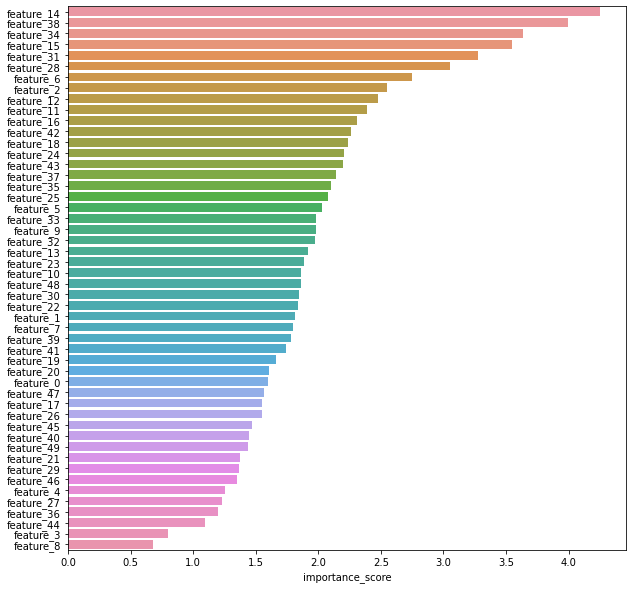

In [117]:
# feature importances
f, ax = plt.subplots(figsize=(10,10))
feature_importances_df = pd.DataFrame(model.feature_importances_,index = model.feature_names_,columns = ['importance_score']).sort_values(['importance_score'],ascending=False)
sb.barplot(feature_importances_df['importance_score'],feature_importances_df.index)

# Observations:
- It appears that the **most importance features tend to be those that had a larger interquartile range**
    e.g feature_38, feature_14 had IQR 4 and 3 respectively and they were top 2
- **features with 0 IQR tend to be less important**
    e.g on the other hand, feature_3, feature_8 had IQR 0 and they were the least important, along with many other instances
    

# Exhaustive Grid Search
- further narrow down the parameters with exhaustive grid search

In [122]:
cat_features = X.columns                    # consider all features categorical
model = CatBoostClassifier(iterations = 400,
                           grow_policy = 'SymmetricTree',
                           one_hot_max_size = 5)
grid = {'learning_rate': [0.14,0.15,0.16],        # the larger the learning rate faster the convergence
        'depth': [3,4,5],
        'l2_leaf_reg': [8,9,10]}

randomized_search_result = model.grid_search(param_grid = grid,
                                           train_size = 0.7,
                                           X=X,
                                           y=y,
                                           plot=True,
                                           partition_random_seed = 0,
                                           search_by_train_test_split = True,
                                           calc_cv_statistics = True,
                                           refit = True,
                                           shuffle = True, 
                                           stratified = True,
                                           verbose = 10
                                           )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3077418	test: 1.3092286	best: 1.3092286 (0)	total: 22.7ms	remaining: 9.06s
1:	learn: 1.2555273	test: 1.2582121	best: 1.2582121 (1)	total: 42.7ms	remaining: 8.49s
2:	learn: 1.2188954	test: 1.2225707	best: 1.2225707 (2)	total: 62.4ms	remaining: 8.25s
3:	learn: 1.1925159	test: 1.1970274	best: 1.1970274 (3)	total: 81.1ms	remaining: 8.03s
4:	learn: 1.1731478	test: 1.1783461	best: 1.1783461 (4)	total: 101ms	remaining: 7.98s
5:	learn: 1.1587316	test: 1.1645615	best: 1.1645615 (5)	total: 121ms	remaining: 7.97s
6:	learn: 1.1479040	test: 1.1542451	best: 1.1542451 (6)	total: 141ms	remaining: 7.93s
7:	learn: 1.1392902	test: 1.1460606	best: 1.1460606 (7)	total: 162ms	remaining: 7.92s
8:	learn: 1.1329505	test: 1.1401831	best: 1.1401831 (8)	total: 185ms	remaining: 8.02s
9:	learn: 1.1279843	test: 1.1356156	best: 1.1356156 (9)	total: 209ms	remaining: 8.14s
10:	learn: 1.1243089	test: 1.1322923	best: 1.1322923 (10)	total: 233ms	remaining: 8.24s
11:	learn: 1.1210000	test: 1.1293321	best: 1.129

101:	learn: 1.0917716	test: 1.1057098	best: 1.1057098 (101)	total: 2.42s	remaining: 7.07s
102:	learn: 1.0916557	test: 1.1056336	best: 1.1056336 (102)	total: 2.44s	remaining: 7.03s
103:	learn: 1.0915254	test: 1.1055501	best: 1.1055501 (103)	total: 2.46s	remaining: 7s
104:	learn: 1.0914402	test: 1.1054829	best: 1.1054829 (104)	total: 2.48s	remaining: 6.96s
105:	learn: 1.0913187	test: 1.1053915	best: 1.1053915 (105)	total: 2.51s	remaining: 6.96s
106:	learn: 1.0911989	test: 1.1052994	best: 1.1052994 (106)	total: 2.54s	remaining: 6.95s
107:	learn: 1.0911282	test: 1.1052469	best: 1.1052469 (107)	total: 2.56s	remaining: 6.92s
108:	learn: 1.0910377	test: 1.1051798	best: 1.1051798 (108)	total: 2.59s	remaining: 6.91s
109:	learn: 1.0909926	test: 1.1051514	best: 1.1051514 (109)	total: 2.62s	remaining: 6.9s
110:	learn: 1.0909004	test: 1.1051032	best: 1.1051032 (110)	total: 2.64s	remaining: 6.89s
111:	learn: 1.0908181	test: 1.1050573	best: 1.1050573 (111)	total: 2.68s	remaining: 6.88s
112:	learn: 1.

194:	learn: 1.0846863	test: 1.1023415	best: 1.1023415 (194)	total: 4.55s	remaining: 4.79s
195:	learn: 1.0846215	test: 1.1023041	best: 1.1023041 (195)	total: 4.58s	remaining: 4.76s
196:	learn: 1.0845569	test: 1.1022995	best: 1.1022995 (196)	total: 4.59s	remaining: 4.74s
197:	learn: 1.0845176	test: 1.1022923	best: 1.1022923 (197)	total: 4.61s	remaining: 4.71s
198:	learn: 1.0844448	test: 1.1022691	best: 1.1022691 (198)	total: 4.63s	remaining: 4.68s
199:	learn: 1.0843954	test: 1.1022489	best: 1.1022489 (199)	total: 4.66s	remaining: 4.66s
200:	learn: 1.0843386	test: 1.1022144	best: 1.1022144 (200)	total: 4.67s	remaining: 4.63s
201:	learn: 1.0842978	test: 1.1022176	best: 1.1022144 (200)	total: 4.7s	remaining: 4.6s
202:	learn: 1.0842402	test: 1.1021770	best: 1.1021770 (202)	total: 4.72s	remaining: 4.58s
203:	learn: 1.0841887	test: 1.1021381	best: 1.1021381 (203)	total: 4.74s	remaining: 4.55s
204:	learn: 1.0841444	test: 1.1021452	best: 1.1021381 (203)	total: 4.76s	remaining: 4.52s
205:	learn: 

296:	learn: 1.0801840	test: 1.1009392	best: 1.1009392 (296)	total: 6.7s	remaining: 2.32s
297:	learn: 1.0801591	test: 1.1009399	best: 1.1009392 (296)	total: 6.72s	remaining: 2.3s
298:	learn: 1.0801285	test: 1.1009365	best: 1.1009365 (298)	total: 6.74s	remaining: 2.28s
299:	learn: 1.0801039	test: 1.1009231	best: 1.1009231 (299)	total: 6.76s	remaining: 2.25s
300:	learn: 1.0800502	test: 1.1009308	best: 1.1009231 (299)	total: 6.79s	remaining: 2.23s
301:	learn: 1.0800311	test: 1.1009398	best: 1.1009231 (299)	total: 6.81s	remaining: 2.21s
302:	learn: 1.0799940	test: 1.1009445	best: 1.1009231 (299)	total: 6.84s	remaining: 2.19s
303:	learn: 1.0799523	test: 1.1009293	best: 1.1009231 (299)	total: 6.87s	remaining: 2.17s
304:	learn: 1.0799084	test: 1.1009009	best: 1.1009009 (304)	total: 6.89s	remaining: 2.15s
305:	learn: 1.0798805	test: 1.1008795	best: 1.1008795 (305)	total: 6.92s	remaining: 2.13s
306:	learn: 1.0798356	test: 1.1008576	best: 1.1008576 (306)	total: 6.95s	remaining: 2.1s
307:	learn: 1

390:	learn: 1.0772309	test: 1.1004698	best: 1.1004398 (383)	total: 8.81s	remaining: 203ms
391:	learn: 1.0771957	test: 1.1004813	best: 1.1004398 (383)	total: 8.85s	remaining: 181ms
392:	learn: 1.0771749	test: 1.1004903	best: 1.1004398 (383)	total: 8.87s	remaining: 158ms
393:	learn: 1.0771479	test: 1.1004441	best: 1.1004398 (383)	total: 8.9s	remaining: 136ms
394:	learn: 1.0771244	test: 1.1004437	best: 1.1004398 (383)	total: 8.93s	remaining: 113ms
395:	learn: 1.0770787	test: 1.1004650	best: 1.1004398 (383)	total: 8.95s	remaining: 90.4ms
396:	learn: 1.0770551	test: 1.1004793	best: 1.1004398 (383)	total: 8.98s	remaining: 67.8ms
397:	learn: 1.0770164	test: 1.1004767	best: 1.1004398 (383)	total: 9s	remaining: 45.2ms
398:	learn: 1.0769942	test: 1.1004658	best: 1.1004398 (383)	total: 9.03s	remaining: 22.6ms
399:	learn: 1.0769847	test: 1.1004649	best: 1.1004398 (383)	total: 9.05s	remaining: 0us

bestTest = 1.10043983
bestIteration = 383

0:	loss: 1.1004398	best: 1.1004398 (0)	total: 9.21s	remain

85:	learn: 1.0931114	test: 1.1066450	best: 1.1066450 (85)	total: 2.17s	remaining: 7.93s
86:	learn: 1.0930321	test: 1.1066410	best: 1.1066410 (86)	total: 2.19s	remaining: 7.9s
87:	learn: 1.0929283	test: 1.1065589	best: 1.1065589 (87)	total: 2.22s	remaining: 7.87s
88:	learn: 1.0928018	test: 1.1064435	best: 1.1064435 (88)	total: 2.25s	remaining: 7.86s
89:	learn: 1.0926820	test: 1.1063505	best: 1.1063505 (89)	total: 2.27s	remaining: 7.82s
90:	learn: 1.0925626	test: 1.1062627	best: 1.1062627 (90)	total: 2.29s	remaining: 7.78s
91:	learn: 1.0924105	test: 1.1062045	best: 1.1062045 (91)	total: 2.31s	remaining: 7.74s
92:	learn: 1.0923171	test: 1.1061382	best: 1.1061382 (92)	total: 2.33s	remaining: 7.7s
93:	learn: 1.0921635	test: 1.1060276	best: 1.1060276 (93)	total: 2.35s	remaining: 7.66s
94:	learn: 1.0919858	test: 1.1059287	best: 1.1059287 (94)	total: 2.37s	remaining: 7.62s
95:	learn: 1.0919106	test: 1.1058963	best: 1.1058963 (95)	total: 2.4s	remaining: 7.59s
96:	learn: 1.0917911	test: 1.105799

186:	learn: 1.0845973	test: 1.1022348	best: 1.1022348 (186)	total: 4.29s	remaining: 4.89s
187:	learn: 1.0845548	test: 1.1022249	best: 1.1022249 (187)	total: 4.31s	remaining: 4.86s
188:	learn: 1.0845212	test: 1.1022200	best: 1.1022200 (188)	total: 4.33s	remaining: 4.83s
189:	learn: 1.0844601	test: 1.1021786	best: 1.1021786 (189)	total: 4.35s	remaining: 4.81s
190:	learn: 1.0844088	test: 1.1022040	best: 1.1021786 (189)	total: 4.37s	remaining: 4.78s
191:	learn: 1.0843648	test: 1.1021984	best: 1.1021786 (189)	total: 4.39s	remaining: 4.75s
192:	learn: 1.0842954	test: 1.1021527	best: 1.1021527 (192)	total: 4.41s	remaining: 4.73s
193:	learn: 1.0842443	test: 1.1021229	best: 1.1021229 (193)	total: 4.42s	remaining: 4.7s
194:	learn: 1.0842238	test: 1.1021038	best: 1.1021038 (194)	total: 4.44s	remaining: 4.67s
195:	learn: 1.0841630	test: 1.1021006	best: 1.1021006 (195)	total: 4.46s	remaining: 4.65s
196:	learn: 1.0840948	test: 1.1020964	best: 1.1020964 (196)	total: 4.48s	remaining: 4.62s
197:	learn:

284:	learn: 1.0800234	test: 1.1008949	best: 1.1008949 (284)	total: 6.23s	remaining: 2.51s
285:	learn: 1.0799730	test: 1.1008712	best: 1.1008712 (285)	total: 6.25s	remaining: 2.49s
286:	learn: 1.0799368	test: 1.1008385	best: 1.1008385 (286)	total: 6.27s	remaining: 2.47s
287:	learn: 1.0798887	test: 1.1008290	best: 1.1008290 (287)	total: 6.29s	remaining: 2.44s
288:	learn: 1.0798638	test: 1.1008233	best: 1.1008233 (288)	total: 6.3s	remaining: 2.42s
289:	learn: 1.0798326	test: 1.1008324	best: 1.1008233 (288)	total: 6.32s	remaining: 2.4s
290:	learn: 1.0798061	test: 1.1008285	best: 1.1008233 (288)	total: 6.34s	remaining: 2.38s
291:	learn: 1.0797742	test: 1.1008329	best: 1.1008233 (288)	total: 6.36s	remaining: 2.35s
292:	learn: 1.0797461	test: 1.1008184	best: 1.1008184 (292)	total: 6.38s	remaining: 2.33s
293:	learn: 1.0797432	test: 1.1008217	best: 1.1008184 (292)	total: 6.39s	remaining: 2.31s
294:	learn: 1.0797104	test: 1.1008132	best: 1.1008132 (294)	total: 6.41s	remaining: 2.28s
295:	learn: 

383:	learn: 1.0767890	test: 1.1003580	best: 1.1003580 (383)	total: 8.14s	remaining: 339ms
384:	learn: 1.0767611	test: 1.1003583	best: 1.1003580 (383)	total: 8.16s	remaining: 318ms
385:	learn: 1.0767316	test: 1.1003690	best: 1.1003580 (383)	total: 8.18s	remaining: 297ms
386:	learn: 1.0767176	test: 1.1003763	best: 1.1003580 (383)	total: 8.2s	remaining: 276ms
387:	learn: 1.0767045	test: 1.1003674	best: 1.1003580 (383)	total: 8.22s	remaining: 254ms
388:	learn: 1.0766689	test: 1.1003793	best: 1.1003580 (383)	total: 8.24s	remaining: 233ms
389:	learn: 1.0766251	test: 1.1003677	best: 1.1003580 (383)	total: 8.27s	remaining: 212ms
390:	learn: 1.0765999	test: 1.1003631	best: 1.1003580 (383)	total: 8.29s	remaining: 191ms
391:	learn: 1.0765649	test: 1.1003731	best: 1.1003580 (383)	total: 8.31s	remaining: 170ms
392:	learn: 1.0765446	test: 1.1003841	best: 1.1003580 (383)	total: 8.34s	remaining: 148ms
393:	learn: 1.0765231	test: 1.1003482	best: 1.1003482 (393)	total: 8.36s	remaining: 127ms
394:	learn:

80:	learn: 1.0930821	test: 1.1065030	best: 1.1065030 (80)	total: 1.74s	remaining: 6.86s
81:	learn: 1.0929922	test: 1.1064620	best: 1.1064620 (81)	total: 1.77s	remaining: 6.85s
82:	learn: 1.0928700	test: 1.1064189	best: 1.1064189 (82)	total: 1.78s	remaining: 6.82s
83:	learn: 1.0927431	test: 1.1063502	best: 1.1063502 (83)	total: 1.81s	remaining: 6.81s
84:	learn: 1.0925631	test: 1.1062022	best: 1.1062022 (84)	total: 1.83s	remaining: 6.79s
85:	learn: 1.0923897	test: 1.1061069	best: 1.1061069 (85)	total: 1.86s	remaining: 6.79s
86:	learn: 1.0922198	test: 1.1059592	best: 1.1059592 (86)	total: 1.88s	remaining: 6.77s
87:	learn: 1.0921187	test: 1.1058819	best: 1.1058819 (87)	total: 1.9s	remaining: 6.74s
88:	learn: 1.0919823	test: 1.1057603	best: 1.1057603 (88)	total: 1.93s	remaining: 6.73s
89:	learn: 1.0918678	test: 1.1057077	best: 1.1057077 (89)	total: 1.95s	remaining: 6.71s
90:	learn: 1.0917232	test: 1.1056293	best: 1.1056293 (90)	total: 1.97s	remaining: 6.7s
91:	learn: 1.0915676	test: 1.10551

181:	learn: 1.0841115	test: 1.1019861	best: 1.1019861 (181)	total: 3.89s	remaining: 4.66s
182:	learn: 1.0840637	test: 1.1019769	best: 1.1019769 (182)	total: 3.92s	remaining: 4.64s
183:	learn: 1.0839732	test: 1.1019467	best: 1.1019467 (183)	total: 3.94s	remaining: 4.62s
184:	learn: 1.0839139	test: 1.1019117	best: 1.1019117 (184)	total: 3.96s	remaining: 4.61s
185:	learn: 1.0838787	test: 1.1019127	best: 1.1019117 (184)	total: 3.99s	remaining: 4.59s
186:	learn: 1.0838240	test: 1.1019021	best: 1.1019021 (186)	total: 4.01s	remaining: 4.57s
187:	learn: 1.0837637	test: 1.1018970	best: 1.1018970 (187)	total: 4.04s	remaining: 4.55s
188:	learn: 1.0837037	test: 1.1018729	best: 1.1018729 (188)	total: 4.06s	remaining: 4.54s
189:	learn: 1.0836646	test: 1.1018524	best: 1.1018524 (189)	total: 4.09s	remaining: 4.52s
190:	learn: 1.0836327	test: 1.1018694	best: 1.1018524 (189)	total: 4.11s	remaining: 4.5s
191:	learn: 1.0835720	test: 1.1018545	best: 1.1018524 (189)	total: 4.15s	remaining: 4.49s
192:	learn:

282:	learn: 1.0796016	test: 1.1005654	best: 1.1005654 (282)	total: 6.04s	remaining: 2.5s
283:	learn: 1.0795649	test: 1.1005658	best: 1.1005654 (282)	total: 6.06s	remaining: 2.48s
284:	learn: 1.0795083	test: 1.1005390	best: 1.1005390 (284)	total: 6.08s	remaining: 2.45s
285:	learn: 1.0794654	test: 1.1005263	best: 1.1005263 (285)	total: 6.1s	remaining: 2.43s
286:	learn: 1.0794116	test: 1.1005075	best: 1.1005075 (286)	total: 6.12s	remaining: 2.41s
287:	learn: 1.0793622	test: 1.1004979	best: 1.1004979 (287)	total: 6.14s	remaining: 2.39s
288:	learn: 1.0793337	test: 1.1004843	best: 1.1004843 (288)	total: 6.16s	remaining: 2.37s
289:	learn: 1.0792889	test: 1.1005034	best: 1.1004843 (288)	total: 6.18s	remaining: 2.34s
290:	learn: 1.0792652	test: 1.1005042	best: 1.1004843 (288)	total: 6.2s	remaining: 2.32s
291:	learn: 1.0792290	test: 1.1005081	best: 1.1004843 (288)	total: 6.21s	remaining: 2.3s
292:	learn: 1.0791779	test: 1.1005043	best: 1.1004843 (288)	total: 6.23s	remaining: 2.28s
293:	learn: 1.

383:	learn: 1.0761645	test: 1.1003684	best: 1.1003684 (383)	total: 8.01s	remaining: 334ms
384:	learn: 1.0761445	test: 1.1003743	best: 1.1003684 (383)	total: 8.04s	remaining: 313ms
385:	learn: 1.0761138	test: 1.1003854	best: 1.1003684 (383)	total: 8.06s	remaining: 292ms
386:	learn: 1.0761014	test: 1.1003935	best: 1.1003684 (383)	total: 8.08s	remaining: 271ms
387:	learn: 1.0760910	test: 1.1003867	best: 1.1003684 (383)	total: 8.1s	remaining: 250ms
388:	learn: 1.0760400	test: 1.1003961	best: 1.1003684 (383)	total: 8.12s	remaining: 230ms
389:	learn: 1.0759845	test: 1.1004151	best: 1.1003684 (383)	total: 8.14s	remaining: 209ms
390:	learn: 1.0759311	test: 1.1004391	best: 1.1003684 (383)	total: 8.16s	remaining: 188ms
391:	learn: 1.0759127	test: 1.1004205	best: 1.1003684 (383)	total: 8.18s	remaining: 167ms
392:	learn: 1.0758923	test: 1.1004325	best: 1.1003684 (383)	total: 8.2s	remaining: 146ms
393:	learn: 1.0758705	test: 1.1003956	best: 1.1003684 (383)	total: 8.22s	remaining: 125ms
394:	learn: 

82:	learn: 1.0941633	test: 1.1072599	best: 1.1072599 (82)	total: 1.8s	remaining: 6.88s
83:	learn: 1.0940215	test: 1.1072201	best: 1.1072201 (83)	total: 1.83s	remaining: 6.89s
84:	learn: 1.0938636	test: 1.1071085	best: 1.1071085 (84)	total: 1.86s	remaining: 6.89s
85:	learn: 1.0937209	test: 1.1070532	best: 1.1070532 (85)	total: 1.89s	remaining: 6.89s
86:	learn: 1.0936022	test: 1.1069847	best: 1.1069847 (86)	total: 1.92s	remaining: 6.89s
87:	learn: 1.0934735	test: 1.1068938	best: 1.1068938 (87)	total: 1.94s	remaining: 6.89s
88:	learn: 1.0933500	test: 1.1067780	best: 1.1067780 (88)	total: 1.97s	remaining: 6.89s
89:	learn: 1.0932228	test: 1.1066724	best: 1.1066724 (89)	total: 2s	remaining: 6.88s
90:	learn: 1.0930860	test: 1.1065854	best: 1.1065854 (90)	total: 2.03s	remaining: 6.9s
91:	learn: 1.0929439	test: 1.1065482	best: 1.1065482 (91)	total: 2.06s	remaining: 6.89s
92:	learn: 1.0928477	test: 1.1064669	best: 1.1064669 (92)	total: 2.09s	remaining: 6.89s
93:	learn: 1.0927146	test: 1.1063734	

175:	learn: 1.0858366	test: 1.1026039	best: 1.1026039 (175)	total: 4.18s	remaining: 5.32s
176:	learn: 1.0857735	test: 1.1025326	best: 1.1025326 (176)	total: 4.21s	remaining: 5.3s
177:	learn: 1.0856945	test: 1.1025239	best: 1.1025239 (177)	total: 4.24s	remaining: 5.28s
178:	learn: 1.0856381	test: 1.1025054	best: 1.1025054 (178)	total: 4.26s	remaining: 5.26s
179:	learn: 1.0855139	test: 1.1024208	best: 1.1024208 (179)	total: 4.29s	remaining: 5.25s
180:	learn: 1.0854520	test: 1.1024100	best: 1.1024100 (180)	total: 4.32s	remaining: 5.23s
181:	learn: 1.0854119	test: 1.1024065	best: 1.1024065 (181)	total: 4.35s	remaining: 5.21s
182:	learn: 1.0853679	test: 1.1023895	best: 1.1023895 (182)	total: 4.38s	remaining: 5.19s
183:	learn: 1.0852911	test: 1.1023631	best: 1.1023631 (183)	total: 4.4s	remaining: 5.16s
184:	learn: 1.0852115	test: 1.1023105	best: 1.1023105 (184)	total: 4.42s	remaining: 5.14s
185:	learn: 1.0851601	test: 1.1022977	best: 1.1022977 (185)	total: 4.46s	remaining: 5.13s
186:	learn: 

273:	learn: 1.0811481	test: 1.1009268	best: 1.1009268 (273)	total: 6.32s	remaining: 2.91s
274:	learn: 1.0810905	test: 1.1009205	best: 1.1009205 (274)	total: 6.35s	remaining: 2.88s
275:	learn: 1.0810777	test: 1.1009078	best: 1.1009078 (275)	total: 6.37s	remaining: 2.86s
276:	learn: 1.0810344	test: 1.1008967	best: 1.1008967 (276)	total: 6.4s	remaining: 2.84s
277:	learn: 1.0810014	test: 1.1009056	best: 1.1008967 (276)	total: 6.43s	remaining: 2.82s
278:	learn: 1.0809581	test: 1.1008993	best: 1.1008967 (276)	total: 6.45s	remaining: 2.8s
279:	learn: 1.0809269	test: 1.1009018	best: 1.1008967 (276)	total: 6.47s	remaining: 2.77s
280:	learn: 1.0808922	test: 1.1009127	best: 1.1008967 (276)	total: 6.5s	remaining: 2.75s
281:	learn: 1.0808442	test: 1.1008869	best: 1.1008869 (281)	total: 6.54s	remaining: 2.73s
282:	learn: 1.0807918	test: 1.1008757	best: 1.1008757 (282)	total: 6.56s	remaining: 2.71s
283:	learn: 1.0807365	test: 1.1008796	best: 1.1008757 (282)	total: 6.59s	remaining: 2.69s
284:	learn: 1

371:	learn: 1.0779358	test: 1.1003480	best: 1.1003335 (369)	total: 8.63s	remaining: 650ms
372:	learn: 1.0779009	test: 1.1003520	best: 1.1003335 (369)	total: 8.66s	remaining: 627ms
373:	learn: 1.0778581	test: 1.1003545	best: 1.1003335 (369)	total: 8.68s	remaining: 603ms
374:	learn: 1.0778320	test: 1.1003593	best: 1.1003335 (369)	total: 8.7s	remaining: 580ms
375:	learn: 1.0777950	test: 1.1003526	best: 1.1003335 (369)	total: 8.73s	remaining: 557ms
376:	learn: 1.0777573	test: 1.1003458	best: 1.1003335 (369)	total: 8.76s	remaining: 534ms
377:	learn: 1.0777364	test: 1.1003313	best: 1.1003313 (377)	total: 8.78s	remaining: 511ms
378:	learn: 1.0777042	test: 1.1003239	best: 1.1003239 (378)	total: 8.81s	remaining: 488ms
379:	learn: 1.0776891	test: 1.1003290	best: 1.1003239 (378)	total: 8.83s	remaining: 465ms
380:	learn: 1.0776607	test: 1.1003192	best: 1.1003192 (380)	total: 8.86s	remaining: 442ms
381:	learn: 1.0776376	test: 1.1003117	best: 1.1003117 (381)	total: 8.89s	remaining: 419ms
382:	learn:

68:	learn: 1.0957538	test: 1.1083501	best: 1.1083501 (68)	total: 1.74s	remaining: 8.35s
69:	learn: 1.0956378	test: 1.1082611	best: 1.1082611 (69)	total: 1.76s	remaining: 8.3s
70:	learn: 1.0954487	test: 1.1080978	best: 1.1080978 (70)	total: 1.78s	remaining: 8.26s
71:	learn: 1.0952954	test: 1.1080169	best: 1.1080169 (71)	total: 1.8s	remaining: 8.21s
72:	learn: 1.0951912	test: 1.1079218	best: 1.1079218 (72)	total: 1.82s	remaining: 8.16s
73:	learn: 1.0950070	test: 1.1078606	best: 1.1078606 (73)	total: 1.84s	remaining: 8.12s
74:	learn: 1.0948475	test: 1.1077754	best: 1.1077754 (74)	total: 1.86s	remaining: 8.07s
75:	learn: 1.0947288	test: 1.1076700	best: 1.1076700 (75)	total: 1.88s	remaining: 8.02s
76:	learn: 1.0945713	test: 1.1075415	best: 1.1075415 (76)	total: 1.9s	remaining: 7.98s
77:	learn: 1.0944340	test: 1.1074236	best: 1.1074236 (77)	total: 1.92s	remaining: 7.94s
78:	learn: 1.0942662	test: 1.1073049	best: 1.1073049 (78)	total: 1.95s	remaining: 7.91s
79:	learn: 1.0940811	test: 1.107177

168:	learn: 1.0856521	test: 1.1026847	best: 1.1026847 (168)	total: 3.88s	remaining: 5.31s
169:	learn: 1.0855743	test: 1.1026270	best: 1.1026270 (169)	total: 3.91s	remaining: 5.28s
170:	learn: 1.0855183	test: 1.1026032	best: 1.1026032 (170)	total: 3.93s	remaining: 5.26s
171:	learn: 1.0854431	test: 1.1025839	best: 1.1025839 (171)	total: 3.95s	remaining: 5.23s
172:	learn: 1.0853634	test: 1.1025859	best: 1.1025839 (171)	total: 3.97s	remaining: 5.21s
173:	learn: 1.0853242	test: 1.1025309	best: 1.1025309 (173)	total: 3.99s	remaining: 5.18s
174:	learn: 1.0852933	test: 1.1025087	best: 1.1025087 (174)	total: 4s	remaining: 5.15s
175:	learn: 1.0852484	test: 1.1024727	best: 1.1024727 (175)	total: 4.03s	remaining: 5.13s
176:	learn: 1.0851704	test: 1.1024075	best: 1.1024075 (176)	total: 4.05s	remaining: 5.1s
177:	learn: 1.0851141	test: 1.1023753	best: 1.1023753 (177)	total: 4.07s	remaining: 5.07s
178:	learn: 1.0850314	test: 1.1023001	best: 1.1023001 (178)	total: 4.09s	remaining: 5.05s
179:	learn: 1.

263:	learn: 1.0809897	test: 1.1010692	best: 1.1010692 (263)	total: 6.09s	remaining: 3.14s
264:	learn: 1.0809539	test: 1.1010860	best: 1.1010692 (263)	total: 6.12s	remaining: 3.12s
265:	learn: 1.0809255	test: 1.1010770	best: 1.1010692 (263)	total: 6.13s	remaining: 3.09s
266:	learn: 1.0808892	test: 1.1010738	best: 1.1010692 (263)	total: 6.15s	remaining: 3.06s
267:	learn: 1.0808775	test: 1.1010595	best: 1.1010595 (267)	total: 6.17s	remaining: 3.04s
268:	learn: 1.0808005	test: 1.1009982	best: 1.1009982 (268)	total: 6.19s	remaining: 3.02s
269:	learn: 1.0807521	test: 1.1009844	best: 1.1009844 (269)	total: 6.21s	remaining: 2.99s
270:	learn: 1.0806934	test: 1.1009786	best: 1.1009786 (270)	total: 6.23s	remaining: 2.97s
271:	learn: 1.0806662	test: 1.1009690	best: 1.1009690 (271)	total: 6.26s	remaining: 2.94s
272:	learn: 1.0806429	test: 1.1009727	best: 1.1009690 (271)	total: 6.28s	remaining: 2.92s
273:	learn: 1.0805758	test: 1.1009312	best: 1.1009312 (273)	total: 6.3s	remaining: 2.9s
274:	learn: 

362:	learn: 1.0776074	test: 1.1004453	best: 1.1004421 (361)	total: 8.28s	remaining: 844ms
363:	learn: 1.0775535	test: 1.1004491	best: 1.1004421 (361)	total: 8.29s	remaining: 820ms
364:	learn: 1.0775357	test: 1.1004525	best: 1.1004421 (361)	total: 8.31s	remaining: 797ms
365:	learn: 1.0774901	test: 1.1004313	best: 1.1004313 (365)	total: 8.33s	remaining: 774ms
366:	learn: 1.0774778	test: 1.1004234	best: 1.1004234 (366)	total: 8.35s	remaining: 751ms
367:	learn: 1.0774297	test: 1.1004150	best: 1.1004150 (367)	total: 8.37s	remaining: 728ms
368:	learn: 1.0774164	test: 1.1004144	best: 1.1004144 (368)	total: 8.39s	remaining: 705ms
369:	learn: 1.0773979	test: 1.1003991	best: 1.1003991 (369)	total: 8.41s	remaining: 682ms
370:	learn: 1.0773269	test: 1.1004202	best: 1.1003991 (369)	total: 8.43s	remaining: 659ms
371:	learn: 1.0772991	test: 1.1004173	best: 1.1003991 (369)	total: 8.45s	remaining: 636ms
372:	learn: 1.0772821	test: 1.1004087	best: 1.1003991 (369)	total: 8.47s	remaining: 614ms
373:	learn

63:	learn: 1.0959077	test: 1.1083731	best: 1.1083731 (63)	total: 1.39s	remaining: 7.32s
64:	learn: 1.0957396	test: 1.1082431	best: 1.1082431 (64)	total: 1.42s	remaining: 7.3s
65:	learn: 1.0955854	test: 1.1081167	best: 1.1081167 (65)	total: 1.44s	remaining: 7.27s
66:	learn: 1.0953879	test: 1.1079654	best: 1.1079654 (66)	total: 1.46s	remaining: 7.25s
67:	learn: 1.0952299	test: 1.1078419	best: 1.1078419 (67)	total: 1.48s	remaining: 7.23s
68:	learn: 1.0950408	test: 1.1076669	best: 1.1076669 (68)	total: 1.5s	remaining: 7.22s
69:	learn: 1.0949071	test: 1.1075632	best: 1.1075632 (69)	total: 1.52s	remaining: 7.19s
70:	learn: 1.0946946	test: 1.1074102	best: 1.1074102 (70)	total: 1.55s	remaining: 7.17s
71:	learn: 1.0945366	test: 1.1073307	best: 1.1073307 (71)	total: 1.57s	remaining: 7.16s
72:	learn: 1.0944297	test: 1.1072343	best: 1.1072343 (72)	total: 1.59s	remaining: 7.14s
73:	learn: 1.0942391	test: 1.1071731	best: 1.1071731 (73)	total: 1.61s	remaining: 7.12s
74:	learn: 1.0940709	test: 1.10708

164:	learn: 1.0853151	test: 1.1024066	best: 1.1024066 (164)	total: 3.45s	remaining: 4.92s
165:	learn: 1.0852614	test: 1.1023381	best: 1.1023381 (165)	total: 3.47s	remaining: 4.9s
166:	learn: 1.0852249	test: 1.1023345	best: 1.1023345 (166)	total: 3.49s	remaining: 4.87s
167:	learn: 1.0851584	test: 1.1022999	best: 1.1022999 (167)	total: 3.51s	remaining: 4.85s
168:	learn: 1.0851327	test: 1.1022906	best: 1.1022906 (168)	total: 3.53s	remaining: 4.82s
169:	learn: 1.0850454	test: 1.1022244	best: 1.1022244 (169)	total: 3.55s	remaining: 4.8s
170:	learn: 1.0849865	test: 1.1021995	best: 1.1021995 (170)	total: 3.57s	remaining: 4.78s
171:	learn: 1.0849096	test: 1.1021831	best: 1.1021831 (171)	total: 3.59s	remaining: 4.75s
172:	learn: 1.0848293	test: 1.1021899	best: 1.1021831 (171)	total: 3.6s	remaining: 4.73s
173:	learn: 1.0847895	test: 1.1021400	best: 1.1021400 (173)	total: 3.63s	remaining: 4.71s
174:	learn: 1.0847615	test: 1.1021207	best: 1.1021207 (174)	total: 3.65s	remaining: 4.69s
175:	learn: 1

261:	learn: 1.0806262	test: 1.1010127	best: 1.1010127 (261)	total: 5.36s	remaining: 2.82s
262:	learn: 1.0806025	test: 1.1009959	best: 1.1009959 (262)	total: 5.38s	remaining: 2.8s
263:	learn: 1.0805525	test: 1.1009789	best: 1.1009789 (263)	total: 5.4s	remaining: 2.78s
264:	learn: 1.0805268	test: 1.1009673	best: 1.1009673 (264)	total: 5.41s	remaining: 2.76s
265:	learn: 1.0804958	test: 1.1009561	best: 1.1009561 (265)	total: 5.43s	remaining: 2.74s
266:	learn: 1.0804567	test: 1.1009505	best: 1.1009505 (266)	total: 5.45s	remaining: 2.71s
267:	learn: 1.0804434	test: 1.1009342	best: 1.1009342 (267)	total: 5.47s	remaining: 2.69s
268:	learn: 1.0804179	test: 1.1009225	best: 1.1009225 (268)	total: 5.49s	remaining: 2.67s
269:	learn: 1.0803708	test: 1.1009082	best: 1.1009082 (269)	total: 5.51s	remaining: 2.65s
270:	learn: 1.0803083	test: 1.1009026	best: 1.1009026 (270)	total: 5.53s	remaining: 2.63s
271:	learn: 1.0802778	test: 1.1008908	best: 1.1008908 (271)	total: 5.54s	remaining: 2.61s
272:	learn: 

359:	learn: 1.0773643	test: 1.1007340	best: 1.1006026 (322)	total: 7.26s	remaining: 807ms
360:	learn: 1.0773404	test: 1.1007234	best: 1.1006026 (322)	total: 7.28s	remaining: 787ms
361:	learn: 1.0772973	test: 1.1007047	best: 1.1006026 (322)	total: 7.3s	remaining: 766ms
362:	learn: 1.0772293	test: 1.1007145	best: 1.1006026 (322)	total: 7.32s	remaining: 746ms
363:	learn: 1.0771893	test: 1.1007104	best: 1.1006026 (322)	total: 7.34s	remaining: 726ms
364:	learn: 1.0771700	test: 1.1007142	best: 1.1006026 (322)	total: 7.36s	remaining: 705ms
365:	learn: 1.0771237	test: 1.1006903	best: 1.1006026 (322)	total: 7.38s	remaining: 685ms
366:	learn: 1.0770819	test: 1.1006635	best: 1.1006026 (322)	total: 7.39s	remaining: 665ms
367:	learn: 1.0770330	test: 1.1006634	best: 1.1006026 (322)	total: 7.42s	remaining: 645ms
368:	learn: 1.0769939	test: 1.1006485	best: 1.1006026 (322)	total: 7.44s	remaining: 625ms
369:	learn: 1.0769764	test: 1.1006335	best: 1.1006026 (322)	total: 7.47s	remaining: 605ms
370:	learn:

58:	learn: 1.0981859	test: 1.1104709	best: 1.1104709 (58)	total: 1.37s	remaining: 7.94s
59:	learn: 1.0980181	test: 1.1103470	best: 1.1103470 (59)	total: 1.4s	remaining: 7.91s
60:	learn: 1.0978482	test: 1.1100956	best: 1.1100956 (60)	total: 1.42s	remaining: 7.89s
61:	learn: 1.0976438	test: 1.1099029	best: 1.1099029 (61)	total: 1.44s	remaining: 7.88s
62:	learn: 1.0974956	test: 1.1097739	best: 1.1097739 (62)	total: 1.47s	remaining: 7.84s
63:	learn: 1.0973270	test: 1.1096211	best: 1.1096211 (63)	total: 1.49s	remaining: 7.8s
64:	learn: 1.0970989	test: 1.1094574	best: 1.1094574 (64)	total: 1.51s	remaining: 7.76s
65:	learn: 1.0969088	test: 1.1093094	best: 1.1093094 (65)	total: 1.53s	remaining: 7.73s
66:	learn: 1.0967047	test: 1.1091429	best: 1.1091429 (66)	total: 1.55s	remaining: 7.69s
67:	learn: 1.0965380	test: 1.1089909	best: 1.1089909 (67)	total: 1.56s	remaining: 7.64s
68:	learn: 1.0963905	test: 1.1088585	best: 1.1088585 (68)	total: 1.59s	remaining: 7.62s
69:	learn: 1.0962650	test: 1.10875

157:	learn: 1.0868729	test: 1.1033224	best: 1.1033224 (157)	total: 3.71s	remaining: 5.69s
158:	learn: 1.0867836	test: 1.1032675	best: 1.1032675 (158)	total: 3.74s	remaining: 5.66s
159:	learn: 1.0867258	test: 1.1032381	best: 1.1032381 (159)	total: 3.76s	remaining: 5.65s
160:	learn: 1.0866914	test: 1.1032124	best: 1.1032124 (160)	total: 3.79s	remaining: 5.62s
161:	learn: 1.0866425	test: 1.1032126	best: 1.1032124 (160)	total: 3.81s	remaining: 5.6s
162:	learn: 1.0866041	test: 1.1031863	best: 1.1031863 (162)	total: 3.84s	remaining: 5.58s
163:	learn: 1.0865605	test: 1.1031808	best: 1.1031808 (163)	total: 3.86s	remaining: 5.55s
164:	learn: 1.0864712	test: 1.1031279	best: 1.1031279 (164)	total: 3.88s	remaining: 5.53s
165:	learn: 1.0864077	test: 1.1030417	best: 1.1030417 (165)	total: 3.9s	remaining: 5.5s
166:	learn: 1.0863729	test: 1.1030361	best: 1.1030361 (166)	total: 3.92s	remaining: 5.47s
167:	learn: 1.0862979	test: 1.1029799	best: 1.1029799 (167)	total: 3.94s	remaining: 5.45s
168:	learn: 1

256:	learn: 1.0818421	test: 1.1013270	best: 1.1013270 (256)	total: 5.87s	remaining: 3.27s
257:	learn: 1.0818240	test: 1.1013330	best: 1.1013270 (256)	total: 5.89s	remaining: 3.24s
258:	learn: 1.0817792	test: 1.1013178	best: 1.1013178 (258)	total: 5.91s	remaining: 3.22s
259:	learn: 1.0817341	test: 1.1013438	best: 1.1013178 (258)	total: 5.93s	remaining: 3.19s
260:	learn: 1.0816961	test: 1.1013283	best: 1.1013178 (258)	total: 5.94s	remaining: 3.17s
261:	learn: 1.0816788	test: 1.1013122	best: 1.1013122 (261)	total: 5.96s	remaining: 3.14s
262:	learn: 1.0816486	test: 1.1012667	best: 1.1012667 (262)	total: 5.98s	remaining: 3.12s
263:	learn: 1.0816037	test: 1.1012492	best: 1.1012492 (263)	total: 6s	remaining: 3.09s
264:	learn: 1.0815566	test: 1.1012551	best: 1.1012492 (263)	total: 6.02s	remaining: 3.06s
265:	learn: 1.0815315	test: 1.1012471	best: 1.1012471 (265)	total: 6.04s	remaining: 3.04s
266:	learn: 1.0814910	test: 1.1012365	best: 1.1012365 (266)	total: 6.05s	remaining: 3.02s
267:	learn: 1

358:	learn: 1.0784391	test: 1.1005986	best: 1.1005847 (348)	total: 7.82s	remaining: 893ms
359:	learn: 1.0784219	test: 1.1005862	best: 1.1005847 (348)	total: 7.84s	remaining: 871ms
360:	learn: 1.0783530	test: 1.1005722	best: 1.1005722 (360)	total: 7.86s	remaining: 849ms
361:	learn: 1.0783232	test: 1.1005791	best: 1.1005722 (360)	total: 7.88s	remaining: 827ms
362:	learn: 1.0782617	test: 1.1005852	best: 1.1005722 (360)	total: 7.9s	remaining: 805ms
363:	learn: 1.0782247	test: 1.1005811	best: 1.1005722 (360)	total: 7.92s	remaining: 783ms
364:	learn: 1.0782093	test: 1.1005820	best: 1.1005722 (360)	total: 7.93s	remaining: 761ms
365:	learn: 1.0781678	test: 1.1005617	best: 1.1005617 (365)	total: 7.95s	remaining: 739ms
366:	learn: 1.0781550	test: 1.1005542	best: 1.1005542 (366)	total: 7.97s	remaining: 717ms
367:	learn: 1.0781109	test: 1.1005459	best: 1.1005459 (367)	total: 7.99s	remaining: 695ms
368:	learn: 1.0780745	test: 1.1005295	best: 1.1005295 (368)	total: 8.02s	remaining: 674ms
369:	learn:

53:	learn: 1.0985583	test: 1.1105069	best: 1.1105069 (53)	total: 1.39s	remaining: 8.9s
54:	learn: 1.0982884	test: 1.1103270	best: 1.1103270 (54)	total: 1.42s	remaining: 8.89s
55:	learn: 1.0980475	test: 1.1101285	best: 1.1101285 (55)	total: 1.44s	remaining: 8.85s
56:	learn: 1.0979083	test: 1.1100074	best: 1.1100074 (56)	total: 1.46s	remaining: 8.81s
57:	learn: 1.0976590	test: 1.1098557	best: 1.1098557 (57)	total: 1.49s	remaining: 8.77s
58:	learn: 1.0975421	test: 1.1097776	best: 1.1097776 (58)	total: 1.51s	remaining: 8.74s
59:	learn: 1.0973774	test: 1.1096609	best: 1.1096609 (59)	total: 1.53s	remaining: 8.69s
60:	learn: 1.0972078	test: 1.1094062	best: 1.1094062 (60)	total: 1.56s	remaining: 8.65s
61:	learn: 1.0970054	test: 1.1092600	best: 1.1092600 (61)	total: 1.58s	remaining: 8.62s
62:	learn: 1.0968506	test: 1.1091376	best: 1.1091376 (62)	total: 1.6s	remaining: 8.59s
63:	learn: 1.0967289	test: 1.1090555	best: 1.1090555 (63)	total: 1.63s	remaining: 8.54s
64:	learn: 1.0965681	test: 1.10895

151:	learn: 1.0868010	test: 1.1032620	best: 1.1032620 (151)	total: 3.72s	remaining: 6.08s
152:	learn: 1.0867541	test: 1.1032741	best: 1.1032620 (151)	total: 3.75s	remaining: 6.05s
153:	learn: 1.0867147	test: 1.1032639	best: 1.1032620 (151)	total: 3.77s	remaining: 6.03s
154:	learn: 1.0866363	test: 1.1032114	best: 1.1032114 (154)	total: 3.8s	remaining: 6.01s
155:	learn: 1.0865754	test: 1.1031793	best: 1.1031793 (155)	total: 3.82s	remaining: 5.98s
156:	learn: 1.0865283	test: 1.1031103	best: 1.1031103 (156)	total: 3.85s	remaining: 5.96s
157:	learn: 1.0864645	test: 1.1030752	best: 1.1030752 (157)	total: 3.87s	remaining: 5.93s
158:	learn: 1.0863728	test: 1.1030192	best: 1.1030192 (158)	total: 3.89s	remaining: 5.9s
159:	learn: 1.0863142	test: 1.1029948	best: 1.1029948 (159)	total: 3.92s	remaining: 5.88s
160:	learn: 1.0862594	test: 1.1029935	best: 1.1029935 (160)	total: 3.94s	remaining: 5.85s
161:	learn: 1.0861954	test: 1.1029736	best: 1.1029736 (161)	total: 3.97s	remaining: 5.83s
162:	learn: 

250:	learn: 1.0815630	test: 1.1012443	best: 1.1012443 (250)	total: 6.22s	remaining: 3.69s
251:	learn: 1.0815531	test: 1.1012452	best: 1.1012443 (250)	total: 6.24s	remaining: 3.67s
252:	learn: 1.0814873	test: 1.1011818	best: 1.1011818 (252)	total: 6.26s	remaining: 3.64s
253:	learn: 1.0814627	test: 1.1011738	best: 1.1011738 (253)	total: 6.28s	remaining: 3.61s
254:	learn: 1.0814269	test: 1.1011638	best: 1.1011638 (254)	total: 6.3s	remaining: 3.58s
255:	learn: 1.0813903	test: 1.1011710	best: 1.1011638 (254)	total: 6.32s	remaining: 3.55s
256:	learn: 1.0813174	test: 1.1011559	best: 1.1011559 (256)	total: 6.33s	remaining: 3.52s
257:	learn: 1.0812594	test: 1.1011262	best: 1.1011262 (257)	total: 6.36s	remaining: 3.5s
258:	learn: 1.0812129	test: 1.1011109	best: 1.1011109 (258)	total: 6.38s	remaining: 3.47s
259:	learn: 1.0811828	test: 1.1011228	best: 1.1011109 (258)	total: 6.39s	remaining: 3.44s
260:	learn: 1.0811206	test: 1.1010852	best: 1.1010852 (260)	total: 6.41s	remaining: 3.41s
261:	learn: 

348:	learn: 1.0781005	test: 1.1004649	best: 1.1004649 (348)	total: 8.13s	remaining: 1.19s
349:	learn: 1.0780517	test: 1.1004995	best: 1.1004649 (348)	total: 8.15s	remaining: 1.16s
350:	learn: 1.0780407	test: 1.1004949	best: 1.1004649 (348)	total: 8.17s	remaining: 1.14s
351:	learn: 1.0780057	test: 1.1004966	best: 1.1004649 (348)	total: 8.19s	remaining: 1.12s
352:	learn: 1.0779833	test: 1.1004977	best: 1.1004649 (348)	total: 8.21s	remaining: 1.09s
353:	learn: 1.0779448	test: 1.1005137	best: 1.1004649 (348)	total: 8.22s	remaining: 1.07s
354:	learn: 1.0779150	test: 1.1004936	best: 1.1004649 (348)	total: 8.24s	remaining: 1.04s
355:	learn: 1.0778619	test: 1.1005325	best: 1.1004649 (348)	total: 8.27s	remaining: 1.02s
356:	learn: 1.0778393	test: 1.1005059	best: 1.1004649 (348)	total: 8.29s	remaining: 998ms
357:	learn: 1.0778104	test: 1.1005114	best: 1.1004649 (348)	total: 8.31s	remaining: 974ms
358:	learn: 1.0777862	test: 1.1004998	best: 1.1004649 (348)	total: 8.32s	remaining: 951ms
359:	learn

43:	learn: 1.1000157	test: 1.1117436	best: 1.1117436 (43)	total: 908ms	remaining: 7.34s
44:	learn: 1.0998190	test: 1.1115981	best: 1.1115981 (44)	total: 928ms	remaining: 7.32s
45:	learn: 1.0996115	test: 1.1114566	best: 1.1114566 (45)	total: 947ms	remaining: 7.29s
46:	learn: 1.0994629	test: 1.1113127	best: 1.1113127 (46)	total: 967ms	remaining: 7.27s
47:	learn: 1.0992405	test: 1.1110876	best: 1.1110876 (47)	total: 989ms	remaining: 7.25s
48:	learn: 1.0989597	test: 1.1107860	best: 1.1107860 (48)	total: 1.01s	remaining: 7.22s
49:	learn: 1.0986671	test: 1.1105769	best: 1.1105769 (49)	total: 1.03s	remaining: 7.2s
50:	learn: 1.0984860	test: 1.1104476	best: 1.1104476 (50)	total: 1.05s	remaining: 7.17s
51:	learn: 1.0982583	test: 1.1102698	best: 1.1102698 (51)	total: 1.07s	remaining: 7.15s
52:	learn: 1.0980392	test: 1.1101403	best: 1.1101403 (52)	total: 1.09s	remaining: 7.16s
53:	learn: 1.0978369	test: 1.1100379	best: 1.1100379 (53)	total: 1.12s	remaining: 7.17s
54:	learn: 1.0976311	test: 1.1098

136:	learn: 1.0871233	test: 1.1031985	best: 1.1031985 (136)	total: 2.8s	remaining: 5.38s
137:	learn: 1.0870287	test: 1.1031617	best: 1.1031617 (137)	total: 2.83s	remaining: 5.37s
138:	learn: 1.0869058	test: 1.1031079	best: 1.1031079 (138)	total: 2.85s	remaining: 5.35s
139:	learn: 1.0868309	test: 1.1030814	best: 1.1030814 (139)	total: 2.87s	remaining: 5.33s
140:	learn: 1.0867711	test: 1.1030697	best: 1.1030697 (140)	total: 2.89s	remaining: 5.3s
141:	learn: 1.0866916	test: 1.1030104	best: 1.1030104 (141)	total: 2.91s	remaining: 5.28s
142:	learn: 1.0866100	test: 1.1030086	best: 1.1030086 (142)	total: 2.93s	remaining: 5.26s
143:	learn: 1.0865472	test: 1.1029648	best: 1.1029648 (143)	total: 2.95s	remaining: 5.24s
144:	learn: 1.0864440	test: 1.1029021	best: 1.1029021 (144)	total: 2.97s	remaining: 5.23s
145:	learn: 1.0863679	test: 1.1028928	best: 1.1028928 (145)	total: 2.99s	remaining: 5.2s
146:	learn: 1.0862813	test: 1.1028540	best: 1.1028540 (146)	total: 3.01s	remaining: 5.19s
147:	learn: 1

230:	learn: 1.0819266	test: 1.1013076	best: 1.1012948 (229)	total: 4.71s	remaining: 3.44s
231:	learn: 1.0818934	test: 1.1012814	best: 1.1012814 (231)	total: 4.73s	remaining: 3.43s
232:	learn: 1.0818556	test: 1.1012669	best: 1.1012669 (232)	total: 4.75s	remaining: 3.41s
233:	learn: 1.0818139	test: 1.1012473	best: 1.1012473 (233)	total: 4.77s	remaining: 3.39s
234:	learn: 1.0817778	test: 1.1012293	best: 1.1012293 (234)	total: 4.79s	remaining: 3.37s
235:	learn: 1.0817477	test: 1.1012189	best: 1.1012189 (235)	total: 4.82s	remaining: 3.35s
236:	learn: 1.0817132	test: 1.1012136	best: 1.1012136 (236)	total: 4.84s	remaining: 3.33s
237:	learn: 1.0816903	test: 1.1012057	best: 1.1012057 (237)	total: 4.86s	remaining: 3.31s
238:	learn: 1.0816401	test: 1.1012323	best: 1.1012057 (237)	total: 4.89s	remaining: 3.29s
239:	learn: 1.0815632	test: 1.1011847	best: 1.1011847 (239)	total: 4.91s	remaining: 3.27s
240:	learn: 1.0815246	test: 1.1012076	best: 1.1011847 (239)	total: 4.94s	remaining: 3.26s
241:	learn

322:	learn: 1.0784116	test: 1.1005437	best: 1.1005403 (311)	total: 7.08s	remaining: 1.69s
323:	learn: 1.0783710	test: 1.1005552	best: 1.1005403 (311)	total: 7.11s	remaining: 1.67s
324:	learn: 1.0783564	test: 1.1005452	best: 1.1005403 (311)	total: 7.13s	remaining: 1.64s
325:	learn: 1.0783213	test: 1.1005446	best: 1.1005403 (311)	total: 7.16s	remaining: 1.62s
326:	learn: 1.0782621	test: 1.1005456	best: 1.1005403 (311)	total: 7.19s	remaining: 1.6s
327:	learn: 1.0782583	test: 1.1005463	best: 1.1005403 (311)	total: 7.21s	remaining: 1.58s
328:	learn: 1.0782311	test: 1.1005537	best: 1.1005403 (311)	total: 7.24s	remaining: 1.56s
329:	learn: 1.0782284	test: 1.1005537	best: 1.1005403 (311)	total: 7.26s	remaining: 1.54s
330:	learn: 1.0782228	test: 1.1005552	best: 1.1005403 (311)	total: 7.29s	remaining: 1.52s
331:	learn: 1.0781986	test: 1.1005810	best: 1.1005403 (311)	total: 7.31s	remaining: 1.5s
332:	learn: 1.0781871	test: 1.1005784	best: 1.1005403 (311)	total: 7.34s	remaining: 1.48s
333:	learn: 

19:	learn: 1.1082219	test: 1.1181984	best: 1.1181984 (19)	total: 454ms	remaining: 8.63s
20:	learn: 1.1074721	test: 1.1177239	best: 1.1177239 (20)	total: 475ms	remaining: 8.57s
21:	learn: 1.1067716	test: 1.1172790	best: 1.1172790 (21)	total: 497ms	remaining: 8.55s
22:	learn: 1.1059999	test: 1.1165668	best: 1.1165668 (22)	total: 525ms	remaining: 8.61s
23:	learn: 1.1055690	test: 1.1162490	best: 1.1162490 (23)	total: 545ms	remaining: 8.53s
24:	learn: 1.1052175	test: 1.1160475	best: 1.1160475 (24)	total: 565ms	remaining: 8.47s
25:	learn: 1.1046842	test: 1.1156644	best: 1.1156644 (25)	total: 590ms	remaining: 8.48s
26:	learn: 1.1043618	test: 1.1154563	best: 1.1154563 (26)	total: 611ms	remaining: 8.44s
27:	learn: 1.1040137	test: 1.1151815	best: 1.1151815 (27)	total: 636ms	remaining: 8.44s
28:	learn: 1.1035279	test: 1.1148323	best: 1.1148323 (28)	total: 665ms	remaining: 8.5s
29:	learn: 1.1031614	test: 1.1145833	best: 1.1145833 (29)	total: 687ms	remaining: 8.47s
30:	learn: 1.1027653	test: 1.1142

115:	learn: 1.0862548	test: 1.1033710	best: 1.1033710 (115)	total: 2.84s	remaining: 6.96s
116:	learn: 1.0861621	test: 1.1033550	best: 1.1033550 (116)	total: 2.87s	remaining: 6.94s
117:	learn: 1.0859881	test: 1.1032908	best: 1.1032908 (117)	total: 2.9s	remaining: 6.93s
118:	learn: 1.0858663	test: 1.1032682	best: 1.1032682 (118)	total: 2.93s	remaining: 6.92s
119:	learn: 1.0857113	test: 1.1032043	best: 1.1032043 (119)	total: 2.96s	remaining: 6.91s
120:	learn: 1.0856240	test: 1.1031498	best: 1.1031498 (120)	total: 2.99s	remaining: 6.9s
121:	learn: 1.0854838	test: 1.1031045	best: 1.1031045 (121)	total: 3.03s	remaining: 6.91s
122:	learn: 1.0853884	test: 1.1030991	best: 1.1030991 (122)	total: 3.06s	remaining: 6.9s
123:	learn: 1.0852963	test: 1.1030787	best: 1.1030787 (123)	total: 3.09s	remaining: 6.88s
124:	learn: 1.0851789	test: 1.1030119	best: 1.1030119 (124)	total: 3.12s	remaining: 6.86s
125:	learn: 1.0850730	test: 1.1029494	best: 1.1029494 (125)	total: 3.14s	remaining: 6.83s
126:	learn: 1

216:	learn: 1.0778942	test: 1.1009844	best: 1.1009844 (216)	total: 5.45s	remaining: 4.59s
217:	learn: 1.0778217	test: 1.1009472	best: 1.1009472 (217)	total: 5.47s	remaining: 4.57s
218:	learn: 1.0777668	test: 1.1009606	best: 1.1009472 (217)	total: 5.49s	remaining: 4.54s
219:	learn: 1.0776931	test: 1.1009257	best: 1.1009257 (219)	total: 5.51s	remaining: 4.51s
220:	learn: 1.0776531	test: 1.1009018	best: 1.1009018 (220)	total: 5.53s	remaining: 4.48s
221:	learn: 1.0775602	test: 1.1008987	best: 1.1008987 (221)	total: 5.55s	remaining: 4.45s
222:	learn: 1.0775088	test: 1.1008557	best: 1.1008557 (222)	total: 5.58s	remaining: 4.43s
223:	learn: 1.0774461	test: 1.1008189	best: 1.1008189 (223)	total: 5.6s	remaining: 4.4s
224:	learn: 1.0774030	test: 1.1008112	best: 1.1008112 (224)	total: 5.62s	remaining: 4.37s
225:	learn: 1.0773377	test: 1.1008166	best: 1.1008112 (224)	total: 5.64s	remaining: 4.34s
226:	learn: 1.0772986	test: 1.1008342	best: 1.1008112 (224)	total: 5.66s	remaining: 4.31s
227:	learn: 

309:	learn: 1.0727438	test: 1.1001728	best: 1.1001728 (309)	total: 7.6s	remaining: 2.21s
310:	learn: 1.0726958	test: 1.1001680	best: 1.1001680 (310)	total: 7.63s	remaining: 2.18s
311:	learn: 1.0726652	test: 1.1001582	best: 1.1001582 (311)	total: 7.64s	remaining: 2.16s
312:	learn: 1.0726481	test: 1.1001541	best: 1.1001541 (312)	total: 7.66s	remaining: 2.13s
313:	learn: 1.0726182	test: 1.1001424	best: 1.1001424 (313)	total: 7.68s	remaining: 2.1s
314:	learn: 1.0725908	test: 1.1001403	best: 1.1001403 (314)	total: 7.71s	remaining: 2.08s
315:	learn: 1.0725262	test: 1.1001097	best: 1.1001097 (315)	total: 7.73s	remaining: 2.05s
316:	learn: 1.0725141	test: 1.1001190	best: 1.1001097 (315)	total: 7.75s	remaining: 2.03s
317:	learn: 1.0724931	test: 1.1001226	best: 1.1001097 (315)	total: 7.76s	remaining: 2s
318:	learn: 1.0724291	test: 1.1000982	best: 1.1000982 (318)	total: 7.79s	remaining: 1.98s
319:	learn: 1.0723807	test: 1.1001050	best: 1.1000982 (318)	total: 7.81s	remaining: 1.95s
320:	learn: 1.0

7:	learn: 1.1343985	test: 1.1414016	best: 1.1414016 (7)	total: 179ms	remaining: 8.79s
8:	learn: 1.1281187	test: 1.1355416	best: 1.1355416 (8)	total: 200ms	remaining: 8.69s
9:	learn: 1.1235143	test: 1.1313545	best: 1.1313545 (9)	total: 223ms	remaining: 8.7s
10:	learn: 1.1202283	test: 1.1284197	best: 1.1284197 (10)	total: 244ms	remaining: 8.63s
11:	learn: 1.1174542	test: 1.1258623	best: 1.1258623 (11)	total: 265ms	remaining: 8.57s
12:	learn: 1.1149937	test: 1.1237815	best: 1.1237815 (12)	total: 286ms	remaining: 8.51s
13:	learn: 1.1133165	test: 1.1224073	best: 1.1224073 (13)	total: 306ms	remaining: 8.44s
14:	learn: 1.1116472	test: 1.1209230	best: 1.1209230 (14)	total: 331ms	remaining: 8.5s
15:	learn: 1.1107146	test: 1.1201002	best: 1.1201002 (15)	total: 352ms	remaining: 8.44s
16:	learn: 1.1095936	test: 1.1191494	best: 1.1191494 (16)	total: 379ms	remaining: 8.54s
17:	learn: 1.1087414	test: 1.1184448	best: 1.1184448 (17)	total: 401ms	remaining: 8.5s
18:	learn: 1.1078310	test: 1.1177422	best

101:	learn: 1.0871186	test: 1.1040541	best: 1.1040541 (101)	total: 2.7s	remaining: 7.89s
102:	learn: 1.0869550	test: 1.1039769	best: 1.1039769 (102)	total: 2.73s	remaining: 7.86s
103:	learn: 1.0867880	test: 1.1039171	best: 1.1039171 (103)	total: 2.76s	remaining: 7.84s
104:	learn: 1.0866844	test: 1.1038305	best: 1.1038305 (104)	total: 2.79s	remaining: 7.84s
105:	learn: 1.0865225	test: 1.1037650	best: 1.1037650 (105)	total: 2.82s	remaining: 7.83s
106:	learn: 1.0863929	test: 1.1037033	best: 1.1037033 (106)	total: 2.85s	remaining: 7.79s
107:	learn: 1.0863233	test: 1.1036498	best: 1.1036498 (107)	total: 2.87s	remaining: 7.76s
108:	learn: 1.0861492	test: 1.1036388	best: 1.1036388 (108)	total: 2.91s	remaining: 7.76s
109:	learn: 1.0860655	test: 1.1035650	best: 1.1035650 (109)	total: 2.94s	remaining: 7.75s
110:	learn: 1.0859785	test: 1.1035415	best: 1.1035415 (110)	total: 2.97s	remaining: 7.73s
111:	learn: 1.0858721	test: 1.1035095	best: 1.1035095 (111)	total: 3s	remaining: 7.72s
112:	learn: 1.

199:	learn: 1.0779945	test: 1.1013446	best: 1.1013191 (196)	total: 5.25s	remaining: 5.25s
200:	learn: 1.0779068	test: 1.1013207	best: 1.1013191 (196)	total: 5.27s	remaining: 5.22s
201:	learn: 1.0778816	test: 1.1013265	best: 1.1013191 (196)	total: 5.29s	remaining: 5.18s
202:	learn: 1.0778184	test: 1.1013244	best: 1.1013191 (196)	total: 5.31s	remaining: 5.16s
203:	learn: 1.0777565	test: 1.1013089	best: 1.1013089 (203)	total: 5.33s	remaining: 5.12s
204:	learn: 1.0777143	test: 1.1013131	best: 1.1013089 (203)	total: 5.35s	remaining: 5.09s
205:	learn: 1.0776505	test: 1.1013108	best: 1.1013089 (203)	total: 5.37s	remaining: 5.06s
206:	learn: 1.0775867	test: 1.1013081	best: 1.1013081 (206)	total: 5.39s	remaining: 5.03s
207:	learn: 1.0775567	test: 1.1013054	best: 1.1013054 (207)	total: 5.41s	remaining: 4.99s
208:	learn: 1.0774905	test: 1.1012794	best: 1.1012794 (208)	total: 5.43s	remaining: 4.97s
209:	learn: 1.0774546	test: 1.1012794	best: 1.1012794 (209)	total: 5.45s	remaining: 4.93s
210:	learn

291:	learn: 1.0725925	test: 1.1006338	best: 1.1006338 (291)	total: 7.33s	remaining: 2.71s
292:	learn: 1.0725668	test: 1.1006251	best: 1.1006251 (292)	total: 7.36s	remaining: 2.69s
293:	learn: 1.0724843	test: 1.1006438	best: 1.1006251 (292)	total: 7.39s	remaining: 2.67s
294:	learn: 1.0724684	test: 1.1006429	best: 1.1006251 (292)	total: 7.42s	remaining: 2.64s
295:	learn: 1.0724395	test: 1.1006232	best: 1.1006232 (295)	total: 7.44s	remaining: 2.61s
296:	learn: 1.0723608	test: 1.1006231	best: 1.1006231 (296)	total: 7.46s	remaining: 2.59s
297:	learn: 1.0723361	test: 1.1006292	best: 1.1006231 (296)	total: 7.48s	remaining: 2.56s
298:	learn: 1.0722899	test: 1.1006530	best: 1.1006231 (296)	total: 7.51s	remaining: 2.54s
299:	learn: 1.0722549	test: 1.1006506	best: 1.1006231 (296)	total: 7.53s	remaining: 2.51s
300:	learn: 1.0721787	test: 1.1006735	best: 1.1006231 (296)	total: 7.55s	remaining: 2.48s
301:	learn: 1.0721274	test: 1.1006791	best: 1.1006231 (296)	total: 7.57s	remaining: 2.46s
302:	learn

388:	learn: 1.0681956	test: 1.1004665	best: 1.1004665 (388)	total: 9.46s	remaining: 268ms
389:	learn: 1.0681451	test: 1.1004509	best: 1.1004509 (389)	total: 9.48s	remaining: 243ms
390:	learn: 1.0680969	test: 1.1004741	best: 1.1004509 (389)	total: 9.5s	remaining: 219ms
391:	learn: 1.0680392	test: 1.1005016	best: 1.1004509 (389)	total: 9.52s	remaining: 194ms
392:	learn: 1.0679874	test: 1.1004935	best: 1.1004509 (389)	total: 9.54s	remaining: 170ms
393:	learn: 1.0679225	test: 1.1004820	best: 1.1004509 (389)	total: 9.56s	remaining: 146ms
394:	learn: 1.0678556	test: 1.1004874	best: 1.1004509 (389)	total: 9.59s	remaining: 121ms
395:	learn: 1.0678207	test: 1.1004725	best: 1.1004509 (389)	total: 9.61s	remaining: 97ms
396:	learn: 1.0677786	test: 1.1004664	best: 1.1004509 (389)	total: 9.63s	remaining: 72.7ms
397:	learn: 1.0677468	test: 1.1004766	best: 1.1004509 (389)	total: 9.64s	remaining: 48.5ms
398:	learn: 1.0677287	test: 1.1004875	best: 1.1004509 (389)	total: 9.67s	remaining: 24.2ms
399:	lear

80:	learn: 1.0893462	test: 1.1052282	best: 1.1052282 (80)	total: 2.15s	remaining: 8.48s
81:	learn: 1.0892286	test: 1.1051693	best: 1.1051693 (81)	total: 2.18s	remaining: 8.46s
82:	learn: 1.0890298	test: 1.1049859	best: 1.1049859 (82)	total: 2.2s	remaining: 8.41s
83:	learn: 1.0889279	test: 1.1049026	best: 1.1049026 (83)	total: 2.22s	remaining: 8.37s
84:	learn: 1.0887692	test: 1.1047984	best: 1.1047984 (84)	total: 2.25s	remaining: 8.32s
85:	learn: 1.0885498	test: 1.1046846	best: 1.1046846 (85)	total: 2.28s	remaining: 8.32s
86:	learn: 1.0884245	test: 1.1046244	best: 1.1046244 (86)	total: 2.31s	remaining: 8.31s
87:	learn: 1.0882610	test: 1.1045936	best: 1.1045936 (87)	total: 2.34s	remaining: 8.28s
88:	learn: 1.0881178	test: 1.1044857	best: 1.1044857 (88)	total: 2.37s	remaining: 8.28s
89:	learn: 1.0879944	test: 1.1044388	best: 1.1044388 (89)	total: 2.4s	remaining: 8.27s
90:	learn: 1.0878216	test: 1.1043449	best: 1.1043449 (90)	total: 2.43s	remaining: 8.25s
91:	learn: 1.0876791	test: 1.10427

172:	learn: 1.0790113	test: 1.1015323	best: 1.1015299 (171)	total: 4.64s	remaining: 6.09s
173:	learn: 1.0789615	test: 1.1015072	best: 1.1015072 (173)	total: 4.67s	remaining: 6.06s
174:	learn: 1.0788792	test: 1.1014379	best: 1.1014379 (174)	total: 4.7s	remaining: 6.04s
175:	learn: 1.0787485	test: 1.1014168	best: 1.1014168 (175)	total: 4.73s	remaining: 6.02s
176:	learn: 1.0786761	test: 1.1013987	best: 1.1013987 (176)	total: 4.76s	remaining: 6s
177:	learn: 1.0785754	test: 1.1013628	best: 1.1013628 (177)	total: 4.79s	remaining: 5.97s
178:	learn: 1.0785195	test: 1.1013237	best: 1.1013237 (178)	total: 4.81s	remaining: 5.94s
179:	learn: 1.0784636	test: 1.1013016	best: 1.1013016 (179)	total: 4.83s	remaining: 5.91s
180:	learn: 1.0783881	test: 1.1012987	best: 1.1012987 (180)	total: 4.86s	remaining: 5.88s
181:	learn: 1.0783289	test: 1.1012863	best: 1.1012863 (181)	total: 4.88s	remaining: 5.85s
182:	learn: 1.0782669	test: 1.1012412	best: 1.1012412 (182)	total: 4.9s	remaining: 5.82s
183:	learn: 1.0

265:	learn: 1.0729508	test: 1.1006615	best: 1.1006615 (265)	total: 6.8s	remaining: 3.42s
266:	learn: 1.0728579	test: 1.1006774	best: 1.1006615 (265)	total: 6.82s	remaining: 3.4s
267:	learn: 1.0727806	test: 1.1006452	best: 1.1006452 (267)	total: 6.84s	remaining: 3.37s
268:	learn: 1.0727232	test: 1.1006313	best: 1.1006313 (268)	total: 6.87s	remaining: 3.35s
269:	learn: 1.0727161	test: 1.1006321	best: 1.1006313 (268)	total: 6.89s	remaining: 3.32s
270:	learn: 1.0726495	test: 1.1006212	best: 1.1006212 (270)	total: 6.92s	remaining: 3.3s
271:	learn: 1.0725568	test: 1.1006371	best: 1.1006212 (270)	total: 6.96s	remaining: 3.27s
272:	learn: 1.0725034	test: 1.1006579	best: 1.1006212 (270)	total: 6.99s	remaining: 3.25s
273:	learn: 1.0724462	test: 1.1006330	best: 1.1006212 (270)	total: 7.02s	remaining: 3.23s
274:	learn: 1.0723957	test: 1.1006162	best: 1.1006162 (274)	total: 7.05s	remaining: 3.21s
275:	learn: 1.0723920	test: 1.1006176	best: 1.1006162 (274)	total: 7.08s	remaining: 3.18s
276:	learn: 1

364:	learn: 1.0677178	test: 1.1003745	best: 1.1003378 (357)	total: 9.25s	remaining: 887ms
365:	learn: 1.0676896	test: 1.1003688	best: 1.1003378 (357)	total: 9.27s	remaining: 861ms
366:	learn: 1.0676775	test: 1.1003819	best: 1.1003378 (357)	total: 9.29s	remaining: 836ms
367:	learn: 1.0676459	test: 1.1003894	best: 1.1003378 (357)	total: 9.31s	remaining: 810ms
368:	learn: 1.0676141	test: 1.1003884	best: 1.1003378 (357)	total: 9.33s	remaining: 784ms
369:	learn: 1.0675704	test: 1.1004086	best: 1.1003378 (357)	total: 9.35s	remaining: 758ms
370:	learn: 1.0674835	test: 1.1004000	best: 1.1003378 (357)	total: 9.38s	remaining: 733ms
371:	learn: 1.0674259	test: 1.1003929	best: 1.1003378 (357)	total: 9.4s	remaining: 707ms
372:	learn: 1.0673491	test: 1.1003828	best: 1.1003378 (357)	total: 9.42s	remaining: 682ms
373:	learn: 1.0673394	test: 1.1003790	best: 1.1003378 (357)	total: 9.44s	remaining: 656ms
374:	learn: 1.0672821	test: 1.1004035	best: 1.1003378 (357)	total: 9.46s	remaining: 631ms
375:	learn:

61:	learn: 1.0947185	test: 1.1083354	best: 1.1083354 (61)	total: 1.61s	remaining: 8.76s
62:	learn: 1.0945372	test: 1.1082282	best: 1.1082282 (62)	total: 1.63s	remaining: 8.72s
63:	learn: 1.0944167	test: 1.1081899	best: 1.1081899 (63)	total: 1.65s	remaining: 8.68s
64:	learn: 1.0943219	test: 1.1081239	best: 1.1081239 (64)	total: 1.68s	remaining: 8.66s
65:	learn: 1.0942353	test: 1.1080225	best: 1.1080225 (65)	total: 1.7s	remaining: 8.61s
66:	learn: 1.0940812	test: 1.1079359	best: 1.1079359 (66)	total: 1.73s	remaining: 8.59s
67:	learn: 1.0938751	test: 1.1078229	best: 1.1078229 (67)	total: 1.75s	remaining: 8.55s
68:	learn: 1.0936378	test: 1.1077114	best: 1.1077114 (68)	total: 1.78s	remaining: 8.54s
69:	learn: 1.0935274	test: 1.1076122	best: 1.1076122 (69)	total: 1.8s	remaining: 8.5s
70:	learn: 1.0932919	test: 1.1074742	best: 1.1074742 (70)	total: 1.83s	remaining: 8.47s
71:	learn: 1.0931273	test: 1.1073996	best: 1.1073996 (71)	total: 1.85s	remaining: 8.43s
72:	learn: 1.0929714	test: 1.107289

155:	learn: 1.0825097	test: 1.1022099	best: 1.1022099 (155)	total: 3.81s	remaining: 5.95s
156:	learn: 1.0824277	test: 1.1021784	best: 1.1021784 (156)	total: 3.83s	remaining: 5.92s
157:	learn: 1.0823537	test: 1.1021483	best: 1.1021483 (157)	total: 3.85s	remaining: 5.89s
158:	learn: 1.0822333	test: 1.1021205	best: 1.1021205 (158)	total: 3.87s	remaining: 5.87s
159:	learn: 1.0821056	test: 1.1021129	best: 1.1021129 (159)	total: 3.89s	remaining: 5.84s
160:	learn: 1.0820142	test: 1.1020814	best: 1.1020814 (160)	total: 3.92s	remaining: 5.81s
161:	learn: 1.0819146	test: 1.1020657	best: 1.1020657 (161)	total: 3.94s	remaining: 5.78s
162:	learn: 1.0818475	test: 1.1020395	best: 1.1020395 (162)	total: 3.96s	remaining: 5.75s
163:	learn: 1.0818162	test: 1.1020506	best: 1.1020395 (162)	total: 3.98s	remaining: 5.72s
164:	learn: 1.0817020	test: 1.1019765	best: 1.1019765 (164)	total: 4s	remaining: 5.69s
165:	learn: 1.0815866	test: 1.1018875	best: 1.1018875 (165)	total: 4.03s	remaining: 5.68s
166:	learn: 1

252:	learn: 1.0758913	test: 1.1008131	best: 1.1008131 (252)	total: 6s	remaining: 3.48s
253:	learn: 1.0758516	test: 1.1008111	best: 1.1008111 (253)	total: 6.02s	remaining: 3.46s
254:	learn: 1.0757708	test: 1.1007953	best: 1.1007953 (254)	total: 6.04s	remaining: 3.44s
255:	learn: 1.0757080	test: 1.1007765	best: 1.1007765 (255)	total: 6.07s	remaining: 3.42s
256:	learn: 1.0756631	test: 1.1007687	best: 1.1007687 (256)	total: 6.09s	remaining: 3.39s
257:	learn: 1.0756448	test: 1.1007736	best: 1.1007687 (256)	total: 6.12s	remaining: 3.37s
258:	learn: 1.0755704	test: 1.1007359	best: 1.1007359 (258)	total: 6.14s	remaining: 3.34s
259:	learn: 1.0755244	test: 1.1007315	best: 1.1007315 (259)	total: 6.16s	remaining: 3.32s
260:	learn: 1.0754712	test: 1.1007249	best: 1.1007249 (260)	total: 6.19s	remaining: 3.29s
261:	learn: 1.0754355	test: 1.1007372	best: 1.1007249 (260)	total: 6.21s	remaining: 3.27s
262:	learn: 1.0753709	test: 1.1007125	best: 1.1007125 (262)	total: 6.24s	remaining: 3.25s
263:	learn: 1

346:	learn: 1.0715094	test: 1.1001519	best: 1.1001519 (346)	total: 8.32s	remaining: 1.27s
347:	learn: 1.0714582	test: 1.1001604	best: 1.1001519 (346)	total: 8.34s	remaining: 1.25s
348:	learn: 1.0713904	test: 1.1001588	best: 1.1001519 (346)	total: 8.37s	remaining: 1.22s
349:	learn: 1.0713502	test: 1.1001530	best: 1.1001519 (346)	total: 8.4s	remaining: 1.2s
350:	learn: 1.0713044	test: 1.1001564	best: 1.1001519 (346)	total: 8.43s	remaining: 1.18s
351:	learn: 1.0712961	test: 1.1001548	best: 1.1001519 (346)	total: 8.45s	remaining: 1.15s
352:	learn: 1.0712248	test: 1.1001152	best: 1.1001152 (352)	total: 8.49s	remaining: 1.13s
353:	learn: 1.0711646	test: 1.1000848	best: 1.1000848 (353)	total: 8.52s	remaining: 1.11s
354:	learn: 1.0711233	test: 1.1000735	best: 1.1000735 (354)	total: 8.55s	remaining: 1.08s
355:	learn: 1.0710607	test: 1.1000516	best: 1.1000516 (355)	total: 8.58s	remaining: 1.06s
356:	learn: 1.0710484	test: 1.1000553	best: 1.1000516 (355)	total: 8.61s	remaining: 1.04s
357:	learn: 

39:	learn: 1.0989062	test: 1.1114232	best: 1.1114232 (39)	total: 1.01s	remaining: 9.07s
40:	learn: 1.0986687	test: 1.1112147	best: 1.1112147 (40)	total: 1.04s	remaining: 9.09s
41:	learn: 1.0983563	test: 1.1109765	best: 1.1109765 (41)	total: 1.06s	remaining: 9.06s
42:	learn: 1.0982087	test: 1.1108393	best: 1.1108393 (42)	total: 1.08s	remaining: 8.99s
43:	learn: 1.0979098	test: 1.1105591	best: 1.1105591 (43)	total: 1.11s	remaining: 8.97s
44:	learn: 1.0976715	test: 1.1103798	best: 1.1103798 (44)	total: 1.13s	remaining: 8.95s
45:	learn: 1.0974369	test: 1.1102408	best: 1.1102408 (45)	total: 1.16s	remaining: 8.94s
46:	learn: 1.0972058	test: 1.1100740	best: 1.1100740 (46)	total: 1.19s	remaining: 8.94s
47:	learn: 1.0969951	test: 1.1099187	best: 1.1099187 (47)	total: 1.22s	remaining: 8.93s
48:	learn: 1.0966237	test: 1.1096355	best: 1.1096355 (48)	total: 1.24s	remaining: 8.9s
49:	learn: 1.0964809	test: 1.1094365	best: 1.1094365 (49)	total: 1.27s	remaining: 8.87s
50:	learn: 1.0962541	test: 1.1092

140:	learn: 1.0827595	test: 1.1018067	best: 1.1018067 (140)	total: 3.35s	remaining: 6.16s
141:	learn: 1.0826805	test: 1.1017772	best: 1.1017772 (141)	total: 3.38s	remaining: 6.14s
142:	learn: 1.0825945	test: 1.1017107	best: 1.1017107 (142)	total: 3.4s	remaining: 6.12s
143:	learn: 1.0825141	test: 1.1017283	best: 1.1017107 (142)	total: 3.43s	remaining: 6.09s
144:	learn: 1.0823886	test: 1.1016989	best: 1.1016989 (144)	total: 3.45s	remaining: 6.08s
145:	learn: 1.0823147	test: 1.1016812	best: 1.1016812 (145)	total: 3.48s	remaining: 6.05s
146:	learn: 1.0822310	test: 1.1016618	best: 1.1016618 (146)	total: 3.5s	remaining: 6.03s
147:	learn: 1.0821636	test: 1.1016526	best: 1.1016526 (147)	total: 3.52s	remaining: 6s
148:	learn: 1.0820908	test: 1.1016271	best: 1.1016271 (148)	total: 3.54s	remaining: 5.96s
149:	learn: 1.0819762	test: 1.1016209	best: 1.1016209 (149)	total: 3.57s	remaining: 5.95s
150:	learn: 1.0818665	test: 1.1016042	best: 1.1016042 (150)	total: 3.59s	remaining: 5.92s
151:	learn: 1.0

239:	learn: 1.0758935	test: 1.1004242	best: 1.1003852 (235)	total: 5.47s	remaining: 3.65s
240:	learn: 1.0758661	test: 1.1004107	best: 1.1003852 (235)	total: 5.5s	remaining: 3.63s
241:	learn: 1.0758181	test: 1.1004147	best: 1.1003852 (235)	total: 5.52s	remaining: 3.6s
242:	learn: 1.0757391	test: 1.1003982	best: 1.1003852 (235)	total: 5.54s	remaining: 3.58s
243:	learn: 1.0756762	test: 1.1004127	best: 1.1003852 (235)	total: 5.56s	remaining: 3.55s
244:	learn: 1.0756283	test: 1.1004290	best: 1.1003852 (235)	total: 5.58s	remaining: 3.53s
245:	learn: 1.0755680	test: 1.1004686	best: 1.1003852 (235)	total: 5.6s	remaining: 3.51s
246:	learn: 1.0755017	test: 1.1004652	best: 1.1003852 (235)	total: 5.62s	remaining: 3.48s
247:	learn: 1.0753916	test: 1.1004613	best: 1.1003852 (235)	total: 5.64s	remaining: 3.46s
248:	learn: 1.0753237	test: 1.1004092	best: 1.1003852 (235)	total: 5.66s	remaining: 3.43s
249:	learn: 1.0752876	test: 1.1004051	best: 1.1003852 (235)	total: 5.68s	remaining: 3.41s
250:	learn: 1

340:	learn: 1.0706463	test: 1.0998865	best: 1.0998269 (322)	total: 7.66s	remaining: 1.32s
341:	learn: 1.0706066	test: 1.0998735	best: 1.0998269 (322)	total: 7.68s	remaining: 1.3s
342:	learn: 1.0705083	test: 1.0998634	best: 1.0998269 (322)	total: 7.7s	remaining: 1.28s
343:	learn: 1.0704592	test: 1.0998621	best: 1.0998269 (322)	total: 7.72s	remaining: 1.26s
344:	learn: 1.0704573	test: 1.0998625	best: 1.0998269 (322)	total: 7.74s	remaining: 1.23s
345:	learn: 1.0703888	test: 1.0998565	best: 1.0998269 (322)	total: 7.76s	remaining: 1.21s
346:	learn: 1.0703036	test: 1.0998393	best: 1.0998269 (322)	total: 7.78s	remaining: 1.19s
347:	learn: 1.0702508	test: 1.0998309	best: 1.0998269 (322)	total: 7.8s	remaining: 1.17s
348:	learn: 1.0701900	test: 1.0998279	best: 1.0998269 (322)	total: 7.82s	remaining: 1.14s
349:	learn: 1.0701551	test: 1.0998227	best: 1.0998227 (349)	total: 7.84s	remaining: 1.12s
350:	learn: 1.0701031	test: 1.0998240	best: 1.0998227 (349)	total: 7.86s	remaining: 1.1s
351:	learn: 1.

37:	learn: 1.0988344	test: 1.1112238	best: 1.1112238 (37)	total: 884ms	remaining: 8.42s
38:	learn: 1.0985401	test: 1.1110289	best: 1.1110289 (38)	total: 912ms	remaining: 8.44s
39:	learn: 1.0982778	test: 1.1108688	best: 1.1108688 (39)	total: 937ms	remaining: 8.43s
40:	learn: 1.0980359	test: 1.1106568	best: 1.1106568 (40)	total: 963ms	remaining: 8.43s
41:	learn: 1.0977450	test: 1.1104387	best: 1.1104387 (41)	total: 988ms	remaining: 8.42s
42:	learn: 1.0974793	test: 1.1102790	best: 1.1102790 (42)	total: 1.01s	remaining: 8.42s
43:	learn: 1.0972322	test: 1.1101040	best: 1.1101040 (43)	total: 1.04s	remaining: 8.39s
44:	learn: 1.0969237	test: 1.1098805	best: 1.1098805 (44)	total: 1.06s	remaining: 8.37s
45:	learn: 1.0966301	test: 1.1097452	best: 1.1097452 (45)	total: 1.08s	remaining: 8.33s
46:	learn: 1.0963535	test: 1.1095737	best: 1.1095737 (46)	total: 1.11s	remaining: 8.32s
47:	learn: 1.0961389	test: 1.1094165	best: 1.1094165 (47)	total: 1.14s	remaining: 8.33s
48:	learn: 1.0958485	test: 1.109

130:	learn: 1.0826519	test: 1.1021515	best: 1.1021515 (130)	total: 3.01s	remaining: 6.19s
131:	learn: 1.0825697	test: 1.1021183	best: 1.1021183 (131)	total: 3.04s	remaining: 6.17s
132:	learn: 1.0824893	test: 1.1020768	best: 1.1020768 (132)	total: 3.06s	remaining: 6.14s
133:	learn: 1.0823705	test: 1.1020520	best: 1.1020520 (133)	total: 3.08s	remaining: 6.11s
134:	learn: 1.0822847	test: 1.1019915	best: 1.1019915 (134)	total: 3.1s	remaining: 6.08s
135:	learn: 1.0821762	test: 1.1019812	best: 1.1019812 (135)	total: 3.12s	remaining: 6.06s
136:	learn: 1.0821248	test: 1.1019611	best: 1.1019611 (136)	total: 3.14s	remaining: 6.03s
137:	learn: 1.0820485	test: 1.1019611	best: 1.1019611 (137)	total: 3.17s	remaining: 6.01s
138:	learn: 1.0818865	test: 1.1019492	best: 1.1019492 (138)	total: 3.19s	remaining: 6s
139:	learn: 1.0818122	test: 1.1019241	best: 1.1019241 (139)	total: 3.22s	remaining: 5.97s
140:	learn: 1.0817360	test: 1.1019006	best: 1.1019006 (140)	total: 3.24s	remaining: 5.95s
141:	learn: 1.

227:	learn: 1.0756346	test: 1.1005662	best: 1.1005655 (224)	total: 5.17s	remaining: 3.9s
228:	learn: 1.0755825	test: 1.1005852	best: 1.1005655 (224)	total: 5.2s	remaining: 3.88s
229:	learn: 1.0755317	test: 1.1005632	best: 1.1005632 (229)	total: 5.22s	remaining: 3.86s
230:	learn: 1.0755199	test: 1.1005592	best: 1.1005592 (230)	total: 5.24s	remaining: 3.83s
231:	learn: 1.0754619	test: 1.1005366	best: 1.1005366 (231)	total: 5.26s	remaining: 3.81s
232:	learn: 1.0754101	test: 1.1005411	best: 1.1005366 (231)	total: 5.28s	remaining: 3.78s
233:	learn: 1.0753725	test: 1.1005149	best: 1.1005149 (233)	total: 5.3s	remaining: 3.76s
234:	learn: 1.0753703	test: 1.1005164	best: 1.1005149 (233)	total: 5.32s	remaining: 3.73s
235:	learn: 1.0753175	test: 1.1005043	best: 1.1005043 (235)	total: 5.34s	remaining: 3.71s
236:	learn: 1.0752340	test: 1.1005117	best: 1.1005043 (235)	total: 5.36s	remaining: 3.68s
237:	learn: 1.0751602	test: 1.1005403	best: 1.1005043 (235)	total: 5.38s	remaining: 3.66s
238:	learn: 1

324:	learn: 1.0705195	test: 1.1001739	best: 1.1001401 (318)	total: 7.33s	remaining: 1.69s
325:	learn: 1.0704888	test: 1.1001692	best: 1.1001401 (318)	total: 7.35s	remaining: 1.67s
326:	learn: 1.0704409	test: 1.1001538	best: 1.1001401 (318)	total: 7.37s	remaining: 1.65s
327:	learn: 1.0703826	test: 1.1001703	best: 1.1001401 (318)	total: 7.39s	remaining: 1.62s
328:	learn: 1.0703294	test: 1.1001827	best: 1.1001401 (318)	total: 7.41s	remaining: 1.6s
329:	learn: 1.0702957	test: 1.1001751	best: 1.1001401 (318)	total: 7.43s	remaining: 1.58s
330:	learn: 1.0702927	test: 1.1001744	best: 1.1001401 (318)	total: 7.45s	remaining: 1.55s
331:	learn: 1.0702658	test: 1.1001580	best: 1.1001401 (318)	total: 7.47s	remaining: 1.53s
332:	learn: 1.0702382	test: 1.1001438	best: 1.1001401 (318)	total: 7.49s	remaining: 1.51s
333:	learn: 1.0702132	test: 1.1001385	best: 1.1001385 (333)	total: 7.51s	remaining: 1.48s
334:	learn: 1.0701858	test: 1.1001337	best: 1.1001337 (334)	total: 7.53s	remaining: 1.46s
335:	learn:

20:	learn: 1.1075500	test: 1.1177710	best: 1.1177710 (20)	total: 591ms	remaining: 10.7s
21:	learn: 1.1068508	test: 1.1173253	best: 1.1173253 (21)	total: 617ms	remaining: 10.6s
22:	learn: 1.1060795	test: 1.1166131	best: 1.1166131 (22)	total: 649ms	remaining: 10.6s
23:	learn: 1.1056526	test: 1.1162962	best: 1.1162962 (23)	total: 670ms	remaining: 10.5s
24:	learn: 1.1053056	test: 1.1160956	best: 1.1160956 (24)	total: 695ms	remaining: 10.4s
25:	learn: 1.1047750	test: 1.1157139	best: 1.1157139 (25)	total: 722ms	remaining: 10.4s
26:	learn: 1.1044535	test: 1.1155045	best: 1.1155045 (26)	total: 744ms	remaining: 10.3s
27:	learn: 1.1041081	test: 1.1152301	best: 1.1152301 (27)	total: 768ms	remaining: 10.2s
28:	learn: 1.1036235	test: 1.1148809	best: 1.1148809 (28)	total: 793ms	remaining: 10.1s
29:	learn: 1.1032597	test: 1.1146324	best: 1.1146324 (29)	total: 821ms	remaining: 10.1s
30:	learn: 1.1028650	test: 1.1142608	best: 1.1142608 (30)	total: 849ms	remaining: 10.1s
31:	learn: 1.1024692	test: 1.113

116:	learn: 1.0866863	test: 1.1036822	best: 1.1036618 (115)	total: 2.81s	remaining: 6.8s
117:	learn: 1.0866079	test: 1.1036355	best: 1.1036355 (117)	total: 2.83s	remaining: 6.77s
118:	learn: 1.0864852	test: 1.1035920	best: 1.1035920 (118)	total: 2.85s	remaining: 6.74s
119:	learn: 1.0863276	test: 1.1035294	best: 1.1035294 (119)	total: 2.88s	remaining: 6.71s
120:	learn: 1.0862293	test: 1.1034646	best: 1.1034646 (120)	total: 2.9s	remaining: 6.69s
121:	learn: 1.0860991	test: 1.1034244	best: 1.1034244 (121)	total: 2.93s	remaining: 6.67s
122:	learn: 1.0859352	test: 1.1033948	best: 1.1033948 (122)	total: 2.95s	remaining: 6.65s
123:	learn: 1.0858367	test: 1.1033687	best: 1.1033687 (123)	total: 2.97s	remaining: 6.62s
124:	learn: 1.0856938	test: 1.1032739	best: 1.1032739 (124)	total: 2.99s	remaining: 6.58s
125:	learn: 1.0856164	test: 1.1032358	best: 1.1032358 (125)	total: 3.02s	remaining: 6.56s
126:	learn: 1.0855204	test: 1.1031943	best: 1.1031943 (126)	total: 3.04s	remaining: 6.53s
127:	learn: 

215:	learn: 1.0786751	test: 1.1011137	best: 1.1011137 (215)	total: 4.99s	remaining: 4.25s
216:	learn: 1.0785917	test: 1.1010878	best: 1.1010878 (216)	total: 5.01s	remaining: 4.23s
217:	learn: 1.0785331	test: 1.1010723	best: 1.1010723 (217)	total: 5.04s	remaining: 4.21s
218:	learn: 1.0784560	test: 1.1010914	best: 1.1010723 (217)	total: 5.06s	remaining: 4.18s
219:	learn: 1.0783837	test: 1.1010549	best: 1.1010549 (219)	total: 5.08s	remaining: 4.16s
220:	learn: 1.0783536	test: 1.1010295	best: 1.1010295 (220)	total: 5.1s	remaining: 4.13s
221:	learn: 1.0782744	test: 1.1010343	best: 1.1010295 (220)	total: 5.13s	remaining: 4.11s
222:	learn: 1.0782314	test: 1.1010270	best: 1.1010270 (222)	total: 5.15s	remaining: 4.08s
223:	learn: 1.0781656	test: 1.1009869	best: 1.1009869 (223)	total: 5.17s	remaining: 4.06s
224:	learn: 1.0781257	test: 1.1009785	best: 1.1009785 (224)	total: 5.19s	remaining: 4.03s
225:	learn: 1.0780596	test: 1.1009820	best: 1.1009785 (224)	total: 5.21s	remaining: 4.01s
226:	learn:

313:	learn: 1.0733707	test: 1.1000943	best: 1.1000943 (313)	total: 7.36s	remaining: 2.02s
314:	learn: 1.0733468	test: 1.1000952	best: 1.1000943 (313)	total: 7.39s	remaining: 1.99s
315:	learn: 1.0732847	test: 1.1000635	best: 1.1000635 (315)	total: 7.41s	remaining: 1.97s
316:	learn: 1.0732728	test: 1.1000741	best: 1.1000635 (315)	total: 7.43s	remaining: 1.94s
317:	learn: 1.0732414	test: 1.1000903	best: 1.1000635 (315)	total: 7.45s	remaining: 1.92s
318:	learn: 1.0731673	test: 1.1000552	best: 1.1000552 (318)	total: 7.47s	remaining: 1.9s
319:	learn: 1.0731215	test: 1.1000631	best: 1.1000552 (318)	total: 7.49s	remaining: 1.87s
320:	learn: 1.0730887	test: 1.1000575	best: 1.1000552 (318)	total: 7.51s	remaining: 1.85s
321:	learn: 1.0730529	test: 1.1000418	best: 1.1000418 (321)	total: 7.53s	remaining: 1.82s
322:	learn: 1.0729857	test: 1.1000387	best: 1.1000387 (322)	total: 7.55s	remaining: 1.8s
323:	learn: 1.0729337	test: 1.1000455	best: 1.1000387 (322)	total: 7.57s	remaining: 1.78s
324:	learn: 

8:	learn: 1.1282690	test: 1.1357378	best: 1.1357378 (8)	total: 194ms	remaining: 8.43s
9:	learn: 1.1236685	test: 1.1315529	best: 1.1315529 (9)	total: 220ms	remaining: 8.59s
10:	learn: 1.1203831	test: 1.1286168	best: 1.1286168 (10)	total: 244ms	remaining: 8.62s
11:	learn: 1.1176160	test: 1.1260660	best: 1.1260660 (11)	total: 267ms	remaining: 8.65s
12:	learn: 1.1151585	test: 1.1239894	best: 1.1239894 (12)	total: 290ms	remaining: 8.64s
13:	learn: 1.1134808	test: 1.1226132	best: 1.1226132 (13)	total: 311ms	remaining: 8.56s
14:	learn: 1.1118127	test: 1.1211296	best: 1.1211296 (14)	total: 336ms	remaining: 8.62s
15:	learn: 1.1107528	test: 1.1200983	best: 1.1200983 (15)	total: 357ms	remaining: 8.57s
16:	learn: 1.1096306	test: 1.1191460	best: 1.1191460 (16)	total: 381ms	remaining: 8.59s
17:	learn: 1.1087805	test: 1.1184405	best: 1.1184405 (17)	total: 406ms	remaining: 8.61s
18:	learn: 1.1078722	test: 1.1177392	best: 1.1177392 (18)	total: 429ms	remaining: 8.6s
19:	learn: 1.1069658	test: 1.1170878	

105:	learn: 1.0866832	test: 1.1036272	best: 1.1036272 (105)	total: 2.57s	remaining: 7.14s
106:	learn: 1.0865497	test: 1.1035595	best: 1.1035595 (106)	total: 2.59s	remaining: 7.11s
107:	learn: 1.0864668	test: 1.1034925	best: 1.1034925 (107)	total: 2.61s	remaining: 7.07s
108:	learn: 1.0863597	test: 1.1034708	best: 1.1034708 (108)	total: 2.64s	remaining: 7.04s
109:	learn: 1.0862745	test: 1.1033928	best: 1.1033928 (109)	total: 2.66s	remaining: 7.01s
110:	learn: 1.0861635	test: 1.1033365	best: 1.1033365 (110)	total: 2.68s	remaining: 6.97s
111:	learn: 1.0860470	test: 1.1032952	best: 1.1032952 (111)	total: 2.7s	remaining: 6.94s
112:	learn: 1.0859168	test: 1.1032757	best: 1.1032757 (112)	total: 2.72s	remaining: 6.91s
113:	learn: 1.0858432	test: 1.1032100	best: 1.1032100 (113)	total: 2.74s	remaining: 6.88s
114:	learn: 1.0857039	test: 1.1031696	best: 1.1031696 (114)	total: 2.77s	remaining: 6.86s
115:	learn: 1.0856105	test: 1.1031609	best: 1.1031609 (115)	total: 2.79s	remaining: 6.83s
116:	learn:

205:	learn: 1.0782385	test: 1.1011946	best: 1.1011946 (205)	total: 4.94s	remaining: 4.65s
206:	learn: 1.0781923	test: 1.1011783	best: 1.1011783 (206)	total: 4.96s	remaining: 4.63s
207:	learn: 1.0781180	test: 1.1011122	best: 1.1011122 (207)	total: 4.98s	remaining: 4.6s
208:	learn: 1.0780565	test: 1.1010869	best: 1.1010869 (208)	total: 5.01s	remaining: 4.58s
209:	learn: 1.0780537	test: 1.1010880	best: 1.1010869 (208)	total: 5.03s	remaining: 4.55s
210:	learn: 1.0779863	test: 1.1011047	best: 1.1010869 (208)	total: 5.05s	remaining: 4.52s
211:	learn: 1.0779157	test: 1.1010957	best: 1.1010869 (208)	total: 5.07s	remaining: 4.5s
212:	learn: 1.0777757	test: 1.1009798	best: 1.1009798 (212)	total: 5.11s	remaining: 4.49s
213:	learn: 1.0776778	test: 1.1009203	best: 1.1009203 (213)	total: 5.14s	remaining: 4.46s
214:	learn: 1.0775359	test: 1.1008953	best: 1.1008953 (214)	total: 5.18s	remaining: 4.45s
215:	learn: 1.0774754	test: 1.1008881	best: 1.1008881 (215)	total: 5.21s	remaining: 4.44s
216:	learn: 

297:	learn: 1.0728739	test: 1.1001458	best: 1.1001458 (297)	total: 7.01s	remaining: 2.4s
298:	learn: 1.0728280	test: 1.1001377	best: 1.1001377 (298)	total: 7.04s	remaining: 2.38s
299:	learn: 1.0727951	test: 1.1001267	best: 1.1001267 (299)	total: 7.06s	remaining: 2.35s
300:	learn: 1.0727247	test: 1.1001513	best: 1.1001267 (299)	total: 7.08s	remaining: 2.33s
301:	learn: 1.0726735	test: 1.1001571	best: 1.1001267 (299)	total: 7.1s	remaining: 2.3s
302:	learn: 1.0726629	test: 1.1001636	best: 1.1001267 (299)	total: 7.12s	remaining: 2.28s
303:	learn: 1.0725844	test: 1.1001237	best: 1.1001237 (303)	total: 7.14s	remaining: 2.25s
304:	learn: 1.0725341	test: 1.1001442	best: 1.1001237 (303)	total: 7.16s	remaining: 2.23s
305:	learn: 1.0724951	test: 1.1001432	best: 1.1001237 (303)	total: 7.18s	remaining: 2.21s
306:	learn: 1.0724367	test: 1.1001829	best: 1.1001237 (303)	total: 7.21s	remaining: 2.18s
307:	learn: 1.0724027	test: 1.1001805	best: 1.1001237 (303)	total: 7.23s	remaining: 2.16s
308:	learn: 1

398:	learn: 1.0684165	test: 1.1000866	best: 1.0999796 (389)	total: 9.1s	remaining: 22.8ms
399:	learn: 1.0683328	test: 1.1000942	best: 1.0999796 (389)	total: 9.13s	remaining: 0us

bestTest = 1.099979624
bestIteration = 389

0:	learn: 1.2976730	test: 1.2994005	best: 1.2994005 (0)	total: 42ms	remaining: 16.8s
1:	learn: 1.2421947	test: 1.2452414	best: 1.2452414 (1)	total: 62.7ms	remaining: 12.5s
2:	learn: 1.2050894	test: 1.2092022	best: 1.2092022 (2)	total: 80.9ms	remaining: 10.7s
3:	learn: 1.1793954	test: 1.1843279	best: 1.1843279 (3)	total: 101ms	remaining: 9.98s
4:	learn: 1.1612924	test: 1.1669760	best: 1.1669760 (4)	total: 120ms	remaining: 9.44s
5:	learn: 1.1478223	test: 1.1540722	best: 1.1540722 (5)	total: 141ms	remaining: 9.23s
6:	learn: 1.1379353	test: 1.1446755	best: 1.1446755 (6)	total: 162ms	remaining: 9.1s
7:	learn: 1.1309562	test: 1.1381843	best: 1.1381843 (7)	total: 185ms	remaining: 9.06s
8:	learn: 1.1252368	test: 1.1328770	best: 1.1328770 (8)	total: 206ms	remaining: 8.94s
9:	

98:	learn: 1.0868414	test: 1.1040213	best: 1.1040213 (98)	total: 2.27s	remaining: 6.92s
99:	learn: 1.0867041	test: 1.1039044	best: 1.1039044 (99)	total: 2.3s	remaining: 6.89s
100:	learn: 1.0864772	test: 1.1037581	best: 1.1037581 (100)	total: 2.32s	remaining: 6.87s
101:	learn: 1.0864261	test: 1.1037057	best: 1.1037057 (101)	total: 2.34s	remaining: 6.84s
102:	learn: 1.0863077	test: 1.1036700	best: 1.1036700 (102)	total: 2.37s	remaining: 6.83s
103:	learn: 1.0861661	test: 1.1036644	best: 1.1036644 (103)	total: 2.39s	remaining: 6.79s
104:	learn: 1.0860704	test: 1.1035795	best: 1.1035795 (104)	total: 2.41s	remaining: 6.77s
105:	learn: 1.0858976	test: 1.1034861	best: 1.1034861 (105)	total: 2.43s	remaining: 6.74s
106:	learn: 1.0857632	test: 1.1034238	best: 1.1034238 (106)	total: 2.45s	remaining: 6.72s
107:	learn: 1.0856287	test: 1.1033725	best: 1.1033725 (107)	total: 2.47s	remaining: 6.69s
108:	learn: 1.0854638	test: 1.1033432	best: 1.1033432 (108)	total: 2.5s	remaining: 6.68s
109:	learn: 1.08

194:	learn: 1.0775902	test: 1.1011296	best: 1.1011223 (192)	total: 4.43s	remaining: 4.66s
195:	learn: 1.0775014	test: 1.1011054	best: 1.1011054 (195)	total: 4.46s	remaining: 4.64s
196:	learn: 1.0774291	test: 1.1011139	best: 1.1011054 (195)	total: 4.49s	remaining: 4.62s
197:	learn: 1.0773328	test: 1.1011094	best: 1.1011054 (195)	total: 4.52s	remaining: 4.61s
198:	learn: 1.0772805	test: 1.1011004	best: 1.1011004 (198)	total: 4.56s	remaining: 4.61s
199:	learn: 1.0771697	test: 1.1011091	best: 1.1011004 (198)	total: 4.59s	remaining: 4.59s
200:	learn: 1.0771028	test: 1.1011021	best: 1.1011004 (198)	total: 4.62s	remaining: 4.58s
201:	learn: 1.0770454	test: 1.1010868	best: 1.1010868 (201)	total: 4.65s	remaining: 4.56s
202:	learn: 1.0770175	test: 1.1010881	best: 1.1010868 (201)	total: 4.69s	remaining: 4.55s
203:	learn: 1.0769722	test: 1.1010864	best: 1.1010864 (203)	total: 4.72s	remaining: 4.53s
204:	learn: 1.0769124	test: 1.1010857	best: 1.1010857 (204)	total: 4.76s	remaining: 4.53s
205:	learn

294:	learn: 1.0718899	test: 1.1005560	best: 1.1005087 (279)	total: 6.98s	remaining: 2.48s
295:	learn: 1.0718593	test: 1.1005326	best: 1.1005087 (279)	total: 7.01s	remaining: 2.46s
296:	learn: 1.0717856	test: 1.1005380	best: 1.1005087 (279)	total: 7.03s	remaining: 2.44s
297:	learn: 1.0717628	test: 1.1005252	best: 1.1005087 (279)	total: 7.05s	remaining: 2.41s
298:	learn: 1.0717188	test: 1.1005187	best: 1.1005087 (279)	total: 7.07s	remaining: 2.39s
299:	learn: 1.0716864	test: 1.1005032	best: 1.1005032 (299)	total: 7.09s	remaining: 2.36s
300:	learn: 1.0716211	test: 1.1004858	best: 1.1004858 (300)	total: 7.11s	remaining: 2.34s
301:	learn: 1.0715665	test: 1.1004911	best: 1.1004858 (300)	total: 7.14s	remaining: 2.31s
302:	learn: 1.0715419	test: 1.1005085	best: 1.1004858 (300)	total: 7.16s	remaining: 2.29s
303:	learn: 1.0714619	test: 1.1004721	best: 1.1004721 (303)	total: 7.19s	remaining: 2.27s
304:	learn: 1.0714119	test: 1.1004937	best: 1.1004721 (303)	total: 7.21s	remaining: 2.25s
305:	learn

389:	learn: 1.0675108	test: 1.1001843	best: 1.1001716 (388)	total: 9.07s	remaining: 233ms
390:	learn: 1.0674776	test: 1.1001620	best: 1.1001620 (390)	total: 9.09s	remaining: 209ms
391:	learn: 1.0674137	test: 1.1001916	best: 1.1001620 (390)	total: 9.11s	remaining: 186ms
392:	learn: 1.0673618	test: 1.1001825	best: 1.1001620 (390)	total: 9.13s	remaining: 163ms
393:	learn: 1.0673141	test: 1.1001840	best: 1.1001620 (390)	total: 9.15s	remaining: 139ms
394:	learn: 1.0672857	test: 1.1001966	best: 1.1001620 (390)	total: 9.17s	remaining: 116ms
395:	learn: 1.0672517	test: 1.1001814	best: 1.1001620 (390)	total: 9.19s	remaining: 92.9ms
396:	learn: 1.0672061	test: 1.1001771	best: 1.1001620 (390)	total: 9.21s	remaining: 69.6ms
397:	learn: 1.0671820	test: 1.1001698	best: 1.1001620 (390)	total: 9.24s	remaining: 46.4ms
398:	learn: 1.0671620	test: 1.1001809	best: 1.1001620 (390)	total: 9.26s	remaining: 23.2ms
399:	learn: 1.0671122	test: 1.1001935	best: 1.1001620 (390)	total: 9.28s	remaining: 0us

bestTes

89:	learn: 1.0854660	test: 1.1045093	best: 1.1045093 (89)	total: 2.43s	remaining: 8.37s
90:	learn: 1.0852063	test: 1.1044239	best: 1.1044239 (90)	total: 2.46s	remaining: 8.35s
91:	learn: 1.0849376	test: 1.1043927	best: 1.1043927 (91)	total: 2.49s	remaining: 8.33s
92:	learn: 1.0847429	test: 1.1043072	best: 1.1043072 (92)	total: 2.52s	remaining: 8.32s
93:	learn: 1.0845439	test: 1.1042370	best: 1.1042370 (93)	total: 2.54s	remaining: 8.29s
94:	learn: 1.0843879	test: 1.1041641	best: 1.1041641 (94)	total: 2.57s	remaining: 8.26s
95:	learn: 1.0842100	test: 1.1040964	best: 1.1040964 (95)	total: 2.6s	remaining: 8.22s
96:	learn: 1.0840168	test: 1.1040136	best: 1.1040136 (96)	total: 2.62s	remaining: 8.2s
97:	learn: 1.0837806	test: 1.1040109	best: 1.1040109 (97)	total: 2.66s	remaining: 8.19s
98:	learn: 1.0836066	test: 1.1039889	best: 1.1039889 (98)	total: 2.68s	remaining: 8.15s
99:	learn: 1.0834732	test: 1.1039522	best: 1.1039522 (99)	total: 2.71s	remaining: 8.12s
100:	learn: 1.0832763	test: 1.1038

182:	learn: 1.0729095	test: 1.1015218	best: 1.1015218 (182)	total: 4.87s	remaining: 5.77s
183:	learn: 1.0728504	test: 1.1015249	best: 1.1015218 (182)	total: 4.89s	remaining: 5.75s
184:	learn: 1.0727299	test: 1.1015079	best: 1.1015079 (184)	total: 4.92s	remaining: 5.71s
185:	learn: 1.0726464	test: 1.1014643	best: 1.1014643 (185)	total: 4.94s	remaining: 5.68s
186:	learn: 1.0725544	test: 1.1014627	best: 1.1014627 (186)	total: 4.96s	remaining: 5.65s
187:	learn: 1.0724851	test: 1.1014719	best: 1.1014627 (186)	total: 4.98s	remaining: 5.62s
188:	learn: 1.0723434	test: 1.1014592	best: 1.1014592 (188)	total: 5.01s	remaining: 5.59s
189:	learn: 1.0722586	test: 1.1014338	best: 1.1014338 (189)	total: 5.03s	remaining: 5.56s
190:	learn: 1.0722048	test: 1.1014360	best: 1.1014338 (189)	total: 5.05s	remaining: 5.53s
191:	learn: 1.0721222	test: 1.1014143	best: 1.1014143 (191)	total: 5.07s	remaining: 5.5s
192:	learn: 1.0720153	test: 1.1014003	best: 1.1014003 (192)	total: 5.1s	remaining: 5.47s
193:	learn: 

274:	learn: 1.0654325	test: 1.1010180	best: 1.1009819 (268)	total: 7.05s	remaining: 3.21s
275:	learn: 1.0653266	test: 1.1009964	best: 1.1009819 (268)	total: 7.08s	remaining: 3.18s
276:	learn: 1.0652655	test: 1.1009862	best: 1.1009819 (268)	total: 7.11s	remaining: 3.15s
277:	learn: 1.0651707	test: 1.1009468	best: 1.1009468 (277)	total: 7.13s	remaining: 3.13s
278:	learn: 1.0651111	test: 1.1009270	best: 1.1009270 (278)	total: 7.15s	remaining: 3.1s
279:	learn: 1.0650000	test: 1.1009180	best: 1.1009180 (279)	total: 7.18s	remaining: 3.08s
280:	learn: 1.0649335	test: 1.1009052	best: 1.1009052 (280)	total: 7.2s	remaining: 3.05s
281:	learn: 1.0648676	test: 1.1009171	best: 1.1009052 (280)	total: 7.22s	remaining: 3.02s
282:	learn: 1.0648118	test: 1.1009018	best: 1.1009018 (282)	total: 7.24s	remaining: 2.99s
283:	learn: 1.0647212	test: 1.1008700	best: 1.1008700 (283)	total: 7.27s	remaining: 2.97s
284:	learn: 1.0646430	test: 1.1008688	best: 1.1008688 (284)	total: 7.29s	remaining: 2.94s
285:	learn: 

373:	learn: 1.0584070	test: 1.1008626	best: 1.1007030 (342)	total: 9.4s	remaining: 654ms
374:	learn: 1.0582826	test: 1.1008790	best: 1.1007030 (342)	total: 9.43s	remaining: 629ms
375:	learn: 1.0581922	test: 1.1009014	best: 1.1007030 (342)	total: 9.45s	remaining: 603ms
376:	learn: 1.0580988	test: 1.1008675	best: 1.1007030 (342)	total: 9.47s	remaining: 578ms
377:	learn: 1.0579619	test: 1.1008558	best: 1.1007030 (342)	total: 9.5s	remaining: 553ms
378:	learn: 1.0578929	test: 1.1008334	best: 1.1007030 (342)	total: 9.52s	remaining: 528ms
379:	learn: 1.0578153	test: 1.1008228	best: 1.1007030 (342)	total: 9.54s	remaining: 502ms
380:	learn: 1.0578060	test: 1.1008195	best: 1.1007030 (342)	total: 9.56s	remaining: 477ms
381:	learn: 1.0576953	test: 1.1008526	best: 1.1007030 (342)	total: 9.59s	remaining: 452ms
382:	learn: 1.0576255	test: 1.1008495	best: 1.1007030 (342)	total: 9.61s	remaining: 427ms
383:	learn: 1.0575138	test: 1.1008828	best: 1.1007030 (342)	total: 9.64s	remaining: 402ms
384:	learn: 

69:	learn: 1.0884935	test: 1.1055006	best: 1.1055006 (69)	total: 1.8s	remaining: 8.5s
70:	learn: 1.0882636	test: 1.1053651	best: 1.1053651 (70)	total: 1.83s	remaining: 8.48s
71:	learn: 1.0880540	test: 1.1052642	best: 1.1052642 (71)	total: 1.86s	remaining: 8.46s
72:	learn: 1.0878484	test: 1.1051747	best: 1.1051747 (72)	total: 1.88s	remaining: 8.43s
73:	learn: 1.0877672	test: 1.1051279	best: 1.1051279 (73)	total: 1.9s	remaining: 8.38s
74:	learn: 1.0876171	test: 1.1050247	best: 1.1050247 (74)	total: 1.93s	remaining: 8.35s
75:	learn: 1.0873425	test: 1.1049602	best: 1.1049602 (75)	total: 1.95s	remaining: 8.32s
76:	learn: 1.0872000	test: 1.1049122	best: 1.1049122 (76)	total: 1.98s	remaining: 8.29s
77:	learn: 1.0870642	test: 1.1048044	best: 1.1048044 (77)	total: 2s	remaining: 8.26s
78:	learn: 1.0868277	test: 1.1047857	best: 1.1047857 (78)	total: 2.03s	remaining: 8.24s
79:	learn: 1.0866106	test: 1.1047153	best: 1.1047153 (79)	total: 2.05s	remaining: 8.22s
80:	learn: 1.0864475	test: 1.1045900	b

164:	learn: 1.0742784	test: 1.1013548	best: 1.1013548 (164)	total: 4.16s	remaining: 5.92s
165:	learn: 1.0742241	test: 1.1013474	best: 1.1013474 (165)	total: 4.18s	remaining: 5.89s
166:	learn: 1.0741877	test: 1.1013459	best: 1.1013459 (166)	total: 4.2s	remaining: 5.86s
167:	learn: 1.0740903	test: 1.1013199	best: 1.1013199 (167)	total: 4.22s	remaining: 5.83s
168:	learn: 1.0739770	test: 1.1012869	best: 1.1012869 (168)	total: 4.25s	remaining: 5.81s
169:	learn: 1.0738698	test: 1.1012575	best: 1.1012575 (169)	total: 4.28s	remaining: 5.78s
170:	learn: 1.0737838	test: 1.1012568	best: 1.1012568 (170)	total: 4.3s	remaining: 5.76s
171:	learn: 1.0736525	test: 1.1011931	best: 1.1011931 (171)	total: 4.32s	remaining: 5.73s
172:	learn: 1.0736176	test: 1.1011617	best: 1.1011617 (172)	total: 4.35s	remaining: 5.7s
173:	learn: 1.0734786	test: 1.1011683	best: 1.1011617 (172)	total: 4.37s	remaining: 5.68s
174:	learn: 1.0732557	test: 1.1011137	best: 1.1011137 (174)	total: 4.41s	remaining: 5.67s
175:	learn: 1

260:	learn: 1.0655577	test: 1.1008226	best: 1.1007781 (246)	total: 6.45s	remaining: 3.43s
261:	learn: 1.0654950	test: 1.1008352	best: 1.1007781 (246)	total: 6.48s	remaining: 3.41s
262:	learn: 1.0654176	test: 1.1008266	best: 1.1007781 (246)	total: 6.5s	remaining: 3.38s
263:	learn: 1.0653246	test: 1.1008526	best: 1.1007781 (246)	total: 6.52s	remaining: 3.36s
264:	learn: 1.0652535	test: 1.1008440	best: 1.1007781 (246)	total: 6.54s	remaining: 3.33s
265:	learn: 1.0651891	test: 1.1008337	best: 1.1007781 (246)	total: 6.57s	remaining: 3.31s
266:	learn: 1.0651114	test: 1.1008540	best: 1.1007781 (246)	total: 6.61s	remaining: 3.29s
267:	learn: 1.0649995	test: 1.1008255	best: 1.1007781 (246)	total: 6.64s	remaining: 3.27s
268:	learn: 1.0648812	test: 1.1008210	best: 1.1007781 (246)	total: 6.67s	remaining: 3.25s
269:	learn: 1.0647932	test: 1.1008316	best: 1.1007781 (246)	total: 6.69s	remaining: 3.22s
270:	learn: 1.0647242	test: 1.1008175	best: 1.1007781 (246)	total: 6.71s	remaining: 3.2s
271:	learn: 

355:	learn: 1.0584318	test: 1.1007543	best: 1.1006790 (314)	total: 8.8s	remaining: 1.09s
356:	learn: 1.0583538	test: 1.1007502	best: 1.1006790 (314)	total: 8.82s	remaining: 1.06s
357:	learn: 1.0582958	test: 1.1007470	best: 1.1006790 (314)	total: 8.85s	remaining: 1.04s
358:	learn: 1.0581443	test: 1.1007872	best: 1.1006790 (314)	total: 8.87s	remaining: 1.01s
359:	learn: 1.0581080	test: 1.1007812	best: 1.1006790 (314)	total: 8.89s	remaining: 988ms
360:	learn: 1.0580326	test: 1.1008092	best: 1.1006790 (314)	total: 8.92s	remaining: 963ms
361:	learn: 1.0579607	test: 1.1007924	best: 1.1006790 (314)	total: 8.94s	remaining: 939ms
362:	learn: 1.0578952	test: 1.1007781	best: 1.1006790 (314)	total: 8.96s	remaining: 914ms
363:	learn: 1.0577576	test: 1.1008142	best: 1.1006790 (314)	total: 8.99s	remaining: 889ms
364:	learn: 1.0576781	test: 1.1008340	best: 1.1006790 (314)	total: 9.03s	remaining: 866ms
365:	learn: 1.0576110	test: 1.1008638	best: 1.1006790 (314)	total: 9.05s	remaining: 841ms
366:	learn:

48:	learn: 1.0927362	test: 1.1083235	best: 1.1083235 (48)	total: 1.32s	remaining: 9.49s
49:	learn: 1.0925526	test: 1.1082281	best: 1.1082281 (49)	total: 1.36s	remaining: 9.52s
50:	learn: 1.0922188	test: 1.1080636	best: 1.1080636 (50)	total: 1.39s	remaining: 9.5s
51:	learn: 1.0920062	test: 1.1079845	best: 1.1079845 (51)	total: 1.41s	remaining: 9.44s
52:	learn: 1.0918262	test: 1.1078360	best: 1.1078360 (52)	total: 1.44s	remaining: 9.4s
53:	learn: 1.0916911	test: 1.1078343	best: 1.1078343 (53)	total: 1.46s	remaining: 9.34s
54:	learn: 1.0914865	test: 1.1076565	best: 1.1076565 (54)	total: 1.48s	remaining: 9.27s
55:	learn: 1.0912560	test: 1.1075880	best: 1.1075880 (55)	total: 1.5s	remaining: 9.25s
56:	learn: 1.0910554	test: 1.1074998	best: 1.1074998 (56)	total: 1.53s	remaining: 9.19s
57:	learn: 1.0908126	test: 1.1073800	best: 1.1073800 (57)	total: 1.55s	remaining: 9.16s
58:	learn: 1.0904262	test: 1.1070480	best: 1.1070480 (58)	total: 1.59s	remaining: 9.18s
59:	learn: 1.0900566	test: 1.106773

141:	learn: 1.0757443	test: 1.1015903	best: 1.1015753 (140)	total: 3.92s	remaining: 7.13s
142:	learn: 1.0755884	test: 1.1015751	best: 1.1015751 (142)	total: 3.95s	remaining: 7.09s
143:	learn: 1.0754638	test: 1.1015312	best: 1.1015312 (143)	total: 3.97s	remaining: 7.06s
144:	learn: 1.0753765	test: 1.1015255	best: 1.1015255 (144)	total: 3.99s	remaining: 7.02s
145:	learn: 1.0752948	test: 1.1015090	best: 1.1015090 (145)	total: 4.01s	remaining: 6.99s
146:	learn: 1.0751189	test: 1.1015009	best: 1.1015009 (146)	total: 4.04s	remaining: 6.95s
147:	learn: 1.0750297	test: 1.1014615	best: 1.1014615 (147)	total: 4.07s	remaining: 6.92s
148:	learn: 1.0748952	test: 1.1014216	best: 1.1014216 (148)	total: 4.09s	remaining: 6.88s
149:	learn: 1.0747663	test: 1.1013641	best: 1.1013641 (149)	total: 4.11s	remaining: 6.85s
150:	learn: 1.0745935	test: 1.1012161	best: 1.1012161 (150)	total: 4.14s	remaining: 6.83s
151:	learn: 1.0745289	test: 1.1012040	best: 1.1012040 (151)	total: 4.16s	remaining: 6.79s
152:	learn

237:	learn: 1.0663309	test: 1.1005983	best: 1.1005983 (237)	total: 6.3s	remaining: 4.29s
238:	learn: 1.0662269	test: 1.1005793	best: 1.1005793 (238)	total: 6.33s	remaining: 4.26s
239:	learn: 1.0661823	test: 1.1005533	best: 1.1005533 (239)	total: 6.35s	remaining: 4.24s
240:	learn: 1.0660463	test: 1.1005150	best: 1.1005150 (240)	total: 6.38s	remaining: 4.21s
241:	learn: 1.0659297	test: 1.1005318	best: 1.1005150 (240)	total: 6.4s	remaining: 4.18s
242:	learn: 1.0658157	test: 1.1004914	best: 1.1004914 (242)	total: 6.43s	remaining: 4.15s
243:	learn: 1.0657100	test: 1.1004864	best: 1.1004864 (243)	total: 6.46s	remaining: 4.13s
244:	learn: 1.0656441	test: 1.1004564	best: 1.1004564 (244)	total: 6.47s	remaining: 4.1s
245:	learn: 1.0655664	test: 1.1004234	best: 1.1004234 (245)	total: 6.5s	remaining: 4.07s
246:	learn: 1.0654741	test: 1.1004493	best: 1.1004234 (245)	total: 6.53s	remaining: 4.04s
247:	learn: 1.0654165	test: 1.1004607	best: 1.1004234 (245)	total: 6.55s	remaining: 4.01s
248:	learn: 1.

335:	learn: 1.0588243	test: 1.1004924	best: 1.1004234 (245)	total: 8.67s	remaining: 1.65s
336:	learn: 1.0588046	test: 1.1004723	best: 1.1004234 (245)	total: 8.69s	remaining: 1.62s
337:	learn: 1.0587009	test: 1.1004634	best: 1.1004234 (245)	total: 8.71s	remaining: 1.6s
338:	learn: 1.0586443	test: 1.1004574	best: 1.1004234 (245)	total: 8.73s	remaining: 1.57s
339:	learn: 1.0585797	test: 1.1004662	best: 1.1004234 (245)	total: 8.75s	remaining: 1.54s
340:	learn: 1.0585215	test: 1.1004694	best: 1.1004234 (245)	total: 8.77s	remaining: 1.52s
341:	learn: 1.0584440	test: 1.1004663	best: 1.1004234 (245)	total: 8.8s	remaining: 1.49s
342:	learn: 1.0583736	test: 1.1004688	best: 1.1004234 (245)	total: 8.82s	remaining: 1.47s
343:	learn: 1.0582645	test: 1.1004790	best: 1.1004234 (245)	total: 8.85s	remaining: 1.44s
344:	learn: 1.0582172	test: 1.1004854	best: 1.1004234 (245)	total: 8.88s	remaining: 1.42s
345:	learn: 1.0581250	test: 1.1004792	best: 1.1004234 (245)	total: 8.91s	remaining: 1.39s
346:	learn: 

29:	learn: 1.1010836	test: 1.1137939	best: 1.1137939 (29)	total: 788ms	remaining: 9.71s
30:	learn: 1.1005730	test: 1.1133893	best: 1.1133893 (30)	total: 815ms	remaining: 9.7s
31:	learn: 1.0999722	test: 1.1129027	best: 1.1129027 (31)	total: 840ms	remaining: 9.66s
32:	learn: 1.0995363	test: 1.1126088	best: 1.1126088 (32)	total: 864ms	remaining: 9.61s
33:	learn: 1.0991824	test: 1.1124260	best: 1.1124260 (33)	total: 891ms	remaining: 9.59s
34:	learn: 1.0987798	test: 1.1121724	best: 1.1121724 (34)	total: 917ms	remaining: 9.56s
35:	learn: 1.0984561	test: 1.1119002	best: 1.1119002 (35)	total: 941ms	remaining: 9.52s
36:	learn: 1.0980834	test: 1.1116667	best: 1.1116667 (36)	total: 970ms	remaining: 9.52s
37:	learn: 1.0976032	test: 1.1113538	best: 1.1113538 (37)	total: 1000ms	remaining: 9.52s
38:	learn: 1.0973318	test: 1.1111591	best: 1.1111591 (38)	total: 1.03s	remaining: 9.5s
39:	learn: 1.0968694	test: 1.1109860	best: 1.1109860 (39)	total: 1.05s	remaining: 9.45s
40:	learn: 1.0965759	test: 1.1107

128:	learn: 1.0794312	test: 1.1024559	best: 1.1024559 (128)	total: 3.44s	remaining: 7.22s
129:	learn: 1.0793878	test: 1.1024457	best: 1.1024457 (129)	total: 3.47s	remaining: 7.21s
130:	learn: 1.0793161	test: 1.1024357	best: 1.1024357 (130)	total: 3.5s	remaining: 7.19s
131:	learn: 1.0791853	test: 1.1023953	best: 1.1023953 (131)	total: 3.53s	remaining: 7.17s
132:	learn: 1.0790445	test: 1.1023251	best: 1.1023251 (132)	total: 3.56s	remaining: 7.15s
133:	learn: 1.0789429	test: 1.1022928	best: 1.1022928 (133)	total: 3.59s	remaining: 7.14s
134:	learn: 1.0787713	test: 1.1022176	best: 1.1022176 (134)	total: 3.63s	remaining: 7.12s
135:	learn: 1.0786224	test: 1.1022033	best: 1.1022033 (135)	total: 3.66s	remaining: 7.11s
136:	learn: 1.0785012	test: 1.1021701	best: 1.1021701 (136)	total: 3.69s	remaining: 7.08s
137:	learn: 1.0783826	test: 1.1020993	best: 1.1020993 (137)	total: 3.71s	remaining: 7.05s
138:	learn: 1.0782467	test: 1.1020864	best: 1.1020864 (138)	total: 3.74s	remaining: 7.02s
139:	learn:

227:	learn: 1.0696658	test: 1.1006889	best: 1.1006872 (226)	total: 6.29s	remaining: 4.74s
228:	learn: 1.0696063	test: 1.1007008	best: 1.1006872 (226)	total: 6.31s	remaining: 4.71s
229:	learn: 1.0695062	test: 1.1007004	best: 1.1006872 (226)	total: 6.33s	remaining: 4.68s
230:	learn: 1.0694164	test: 1.1006543	best: 1.1006543 (230)	total: 6.36s	remaining: 4.65s
231:	learn: 1.0693134	test: 1.1006459	best: 1.1006459 (231)	total: 6.38s	remaining: 4.62s
232:	learn: 1.0692086	test: 1.1005972	best: 1.1005972 (232)	total: 6.41s	remaining: 4.59s
233:	learn: 1.0691552	test: 1.1005909	best: 1.1005909 (233)	total: 6.43s	remaining: 4.56s
234:	learn: 1.0691380	test: 1.1005836	best: 1.1005836 (234)	total: 6.45s	remaining: 4.53s
235:	learn: 1.0690664	test: 1.1005707	best: 1.1005707 (235)	total: 6.48s	remaining: 4.5s
236:	learn: 1.0689686	test: 1.1005604	best: 1.1005604 (236)	total: 6.5s	remaining: 4.47s
237:	learn: 1.0689075	test: 1.1005459	best: 1.1005459 (237)	total: 6.54s	remaining: 4.45s
238:	learn: 

320:	learn: 1.0626278	test: 1.1002183	best: 1.1002183 (320)	total: 8.66s	remaining: 2.13s
321:	learn: 1.0626186	test: 1.1002183	best: 1.1002183 (320)	total: 8.69s	remaining: 2.1s
322:	learn: 1.0625273	test: 1.1002215	best: 1.1002183 (320)	total: 8.71s	remaining: 2.08s
323:	learn: 1.0624665	test: 1.1002338	best: 1.1002183 (320)	total: 8.74s	remaining: 2.05s
324:	learn: 1.0624284	test: 1.1002484	best: 1.1002183 (320)	total: 8.76s	remaining: 2.02s
325:	learn: 1.0623565	test: 1.1002388	best: 1.1002183 (320)	total: 8.78s	remaining: 1.99s
326:	learn: 1.0623418	test: 1.1002413	best: 1.1002183 (320)	total: 8.81s	remaining: 1.97s
327:	learn: 1.0622392	test: 1.1002680	best: 1.1002183 (320)	total: 8.83s	remaining: 1.94s
328:	learn: 1.0621842	test: 1.1002719	best: 1.1002183 (320)	total: 8.85s	remaining: 1.91s
329:	learn: 1.0621515	test: 1.1002922	best: 1.1002183 (320)	total: 8.87s	remaining: 1.88s
330:	learn: 1.0620551	test: 1.1002827	best: 1.1002183 (320)	total: 8.9s	remaining: 1.85s
331:	learn: 

14:	learn: 1.1111463	test: 1.1205270	best: 1.1205270 (14)	total: 428ms	remaining: 11s
15:	learn: 1.1098012	test: 1.1195251	best: 1.1195251 (15)	total: 467ms	remaining: 11.2s
16:	learn: 1.1087207	test: 1.1186603	best: 1.1186603 (16)	total: 495ms	remaining: 11.1s
17:	learn: 1.1078825	test: 1.1179383	best: 1.1179383 (17)	total: 525ms	remaining: 11.1s
18:	learn: 1.1069129	test: 1.1172381	best: 1.1172381 (18)	total: 555ms	remaining: 11.1s
19:	learn: 1.1060619	test: 1.1166346	best: 1.1166346 (19)	total: 585ms	remaining: 11.1s
20:	learn: 1.1051834	test: 1.1159985	best: 1.1159985 (20)	total: 620ms	remaining: 11.2s
21:	learn: 1.1043536	test: 1.1153743	best: 1.1153743 (21)	total: 653ms	remaining: 11.2s
22:	learn: 1.1037980	test: 1.1150622	best: 1.1150622 (22)	total: 683ms	remaining: 11.2s
23:	learn: 1.1032700	test: 1.1148015	best: 1.1148015 (23)	total: 720ms	remaining: 11.3s
24:	learn: 1.1026773	test: 1.1144087	best: 1.1144087 (24)	total: 761ms	remaining: 11.4s
25:	learn: 1.1021583	test: 1.11405

112:	learn: 1.0806531	test: 1.1024663	best: 1.1024663 (112)	total: 3.36s	remaining: 8.53s
113:	learn: 1.0805190	test: 1.1024765	best: 1.1024663 (112)	total: 3.38s	remaining: 8.48s
114:	learn: 1.0803791	test: 1.1024758	best: 1.1024663 (112)	total: 3.4s	remaining: 8.44s
115:	learn: 1.0802540	test: 1.1024200	best: 1.1024200 (115)	total: 3.43s	remaining: 8.4s
116:	learn: 1.0800725	test: 1.1023827	best: 1.1023827 (116)	total: 3.46s	remaining: 8.36s
117:	learn: 1.0799664	test: 1.1023443	best: 1.1023443 (117)	total: 3.48s	remaining: 8.32s
118:	learn: 1.0797866	test: 1.1023183	best: 1.1023183 (118)	total: 3.51s	remaining: 8.28s
119:	learn: 1.0796635	test: 1.1022787	best: 1.1022787 (119)	total: 3.53s	remaining: 8.24s
120:	learn: 1.0795263	test: 1.1022698	best: 1.1022698 (120)	total: 3.56s	remaining: 8.2s
121:	learn: 1.0793745	test: 1.1022172	best: 1.1022172 (121)	total: 3.59s	remaining: 8.18s
122:	learn: 1.0792030	test: 1.1021733	best: 1.1021733 (122)	total: 3.62s	remaining: 8.15s
123:	learn: 1

211:	learn: 1.0697537	test: 1.1006910	best: 1.1006382 (193)	total: 6.3s	remaining: 5.59s
212:	learn: 1.0696427	test: 1.1007088	best: 1.1006382 (193)	total: 6.32s	remaining: 5.55s
213:	learn: 1.0695296	test: 1.1006877	best: 1.1006382 (193)	total: 6.36s	remaining: 5.52s
214:	learn: 1.0694504	test: 1.1006864	best: 1.1006382 (193)	total: 6.39s	remaining: 5.5s
215:	learn: 1.0693999	test: 1.1006782	best: 1.1006382 (193)	total: 6.41s	remaining: 5.46s
216:	learn: 1.0693306	test: 1.1006778	best: 1.1006382 (193)	total: 6.44s	remaining: 5.43s
217:	learn: 1.0692481	test: 1.1006432	best: 1.1006382 (193)	total: 6.47s	remaining: 5.41s
218:	learn: 1.0691431	test: 1.1006637	best: 1.1006382 (193)	total: 6.51s	remaining: 5.38s
219:	learn: 1.0691408	test: 1.1006636	best: 1.1006382 (193)	total: 6.54s	remaining: 5.35s
220:	learn: 1.0690926	test: 1.1006538	best: 1.1006382 (193)	total: 6.56s	remaining: 5.32s
221:	learn: 1.0690352	test: 1.1005989	best: 1.1005989 (221)	total: 6.59s	remaining: 5.28s
222:	learn: 

304:	learn: 1.0621494	test: 1.1005259	best: 1.1003959 (244)	total: 8.99s	remaining: 2.8s
305:	learn: 1.0620817	test: 1.1005280	best: 1.1003959 (244)	total: 9.01s	remaining: 2.77s
306:	learn: 1.0619297	test: 1.1005237	best: 1.1003959 (244)	total: 9.04s	remaining: 2.74s
307:	learn: 1.0618504	test: 1.1005002	best: 1.1003959 (244)	total: 9.06s	remaining: 2.71s
308:	learn: 1.0617480	test: 1.1004885	best: 1.1003959 (244)	total: 9.09s	remaining: 2.68s
309:	learn: 1.0617014	test: 1.1004975	best: 1.1003959 (244)	total: 9.11s	remaining: 2.65s
310:	learn: 1.0616605	test: 1.1005055	best: 1.1003959 (244)	total: 9.14s	remaining: 2.62s
311:	learn: 1.0615728	test: 1.1005036	best: 1.1003959 (244)	total: 9.17s	remaining: 2.59s
312:	learn: 1.0615130	test: 1.1004937	best: 1.1003959 (244)	total: 9.2s	remaining: 2.56s
313:	learn: 1.0614665	test: 1.1004854	best: 1.1003959 (244)	total: 9.23s	remaining: 2.53s
314:	learn: 1.0613760	test: 1.1004779	best: 1.1003959 (244)	total: 9.25s	remaining: 2.5s
315:	learn: 1

0:	learn: 1.2976865	test: 1.2994494	best: 1.2994494 (0)	total: 43ms	remaining: 17.2s
1:	learn: 1.2420204	test: 1.2451040	best: 1.2451040 (1)	total: 64.9ms	remaining: 12.9s
2:	learn: 1.2049682	test: 1.2091510	best: 1.2091510 (2)	total: 86.4ms	remaining: 11.4s
3:	learn: 1.1793348	test: 1.1844049	best: 1.1844049 (3)	total: 107ms	remaining: 10.6s
4:	learn: 1.1610726	test: 1.1669512	best: 1.1669512 (4)	total: 128ms	remaining: 10.1s
5:	learn: 1.1473478	test: 1.1537687	best: 1.1537687 (5)	total: 152ms	remaining: 9.97s
6:	learn: 1.1378493	test: 1.1447957	best: 1.1447957 (6)	total: 173ms	remaining: 9.7s
7:	learn: 1.1303551	test: 1.1376852	best: 1.1376852 (7)	total: 196ms	remaining: 9.62s
8:	learn: 1.1248701	test: 1.1326090	best: 1.1326090 (8)	total: 221ms	remaining: 9.61s
9:	learn: 1.1205304	test: 1.1286276	best: 1.1286276 (9)	total: 253ms	remaining: 9.88s
10:	learn: 1.1169336	test: 1.1253906	best: 1.1253906 (10)	total: 291ms	remaining: 10.3s
11:	learn: 1.1146746	test: 1.1233833	best: 1.1233833

96:	learn: 1.0825944	test: 1.1026004	best: 1.1026004 (96)	total: 2.92s	remaining: 9.11s
97:	learn: 1.0823943	test: 1.1025291	best: 1.1025291 (97)	total: 2.95s	remaining: 9.09s
98:	learn: 1.0822290	test: 1.1025000	best: 1.1025000 (98)	total: 2.98s	remaining: 9.05s
99:	learn: 1.0820610	test: 1.1024620	best: 1.1024620 (99)	total: 3.02s	remaining: 9.05s
100:	learn: 1.0818786	test: 1.1023973	best: 1.1023973 (100)	total: 3.05s	remaining: 9.03s
101:	learn: 1.0816429	test: 1.1024077	best: 1.1023973 (100)	total: 3.08s	remaining: 9.01s
102:	learn: 1.0814783	test: 1.1023551	best: 1.1023551 (102)	total: 3.12s	remaining: 8.99s
103:	learn: 1.0812721	test: 1.1023098	best: 1.1023098 (103)	total: 3.15s	remaining: 8.97s
104:	learn: 1.0810951	test: 1.1022579	best: 1.1022579 (104)	total: 3.19s	remaining: 8.96s
105:	learn: 1.0809979	test: 1.1022158	best: 1.1022158 (105)	total: 3.22s	remaining: 8.92s
106:	learn: 1.0807863	test: 1.1021665	best: 1.1021665 (106)	total: 3.25s	remaining: 8.9s
107:	learn: 1.08061

192:	learn: 1.0709979	test: 1.1006579	best: 1.1006467 (189)	total: 5.78s	remaining: 6.2s
193:	learn: 1.0709295	test: 1.1006628	best: 1.1006467 (189)	total: 5.8s	remaining: 6.16s
194:	learn: 1.0708172	test: 1.1006689	best: 1.1006467 (189)	total: 5.83s	remaining: 6.13s
195:	learn: 1.0707157	test: 1.1006885	best: 1.1006467 (189)	total: 5.86s	remaining: 6.1s
196:	learn: 1.0705852	test: 1.1007075	best: 1.1006467 (189)	total: 5.89s	remaining: 6.07s
197:	learn: 1.0705125	test: 1.1006691	best: 1.1006467 (189)	total: 5.93s	remaining: 6.05s
198:	learn: 1.0704368	test: 1.1006227	best: 1.1006227 (198)	total: 5.96s	remaining: 6.01s
199:	learn: 1.0702957	test: 1.1006622	best: 1.1006227 (198)	total: 5.99s	remaining: 5.99s
200:	learn: 1.0701658	test: 1.1006704	best: 1.1006227 (198)	total: 6.03s	remaining: 5.96s
201:	learn: 1.0701298	test: 1.1006331	best: 1.1006227 (198)	total: 6.05s	remaining: 5.93s
202:	learn: 1.0700514	test: 1.1006486	best: 1.1006227 (198)	total: 6.08s	remaining: 5.9s
203:	learn: 1.

284:	learn: 1.0629682	test: 1.1004395	best: 1.1003295 (260)	total: 8.12s	remaining: 3.28s
285:	learn: 1.0629007	test: 1.1004509	best: 1.1003295 (260)	total: 8.15s	remaining: 3.25s
286:	learn: 1.0628631	test: 1.1004341	best: 1.1003295 (260)	total: 8.18s	remaining: 3.22s
287:	learn: 1.0627839	test: 1.1004663	best: 1.1003295 (260)	total: 8.21s	remaining: 3.19s
288:	learn: 1.0627031	test: 1.1004435	best: 1.1003295 (260)	total: 8.23s	remaining: 3.16s
289:	learn: 1.0625837	test: 1.1004452	best: 1.1003295 (260)	total: 8.26s	remaining: 3.13s
290:	learn: 1.0624382	test: 1.1003877	best: 1.1003295 (260)	total: 8.29s	remaining: 3.1s
291:	learn: 1.0624332	test: 1.1003879	best: 1.1003295 (260)	total: 8.31s	remaining: 3.07s
292:	learn: 1.0623298	test: 1.1004053	best: 1.1003295 (260)	total: 8.34s	remaining: 3.04s
293:	learn: 1.0622676	test: 1.1004022	best: 1.1003295 (260)	total: 8.36s	remaining: 3.01s
294:	learn: 1.0622110	test: 1.1003946	best: 1.1003295 (260)	total: 8.38s	remaining: 2.98s
295:	learn:

376:	learn: 1.0561090	test: 1.1006914	best: 1.1003295 (260)	total: 10.6s	remaining: 645ms
377:	learn: 1.0559773	test: 1.1006725	best: 1.1003295 (260)	total: 10.6s	remaining: 617ms
378:	learn: 1.0559035	test: 1.1006490	best: 1.1003295 (260)	total: 10.6s	remaining: 589ms
379:	learn: 1.0558460	test: 1.1006629	best: 1.1003295 (260)	total: 10.7s	remaining: 561ms
380:	learn: 1.0558172	test: 1.1006463	best: 1.1003295 (260)	total: 10.7s	remaining: 532ms
381:	learn: 1.0557408	test: 1.1006727	best: 1.1003295 (260)	total: 10.7s	remaining: 504ms
382:	learn: 1.0556500	test: 1.1007011	best: 1.1003295 (260)	total: 10.7s	remaining: 476ms
383:	learn: 1.0555311	test: 1.1007324	best: 1.1003295 (260)	total: 10.7s	remaining: 448ms
384:	learn: 1.0555017	test: 1.1007359	best: 1.1003295 (260)	total: 10.8s	remaining: 419ms
385:	learn: 1.0554263	test: 1.1007519	best: 1.1003295 (260)	total: 10.8s	remaining: 391ms
386:	learn: 1.0553584	test: 1.1007578	best: 1.1003295 (260)	total: 10.8s	remaining: 363ms
387:	learn

77:	learn: 1.0881222	test: 1.1054389	best: 1.1054389 (77)	total: 2.03s	remaining: 8.36s
78:	learn: 1.0879466	test: 1.1053959	best: 1.1053959 (78)	total: 2.05s	remaining: 8.33s
79:	learn: 1.0877364	test: 1.1053029	best: 1.1053029 (79)	total: 2.08s	remaining: 8.31s
80:	learn: 1.0874826	test: 1.1052324	best: 1.1052324 (80)	total: 2.1s	remaining: 8.29s
81:	learn: 1.0872738	test: 1.1051567	best: 1.1051567 (81)	total: 2.13s	remaining: 8.27s
82:	learn: 1.0870176	test: 1.1050449	best: 1.1050449 (82)	total: 2.16s	remaining: 8.23s
83:	learn: 1.0867508	test: 1.1049532	best: 1.1049532 (83)	total: 2.18s	remaining: 8.21s
84:	learn: 1.0865786	test: 1.1048319	best: 1.1048319 (84)	total: 2.21s	remaining: 8.19s
85:	learn: 1.0863007	test: 1.1046243	best: 1.1046243 (85)	total: 2.23s	remaining: 8.16s
86:	learn: 1.0861251	test: 1.1045089	best: 1.1045089 (86)	total: 2.26s	remaining: 8.12s
87:	learn: 1.0859933	test: 1.1044218	best: 1.1044218 (87)	total: 2.28s	remaining: 8.09s
88:	learn: 1.0858400	test: 1.1043

173:	learn: 1.0747920	test: 1.1011916	best: 1.1011916 (173)	total: 4.71s	remaining: 6.12s
174:	learn: 1.0745795	test: 1.1011370	best: 1.1011370 (174)	total: 4.75s	remaining: 6.1s
175:	learn: 1.0744569	test: 1.1011008	best: 1.1011008 (175)	total: 4.79s	remaining: 6.09s
176:	learn: 1.0743404	test: 1.1011166	best: 1.1011008 (175)	total: 4.82s	remaining: 6.07s
177:	learn: 1.0742309	test: 1.1010885	best: 1.1010885 (177)	total: 4.86s	remaining: 6.06s
178:	learn: 1.0741094	test: 1.1010877	best: 1.1010877 (178)	total: 4.89s	remaining: 6.04s
179:	learn: 1.0739832	test: 1.1010650	best: 1.1010650 (179)	total: 4.92s	remaining: 6.01s
180:	learn: 1.0738669	test: 1.1010207	best: 1.1010207 (180)	total: 4.95s	remaining: 5.99s
181:	learn: 1.0737721	test: 1.1009857	best: 1.1009857 (181)	total: 4.98s	remaining: 5.96s
182:	learn: 1.0736982	test: 1.1009981	best: 1.1009857 (181)	total: 5.01s	remaining: 5.94s
183:	learn: 1.0736345	test: 1.1009865	best: 1.1009857 (181)	total: 5.05s	remaining: 5.92s
184:	learn:

270:	learn: 1.0664261	test: 1.1003676	best: 1.1003676 (270)	total: 7.55s	remaining: 3.59s
271:	learn: 1.0663476	test: 1.1003831	best: 1.1003676 (270)	total: 7.58s	remaining: 3.57s
272:	learn: 1.0662542	test: 1.1003967	best: 1.1003676 (270)	total: 7.61s	remaining: 3.54s
273:	learn: 1.0662228	test: 1.1004061	best: 1.1003676 (270)	total: 7.64s	remaining: 3.51s
274:	learn: 1.0661628	test: 1.1003936	best: 1.1003676 (270)	total: 7.68s	remaining: 3.49s
275:	learn: 1.0660639	test: 1.1003761	best: 1.1003676 (270)	total: 7.71s	remaining: 3.46s
276:	learn: 1.0660087	test: 1.1003809	best: 1.1003676 (270)	total: 7.73s	remaining: 3.43s
277:	learn: 1.0659250	test: 1.1003522	best: 1.1003522 (277)	total: 7.76s	remaining: 3.4s
278:	learn: 1.0658805	test: 1.1003399	best: 1.1003399 (278)	total: 7.78s	remaining: 3.38s
279:	learn: 1.0657519	test: 1.1003345	best: 1.1003345 (279)	total: 7.81s	remaining: 3.35s
280:	learn: 1.0656930	test: 1.1003498	best: 1.1003345 (279)	total: 7.84s	remaining: 3.32s
281:	learn:

362:	learn: 1.0602972	test: 1.1001646	best: 1.1000485 (336)	total: 10.1s	remaining: 1.02s
363:	learn: 1.0602374	test: 1.1001458	best: 1.1000485 (336)	total: 10.1s	remaining: 998ms
364:	learn: 1.0601389	test: 1.1001665	best: 1.1000485 (336)	total: 10.1s	remaining: 970ms
365:	learn: 1.0601180	test: 1.1001576	best: 1.1000485 (336)	total: 10.1s	remaining: 941ms
366:	learn: 1.0600921	test: 1.1001565	best: 1.1000485 (336)	total: 10.2s	remaining: 913ms
367:	learn: 1.0600433	test: 1.1001352	best: 1.1000485 (336)	total: 10.2s	remaining: 885ms
368:	learn: 1.0600111	test: 1.1001206	best: 1.1000485 (336)	total: 10.2s	remaining: 857ms
369:	learn: 1.0599355	test: 1.1001326	best: 1.1000485 (336)	total: 10.2s	remaining: 829ms
370:	learn: 1.0598998	test: 1.1001522	best: 1.1000485 (336)	total: 10.3s	remaining: 803ms
371:	learn: 1.0598187	test: 1.1001678	best: 1.1000485 (336)	total: 10.3s	remaining: 776ms
372:	learn: 1.0597774	test: 1.1001606	best: 1.1000485 (336)	total: 10.3s	remaining: 748ms
373:	learn

58:	learn: 1.0909996	test: 1.1067649	best: 1.1067649 (58)	total: 1.69s	remaining: 9.79s
59:	learn: 1.0907322	test: 1.1065935	best: 1.1065935 (59)	total: 1.72s	remaining: 9.77s
60:	learn: 1.0905765	test: 1.1065365	best: 1.1065365 (60)	total: 1.75s	remaining: 9.74s
61:	learn: 1.0903837	test: 1.1064073	best: 1.1064073 (61)	total: 1.78s	remaining: 9.7s
62:	learn: 1.0900488	test: 1.1062432	best: 1.1062432 (62)	total: 1.8s	remaining: 9.65s
63:	learn: 1.0898977	test: 1.1061895	best: 1.1061895 (63)	total: 1.83s	remaining: 9.6s
64:	learn: 1.0897257	test: 1.1060921	best: 1.1060921 (64)	total: 1.85s	remaining: 9.55s
65:	learn: 1.0895512	test: 1.1059905	best: 1.1059905 (65)	total: 1.88s	remaining: 9.5s
66:	learn: 1.0892941	test: 1.1058142	best: 1.1058142 (66)	total: 1.92s	remaining: 9.53s
67:	learn: 1.0891360	test: 1.1057727	best: 1.1057727 (67)	total: 1.96s	remaining: 9.55s
68:	learn: 1.0889286	test: 1.1056802	best: 1.1056802 (68)	total: 2s	remaining: 9.57s
69:	learn: 1.0887280	test: 1.1056056	be

154:	learn: 1.0761305	test: 1.1012622	best: 1.1012622 (154)	total: 4.33s	remaining: 6.85s
155:	learn: 1.0759481	test: 1.1013237	best: 1.1012622 (154)	total: 4.37s	remaining: 6.83s
156:	learn: 1.0759015	test: 1.1013019	best: 1.1012622 (154)	total: 4.39s	remaining: 6.8s
157:	learn: 1.0757381	test: 1.1012781	best: 1.1012622 (154)	total: 4.42s	remaining: 6.77s
158:	learn: 1.0756259	test: 1.1012545	best: 1.1012545 (158)	total: 4.45s	remaining: 6.74s
159:	learn: 1.0755024	test: 1.1012696	best: 1.1012545 (158)	total: 4.47s	remaining: 6.71s
160:	learn: 1.0753925	test: 1.1012741	best: 1.1012545 (158)	total: 4.5s	remaining: 6.68s
161:	learn: 1.0753216	test: 1.1012504	best: 1.1012504 (161)	total: 4.53s	remaining: 6.66s
162:	learn: 1.0752273	test: 1.1012097	best: 1.1012097 (162)	total: 4.56s	remaining: 6.63s
163:	learn: 1.0750724	test: 1.1011876	best: 1.1011876 (163)	total: 4.59s	remaining: 6.6s
164:	learn: 1.0749584	test: 1.1011514	best: 1.1011514 (164)	total: 4.61s	remaining: 6.57s
165:	learn: 1

250:	learn: 1.0673723	test: 1.1006392	best: 1.1006035 (247)	total: 6.75s	remaining: 4.01s
251:	learn: 1.0672902	test: 1.1006719	best: 1.1006035 (247)	total: 6.78s	remaining: 3.98s
252:	learn: 1.0672108	test: 1.1006676	best: 1.1006035 (247)	total: 6.8s	remaining: 3.95s
253:	learn: 1.0671164	test: 1.1006513	best: 1.1006035 (247)	total: 6.83s	remaining: 3.92s
254:	learn: 1.0670196	test: 1.1006312	best: 1.1006035 (247)	total: 6.85s	remaining: 3.89s
255:	learn: 1.0669168	test: 1.1006390	best: 1.1006035 (247)	total: 6.87s	remaining: 3.87s
256:	learn: 1.0668211	test: 1.1006193	best: 1.1006035 (247)	total: 6.9s	remaining: 3.84s
257:	learn: 1.0668095	test: 1.1006172	best: 1.1006035 (247)	total: 6.92s	remaining: 3.81s
258:	learn: 1.0667169	test: 1.1006220	best: 1.1006035 (247)	total: 6.94s	remaining: 3.78s
259:	learn: 1.0665574	test: 1.1005745	best: 1.1005745 (259)	total: 6.97s	remaining: 3.75s
260:	learn: 1.0664931	test: 1.1005452	best: 1.1005452 (260)	total: 6.99s	remaining: 3.72s
261:	learn: 

342:	learn: 1.0606810	test: 1.1005313	best: 1.1004459 (317)	total: 8.94s	remaining: 1.49s
343:	learn: 1.0605438	test: 1.1005375	best: 1.1004459 (317)	total: 8.97s	remaining: 1.46s
344:	learn: 1.0604997	test: 1.1005361	best: 1.1004459 (317)	total: 8.99s	remaining: 1.43s
345:	learn: 1.0604046	test: 1.1005417	best: 1.1004459 (317)	total: 9.02s	remaining: 1.41s
346:	learn: 1.0603130	test: 1.1005515	best: 1.1004459 (317)	total: 9.04s	remaining: 1.38s
347:	learn: 1.0602394	test: 1.1005593	best: 1.1004459 (317)	total: 9.06s	remaining: 1.35s
348:	learn: 1.0601445	test: 1.1006025	best: 1.1004459 (317)	total: 9.09s	remaining: 1.33s
349:	learn: 1.0600838	test: 1.1005939	best: 1.1004459 (317)	total: 9.11s	remaining: 1.3s
350:	learn: 1.0599632	test: 1.1005761	best: 1.1004459 (317)	total: 9.14s	remaining: 1.27s
351:	learn: 1.0599463	test: 1.1005688	best: 1.1004459 (317)	total: 9.16s	remaining: 1.25s
352:	learn: 1.0598891	test: 1.1005744	best: 1.1004459 (317)	total: 9.18s	remaining: 1.22s
353:	learn:

37:	learn: 1.0962972	test: 1.1098325	best: 1.1098325 (37)	total: 1.01s	remaining: 9.62s
38:	learn: 1.0959003	test: 1.1095607	best: 1.1095607 (38)	total: 1.03s	remaining: 9.59s
39:	learn: 1.0954532	test: 1.1093494	best: 1.1093494 (39)	total: 1.06s	remaining: 9.53s
40:	learn: 1.0952671	test: 1.1092137	best: 1.1092137 (40)	total: 1.08s	remaining: 9.46s
41:	learn: 1.0948861	test: 1.1090589	best: 1.1090589 (41)	total: 1.1s	remaining: 9.42s
42:	learn: 1.0945837	test: 1.1088604	best: 1.1088604 (42)	total: 1.13s	remaining: 9.37s
43:	learn: 1.0942880	test: 1.1086963	best: 1.1086963 (43)	total: 1.16s	remaining: 9.36s
44:	learn: 1.0940052	test: 1.1084623	best: 1.1084623 (44)	total: 1.18s	remaining: 9.34s
45:	learn: 1.0936490	test: 1.1082618	best: 1.1082618 (45)	total: 1.21s	remaining: 9.31s
46:	learn: 1.0933683	test: 1.1081914	best: 1.1081914 (46)	total: 1.24s	remaining: 9.29s
47:	learn: 1.0930985	test: 1.1081017	best: 1.1081017 (47)	total: 1.26s	remaining: 9.27s
48:	learn: 1.0929535	test: 1.1079

133:	learn: 1.0773215	test: 1.1014094	best: 1.1014094 (133)	total: 3.45s	remaining: 6.85s
134:	learn: 1.0771701	test: 1.1013861	best: 1.1013861 (134)	total: 3.48s	remaining: 6.82s
135:	learn: 1.0770813	test: 1.1013877	best: 1.1013861 (134)	total: 3.5s	remaining: 6.8s
136:	learn: 1.0769636	test: 1.1013550	best: 1.1013550 (136)	total: 3.53s	remaining: 6.78s
137:	learn: 1.0767437	test: 1.1013556	best: 1.1013550 (136)	total: 3.56s	remaining: 6.75s
138:	learn: 1.0766080	test: 1.1013440	best: 1.1013440 (138)	total: 3.58s	remaining: 6.73s
139:	learn: 1.0764357	test: 1.1012606	best: 1.1012606 (139)	total: 3.61s	remaining: 6.71s
140:	learn: 1.0762643	test: 1.1012970	best: 1.1012606 (139)	total: 3.63s	remaining: 6.67s
141:	learn: 1.0761464	test: 1.1013060	best: 1.1012606 (139)	total: 3.66s	remaining: 6.65s
142:	learn: 1.0760245	test: 1.1012557	best: 1.1012557 (142)	total: 3.68s	remaining: 6.62s
143:	learn: 1.0759471	test: 1.1012116	best: 1.1012116 (143)	total: 3.71s	remaining: 6.59s
144:	learn: 

234:	learn: 1.0674440	test: 1.1005263	best: 1.1004069 (201)	total: 5.89s	remaining: 4.14s
235:	learn: 1.0673048	test: 1.1004915	best: 1.1004069 (201)	total: 5.92s	remaining: 4.11s
236:	learn: 1.0672501	test: 1.1004710	best: 1.1004069 (201)	total: 5.94s	remaining: 4.09s
237:	learn: 1.0671713	test: 1.1004686	best: 1.1004069 (201)	total: 5.96s	remaining: 4.06s
238:	learn: 1.0670726	test: 1.1004490	best: 1.1004069 (201)	total: 5.99s	remaining: 4.03s
239:	learn: 1.0670402	test: 1.1004300	best: 1.1004069 (201)	total: 6.01s	remaining: 4.01s
240:	learn: 1.0669496	test: 1.1004214	best: 1.1004069 (201)	total: 6.04s	remaining: 3.98s
241:	learn: 1.0668319	test: 1.1004306	best: 1.1004069 (201)	total: 6.06s	remaining: 3.96s
242:	learn: 1.0667706	test: 1.1004257	best: 1.1004069 (201)	total: 6.08s	remaining: 3.93s
243:	learn: 1.0666706	test: 1.1004238	best: 1.1004069 (201)	total: 6.11s	remaining: 3.91s
244:	learn: 1.0666278	test: 1.1004121	best: 1.1004069 (201)	total: 6.13s	remaining: 3.88s
245:	learn

329:	learn: 1.0600800	test: 1.1007090	best: 1.1003684 (247)	total: 8.22s	remaining: 1.74s
330:	learn: 1.0599942	test: 1.1007373	best: 1.1003684 (247)	total: 8.24s	remaining: 1.72s
331:	learn: 1.0599017	test: 1.1007450	best: 1.1003684 (247)	total: 8.27s	remaining: 1.69s
332:	learn: 1.0598321	test: 1.1007381	best: 1.1003684 (247)	total: 8.29s	remaining: 1.67s
333:	learn: 1.0597825	test: 1.1007411	best: 1.1003684 (247)	total: 8.31s	remaining: 1.64s
334:	learn: 1.0597207	test: 1.1007360	best: 1.1003684 (247)	total: 8.34s	remaining: 1.62s
335:	learn: 1.0596629	test: 1.1007044	best: 1.1003684 (247)	total: 8.36s	remaining: 1.59s
336:	learn: 1.0596445	test: 1.1006854	best: 1.1003684 (247)	total: 8.38s	remaining: 1.57s
337:	learn: 1.0595518	test: 1.1007087	best: 1.1003684 (247)	total: 8.4s	remaining: 1.54s
338:	learn: 1.0594969	test: 1.1007013	best: 1.1003684 (247)	total: 8.43s	remaining: 1.52s
339:	learn: 1.0594528	test: 1.1006722	best: 1.1003684 (247)	total: 8.46s	remaining: 1.49s
340:	learn:

41:	learn: 1.1015201	test: 1.1043282	best: 1.1043282 (41)
42:	learn: 1.1011575	test: 1.1040842	best: 1.1040842 (42)
43:	learn: 1.1008250	test: 1.1038331	best: 1.1038331 (43)
44:	learn: 1.1005603	test: 1.1036280	best: 1.1036280 (44)
45:	learn: 1.1003457	test: 1.1034447	best: 1.1034447 (45)
46:	learn: 1.1000960	test: 1.1032978	best: 1.1032978 (46)
47:	learn: 1.0998673	test: 1.1031480	best: 1.1031480 (47)
48:	learn: 1.0996180	test: 1.1029715	best: 1.1029715 (48)
49:	learn: 1.0994217	test: 1.1028658	best: 1.1028658 (49)
50:	learn: 1.0992138	test: 1.1027320	best: 1.1027320 (50)
51:	learn: 1.0990190	test: 1.1026023	best: 1.1026023 (51)
52:	learn: 1.0987857	test: 1.1024330	best: 1.1024330 (52)
53:	learn: 1.0985672	test: 1.1022980	best: 1.1022980 (53)
54:	learn: 1.0983855	test: 1.1021510	best: 1.1021510 (54)
55:	learn: 1.0982106	test: 1.1020395	best: 1.1020395 (55)	total: 4.09s	remaining: 25.1s
56:	learn: 1.0980388	test: 1.1019450	best: 1.1019450 (56)
57:	learn: 1.0977922	test: 1.1017711	best:

192:	learn: 1.0816800	test: 1.0943254	best: 1.0943254 (192)
193:	learn: 1.0816036	test: 1.0943189	best: 1.0943189 (193)
194:	learn: 1.0815405	test: 1.0943048	best: 1.0943048 (194)
195:	learn: 1.0814382	test: 1.0942727	best: 1.0942727 (195)
196:	learn: 1.0813743	test: 1.0942512	best: 1.0942512 (196)
197:	learn: 1.0813015	test: 1.0942197	best: 1.0942197 (197)
198:	learn: 1.0812310	test: 1.0942059	best: 1.0942059 (198)
199:	learn: 1.0811786	test: 1.0941889	best: 1.0941889 (199)
200:	learn: 1.0810942	test: 1.0941952	best: 1.0941889 (199)
201:	learn: 1.0810278	test: 1.0941859	best: 1.0941859 (201)
202:	learn: 1.0809537	test: 1.0941657	best: 1.0941657 (202)
203:	learn: 1.0808851	test: 1.0941658	best: 1.0941657 (202)
204:	learn: 1.0808211	test: 1.0941497	best: 1.0941497 (204)
205:	learn: 1.0807556	test: 1.0941378	best: 1.0941378 (205)
206:	learn: 1.0806808	test: 1.0941386	best: 1.0941378 (205)
207:	learn: 1.0806275	test: 1.0941370	best: 1.0941370 (207)
208:	learn: 1.0805622	test: 1.0941292	be

331:	learn: 1.0734743	test: 1.0933389	best: 1.0933389 (331)
332:	learn: 1.0734477	test: 1.0933372	best: 1.0933372 (332)
333:	learn: 1.0734016	test: 1.0933479	best: 1.0933372 (332)
334:	learn: 1.0733473	test: 1.0933500	best: 1.0933372 (332)
335:	learn: 1.0733227	test: 1.0933629	best: 1.0933372 (332)
336:	learn: 1.0732586	test: 1.0933727	best: 1.0933372 (332)
337:	learn: 1.0732133	test: 1.0933734	best: 1.0933372 (332)
338:	learn: 1.0731644	test: 1.0933536	best: 1.0933372 (332)
339:	learn: 1.0731123	test: 1.0933688	best: 1.0933372 (332)
340:	learn: 1.0730522	test: 1.0933696	best: 1.0933372 (332)
341:	learn: 1.0729938	test: 1.0933660	best: 1.0933372 (332)
342:	learn: 1.0729587	test: 1.0933674	best: 1.0933372 (332)
343:	learn: 1.0729016	test: 1.0933559	best: 1.0933372 (332)
344:	learn: 1.0728482	test: 1.0933574	best: 1.0933372 (332)
345:	learn: 1.0728016	test: 1.0933479	best: 1.0933372 (332)
346:	learn: 1.0727707	test: 1.0933481	best: 1.0933372 (332)
347:	learn: 1.0727304	test: 1.0933495	be

In [127]:
model.get_params()

{'iterations': 400,
 'one_hot_max_size': 5,
 'grow_policy': 'SymmetricTree',
 'depth': 4,
 'l2_leaf_reg': 9,
 'learning_rate': 0.15}

- It appears that best performing an additional exhaustive grid search on a small parameter space centered at the best params found from random search did not see improvements